
Thanks for:
* https://www.kaggle.com/sishihara/moa-lgbm-benchmark#Preprocessing

* https://www.kaggle.com/ttahara/osic-baseline-lgbm-with-custom-metric

* https://zenn.dev/fkubota/articles/2b8d46b11c178ac2fa2d

* https://qiita.com/ryouta0506/items/619d9ac0d80f8c0aed92

* https://github.com/nejumi/tools_for_kaggle/blob/master/semi_supervised_learner.py

* https://upura.hatenablog.com/entry/2019/03/03/233534

* https://pompom168.hatenablog.com/entry/2019/07/22/113433

* https://www.kaggle.com/c/lish-moa/discussion/193878

* https://tsumit.hatenablog.com/entry/2020/06/20/044835

* https://www.kaggle.com/kushal1506/moa-pytorch-feature-engineering-0-01846

* https://www.kaggle.com/c/lish-moa/discussion/195195

* https://www.kaggle.com/gogo827jz/self-stacking-groupcv-xgboost

* https://www.kaggle.com/c/lish-moa/discussion/197158


In [1]:
# Version = "v1" # starter model
# Version = "v2" # Compare treat Vs. ctrl and minor modifications, StratifiedKFold
# Version = "v3" # Add debug mode and minor modifications
# Version = "v4" # Clipping a control with an outlier(25-75)
# Version = "v5" # Clipping a control with an outlier(20-80)
# Version = "v6" # under sampling 500 → oversamplling 500, lipping a control with an outlier(10-90)
# Version = "v7" # Use anotated data, under sampling 500 → oversamplling 500, clipping a control with an outlier(10-90)
# Version = "v8" # pseudo labeling (thresholds:0.5), timeout
# Version = "v9" # pseudo labeling (thresholds:0.6), timeout
# Version = "v10" # pseudo labeling (thresholds:0.6), ReduceCol: Kolmogorov-Smirnov, PCA(whiten)&UMAP
# Version = "v11" # pseudo labeling (thresholds:0.6), ReduceCol: Kolmogorov-Smirnov, PCA(whiten)&UMAP, lgbm parames adjust
# Version = "v12" # Feature engineering based on feature importance
# Version = "v13" # Calibration, SMOTE(k_neighbors=5→1)
# Version = "v14" # Removed the Calibration, SMOTE(k_neighbors=1), pseudo labeling (thresholds:0.7)
# Version = "v15" # Updata anotated data
# Version = "v16" # Remove noisy label(confidence: 0.5)
# Version = "v17" # Modifications with remove noisy label func, Calibration, confidence = y_prob.probability.max()*0.3
# Version = "v18" # SMOTE(k_neighbors=1→2), confidence = y_prob.probability.max()*0.2
# Version = "v19" # SMOTE(k_neighbors=2→3),
# Version = "v20" # Modifications with confidence, Removed the Calibration, SMOTE(k_neighbors=2), 
# Version = "v21" # DEBUG = False
# Version = "v22" # minor modifications
# Version = "v23" # TOP100→PCA→UMAP(n_components=3)
# Version = "v24" # TOP100→PCA→UMAP(n_components=10), UMAP(n_components=2→3)
# Version = "v25" # Feature engineering based on Feature importance
# Version = "v26" # Modify pseudo labeling func to exclude low confidence pseudo labels in the TEST data.
# Version = "v27" # LGBMClassifie:clf.predict→clf.predict_proba
# Version = "v28" # Calibration (No calbration:CV:0.06542)
# Version = "v29" # Remove Calibration, is_unbalance': True, SMOTE(k_neighbors=2→3), Modify pseudo labeling func to include low confidence pseudo labels in the TEST data, target_rate *= 1.2
# Version = "v30" # drop_duplicates(keep="last")
# Version = "v31" # target_rate *= 1.1, if Threshold <= 0.2: break, if sum(p_label)*1.5 >= check: break, if sum(p_label) <= check*1.5: break
# Version = "v32" # y_prob.probability.quantile(0.3), if Threshold >= 0.95: break
# Version = "v33" # RankGauss, Scaled by category, SMOTE(k_neighbors=2),
# Version = "v34" # RankGauss apply c-columns, remove TOP100, Add f_diff = lambda x: x - med, Create features
# Version = "v35" # f_div = lambda x: ((x+d)*10 / (abs(med)+d))**2, f_diff = lambda x: ((x-med)*10)**2, select features
# Version = "v36" # Add feature importance func
# Version = "v37" # Remove RankGauss for gene expression, fix feature importance func
# Version = "v38" # Add MultiLabel Stratification func, fix index of data before split with "data = data.sort_index(axis='index')""
# Version = "v39" # fix pseudo labeling func
# Version = "v40" # fix pseudo labeling func, create importance_cols_df with all columns
# Version = "v41" # Feature engineering based on Feature importance with v39 notebook
# Version = "v42" # Feature engineering based on Feature importance with v40 notebook
# Version = "v40.2" # Select, update fe_stats func based on v40 note book
# Version = "v42.1" # Remove Kolmogorov-Smirnov test and VarianceThreshold for inference, Threshold = np.quantile(y_prob, q=0.99)
# Version = "v43" # Inference, modify pseudo labeling func: lower, upper, change param 3→2.1
# Version = "v44.1" # Select,
# Version = "v44.2" # inference used v40.2 note book(updated fe_stats func), DEBUG=False, modify  eature_Engineering func, check*(3.5-len(str(int(check))))
# Version = "v45" # inference used v40.2, DEBUG=False, Add create_features func,  learning_rate(pseudo labeling): 0.01→0.02
# Version = "v46" # Select, Add 'g_d_g', 'c_d_c', 'g_df_g', 'c_df_c', 'd_g_df_g', 'd_c_df_c' to the kind_list, VarianceThreshold(0.91) 
# Version = "v47" # Select, Add detect_neg func but time over 9 hours
# Version = "v48" # inference used v46, DEBUG=False, modify Feature_Engineering func
# Version = "v49" # inference used v46, DEBUG=False, create_features(func="mean")
# Version = "v50" # Select, QuantileTransformer(n_quantiles=100), select_importance_cols(num=50)
# Version = "v51" # Select, QuantileTransformer(n_quantiles=defalt), select_importance_cols(num=100)
# Version = "v52" # inference used v46, adjust params in pseudo_labeling func
# Version = "v53" # Select, feature engining→VarianceThreshold(0.98), select_importance_cols(num=200)
# Version = "v54" # inference used v50, Not using create_cluster func 
# Version = "v55" # inference used v51, Not using create_cluster func
# Version = "v56" # inference used v51, adjust lgbm params: 'subsample': 0.7,'subsample_freq': 3, 'lambda_l2':0.2,
# Version = "v57" # inference used v51, adjust lgbm params: 'subsample': 0.7,'subsample_freq': 3, 'lambda_l2':3,
# Version = "v58" # inference used v53, 'lambda_l2':3,
# Version = "v59" # inference used v53, 'lambda_l2':15,
# Version = "v60" # inference used v53, 'lambda_l2':0.1,'bagging_fraction': 0.7, 'bagging_freq': 1, 'learning_rate': 0.03,
# Version = "v61" # inference used v53, 'lambda_l2':3,'bagging_fraction': 0.7, 'bagging_freq': 1, 'learning_rate': 0.03,
# Version = "v62" # inference used v53, self-Stacking prediction values, Threshold += 0.05, 'learning_rate': 0.05, 'lambda_l2':3
# Version = "v63" # inference used v53, 'lambda_l2':15,
# Version = "v64" # inference used v53, if iter_ == max_iter: X_test["pred_feat"] = y_prob.copy()
# Version = "v65" # inference used v53, Apply RankGauss(df) to "pred_feat"
# Version = "v66" # inference used v53, Apply clipping & RankGauss(df) to "pred_feat"
# Version = "v67" # Select, VarianceThreshold(0.98), select_importance_cols(num=300)
# Version = "v68" # inference used v67, np.clip
# Version = "v69" # inference used v67, if _score > 0.02: np.clip
# Version = "v70" # inference used v67, adjust prediction
# Version = "v71" # inference used v67, (Threshold+0.03) >= 0.96
# Version = "v72" # inference used v67, remove "if (p_label_rate*1.5) < target_rate" from the Adj_threshold func
# Version = "v73" # inference used v67, exclusive_cols→Under_Sampling func
# Version = "v74" # inference used v67, feature engining for unpredictable_cols(create_features func 30)
# Version = "v75" # inference used v67, avoid overfit for unpredictable_cols

Version = "v76" # inference used v67, 'feature_fraction':0.1, 'lambda_l2': 200,

In [2]:
#DEBUG = True
DEBUG = False

# Library

In [3]:
import lightgbm as lgb
from lightgbm import LGBMClassifier

import imblearn
from imblearn.over_sampling import SMOTE
from logging import getLogger, INFO, StreamHandler, FileHandler, Formatter

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
import random

from sklearn import preprocessing
from sklearn.metrics import log_loss, roc_auc_score, average_precision_score
from sklearn.model_selection import StratifiedKFold

from tqdm.notebook import tqdm
import torch

import warnings
warnings.filterwarnings("ignore")

print("lightgbm Version: ", lgb.__version__)
print("imblearn Version: ", imblearn.__version__)
print("numpy Version: ", np.__version__)
print("pandas Version: ", pd.__version__)

lightgbm Version:  2.3.1
imblearn Version:  0.7.0
numpy Version:  1.18.5
pandas Version:  1.1.3


# Utils

In [4]:
def get_logger(filename='log'):
    logger = getLogger(__name__)
    logger.setLevel(INFO)
    handler1 = StreamHandler()
    handler1.setFormatter(Formatter("%(message)s"))
    handler2 = FileHandler(filename=f"{filename}.{Version}.log")
    handler2.setFormatter(Formatter("%(message)s"))
    logger.addHandler(handler1)
    logger.addHandler(handler2)
    return logger

logger = get_logger()

def seed_everything(seed=777):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True

# Config

In [5]:
if DEBUG:
    N_FOLD = 2
    Num_boost_round=1000
    Early_stopping_rounds=10
else:
    N_FOLD = 4
    Num_boost_round=10000
    Early_stopping_rounds=30

SEED = 42
seed_everything(seed=SEED)

Max_depth = 7

# Data Loading

In [6]:
train = pd.read_csv("../input/lish-moa/train_features.csv")
test = pd.read_csv("../input/lish-moa/test_features.csv")
train_targets_scored = pd.read_csv("../input/lish-moa/train_targets_scored.csv")
train_targets_nonscored = pd.read_csv("../input/lish-moa/train_targets_nonscored.csv")
sub = pd.read_csv("../input/lish-moa/sample_submission.csv")

# New data file available from 3th November
drug = pd.read_csv('../input/lish-moa/train_drug.csv')

In [7]:
Targets = train_targets_scored.columns[1:]
Scored = train_targets_scored.merge(drug, on='sig_id', how='left')
Scored

sig_id  5-alpha_reductase_inhibitor  11-beta-hsd1_inhibitor  \
0      id_000644bb2                            0                       0   
1      id_000779bfc                            0                       0   
2      id_000a6266a                            0                       0   
3      id_0015fd391                            0                       0   
4      id_001626bd3                            0                       0   
...             ...                          ...                     ...   
23809  id_fffb1ceed                            0                       0   
23810  id_fffb70c0c                            0                       0   
23811  id_fffc1c3f4                            0                       0   
23812  id_fffcb9e7c                            0                       0   
23813  id_ffffdd77b                            0                       0   

       acat_inhibitor  acetylcholine_receptor_agonist  \
0                   0                               0   
1                   0                               0   
2                   0                               0   
3                   0                               0   
4                   0                               0   
...               ...                             ...   
23809               0                               0   
23810               0                               0   
23811               0                               0   
23812               0                               0   
23813               0                               0   

       acetylcholine_receptor_antagonist  acetylcholinesterase_inhibitor  \
0                                      0                               0   
1                                      0                               0   
2                                      0                               0   
3                                      0                               0   
4                                      0                               0   
...                                  ...                             ...   
23809                                  0                               0   
23810                                  0                               0   
23811                                  0                               0   
23812                                  0                               0   
23813                                  0                               0   

       adenosine_receptor_agonist  adenosine_receptor_antagonist  \
0                               0                              0   
1                               0                              0   
2                               0                              0   
3                               0                              0   
4                               0                              0   
...                           ...                            ...   
23809                           0                              0   
23810                           0                              0   
23811                           0                              0   
23812                           0                              0   
23813                           0                              0   

       adenylyl_cyclase_activator  ...  trpv_agonist  trpv_antagonist  \
0                               0  ...             0                0   
1                               0  ...             0                0   
2                               0  ...             0                0   
3                               0  ...             0                0   
4                               0  ...             0                0   
...                           ...  ...           ...              ...   
23809                           0  ...             0                0   
23810                           0  ...             0                0   
23811                       

In [8]:
def label_encoding(train: pd.DataFrame, test: pd.DataFrame, encode_cols):
    n_train = len(train)
    train = pd.concat([train, test], sort=False).reset_index(drop=True)
    
    for f in encode_cols:
        try:
            lbl = preprocessing.LabelEncoder()
            train[f] = lbl.fit_transform(list(train[f].values))
        except:
            print(f)
    test = train[n_train:].reset_index(drop=True)
    train = train[:n_train]
    
    return train, test

In [9]:
# Manually self annotation with domain knowledge
annot = pd.read_csv("../input/moa-annot-data/20201024_moa_sig_list.v2.csv")
annot

sig_id  \
0                   adenylyl_cyclase_activator   
1             aldehyde_dehydrogenase_inhibitor   
2                               antiarrhythmic   
3                               anticonvulsant   
4                                   antifungal   
5                                antihistamine   
6   atp-sensitive_potassium_channel_antagonist   
7       bacterial_membrane_integrity_inhibitor   
8                        calcineurin_inhibitor   
9       catechol_o_methyltransferase_inhibitor   
10                               cdk_inhibitor   
11                coagulation_factor_inhibitor   
12                          elastase_inhibitor   
13                             erbb2_inhibitor   
14                  nicotinic_receptor_agonist   
15           nitric_oxide_production_inhibitor   
16               protein_phosphatase_inhibitor   
17                sphingosine_receptor_agonist   
18                                     steroid   
19       ubiquitin_specific_protease_inhibitor   

                                   nonscored1  \
0                  adenylyl_cyclase_inhibitor   
1             alcohol_dehydrogenase_inhibitor   
2                       na_k-atpase_inhibitor   
3         gaba_gated_chloride_channel_blocker   
4                 fungal_ergosterol_inhibitor   
5                 histamine_release_inhibitor   
6   atp-sensitive_potassium_channel_inhibitor   
7       bacterial_protein_synthesis_inhibitor   
8                            t_cell_inhibitor   
9                   dopamine_release_enhancer   
10                         cyclin_d_inhibitor   
11                       vitamin_k_antagonist   
12               leukocyte_elastase_inhibitor   
13          protein_tyrosine_kinase_inhibitor   
14             acetylcholine_release_enhancer   
15                                vasodilator   
16             tyrosine_phosphatase_inhibitor   
17   sphingosine_1_phosphate_receptor_agonist   
18                          anti-inflammatory   
19     ubiquitin-conjugating_enzyme_inhibitor   

                                 nonscored2  
0                                       NaN  
1                                       NaN  
2                 potassium_channel_blocker  
3                                       NaN  
4   fungal_lanosterol_demethylase_inhibitor  
5                                       NaN  
6                                       NaN  
7                                       NaN  
8                                       NaN  
9                                       NaN  
10                                      NaN  
11                                      NaN  
12                                      NaN  
13                                      NaN  
14                                      NaN  
15                                      NaN  
16                                      NaN  
17                                      NaN  
18                                      NaN  
19                                      NaN

In [10]:
annot_sig = []
annot_sig = annot.sig_id.tolist()
print(annot_sig)

['adenylyl_cyclase_activator', 'aldehyde_dehydrogenase_inhibitor', 'antiarrhythmic', 'anticonvulsant', 'antifungal', 'antihistamine', 'atp-sensitive_potassium_channel_antagonist', 'bacterial_membrane_integrity_inhibitor', 'calcineurin_inhibitor', 'catechol_o_methyltransferase_inhibitor', 'cdk_inhibitor', 'coagulation_factor_inhibitor', 'elastase_inhibitor', 'erbb2_inhibitor', 'nicotinic_receptor_agonist', 'nitric_oxide_production_inhibitor', 'protein_phosphatase_inhibitor', 'sphingosine_receptor_agonist', 'steroid', 'ubiquitin_specific_protease_inhibitor']


In [11]:
train_target = pd.concat([train_targets_scored, train_targets_nonscored], axis=1)
train_target.head() 

sig_id  5-alpha_reductase_inhibitor  11-beta-hsd1_inhibitor  \
0  id_000644bb2                            0                       0   
1  id_000779bfc                            0                       0   
2  id_000a6266a                            0                       0   
3  id_0015fd391                            0                       0   
4  id_001626bd3                            0                       0   

   acat_inhibitor  acetylcholine_receptor_agonist  \
0               0                               0   
1               0                               0   
2               0                               0   
3               0                               0   
4               0                               0   

   acetylcholine_receptor_antagonist  acetylcholinesterase_inhibitor  \
0                                  0                               0   
1                                  0                               0   
2                                  0                               0   
3                                  0                               0   
4                                  0                               0   

   adenosine_receptor_agonist  adenosine_receptor_antagonist  \
0                           0                              0   
1                           0                              0   
2                           0                              0   
3                           0                              0   
4                           0                              0   

   adenylyl_cyclase_activator  ...  ve-cadherin_antagonist  \
0                           0  ...                       0   
1                           0  ...                       0   
2                           0  ...                       0   
3                           0  ...                       0   
4                           0  ...                       0   

   vesicular_monoamine_transporter_inhibitor  vitamin_k_antagonist  \
0                                          0                     0   
1                                          0                     0   
2                                          0                     0   
3                                          0                     0   
4                                          0                     0   

   voltage-gated_calcium_channel_ligand  \
0                                     0   
1                                     0   
2                                     0   
3                                     0   
4                                     0   

   voltage-gated_potassium_channel_activator  \
0                                          0   
1                                          0   
2                                          0   
3                                          0   
4                                          0   

   voltage-gated_sodium_channel_blocker  wdr5_mll_interaction_inhibitor  \
0                                     0                               0   
1                                     0                               0   
2                                     0                               0   
3                                     0                               0   
4                                     0                               0   

   wnt_agonist  xanthine_oxidase_inhibitor  xiap_inhibitor  
0            0                           0               0  
1            0                           0               0  
2            0                           0               0  
3            0                           0               0  
4            0                           0               0  

[5 rows x 610 columns]

In [12]:
# For feature fngineering based on featrue importance with lgbm 
importance_cols = pd.read_csv("../input/moa-annot-data/importance_cols_df.v67.csv")
importance_cols

5-alpha_reductase_inhibitor 11-beta-hsd1_inhibitor       acat_inhibitor  \
0                       d_g-493                 d_g-21          cut_d_g-508   
1                         g-648                d_g-401             df_g-420   
2                         g-643          d_g_max_min_p          cut_d_g-152   
3                         g-498                d_g-639              df_g-22   
4                    cut_d_c-31                  g-497             df_g-564   
..                          ...                    ...                  ...   
295                     d_g-310                d_g-263              df_g-94   
296                     d_g-443        g_all_max_min_p              df_c-37   
297                 cut_d_g-258        c_d_c_max_min_p  d_g_df_g_max_skew_d   
298            c_df_c_max_std_p                d_g-120                 c-30   
299                       g-636               df_g-165             df_g-583   

    acetylcholine_receptor_agonist acetylcholine_receptor_antagonist  \
0                      cut_d_g-363                         cut_g-760   
1                           d_g-39                       cut_d_g-763   
2                      cut_d_g-116                        cut_d_g-85   
3                      cut_d_g-712                          df_g-663   
4                            g-693                            df_c-6   
..                             ...                               ...   
295                        df_g-94                          df_g-541   
296                       df_g-488                          df_g-732   
297                       df_g-244                             g-565   
298            d_c_df_c_max_skew_p                           d_g-583   
299                        d_g-171                             g-683   

    acetylcholinesterase_inhibitor adenosine_receptor_agonist  \
0                      cut_d_g-705                 cut_d_g-23   
1                      cut_d_g-208                cut_d_g-142   
2                          df_g-91                 cut_d_g-69   
3                      cut_d_g-132                     d_c-84   
4                      cut_d_g-348                   df_g-386   
..                             ...                        ...   
295                       df_g-735             d_c_max_skew_d   
296                          g-576                     d_c-39   
297                        d_g-337                    d_g-200   
298                     cut_d_g-50            df_g_max_skew_p   
299                          g-226                      g-531   

    adenosine_receptor_antagonist adenylyl_cyclase_activator  \
0                     cut_d_g-641                       g-91   
1                     cut_d_g-163                    d_g-639   
2                         d_g-310                      g-344   
3                     cut_d_g-430                      g-138   
4                      cut_d_g-85                      g-705   
..                            ...                        ...   
295                        d_g-50                      g-208   
296              c_all_min_kurt_p                      g-551   
297                df_c_max_std_d                   df_g-664   
298                         g-297                     d_c-23   
299                   cut_d_g-103                    d_g-194   

    adrenergic_receptor_agonist  ... tropomyosin_receptor_kinase_inhibitor  \
0                   cut_d_g-705  ...                                 g-226   
1                    cut_d_g-50  ...                               d_g-283   
2                         g-385  ...                           cut_d_g-225   
3                   cut_d_g-300  ...                                 g-689   
4                       df_c-76  ...                           cut_d_g-602   
..                          ...  ...                                   ...   
295                 cut_d_g-447  ...                              df_g-171   
296             

In [13]:
log_odds = pd.read_csv("../input/moa-annot-data/20201121_train_targets_scored.matrix_odds_results.csv")
log_odds

Gene1                                  Gene2  \
0      X5-alpha_reductase_inhibitor           X5-alpha_reductase_inhibitor   
1      X5-alpha_reductase_inhibitor                X11-beta-hsd1_inhibitor   
2      X5-alpha_reductase_inhibitor                         acat_inhibitor   
3      X5-alpha_reductase_inhibitor         acetylcholine_receptor_agonist   
4      X5-alpha_reductase_inhibitor      acetylcholine_receptor_antagonist   
...                             ...                                    ...   
42431                 wnt_inhibitor  ubiquitin_specific_protease_inhibitor   
42432                 wnt_inhibitor                        vegfr_inhibitor   
42433                 wnt_inhibitor                              vitamin_b   
42434                 wnt_inhibitor             vitamin_d_receptor_agonist   
42435                 wnt_inhibitor                          wnt_inhibitor   

            odds       Log        SD  Lower95CL    Upper95CL   p.value  \
0       1.000000  0.000000  2.000000   0.019843    50.396815  1.000000   
1      33.843243  3.521739  1.453012   1.961852   583.818219  0.015361   
2      25.548105  3.240563  1.448449   1.494296   436.798171  0.025269   
3       3.260817  1.181978  1.436119   0.195389    54.419345  0.410487   
4       2.049799  0.717742  1.435446   0.122986    34.163726  0.617066   
...          ...       ...       ...        ...          ...       ...   
42431  55.264817  4.012136  1.478742   3.046078  1002.666332  0.006664   
42432   2.091101  0.737691  1.427830   0.127352    34.335710  0.605399   
42433  13.543149  2.605881  1.438947   0.807023   227.275980  0.070146   
42434   9.080515  2.206131  1.434625   0.545702   151.100368  0.124104   
42435   1.000000  0.000000  2.000000   0.019843    50.396815  1.000000   

        q.value  
0      0.522100  
1      0.057533  
2      0.073394  
3      0.311654  
4      0.396877  
...         ...  
42431  0.040493  
42432  0.392840  
42433  0.116678  
42434  0.159335  
42435  0.522100  

[42436 rows x 9 columns]

In [14]:
exclusive_cols = (
    "acetylcholine_receptor_agonist", 
    "acetylcholine_receptor_antagonist", 
    "adrenergic_receptor_agonist",
    "adrenergic_receptor_antagonist",
    "bacterial_cell_wall_synthesis_inhibitor",
    "bacterial_dna_inhibitor",
    "calcium_channel_blocker",
    "cdk_inhibitor",
    "dna_inhibitor",
    "dopamine_receptor_agonist",
    "dopamine_receptor_antagonist",
    "egfr_inhibitor",
    "estrogen_receptor_agonist",
    "flt3_inhibitor",
    "gaba_receptor_antagonist",
    "glucocorticoid_receptor_agonist",
    "glutamate_receptor_antagonist",
    "histamine_receptor_antagonist",
    "hmgcr_inhibitor",
    "kit_inhibitor",
    "mtor_inhibitor",
    "nfkb_inhibitor",
    "pdgfr_inhibitor",
    "phosphodiesterase_inhibitor",
    "pi3k_inhibitor",
    "proteasome_inhibitor",
    "serotonin_receptor_agonist",
    "serotonin_receptor_antagonist",
    "sodium_channel_inhibitor",
    "tubulin_inhibitor",
    "vegfr_inhibitor"
)
       

In [15]:
odds_gene2_df = pd.DataFrame()

for col in exclusive_cols:
    odds_gene_df = log_odds[log_odds["Gene1"]==col]
    odds_gene2 = odds_gene_df[(odds_gene_df["p.value"] <= 0.3) & (odds_gene_df["Log"] < 1.0)]["Gene2"]

    odds_gene2 = pd.DataFrame(odds_gene2)
    odds_gene2 = odds_gene2.rename(columns={"Gene2": col}).reset_index(drop=True)
    odds_gene2_df = pd.concat([odds_gene2_df, odds_gene2], axis=1)


odds_gene2_df

acetylcholine_receptor_agonist  \
0   acetylcholine_receptor_antagonist   
1         adrenergic_receptor_agonist   
2      adrenergic_receptor_antagonist   
3             calcium_channel_blocker   
4                       cdk_inhibitor   
..                                ...   
71                                NaN   
72                                NaN   
73                                NaN   
74                                NaN   
75                                NaN   

          acetylcholine_receptor_antagonist  \
0            acetylcholine_receptor_agonist   
1               adrenergic_receptor_agonist   
2            adrenergic_receptor_antagonist   
3   bacterial_cell_wall_synthesis_inhibitor   
4                   calcium_channel_blocker   
..                                      ...   
71                                      NaN   
72                                      NaN   
73                                      NaN   
74                                      NaN   
75                                      NaN   

                adrenergic_receptor_agonist  \
0            acetylcholine_receptor_agonist   
1         acetylcholine_receptor_antagonist   
2            adrenergic_receptor_antagonist   
3   bacterial_cell_wall_synthesis_inhibitor   
4                   calcium_channel_blocker   
..                                      ...   
71                                      NaN   
72                                      NaN   
73                                      NaN   
74                                      NaN   
75                                      NaN   

             adrenergic_receptor_antagonist  \
0            acetylcholine_receptor_agonist   
1         acetylcholine_receptor_antagonist   
2               adrenergic_receptor_agonist   
3   bacterial_cell_wall_synthesis_inhibitor   
4                   calcium_channel_blocker   
..                                      ...   
71                                      NaN   
72                                      NaN   
73                                      NaN   
74                                      NaN   
75                                      NaN   

   bacterial_cell_wall_synthesis_inhibitor        bacterial_dna_inhibitor  \
0        acetylcholine_receptor_antagonist       cyclooxygenase_inhibitor   
1              adrenergic_receptor_agonist   dopamine_receptor_antagonist   
2           adrenergic_receptor_antagonist                 nfkb_inhibitor   
3                  calcium_channel_blocker           proteasome_inhibitor   
4                            cdk_inhibitor  serotonin_receptor_antagonist   
..                                     ...                            ...   
71                                     NaN                            NaN   
72                                     NaN                            NaN   
73                                     NaN                            NaN   
74                                     NaN                            NaN   
75                                     NaN                            NaN   

                    calcium_channel_blocker  \
0            acetylcholine_receptor_agonist   
1         acetylcholine_receptor_antagonist   
2               adrenergic_receptor_agonist   
3            adrenergic_receptor_antagonist   
4   bacterial_cell_wall_synthesis_inhibitor   
..                                      ...   
71                                      NaN   
72                                      NaN   
73                                      NaN   
74                                      NaN   
75                                      NaN   

                              cdk_inhibitor  \
0            acetylcholine_receptor_agonist   
1         acetylcholine_receptor_antagonist   
2               adrenergic_receptor_agonist   
3            adrenergic_receptor_antagonist   
4   bacterial_cell_wall_synthesis_inhibitor   
..                                      ...   


In [16]:
# cope & paste from my v73 notebook

unpredictable_cols = (
 'acetylcholine_receptor_agonist',
 'acetylcholine_receptor_antagonist',
 'adenosine_receptor_antagonist',
 'adrenergic_receptor_agonist',
 'adrenergic_receptor_antagonist',
 'anesthetic_-_local',
 'atpase_inhibitor',
 'aurora_kinase_inhibitor',
 'bacterial_cell_wall_synthesis_inhibitor',
 'bacterial_dna_gyrase_inhibitor',
 'bacterial_dna_inhibitor',
 'calcium_channel_blocker',
 'cc_chemokine_receptor_antagonist',
 'cdk_inhibitor',
 'cyclooxygenase_inhibitor',
 'cytochrome_p450_inhibitor',
 'dna_inhibitor',
 'dopamine_receptor_agonist',
 'dopamine_receptor_antagonist',
 'egfr_inhibitor',
 'estrogen_receptor_agonist',
 'flt3_inhibitor',
 'gaba_receptor_agonist',
 'gaba_receptor_antagonist',
 'glucocorticoid_receptor_agonist',
 'glutamate_receptor_antagonist',
 'hdac_inhibitor',
 'histamine_receptor_antagonist',
 'hmgcr_inhibitor',
 'kit_inhibitor',
 'monoamine_oxidase_inhibitor',
 'mtor_inhibitor',
 'nfkb_inhibitor',
 'pdgfr_inhibitor',
 'phosphodiesterase_inhibitor',
 'pi3k_inhibitor',
 'potassium_channel_antagonist',
 'ppar_receptor_agonist',
 'progesterone_receptor_agonist',
 'proteasome_inhibitor',
 'protein_synthesis_inhibitor',
 'raf_inhibitor',
 'serotonin_receptor_agonist',
 'serotonin_receptor_antagonist',
 'sodium_channel_inhibitor',
 'topoisomerase_inhibitor',
 'tubulin_inhibitor',
 'vegfr_inhibitor'
)

# Training Utils

In [17]:
#===========================================================
# training & inference model
#===========================================================

def run_lgbm(target_col: str):
    target = get_target(target_col, annot_sig)
    target_rate = target.sum() / len(target)
    
    # estimate test target distribution
    Adj_target_rate = (2*target_rate)/(target.sum()**0.15)
    
    trt = train[target==1].copy().reset_index(drop=True)
    trt["target"] = 1
    trt = trt.drop("sig_id", axis=1)
    
    # under sampling
    othr =  Under_Sampling(train, target_col, target)
    
    logger.info(f"{target_col}, len(trt): {len(trt)}, len(othr): {len(othr)}")
    logger.info(f"target_rate: {target_rate:.7f} → Adj_target_rate: {Adj_target_rate:.7f}")
    
    # Create train_data
    X_train = pd.concat([trt, othr], axis=0, sort=False, ignore_index=True)   
    y_train = X_train["target"]
    X_train = X_train.drop("target", axis=1)
    
    # over sampling with SMOTE
    if len(trt) < len(othr)*0.2:
        sm = SMOTE(0.2, k_neighbors=3, random_state=SEED)
        X_train, y_train = sm.fit_sample(X_train, y_train)
        pos_neg_ratio = 0.8
        
    else:
        pos_neg_ratio = 1-(len(trt)/len(othr))
     
    X_test = test.drop("sig_id", axis=1)
    
    # pseudo_labeling
    train_X, train_y, test_X = pseudo_labeling(X_train, y_train, X_test, target_rate, target_col, pos_neg_ratio)
    
    # fold_lgbm
    y_preds_, train_y_, oof_train_ = fold_lgbm(train_X, train_y,test_X, target_col)
       
    return sum(y_preds_) / len(y_preds_), train_y_, oof_train_

In [18]:
# Merge self annotated target func

def get_target(target_col, annot_sig):
    if target_col in annot_sig:
        t_cols = []
        for t_col in list(annot[annot.sig_id == target_col].iloc[0]):
            if t_col is not np.nan:
                t_cols.append(t_col)
                target = train_target[t_cols]
                target = target.sum(axis=1)
                #1 or more, replace it with 1.
                target = target.where(target < 1, 1)
    else:
        target = train_targets_scored[target_col]
    
    return target

In [19]:
# Under sampling func 

def Under_Sampling(input_df, target_col, target):
    
    _df = input_df.copy()
    
    # under sampling with mutually exclusive columns
    if target_col in exclusive_cols:
        print(f"mutually exclusive columns: {target_col}")
        target_exclusive = odds_gene2_df[target_col].dropna()
        target_ex = train_targets_scored[list(target_exclusive)]
        
        # 1 or more, replace it with 1.
        target_ex = target_ex.sum(axis=1)
        target_ex = target_ex.where(target_ex < 1, 1)
        
        _df = _df[target_ex == 1].copy().reset_index(drop=True)
        _df = _df.drop("sig_id", axis=1)
    
    # under sampling with drug anotation(New data file)
    else:
        sig_id_lst = [list(Scored.sig_id[Scored.drug_id == id_].sample())[0] for id_ in Scored.drug_id.unique()]
    
        # Remove sig_id wih target 
        del_idx = train[target >= 1].sig_id.unique()
        select_idx = [i for i in sig_id_lst if i not in del_idx]
        
        # Select negative target wiht multi_Stratification
        _df = _df.set_index('sig_id')
        _df = _df.loc[select_idx, :]
        _df = _df.reset_index(drop=True)
    
    _df["target"] = 0
    print(f"selected negative label: {len(_df)}")
    
    return _df

In [20]:
# lgbm with training & inference model


def fold_lgbm(train_X_, train_y_, test_X_, target_col):
    
    y_preds = []
    oof_train = np.zeros((len(train_X_),))
    score = 0
    
    _train_X, _train_y, _test_X = train_X_.copy(), train_y_.copy(), test_X_.copy()
    
    for fold_, (train_index, valid_index) in enumerate(cv.split(_train_X, _train_y)):
        logger.info(f'len(train_index) : {len(train_index)}')
        logger.info(f'len(valid_index) : {len(valid_index)}')
        
        X_tr, X_val = _train_X.loc[train_index, :], _train_X.loc[valid_index, :]
        y_tr, y_val = _train_y[train_index], _train_y[valid_index]

        lgb_train = lgb.Dataset(X_tr, y_tr, categorical_feature=categorical_cols)
        lgb_eval = lgb.Dataset(X_val,y_val, reference=lgb_train,categorical_feature=categorical_cols)
        
        if target_col in unpredictable_cols:
            
            params = {
                'objective': 'binary',
                'metric': 'binary_logloss',
                'learning_rate': 0.1,
                'num_threads': 4,
                'verbose': -1,
                'max_depth': Max_depth,
                'num_leaves': int((Max_depth**2)*0.7),
                'feature_fraction':0.1, 
                'lambda_l1': 0.1,
                'lambda_l2': 200,
                'bagging_fraction': 0.8,
                'bagging_freq': 1,
            }
            
        else:
             params = {
                'objective': 'binary',
                'metric': 'binary_logloss',
                'learning_rate': 0.1,
                'num_threads': 4,
                'verbose': -1,
                'max_depth': Max_depth,
                'num_leaves': int((Max_depth**2)*0.7),
                'feature_fraction':0.4, 
                'lambda_l1': 0.1,
                'lambda_l2': 3,
                'bagging_fraction': 0.8,
                'bagging_freq': 1,
            }
            
            
            
        
        logger.info(f"================================= fold {fold_+1}/{cv.get_n_splits()} {target_col}=================================")
        
        model = lgb.train(params,
                          lgb_train,
                          valid_sets=[lgb_train, lgb_eval],
                          verbose_eval=1000,
                          num_boost_round=Num_boost_round,
                          early_stopping_rounds=Early_stopping_rounds)
        
        oof_train[valid_index] = model.predict(X_val, num_iteration=model.best_iteration)

        y_pred = model.predict(_test_X, num_iteration=model.best_iteration)
        y_preds.append(y_pred)
     
    return y_preds, _train_y, oof_train 

In [21]:
#===========================================================
# pseudo_labeling func
#===========================================================

def pseudo_labeling(X_train, y_train, X_test, target_rate, target_col, pos_neg_ratio, max_iter=3):
    
    X, y, X_test = select_data(target_col, X_train, y_train, X_test)    
    feature_importance_df = pd.DataFrame()
    
    for iter_ in range(1, max_iter+1):
    
        logger.info(f"================= Pseudo labeling {iter_} / {max_iter} =================")
        
        y_preds = np.zeros((X.shape[0], 2))
        y_preds[:, 0] = y.copy()
        y_prob = np.zeros((X_test.shape[0]))
        X_conf, y_conf, _importance_df= pd.DataFrame(), pd.DataFrame(), pd.DataFrame()
        _importance_df["Feature"] = X.columns
        
        y_preds, y_prob, feature_importance_df = fold_lgbmclassifier(X, y, X_test, y_preds, y_prob, _importance_df, feature_importance_df, target_col)
        
        auc_score = roc_auc_score(y_preds[:, 0], y_preds[:, 1])
        pr_score = average_precision_score(y_preds[:, 0], y_preds[:, 1])
         
        logger.info(f"{iter_} / {max_iter}, AUC score:{auc_score:.3f}, PR-AUC:{pr_score:.3f}") 
        y_preds = pd.DataFrame(y_preds, index=X.index, columns=[["Labels", "Preds"]])
        
        if iter_ == 1:
            quantile = pos_neg_ratio
            Threshold = np.quantile(y_prob, q=0.99)
        else:
            quantile = 1.0 - y_label_rate
        
        y_Threshold = y_preds.iloc[:, 1].quantile(quantile)
        logger.info(f"y_Threshold: {y_Threshold:.7f}, Threshold: {Threshold:.7f}, pos_neg_ratio: {pos_neg_ratio:.7f}")
            
        y_preds.iloc[:,1] = y_preds.iloc[:,1].where(y_preds.iloc[:,1] < y_Threshold, 1).copy()
        y_preds.iloc[:,1] = y_preds.iloc[:,1].where(y_preds.iloc[:,1] >= y_Threshold, 0).copy()
        y_preds = y_preds.sum(axis=1)
                
        corect_idx = y_preds[y_preds != 1].index.values
        
        X_corect, y_corect = X[X.index.isin(corect_idx)], y[y.index.isin(corect_idx)]
        
        logger.info(f"Remove_noisy_data: {len(y)-len(y_corect)} → Positive_corect_labels: {sum(y_corect)}/{len(y_corect)}")
            
        # Remove low confidence labels
        y_prob = pd.DataFrame(y_prob, index=X_test.index, columns=["probability"])
        
        lower = (0.1*iter_) + 0.6
        upper = 2.0 - lower
        
        high_conf_0, high_conf_1 = min(Threshold*lower, 0.79), min(Threshold*upper, 0.97)
        p_label, conf_idx = convert_label(y_prob, high_conf_0, high_conf_1, Threshold)
        
        p_label_rate = sum(p_label)/len(p_label)        
        logger.info(f"p_label_rate: {p_label_rate:.7f} Vs.target_rate: {target_rate:.5f}")
        logger.info(f"Num_p_label: {sum(p_label)}, Expected: {(len(y_prob)*target_rate):.1f}, Threshold: {Threshold:.7f}, conf_0:{high_conf_0:.5f}, conf_1:{high_conf_1:.5f}")
        
        # set the threshold based on train labels distribution (target_rate)
        if p_label_rate > target_rate:
            p_label, conf_idx, high_conf_0, high_conf_1, Threshold = Adj_threshold(p_label, conf_idx, high_conf_0, high_conf_1, Threshold, target_rate, y_prob, lower, upper)
        
        # select data with confidence            
        X_conf = X_test[X_test.index.isin(conf_idx)].copy()
        X, y = pd.concat([X_corect, X_conf], axis=0, ignore_index=True), pd.concat([y_corect, p_label], axis=0, ignore_index=True)
        
        logger.info(f"threshold: {Threshold:.7f}, positive_p_label: {sum(p_label)}/{len(p_label)}, p_label_rate: {sum(p_label)/len(p_label):.7f}")
        
        # updated train data
        X = X.drop_duplicates(keep="last").reset_index(drop=True)
        y = y[X.index.values].reset_index(drop=True)
        
        y_label_rate = sum(y)/len(y)
        logger.info(f"positive_y_label: {sum(y)}/{len(y)}, y_label_rate: {y_label_rate:.7f}")
        
    show_feature_importance(feature_importance_df, target_col, num=10)
        
    return X, y, X_test

In [22]:
# lgbm with pseudo_labeling

def fold_lgbmclassifier(X_, y_, X_test_, _y_preds, _y_prob, _importance_df, feature_importance_df_, target_col):
    
    _X, _y, _X_test = X_.copy(), y_.copy(), X_test_.copy()
    
    for fold_, (train_idx, valid_idx) in enumerate(cv.split(_X, _y)):
        
        X_tr, X_val = _X.loc[train_idx, :], _X.loc[valid_idx, :]
        y_tr, y_val = _y[train_idx], _y[valid_idx]
        
        if target_col in unpredictable_cols:
            
            classifier_params = {
                'max_depth': Max_depth,
                'num_leaves': int((Max_depth**2)*0.7),
                'n_estimators': Num_boost_round,
                'learning_rate': 0.1,
                'objective': "binary",
                'colsample_bytree': 0.1,
                'subsample': 0.8,
                'subsample_freq': 1,
                'reg_alpha': 0.1,
                'reg_lambda': 200,
                'random_state': SEED,
                'n_jobs': 4
            }
            
        else:
            classifier_params = {
                'max_depth': Max_depth,
                'num_leaves': int((Max_depth**2)*0.7),
                'n_estimators': Num_boost_round,
                'learning_rate': 0.03,
                'objective': "binary",
                'colsample_bytree': 0.4,
                'subsample': 0.8,
                'subsample_freq': 1,
                'reg_alpha': 0.1,
                'reg_lambda': 0.1,
                'random_state': SEED,
                'n_jobs': 4
            }
            
            
        clf = LGBMClassifier(**classifier_params)
            
        clf.fit(X_tr, y_tr,
                eval_set=[(X_tr, y_tr), (X_val, y_val)],
                eval_metric='logloss',
                verbose=1000,
                early_stopping_rounds=Early_stopping_rounds)
            
        _y_preds[valid_idx, 1] = clf.predict_proba(X_val, num_iteration=clf.best_iteration_)[:, 1]
        _y_prob += clf.predict_proba(_X_test, num_iteration=clf.best_iteration_)[:, 1] / N_FOLD
            
        # feature importance with target col
        _importance_df["importance"] = clf.feature_importances_
        feature_importance_df_ = pd.concat([feature_importance_df_, _importance_df], axis=0)
        
    return _y_preds, _y_prob, feature_importance_df_
    

In [23]:
# select important features with pseudo_labeling

def select_data(target_col, X_train_, y_train_, X_test_):
    
    selected_cols = importance_cols[target_col]
    _X, _y, _X_test = X_train_.copy(), y_train_.copy(), X_test_.copy()
    _X, _X_test = _X[selected_cols], _X_test[selected_cols]
    
    if target_col in unpredictable_cols:
        logger.info(f'unpredictable_cols:{target_col} → create_features')
       
        _X = create_features(_X, selected_cols[:30], target_col)
        _X_test = create_features(_X_test, selected_cols[:30], target_col)
    
    logger.info(f'N_features:{len(_X.columns)}')

    return _X, _y, _X_test

In [24]:
# create features with pseudo_labeling

def create_features(input_df, cols, target_col):

    _df = input_df.copy()

    def func_div(row):
        d = 1e-6
        return (row[col1]+d) / (row[col2]+d)

    def func_mul(row):
        return (row[col1]*row[col2])**2

    for i in tqdm(range(len(cols)-1)):
        col1, col2 = cols[i], cols[i+1]
        _df[f"{col1}_{col2}_mean"] = _df[[col1, col2]].apply(func_div, axis=1)
        _df[f"{col1}_{col2}_mul"] = _df[[col1, col2]].apply(func_mul, axis=1)
            
    return _df

In [25]:
# convert labels with pseudo_labeling

def convert_label(input_df, conf_0, conf_1, threshold=0.5):
    
    _df = input_df.copy()
    Probability = _df.iloc[:, 0]
    
    # Remove low confidence labels
    conf_index = _df[(Probability <= conf_0) & (conf_1 <= Probability)].index.values
    
    Probability = Probability.where(Probability < threshold, 1).copy()
    p_label = Probability.where(Probability >= threshold, 0).copy()
    
    return p_label, conf_index

In [26]:
# adj threshold with pseudo_labeling

def Adj_threshold(p_label, conf_idx, high_conf_0, high_conf_1, Threshold_, target_rate, y_prob, lower_, upper_):
    
    check = len(y_prob)*target_rate
        
    for i in range(10):
        if (sum(p_label) <= check*(3.5-len(str(int(check))))) or (Threshold_ >= 0.96): break
            
        Threshold_ += 0.03
        high_conf_0, high_conf_1 = min(Threshold_*lower_, 0.79), min(Threshold_*upper_, 0.97)
        p_label, conf_idx = convert_label(y_prob, high_conf_0, high_conf_1, Threshold_)
        logger.info(f"Num_p_label: {sum(p_label)}, Expected: {check:.1f}, Adj_threshold_{i+1}: {Threshold_:.7f}")
            
    return p_label, conf_idx, high_conf_0, high_conf_1, Threshold_

In [27]:
# check importance features with pseudo_labeling

def show_feature_importance(feature_importance_df, title="all", num=100):
    cols = (feature_importance_df[["Feature", "importance"]]
            .groupby("Feature")
            .mean()
            .sort_values(by="importance", ascending=False)[:num].index)
    
    best_features = feature_importance_df.loc[feature_importance_df.Feature.isin(cols)]
    
    hight = int(num//3.3)
    plt.figure(figsize=(8, hight))
    sns.barplot(x="importance", 
                y="Feature", 
                data=best_features.sort_values(by="importance", ascending=False))
    plt.title(f'{title}_Features importance (averaged)')
    plt.tight_layout()
    plt.savefig(f"./{title}_feature_importance_{Version}.png")
    plt.show()

# Preprocessing

We have to convert some categorical features into numbers in train and test. We can identify categorical features by `pd.DataFrame.select_dtypes`.

In [28]:
train.head()

sig_id cp_type  cp_time cp_dose     g-0     g-1     g-2     g-3  \
0  id_000644bb2  trt_cp       24      D1  1.0620  0.5577 -0.2479 -0.6208   
1  id_000779bfc  trt_cp       72      D1  0.0743  0.4087  0.2991  0.0604   
2  id_000a6266a  trt_cp       48      D1  0.6280  0.5817  1.5540 -0.0764   
3  id_0015fd391  trt_cp       48      D1 -0.5138 -0.2491 -0.2656  0.5288   
4  id_001626bd3  trt_cp       72      D2 -0.3254 -0.4009  0.9700  0.6919   

      g-4     g-5  ...    c-90    c-91    c-92    c-93    c-94    c-95  \
0 -0.1944 -1.0120  ...  0.2862  0.2584  0.8076  0.5523 -0.1912  0.6584   
1  1.0190  0.5207  ... -0.4265  0.7543  0.4708  0.0230  0.2957  0.4899   
2 -0.0323  1.2390  ... -0.7250 -0.6297  0.6103  0.0223 -1.3240 -0.3174   
3  4.0620 -0.8095  ... -2.0990 -0.6441 -5.6300 -1.3780 -0.8632 -1.2880   
4  1.4180 -0.8244  ...  0.0042  0.0048  0.6670  1.0690  0.5523 -0.3031   

     c-96    c-97    c-98    c-99  
0 -0.3981  0.2139  0.3801  0.4176  
1  0.1522  0.1241  0.6077  0.7371  
2 -0.6417 -0.2187 -1.4080  0.6931  
3 -1.6210 -0.8784 -0.3876 -0.8154  
4  0.1094  0.2885 -0.3786  0.7125  

[5 rows x 876 columns]

In [29]:
train.select_dtypes(include=['object']).columns

Index(['sig_id', 'cp_type', 'cp_dose'], dtype='object')

In [30]:
train, test = label_encoding(train, test, ['cp_type', 'cp_time', 'cp_dose'])

In [31]:
train['WHERE'] = 'train'
test['WHERE'] = 'test'

data = train.append(test)
data = data.reset_index(drop=True)
data

sig_id  cp_type  cp_time  cp_dose     g-0     g-1     g-2  \
0      id_000644bb2        1        0        0  1.0620  0.5577 -0.2479   
1      id_000779bfc        1        2        0  0.0743  0.4087  0.2991   
2      id_000a6266a        1        1        0  0.6280  0.5817  1.5540   
3      id_0015fd391        1        1        0 -0.5138 -0.2491 -0.2656   
4      id_001626bd3        1        2        1 -0.3254 -0.4009  0.9700   
...             ...      ...      ...      ...     ...     ...     ...   
27791  id_ff7004b87        1        0        0  0.4571 -0.5743  3.3930   
27792  id_ff925dd0d        1        0        0 -0.5885 -0.2548  2.5850   
27793  id_ffb710450        1        2        0 -0.3985 -0.1554  0.2677   
27794  id_ffbb869f2        1        1        1 -1.0960 -1.7750 -0.3977   
27795  id_ffd5800b6        1        2        0 -0.5174  0.2953  0.3286   

          g-3     g-4     g-5  ...    c-91    c-92    c-93    c-94    c-95  \
0     -0.6208 -0.1944 -1.0120  ...  0.2584  0.8076  0.5523 -0.1912  0.6584   
1      0.0604  1.0190  0.5207  ...  0.7543  0.4708  0.0230  0.2957  0.4899   
2     -0.0764 -0.0323  1.2390  ... -0.6297  0.6103  0.0223 -1.3240 -0.3174   
3      0.5288  4.0620 -0.8095  ... -0.6441 -5.6300 -1.3780 -0.8632 -1.2880   
4      0.6919  1.4180 -0.8244  ...  0.0048  0.6670  1.0690  0.5523 -0.3031   
...       ...     ...     ...  ...     ...     ...     ...     ...     ...   
27791 -0.6202  0.8557  1.6240  ... -0.6422 -0.4367  0.0159 -0.6539 -0.4791   
27792  0.3456  0.4401  0.3107  ...  0.5780 -0.5888  0.8057  0.9312  1.2730   
27793 -0.6813  0.0152  0.4791  ...  0.9153 -0.1862  0.4049  0.9568  0.4666   
27794  1.0160 -1.3350 -0.2207  ... -0.4473 -0.8192  0.7785  0.3133  0.1286   
27795 -0.0428 -0.0800  0.8702  ...  0.1708  0.5939 -0.0507  0.2811 -0.4041   

         c-96    c-97    c-98    c-99  WHERE  
0     -0.3981  0.2139  0.3801  0.4176  train  
1      0.1522  0.1241  0.6077  0.7371  train  
2     -0.6417 -0.2187 -1.4080  0.6931  train  
3     -1.6210 -0.8784 -0.3876 -0.8154  train  
4      0.1094  0.2885 -0.3786  0.7125  train  
...       ...     ...     ...     ...    ...  
27791 -1.2680 -1.1280 -0.4167 -0.6600   test  
27792  0.2614 -0.2790 -0.0131 -0.0934   test  
27793  0.0461  0.5888 -0.4205 -0.1504   test  
27794 -0.2618  0.5074  0.7430 -0.0484   test  
27795 -0.4948  0.0757 -0.1356  0.5280   test  

[27796 rows x 877 columns]

In [32]:
# Select control data
ctl = train[(train.cp_type==0)].copy()
ctl = ctl.reset_index(drop=True)
ctl

sig_id  cp_type  cp_time  cp_dose     g-0     g-1     g-2     g-3  \
0     id_0054388ec        0        1        0 -0.6696 -0.2718 -1.2230 -0.6226   
1     id_0079af0fb        0        0        0 -0.1636 -1.8230 -0.5211  0.3054   
2     id_007bfbb91        0        0        1 -1.3200 -1.7340 -0.0741  1.5440   
3     id_008a986b7        0        1        1  0.4860  0.1430  0.5281 -0.0022   
4     id_009d8340f        0        0        1  0.4471 -0.0839 -0.3864  0.3196   
...            ...      ...      ...      ...     ...     ...     ...     ...   
1861  id_ff1f9e5fc        0        0        0  0.0465  0.6430 -0.2453  0.3521   
1862  id_ff469c482        0        2        0 -0.6204 -1.3800 -1.1880 -0.6573   
1863  id_ff89331ca        0        2        1 -0.1051  0.4335  0.3648 -0.0525   
1864  id_ffd26f361        0        1        1  0.6008  0.2781 -0.3319 -0.8782   
1865  id_fffc1c3f4        0        1        1  0.3942  0.3756  0.3109 -0.7389   

         g-4     g-5  ...    c-91    c-92    c-93    c-94    c-95    c-96  \
0    -0.7220  0.1588  ...  0.6405  0.5429  0.3562  1.3290  0.5573  0.8837   
1    -1.1280  0.6041  ... -0.6828 -0.6594 -0.2043  0.3571 -0.1319  0.2187   
2    -1.8290 -0.0951  ...  1.0340  0.7393  1.1020  0.3786  0.2636 -0.5751   
3    -0.2334 -0.6607  ... -0.1866  0.7629  0.3288 -0.9915 -0.3694 -0.4979   
4     0.2584 -0.3156  ...  0.3939  0.7665  0.7932 -0.6804 -0.0435  0.0949   
...      ...     ...  ...     ...     ...     ...     ...     ...     ...   
1861  0.6195 -0.6659  ...  0.1621 -0.2065  0.8314 -0.1891 -0.0074  0.2131   
1862 -0.8408 -0.2447  ...  0.7366  0.5468  1.1450  0.5254  0.6224 -0.9630   
1863 -0.3632 -0.3228  ...  0.4885  0.4963  0.9434 -0.4779  0.6951  0.9517   
1864  0.9281  0.7535  ...  0.9569 -0.2065 -0.4918  0.7863  0.0504  0.8813   
1865  0.5505 -0.0159  ...  0.3755  0.7343  0.2807  0.4116  0.6422  0.2256   

        c-97    c-98    c-99  WHERE  
0     0.5534  0.8976  1.0050  train  
1     0.0737  0.6498 -1.4820  train  
2     0.3362  0.8543  0.9180  train  
3     0.5281 -0.9245 -0.9367  train  
4     0.2000 -0.4326  0.9364  train  
...      ...     ...     ...    ...  
1861 -0.1419 -0.2422  0.0457  train  
1862  0.8872 -0.0742 -0.6777  train  
1863 -0.8110 -0.1748 -0.3626  train  
1864  0.7757 -0.5272  0.7082  train  
1865  0.7592  0.6656  0.3808  train  

[1866 rows x 877 columns]

In [33]:
# clipping for control data

def outlier_clip(df):
    df = df.copy()
    clipping = df.columns[4:6]
    for col in clipping:
        lower, upper= np.percentile(df[col], [10, 90])
        df[col] = np.clip(df[col], lower, upper)
    
    return df

ctl_df = pd.DataFrame(columns=train.columns)
for i in ctl.cp_time.unique():
    for j in ctl.cp_dose.unique():
        print(len(ctl[(ctl.cp_time==i) & (ctl.cp_dose==j)]))
        tmp_ctl = ctl[(ctl.cp_time==i) & (ctl.cp_dose==j)]
        tmp_ctl = outlier_clip(tmp_ctl)
        ctl_df = pd.concat([ctl_df, tmp_ctl], axis=0).reset_index(drop=True)
ctl_df

343
305
301
305
307
305


sig_id cp_type cp_time cp_dose     g-0      g-1     g-2     g-3  \
0     id_0054388ec       0       1       0 -0.6696 -0.27180 -1.2230 -0.6226   
1     id_01b05de6c       0       1       0 -0.3176  0.48512 -0.3773  0.5555   
2     id_020ba48d9       0       1       0  0.8094 -0.33390  1.1130 -0.4192   
3     id_02c93b4a5       0       1       0 -0.0884 -1.54100  0.5562  0.4661   
4     id_03bc6d412       0       1       0  0.8431  0.09310 -0.0958 -0.4337   
...            ...     ...     ...     ...     ...      ...     ...     ...   
1861  id_fbb620181       0       2       1 -0.3490  0.72970 -4.1480 -1.0030   
1862  id_fbba92030       0       2       1 -0.8921  1.13520  0.4227  1.3270   
1863  id_fbc0849ad       0       2       1 -0.2948  0.21960 -0.3252 -0.2084   
1864  id_fd93fa37d       0       2       1 -0.2984 -0.47880 -2.3560 -0.6848   
1865  id_ff89331ca       0       2       1 -0.1051  0.43350  0.3648 -0.0525   

         g-4     g-5  ...    c-91    c-92    c-93    c-94    c-95    c-96  \
0    -0.7220  0.1588  ...  0.6405  0.5429  0.3562  1.3290  0.5573  0.8837   
1    -0.4877  0.3413  ... -0.6163  0.8001  0.3389  0.7437  0.7533  0.2406   
2     0.4545 -0.4771  ... -0.4414 -0.2442  0.0557 -0.6597 -0.3713 -0.6929   
3    -0.1683  0.9515  ...  0.4766  0.9697  0.4613  0.8957  0.8227  1.2300   
4     1.0690 -0.6440  ... -1.1510 -0.5010 -0.2736  0.1270  0.3511  0.1233   
...      ...     ...  ...     ...     ...     ...     ...     ...     ...   
1861  2.4070 -0.9784  ... -1.4260 -0.8613 -0.0243 -0.6109  0.6377 -1.2590   
1862 -0.9839 -0.8469  ...  1.1340  0.7007  1.3320  0.6622  0.6167  0.9459   
1863 -0.6518  0.3542  ...  0.5014  0.6009  0.4560 -0.3360 -0.5091  0.6569   
1864  1.8700  1.0240  ... -0.4422 -0.6665 -0.8033 -1.0520  0.4103  0.4462   
1865 -0.3632 -0.3228  ...  0.4885  0.4963  0.9434 -0.4779  0.6951  0.9517   

        c-97    c-98    c-99  WHERE  
0     0.5534  0.8976  1.0050  train  
1     0.5057  0.8017  1.0280  train  
2    -0.3258  0.3602 -0.0595  train  
3     1.7180  0.6542  0.0580  train  
4    -0.8520  0.1767  0.1153  train  
...      ...     ...     ...    ...  
1861 -0.7238 -0.7734 -0.1274  train  
1862 -0.0344 -0.0186  0.5173  train  
1863  0.6203  0.6764  0.4504  train  
1864 -1.1580 -1.3060  0.1925  train  
1865 -0.8110 -0.1748 -0.3626  train  

[1866 rows x 877 columns]

In [34]:
col_list = list(data.columns)[:-1]
data_df = pd.DataFrame(columns=col_list)
Splitdata = []
d = 1e-6

for i in tqdm(data.cp_time.unique()):
    for j in data.cp_dose.unique():
        select = data[(data.cp_time==i) & (data.cp_dose==j)]
        print(len(select))
        
        for k in list(select['WHERE']): Splitdata.append(k)
        
        select = select.drop(columns='WHERE')
        med = ctl[(ctl.cp_time==i) & (ctl.cp_dose==j)].iloc[:, 4:].median()
        
        f_div = lambda x: ((10*x+d)/(med+d))**3
        select_div = select.iloc[:,4:].apply(f_div, axis=1).add_prefix('d_')
        tmp_data = pd.concat([select, select_div], axis=1, sort=False)
        
        
        f_diff = lambda x: ((x-med)*10)**2
        select_diff = select.iloc[:,4:].apply(f_diff, axis=1).add_prefix('df_')
        tmp_data = pd.concat([tmp_data, select_diff], axis=1, sort=False)
        
        data_df = pd.concat([data_df, tmp_data], axis=0)
        
data_df

4534
4538
4561
4536
5079
4548



sig_id cp_type cp_time cp_dose     g-0     g-1     g-2     g-3  \
0      id_000644bb2       1       0       0  1.0620  0.5577 -0.2479 -0.6208   
5      id_001762a82       1       0       0 -0.6111  0.2941 -0.9901  0.2277   
36     id_00762e877       1       0       0 -0.4026  0.1662 -0.6307 -0.4438   
38     id_0079af0fb       0       0       0 -0.1636 -1.8230 -0.5211  0.3054   
39     id_0079d45d3       1       0       0  1.6310 -2.1430 -0.0943 -1.1990   
...             ...     ...     ...     ...     ...     ...     ...     ...   
27754  id_fca887f42       1       1       1 -0.4157 -0.0461 -0.9751  0.7702   
27759  id_fce497048       1       1       1  0.7107 -0.3274 -0.0099 -1.4950   
27768  id_fd75349b2       1       1       1 -0.0776  0.4437 -0.1530  1.2300   
27784  id_fed0f2fe0       1       1       1 -1.0740  0.7350  0.3304 -0.6764   
27794  id_ffbb869f2       1       1       1 -1.0960 -1.7750 -0.3977  1.0160   

          g-4     g-5  ...      df_c-90      df_c-91      df_c-92  \
0     -0.1944 -1.0120  ...     0.099225     0.289444    38.626225   
5      1.2810  0.5203  ...   231.435369    71.368704   143.544361   
36    -0.5992 -0.2523  ...    90.897156    22.667121     7.360369   
38    -1.1280  0.6041  ...    49.801249    99.002500    71.487025   
39     0.4869 -0.0935  ...  1050.861889  3701.748964   450.330841   
...       ...     ...  ...          ...          ...          ...   
27754 -0.1861  0.3608  ...    18.974736    70.711281     1.157776   
27759  0.6673 -1.5380  ...   199.430884    72.539289  1238.336100   
27768 -0.5804  0.0633  ...     0.722500     0.222784    20.007729   
27784  0.1435 -1.6810  ...   135.117376    64.192144     6.990736   
27794 -1.3350 -0.2207  ...     1.530169    43.626025    72.454144   

           df_c-93      df_c-94     df_c-95     df_c-96     df_c-97  \
0         1.731856    43.046721   10.086976   59.861169    1.567504   
5       219.128809    92.563641    1.234321   69.956496    0.139876   
36        7.667361    20.848356   16.777216    2.762244   25.160256   
38       39.062500     1.162084   22.344529    2.461761    7.043716   
39     1093.426489  1045.164241  797.949504  947.162176  671.898241   
...            ...          ...         ...         ...         ...   
27754    24.830289    10.784656   35.640900    6.702921   49.942489   
27759   106.357969  3121.009956  194.435136  651.168324  170.485249   
27768    47.444544    46.090521  100.220121    3.101121    0.405769   
27784   124.478649    76.160529  290.838916  272.514064  151.659225   
27794    28.793956     0.157609    0.937024   16.777216    4.439449   

           df_c-98     df_c-99  
0         0.147456    0.216225  
5        19.633761  105.657841  
36        0.050176    1.223236  
38        9.492561  343.397961  
39     2680.857729  103.469584  
...            ...         ...  
27754     0.300304   60.497284  
27759   759.443364  248.755984  
27768   616.429584   43.086096  
27784   177.102864  207.994084  
27794    20.903184    6.533136  

[27796 rows x 2620 columns]

In [35]:
g_list = [col for col in data.columns[4:] if col.startswith("g-")]
c_list = [col for col in data.columns[4:] if col.startswith("c-")]

# clipping
clipping = data_df.columns[4+len(g_list):]
for col in tqdm(clipping):
    lower, upper = np.percentile(data_df[col], [1, 99])
    data_df[col] = np.clip(data_df[col], lower, upper)
data_df

sig_id cp_type cp_time cp_dose     g-0     g-1     g-2     g-3  \
0      id_000644bb2       1       0       0  1.0620  0.5577 -0.2479 -0.6208   
5      id_001762a82       1       0       0 -0.6111  0.2941 -0.9901  0.2277   
36     id_00762e877       1       0       0 -0.4026  0.1662 -0.6307 -0.4438   
38     id_0079af0fb       0       0       0 -0.1636 -1.8230 -0.5211  0.3054   
39     id_0079d45d3       1       0       0  1.6310 -2.1430 -0.0943 -1.1990   
...             ...     ...     ...     ...     ...     ...     ...     ...   
27754  id_fca887f42       1       1       1 -0.4157 -0.0461 -0.9751  0.7702   
27759  id_fce497048       1       1       1  0.7107 -0.3274 -0.0099 -1.4950   
27768  id_fd75349b2       1       1       1 -0.0776  0.4437 -0.1530  1.2300   
27784  id_fed0f2fe0       1       1       1 -1.0740  0.7350  0.3304 -0.6764   
27794  id_ffbb869f2       1       1       1 -1.0960 -1.7750 -0.3977  1.0160   

          g-4     g-5  ...      df_c-90      df_c-91      df_c-92  \
0     -0.1944 -1.0120  ...     0.099225     0.289444    38.626225   
5      1.2810  0.5203  ...   231.435369    71.368704   143.544361   
36    -0.5992 -0.2523  ...    90.897156    22.667121     7.360369   
38    -1.1280  0.6041  ...    49.801249    99.002500    71.487025   
39     0.4869 -0.0935  ...  1050.861889  3701.748964   450.330841   
...       ...     ...  ...          ...          ...          ...   
27754 -0.1861  0.3608  ...    18.974736    70.711281     1.157776   
27759  0.6673 -1.5380  ...   199.430884    72.539289  1238.336100   
27768 -0.5804  0.0633  ...     0.722500     0.222784    20.007729   
27784  0.1435 -1.6810  ...   135.117376    64.192144     6.990736   
27794 -1.3350 -0.2207  ...     1.530169    43.626025    72.454144   

           df_c-93      df_c-94     df_c-95     df_c-96     df_c-97  \
0         1.731856    43.046721   10.086976   59.861169    1.567504   
5       219.128809    92.563641    1.234321   69.956496    0.139876   
36        7.667361    20.848356   16.777216    2.762244   25.160256   
38       39.062500     1.162084   22.344529    2.461761    7.043716   
39     1093.426489  1045.164241  797.949504  947.162176  671.898241   
...            ...          ...         ...         ...         ...   
27754    24.830289    10.784656   35.640900    6.702921   49.942489   
27759   106.357969  3121.009956  194.435136  651.168324  170.485249   
27768    47.444544    46.090521  100.220121    3.101121    0.405769   
27784   124.478649    76.160529  290.838916  272.514064  151.659225   
27794    28.793956     0.157609    0.937024   16.777216    4.439449   

           df_c-98     df_c-99  
0         0.147456    0.216225  
5        19.633761  105.657841  
36        0.050176    1.223236  
38        9.492561  343.397961  
39     2680.857729  103.469584  
...            ...         ...  
27754     0.300304   60.497284  
27759   759.443364  248.755984  
27768   616.429584   43.086096  
27784   177.102864  207.994084  
27794    20.903184    6.533136  

[27796 rows x 2620 columns]

In [36]:
data_df = data_df.replace([np.inf, -np.inf], np.nan)
data_df = data_df.dropna(how='any', axis=1)
data = data_df.copy()
data

sig_id  cp_type  cp_time  cp_dose     g-0     g-1     g-2  \
0      id_000644bb2        1        0        0  1.0620  0.5577 -0.2479   
5      id_001762a82        1        0        0 -0.6111  0.2941 -0.9901   
36     id_00762e877        1        0        0 -0.4026  0.1662 -0.6307   
38     id_0079af0fb        0        0        0 -0.1636 -1.8230 -0.5211   
39     id_0079d45d3        1        0        0  1.6310 -2.1430 -0.0943   
...             ...      ...      ...      ...     ...     ...     ...   
27754  id_fca887f42        1        1        1 -0.4157 -0.0461 -0.9751   
27759  id_fce497048        1        1        1  0.7107 -0.3274 -0.0099   
27768  id_fd75349b2        1        1        1 -0.0776  0.4437 -0.1530   
27784  id_fed0f2fe0        1        1        1 -1.0740  0.7350  0.3304   
27794  id_ffbb869f2        1        1        1 -1.0960 -1.7750 -0.3977   

          g-3     g-4     g-5  ...      df_c-90      df_c-91      df_c-92  \
0     -0.6208 -0.1944 -1.0120  ...     0.099225     0.289444    38.626225   
5      0.2277  1.2810  0.5203  ...   231.435369    71.368704   143.544361   
36    -0.4438 -0.5992 -0.2523  ...    90.897156    22.667121     7.360369   
38     0.3054 -1.1280  0.6041  ...    49.801249    99.002500    71.487025   
39    -1.1990  0.4869 -0.0935  ...  1050.861889  3701.748964   450.330841   
...       ...     ...     ...  ...          ...          ...          ...   
27754  0.7702 -0.1861  0.3608  ...    18.974736    70.711281     1.157776   
27759 -1.4950  0.6673 -1.5380  ...   199.430884    72.539289  1238.336100   
27768  1.2300 -0.5804  0.0633  ...     0.722500     0.222784    20.007729   
27784 -0.6764  0.1435 -1.6810  ...   135.117376    64.192144     6.990736   
27794  1.0160 -1.3350 -0.2207  ...     1.530169    43.626025    72.454144   

           df_c-93      df_c-94     df_c-95     df_c-96     df_c-97  \
0         1.731856    43.046721   10.086976   59.861169    1.567504   
5       219.128809    92.563641    1.234321   69.956496    0.139876   
36        7.667361    20.848356   16.777216    2.762244   25.160256   
38       39.062500     1.162084   22.344529    2.461761    7.043716   
39     1093.426489  1045.164241  797.949504  947.162176  671.898241   
...            ...          ...         ...         ...         ...   
27754    24.830289    10.784656   35.640900    6.702921   49.942489   
27759   106.357969  3121.009956  194.435136  651.168324  170.485249   
27768    47.444544    46.090521  100.220121    3.101121    0.405769   
27784   124.478649    76.160529  290.838916  272.514064  151.659225   
27794    28.793956     0.157609    0.937024   16.777216    4.439449   

           df_c-98     df_c-99  
0         0.147456    0.216225  
5        19.633761  105.657841  
36        0.050176    1.223236  
38        9.492561  343.397961  
39     2680.857729  103.469584  
...            ...         ...  
27754     0.300304   60.497284  
27759   759.443364  248.755984  
27768   616.429584   43.086096  
27784   177.102864  207.994084  
27794    20.903184    6.533136  

[27796 rows x 2620 columns]

In [37]:
d_g_list = [col for col in data.columns[4:] if col.startswith("d_g-")]
d_c_list = [col for col in data.columns[4:] if col.startswith("d_c-")]
df_g_list = [col for col in data.columns[4:] if col.startswith("df_g-")]
df_c_list = [col for col in data.columns[4:] if col.startswith("df_c-")]

g_d_g_list = g_list + d_g_list 
c_d_c_list = c_list + d_c_list

g_df_g_list = g_list + df_g_list
c_df_c_list = c_list + df_c_list

d_g_df_g_list = d_g_list + df_g_list
d_c_df_c_list = d_c_list + df_c_list

g_all_list = g_list + d_g_list + df_g_list
c_all_list = c_list + d_c_list + df_c_list

In [38]:
from sklearn.preprocessing import StandardScaler, QuantileTransformer
    
# Z-score
# scaler = StandardScaler(with_mean=True, with_std=True)

# RankGauss
scaler = QuantileTransformer(output_distribution='normal', random_state=SEED)

# Without Z-scored gene expression data
for col in tqdm(data.columns[4+len(g_list):]):
    size = len(data[col].values)
    
    raw = data[col].values.reshape(size, 1)
    scaler.fit(raw)

    data[col] = scaler.transform(raw).reshape(1, size)[0]
    
data

sig_id  cp_type  cp_time  cp_dose     g-0     g-1     g-2  \
0      id_000644bb2        1        0        0  1.0620  0.5577 -0.2479   
5      id_001762a82        1        0        0 -0.6111  0.2941 -0.9901   
36     id_00762e877        1        0        0 -0.4026  0.1662 -0.6307   
38     id_0079af0fb        0        0        0 -0.1636 -1.8230 -0.5211   
39     id_0079d45d3        1        0        0  1.6310 -2.1430 -0.0943   
...             ...      ...      ...      ...     ...     ...     ...   
27754  id_fca887f42        1        1        1 -0.4157 -0.0461 -0.9751   
27759  id_fce497048        1        1        1  0.7107 -0.3274 -0.0099   
27768  id_fd75349b2        1        1        1 -0.0776  0.4437 -0.1530   
27784  id_fed0f2fe0        1        1        1 -1.0740  0.7350  0.3304   
27794  id_ffbb869f2        1        1        1 -1.0960 -1.7750 -0.3977   

          g-3     g-4     g-5  ...   df_c-90   df_c-91   df_c-92   df_c-93  \
0     -0.6208 -0.1944 -1.0120  ... -1.810818 -1.556684  0.248606 -1.083179   
5      0.2277  1.2810  0.5203  ...  1.204512  0.578443  1.006571  1.139912   
36    -0.4438 -0.5992 -0.2523  ...  0.722254 -0.057595 -0.552164 -0.559241   
38     0.3054 -1.1280  0.6041  ...  0.374101  0.776318  0.609079  0.186897   
39    -1.1990  0.4869 -0.0935  ...  1.545960  1.713131  1.361963  1.543328   
...       ...     ...     ...  ...       ...       ...       ...       ...   
27754  0.7702 -0.1861  0.3608  ... -0.147978  0.572841 -1.187832 -0.046089   
27759 -1.4950  0.6673 -1.5380  ...  1.145838  0.589930  1.501425  0.751316   
27768  1.2300 -0.5804  0.0633  ... -1.310017 -1.616881 -0.099856  0.290319   
27784 -0.6764  0.1435 -1.6810  ...  0.949547  0.513294 -0.572693  0.836947   
27794  1.0160 -1.3350 -0.2207  ... -1.093272  0.292672  0.617046  0.026101   

        df_c-94   df_c-95   df_c-96   df_c-97   df_c-98   df_c-99  
0      0.184056 -0.422826  0.452858 -1.087786 -1.717424 -1.652775  
5      0.620313 -1.168574  0.544603 -1.732771 -0.122754  0.767287  
36    -0.181398 -0.197771 -0.918947  0.003369 -1.947569 -1.204362  
38    -1.233969 -0.059989 -0.958117 -0.570161 -0.453190  1.387738  
39     1.492319  1.588429  1.517699  1.513423  1.721750  0.753663  
...         ...       ...       ...       ...       ...       ...  
27754 -0.472173  0.185676 -0.600581  0.372026 -1.536801  0.434025  
27759  1.638799  1.135045  1.459280  1.082334  1.356379  1.247627  
27768  0.222431  0.772244 -0.884043 -1.473699  1.308167  0.237404  
27784  0.502350  1.305647  1.236926  1.021927  0.945616  1.153026  
27794 -1.747524 -1.242866 -0.207664 -0.742805 -0.091712 -0.628309  

[27796 rows x 2620 columns]

In [39]:
#std_df = data.iloc[:, 4:].copy()

In [40]:
feature_list = (g_list, 
                c_list, 
                d_g_list, 
                d_c_list, 
                df_g_list,
                df_c_list, 
                g_d_g_list, 
                c_d_c_list, 
                g_df_g_list, 
                c_df_c_list, 
                d_g_df_g_list, 
                d_c_df_c_list,
                g_all_list, 
                c_all_list)


kind_list = ('g', 
             'c', 
             'd_g', 
             'd_c', 
             'df_g', 
             'df_c',  
             'g_d_g', 
             'c_d_c', 
             'g_df_g', 
             'c_df_c', 
             'd_g_df_g', 
             'd_c_df_c',
             'g_all', 
             'c_all')


In [41]:
std_df = data.iloc[:, 4:].copy()

In [42]:
N_bin = 7

for col_ in tqdm(std_df.columns):
    std_df[f"cut_{col_}"] = pd.cut(std_df[col_], N_bin, labels=False)

# Count bin_cnt types
for i in tqdm(range(N_bin-1, -1, -1)):
    std_df[f"bin_cnt_{i}"] = std_df.apply(lambda x: (x == i).sum(), axis=1)
std_df

g-0     g-1     g-2     g-3     g-4     g-5     g-6     g-7     g-8  \
0      1.0620  0.5577 -0.2479 -0.6208 -0.1944 -1.0120 -1.0220 -0.0326  0.5548   
5     -0.6111  0.2941 -0.9901  0.2277  1.2810  0.5203  0.0543 -0.2225 -0.1586   
36    -0.4026  0.1662 -0.6307 -0.4438 -0.5992 -0.2523 -1.3770 -0.7637 -1.4880   
38    -0.1636 -1.8230 -0.5211  0.3054 -1.1280  0.6041  0.3856 -0.1670 -0.5400   
39     1.6310 -2.1430 -0.0943 -1.1990  0.4869 -0.0935  1.2090 -3.8910 -1.5450   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
27754 -0.4157 -0.0461 -0.9751  0.7702 -0.1861  0.3608  0.5174 -0.1344  0.9298   
27759  0.7107 -0.3274 -0.0099 -1.4950  0.6673 -1.5380 -0.5368 -5.0720  2.1020   
27768 -0.0776  0.4437 -0.1530  1.2300 -0.5804  0.0633  0.6952 -0.7427 -0.1058   
27784 -1.0740  0.7350  0.3304 -0.6764  0.1435 -1.6810 -1.1370 -0.0526 -0.4083   
27794 -1.0960 -1.7750 -0.3977  1.0160 -1.3350 -0.2207 -0.3611 -1.3020  1.0150   

          g-9  ...  cut_df_c-97  cut_df_c-98  cut_df_c-99  bin_cnt_6  \
0     -0.0921  ...            2            2            2         14   
5      0.4289  ...            2            3            4         24   
36    -0.1970  ...            3            2            2         11   
38     0.2721  ...            3            3            4         12   
39    -2.2870  ...            4            4            4         69   
...       ...  ...          ...          ...          ...        ...   
27754 -0.1501  ...            3            2            3          5   
27759 -2.5410  ...            4            4            4         48   
27768  0.8812  ...            2            4            3         31   
27784  1.0340  ...            4            4            4         17   
27794  0.6747  ...            2            3            3         13   

       bin_cnt_5  bin_cnt_4  bin_cnt_3  bin_cnt_2  bin_cnt_1  bin_cnt_0  
0             72        521       1347        580         62         21  
5             98        620       1268        524         67         18  
36            64        541       1313        579         82         29  
38            79        561       1323        552         65         25  
39            91        874        676        754        100         53  
...          ...        ...        ...        ...        ...        ...  
27754         78        512       1317        614         72         23  
27759        101        866        819        644         98         41  
27768         87        649       1178        571         69         34  
27784         62        573       1177        680         91         17  
27794         88        636       1246        535         79         22  

[27796 rows x 5239 columns]

In [43]:
n_clusters = 7

def create_cluster(data, features, n_clusters):
    
    from sklearn.cluster import KMeans
    
    _data = data[features].copy()
    kmeans = KMeans(n_clusters = n_clusters, random_state = SEED).fit(_data)
    cluster_label = kmeans.labels_[:_data.shape[0]]
 
    return cluster_label


def detect_cluster(data, feature_list, kind_list, n_clusters):
    
    _data = data.copy()
    
    for idx, feature in enumerate(tqdm(feature_list)):
        _data[f'clusters_{kind_list[idx]}'] = create_cluster(data, feature, n_clusters=n_clusters)
    
    _data = _data.iloc[:, -len(feature_list):].copy()
    
    return _data

In [44]:
clusters = detect_cluster(data, feature_list, kind_list, n_clusters)
clusters

clusters_g  clusters_c  clusters_d_g  clusters_d_c  clusters_df_g  \
0               5           2             0             0              1   
5               1           3             0             4              6   
36              1           2             1             0              6   
38              6           0             4             0              1   
39              3           5             2             2              2   
...           ...         ...           ...           ...            ...   
27754           5           0             0             0              1   
27759           0           5             2             2              0   
27768           5           0             4             0              3   
27784           6           4             1             5              3   
27794           6           2             4             0              3   

       clusters_df_c  clusters_g_d_g  clusters_c_d_c  clusters_g_df_g  \
0                  2               4               1                2   
5                  1               4               6                4   
36                 2               3               5                4   
38                 4               1               5                4   
39                 0               5               3                0   
...              ...             ...             ...              ...   
27754              4               4               5                2   
27759              0               5               3                3   
27768              4               1               5                2   
27784              1               3               2                6   
27794              2               1               5                6   

       clusters_c_df_c  clusters_d_g_df_g  clusters_d_c_df_c  clusters_g_all  \
0                    4                  3                  3               0   
5                    3                  5                  1               0   
36                   1                  5                  3               0   
38                   5                  5                  3               6   
39                   0                  6                  2               4   
...                ...                ...                ...             ...   
27754                1                  3                  3               0   
27759                2                  6                  2               1   
27768                1                  3                  3               0   
27784                2                  0                  4               6   
27794                1                  0                  3               6   

       clusters_c_all  
0                   5  
5                   3  
36                  5  
38                  0  
39                  1  
...               ...  
27754               0  
27759               1  
27768               0  
27784               4  
27794               5  

[27796 rows x 14 columns]

In [45]:
# Count cluster types
for i in tqdm(range(n_clusters-1, -1, -1)):
    clusters[f"cnt_{i}"] = clusters.apply(lambda x: (x == i).sum(), axis=1)
clusters

clusters_g  clusters_c  clusters_d_g  clusters_d_c  clusters_df_g  \
0               5           2             0             0              1   
5               1           3             0             4              6   
36              1           2             1             0              6   
38              6           0             4             0              1   
39              3           5             2             2              2   
...           ...         ...           ...           ...            ...   
27754           5           0             0             0              1   
27759           0           5             2             2              0   
27768           5           0             4             0              3   
27784           6           4             1             5              3   
27794           6           2             4             0              3   

       clusters_df_c  clusters_g_d_g  clusters_c_d_c  clusters_g_df_g  \
0                  2               4               1                2   
5                  1               4               6                4   
36                 2               3               5                4   
38                 4               1               5                4   
39                 0               5               3                0   
...              ...             ...             ...              ...   
27754              4               4               5                2   
27759              0               5               3                3   
27768              4               1               5                2   
27784              1               3               2                6   
27794              2               1               5                6   

       clusters_c_df_c  ...  clusters_d_c_df_c  clusters_g_all  \
0                    4  ...                  3               0   
5                    3  ...                  1               0   
36                   1  ...                  3               0   
38                   5  ...                  3               6   
39                   0  ...                  2               4   
...                ...  ...                ...             ...   
27754                1  ...                  3               0   
27759                2  ...                  2               1   
27768                1  ...                  3               0   
27784                2  ...                  4               6   
27794                1  ...                  3               6   

       clusters_c_all  cnt_6  cnt_5  cnt_4  cnt_3  cnt_2  cnt_1  cnt_0  
0                   5      0      2      2      2      6      2      4  
5                   3      2      1      3      4      1      5      2  
36                  5      1      3      1      3      2      5      2  
38                  0      2      3      3      3      1      3      3  
39                  1      1      2      1      2      6      3      3  
...               ...    ...    ...    ...    ...    ...    ...    ...  
27754               0      0      2      2      2      4      2      6  
27759               1      1      2      0      2      6      3      4  
27768               0      0      2      2      3      3      2      5  
27784               4      3      1      3      4      2      3      1  
27794               5      3      2      1      3      3      3      2  

[27796 rows x 21 columns]

In [46]:
def fe_stats(df, features, kind):
    
    df_ = df.copy()
    d = 1e-6
    MAX = df_[features].max(axis = 1) 
    MIN = df_[features].min(axis = 1)
    Kurt = df_[features].kurtosis(axis = 1)
    Skew = df_[features].skew(axis = 1)
    SUM = df_[features].sum(axis = 1)
    MAD = df_[features].mad(axis = 1)
    STD = df_[features].std(axis = 1)
    
    df_[f'{kind}_max'] = MAX
    df_[f'{kind}_min'] = MIN
    df_[f'{kind}_max_min_p'] = MAX*MIN
    df_[f'{kind}_max_min_d'] = (MAX+d)/(MIN+d)
    
    df_[f'{kind}_kurt'] = Kurt
    df_[f'{kind}_max_kurt_p'] = MAX*Kurt
    df_[f'{kind}_min_kurt_p'] = MIN*Kurt
    df_[f'{kind}_max_kurt_d'] = (MAX+d)/(Kurt+d)
    df_[f'{kind}_min_kurt_d'] = (MIN+d)/(Kurt+d)
    
    df_[f'{kind}_skew'] = Skew
    df_[f'{kind}_max_skew_p'] = MAX*Skew
    df_[f'{kind}_min_skew_p'] = MIN*Skew
    df_[f'{kind}_max_skew_d'] = (MAX+d)/(Skew+d)
    df_[f'{kind}_min_skew_d'] = (MIN+d)/(Skew+d)
    
    df_[f'{kind}_kurt_skew_p'] = Kurt*Skew
    df_[f'{kind}_kurt_skew_d'] = (Kurt+d)/(Skew+d)
    
    df_[f'{kind}_sum'] = SUM
    df_[f'{kind}_max_sum_p'] = MAX*SUM
    df_[f'{kind}_min_sum_p'] = MIN*SUM
    df_[f'{kind}_max_sum_d'] = (MAX+d)/(SUM+d)
    df_[f'{kind}_min_sum_d'] = (MIN+d)/(SUM+d)
    
    df_[f'{kind}_mad'] = MAD
    df_[f'{kind}_max_mad_p'] = MAX*MAD
    df_[f'{kind}_min_mad_p'] = MIN*MAD
    df_[f'{kind}_max_mad_d'] = (MAX+d)/(MAD+d)
    df_[f'{kind}_min_mad_d'] = (MIN+d)/(MAD+d)
    
    df_[f'{kind}_std'] = STD
    df_[f'{kind}_max_std_p'] = MAX*STD
    df_[f'{kind}_min_std_p'] = MIN*STD
    df_[f'{kind}_max_std_d'] = (MAX+d)/(STD+d)
    df_[f'{kind}_min_std_d'] = (MIN+d)/(STD+d)
    
    df_[f'{kind}_mean'] = df_[features].mean(axis = 1)
    df_[f'{kind}_median'] = df_[features].median(axis = 1)

    return df_

def detect_stats(data, feature_list, kind_list):
    
    for idx, feature in enumerate(tqdm(feature_list)):
        data = fe_stats(data, feature, kind=kind_list[idx])

    stats = data.iloc[:, -33*len(feature_list):].copy()
    
    return stats

In [47]:
stats = detect_stats(data, feature_list, kind_list)
stats

g_max  g_min  g_max_min_p  g_max_min_d    g_kurt  g_max_kurt_p  \
0      3.394 -5.691   -19.315254    -0.596381  6.353564     21.563996   
5      4.198 -5.836   -24.499528    -0.719329  6.906291     28.992608   
36     4.969 -5.035   -25.018915    -0.986892  5.868527     29.160711   
38     3.004 -5.065   -15.215260    -0.593090  2.237752      6.722207   
39     5.890 -8.654   -50.972060    -0.680610  0.820988      4.835622   
...      ...    ...          ...          ...       ...           ...   
27754  3.707 -2.695    -9.990365    -1.375511  1.624540      6.022169   
27759  9.138 -6.632   -60.603216    -1.377865  1.948765     17.807811   
27768  6.016 -7.747   -46.605952    -0.776559  7.304903     43.946299   
27784  5.205 -2.912   -15.156960    -1.787432  4.880383     25.402395   
27794  3.005 -4.763   -14.312815    -0.630905  2.854291      8.577145   

       g_min_kurt_p  g_max_kurt_d  g_min_kurt_d    g_skew  ...  \
0        -36.158132      0.534188     -0.895717 -0.711197  ...   
5        -40.305112      0.607852     -0.845026 -0.660433  ...   
36       -29.548034      0.846720     -0.857966  0.052599  ...   
38       -11.334214      1.342418     -2.263431 -0.159638  ...   
39        -7.104834      7.174271    -10.540938 -0.452524  ...   
...             ...           ...           ...       ...  ...   
27754     -4.378134      2.281876     -1.658930  0.069345  ...   
27759    -12.924207      4.689123     -3.403179  0.138626  ...   
27768    -56.591087      0.823556     -1.060520  0.073817  ...   
27784    -14.211676      1.066515     -0.596674  0.950339  ...   
27794    -13.594989      1.052801     -1.668715 -0.851197  ...   

       c_all_min_mad_p  c_all_max_mad_d  c_all_min_mad_d  c_all_std  \
0            -3.432555         3.335679        -7.875495   0.932513   
5            -4.314500         6.265636        -6.265633   1.324752   
36           -3.258350         2.578556        -8.296549   0.879787   
38           -1.077932         3.577624        -4.178717   0.657636   
39           -2.434068         1.467836        -1.480812   1.383007   
...                ...              ...              ...        ...   
27754        -3.607899         2.997863        -7.492746   0.860453   
27759        -6.122717         2.026450        -4.415210   1.313018   
27768        -4.173510         2.842617        -6.477299   1.080523   
27784        -4.023208         2.716246        -6.719282   0.915916   
27794        -1.292640         2.903065        -3.865813   0.728651   

       c_all_max_std_p  c_all_min_std_p  c_all_max_std_d  c_all_min_std_d  \
0             2.053567        -4.848449         2.361560        -5.575614   
5             6.887830        -6.887830         3.924762        -3.924761   
36            1.421688        -4.574309         1.836746        -5.909762   
38            1.194964        -1.395737         2.763012        -3.227239   
39            2.602665        -2.625675         1.360722        -1.372750   
...                ...              ...              ...              ...   
27754         1.789970        -4.473785         2.417637        -6.042551   
27759         3.133307        -6.826824         1.817446        -3.959833   
27768         2.465506        -5.618003         2.111728        -4.811867   
27784         1.925084        -4.762158         2.294763        -5.676645   
27794         1.223192        -1.628843         2.303856        -3.067886   

       c_all_mean  c_all_median  
0        0.074947      0.189242  
5        0.963157      0.893578  
36      -0.029827      0.041742  
38      -0.113624     -0.096799  
39      -0.403157     -1.171244  
...           ...           ...  
27754   -0.127774     -0.081298  
27759   -0.416387     -1.035333  
27768   -0.079957     -0.026703  
27784   -0.309337     -0.623038  
27794   -0.017448     -0.012408  

[27796 rows x 462 columns]

In [48]:
# Add data with sig_id, cp_type, cp_time, and cp_dose
data = pd.concat([data.iloc[:, :4], clusters], axis=1)
data = pd.concat([data, stats], axis=1)
data = pd.concat([data, std_df], axis=1)
data

sig_id  cp_type  cp_time  cp_dose  clusters_g  clusters_c  \
0      id_000644bb2        1        0        0           5           2   
5      id_001762a82        1        0        0           1           3   
36     id_00762e877        1        0        0           1           2   
38     id_0079af0fb        0        0        0           6           0   
39     id_0079d45d3        1        0        0           3           5   
...             ...      ...      ...      ...         ...         ...   
27754  id_fca887f42        1        1        1           5           0   
27759  id_fce497048        1        1        1           0           5   
27768  id_fd75349b2        1        1        1           5           0   
27784  id_fed0f2fe0        1        1        1           6           4   
27794  id_ffbb869f2        1        1        1           6           2   

       clusters_d_g  clusters_d_c  clusters_df_g  clusters_df_c  ...  \
0                 0             0              1              2  ...   
5                 0             4              6              1  ...   
36                1             0              6              2  ...   
38                4             0              1              4  ...   
39                2             2              2              0  ...   
...             ...           ...            ...            ...  ...   
27754             0             0              1              4  ...   
27759             2             2              0              0  ...   
27768             4             0              3              4  ...   
27784             1             5              3              1  ...   
27794             4             0              3              2  ...   

       cut_df_c-97  cut_df_c-98  cut_df_c-99  bin_cnt_6  bin_cnt_5  bin_cnt_4  \
0                2            2            2         14         72        521   
5                2            3            4         24         98        620   
36               3            2            2         11         64        541   
38               3            3            4         12         79        561   
39               4            4            4         69         91        874   
...            ...          ...          ...        ...        ...        ...   
27754            3            2            3          5         78        512   
27759            4            4            4         48        101        866   
27768            2            4            3         31         87        649   
27784            4            4            4         17         62        573   
27794            2            3            3         13         88        636   

       bin_cnt_3  bin_cnt_2  bin_cnt_1  bin_cnt_0  
0           1347        580         62         21  
5           1268        524         67         18  
36          1313        579         82         29  
38          1323        552         65         25  
39           676        754        100         53  
...          ...        ...        ...        ...  
27754       1317        614         72         23  
27759        819        644         98         41  
27768       1178        571         69         34  
27784       1177        680         91         17  
27794       1246        535         79         22  

[27796 rows x 5726 columns]

In [49]:
# clipping

clipping = data.columns[4:]

for col in tqdm(clipping):
    lower, upper = np.percentile(data[col], [1, 99])
    data[col] = np.clip(data[col], lower, upper)
    
data

sig_id  cp_type  cp_time  cp_dose  clusters_g  clusters_c  \
0      id_000644bb2        1        0        0           5           2   
5      id_001762a82        1        0        0           1           3   
36     id_00762e877        1        0        0           1           2   
38     id_0079af0fb        0        0        0           6           0   
39     id_0079d45d3        1        0        0           3           5   
...             ...      ...      ...      ...         ...         ...   
27754  id_fca887f42        1        1        1           5           0   
27759  id_fce497048        1        1        1           0           5   
27768  id_fd75349b2        1        1        1           5           0   
27784  id_fed0f2fe0        1        1        1           6           4   
27794  id_ffbb869f2        1        1        1           6           2   

       clusters_d_g  clusters_d_c  clusters_df_g  clusters_df_c  ...  \
0                 0             0              1              2  ...   
5                 0             4              6              1  ...   
36                1             0              6              2  ...   
38                4             0              1              4  ...   
39                2             2              2              0  ...   
...             ...           ...            ...            ...  ...   
27754             0             0              1              4  ...   
27759             2             2              0              0  ...   
27768             4             0              3              4  ...   
27784             1             5              3              1  ...   
27794             4             0              3              2  ...   

       cut_df_c-97  cut_df_c-98  cut_df_c-99  bin_cnt_6  bin_cnt_5  bin_cnt_4  \
0              2.0          2.0          2.0       14.0         72        521   
5              2.0          3.0          4.0       24.0         98        620   
36             3.0          2.0          2.0       11.0         64        541   
38             3.0          3.0          4.0       12.0         79        561   
39             4.0          4.0          4.0       69.0         91        874   
...            ...          ...          ...        ...        ...        ...   
27754          3.0          2.0          3.0        5.0         78        512   
27759          4.0          4.0          4.0       48.0        101        866   
27768          2.0          4.0          3.0       31.0         87        649   
27784          4.0          4.0          4.0       17.0         62        573   
27794          2.0          3.0          3.0       13.0         88        636   

       bin_cnt_3  bin_cnt_2  bin_cnt_1  bin_cnt_0  
0           1347        580         62         21  
5           1268        524         67         18  
36          1313        579         82         29  
38          1323        552         65         25  
39           676        713        100         53  
...          ...        ...        ...        ...  
27754       1317        614         72         23  
27759        819        644         98         41  
27768       1178        571         69         34  
27784       1177        680         91         17  
27794       1246        535         79         22  

[27796 rows x 5726 columns]

In [50]:
data['WHERE'] = Splitdata
train = data[data['WHERE']=="train"].drop('WHERE', axis=1).reset_index(drop=True)
test = data[data['WHERE']=="test"].drop('WHERE', axis=1).reset_index(drop=True)

# Modeling

In [51]:
cv = StratifiedKFold(n_splits=N_FOLD, shuffle=True, random_state=SEED)

In [52]:
categorical_cols = []

def RUN():
    
    scores = []
    unpredictable = []
    
    for target_col in tqdm(train_targets_scored.columns[1:]):
    #for target_col in ('acetylcholine_receptor_agonist','acetylcholine_receptor_antagonist',):
        
        _score = 0.0
        
        _preds, _train_y, _oof_train = run_lgbm(target_col)
        sub[target_col] = _preds
        
        _score = log_loss(_train_y, _oof_train)
        scores.append(_score)
        
        logger.info(f"=========================================================================================")
        logger.info(f"{target_col} logloss: {_score}")
        
        if _score > 0.03:
            unpredictable.append(target_col)
            logger.info(f"{target_col} is unpredictable(><)!")
        
        
        logger.info(f"=========================================================================================")
        logger.info(f"=========================================================================================")
        
    logger.info(f"=========================================================================================")
    
    sub.to_csv('submission.csv', index=False)
    logger.info(f"CV:{np.mean(scores)}")
        
    return unpredictable
    

5-alpha_reductase_inhibitor, len(trt): 17, len(othr): 3284
target_rate: 0.0007139 → Adj_target_rate: 0.0009334


selected negative label: 3284


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[555]	training's binary_logloss: 0.000288552	valid_1's binary_logloss: 0.000992504
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[527]	training's binary_logloss: 0.000290469	valid_1's binary_logloss: 0.00229903
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[519]	training's binary_logloss: 0.000296743	valid_1's binary_logloss: 0.000836899
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0015646, Threshold: 0.0056416, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00071
Num_p_label: 40.0, Expected: 2.8, Threshold: 0.0056416, conf_0:0.00395, conf_1:0.00733
Num_p_label: 5.0, Expected: 2.8, Adj_threshold_1: 0.0356416


Early stopping, best iteration is:
[522]	training's binary_logloss: 0.000293311	valid_1's binary_logloss: 0.00393694


threshold: 0.0356416, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[530]	training's binary_logloss: 0.000280709	valid_1's binary_logloss: 0.0012266
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[496]	training's binary_logloss: 0.000291816	valid_1's binary_logloss: 0.00198725
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[494]	training's binary_logloss: 0.000290928	valid_1's binary_logloss: 0.000919235
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0353082, Threshold: 0.0356416, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0057760 Vs.target_rate: 0.00071
Num_p_label: 23.0, Expected: 2.8, Threshold: 0.0356416, conf_0:0.02851, conf_1:0.04277
Num_p_label: 12.0, Expected: 2.8, Adj_threshold_1: 0.0656416
Num_p_label: 7.0, Expected: 2.8, Adj_threshold_2: 0.0956416


Early stopping, best iteration is:
[501]	training's binary_logloss: 0.000290255	valid_1's binary_logloss: 0.00447088


threshold: 0.0956416, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[529]	training's binary_logloss: 0.000280709	valid_1's binary_logloss: 0.0012266
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[496]	training's binary_logloss: 0.000291816	valid_1's binary_logloss: 0.00198725
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[494]	training's binary_logloss: 0.000290928	valid_1's binary_logloss: 0.000919235
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0353082, Threshold: 0.0956416, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0017579 Vs.target_rate: 0.00071
Num_p_label: 7.0, Expected: 2.8, Threshold: 0.0956416, conf_0:0.08608, conf_1:0.10521
threshold: 0.0956416, positive_p_label: 7.0/3982, p_label_rate: 0.0017579


Early stopping, best iteration is:
[501]	training's binary_logloss: 0.000290255	valid_1's binary_logloss: 0.00447088


positive_y_label: 656.0/3808, y_label_rate: 0.1722689


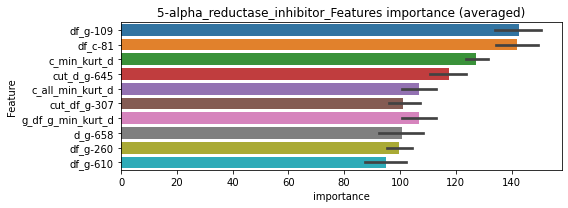

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 5-alpha_reductase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 5-alpha_reductase_inhibitor=================================


Early stopping, best iteration is:
[808]	training's binary_logloss: 0.000285933	valid_1's binary_logloss: 0.00110086
Training until validation scores don't improve for 30 rounds


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 5-alpha_reductase_inhibitor=================================


Early stopping, best iteration is:
[782]	training's binary_logloss: 0.000291059	valid_1's binary_logloss: 0.00110229
Training until validation scores don't improve for 30 rounds


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 5-alpha_reductase_inhibitor=================================


Early stopping, best iteration is:
[802]	training's binary_logloss: 0.000288696	valid_1's binary_logloss: 0.000870127
Training until validation scores don't improve for 30 rounds


5-alpha_reductase_inhibitor logloss: 0.001374622730286958


Early stopping, best iteration is:
[717]	training's binary_logloss: 0.000297774	valid_1's binary_logloss: 0.00242451


11-beta-hsd1_inhibitor, len(trt): 18, len(othr): 3286
target_rate: 0.0007559 → Adj_target_rate: 0.0009799


selected negative label: 3286


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[591]	training's binary_logloss: 0.000295384	valid_1's binary_logloss: 0.000914828
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[589]	training's binary_logloss: 0.000293005	valid_1's binary_logloss: 0.00114338
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[565]	training's binary_logloss: 0.000299315	valid_1's binary_logloss: 0.00291416
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[608]	training's binary_logloss: 0.000297739	valid_1's binary_logloss: 0.00091322


y_Threshold: 0.0014467, Threshold: 0.0039466, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, Expected: 3.0, Threshold: 0.0039466, conf_0:0.00276, conf_1:0.00513
Num_p_label: 1.0, Expected: 3.0, Adj_threshold_1: 0.0339466
threshold: 0.0339466, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[563]	training's binary_logloss: 0.000285702	valid_1's binary_logloss: 0.000927303
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[581]	training's binary_logloss: 0.000286312	valid_1's binary_logloss: 0.00102912
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[575]	training's binary_logloss: 0.000294205	valid_1's binary_logloss: 0.00268846
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0267736, Threshold: 0.0339466, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0015068 Vs.target_rate: 0.00076
Num_p_label: 6.0, Expected: 3.0, Threshold: 0.0339466, conf_0:0.02716, conf_1:0.04074


Early stopping, best iteration is:
[569]	training's binary_logloss: 0.000291854	valid_1's binary_logloss: 0.000863398


threshold: 0.0339466, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[563]	training's binary_logloss: 0.000285702	valid_1's binary_logloss: 0.000927303
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[581]	training's binary_logloss: 0.000286312	valid_1's binary_logloss: 0.00102912
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[575]	training's binary_logloss: 0.000294205	valid_1's binary_logloss: 0.00268846
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0267736, Threshold: 0.0339466, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0015068 Vs.target_rate: 0.00076
Num_p_label: 6.0, Expected: 3.0, Threshold: 0.0339466, conf_0:0.03055, conf_1:0.03734


Early stopping, best iteration is:
[569]	training's binary_logloss: 0.000291854	valid_1's binary_logloss: 0.000863398


threshold: 0.0339466, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


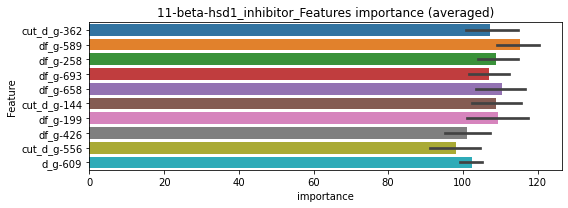

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 11-beta-hsd1_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[883]	training's binary_logloss: 0.000290994	valid_1's binary_logloss: 0.00095545


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 11-beta-hsd1_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[895]	training's binary_logloss: 0.000292801	valid_1's binary_logloss: 0.000762553


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 11-beta-hsd1_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[876]	training's binary_logloss: 0.00029414	valid_1's binary_logloss: 0.00157725


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 11-beta-hsd1_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[865]	training's binary_logloss: 0.000293568	valid_1's binary_logloss: 0.000614974


11-beta-hsd1_inhibitor logloss: 0.0009776520433907717
acat_inhibitor, len(trt): 24, len(othr): 3282
target_rate: 0.0010078 → Adj_target_rate: 0.0012513


selected negative label: 3282


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[557]	training's binary_logloss: 0.000347697	valid_1's binary_logloss: 0.00593351
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[547]	training's binary_logloss: 0.000359434	valid_1's binary_logloss: 0.00427186
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[546]	training's binary_logloss: 0.000363724	valid_1's binary_logloss: 0.00198967
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0018609, Threshold: 0.0045581, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3806
p_label_rate: 0.0100452 Vs.target_rate: 0.00101
Num_p_label: 40.0, Expected: 4.0, Threshold: 0.0045581, conf_0:0.00319, conf_1:0.00593
Num_p_label: 4.0, Expected: 4.0, Adj_threshold_1: 0.0345581


Early stopping, best iteration is:
[553]	training's binary_logloss: 0.000349044	valid_1's binary_logloss: 0.00675676


threshold: 0.0345581, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[531]	training's binary_logloss: 0.000348875	valid_1's binary_logloss: 0.00544992
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[553]	training's binary_logloss: 0.000344184	valid_1's binary_logloss: 0.00343599
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[568]	training's binary_logloss: 0.000343059	valid_1's binary_logloss: 0.00169604
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0141075, Threshold: 0.0345581, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3806
p_label_rate: 0.0027624 Vs.target_rate: 0.00101
Num_p_label: 11.0, Expected: 4.0, Threshold: 0.0345581, conf_0:0.02765, conf_1:0.04147


Early stopping, best iteration is:
[555]	training's binary_logloss: 0.000343529	valid_1's binary_logloss: 0.00686277


Num_p_label: 7.0, Expected: 4.0, Adj_threshold_1: 0.0645581
threshold: 0.0645581, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[531]	training's binary_logloss: 0.000348875	valid_1's binary_logloss: 0.00544992
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[553]	training's binary_logloss: 0.000344184	valid_1's binary_logloss: 0.00343599
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[568]	training's binary_logloss: 0.000343059	valid_1's binary_logloss: 0.00169604
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0141075, Threshold: 0.0645581, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3806
p_label_rate: 0.0017579 Vs.target_rate: 0.00101
Num_p_label: 7.0, Expected: 4.0, Threshold: 0.0645581, conf_0:0.05810, conf_1:0.07101


Early stopping, best iteration is:
[555]	training's binary_logloss: 0.000343529	valid_1's binary_logloss: 0.00686277


threshold: 0.0645581, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 656.0/3806, y_label_rate: 0.1723594


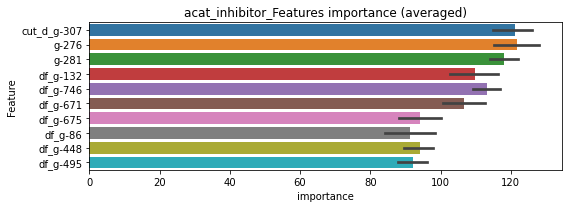

len(train_index) : 2854
len(valid_index) : 952
================================= fold 1/4 acat_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[820]	training's binary_logloss: 0.000342302	valid_1's binary_logloss: 0.00458788


len(train_index) : 2854
len(valid_index) : 952
================================= fold 2/4 acat_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[840]	training's binary_logloss: 0.000340331	valid_1's binary_logloss: 0.0032404


len(train_index) : 2855
len(valid_index) : 951
================================= fold 3/4 acat_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[933]	training's binary_logloss: 0.000336138	valid_1's binary_logloss: 0.00142668


len(train_index) : 2855
len(valid_index) : 951
================================= fold 4/4 acat_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[740]	training's binary_logloss: 0.000357668	valid_1's binary_logloss: 0.00537428


acat_inhibitor logloss: 0.0036579941749365036


mutually exclusive columns: acetylcholine_receptor_agonist


acetylcholine_receptor_agonist, len(trt): 190, len(othr): 6396
target_rate: 0.0079785 → Adj_target_rate: 0.0072634


selected negative label: 6396


unpredictable_cols:acetylcholine_receptor_agonist → create_features


N_features:358
================= Pseudo labeling 1 / 3 =================



Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0302642	valid_1's binary_logloss: 0.113861
Early stopping, best iteration is:
[1897]	training's binary_logloss: 0.0153007	valid_1's binary_logloss: 0.106813
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0315559	valid_1's binary_logloss: 0.0851933
[2000]	training's binary_logloss: 0.0149539	valid_1's binary_logloss: 0.0740543
[3000]	training's binary_logloss: 0.00964637	valid_1's binary_logloss: 0.0704822
Early stopping, best iteration is:
[3270]	training's binary_logloss: 0.00879971	valid_1's binary_logloss: 0.0697751
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0325014	valid_1's binary_logloss: 0.0759912
[2000]	training's binary_logloss: 0.0154053	valid_1's binary_logloss: 0.0649063
[3000]	training's binary_logloss: 0.00996237	valid_1's binary_logloss: 0.0612138
Early stopping, best iter

1 / 3, AUC score:0.987, PR-AUC:0.972
y_Threshold: 0.0438644, Threshold: 0.0793095, pos_neg_ratio: 0.8000000
Remove_noisy_data: 386 → Positive_corect_labels: 1214/7289
p_label_rate: 0.0100452 Vs.target_rate: 0.00798
Num_p_label: 40.0, Expected: 31.8, Threshold: 0.0793095, conf_0:0.05552, conf_1:0.10310
threshold: 0.0793095, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1214.0/7289, y_label_rate: 0.1665523
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0239828	valid_1's binary_logloss: 0.0747334
[2000]	training's binary_logloss: 0.0116348	valid_1's binary_logloss: 0.0656278
[3000]	training's binary_logloss: 0.00757165	valid_1's binary_logloss: 0.0623956
Early stopping, best iteration is:
[3046]	training's binary_logloss: 0.00745295	valid_1's binary_logloss: 0.0622605
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0242841	valid_1's binary_logloss: 0.0763929
[2000]	training's binary_logloss: 0.0117351	valid_1's binary_logloss: 0.0672732
Early stopping, best iteration is:
[2872]	training's binary_logloss: 0.00800783	valid_1's binary_logloss: 0.0643216
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0248947	valid_1's binary_logloss: 0.0599745
[2000]	training's binary_logloss: 0.0120585	valid_1's binary_logloss: 0.0506052
[3000]	training's binary

2 / 3, AUC score:0.998, PR-AUC:0.993
y_Threshold: 0.0664940, Threshold: 0.0793095, pos_neg_ratio: 0.8000000
Remove_noisy_data: 92 → Positive_corect_labels: 1168.0/7197
p_label_rate: 0.0140633 Vs.target_rate: 0.00798
Num_p_label: 56.0, Expected: 31.8, Threshold: 0.0793095, conf_0:0.06345, conf_1:0.09517
Num_p_label: 31.0, Expected: 31.8, Adj_threshold_1: 0.1093095
threshold: 0.1093095, positive_p_label: 31.0/3982, p_label_rate: 0.0077850
positive_y_label: 1168.0/7197, y_label_rate: 0.1622898
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0205355	valid_1's binary_logloss: 0.0493339
[2000]	training's binary_logloss: 0.0100458	valid_1's binary_logloss: 0.0402808
[3000]	training's binary_logloss: 0.00659777	valid_1's binary_logloss: 0.03713
[4000]	training's binary_logloss: 0.00492553	valid_1's binary_logloss: 0.0354126
Early stopping, best iteration is:
[4163]	training's binary_logloss: 0.00473128	valid_1's binary_logloss: 0.0351452
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0198111	valid_1's binary_logloss: 0.0583695
[2000]	training's binary_logloss: 0.0096855	valid_1's binary_logloss: 0.0503335
Early stopping, best iteration is:
[2296]	training's binary_logloss: 0.00839284	valid_1's binary_logloss: 0.0490497
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0206415	valid_1's binary_logloss: 0.0504148
[2000]	training's binary_

3 / 3, AUC score:1.000, PR-AUC:0.998
y_Threshold: 0.0587146, Threshold: 0.1093095, pos_neg_ratio: 0.8000000
Remove_noisy_data: 50 → Positive_corect_labels: 1143.0/7147
p_label_rate: 0.0072828 Vs.target_rate: 0.00798
Num_p_label: 29.0, Expected: 31.8, Threshold: 0.1093095, conf_0:0.09838, conf_1:0.12024
threshold: 0.1093095, positive_p_label: 29.0/3982, p_label_rate: 0.0072828
positive_y_label: 1143.0/7147, y_label_rate: 0.1599272


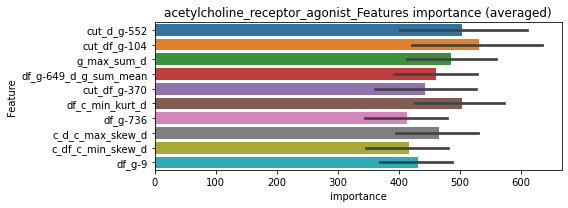

len(train_index) : 5360
len(valid_index) : 1787
================================= fold 1/4 acetylcholine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0187476	valid_1's binary_logloss: 0.0380554
[2000]	training's binary_logloss: 0.00908978	valid_1's binary_logloss: 0.0287025
[3000]	training's binary_logloss: 0.00597186	valid_1's binary_logloss: 0.0255179
Early stopping, best iteration is:
[3781]	training's binary_logloss: 0.00471305	valid_1's binary_logloss: 0.0242007


len(train_index) : 5360
len(valid_index) : 1787
================================= fold 2/4 acetylcholine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0179625	valid_1's binary_logloss: 0.0494262
[2000]	training's binary_logloss: 0.0087381	valid_1's binary_logloss: 0.0395015
[3000]	training's binary_logloss: 0.00577818	valid_1's binary_logloss: 0.0362472
Early stopping, best iteration is:
[3850]	training's binary_logloss: 0.00448548	valid_1's binary_logloss: 0.0348122


len(train_index) : 5360
len(valid_index) : 1787
================================= fold 3/4 acetylcholine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0183197	valid_1's binary_logloss: 0.0457487
[2000]	training's binary_logloss: 0.00886186	valid_1's binary_logloss: 0.0362627
[3000]	training's binary_logloss: 0.00585258	valid_1's binary_logloss: 0.0329554
[4000]	training's binary_logloss: 0.00437388	valid_1's binary_logloss: 0.0313157
Early stopping, best iteration is:
[4556]	training's binary_logloss: 0.00383742	valid_1's binary_logloss: 0.0306874


len(train_index) : 5361
len(valid_index) : 1786
================================= fold 4/4 acetylcholine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0186519	valid_1's binary_logloss: 0.0410458
[2000]	training's binary_logloss: 0.00911035	valid_1's binary_logloss: 0.0310206
[3000]	training's binary_logloss: 0.00602076	valid_1's binary_logloss: 0.0273027
[4000]	training's binary_logloss: 0.00449061	valid_1's binary_logloss: 0.0254853
Early stopping, best iteration is:
[4655]	training's binary_logloss: 0.00385949	valid_1's binary_logloss: 0.0247873


acetylcholine_receptor_agonist logloss: 0.028622442735366155


mutually exclusive columns: acetylcholine_receptor_antagonist


acetylcholine_receptor_antagonist, len(trt): 301, len(othr): 7534
target_rate: 0.0126396 → Adj_target_rate: 0.0107394


selected negative label: 7534


unpredictable_cols:acetylcholine_receptor_antagonist → create_features


N_features:358
================= Pseudo labeling 1 / 3 =================



Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0407276	valid_1's binary_logloss: 0.13526
Early stopping, best iteration is:
[1753]	training's binary_logloss: 0.0220787	valid_1's binary_logloss: 0.126747
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0413619	valid_1's binary_logloss: 0.129351
Early stopping, best iteration is:
[1580]	training's binary_logloss: 0.0251414	valid_1's binary_logloss: 0.120393
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0407684	valid_1's binary_logloss: 0.131814
Early stopping, best iteration is:
[1753]	training's binary_logloss: 0.0220676	valid_1's binary_logloss: 0.12221
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0411537	valid_1's binary_logloss: 0.130207
Early stopping, best iteration is:
[1583]	training's binary_logloss: 0.0249077	valid_1's binary_log

1 / 3, AUC score:0.967, PR-AUC:0.942
y_Threshold: 0.0651963, Threshold: 0.1376284, pos_neg_ratio: 0.8000000
Remove_noisy_data: 564 → Positive_corect_labels: 1375/8476
p_label_rate: 0.0100452 Vs.target_rate: 0.01264
Num_p_label: 40.0, Expected: 50.3, Threshold: 0.1376284, conf_0:0.09634, conf_1:0.17892
threshold: 0.1376284, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1375.0/8476, y_label_rate: 0.1622227
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0286556	valid_1's binary_logloss: 0.0871375
[2000]	training's binary_logloss: 0.0135795	valid_1's binary_logloss: 0.0763634
Early stopping, best iteration is:
[2177]	training's binary_logloss: 0.0124095	valid_1's binary_logloss: 0.0754761
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0291643	valid_1's binary_logloss: 0.0782387
Early stopping, best iteration is:
[1911]	training's binary_logloss: 0.0145787	valid_1's binary_logloss: 0.0670533
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0289846	valid_1's binary_logloss: 0.0875229
[2000]	training's binary_logloss: 0.013726	valid_1's binary_logloss: 0.0772715
Early stopping, best iteration is:
[2483]	training's binary_logloss: 0.0109073	valid_1's binary_logloss: 0.0754699
Training until validation scores don't improve for 30 rounds
[1000]	train

2 / 3, AUC score:0.995, PR-AUC:0.988
y_Threshold: 0.0817554, Threshold: 0.1376284, pos_neg_ratio: 0.8000000
Remove_noisy_data: 120 → Positive_corect_labels: 1315.0/8356
p_label_rate: 0.0107986 Vs.target_rate: 0.01264
Num_p_label: 43.0, Expected: 50.3, Threshold: 0.1376284, conf_0:0.11010, conf_1:0.16515
threshold: 0.1376284, positive_p_label: 43.0/3982, p_label_rate: 0.0107986
positive_y_label: 1315.0/8356, y_label_rate: 0.1573719
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0245931	valid_1's binary_logloss: 0.0629252
[2000]	training's binary_logloss: 0.0117558	valid_1's binary_logloss: 0.0515129
[3000]	training's binary_logloss: 0.00766848	valid_1's binary_logloss: 0.0479283
Early stopping, best iteration is:
[3062]	training's binary_logloss: 0.00750297	valid_1's binary_logloss: 0.047857
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0239545	valid_1's binary_logloss: 0.0682353
[2000]	training's binary_logloss: 0.0114966	valid_1's binary_logloss: 0.0570814
[3000]	training's binary_logloss: 0.00752696	valid_1's binary_logloss: 0.0531883
Early stopping, best iteration is:
[3255]	training's binary_logloss: 0.00690277	valid_1's binary_logloss: 0.052577
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0241388	valid_1's binary_logloss: 0.0702814
[2000]	training's binary_

3 / 3, AUC score:0.999, PR-AUC:0.997
y_Threshold: 0.0704323, Threshold: 0.1376284, pos_neg_ratio: 0.8000000
Remove_noisy_data: 70 → Positive_corect_labels: 1280.0/8286
p_label_rate: 0.0082873 Vs.target_rate: 0.01264
Num_p_label: 33.0, Expected: 50.3, Threshold: 0.1376284, conf_0:0.12387, conf_1:0.15139
threshold: 0.1376284, positive_p_label: 33.0/3982, p_label_rate: 0.0082873
positive_y_label: 1280.0/8286, y_label_rate: 0.1544774


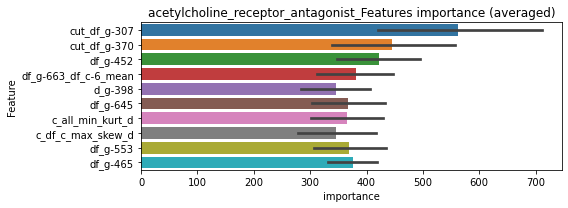

len(train_index) : 6214
len(valid_index) : 2072
================================= fold 1/4 acetylcholine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0220213	valid_1's binary_logloss: 0.0564426
[2000]	training's binary_logloss: 0.0105125	valid_1's binary_logloss: 0.0445608
[3000]	training's binary_logloss: 0.00687936	valid_1's binary_logloss: 0.0407065
Early stopping, best iteration is:
[3215]	training's binary_logloss: 0.00640021	valid_1's binary_logloss: 0.0401149


len(train_index) : 6214
len(valid_index) : 2072
================================= fold 2/4 acetylcholine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0220347	valid_1's binary_logloss: 0.0543313
[2000]	training's binary_logloss: 0.0105573	valid_1's binary_logloss: 0.0430387
[3000]	training's binary_logloss: 0.00691019	valid_1's binary_logloss: 0.0394878
Early stopping, best iteration is:
[3791]	training's binary_logloss: 0.00542745	valid_1's binary_logloss: 0.0379876


len(train_index) : 6215
len(valid_index) : 2071
================================= fold 3/4 acetylcholine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0222909	valid_1's binary_logloss: 0.0522465
[2000]	training's binary_logloss: 0.0106113	valid_1's binary_logloss: 0.0413244
[3000]	training's binary_logloss: 0.00695755	valid_1's binary_logloss: 0.0378263
Early stopping, best iteration is:
[3520]	training's binary_logloss: 0.00587729	valid_1's binary_logloss: 0.0366891


len(train_index) : 6215
len(valid_index) : 2071
================================= fold 4/4 acetylcholine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0220674	valid_1's binary_logloss: 0.0597099
[2000]	training's binary_logloss: 0.0105654	valid_1's binary_logloss: 0.0485834
[3000]	training's binary_logloss: 0.00690365	valid_1's binary_logloss: 0.0448603
Early stopping, best iteration is:
[3523]	training's binary_logloss: 0.00583579	valid_1's binary_logloss: 0.0436824


acetylcholine_receptor_antagonist logloss: 0.03961835871344594
acetylcholine_receptor_antagonist is unpredictable(><)!
acetylcholinesterase_inhibitor, len(trt): 73, len(othr): 3275
target_rate: 0.0030654 → Adj_target_rate: 0.0032212


selected negative label: 3275


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[665]	training's binary_logloss: 0.000802534	valid_1's binary_logloss: 0.0356154
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[807]	training's binary_logloss: 0.000632344	valid_1's binary_logloss: 0.0273823
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[638]	training's binary_logloss: 0.000881848	valid_1's binary_logloss: 0.0193752
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[708]	training's binary_logloss: 0.00072695	valid_1's binary_logloss: 0.0221059


1 / 3, AUC score:0.999, PR-AUC:0.998
y_Threshold: 0.0081205, Threshold: 0.0227711, pos_neg_ratio: 0.8000000
Remove_noisy_data: 135 → Positive_corect_labels: 653/3795
p_label_rate: 0.0100452 Vs.target_rate: 0.00307
Num_p_label: 40.0, Expected: 12.2, Threshold: 0.0227711, conf_0:0.01594, conf_1:0.02960
Num_p_label: 9.0, Expected: 12.2, Adj_threshold_1: 0.0527711
threshold: 0.0527711, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 653.0/3795, y_label_rate: 0.1720685
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[736]	training's binary_logloss: 0.000650099	valid_1's binary_logloss: 0.0328178
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[678]	training's binary_logloss: 0.000751217	valid_1's binary_logloss: 0.0159444
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[756]	training's binary_logloss: 0.000641615	valid_1's binary_logloss: 0.0191326
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[793]	training's binary_logloss: 0.000636748	valid_1's binary_logloss: 0.018544


2 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0395643, Threshold: 0.0527711, pos_neg_ratio: 0.8000000
Remove_noisy_data: 12 → Positive_corect_labels: 647.0/3783
p_label_rate: 0.0102963 Vs.target_rate: 0.00307
Num_p_label: 41.0, Expected: 12.2, Threshold: 0.0527711, conf_0:0.04222, conf_1:0.06333
Num_p_label: 27.0, Expected: 12.2, Adj_threshold_1: 0.0827711
Num_p_label: 16.0, Expected: 12.2, Adj_threshold_2: 0.1127711
threshold: 0.1127711, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 647.0/3783, y_label_rate: 0.1710283
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[717]	training's binary_logloss: 0.000664784	valid_1's binary_logloss: 0.0235633
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[565]	training's binary_logloss: 0.000968147	valid_1's binary_logloss: 0.0283987
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[780]	training's binary_logloss: 0.000613996	valid_1's binary_logloss: 0.013757
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[786]	training's binary_logloss: 0.000610078	valid_1's binary_logloss: 0.0160089


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0328687, Threshold: 0.1127711, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 644.0/3777
p_label_rate: 0.0050226 Vs.target_rate: 0.00307
Num_p_label: 20.0, Expected: 12.2, Threshold: 0.1127711, conf_0:0.10149, conf_1:0.12405
Num_p_label: 14.0, Expected: 12.2, Adj_threshold_1: 0.1427711
threshold: 0.1427711, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 644.0/3777, y_label_rate: 0.1705057


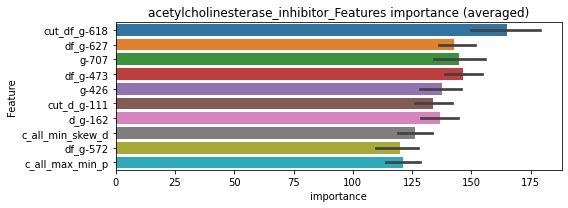

len(train_index) : 2832
len(valid_index) : 945
================================= fold 1/4 acetylcholinesterase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2833
len(valid_index) : 944
================================= fold 2/4 acetylcholinesterase_inhibitor=================================


Early stopping, best iteration is:
[449]	training's binary_logloss: 0.00117971	valid_1's binary_logloss: 0.0242792
Training until validation scores don't improve for 30 rounds


len(train_index) : 2833
len(valid_index) : 944
================================= fold 3/4 acetylcholinesterase_inhibitor=================================


Early stopping, best iteration is:
[452]	training's binary_logloss: 0.00117794	valid_1's binary_logloss: 0.035565
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[659]	training's binary_logloss: 0.000823967	valid_1's binary_logloss: 0.0141705


len(train_index) : 2833
len(valid_index) : 944
================================= fold 4/4 acetylcholinesterase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[543]	training's binary_logloss: 0.000972771	valid_1's binary_logloss: 0.0219342


acetylcholinesterase_inhibitor logloss: 0.023987282229340278
adenosine_receptor_agonist, len(trt): 54, len(othr): 3285
target_rate: 0.0022676 → Adj_target_rate: 0.0024931


selected negative label: 3285


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[623]	training's binary_logloss: 0.000551363	valid_1's binary_logloss: 0.0139358
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[636]	training's binary_logloss: 0.000530919	valid_1's binary_logloss: 0.0191931
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[674]	training's binary_logloss: 0.000518675	valid_1's binary_logloss: 0.00655018
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[705]	training's binary_logloss: 0.000502629	valid_1's binary_logloss: 0.0099314


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0041003, Threshold: 0.0152208, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00227
Num_p_label: 40.0, Expected: 9.0, Threshold: 0.0152208, conf_0:0.01065, conf_1:0.01979
Num_p_label: 5.0, Expected: 9.0, Adj_threshold_1: 0.0452208
threshold: 0.0452208, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[688]	training's binary_logloss: 0.00048887	valid_1's binary_logloss: 0.0108648
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[612]	training's binary_logloss: 0.000548434	valid_1's binary_logloss: 0.017768
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[681]	training's binary_logloss: 0.000500546	valid_1's binary_logloss: 0.00469484
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[667]	training's binary_logloss: 0.000511409	valid_1's binary_logloss: 0.00867354


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0230523, Threshold: 0.0452208, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0037670 Vs.target_rate: 0.00227
Num_p_label: 15.0, Expected: 9.0, Threshold: 0.0452208, conf_0:0.03618, conf_1:0.05426
threshold: 0.0452208, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[688]	training's binary_logloss: 0.00048887	valid_1's binary_logloss: 0.0108648
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[612]	training's binary_logloss: 0.000548434	valid_1's binary_logloss: 0.017768
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[681]	training's binary_logloss: 0.000500546	valid_1's binary_logloss: 0.00469484
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[673]	training's binary_logloss: 0.000511409	valid_1's binary_logloss: 0.00867354


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0230523, Threshold: 0.0452208, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0037670 Vs.target_rate: 0.00227
Num_p_label: 15.0, Expected: 9.0, Threshold: 0.0452208, conf_0:0.04070, conf_1:0.04974
threshold: 0.0452208, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


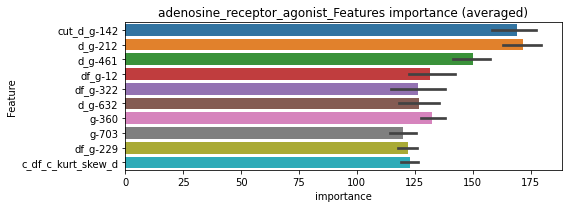

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 adenosine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000480583	valid_1's binary_logloss: 0.0109372
Early stopping, best iteration is:
[1024]	training's binary_logloss: 0.000476815	valid_1's binary_logloss: 0.0109208


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 adenosine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[735]	training's binary_logloss: 0.00056246	valid_1's binary_logloss: 0.0174349


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 adenosine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[915]	training's binary_logloss: 0.000509455	valid_1's binary_logloss: 0.00385056


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 adenosine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[888]	training's binary_logloss: 0.000510248	valid_1's binary_logloss: 0.00801319


adenosine_receptor_agonist logloss: 0.010057021034635197
adenosine_receptor_antagonist, len(trt): 96, len(othr): 3271
target_rate: 0.0040312 → Adj_target_rate: 0.0040656


selected negative label: 3271


unpredictable_cols:adenosine_receptor_antagonist → create_features


N_features:358
================= Pseudo labeling 1 / 3 =================



Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0318045	valid_1's binary_logloss: 0.100847
[2000]	training's binary_logloss: 0.0153867	valid_1's binary_logloss: 0.0859981
[3000]	training's binary_logloss: 0.0101016	valid_1's binary_logloss: 0.0807957
Early stopping, best iteration is:
[3117]	training's binary_logloss: 0.00971472	valid_1's binary_logloss: 0.0804471
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0332813	valid_1's binary_logloss: 0.0761886
[2000]	training's binary_logloss: 0.0160987	valid_1's binary_logloss: 0.057138
[3000]	training's binary_logloss: 0.0105422	valid_1's binary_logloss: 0.0502872
[4000]	training's binary_logloss: 0.00786194	valid_1's binary_logloss: 0.0468144
[5000]	training's binary_logloss: 0.00628246	valid_1's binary_logloss: 0.0445779
[6000]	training's binary_logloss: 0.00524338	valid_1's binary_logloss: 0.0429723
Early stopping, best iteration is:
[6967

1 / 3, AUC score:0.995, PR-AUC:0.989
y_Threshold: 0.0351813, Threshold: 0.0982946, pos_neg_ratio: 0.8000000
Remove_noisy_data: 161 → Positive_corect_labels: 639/3764
p_label_rate: 0.0100452 Vs.target_rate: 0.00403
Num_p_label: 40.0, Expected: 16.1, Threshold: 0.0982946, conf_0:0.06881, conf_1:0.12778
Num_p_label: 24.0, Expected: 16.1, Adj_threshold_1: 0.1282946
threshold: 0.1282946, positive_p_label: 24.0/3982, p_label_rate: 0.0060271
positive_y_label: 639.0/3764, y_label_rate: 0.1697662
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0286021	valid_1's binary_logloss: 0.0894606
[2000]	training's binary_logloss: 0.0139319	valid_1's binary_logloss: 0.0756826
Early stopping, best iteration is:
[2871]	training's binary_logloss: 0.00958004	valid_1's binary_logloss: 0.0711812
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0295859	valid_1's binary_logloss: 0.083767
[2000]	training's binary_logloss: 0.0143393	valid_1's binary_logloss: 0.0648443
[3000]	training's binary_logloss: 0.00942629	valid_1's binary_logloss: 0.0578917
[4000]	training's binary_logloss: 0.0070526	valid_1's binary_logloss: 0.0543756
[5000]	training's binary_logloss: 0.0056525	valid_1's binary_logloss: 0.051845
Early stopping, best iteration is:
[5507]	training's binary_logloss: 0.00513897	valid_1's binary_logloss: 0.0508799
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_l

2 / 3, AUC score:0.999, PR-AUC:0.996
y_Threshold: 0.0642070, Threshold: 0.1282946, pos_neg_ratio: 0.8000000
Remove_noisy_data: 22 → Positive_corect_labels: 628.0/3742
p_label_rate: 0.0123054 Vs.target_rate: 0.00403
Num_p_label: 49.0, Expected: 16.1, Threshold: 0.1282946, conf_0:0.10264, conf_1:0.15395
Num_p_label: 37.0, Expected: 16.1, Adj_threshold_1: 0.1582946
Num_p_label: 21.0, Expected: 16.1, Adj_threshold_2: 0.1882946
threshold: 0.1882946, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 628.0/3742, y_label_rate: 0.1678247
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0278785	valid_1's binary_logloss: 0.0746559
[2000]	training's binary_logloss: 0.013609	valid_1's binary_logloss: 0.0588196
[3000]	training's binary_logloss: 0.00897327	valid_1's binary_logloss: 0.0532085
[4000]	training's binary_logloss: 0.00671849	valid_1's binary_logloss: 0.0502076
Early stopping, best iteration is:
[4165]	training's binary_logloss: 0.0064514	valid_1's binary_logloss: 0.0497673
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0278549	valid_1's binary_logloss: 0.0853062
[2000]	training's binary_logloss: 0.0134531	valid_1's binary_logloss: 0.0691528
[3000]	training's binary_logloss: 0.00886622	valid_1's binary_logloss: 0.0635159
Early stopping, best iteration is:
[3898]	training's binary_logloss: 0.0068027	valid_1's binary_logloss: 0.0610202
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_

3 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0657721, Threshold: 0.1882946, pos_neg_ratio: 0.8000000
Remove_noisy_data: 16 → Positive_corect_labels: 620.0/3726
p_label_rate: 0.0082873 Vs.target_rate: 0.00403
Num_p_label: 33.0, Expected: 16.1, Threshold: 0.1882946, conf_0:0.16947, conf_1:0.20712
Num_p_label: 25.0, Expected: 16.1, Adj_threshold_1: 0.2182946
Num_p_label: 19.0, Expected: 16.1, Adj_threshold_2: 0.2482946
threshold: 0.2482946, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 620.0/3726, y_label_rate: 0.1663983


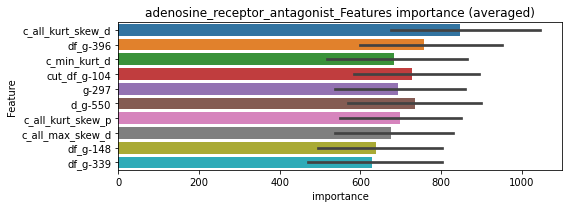

len(train_index) : 2794
len(valid_index) : 932
================================= fold 1/4 adenosine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0271964	valid_1's binary_logloss: 0.0694783
[2000]	training's binary_logloss: 0.0131948	valid_1's binary_logloss: 0.0525117
[3000]	training's binary_logloss: 0.00872382	valid_1's binary_logloss: 0.046425
[4000]	training's binary_logloss: 0.00652526	valid_1's binary_logloss: 0.0429372
Early stopping, best iteration is:
[4492]	training's binary_logloss: 0.00581116	valid_1's binary_logloss: 0.0417773


len(train_index) : 2794
len(valid_index) : 932
================================= fold 2/4 adenosine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0270734	valid_1's binary_logloss: 0.0719229
[2000]	training's binary_logloss: 0.0131867	valid_1's binary_logloss: 0.0544873
[3000]	training's binary_logloss: 0.00872227	valid_1's binary_logloss: 0.0481468
[4000]	training's binary_logloss: 0.00653636	valid_1's binary_logloss: 0.0449464
[5000]	training's binary_logloss: 0.0052447	valid_1's binary_logloss: 0.0428408
Early stopping, best iteration is:
[5443]	training's binary_logloss: 0.00482705	valid_1's binary_logloss: 0.0420456


len(train_index) : 2795
len(valid_index) : 931
================================= fold 3/4 adenosine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0278305	valid_1's binary_logloss: 0.0605744
[2000]	training's binary_logloss: 0.0135412	valid_1's binary_logloss: 0.042683
[3000]	training's binary_logloss: 0.00893243	valid_1's binary_logloss: 0.0361448
[4000]	training's binary_logloss: 0.00667866	valid_1's binary_logloss: 0.0327038
[5000]	training's binary_logloss: 0.00535352	valid_1's binary_logloss: 0.0304351
[6000]	training's binary_logloss: 0.00448225	valid_1's binary_logloss: 0.0289394
Early stopping, best iteration is:
[6629]	training's binary_logloss: 0.00407155	valid_1's binary_logloss: 0.0281747


len(train_index) : 2795
len(valid_index) : 931
================================= fold 4/4 adenosine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0273152	valid_1's binary_logloss: 0.074381
[2000]	training's binary_logloss: 0.0132466	valid_1's binary_logloss: 0.0596628
[3000]	training's binary_logloss: 0.00875305	valid_1's binary_logloss: 0.0549707
Early stopping, best iteration is:
[3924]	training's binary_logloss: 0.0066648	valid_1's binary_logloss: 0.052857


adenosine_receptor_antagonist logloss: 0.041214017674546015
adenosine_receptor_antagonist is unpredictable(><)!
adenylyl_cyclase_activator, len(trt): 18, len(othr): 3288
target_rate: 0.0007559 → Adj_target_rate: 0.0009799


selected negative label: 3288


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[560]	training's binary_logloss: 0.000303512	valid_1's binary_logloss: 0.000692504
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[544]	training's binary_logloss: 0.000304886	valid_1's binary_logloss: 0.00183673
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[569]	training's binary_logloss: 0.00030606	valid_1's binary_logloss: 0.000721007
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0015331, Threshold: 0.0082261, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, Expected: 3.0, Threshold: 0.0082261, conf_0:0.00576, conf_1:0.01069
Num_p_label: 8.0, Expected: 3.0, Adj_threshold_1: 0.0382261
Num_p_label: 5.0, Expected: 3.0, Adj_threshold_2: 0.0682261


Early stopping, best iteration is:
[568]	training's binary_logloss: 0.000299265	valid_1's binary_logloss: 0.00210429


threshold: 0.0682261, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[593]	training's binary_logloss: 0.000279894	valid_1's binary_logloss: 0.00058148
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[517]	training's binary_logloss: 0.000293317	valid_1's binary_logloss: 0.00182699
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[561]	training's binary_logloss: 0.000286436	valid_1's binary_logloss: 0.000527107
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1086487, Threshold: 0.0682261, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0143144 Vs.target_rate: 0.00076
Num_p_label: 57.0, Expected: 3.0, Threshold: 0.0682261, conf_0:0.05458, conf_1:0.08187
Num_p_label: 45.0, Expected: 3.0, Adj_threshold_1: 0.0982261
Num_p_label: 34.0, Expected: 3.0, Adj_threshold_2: 0.1282261
Num_p_label: 26.0, Expected: 3.0, Adj_threshold_3: 0.1582261
Num_p_label: 21.0, Expected: 3.0, Adj_threshold_4: 0.1882261


Early stopping, best iteration is:
[591]	training's binary_logloss: 0.000279865	valid_1's binary_logloss: 0.0013072


Num_p_label: 20.0, Expected: 3.0, Adj_threshold_5: 0.2182261
Num_p_label: 15.0, Expected: 3.0, Adj_threshold_6: 0.2482261
Num_p_label: 11.0, Expected: 3.0, Adj_threshold_7: 0.2782261
Num_p_label: 8.0, Expected: 3.0, Adj_threshold_8: 0.3082261
Num_p_label: 7.0, Expected: 3.0, Adj_threshold_9: 0.3382261
threshold: 0.3382261, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[594]	training's binary_logloss: 0.000279894	valid_1's binary_logloss: 0.00058148
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[517]	training's binary_logloss: 0.000293317	valid_1's binary_logloss: 0.00182699
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[561]	training's binary_logloss: 0.000286436	valid_1's binary_logloss: 0.000527107
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1086487, Threshold: 0.3382261, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0017579 Vs.target_rate: 0.00076
Num_p_label: 7.0, Expected: 3.0, Threshold: 0.3382261, conf_0:0.30440, conf_1:0.37205


Early stopping, best iteration is:
[591]	training's binary_logloss: 0.000279865	valid_1's binary_logloss: 0.0013072


threshold: 0.3382261, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


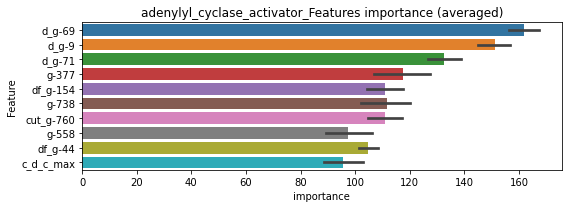

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 adenylyl_cyclase_activator=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000282018	valid_1's binary_logloss: 0.000538509
Early stopping, best iteration is:
[989]	training's binary_logloss: 0.000282018	valid_1's binary_logloss: 0.000538509


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 adenylyl_cyclase_activator=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[892]	training's binary_logloss: 0.000287023	valid_1's binary_logloss: 0.00143032


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 adenylyl_cyclase_activator=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000282361	valid_1's binary_logloss: 0.000594876
Early stopping, best iteration is:
[970]	training's binary_logloss: 0.000282361	valid_1's binary_logloss: 0.000594876


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 adenylyl_cyclase_activator=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[959]	training's binary_logloss: 0.000279406	valid_1's binary_logloss: 0.00121435


adenylyl_cyclase_activator logloss: 0.0009446874075168273


mutually exclusive columns: adrenergic_receptor_agonist


adrenergic_receptor_agonist, len(trt): 270, len(othr): 6953
target_rate: 0.0113379 → Adj_target_rate: 0.0097917


selected negative label: 6953


unpredictable_cols:adrenergic_receptor_agonist → create_features


N_features:358
================= Pseudo labeling 1 / 3 =================



Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0414616	valid_1's binary_logloss: 0.120793
[2000]	training's binary_logloss: 0.0195874	valid_1's binary_logloss: 0.104842
[3000]	training's binary_logloss: 0.0125936	valid_1's binary_logloss: 0.0996467
Early stopping, best iteration is:
[3425]	training's binary_logloss: 0.010912	valid_1's binary_logloss: 0.098183
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0414134	valid_1's binary_logloss: 0.12323
[2000]	training's binary_logloss: 0.0195786	valid_1's binary_logloss: 0.109303
Early stopping, best iteration is:
[2182]	training's binary_logloss: 0.0177872	valid_1's binary_logloss: 0.108174
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0405118	valid_1's binary_logloss: 0.128007
[2000]	training's binary_logloss: 0.0191164	valid_1's binary_logloss: 0.115226
Early stopping, best iteration is:
[

1 / 3, AUC score:0.979, PR-AUC:0.959
y_Threshold: 0.0603084, Threshold: 0.1276986, pos_neg_ratio: 0.8000000
Remove_noisy_data: 461 → Positive_corect_labels: 1299/7882
p_label_rate: 0.0100452 Vs.target_rate: 0.01134
Num_p_label: 40.0, Expected: 45.1, Threshold: 0.1276986, conf_0:0.08939, conf_1:0.16601
threshold: 0.1276986, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1299.0/7882, y_label_rate: 0.1648059
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0321773	valid_1's binary_logloss: 0.0907326
[2000]	training's binary_logloss: 0.0153448	valid_1's binary_logloss: 0.0767856
Early stopping, best iteration is:
[2550]	training's binary_logloss: 0.0118285	valid_1's binary_logloss: 0.0737899
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0322034	valid_1's binary_logloss: 0.0963522
[2000]	training's binary_logloss: 0.0152466	valid_1's binary_logloss: 0.083421
Early stopping, best iteration is:
[2762]	training's binary_logloss: 0.0107791	valid_1's binary_logloss: 0.079775
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0329353	valid_1's binary_logloss: 0.0847194
[2000]	training's binary_logloss: 0.0156945	valid_1's binary_logloss: 0.0680006
[3000]	training's binary_logloss: 0.0101471	valid_1's binary_logloss: 0.0618513
[4000]	training's binary_logl

2 / 3, AUC score:0.997, PR-AUC:0.991
y_Threshold: 0.0897184, Threshold: 0.1276986, pos_neg_ratio: 0.8000000
Remove_noisy_data: 104 → Positive_corect_labels: 1247.0/7778
p_label_rate: 0.0148167 Vs.target_rate: 0.01134
Num_p_label: 59.0, Expected: 45.1, Threshold: 0.1276986, conf_0:0.10216, conf_1:0.15324
threshold: 0.1276986, positive_p_label: 59.0/3982, p_label_rate: 0.0148167
positive_y_label: 1247.0/7778, y_label_rate: 0.1603240
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0283222	valid_1's binary_logloss: 0.0806676
[2000]	training's binary_logloss: 0.0135793	valid_1's binary_logloss: 0.0654322
[3000]	training's binary_logloss: 0.00882369	valid_1's binary_logloss: 0.0600849
Early stopping, best iteration is:
[3776]	training's binary_logloss: 0.0069434	valid_1's binary_logloss: 0.0576602
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0289496	valid_1's binary_logloss: 0.0726188
[2000]	training's binary_logloss: 0.013835	valid_1's binary_logloss: 0.0590849
[3000]	training's binary_logloss: 0.00899839	valid_1's binary_logloss: 0.05424
Early stopping, best iteration is:
[3613]	training's binary_logloss: 0.00741021	valid_1's binary_logloss: 0.0526313
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0284219	valid_1's binary_logloss: 0.0801165
[2000]	training's binary_lo

3 / 3, AUC score:0.999, PR-AUC:0.995
y_Threshold: 0.0838999, Threshold: 0.1276986, pos_neg_ratio: 0.8000000
Remove_noisy_data: 62 → Positive_corect_labels: 1216.0/7716
p_label_rate: 0.0150678 Vs.target_rate: 0.01134
Num_p_label: 60.0, Expected: 45.1, Threshold: 0.1276986, conf_0:0.11493, conf_1:0.14047
threshold: 0.1276986, positive_p_label: 60.0/3982, p_label_rate: 0.0150678
positive_y_label: 1216.0/7716, y_label_rate: 0.1575946


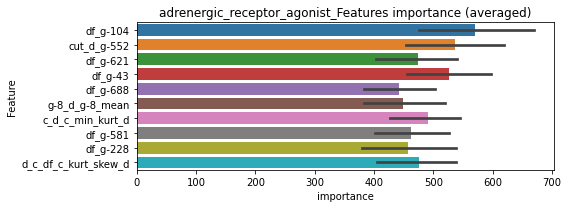

len(train_index) : 5787
len(valid_index) : 1929
================================= fold 1/4 adrenergic_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0259067	valid_1's binary_logloss: 0.0717295
[2000]	training's binary_logloss: 0.0124877	valid_1's binary_logloss: 0.0586482
[3000]	training's binary_logloss: 0.00816756	valid_1's binary_logloss: 0.0541391
Early stopping, best iteration is:
[3503]	training's binary_logloss: 0.00694729	valid_1's binary_logloss: 0.0527716


len(train_index) : 5787
len(valid_index) : 1929
================================= fold 2/4 adrenergic_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0263398	valid_1's binary_logloss: 0.0730307
[2000]	training's binary_logloss: 0.0125772	valid_1's binary_logloss: 0.0610851
[3000]	training's binary_logloss: 0.00821863	valid_1's binary_logloss: 0.057192
Early stopping, best iteration is:
[3332]	training's binary_logloss: 0.00736786	valid_1's binary_logloss: 0.0563955


len(train_index) : 5787
len(valid_index) : 1929
================================= fold 3/4 adrenergic_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0265433	valid_1's binary_logloss: 0.0645997
[2000]	training's binary_logloss: 0.0126798	valid_1's binary_logloss: 0.0517499
[3000]	training's binary_logloss: 0.00829016	valid_1's binary_logloss: 0.047324
Early stopping, best iteration is:
[2977]	training's binary_logloss: 0.00835532	valid_1's binary_logloss: 0.0472952


len(train_index) : 5787
len(valid_index) : 1929
================================= fold 4/4 adrenergic_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0260469	valid_1's binary_logloss: 0.0690407
[2000]	training's binary_logloss: 0.0125747	valid_1's binary_logloss: 0.05562
[3000]	training's binary_logloss: 0.0082047	valid_1's binary_logloss: 0.0508645
[4000]	training's binary_logloss: 0.00610166	valid_1's binary_logloss: 0.0484215
Early stopping, best iteration is:
[4740]	training's binary_logloss: 0.00513143	valid_1's binary_logloss: 0.0473196


adrenergic_receptor_agonist logloss: 0.05094549279441287
adrenergic_receptor_agonist is unpredictable(><)!


mutually exclusive columns: adrenergic_receptor_antagonist


adrenergic_receptor_antagonist, len(trt): 360, len(othr): 7013
target_rate: 0.0151172 → Adj_target_rate: 0.0125042


selected negative label: 7013


unpredictable_cols:adrenergic_receptor_antagonist → create_features


N_features:358
================= Pseudo labeling 1 / 3 =================



Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0505141	valid_1's binary_logloss: 0.15991
Early stopping, best iteration is:
[1577]	training's binary_logloss: 0.0319558	valid_1's binary_logloss: 0.153901
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0498599	valid_1's binary_logloss: 0.166989
Early stopping, best iteration is:
[1352]	training's binary_logloss: 0.0366698	valid_1's binary_logloss: 0.162653
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0494964	valid_1's binary_logloss: 0.169409
Early stopping, best iteration is:
[1192]	training's binary_logloss: 0.0415573	valid_1's binary_logloss: 0.167591
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0507549	valid_1's binary_logloss: 0.155203
Early stopping, best iteration is:
[1356]	training's binary_logloss: 0.0373284	valid_1's binary_lo

1 / 3, AUC score:0.950, PR-AUC:0.905
y_Threshold: 0.0837250, Threshold: 0.1510464, pos_neg_ratio: 0.8000000
Remove_noisy_data: 687 → Positive_corect_labels: 1199/7728
p_label_rate: 0.0100452 Vs.target_rate: 0.01512
Num_p_label: 40.0, Expected: 60.2, Threshold: 0.1510464, conf_0:0.10573, conf_1:0.19636
threshold: 0.1510464, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1199.0/7728, y_label_rate: 0.1551501
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0295622	valid_1's binary_logloss: 0.0923872
Early stopping, best iteration is:
[1739]	training's binary_logloss: 0.0164474	valid_1's binary_logloss: 0.0850521
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0289875	valid_1's binary_logloss: 0.0928463
Early stopping, best iteration is:
[1577]	training's binary_logloss: 0.0179396	valid_1's binary_logloss: 0.0861103
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0303812	valid_1's binary_logloss: 0.08181
[2000]	training's binary_logloss: 0.0146265	valid_1's binary_logloss: 0.0710102
Early stopping, best iteration is:
[2794]	training's binary_logloss: 0.0102446	valid_1's binary_logloss: 0.0681795
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0301552	valid_1's binary_logloss: 0.0811582
[2000]	traini

2 / 3, AUC score:0.994, PR-AUC:0.982
y_Threshold: 0.0864463, Threshold: 0.1510464, pos_neg_ratio: 0.8000000
Remove_noisy_data: 152 → Positive_corect_labels: 1123.0/7576
p_label_rate: 0.0113009 Vs.target_rate: 0.01512
Num_p_label: 45.0, Expected: 60.2, Threshold: 0.1510464, conf_0:0.12084, conf_1:0.18126
threshold: 0.1510464, positive_p_label: 45.0/3982, p_label_rate: 0.0113009
positive_y_label: 1123.0/7576, y_label_rate: 0.1482313
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0228329	valid_1's binary_logloss: 0.0568854
[2000]	training's binary_logloss: 0.0110994	valid_1's binary_logloss: 0.0470003
[3000]	training's binary_logloss: 0.00726676	valid_1's binary_logloss: 0.043641
Early stopping, best iteration is:
[3254]	training's binary_logloss: 0.00668441	valid_1's binary_logloss: 0.0430725
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0228502	valid_1's binary_logloss: 0.0611162
[2000]	training's binary_logloss: 0.0109864	valid_1's binary_logloss: 0.0504595
Early stopping, best iteration is:
[2650]	training's binary_logloss: 0.00816844	valid_1's binary_logloss: 0.0477884
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0227334	valid_1's binary_logloss: 0.0605718
[2000]	training's binary_logloss: 0.0110034	valid_1's binary_logloss: 0.050141
[3000]	training's binary_l

3 / 3, AUC score:0.999, PR-AUC:0.997
y_Threshold: 0.0867709, Threshold: 0.1510464, pos_neg_ratio: 0.8000000
Remove_noisy_data: 58 → Positive_corect_labels: 1094.0/7518
p_label_rate: 0.0133099 Vs.target_rate: 0.01512
Num_p_label: 53.0, Expected: 60.2, Threshold: 0.1510464, conf_0:0.13594, conf_1:0.16615
threshold: 0.1510464, positive_p_label: 53.0/3982, p_label_rate: 0.0133099
positive_y_label: 1094.0/7518, y_label_rate: 0.1455174


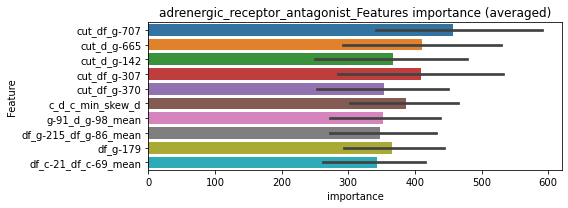

len(train_index) : 5638
len(valid_index) : 1880
================================= fold 1/4 adrenergic_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0199101	valid_1's binary_logloss: 0.0514546
[2000]	training's binary_logloss: 0.00966801	valid_1's binary_logloss: 0.041809
[3000]	training's binary_logloss: 0.00636751	valid_1's binary_logloss: 0.0382512
Early stopping, best iteration is:
[3777]	training's binary_logloss: 0.00503406	valid_1's binary_logloss: 0.0365201


len(train_index) : 5638
len(valid_index) : 1880
================================= fold 2/4 adrenergic_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0199115	valid_1's binary_logloss: 0.0524917
[2000]	training's binary_logloss: 0.00965111	valid_1's binary_logloss: 0.042326
[3000]	training's binary_logloss: 0.00636934	valid_1's binary_logloss: 0.0387711
Early stopping, best iteration is:
[3523]	training's binary_logloss: 0.00539673	valid_1's binary_logloss: 0.0377173


len(train_index) : 5639
len(valid_index) : 1879
================================= fold 3/4 adrenergic_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0196991	valid_1's binary_logloss: 0.0514843
[2000]	training's binary_logloss: 0.00957278	valid_1's binary_logloss: 0.0434987
Early stopping, best iteration is:
[2254]	training's binary_logloss: 0.00844724	valid_1's binary_logloss: 0.0426675


len(train_index) : 5639
len(valid_index) : 1879
================================= fold 4/4 adrenergic_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0201389	valid_1's binary_logloss: 0.0481375
[2000]	training's binary_logloss: 0.00987428	valid_1's binary_logloss: 0.0396065
[3000]	training's binary_logloss: 0.00648004	valid_1's binary_logloss: 0.0366419
[4000]	training's binary_logloss: 0.00483652	valid_1's binary_logloss: 0.0352766
Early stopping, best iteration is:
[4085]	training's binary_logloss: 0.0047359	valid_1's binary_logloss: 0.0351761


adrenergic_receptor_antagonist logloss: 0.038020021971835974
adrenergic_receptor_antagonist is unpredictable(><)!
akt_inhibitor, len(trt): 66, len(othr): 3276
target_rate: 0.0027715 → Adj_target_rate: 0.0029567


selected negative label: 3276


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[796]	training's binary_logloss: 0.000557454	valid_1's binary_logloss: 0.018283
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[762]	training's binary_logloss: 0.000588862	valid_1's binary_logloss: 0.0182507
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[698]	training's binary_logloss: 0.000637579	valid_1's binary_logloss: 0.0171481
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[722]	training's binary_logloss: 0.000611443	valid_1's binary_logloss: 0.023723


1 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0057400, Threshold: 0.0198945, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 654/3797
p_label_rate: 0.0100452 Vs.target_rate: 0.00277
Num_p_label: 40.0, Expected: 11.0, Threshold: 0.0198945, conf_0:0.01393, conf_1:0.02586
Num_p_label: 24.0, Expected: 11.0, Adj_threshold_1: 0.0498945
Num_p_label: 17.0, Expected: 11.0, Adj_threshold_2: 0.0798945
Num_p_label: 15.0, Expected: 11.0, Adj_threshold_3: 0.1098945
threshold: 0.1098945, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 654.0/3797, y_label_rate: 0.1722412
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[740]	training's binary_logloss: 0.00056836	valid_1's binary_logloss: 0.0108278
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[540]	training's binary_logloss: 0.000916401	valid_1's binary_logloss: 0.0196821
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[727]	training's binary_logloss: 0.000581218	valid_1's binary_logloss: 0.016024
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[733]	training's binary_logloss: 0.000580169	valid_1's binary_logloss: 0.0169128


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0276912, Threshold: 0.1098945, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 652.0/3793
p_label_rate: 0.0067805 Vs.target_rate: 0.00277
Num_p_label: 27.0, Expected: 11.0, Threshold: 0.1098945, conf_0:0.08792, conf_1:0.13187
Num_p_label: 23.0, Expected: 11.0, Adj_threshold_1: 0.1398945
Num_p_label: 22.0, Expected: 11.0, Adj_threshold_2: 0.1698945
Num_p_label: 20.0, Expected: 11.0, Adj_threshold_3: 0.1998945
Num_p_label: 20.0, Expected: 11.0, Adj_threshold_4: 0.2298945
Num_p_label: 19.0, Expected: 11.0, Adj_threshold_5: 0.2598945
Num_p_label: 17.0, Expected: 11.0, Adj_threshold_6: 0.2898945
Num_p_label: 15.0, Expected: 11.0, Adj_threshold_7: 0.3198945
threshold: 0.3198945, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 652.0/3793, y_label_rate: 0.1718956
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[770]	training's binary_logloss: 0.000566037	valid_1's binary_logloss: 0.00770926
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[797]	training's binary_logloss: 0.00055526	valid_1's binary_logloss: 0.014743
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[762]	training's binary_logloss: 0.000571293	valid_1's binary_logloss: 0.00811133
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[731]	training's binary_logloss: 0.000563947	valid_1's binary_logloss: 0.0275603


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0372610, Threshold: 0.3198945, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 651.0/3791
p_label_rate: 0.0037670 Vs.target_rate: 0.00277
Num_p_label: 15.0, Expected: 11.0, Threshold: 0.3198945, conf_0:0.28791, conf_1:0.35188
threshold: 0.3198945, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 651.0/3791, y_label_rate: 0.1717225


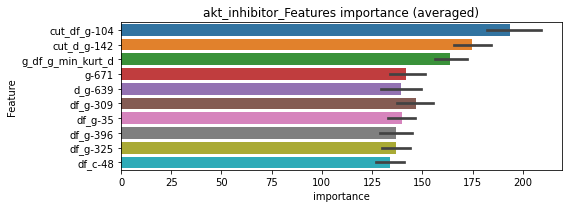

len(train_index) : 2843
len(valid_index) : 948
================================= fold 1/4 akt_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[917]	training's binary_logloss: 0.000587	valid_1's binary_logloss: 0.00810689


len(train_index) : 2843
len(valid_index) : 948
================================= fold 2/4 akt_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[754]	training's binary_logloss: 0.000662558	valid_1's binary_logloss: 0.019234


len(train_index) : 2843
len(valid_index) : 948
================================= fold 3/4 akt_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000575074	valid_1's binary_logloss: 0.00744024
Early stopping, best iteration is:
[1038]	training's binary_logloss: 0.000569112	valid_1's binary_logloss: 0.00741953


len(train_index) : 2844
len(valid_index) : 947
================================= fold 4/4 akt_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[722]	training's binary_logloss: 0.000690765	valid_1's binary_logloss: 0.0177097


akt_inhibitor logloss: 0.013118990728374436
aldehyde_dehydrogenase_inhibitor, len(trt): 19, len(othr): 3289
target_rate: 0.0007979 → Adj_target_rate: 0.0010260


selected negative label: 3289


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[585]	training's binary_logloss: 0.000302339	valid_1's binary_logloss: 0.00111015
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[594]	training's binary_logloss: 0.000295811	valid_1's binary_logloss: 0.00174932
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[581]	training's binary_logloss: 0.000303323	valid_1's binary_logloss: 0.000762596
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0015941, Threshold: 0.0070393, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00080
Num_p_label: 40.0, Expected: 3.2, Threshold: 0.0070393, conf_0:0.00493, conf_1:0.00915
Num_p_label: 11.0, Expected: 3.2, Adj_threshold_1: 0.0370393
Num_p_label: 4.0, Expected: 3.2, Adj_threshold_2: 0.0670393


Early stopping, best iteration is:
[613]	training's binary_logloss: 0.000299915	valid_1's binary_logloss: 0.000917532


threshold: 0.0670393, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[552]	training's binary_logloss: 0.00029494	valid_1's binary_logloss: 0.000955578
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[553]	training's binary_logloss: 0.00029428	valid_1's binary_logloss: 0.00192296
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[594]	training's binary_logloss: 0.000290355	valid_1's binary_logloss: 0.000649038
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1244074, Threshold: 0.0670393, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0037670 Vs.target_rate: 0.00080
Num_p_label: 15.0, Expected: 3.2, Threshold: 0.0670393, conf_0:0.05363, conf_1:0.08045
Num_p_label: 11.0, Expected: 3.2, Adj_threshold_1: 0.0970393
Num_p_label: 7.0, Expected: 3.2, Adj_threshold_2: 0.1270393


Early stopping, best iteration is:
[598]	training's binary_logloss: 0.000288743	valid_1's binary_logloss: 0.000814882


threshold: 0.1270393, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[552]	training's binary_logloss: 0.00029494	valid_1's binary_logloss: 0.000955578
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[553]	training's binary_logloss: 0.00029428	valid_1's binary_logloss: 0.00192296
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.000290355	valid_1's binary_logloss: 0.000649038
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1244074, Threshold: 0.1270393, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0017579 Vs.target_rate: 0.00080
Num_p_label: 7.0, Expected: 3.2, Threshold: 0.1270393, conf_0:0.11434, conf_1:0.13974


Early stopping, best iteration is:
[598]	training's binary_logloss: 0.000288743	valid_1's binary_logloss: 0.000814882


threshold: 0.1270393, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


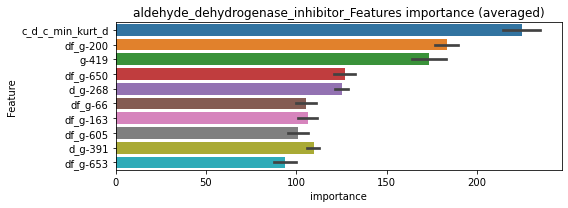

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 aldehyde_dehydrogenase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000291424	valid_1's binary_logloss: 0.000773429
Early stopping, best iteration is:
[999]	training's binary_logloss: 0.000291424	valid_1's binary_logloss: 0.000773429


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 aldehyde_dehydrogenase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000287275	valid_1's binary_logloss: 0.00136588
Early stopping, best iteration is:
[1031]	training's binary_logloss: 0.000286068	valid_1's binary_logloss: 0.00136089


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 aldehyde_dehydrogenase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000291049	valid_1's binary_logloss: 0.000662736
Early stopping, best iteration is:
[1007]	training's binary_logloss: 0.000290911	valid_1's binary_logloss: 0.000662202


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 aldehyde_dehydrogenase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[937]	training's binary_logloss: 0.000295033	valid_1's binary_logloss: 0.000863833


aldehyde_dehydrogenase_inhibitor logloss: 0.0009151829048629577
alk_inhibitor, len(trt): 42, len(othr): 3285
target_rate: 0.0017637 → Adj_target_rate: 0.0020135


selected negative label: 3285


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[622]	training's binary_logloss: 0.000493791	valid_1's binary_logloss: 0.0106451
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[632]	training's binary_logloss: 0.000479189	valid_1's binary_logloss: 0.0105794
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[691]	training's binary_logloss: 0.000479791	valid_1's binary_logloss: 0.00330011
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[646]	training's binary_logloss: 0.000480622	valid_1's binary_logloss: 0.00643792


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0034603, Threshold: 0.0159370, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00176
Num_p_label: 40.0, Expected: 7.0, Threshold: 0.0159370, conf_0:0.01116, conf_1:0.02072
Num_p_label: 16.0, Expected: 7.0, Adj_threshold_1: 0.0459370
threshold: 0.0459370, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[635]	training's binary_logloss: 0.000465379	valid_1's binary_logloss: 0.0123188
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[646]	training's binary_logloss: 0.000458319	valid_1's binary_logloss: 0.010643
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[673]	training's binary_logloss: 0.000465038	valid_1's binary_logloss: 0.00297575
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[655]	training's binary_logloss: 0.000468378	valid_1's binary_logloss: 0.00561295


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0272201, Threshold: 0.0459370, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0075339 Vs.target_rate: 0.00176
Num_p_label: 30.0, Expected: 7.0, Threshold: 0.0459370, conf_0:0.03675, conf_1:0.05512
Num_p_label: 17.0, Expected: 7.0, Adj_threshold_1: 0.0759370
threshold: 0.0759370, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[635]	training's binary_logloss: 0.000465379	valid_1's binary_logloss: 0.0123188
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[646]	training's binary_logloss: 0.000458319	valid_1's binary_logloss: 0.010643
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[689]	training's binary_logloss: 0.000465038	valid_1's binary_logloss: 0.00297575
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[655]	training's binary_logloss: 0.000468378	valid_1's binary_logloss: 0.00561295


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0272201, Threshold: 0.0759370, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0042692 Vs.target_rate: 0.00176
Num_p_label: 17.0, Expected: 7.0, Threshold: 0.0759370, conf_0:0.06834, conf_1:0.08353
threshold: 0.0759370, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


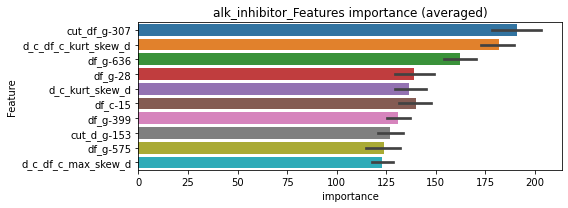

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 alk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[866]	training's binary_logloss: 0.000467914	valid_1's binary_logloss: 0.0113072


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 alk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[736]	training's binary_logloss: 0.000510484	valid_1's binary_logloss: 0.00948977


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 alk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[868]	training's binary_logloss: 0.000484365	valid_1's binary_logloss: 0.00290792


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 alk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[881]	training's binary_logloss: 0.000481005	valid_1's binary_logloss: 0.00579713


alk_inhibitor logloss: 0.007377103167987629
ampk_activator, len(trt): 12, len(othr): 3287
target_rate: 0.0005039 → Adj_target_rate: 0.0006942


selected negative label: 3287


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[556]	training's binary_logloss: 0.000232236	valid_1's binary_logloss: 0.00153518
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[504]	training's binary_logloss: 0.0002354	valid_1's binary_logloss: 0.00199429
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[516]	training's binary_logloss: 0.000241167	valid_1's binary_logloss: 0.000403341
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0009433, Threshold: 0.0043009, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00050
Num_p_label: 40.0, Expected: 2.0, Threshold: 0.0043009, conf_0:0.00301, conf_1:0.00559
Num_p_label: 4.0, Expected: 2.0, Adj_threshold_1: 0.0343009
threshold: 0.0343009, positive_p_label: 4.0/3982, p_label_rate: 0.0010045


Early stopping, best iteration is:
[515]	training's binary_logloss: 0.000233479	valid_1's binary_logloss: 0.0008482


positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[486]	training's binary_logloss: 0.000228924	valid_1's binary_logloss: 0.00119516
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[486]	training's binary_logloss: 0.000225077	valid_1's binary_logloss: 0.00287681
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[491]	training's binary_logloss: 0.000225933	valid_1's binary_logloss: 0.000298532
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0299895, Threshold: 0.0343009, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0045203 Vs.target_rate: 0.00050
Num_p_label: 18.0, Expected: 2.0, Threshold: 0.0343009, conf_0:0.02744, conf_1:0.04116


Early stopping, best iteration is:
[489]	training's binary_logloss: 0.000225854	valid_1's binary_logloss: 0.000771799


Num_p_label: 10.0, Expected: 2.0, Adj_threshold_1: 0.0643009
Num_p_label: 8.0, Expected: 2.0, Adj_threshold_2: 0.0943009
Num_p_label: 3.0, Expected: 2.0, Adj_threshold_3: 0.1243009
threshold: 0.1243009, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[486]	training's binary_logloss: 0.000228924	valid_1's binary_logloss: 0.00119516
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[486]	training's binary_logloss: 0.000225077	valid_1's binary_logloss: 0.00287681
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[491]	training's binary_logloss: 0.000225933	valid_1's binary_logloss: 0.000298532
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0299895, Threshold: 0.1243009, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0007534 Vs.target_rate: 0.00050
Num_p_label: 3.0, Expected: 2.0, Threshold: 0.1243009, conf_0:0.11187, conf_1:0.13673


Early stopping, best iteration is:
[489]	training's binary_logloss: 0.000225854	valid_1's binary_logloss: 0.000771799


threshold: 0.1243009, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


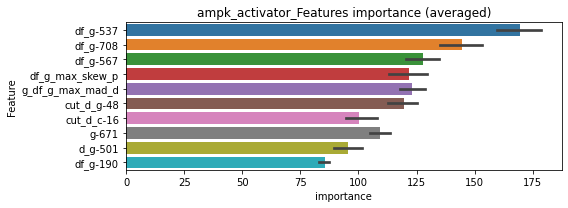

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 ampk_activator=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 ampk_activator=================================


Early stopping, best iteration is:
[940]	training's binary_logloss: 0.000224716	valid_1's binary_logloss: 0.000655495
Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 ampk_activator=================================


Early stopping, best iteration is:
[896]	training's binary_logloss: 0.000223471	valid_1's binary_logloss: 0.00268571
Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 ampk_activator=================================


Early stopping, best iteration is:
[828]	training's binary_logloss: 0.000229043	valid_1's binary_logloss: 0.00035301
Training until validation scores don't improve for 30 rounds


ampk_activator logloss: 0.0010727208467655397


Early stopping, best iteration is:
[926]	training's binary_logloss: 0.000223774	valid_1's binary_logloss: 0.000594187


analgesic, len(trt): 12, len(othr): 3288
target_rate: 0.0005039 → Adj_target_rate: 0.0006942


selected negative label: 3288


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[519]	training's binary_logloss: 0.000249168	valid_1's binary_logloss: 0.000941622
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[524]	training's binary_logloss: 0.000244429	valid_1's binary_logloss: 0.000575471
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[504]	training's binary_logloss: 0.000253112	valid_1's binary_logloss: 0.000336477
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0010717, Threshold: 0.0193631, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00050
Num_p_label: 40.0, Expected: 2.0, Threshold: 0.0193631, conf_0:0.01355, conf_1:0.02517
Num_p_label: 25.0, Expected: 2.0, Adj_threshold_1: 0.0493631
Num_p_label: 19.0, Expected: 2.0, Adj_threshold_2: 0.0793631
Num_p_label: 14.0, Expected: 2.0, Adj_threshold_3: 0.1093631
Num_p_label: 12.0, Expected: 2.0, Adj_threshold_4: 0.1393631
Num_p_label: 8.0, Expected: 2.0, Adj_threshold_5: 0.1693631


Early stopping, best iteration is:
[490]	training's binary_logloss: 0.000251055	valid_1's binary_logloss: 0.00051414


Num_p_label: 8.0, Expected: 2.0, Adj_threshold_6: 0.1993631
Num_p_label: 7.0, Expected: 2.0, Adj_threshold_7: 0.2293631
Num_p_label: 6.0, Expected: 2.0, Adj_threshold_8: 0.2593631
Num_p_label: 6.0, Expected: 2.0, Adj_threshold_9: 0.2893631
Num_p_label: 6.0, Expected: 2.0, Adj_threshold_10: 0.3193631
threshold: 0.3193631, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[518]	training's binary_logloss: 0.000235638	valid_1's binary_logloss: 0.000535491
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[495]	training's binary_logloss: 0.00023997	valid_1's binary_logloss: 0.000952243
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[515]	training's binary_logloss: 0.000240608	valid_1's binary_logloss: 0.000301782
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1204595, Threshold: 0.3193631, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0025113 Vs.target_rate: 0.00050
Num_p_label: 10.0, Expected: 2.0, Threshold: 0.3193631, conf_0:0.25549, conf_1:0.38324
Num_p_label: 9.0, Expected: 2.0, Adj_threshold_1: 0.3493631
Num_p_label: 7.0, Expected: 2.0, Adj_threshold_2: 0.3793631
Num_p_label: 6.0, Expected: 2.0, Adj_threshold_3: 0.4093631
Num_p_label: 5.0, Expected: 2.0, Adj_threshold_4: 0.4393631


Early stopping, best iteration is:
[527]	training's binary_logloss: 0.000239252	valid_1's binary_logloss: 0.000390082


threshold: 0.4393631, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[518]	training's binary_logloss: 0.000235638	valid_1's binary_logloss: 0.000535491
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[496]	training's binary_logloss: 0.00023997	valid_1's binary_logloss: 0.000952243
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[522]	training's binary_logloss: 0.000240608	valid_1's binary_logloss: 0.000301782
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1204595, Threshold: 0.4393631, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0012557 Vs.target_rate: 0.00050
Num_p_label: 5.0, Expected: 2.0, Threshold: 0.4393631, conf_0:0.39543, conf_1:0.48330
threshold: 0.4393631, positive_p_label: 5.0/3982, p_label_rate: 0.0012557


Early stopping, best iteration is:
[527]	training's binary_logloss: 0.000239252	valid_1's binary_logloss: 0.000390082


positive_y_label: 657.0/3813, y_label_rate: 0.1723053


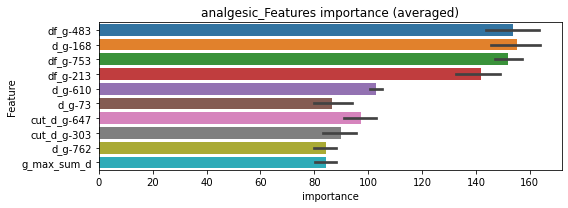

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 analgesic=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 analgesic=================================


Early stopping, best iteration is:
[830]	training's binary_logloss: 0.000239981	valid_1's binary_logloss: 0.00042893
Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 analgesic=================================


Early stopping, best iteration is:
[825]	training's binary_logloss: 0.00024019	valid_1's binary_logloss: 0.000482462
Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 analgesic=================================


Early stopping, best iteration is:
[799]	training's binary_logloss: 0.00024361	valid_1's binary_logloss: 0.000326188
Training until validation scores don't improve for 30 rounds


analgesic logloss: 0.00040264891788825284


Early stopping, best iteration is:
[842]	training's binary_logloss: 0.000241299	valid_1's binary_logloss: 0.000372988


androgen_receptor_agonist, len(trt): 48, len(othr): 3281
target_rate: 0.0020156 → Adj_target_rate: 0.0022556


selected negative label: 3281


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[633]	training's binary_logloss: 0.000540437	valid_1's binary_logloss: 0.0174248
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[695]	training's binary_logloss: 0.000501617	valid_1's binary_logloss: 0.0140948
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[705]	training's binary_logloss: 0.000518463	valid_1's binary_logloss: 0.00190643
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0046310, Threshold: 0.0104232, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 655/3803
p_label_rate: 0.0100452 Vs.target_rate: 0.00202
Num_p_label: 40.0, Expected: 8.0, Threshold: 0.0104232, conf_0:0.00730, conf_1:0.01355


Early stopping, best iteration is:
[440]	training's binary_logloss: 0.00103775	valid_1's binary_logloss: 0.0179797


Num_p_label: 5.0, Expected: 8.0, Adj_threshold_1: 0.0404232
threshold: 0.0404232, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 655.0/3803, y_label_rate: 0.1722324
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[679]	training's binary_logloss: 0.00048902	valid_1's binary_logloss: 0.0148445
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[721]	training's binary_logloss: 0.000483822	valid_1's binary_logloss: 0.00657293
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[703]	training's binary_logloss: 0.000491071	valid_1's binary_logloss: 0.00823426
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[586]	training's binary_logloss: 0.000567959	valid_1's binary_logloss: 0.0197312


y_Threshold: 0.0248621, Threshold: 0.0404232, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 653.0/3799
p_label_rate: 0.0022602 Vs.target_rate: 0.00202
Num_p_label: 9.0, Expected: 8.0, Threshold: 0.0404232, conf_0:0.03234, conf_1:0.04851
threshold: 0.0404232, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 653.0/3799, y_label_rate: 0.1718873
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[637]	training's binary_logloss: 0.000513044	valid_1's binary_logloss: 0.0184125
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[652]	training's binary_logloss: 0.00049907	valid_1's binary_logloss: 0.0107092
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[706]	training's binary_logloss: 0.000483327	valid_1's binary_logloss: 0.00545129
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[635]	training's binary_logloss: 0.000529551	valid_1's binary_logloss: 0.00705843


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0165144, Threshold: 0.0404232, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 652.0/3797
p_label_rate: 0.0022602 Vs.target_rate: 0.00202
Num_p_label: 9.0, Expected: 8.0, Threshold: 0.0404232, conf_0:0.03638, conf_1:0.04447
threshold: 0.0404232, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 652.0/3797, y_label_rate: 0.1717145


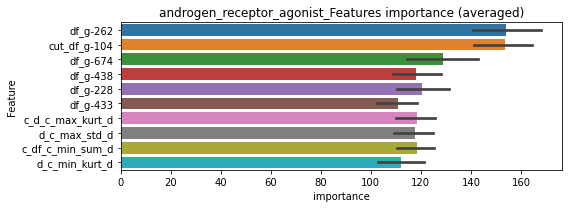

len(train_index) : 2847
len(valid_index) : 950
================================= fold 1/4 androgen_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[821]	training's binary_logloss: 0.000519219	valid_1's binary_logloss: 0.00964187


len(train_index) : 2848
len(valid_index) : 949
================================= fold 2/4 androgen_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2848
len(valid_index) : 949
================================= fold 3/4 androgen_receptor_agonist=================================


Early stopping, best iteration is:
[373]	training's binary_logloss: 0.00104356	valid_1's binary_logloss: 0.0170634
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[820]	training's binary_logloss: 0.000530349	valid_1's binary_logloss: 0.00507767


len(train_index) : 2848
len(valid_index) : 949
================================= fold 4/4 androgen_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[617]	training's binary_logloss: 0.000635336	valid_1's binary_logloss: 0.0119081


androgen_receptor_agonist logloss: 0.01092242900650283
androgen_receptor_antagonist, len(trt): 89, len(othr): 3274
target_rate: 0.0037373 → Adj_target_rate: 0.0038122


selected negative label: 3274


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[482]	training's binary_logloss: 0.00170282	valid_1's binary_logloss: 0.0576413
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[690]	training's binary_logloss: 0.000849109	valid_1's binary_logloss: 0.0375295
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[760]	training's binary_logloss: 0.000754383	valid_1's binary_logloss: 0.0250493
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[710]	training's binary_logloss: 0.000840606	valid_1's binary_logloss: 0.0325735


1 / 3, AUC score:0.999, PR-AUC:0.997
y_Threshold: 0.0083532, Threshold: 0.0356627, pos_neg_ratio: 0.8000000
Remove_noisy_data: 140 → Positive_corect_labels: 650/3788
p_label_rate: 0.0100452 Vs.target_rate: 0.00374
Num_p_label: 40.0, Expected: 14.9, Threshold: 0.0356627, conf_0:0.02496, conf_1:0.04636
Num_p_label: 16.0, Expected: 14.9, Adj_threshold_1: 0.0656627
threshold: 0.0656627, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 650.0/3788, y_label_rate: 0.1715945
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[511]	training's binary_logloss: 0.00142601	valid_1's binary_logloss: 0.0512026
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[614]	training's binary_logloss: 0.000981913	valid_1's binary_logloss: 0.049185
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[547]	training's binary_logloss: 0.00121764	valid_1's binary_logloss: 0.0376958
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[686]	training's binary_logloss: 0.000834067	valid_1's binary_logloss: 0.0321863


2 / 3, AUC score:0.998, PR-AUC:0.997
y_Threshold: 0.0277911, Threshold: 0.0656627, pos_neg_ratio: 0.8000000
Remove_noisy_data: 24 → Positive_corect_labels: 638.0/3764
p_label_rate: 0.0102963 Vs.target_rate: 0.00374
Num_p_label: 41.0, Expected: 14.9, Threshold: 0.0656627, conf_0:0.05253, conf_1:0.07880
Num_p_label: 22.0, Expected: 14.9, Adj_threshold_1: 0.0956627
threshold: 0.0956627, positive_p_label: 22.0/3982, p_label_rate: 0.0055249
positive_y_label: 638.0/3764, y_label_rate: 0.1695005
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.000962551	valid_1's binary_logloss: 0.036257
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[635]	training's binary_logloss: 0.000884485	valid_1's binary_logloss: 0.0296552
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[775]	training's binary_logloss: 0.000674147	valid_1's binary_logloss: 0.0237523
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[597]	training's binary_logloss: 0.00097173	valid_1's binary_logloss: 0.0307099


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0388861, Threshold: 0.0956627, pos_neg_ratio: 0.8000000
Remove_noisy_data: 10 → Positive_corect_labels: 633.0/3754
p_label_rate: 0.0052737 Vs.target_rate: 0.00374
Num_p_label: 21.0, Expected: 14.9, Threshold: 0.0956627, conf_0:0.08610, conf_1:0.10523
threshold: 0.0956627, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 633.0/3754, y_label_rate: 0.1686201


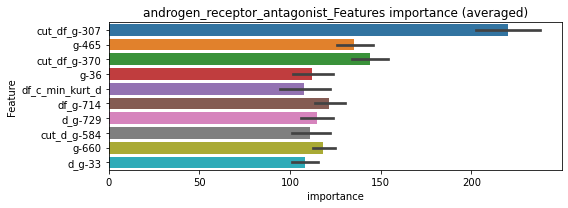

len(train_index) : 2815
len(valid_index) : 939
================================= fold 1/4 androgen_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2815
len(valid_index) : 939
================================= fold 2/4 androgen_receptor_antagonist=================================


Early stopping, best iteration is:
[358]	training's binary_logloss: 0.00170026	valid_1's binary_logloss: 0.0414254
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[893]	training's binary_logloss: 0.000695509	valid_1's binary_logloss: 0.0232287


len(train_index) : 2816
len(valid_index) : 938
================================= fold 3/4 androgen_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[729]	training's binary_logloss: 0.00082942	valid_1's binary_logloss: 0.0186826


len(train_index) : 2816
len(valid_index) : 938
================================= fold 4/4 androgen_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[507]	training's binary_logloss: 0.00116227	valid_1's binary_logloss: 0.0309257


androgen_receptor_antagonist logloss: 0.028567572183016247
anesthetic_-_local, len(trt): 80, len(othr): 3272
target_rate: 0.0033594 → Adj_target_rate: 0.0034820


selected negative label: 3272


unpredictable_cols:anesthetic_-_local → create_features


N_features:358
================= Pseudo labeling 1 / 3 =================



Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.026603	valid_1's binary_logloss: 0.0731542
[2000]	training's binary_logloss: 0.0129492	valid_1's binary_logloss: 0.0594191
[3000]	training's binary_logloss: 0.00854217	valid_1's binary_logloss: 0.0543335
[4000]	training's binary_logloss: 0.0063943	valid_1's binary_logloss: 0.0517283
Early stopping, best iteration is:
[4714]	training's binary_logloss: 0.00543619	valid_1's binary_logloss: 0.0505187
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0271723	valid_1's binary_logloss: 0.0710098
[2000]	training's binary_logloss: 0.0131961	valid_1's binary_logloss: 0.0576313
[3000]	training's binary_logloss: 0.00868254	valid_1's binary_logloss: 0.0529468
[4000]	training's binary_logloss: 0.0064889	valid_1's binary_logloss: 0.050643
Early stopping, best iteration is:
[4460]	training's binary_logloss: 0.00581944	valid_1's binary_logloss: 0.049954
Traini

1 / 3, AUC score:0.997, PR-AUC:0.994
y_Threshold: 0.0312866, Threshold: 0.0566896, pos_neg_ratio: 0.8000000
Remove_noisy_data: 144 → Positive_corect_labels: 648/3782
p_label_rate: 0.0100452 Vs.target_rate: 0.00336
Num_p_label: 40.0, Expected: 13.4, Threshold: 0.0566896, conf_0:0.03968, conf_1:0.07370
Num_p_label: 17.0, Expected: 13.4, Adj_threshold_1: 0.0866896
threshold: 0.0866896, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 648.0/3782, y_label_rate: 0.1713379
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0254324	valid_1's binary_logloss: 0.061791
[2000]	training's binary_logloss: 0.0124354	valid_1's binary_logloss: 0.0471211
[3000]	training's binary_logloss: 0.00822781	valid_1's binary_logloss: 0.0418898
[4000]	training's binary_logloss: 0.00617123	valid_1's binary_logloss: 0.0391949
Early stopping, best iteration is:
[4065]	training's binary_logloss: 0.00607226	valid_1's binary_logloss: 0.0390437
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0256269	valid_1's binary_logloss: 0.0644031
[2000]	training's binary_logloss: 0.0124424	valid_1's binary_logloss: 0.0510261
[3000]	training's binary_logloss: 0.00823009	valid_1's binary_logloss: 0.0459498
[4000]	training's binary_logloss: 0.00616462	valid_1's binary_logloss: 0.0433332
Early stopping, best iteration is:
[4558]	training's binary_logloss: 0.00541696	valid_1's binary_logloss: 0.0424131
Tra

2 / 3, AUC score:1.000, PR-AUC:0.998
y_Threshold: 0.0674796, Threshold: 0.0866896, pos_neg_ratio: 0.8000000
Remove_noisy_data: 22 → Positive_corect_labels: 637.0/3760
p_label_rate: 0.0090407 Vs.target_rate: 0.00336
Num_p_label: 36.0, Expected: 13.4, Threshold: 0.0866896, conf_0:0.06935, conf_1:0.10403
Num_p_label: 20.0, Expected: 13.4, Adj_threshold_1: 0.1166896
threshold: 0.1166896, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 637.0/3760, y_label_rate: 0.1694149
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.024572	valid_1's binary_logloss: 0.0518844
[2000]	training's binary_logloss: 0.0120129	valid_1's binary_logloss: 0.0378046
[3000]	training's binary_logloss: 0.00797121	valid_1's binary_logloss: 0.0326423
[4000]	training's binary_logloss: 0.00598989	valid_1's binary_logloss: 0.0299624
[5000]	training's binary_logloss: 0.00481495	valid_1's binary_logloss: 0.0282645
[6000]	training's binary_logloss: 0.00403694	valid_1's binary_logloss: 0.0269439
[7000]	training's binary_logloss: 0.00348606	valid_1's binary_logloss: 0.0260066
Early stopping, best iteration is:
[7192]	training's binary_logloss: 0.00339771	valid_1's binary_logloss: 0.0259029
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0243477	valid_1's binary_logloss: 0.0586217
[2000]	training's binary_logloss: 0.0119253	valid_1's binary_logloss: 0.0445374
[3000]	training's binary_logloss: 0.00

3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0510799, Threshold: 0.1166896, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 633.0/3752
p_label_rate: 0.0037670 Vs.target_rate: 0.00336
Num_p_label: 15.0, Expected: 13.4, Threshold: 0.1166896, conf_0:0.10502, conf_1:0.12836
threshold: 0.1166896, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 633.0/3752, y_label_rate: 0.1687100


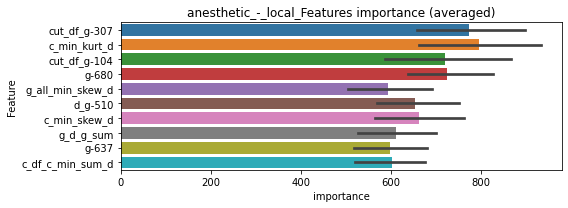

len(train_index) : 2814
len(valid_index) : 938
================================= fold 1/4 anesthetic_-_local=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0237325	valid_1's binary_logloss: 0.0572013
[2000]	training's binary_logloss: 0.0116253	valid_1's binary_logloss: 0.0429832
[3000]	training's binary_logloss: 0.00771003	valid_1's binary_logloss: 0.0377926
[4000]	training's binary_logloss: 0.005789	valid_1's binary_logloss: 0.0349803
[5000]	training's binary_logloss: 0.00466699	valid_1's binary_logloss: 0.0334961
[6000]	training's binary_logloss: 0.0039124	valid_1's binary_logloss: 0.0322273
[7000]	training's binary_logloss: 0.00337929	valid_1's binary_logloss: 0.0313033
Early stopping, best iteration is:
[7065]	training's binary_logloss: 0.00335058	valid_1's binary_logloss: 0.0312565


len(train_index) : 2814
len(valid_index) : 938
================================= fold 2/4 anesthetic_-_local=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0240348	valid_1's binary_logloss: 0.0556999
[2000]	training's binary_logloss: 0.0117948	valid_1's binary_logloss: 0.0410742
[3000]	training's binary_logloss: 0.00782334	valid_1's binary_logloss: 0.0356354
[4000]	training's binary_logloss: 0.00587329	valid_1's binary_logloss: 0.0328515
[5000]	training's binary_logloss: 0.00472334	valid_1's binary_logloss: 0.0310927
[6000]	training's binary_logloss: 0.00396036	valid_1's binary_logloss: 0.0297367
[7000]	training's binary_logloss: 0.00341851	valid_1's binary_logloss: 0.0288164
[8000]	training's binary_logloss: 0.00301718	valid_1's binary_logloss: 0.0280413
[9000]	training's binary_logloss: 0.00270264	valid_1's binary_logloss: 0.0274508
Early stopping, best iteration is:
[9495]	training's binary_logloss: 0.00257245	valid_1's binary_logloss: 0.0272041


len(train_index) : 2814
len(valid_index) : 938
================================= fold 3/4 anesthetic_-_local=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0238511	valid_1's binary_logloss: 0.058706
[2000]	training's binary_logloss: 0.0117045	valid_1's binary_logloss: 0.0455189
[3000]	training's binary_logloss: 0.00775133	valid_1's binary_logloss: 0.0406755
[4000]	training's binary_logloss: 0.00581633	valid_1's binary_logloss: 0.0381608
[5000]	training's binary_logloss: 0.00467876	valid_1's binary_logloss: 0.0364676
Early stopping, best iteration is:
[5758]	training's binary_logloss: 0.00408255	valid_1's binary_logloss: 0.035606


len(train_index) : 2814
len(valid_index) : 938
================================= fold 4/4 anesthetic_-_local=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0240621	valid_1's binary_logloss: 0.0548466
[2000]	training's binary_logloss: 0.0117994	valid_1's binary_logloss: 0.0418748
[3000]	training's binary_logloss: 0.00780391	valid_1's binary_logloss: 0.0372946
[4000]	training's binary_logloss: 0.00584973	valid_1's binary_logloss: 0.034727
Early stopping, best iteration is:
[4941]	training's binary_logloss: 0.00476026	valid_1's binary_logloss: 0.033373


anesthetic_-_local logloss: 0.03185990928483986
anesthetic_-_local is unpredictable(><)!
angiogenesis_inhibitor, len(trt): 36, len(othr): 3280
target_rate: 0.0015117 → Adj_target_rate: 0.0017663


selected negative label: 3280


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[609]	training's binary_logloss: 0.00040453	valid_1's binary_logloss: 0.0083261
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[621]	training's binary_logloss: 0.00041026	valid_1's binary_logloss: 0.00911324
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[537]	training's binary_logloss: 0.000489649	valid_1's binary_logloss: 0.00613047
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[620]	training's binary_logloss: 0.0004141	valid_1's binary_logloss: 0.00384379


y_Threshold: 0.0028403, Threshold: 0.0163740, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3804
p_label_rate: 0.0100452 Vs.target_rate: 0.00151
Num_p_label: 40.0, Expected: 6.0, Threshold: 0.0163740, conf_0:0.01146, conf_1:0.02129
Num_p_label: 11.0, Expected: 6.0, Adj_threshold_1: 0.0463740
threshold: 0.0463740, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 656.0/3804, y_label_rate: 0.1724501
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[608]	training's binary_logloss: 0.000398523	valid_1's binary_logloss: 0.00653213
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[618]	training's binary_logloss: 0.000403728	valid_1's binary_logloss: 0.00798048
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[586]	training's binary_logloss: 0.000414898	valid_1's binary_logloss: 0.00555645
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[626]	training's binary_logloss: 0.000397286	valid_1's binary_logloss: 0.00392549


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0274899, Threshold: 0.0463740, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3804
p_label_rate: 0.0097941 Vs.target_rate: 0.00151
Num_p_label: 39.0, Expected: 6.0, Threshold: 0.0463740, conf_0:0.03710, conf_1:0.05565
Num_p_label: 26.0, Expected: 6.0, Adj_threshold_1: 0.0763740
Num_p_label: 18.0, Expected: 6.0, Adj_threshold_2: 0.1063740
Num_p_label: 14.0, Expected: 6.0, Adj_threshold_3: 0.1363740
threshold: 0.1363740, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 656.0/3804, y_label_rate: 0.1724501
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[608]	training's binary_logloss: 0.000398523	valid_1's binary_logloss: 0.00653213
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[618]	training's binary_logloss: 0.000403728	valid_1's binary_logloss: 0.00798048
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[586]	training's binary_logloss: 0.000414898	valid_1's binary_logloss: 0.00555645
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[626]	training's binary_logloss: 0.000397286	valid_1's binary_logloss: 0.00392549


y_Threshold: 0.0274899, Threshold: 0.1363740, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3804
p_label_rate: 0.0035158 Vs.target_rate: 0.00151
Num_p_label: 14.0, Expected: 6.0, Threshold: 0.1363740, conf_0:0.12274, conf_1:0.15001
threshold: 0.1363740, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 656.0/3804, y_label_rate: 0.1724501


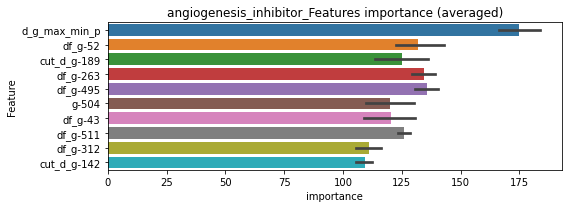

len(train_index) : 2853
len(valid_index) : 951
================================= fold 1/4 angiogenesis_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[752]	training's binary_logloss: 0.000426062	valid_1's binary_logloss: 0.00688479


len(train_index) : 2853
len(valid_index) : 951
================================= fold 2/4 angiogenesis_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[740]	training's binary_logloss: 0.000437731	valid_1's binary_logloss: 0.00529661


len(train_index) : 2853
len(valid_index) : 951
================================= fold 3/4 angiogenesis_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2853
len(valid_index) : 951
================================= fold 4/4 angiogenesis_inhibitor=================================


Early stopping, best iteration is:
[337]	training's binary_logloss: 0.00087482	valid_1's binary_logloss: 0.00560163
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[857]	training's binary_logloss: 0.000411034	valid_1's binary_logloss: 0.00348301


angiogenesis_inhibitor logloss: 0.0053165112341114215
angiotensin_receptor_antagonist, len(trt): 37, len(othr): 3285
target_rate: 0.0015537 → Adj_target_rate: 0.0018079


selected negative label: 3285


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[632]	training's binary_logloss: 0.000423525	valid_1's binary_logloss: 0.00540664
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[664]	training's binary_logloss: 0.000407191	valid_1's binary_logloss: 0.00423776
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[669]	training's binary_logloss: 0.000411675	valid_1's binary_logloss: 0.00248005
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[604]	training's binary_logloss: 0.000440067	valid_1's binary_logloss: 0.00822361


y_Threshold: 0.0025900, Threshold: 0.0098249, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00155
Num_p_label: 40.0, Expected: 6.2, Threshold: 0.0098249, conf_0:0.00688, conf_1:0.01277
Num_p_label: 10.0, Expected: 6.2, Adj_threshold_1: 0.0398249
threshold: 0.0398249, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[650]	training's binary_logloss: 0.000399293	valid_1's binary_logloss: 0.00515243
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[671]	training's binary_logloss: 0.000389921	valid_1's binary_logloss: 0.00326768
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[668]	training's binary_logloss: 0.000400514	valid_1's binary_logloss: 0.00269841
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[584]	training's binary_logloss: 0.000437297	valid_1's binary_logloss: 0.00779256


y_Threshold: 0.0116154, Threshold: 0.0398249, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0065294 Vs.target_rate: 0.00155
Num_p_label: 26.0, Expected: 6.2, Threshold: 0.0398249, conf_0:0.03186, conf_1:0.04779
Num_p_label: 15.0, Expected: 6.2, Adj_threshold_1: 0.0698249
threshold: 0.0698249, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[650]	training's binary_logloss: 0.000399293	valid_1's binary_logloss: 0.00515243
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[671]	training's binary_logloss: 0.000389921	valid_1's binary_logloss: 0.00326768
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[668]	training's binary_logloss: 0.000400514	valid_1's binary_logloss: 0.00269841
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0116154, Threshold: 0.0698249, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[584]	training's binary_logloss: 0.000437297	valid_1's binary_logloss: 0.00779256


Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0037670 Vs.target_rate: 0.00155
Num_p_label: 15.0, Expected: 6.2, Threshold: 0.0698249, conf_0:0.06284, conf_1:0.07681
threshold: 0.0698249, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


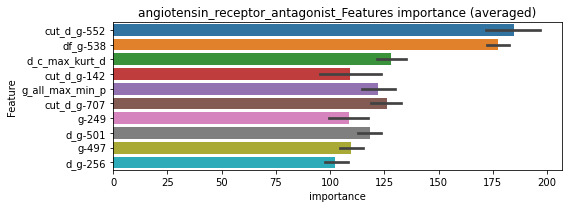

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 angiotensin_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000398476	valid_1's binary_logloss: 0.00371004
Early stopping, best iteration is:
[1009]	training's binary_logloss: 0.00039742	valid_1's binary_logloss: 0.00370266


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 angiotensin_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[924]	training's binary_logloss: 0.000406578	valid_1's binary_logloss: 0.00359053


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 angiotensin_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000402262	valid_1's binary_logloss: 0.00185308
Early stopping, best iteration is:
[982]	training's binary_logloss: 0.000403636	valid_1's binary_logloss: 0.00185179


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 angiotensin_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[735]	training's binary_logloss: 0.000456276	valid_1's binary_logloss: 0.0063711


angiotensin_receptor_antagonist logloss: 0.003879795849592655
anti-inflammatory, len(trt): 73, len(othr): 3275
target_rate: 0.0030654 → Adj_target_rate: 0.0032212


selected negative label: 3275


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[584]	training's binary_logloss: 0.000942528	valid_1's binary_logloss: 0.0328789
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[814]	training's binary_logloss: 0.000610913	valid_1's binary_logloss: 0.0167793
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[442]	training's binary_logloss: 0.00168782	valid_1's binary_logloss: 0.0444238
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[750]	training's binary_logloss: 0.000632963	valid_1's binary_logloss: 0.0249587


1 / 3, AUC score:0.999, PR-AUC:0.997
y_Threshold: 0.0079948, Threshold: 0.0775467, pos_neg_ratio: 0.8000000
Remove_noisy_data: 137 → Positive_corect_labels: 652/3793
p_label_rate: 0.0100452 Vs.target_rate: 0.00307
Num_p_label: 40.0, Expected: 12.2, Threshold: 0.0775467, conf_0:0.05428, conf_1:0.10081
Num_p_label: 27.0, Expected: 12.2, Adj_threshold_1: 0.1075467
Num_p_label: 23.0, Expected: 12.2, Adj_threshold_2: 0.1375467
Num_p_label: 18.0, Expected: 12.2, Adj_threshold_3: 0.1675467
threshold: 0.1675467, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 652.0/3793, y_label_rate: 0.1718956
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[536]	training's binary_logloss: 0.00102373	valid_1's binary_logloss: 0.0371761
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[726]	training's binary_logloss: 0.000632307	valid_1's binary_logloss: 0.0295418
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[829]	training's binary_logloss: 0.000580895	valid_1's binary_logloss: 0.017443
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[748]	training's binary_logloss: 0.000620585	valid_1's binary_logloss: 0.0210329


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0324619, Threshold: 0.1675467, pos_neg_ratio: 0.8000000
Remove_noisy_data: 12 → Positive_corect_labels: 646.0/3781
p_label_rate: 0.0118031 Vs.target_rate: 0.00307
Num_p_label: 47.0, Expected: 12.2, Threshold: 0.1675467, conf_0:0.13404, conf_1:0.20106
Num_p_label: 38.0, Expected: 12.2, Adj_threshold_1: 0.1975467
Num_p_label: 34.0, Expected: 12.2, Adj_threshold_2: 0.2275467
Num_p_label: 28.0, Expected: 12.2, Adj_threshold_3: 0.2575467
Num_p_label: 25.0, Expected: 12.2, Adj_threshold_4: 0.2875467
Num_p_label: 23.0, Expected: 12.2, Adj_threshold_5: 0.3175467
Num_p_label: 22.0, Expected: 12.2, Adj_threshold_6: 0.3475467
Num_p_label: 20.0, Expected: 12.2, Adj_threshold_7: 0.3775467
Num_p_label: 19.0, Expected: 12.2, Adj_threshold_8: 0.4075467
Num_p_label: 18.0, Expected: 12.2, Adj_threshold_9: 0.4375467
threshold: 0.4375467, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 646.0/3781, y_label_rate: 0.1708543
==========

Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[808]	training's binary_logloss: 0.000565523	valid_1's binary_logloss: 0.0226425
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[733]	training's binary_logloss: 0.00060261	valid_1's binary_logloss: 0.0327455
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[804]	training's binary_logloss: 0.000571558	valid_1's binary_logloss: 0.0226217
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[777]	training's binary_logloss: 0.000591754	valid_1's binary_logloss: 0.016391


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0313774, Threshold: 0.4375467, pos_neg_ratio: 0.8000000
Remove_noisy_data: 10 → Positive_corect_labels: 641.0/3771
p_label_rate: 0.0042692 Vs.target_rate: 0.00307
Num_p_label: 17.0, Expected: 12.2, Threshold: 0.4375467, conf_0:0.39379, conf_1:0.48130
threshold: 0.4375467, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 641.0/3771, y_label_rate: 0.1699814


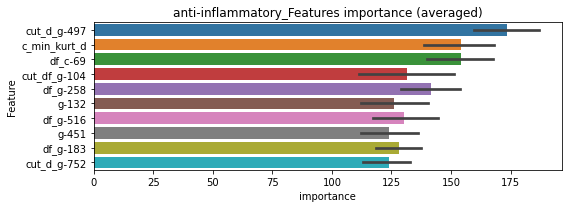

len(train_index) : 2828
len(valid_index) : 943
================================= fold 1/4 anti-inflammatory=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2828
len(valid_index) : 943
================================= fold 2/4 anti-inflammatory=================================


Early stopping, best iteration is:
[340]	training's binary_logloss: 0.00153847	valid_1's binary_logloss: 0.0485836
Training until validation scores don't improve for 30 rounds


len(train_index) : 2828
len(valid_index) : 943
================================= fold 3/4 anti-inflammatory=================================


Early stopping, best iteration is:
[449]	training's binary_logloss: 0.0011407	valid_1's binary_logloss: 0.0220778
Training until validation scores don't improve for 30 rounds


len(train_index) : 2829
len(valid_index) : 942
================================= fold 4/4 anti-inflammatory=================================


Early stopping, best iteration is:
[545]	training's binary_logloss: 0.000928715	valid_1's binary_logloss: 0.0231675
Training until validation scores don't improve for 30 rounds


anti-inflammatory logloss: 0.02835519488575455


Early stopping, best iteration is:
[445]	training's binary_logloss: 0.00115624	valid_1's binary_logloss: 0.0195825


antiarrhythmic, len(trt): 24, len(othr): 3283
target_rate: 0.0010078 → Adj_target_rate: 0.0012513


selected negative label: 3283


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[582]	training's binary_logloss: 0.00036546	valid_1's binary_logloss: 0.00174837
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[598]	training's binary_logloss: 0.00036004	valid_1's binary_logloss: 0.00353258
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[557]	training's binary_logloss: 0.000379759	valid_1's binary_logloss: 0.00303454
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0018459, Threshold: 0.0057581, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3807


Early stopping, best iteration is:
[585]	training's binary_logloss: 0.000369741	valid_1's binary_logloss: 0.00329681


p_label_rate: 0.0100452 Vs.target_rate: 0.00101
Num_p_label: 40.0, Expected: 4.0, Threshold: 0.0057581, conf_0:0.00403, conf_1:0.00749
Num_p_label: 4.0, Expected: 4.0, Adj_threshold_1: 0.0357581
threshold: 0.0357581, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[586]	training's binary_logloss: 0.000355648	valid_1's binary_logloss: 0.00178822
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[602]	training's binary_logloss: 0.000353743	valid_1's binary_logloss: 0.00243269
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[598]	training's binary_logloss: 0.000354787	valid_1's binary_logloss: 0.00193465
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0533431, Threshold: 0.0357581, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3807
p_label_rate: 0.0025113 Vs.target_rate: 0.00101
Num_p_label: 10.0, Expected: 4.0, Threshold: 0.0357581, conf_0:0.02861, conf_1:0.04291


Early stopping, best iteration is:
[583]	training's binary_logloss: 0.000358373	valid_1's binary_logloss: 0.0027198


threshold: 0.0357581, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[586]	training's binary_logloss: 0.000355648	valid_1's binary_logloss: 0.00178822
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[602]	training's binary_logloss: 0.000353743	valid_1's binary_logloss: 0.00243269
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[598]	training's binary_logloss: 0.000354787	valid_1's binary_logloss: 0.00193465
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0533431, Threshold: 0.0357581, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3807
p_label_rate: 0.0025113 Vs.target_rate: 0.00101
Num_p_label: 10.0, Expected: 4.0, Threshold: 0.0357581, conf_0:0.03218, conf_1:0.03933


Early stopping, best iteration is:
[583]	training's binary_logloss: 0.000358373	valid_1's binary_logloss: 0.0027198


threshold: 0.0357581, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 656.0/3807, y_label_rate: 0.1723142


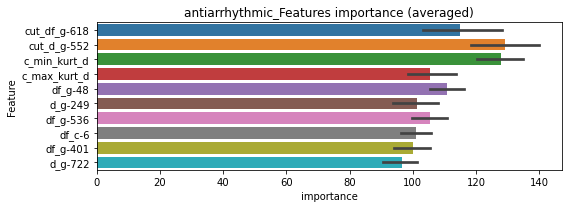

len(train_index) : 2855
len(valid_index) : 952
================================= fold 1/4 antiarrhythmic=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[796]	training's binary_logloss: 0.000368363	valid_1's binary_logloss: 0.00185224


len(train_index) : 2855
len(valid_index) : 952
================================= fold 2/4 antiarrhythmic=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[835]	training's binary_logloss: 0.000367499	valid_1's binary_logloss: 0.00218228


len(train_index) : 2855
len(valid_index) : 952
================================= fold 3/4 antiarrhythmic=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[869]	training's binary_logloss: 0.000363276	valid_1's binary_logloss: 0.001749


len(train_index) : 2856
len(valid_index) : 951
================================= fold 4/4 antiarrhythmic=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[758]	training's binary_logloss: 0.000382549	valid_1's binary_logloss: 0.00230622


antiarrhythmic logloss: 0.0020224504261133203
antibiotic, len(trt): 43, len(othr): 3284
target_rate: 0.0018057 → Adj_target_rate: 0.0020542


selected negative label: 3284


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[634]	training's binary_logloss: 0.000481012	valid_1's binary_logloss: 0.0121094
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[602]	training's binary_logloss: 0.000514658	valid_1's binary_logloss: 0.00586372
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[706]	training's binary_logloss: 0.000476922	valid_1's binary_logloss: 0.00179447
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[625]	training's binary_logloss: 0.000488425	valid_1's binary_logloss: 0.0114221


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0042693, Threshold: 0.0321468, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00181
Num_p_label: 40.0, Expected: 7.2, Threshold: 0.0321468, conf_0:0.02250, conf_1:0.04179
Num_p_label: 19.0, Expected: 7.2, Adj_threshold_1: 0.0621468
Num_p_label: 16.0, Expected: 7.2, Adj_threshold_2: 0.0921468
threshold: 0.0921468, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[620]	training's binary_logloss: 0.000468355	valid_1's binary_logloss: 0.0116204
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[606]	training's binary_logloss: 0.000498085	valid_1's binary_logloss: 0.00536405
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[701]	training's binary_logloss: 0.000460639	valid_1's binary_logloss: 0.0019549
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[615]	training's binary_logloss: 0.000481465	valid_1's binary_logloss: 0.0119445


y_Threshold: 0.0378763, Threshold: 0.0921468, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3806
p_label_rate: 0.0102963 Vs.target_rate: 0.00181
Num_p_label: 41.0, Expected: 7.2, Threshold: 0.0921468, conf_0:0.07372, conf_1:0.11058
Num_p_label: 30.0, Expected: 7.2, Adj_threshold_1: 0.1221468
Num_p_label: 24.0, Expected: 7.2, Adj_threshold_2: 0.1521468
Num_p_label: 17.0, Expected: 7.2, Adj_threshold_3: 0.1821468
threshold: 0.1821468, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 655.0/3806, y_label_rate: 0.1720967
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[614]	training's binary_logloss: 0.000477911	valid_1's binary_logloss: 0.00712832
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[656]	training's binary_logloss: 0.000460874	valid_1's binary_logloss: 0.00279933
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[643]	training's binary_logloss: 0.000467114	valid_1's binary_logloss: 0.00362135
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[631]	training's binary_logloss: 0.000475199	valid_1's binary_logloss: 0.00920251


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0251516, Threshold: 0.1821468, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3806
p_label_rate: 0.0032647 Vs.target_rate: 0.00181
Num_p_label: 13.0, Expected: 7.2, Threshold: 0.1821468, conf_0:0.16393, conf_1:0.20036
threshold: 0.1821468, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 655.0/3806, y_label_rate: 0.1720967


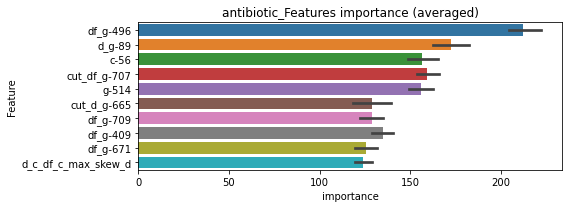

len(train_index) : 2854
len(valid_index) : 952
================================= fold 1/4 antibiotic=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[888]	training's binary_logloss: 0.000467834	valid_1's binary_logloss: 0.00778476


len(train_index) : 2854
len(valid_index) : 952
================================= fold 2/4 antibiotic=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[919]	training's binary_logloss: 0.000470049	valid_1's binary_logloss: 0.00279079


len(train_index) : 2855
len(valid_index) : 951
================================= fold 3/4 antibiotic=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[885]	training's binary_logloss: 0.000475704	valid_1's binary_logloss: 0.00293277


len(train_index) : 2855
len(valid_index) : 951
================================= fold 4/4 antibiotic=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[763]	training's binary_logloss: 0.00050669	valid_1's binary_logloss: 0.0102244


antibiotic logloss: 0.005933718757977818
anticonvulsant, len(trt): 18, len(othr): 3288
target_rate: 0.0007559 → Adj_target_rate: 0.0009799


selected negative label: 3288


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[564]	training's binary_logloss: 0.000272064	valid_1's binary_logloss: 0.00108462
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[557]	training's binary_logloss: 0.000268393	valid_1's binary_logloss: 0.0022707
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[397]	training's binary_logloss: 0.000416402	valid_1's binary_logloss: 0.00443289
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0012456, Threshold: 0.0043196, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, Expected: 3.0, Threshold: 0.0043196, conf_0:0.00302, conf_1:0.00562
Num_p_label: 2.0, Expected: 3.0, Adj_threshold_1: 0.0343196


Early stopping, best iteration is:
[523]	training's binary_logloss: 0.000278638	valid_1's binary_logloss: 0.00140679


threshold: 0.0343196, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[563]	training's binary_logloss: 0.000266664	valid_1's binary_logloss: 0.000880482
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[523]	training's binary_logloss: 0.000268986	valid_1's binary_logloss: 0.00274701
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[515]	training's binary_logloss: 0.00027665	valid_1's binary_logloss: 0.00367791
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0125228, Threshold: 0.0343196, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0012557 Vs.target_rate: 0.00076
Num_p_label: 5.0, Expected: 3.0, Threshold: 0.0343196, conf_0:0.02746, conf_1:0.04118


Early stopping, best iteration is:
[559]	training's binary_logloss: 0.000262782	valid_1's binary_logloss: 0.00142385


threshold: 0.0343196, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[563]	training's binary_logloss: 0.000266664	valid_1's binary_logloss: 0.000880482
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[523]	training's binary_logloss: 0.000268986	valid_1's binary_logloss: 0.00274701
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[515]	training's binary_logloss: 0.00027665	valid_1's binary_logloss: 0.00367791
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0125228, Threshold: 0.0343196, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0012557 Vs.target_rate: 0.00076
Num_p_label: 5.0, Expected: 3.0, Threshold: 0.0343196, conf_0:0.03089, conf_1:0.03775


Early stopping, best iteration is:
[559]	training's binary_logloss: 0.000262782	valid_1's binary_logloss: 0.00142385


threshold: 0.0343196, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


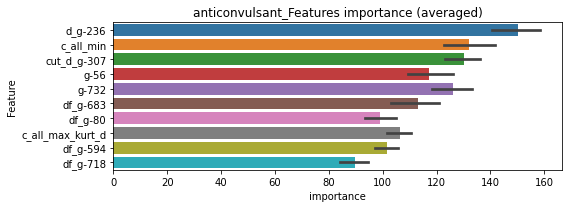

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 anticonvulsant=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000265807	valid_1's binary_logloss: 0.000779594
Early stopping, best iteration is:
[984]	training's binary_logloss: 0.000265814	valid_1's binary_logloss: 0.000779581


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 anticonvulsant=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[908]	training's binary_logloss: 0.000266703	valid_1's binary_logloss: 0.00238696


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 anticonvulsant=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 anticonvulsant=================================


Early stopping, best iteration is:
[299]	training's binary_logloss: 0.000617584	valid_1's binary_logloss: 0.00401543
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[895]	training's binary_logloss: 0.000269353	valid_1's binary_logloss: 0.00116273


anticonvulsant logloss: 0.0020864031387252103
antifungal, len(trt): 26, len(othr): 3283
target_rate: 0.0010918 → Adj_target_rate: 0.0013394


selected negative label: 3283


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[603]	training's binary_logloss: 0.000333196	valid_1's binary_logloss: 0.00305276
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[558]	training's binary_logloss: 0.000344105	valid_1's binary_logloss: 0.00241136
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[497]	training's binary_logloss: 0.000395425	valid_1's binary_logloss: 0.00244012
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0016472, Threshold: 0.0052241, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[611]	training's binary_logloss: 0.000332973	valid_1's binary_logloss: 0.00371073


Remove_noisy_data: 132 → Positive_corect_labels: 656/3807
p_label_rate: 0.0100452 Vs.target_rate: 0.00109
Num_p_label: 40.0, Expected: 4.3, Threshold: 0.0052241, conf_0:0.00366, conf_1:0.00679
Num_p_label: 2.0, Expected: 4.3, Adj_threshold_1: 0.0352241
threshold: 0.0352241, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[608]	training's binary_logloss: 0.000323699	valid_1's binary_logloss: 0.00190279
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[573]	training's binary_logloss: 0.000330647	valid_1's binary_logloss: 0.00167875
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[578]	training's binary_logloss: 0.000340878	valid_1's binary_logloss: 0.00222419
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0530669, Threshold: 0.0352241, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3807
p_label_rate: 0.0007534 Vs.target_rate: 0.00109
Num_p_label: 3.0, Expected: 4.3, Threshold: 0.0352241, conf_0:0.02818, conf_1:0.04227


Early stopping, best iteration is:
[585]	training's binary_logloss: 0.000327866	valid_1's binary_logloss: 0.00305722


threshold: 0.0352241, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[608]	training's binary_logloss: 0.000323699	valid_1's binary_logloss: 0.00190279
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[573]	training's binary_logloss: 0.000330647	valid_1's binary_logloss: 0.00167875
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[568]	training's binary_logloss: 0.000340878	valid_1's binary_logloss: 0.00222419
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0530669, Threshold: 0.0352241, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3807
p_label_rate: 0.0007534 Vs.target_rate: 0.00109


Early stopping, best iteration is:
[585]	training's binary_logloss: 0.000327866	valid_1's binary_logloss: 0.00305722


Num_p_label: 3.0, Expected: 4.3, Threshold: 0.0352241, conf_0:0.03170, conf_1:0.03875
threshold: 0.0352241, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 656.0/3807, y_label_rate: 0.1723142


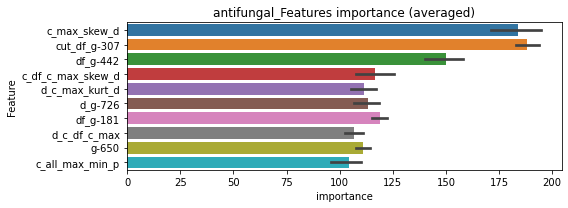

len(train_index) : 2855
len(valid_index) : 952
================================= fold 1/4 antifungal=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[865]	training's binary_logloss: 0.000338462	valid_1's binary_logloss: 0.00212168


len(train_index) : 2855
len(valid_index) : 952
================================= fold 2/4 antifungal=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[949]	training's binary_logloss: 0.000328428	valid_1's binary_logloss: 0.00155321


len(train_index) : 2855
len(valid_index) : 952
================================= fold 3/4 antifungal=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[784]	training's binary_logloss: 0.000356486	valid_1's binary_logloss: 0.00179757


len(train_index) : 2856
len(valid_index) : 951
================================= fold 4/4 antifungal=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[942]	training's binary_logloss: 0.000330298	valid_1's binary_logloss: 0.00258722


antifungal logloss: 0.0020148929594547738
antihistamine, len(trt): 18, len(othr): 3289
target_rate: 0.0007559 → Adj_target_rate: 0.0009799


selected negative label: 3289


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[532]	training's binary_logloss: 0.000300782	valid_1's binary_logloss: 0.00150166
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[528]	training's binary_logloss: 0.000300541	valid_1's binary_logloss: 0.00288375
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[563]	training's binary_logloss: 0.00030593	valid_1's binary_logloss: 0.00137135
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0015763, Threshold: 0.1386174, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, Expected: 3.0, Threshold: 0.1386174, conf_0:0.09703, conf_1:0.18020
Num_p_label: 37.0, Expected: 3.0, Adj_threshold_1: 0.1686174
Num_p_label: 34.0, Expected: 3.0, Adj_threshold_2: 0.1986174
Num_p_label: 29.0, Expected: 3.0, Adj_threshold_3: 0.2286174
Num_p_label: 28.0, Expected: 3.0, Adj_threshold_4: 0.2586174


Early stopping, best iteration is:
[534]	training's binary_logloss: 0.000303175	valid_1's binary_logloss: 0.0030265


Num_p_label: 26.0, Expected: 3.0, Adj_threshold_5: 0.2886174
Num_p_label: 24.0, Expected: 3.0, Adj_threshold_6: 0.3186174
Num_p_label: 22.0, Expected: 3.0, Adj_threshold_7: 0.3486174
Num_p_label: 18.0, Expected: 3.0, Adj_threshold_8: 0.3786174
Num_p_label: 16.0, Expected: 3.0, Adj_threshold_9: 0.4086174
Num_p_label: 14.0, Expected: 3.0, Adj_threshold_10: 0.4386174
threshold: 0.4386174, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[537]	training's binary_logloss: 0.000282857	valid_1's binary_logloss: 0.00133102
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[501]	training's binary_logloss: 0.000287174	valid_1's binary_logloss: 0.00216568
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[535]	training's binary_logloss: 0.000285914	valid_1's binary_logloss: 0.000434012
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0857761, Threshold: 0.4386174, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0125565 Vs.target_rate: 0.00076
Num_p_label: 50.0, Expected: 3.0, Threshold: 0.4386174, conf_0:0.35089, conf_1:0.52634
Num_p_label: 48.0, Expected: 3.0, Adj_threshold_1: 0.4686174
Num_p_label: 47.0, Expected: 3.0, Adj_threshold_2: 0.4986174
Num_p_label: 46.0, Expected: 3.0, Adj_threshold_3: 0.5286174
Num_p_label: 46.0, Expected: 3.0, Adj_threshold_4: 0.5586174
Num_p_label: 46.0, Expected: 3.0, Adj_threshold_5: 0.5886174


Early stopping, best iteration is:
[496]	training's binary_logloss: 0.000290351	valid_1's binary_logloss: 0.00185445


Num_p_label: 46.0, Expected: 3.0, Adj_threshold_6: 0.6186174
Num_p_label: 46.0, Expected: 3.0, Adj_threshold_7: 0.6486174
Num_p_label: 45.0, Expected: 3.0, Adj_threshold_8: 0.6786174
Num_p_label: 45.0, Expected: 3.0, Adj_threshold_9: 0.7086174
Num_p_label: 45.0, Expected: 3.0, Adj_threshold_10: 0.7386174
threshold: 0.7386174, positive_p_label: 45.0/3982, p_label_rate: 0.0113009
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[537]	training's binary_logloss: 0.000282857	valid_1's binary_logloss: 0.00133102
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[501]	training's binary_logloss: 0.000287174	valid_1's binary_logloss: 0.00216568
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[535]	training's binary_logloss: 0.000285914	valid_1's binary_logloss: 0.000434012
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0857761, Threshold: 0.7386174, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0113009 Vs.target_rate: 0.00076
Num_p_label: 45.0, Expected: 3.0, Threshold: 0.7386174, conf_0:0.66476, conf_1:0.81248
Num_p_label: 43.0, Expected: 3.0, Adj_threshold_1: 0.7686174
Num_p_label: 42.0, Expected: 3.0, Adj_threshold_2: 0.7986174
Num_p_label: 40.0, Expected: 3.0, Adj_threshold_3: 0.8286174
Num_p_label: 37.0, Expected: 3.0, Adj_threshold_4: 0.8586174
Num_p_label: 33.0, Expected: 3.0, Adj_threshold_5: 0.8886174
Num_p_label: 27.0, Expected: 3.0, Adj_threshold_6: 0.9186174


Early stopping, best iteration is:
[496]	training's binary_logloss: 0.000290351	valid_1's binary_logloss: 0.00185445


Num_p_label: 21.0, Expected: 3.0, Adj_threshold_7: 0.9486174
Num_p_label: 11.0, Expected: 3.0, Adj_threshold_8: 0.9786174
threshold: 0.9786174, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


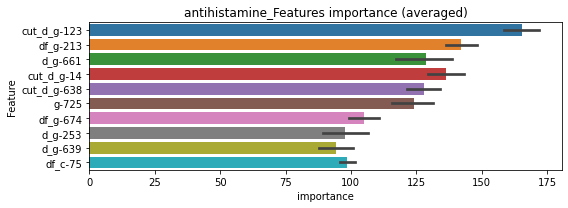

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 antihistamine=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 antihistamine=================================


Early stopping, best iteration is:
[799]	training's binary_logloss: 0.000290034	valid_1's binary_logloss: 0.00103865
Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 antihistamine=================================


Early stopping, best iteration is:
[752]	training's binary_logloss: 0.000292394	valid_1's binary_logloss: 0.00183311
Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953


Early stopping, best iteration is:
[819]	training's binary_logloss: 0.000293819	valid_1's binary_logloss: 0.000477158


================================= fold 4/4 antihistamine=================================


Training until validation scores don't improve for 30 rounds


antihistamine logloss: 0.0013002342186068112


Early stopping, best iteration is:
[800]	training's binary_logloss: 0.00029075	valid_1's binary_logloss: 0.0018516


antimalarial, len(trt): 18, len(othr): 3287
target_rate: 0.0007559 → Adj_target_rate: 0.0009799


selected negative label: 3287


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[541]	training's binary_logloss: 0.000319265	valid_1's binary_logloss: 0.000737528
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[565]	training's binary_logloss: 0.000312505	valid_1's binary_logloss: 0.00183907
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[530]	training's binary_logloss: 0.000316884	valid_1's binary_logloss: 0.00289911
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0018391, Threshold: 0.0073080, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, Expected: 3.0, Threshold: 0.0073080, conf_0:0.00512, conf_1:0.00950
Num_p_label: 12.0, Expected: 3.0, Adj_threshold_1: 0.0373080
Num_p_label: 6.0, Expected: 3.0, Adj_threshold_2: 0.0673080


Early stopping, best iteration is:
[497]	training's binary_logloss: 0.000336989	valid_1's binary_logloss: 0.00320468


threshold: 0.0673080, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[546]	training's binary_logloss: 0.000307027	valid_1's binary_logloss: 0.000729056
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[516]	training's binary_logloss: 0.000309116	valid_1's binary_logloss: 0.00249446
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[533]	training's binary_logloss: 0.000307816	valid_1's binary_logloss: 0.000916144
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1792170, Threshold: 0.0673080, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0062783 Vs.target_rate: 0.00076
Num_p_label: 25.0, Expected: 3.0, Threshold: 0.0673080, conf_0:0.05385, conf_1:0.08077
Num_p_label: 20.0, Expected: 3.0, Adj_threshold_1: 0.0973080
Num_p_label: 18.0, Expected: 3.0, Adj_threshold_2: 0.1273080
Num_p_label: 16.0, Expected: 3.0, Adj_threshold_3: 0.1573080
Num_p_label: 15.0, Expected: 3.0, Adj_threshold_4: 0.1873080
Num_p_label: 13.0, Expected: 3.0, Adj_threshold_5: 0.2173080


Early stopping, best iteration is:
[516]	training's binary_logloss: 0.000308241	valid_1's binary_logloss: 0.00229274


Num_p_label: 11.0, Expected: 3.0, Adj_threshold_6: 0.2473080
Num_p_label: 9.0, Expected: 3.0, Adj_threshold_7: 0.2773080
Num_p_label: 8.0, Expected: 3.0, Adj_threshold_8: 0.3073080
Num_p_label: 8.0, Expected: 3.0, Adj_threshold_9: 0.3373080
Num_p_label: 7.0, Expected: 3.0, Adj_threshold_10: 0.3673080
threshold: 0.3673080, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[550]	training's binary_logloss: 0.000307027	valid_1's binary_logloss: 0.000729056
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[516]	training's binary_logloss: 0.000309116	valid_1's binary_logloss: 0.00249446
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[533]	training's binary_logloss: 0.000307816	valid_1's binary_logloss: 0.000916144
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1792170, Threshold: 0.3673080, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0017579 Vs.target_rate: 0.00076
Num_p_label: 7.0, Expected: 3.0, Threshold: 0.3673080, conf_0:0.33058, conf_1:0.40404


Early stopping, best iteration is:
[516]	training's binary_logloss: 0.000308241	valid_1's binary_logloss: 0.00229274


threshold: 0.3673080, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


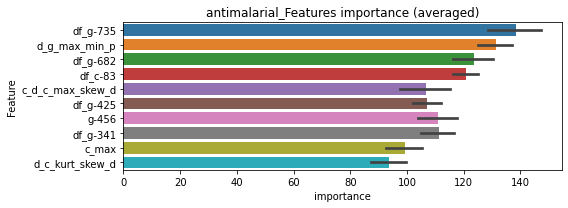

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 antimalarial=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[835]	training's binary_logloss: 0.000303507	valid_1's binary_logloss: 0.000811277


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 antimalarial=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[845]	training's binary_logloss: 0.000300323	valid_1's binary_logloss: 0.00237693


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 antimalarial=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953


Early stopping, best iteration is:
[795]	training's binary_logloss: 0.000307419	valid_1's binary_logloss: 0.000604687


================================= fold 4/4 antimalarial=================================


Training until validation scores don't improve for 30 rounds


Early stopping, best iteration is:
[805]	training's binary_logloss: 0.000304515	valid_1's binary_logloss: 0.00206298


antimalarial logloss: 0.001464192765536318
antioxidant, len(trt): 73, len(othr): 3282
target_rate: 0.0030654 → Adj_target_rate: 0.0032212


selected negative label: 3282


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[691]	training's binary_logloss: 0.000675632	valid_1's binary_logloss: 0.0337918
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[689]	training's binary_logloss: 0.000701171	valid_1's binary_logloss: 0.0311543
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[647]	training's binary_logloss: 0.000782948	valid_1's binary_logloss: 0.0203729
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[592]	training's binary_logloss: 0.000886819	valid_1's binary_logloss: 0.0384864


1 / 3, AUC score:0.999, PR-AUC:0.997
y_Threshold: 0.0063322, Threshold: 0.0252578, pos_neg_ratio: 0.8000000
Remove_noisy_data: 142 → Positive_corect_labels: 651/3796
p_label_rate: 0.0100452 Vs.target_rate: 0.00307
Num_p_label: 40.0, Expected: 12.2, Threshold: 0.0252578, conf_0:0.01768, conf_1:0.03284
Num_p_label: 13.0, Expected: 12.2, Adj_threshold_1: 0.0552578
threshold: 0.0552578, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 651.0/3796, y_label_rate: 0.1714963
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[459]	training's binary_logloss: 0.00136157	valid_1's binary_logloss: 0.0494719
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[747]	training's binary_logloss: 0.000609816	valid_1's binary_logloss: 0.0227295
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[727]	training's binary_logloss: 0.000622777	valid_1's binary_logloss: 0.0195533
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[601]	training's binary_logloss: 0.000817494	valid_1's binary_logloss: 0.0301327


2 / 3, AUC score:0.999, PR-AUC:0.999
y_Threshold: 0.0243309, Threshold: 0.0552578, pos_neg_ratio: 0.8000000
Remove_noisy_data: 10 → Positive_corect_labels: 646.0/3786
p_label_rate: 0.0080362 Vs.target_rate: 0.00307
Num_p_label: 32.0, Expected: 12.2, Threshold: 0.0552578, conf_0:0.04421, conf_1:0.06631
Num_p_label: 15.0, Expected: 12.2, Adj_threshold_1: 0.0852578
threshold: 0.0852578, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 646.0/3786, y_label_rate: 0.1706286
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[730]	training's binary_logloss: 0.000609733	valid_1's binary_logloss: 0.0210523
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[731]	training's binary_logloss: 0.000586514	valid_1's binary_logloss: 0.0332741
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[586]	training's binary_logloss: 0.000828111	valid_1's binary_logloss: 0.023954
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[796]	training's binary_logloss: 0.000589186	valid_1's binary_logloss: 0.00878668


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0306009, Threshold: 0.0852578, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 644.0/3782
p_label_rate: 0.0047715 Vs.target_rate: 0.00307
Num_p_label: 19.0, Expected: 12.2, Threshold: 0.0852578, conf_0:0.07673, conf_1:0.09378
Num_p_label: 15.0, Expected: 12.2, Adj_threshold_1: 0.1152578
threshold: 0.1152578, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 644.0/3782, y_label_rate: 0.1702803


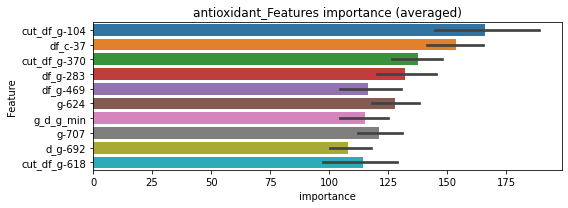

len(train_index) : 2836
len(valid_index) : 946
================================= fold 1/4 antioxidant=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2836
len(valid_index) : 946
================================= fold 2/4 antioxidant=================================


Early stopping, best iteration is:
[441]	training's binary_logloss: 0.00114773	valid_1's binary_logloss: 0.0236282
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[643]	training's binary_logloss: 0.000792088	valid_1's binary_logloss: 0.0230281


len(train_index) : 2837
len(valid_index) : 945
================================= fold 3/4 antioxidant=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2837
len(valid_index) : 945
================================= fold 4/4 antioxidant=================================


Early stopping, best iteration is:
[449]	training's binary_logloss: 0.00113774	valid_1's binary_logloss: 0.0256756
Training until validation scores don't improve for 30 rounds


antioxidant logloss: 0.023761531623676627


Early stopping, best iteration is:
[539]	training's binary_logloss: 0.000927903	valid_1's binary_logloss: 0.0227152


antiprotozoal, len(trt): 36, len(othr): 3284
target_rate: 0.0015117 → Adj_target_rate: 0.0017663


selected negative label: 3284


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[688]	training's binary_logloss: 0.000413846	valid_1's binary_logloss: 0.00340071
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[677]	training's binary_logloss: 0.000420026	valid_1's binary_logloss: 0.00503381
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[709]	training's binary_logloss: 0.000427192	valid_1's binary_logloss: 0.00164745
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[626]	training's binary_logloss: 0.000436331	valid_1's binary_logloss: 0.00567162


y_Threshold: 0.0031995, Threshold: 0.0111100, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00151
Num_p_label: 40.0, Expected: 6.0, Threshold: 0.0111100, conf_0:0.00778, conf_1:0.01444
Num_p_label: 4.0, Expected: 6.0, Adj_threshold_1: 0.0411100
threshold: 0.0411100, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[742]	training's binary_logloss: 0.000395704	valid_1's binary_logloss: 0.00241149
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[675]	training's binary_logloss: 0.000408737	valid_1's binary_logloss: 0.00355089
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[666]	training's binary_logloss: 0.000414012	valid_1's binary_logloss: 0.00143671
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[634]	training's binary_logloss: 0.000418886	valid_1's binary_logloss: 0.00460521


y_Threshold: 0.0528957, Threshold: 0.0411100, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0042692 Vs.target_rate: 0.00151
Num_p_label: 17.0, Expected: 6.0, Threshold: 0.0411100, conf_0:0.03289, conf_1:0.04933
Num_p_label: 2.0, Expected: 6.0, Adj_threshold_1: 0.0711100
threshold: 0.0711100, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[742]	training's binary_logloss: 0.000395704	valid_1's binary_logloss: 0.00241149
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[675]	training's binary_logloss: 0.000408737	valid_1's binary_logloss: 0.00355089
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[666]	training's binary_logloss: 0.000414012	valid_1's binary_logloss: 0.00143671
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0528957, Threshold: 0.0711100, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[634]	training's binary_logloss: 0.000418886	valid_1's binary_logloss: 0.00460521


Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0005023 Vs.target_rate: 0.00151
Num_p_label: 2.0, Expected: 6.0, Threshold: 0.0711100, conf_0:0.06400, conf_1:0.07822
threshold: 0.0711100, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 656.0/3808, y_label_rate: 0.1722689


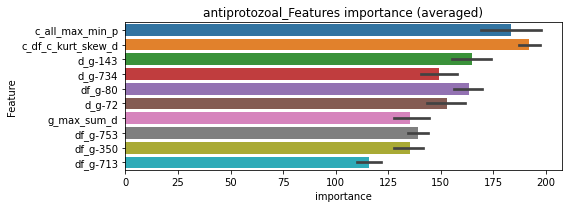

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 antiprotozoal=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000402208	valid_1's binary_logloss: 0.00243949
Early stopping, best iteration is:
[986]	training's binary_logloss: 0.000402208	valid_1's binary_logloss: 0.00243949


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 antiprotozoal=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[913]	training's binary_logloss: 0.000418831	valid_1's binary_logloss: 0.00257912


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 antiprotozoal=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00041023	valid_1's binary_logloss: 0.00132299
Early stopping, best iteration is:
[1034]	training's binary_logloss: 0.000407338	valid_1's binary_logloss: 0.00131437


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 antiprotozoal=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000406596	valid_1's binary_logloss: 0.00417219
Early stopping, best iteration is:
[1007]	training's binary_logloss: 0.0004059	valid_1's binary_logloss: 0.00416426


antiprotozoal logloss: 0.002624308843671174
antiviral, len(trt): 23, len(othr): 3284
target_rate: 0.0009658 → Adj_target_rate: 0.0012069


selected negative label: 3284


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[578]	training's binary_logloss: 0.000305519	valid_1's binary_logloss: 0.00207589
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[583]	training's binary_logloss: 0.000307179	valid_1's binary_logloss: 0.00107686
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[630]	training's binary_logloss: 0.000309147	valid_1's binary_logloss: 0.000925135
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0016429, Threshold: 0.0047371, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00097
Num_p_label: 40.0, Expected: 3.8, Threshold: 0.0047371, conf_0:0.00332, conf_1:0.00616
Num_p_label: 1.0, Expected: 3.8, Adj_threshold_1: 0.0347371


Early stopping, best iteration is:
[610]	training's binary_logloss: 0.00030625	valid_1's binary_logloss: 0.00233503


threshold: 0.0347371, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[588]	training's binary_logloss: 0.000294869	valid_1's binary_logloss: 0.00204517
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[612]	training's binary_logloss: 0.000297896	valid_1's binary_logloss: 0.000897097
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[591]	training's binary_logloss: 0.000304877	valid_1's binary_logloss: 0.000652387
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0394407, Threshold: 0.0347371, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0022602 Vs.target_rate: 0.00097
Num_p_label: 9.0, Expected: 3.8, Threshold: 0.0347371, conf_0:0.02779, conf_1:0.04168


Early stopping, best iteration is:
[560]	training's binary_logloss: 0.000304079	valid_1's binary_logloss: 0.00266243


threshold: 0.0347371, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[588]	training's binary_logloss: 0.000294869	valid_1's binary_logloss: 0.00204517
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[612]	training's binary_logloss: 0.000297896	valid_1's binary_logloss: 0.000897097
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[591]	training's binary_logloss: 0.000304877	valid_1's binary_logloss: 0.000652387
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0394407, Threshold: 0.0347371, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0022602 Vs.target_rate: 0.00097
Num_p_label: 9.0, Expected: 3.8, Threshold: 0.0347371, conf_0:0.03126, conf_1:0.03821


Early stopping, best iteration is:
[560]	training's binary_logloss: 0.000304079	valid_1's binary_logloss: 0.00266243


threshold: 0.0347371, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 656.0/3808, y_label_rate: 0.1722689


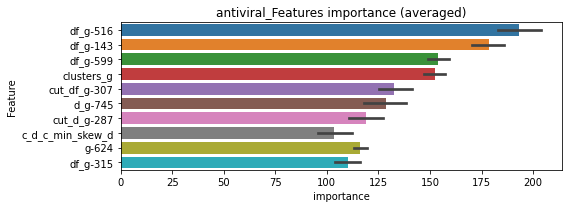

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 antiviral=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000297191	valid_1's binary_logloss: 0.00170042
Early stopping, best iteration is:
[990]	training's binary_logloss: 0.00029737	valid_1's binary_logloss: 0.00169949


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 antiviral=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000299711	valid_1's binary_logloss: 0.000745273
Early stopping, best iteration is:
[1033]	training's binary_logloss: 0.000299585	valid_1's binary_logloss: 0.000744995


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 antiviral=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[888]	training's binary_logloss: 0.000308213	valid_1's binary_logloss: 0.000556213


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 antiviral=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[881]	training's binary_logloss: 0.000305653	valid_1's binary_logloss: 0.00187328


antiviral logloss: 0.001218898436976844
apoptosis_stimulant, len(trt): 49, len(othr): 3284
target_rate: 0.0020576 → Adj_target_rate: 0.0022954


selected negative label: 3284


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[458]	training's binary_logloss: 0.000888872	valid_1's binary_logloss: 0.0271083
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[574]	training's binary_logloss: 0.000592852	valid_1's binary_logloss: 0.0191139
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[699]	training's binary_logloss: 0.000502833	valid_1's binary_logloss: 0.00174242
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000584269	valid_1's binary_logloss: 0.0157475


y_Threshold: 0.0041710, Threshold: 0.0432549, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00206
Num_p_label: 40.0, Expected: 8.2, Threshold: 0.0432549, conf_0:0.03028, conf_1:0.05623
Num_p_label: 30.0, Expected: 8.2, Adj_threshold_1: 0.0732549
Num_p_label: 20.0, Expected: 8.2, Adj_threshold_2: 0.1032549
threshold: 0.1032549, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[569]	training's binary_logloss: 0.000577166	valid_1's binary_logloss: 0.0229236
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[563]	training's binary_logloss: 0.000608627	valid_1's binary_logloss: 0.0208298
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[718]	training's binary_logloss: 0.000493498	valid_1's binary_logloss: 0.00176932
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[647]	training's binary_logloss: 0.000508163	valid_1's binary_logloss: 0.0132348


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0201415, Threshold: 0.1032549, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 653.0/3802
p_label_rate: 0.0130588 Vs.target_rate: 0.00206
Num_p_label: 52.0, Expected: 8.2, Threshold: 0.1032549, conf_0:0.08260, conf_1:0.12391
Num_p_label: 41.0, Expected: 8.2, Adj_threshold_1: 0.1332549
Num_p_label: 31.0, Expected: 8.2, Adj_threshold_2: 0.1632549
Num_p_label: 28.0, Expected: 8.2, Adj_threshold_3: 0.1932549
Num_p_label: 25.0, Expected: 8.2, Adj_threshold_4: 0.2232549
Num_p_label: 23.0, Expected: 8.2, Adj_threshold_5: 0.2532549
Num_p_label: 21.0, Expected: 8.2, Adj_threshold_6: 0.2832549
Num_p_label: 18.0, Expected: 8.2, Adj_threshold_7: 0.3132549
threshold: 0.3132549, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 653.0/3802, y_label_rate: 0.1717517
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[651]	training's binary_logloss: 0.000496241	valid_1's binary_logloss: 0.00437006
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[502]	training's binary_logloss: 0.000703222	valid_1's binary_logloss: 0.021813
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[658]	training's binary_logloss: 0.000487466	valid_1's binary_logloss: 0.0133225
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[698]	training's binary_logloss: 0.000484969	valid_1's binary_logloss: 0.00841417


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0272434, Threshold: 0.3132549, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 651.0/3798
p_label_rate: 0.0052737 Vs.target_rate: 0.00206
Num_p_label: 21.0, Expected: 8.2, Threshold: 0.3132549, conf_0:0.28193, conf_1:0.34458
Num_p_label: 19.0, Expected: 8.2, Adj_threshold_1: 0.3432549
threshold: 0.3432549, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 651.0/3798, y_label_rate: 0.1714060


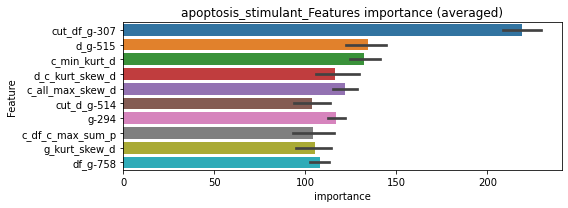

len(train_index) : 2848
len(valid_index) : 950
================================= fold 1/4 apoptosis_stimulant=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2848
len(valid_index) : 950
================================= fold 2/4 apoptosis_stimulant=================================


Early stopping, best iteration is:
[597]	training's binary_logloss: 0.000634024	valid_1's binary_logloss: 0.01153
Training until validation scores don't improve for 30 rounds


len(train_index) : 2849
len(valid_index) : 949


Early stopping, best iteration is:
[659]	training's binary_logloss: 0.000580847	valid_1's binary_logloss: 0.0129505


================================= fold 3/4 apoptosis_stimulant=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[772]	training's binary_logloss: 0.000532247	valid_1's binary_logloss: 0.00742331


len(train_index) : 2849
len(valid_index) : 949
================================= fold 4/4 apoptosis_stimulant=================================


Training until validation scores don't improve for 30 rounds


apoptosis_stimulant logloss: 0.01038030001085359


Early stopping, best iteration is:
[616]	training's binary_logloss: 0.000625987	valid_1's binary_logloss: 0.00961346


aromatase_inhibitor, len(trt): 47, len(othr): 3285
target_rate: 0.0019736 → Adj_target_rate: 0.0022155


selected negative label: 3285


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[444]	training's binary_logloss: 0.000960589	valid_1's binary_logloss: 0.0184918
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[565]	training's binary_logloss: 0.000589237	valid_1's binary_logloss: 0.0177328
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[614]	training's binary_logloss: 0.00054699	valid_1's binary_logloss: 0.0105244
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[686]	training's binary_logloss: 0.000490278	valid_1's binary_logloss: 0.0054025


1 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0050213, Threshold: 0.0130488, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00197
Num_p_label: 40.0, Expected: 7.9, Threshold: 0.0130488, conf_0:0.00913, conf_1:0.01696
Num_p_label: 9.0, Expected: 7.9, Adj_threshold_1: 0.0430488
threshold: 0.0430488, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[539]	training's binary_logloss: 0.00060863	valid_1's binary_logloss: 0.0171693
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[628]	training's binary_logloss: 0.000504494	valid_1's binary_logloss: 0.0157953
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[706]	training's binary_logloss: 0.000486451	valid_1's binary_logloss: 0.0014139
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[627]	training's binary_logloss: 0.000512568	valid_1's binary_logloss: 0.00920386


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0162182, Threshold: 0.0430488, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3806
p_label_rate: 0.0037670 Vs.target_rate: 0.00197
Num_p_label: 15.0, Expected: 7.9, Threshold: 0.0430488, conf_0:0.03444, conf_1:0.05166
threshold: 0.0430488, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 655.0/3806, y_label_rate: 0.1720967
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[472]	training's binary_logloss: 0.000780863	valid_1's binary_logloss: 0.027173
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[650]	training's binary_logloss: 0.000502001	valid_1's binary_logloss: 0.00648866
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[672]	training's binary_logloss: 0.000483881	valid_1's binary_logloss: 0.00476345
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[621]	training's binary_logloss: 0.000523053	valid_1's binary_logloss: 0.00938378


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0168660, Threshold: 0.0430488, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 653.0/3802
p_label_rate: 0.0052737 Vs.target_rate: 0.00197
Num_p_label: 21.0, Expected: 7.9, Threshold: 0.0430488, conf_0:0.03874, conf_1:0.04735
Num_p_label: 11.0, Expected: 7.9, Adj_threshold_1: 0.0730488
threshold: 0.0730488, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 653.0/3802, y_label_rate: 0.1717517


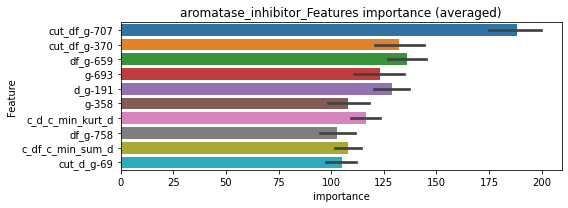

len(train_index) : 2851
len(valid_index) : 951
================================= fold 1/4 aromatase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2851
len(valid_index) : 951
================================= fold 2/4 aromatase_inhibitor=================================


Early stopping, best iteration is:
[442]	training's binary_logloss: 0.000840029	valid_1's binary_logloss: 0.014053
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[716]	training's binary_logloss: 0.000555674	valid_1's binary_logloss: 0.0106783


len(train_index) : 2852
len(valid_index) : 950
================================= fold 3/4 aromatase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[928]	training's binary_logloss: 0.000483453	valid_1's binary_logloss: 0.00355394


len(train_index) : 2852
len(valid_index) : 950
================================= fold 4/4 aromatase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


aromatase_inhibitor logloss: 0.009939292478497088


Early stopping, best iteration is:
[543]	training's binary_logloss: 0.000693985	valid_1's binary_logloss: 0.0114667


atm_kinase_inhibitor, len(trt): 6, len(othr): 3287
target_rate: 0.0002520 → Adj_target_rate: 0.0003851


selected negative label: 3287


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[488]	training's binary_logloss: 0.000153887	valid_1's binary_logloss: 0.000227459
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[490]	training's binary_logloss: 0.000154612	valid_1's binary_logloss: 0.000719943
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[506]	training's binary_logloss: 0.000153212	valid_1's binary_logloss: 0.00018192
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0003610, Threshold: 0.0014255, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00025
Num_p_label: 40.0, Expected: 1.0, Threshold: 0.0014255, conf_0:0.00100, conf_1:0.00185
Num_p_label: 6.0, Expected: 1.0, Adj_threshold_1: 0.0314255
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_2: 0.0614255
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_3: 0.0914255
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_4: 0.1214255
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_5: 0.1514255
Num_p_label: 2.0, Expected: 1.0, Adj_threshold_6: 0.1814255
threshold: 0.1814255, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[505]	training's binary_logloss: 0.000154046	valid_1's binary_logloss: 0.000336899


positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[519]	training's binary_logloss: 0.000146574	valid_1's binary_logloss: 0.000713766
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[497]	training's binary_logloss: 0.000146005	valid_1's binary_logloss: 0.000746854
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[526]	training's binary_logloss: 0.000146133	valid_1's binary_logloss: 0.000153427
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0911852, Threshold: 0.1814255, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0017579 Vs.target_rate: 0.00025
Num_p_label: 7.0, Expected: 1.0, Threshold: 0.1814255, conf_0:0.14514, conf_1:0.21771
Num_p_label: 7.0, Expected: 1.0, Adj_threshold_1: 0.2114255
Num_p_label: 6.0, Expected: 1.0, Adj_threshold_2: 0.2414255
Num_p_label: 6.0, Expected: 1.0, Adj_threshold_3: 0.2714255
Num_p_label: 5.0, Expected: 1.0, Adj_threshold_4: 0.3014255
Num_p_label: 5.0, Expected: 1.0, Adj_threshold_5: 0.3314255
Num_p_label: 5.0, Expected: 1.0, Adj_threshold_6: 0.3614255
Num_p_label: 4.0, Expected: 1.0, Adj_threshold_7: 0.3914255
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_8: 0.4214255
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_9: 0.4514255
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_10: 0.4814255


Early stopping, best iteration is:
[520]	training's binary_logloss: 0.000145211	valid_1's binary_logloss: 0.000848056


threshold: 0.4814255, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[519]	training's binary_logloss: 0.000146574	valid_1's binary_logloss: 0.000713766
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[497]	training's binary_logloss: 0.000146005	valid_1's binary_logloss: 0.000746854
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[526]	training's binary_logloss: 0.000146133	valid_1's binary_logloss: 0.000153427
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0911852, Threshold: 0.4814255, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0007534 Vs.target_rate: 0.00025
Num_p_label: 3.0, Expected: 1.0, Threshold: 0.4814255, conf_0:0.43328, conf_1:0.52957
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_1: 0.5114255
Num_p_label: 2.0, Expected: 1.0, Adj_threshold_2: 0.5414255
threshold: 0.5414255, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[520]	training's binary_logloss: 0.000145211	valid_1's binary_logloss: 0.000848056


positive_y_label: 657.0/3812, y_label_rate: 0.1723505


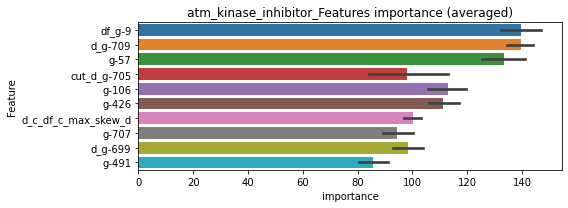

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 atm_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000147885	valid_1's binary_logloss: 0.000555264
Early stopping, best iteration is:
[1069]	training's binary_logloss: 0.000146435	valid_1's binary_logloss: 0.000552868


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 atm_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000148702	valid_1's binary_logloss: 0.000757569


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 atm_kinase_inhibitor=================================


Early stopping, best iteration is:
[1143]	training's binary_logloss: 0.000146101	valid_1's binary_logloss: 0.000752115
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000147077	valid_1's binary_logloss: 0.000159729


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 atm_kinase_inhibitor=================================


Early stopping, best iteration is:
[1130]	training's binary_logloss: 0.000145056	valid_1's binary_logloss: 0.000157427
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000148764	valid_1's binary_logloss: 0.000269825
Early stopping, best iteration is:
[1101]	training's binary_logloss: 0.000146599	valid_1's binary_logloss: 0.000266839


atm_kinase_inhibitor logloss: 0.00043231234106353453
atp-sensitive_potassium_channel_antagonist, len(trt): 7, len(othr): 3288
target_rate: 0.0002939 → Adj_target_rate: 0.0004391


selected negative label: 3288


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[470]	training's binary_logloss: 0.000181229	valid_1's binary_logloss: 0.000815707
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[457]	training's binary_logloss: 0.000180235	valid_1's binary_logloss: 0.00200194
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[472]	training's binary_logloss: 0.000182812	valid_1's binary_logloss: 0.000189762
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0005151, Threshold: 0.0015670, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00029
Num_p_label: 40.0, Expected: 1.2, Threshold: 0.0015670, conf_0:0.00110, conf_1:0.00204
Num_p_label: 0.0, Expected: 1.2, Adj_threshold_1: 0.0315670
threshold: 0.0315670, positive_p_label: 0.0/3982, p_label_rate: 0.0000000


Early stopping, best iteration is:
[519]	training's binary_logloss: 0.000178526	valid_1's binary_logloss: 0.000230303


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[467]	training's binary_logloss: 0.000174642	valid_1's binary_logloss: 0.000277159
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[391]	training's binary_logloss: 0.000204584	valid_1's binary_logloss: 0.00465657
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[485]	training's binary_logloss: 0.000175708	valid_1's binary_logloss: 0.000199158
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0112647, Threshold: 0.0315670, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0007534 Vs.target_rate: 0.00029
Num_p_label: 3.0, Expected: 1.2, Threshold: 0.0315670, conf_0:0.02525, conf_1:0.03788
Num_p_label: 3.0, Expected: 1.2, Adj_threshold_1: 0.0615670
Num_p_label: 2.0, Expected: 1.2, Adj_threshold_2: 0.0915670


Early stopping, best iteration is:
[534]	training's binary_logloss: 0.000172437	valid_1's binary_logloss: 0.000195063


threshold: 0.0915670, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[467]	training's binary_logloss: 0.000174642	valid_1's binary_logloss: 0.000277159
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[391]	training's binary_logloss: 0.000204584	valid_1's binary_logloss: 0.00465657
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[469]	training's binary_logloss: 0.000175708	valid_1's binary_logloss: 0.000199158
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0112647, Threshold: 0.0915670, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0005023 Vs.target_rate: 0.00029
Num_p_label: 2.0, Expected: 1.2, Threshold: 0.0915670, conf_0:0.08241, conf_1:0.10072
threshold: 0.0915670, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[534]	training's binary_logloss: 0.000172437	valid_1's binary_logloss: 0.000195063


positive_y_label: 657.0/3813, y_label_rate: 0.1723053


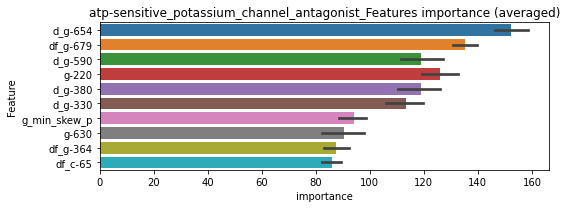

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 atp-sensitive_potassium_channel_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000171646	valid_1's binary_logloss: 0.000222357
Early stopping, best iteration is:
[1059]	training's binary_logloss: 0.000170636	valid_1's binary_logloss: 0.000221169


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 atp-sensitive_potassium_channel_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 atp-sensitive_potassium_channel_antagonist=================================


Early stopping, best iteration is:
[661]	training's binary_logloss: 0.00019158	valid_1's binary_logloss: 0.00253355
Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 atp-sensitive_potassium_channel_antagonist=================================


Early stopping, best iteration is:
[934]	training's binary_logloss: 0.000173794	valid_1's binary_logloss: 0.000192422
Training until validation scores don't improve for 30 rounds


atp-sensitive_potassium_channel_antagonist logloss: 0.0007901453228053182


[1000]	training's binary_logloss: 0.000172714	valid_1's binary_logloss: 0.000214037
Early stopping, best iteration is:
[998]	training's binary_logloss: 0.000172714	valid_1's binary_logloss: 0.000214037


atp_synthase_inhibitor, len(trt): 12, len(othr): 3287
target_rate: 0.0005039 → Adj_target_rate: 0.0006942


selected negative label: 3287


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[500]	training's binary_logloss: 0.000278147	valid_1's binary_logloss: 0.000968324
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[519]	training's binary_logloss: 0.000266691	valid_1's binary_logloss: 0.000536662
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[555]	training's binary_logloss: 0.000263655	valid_1's binary_logloss: 0.000524413
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0012713, Threshold: 0.0110935, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00050
Num_p_label: 40.0, Expected: 2.0, Threshold: 0.0110935, conf_0:0.00777, conf_1:0.01442
Num_p_label: 12.0, Expected: 2.0, Adj_threshold_1: 0.0410935
Num_p_label: 6.0, Expected: 2.0, Adj_threshold_2: 0.0710935
Num_p_label: 4.0, Expected: 2.0, Adj_threshold_3: 0.1010935


Early stopping, best iteration is:
[548]	training's binary_logloss: 0.000266858	valid_1's binary_logloss: 0.000788421


threshold: 0.1010935, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[500]	training's binary_logloss: 0.00025731	valid_1's binary_logloss: 0.000561337
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[517]	training's binary_logloss: 0.000255853	valid_1's binary_logloss: 0.00044518
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[524]	training's binary_logloss: 0.000255512	valid_1's binary_logloss: 0.000356794
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1653212, Threshold: 0.1010935, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0052737 Vs.target_rate: 0.00050
Num_p_label: 21.0, Expected: 2.0, Threshold: 0.1010935, conf_0:0.08087, conf_1:0.12131
Num_p_label: 17.0, Expected: 2.0, Adj_threshold_1: 0.1310935
Num_p_label: 14.0, Expected: 2.0, Adj_threshold_2: 0.1610935
Num_p_label: 11.0, Expected: 2.0, Adj_threshold_3: 0.1910935
Num_p_label: 8.0, Expected: 2.0, Adj_threshold_4: 0.2210935
Num_p_label: 7.0, Expected: 2.0, Adj_threshold_5: 0.2510935
Num_p_label: 6.0, Expected: 2.0, Adj_threshold_6: 0.2810935
Num_p_label: 5.0, Expected: 2.0, Adj_threshold_7: 0.3110935


Early stopping, best iteration is:
[513]	training's binary_logloss: 0.00025258	valid_1's binary_logloss: 0.000633789


threshold: 0.3110935, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[500]	training's binary_logloss: 0.00025731	valid_1's binary_logloss: 0.000561337
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[523]	training's binary_logloss: 0.000255853	valid_1's binary_logloss: 0.00044518
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[524]	training's binary_logloss: 0.000255512	valid_1's binary_logloss: 0.000356794
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1653212, Threshold: 0.3110935, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0012557 Vs.target_rate: 0.00050
Num_p_label: 5.0, Expected: 2.0, Threshold: 0.3110935, conf_0:0.27998, conf_1:0.34220


Early stopping, best iteration is:
[513]	training's binary_logloss: 0.00025258	valid_1's binary_logloss: 0.000633789


threshold: 0.3110935, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


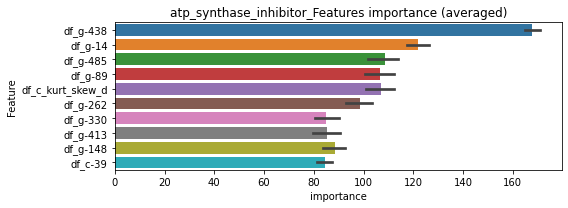

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 atp_synthase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 atp_synthase_inhibitor=================================


Early stopping, best iteration is:
[909]	training's binary_logloss: 0.000257387	valid_1's binary_logloss: 0.000410063
Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 atp_synthase_inhibitor=================================


Early stopping, best iteration is:
[927]	training's binary_logloss: 0.000255444	valid_1's binary_logloss: 0.000460699
Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 atp_synthase_inhibitor=================================


Early stopping, best iteration is:
[845]	training's binary_logloss: 0.000261498	valid_1's binary_logloss: 0.000382278
Training until validation scores don't improve for 30 rounds


atp_synthase_inhibitor logloss: 0.0004841411395095261


Early stopping, best iteration is:
[807]	training's binary_logloss: 0.000260997	valid_1's binary_logloss: 0.000683524


atpase_inhibitor, len(trt): 97, len(othr): 3274
target_rate: 0.0040732 → Adj_target_rate: 0.0041016


selected negative label: 3274


unpredictable_cols:atpase_inhibitor → create_features


N_features:358
================= Pseudo labeling 1 / 3 =================



Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.031157	valid_1's binary_logloss: 0.111607
[2000]	training's binary_logloss: 0.015167	valid_1's binary_logloss: 0.0997927
Early stopping, best iteration is:
[2097]	training's binary_logloss: 0.0144357	valid_1's binary_logloss: 0.0991135
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0318519	valid_1's binary_logloss: 0.0934462
[2000]	training's binary_logloss: 0.015489	valid_1's binary_logloss: 0.0763903
[3000]	training's binary_logloss: 0.0101844	valid_1's binary_logloss: 0.0700022
[4000]	training's binary_logloss: 0.00759509	valid_1's binary_logloss: 0.0667385
Early stopping, best iteration is:
[4344]	training's binary_logloss: 0.00699178	valid_1's binary_logloss: 0.0658794
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0326795	valid_1's binary_logloss: 0.0779482
[2000]	training's binary_log

1 / 3, AUC score:0.996, PR-AUC:0.989
y_Threshold: 0.0419416, Threshold: 0.0866053, pos_neg_ratio: 0.8000000
Remove_noisy_data: 158 → Positive_corect_labels: 641/3770
p_label_rate: 0.0100452 Vs.target_rate: 0.00407
Num_p_label: 40.0, Expected: 16.2, Threshold: 0.0866053, conf_0:0.06062, conf_1:0.11259
Num_p_label: 16.0, Expected: 16.2, Adj_threshold_1: 0.1166053
threshold: 0.1166053, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 641.0/3770, y_label_rate: 0.1700265
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0294456	valid_1's binary_logloss: 0.0821466
[2000]	training's binary_logloss: 0.014374	valid_1's binary_logloss: 0.0652743
[3000]	training's binary_logloss: 0.00945507	valid_1's binary_logloss: 0.0589768
Early stopping, best iteration is:
[3969]	training's binary_logloss: 0.00713115	valid_1's binary_logloss: 0.0556894
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0296224	valid_1's binary_logloss: 0.084646
[2000]	training's binary_logloss: 0.0144609	valid_1's binary_logloss: 0.0699685
[3000]	training's binary_logloss: 0.00951988	valid_1's binary_logloss: 0.0648986
Early stopping, best iteration is:
[3471]	training's binary_logloss: 0.00821185	valid_1's binary_logloss: 0.0636107
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0294519	valid_1's binary_logloss: 0.0801856
[2000]	training's binary_

2 / 3, AUC score:0.998, PR-AUC:0.996
y_Threshold: 0.0658803, Threshold: 0.1166053, pos_neg_ratio: 0.8000000
Remove_noisy_data: 24 → Positive_corect_labels: 629.0/3746
p_label_rate: 0.0077850 Vs.target_rate: 0.00407
Num_p_label: 31.0, Expected: 16.2, Threshold: 0.1166053, conf_0:0.09328, conf_1:0.13993
Num_p_label: 18.0, Expected: 16.2, Adj_threshold_1: 0.1466053
threshold: 0.1466053, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 629.0/3746, y_label_rate: 0.1679124
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0275773	valid_1's binary_logloss: 0.0838878
[2000]	training's binary_logloss: 0.0135447	valid_1's binary_logloss: 0.0701936
[3000]	training's binary_logloss: 0.00896306	valid_1's binary_logloss: 0.0646473
[4000]	training's binary_logloss: 0.00671548	valid_1's binary_logloss: 0.0620403
Early stopping, best iteration is:
[4477]	training's binary_logloss: 0.00601023	valid_1's binary_logloss: 0.0612738
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0285495	valid_1's binary_logloss: 0.0692795
[2000]	training's binary_logloss: 0.0139181	valid_1's binary_logloss: 0.053958
[3000]	training's binary_logloss: 0.00919349	valid_1's binary_logloss: 0.0483507
[4000]	training's binary_logloss: 0.00686198	valid_1's binary_logloss: 0.0454806
Early stopping, best iteration is:
[4418]	training's binary_logloss: 0.00621133	valid_1's binary_logloss: 0.0445381
Tra

3 / 3, AUC score:0.999, PR-AUC:0.998
y_Threshold: 0.0703837, Threshold: 0.1466053, pos_neg_ratio: 0.8000000
Remove_noisy_data: 18 → Positive_corect_labels: 620.0/3728
p_label_rate: 0.0032647 Vs.target_rate: 0.00407
Num_p_label: 13.0, Expected: 16.2, Threshold: 0.1466053, conf_0:0.13194, conf_1:0.16127
threshold: 0.1466053, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 620.0/3728, y_label_rate: 0.1663090


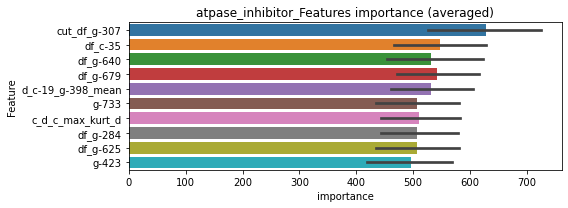

len(train_index) : 2796
len(valid_index) : 932
================================= fold 1/4 atpase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0274909	valid_1's binary_logloss: 0.0722566
[2000]	training's binary_logloss: 0.0134448	valid_1's binary_logloss: 0.0585705
[3000]	training's binary_logloss: 0.00888079	valid_1's binary_logloss: 0.0535444
[4000]	training's binary_logloss: 0.0066513	valid_1's binary_logloss: 0.0511374
Early stopping, best iteration is:
[3983]	training's binary_logloss: 0.00667935	valid_1's binary_logloss: 0.0511257


len(train_index) : 2796
len(valid_index) : 932
================================= fold 2/4 atpase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0280253	valid_1's binary_logloss: 0.0660274
[2000]	training's binary_logloss: 0.0136953	valid_1's binary_logloss: 0.0491883
[3000]	training's binary_logloss: 0.00905419	valid_1's binary_logloss: 0.0430809
[4000]	training's binary_logloss: 0.00677906	valid_1's binary_logloss: 0.0398752
[5000]	training's binary_logloss: 0.00544158	valid_1's binary_logloss: 0.0379501
[6000]	training's binary_logloss: 0.00455353	valid_1's binary_logloss: 0.0364171
Early stopping, best iteration is:
[6029]	training's binary_logloss: 0.0045321	valid_1's binary_logloss: 0.036371


len(train_index) : 2796
len(valid_index) : 932
================================= fold 3/4 atpase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0272835	valid_1's binary_logloss: 0.0720634
[2000]	training's binary_logloss: 0.0133223	valid_1's binary_logloss: 0.0571548
[3000]	training's binary_logloss: 0.00879777	valid_1's binary_logloss: 0.0519345
[4000]	training's binary_logloss: 0.00659438	valid_1's binary_logloss: 0.0493937
Early stopping, best iteration is:
[4652]	training's binary_logloss: 0.00566859	valid_1's binary_logloss: 0.0482056


len(train_index) : 2796
len(valid_index) : 932
================================= fold 4/4 atpase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.027556	valid_1's binary_logloss: 0.0722467
[2000]	training's binary_logloss: 0.013483	valid_1's binary_logloss: 0.0557901
[3000]	training's binary_logloss: 0.00889215	valid_1's binary_logloss: 0.0494894
Early stopping, best iteration is:
[3504]	training's binary_logloss: 0.00760473	valid_1's binary_logloss: 0.0475883


atpase_inhibitor logloss: 0.04582264430496926
atpase_inhibitor is unpredictable(><)!
atr_kinase_inhibitor, len(trt): 19, len(othr): 3286
target_rate: 0.0007979 → Adj_target_rate: 0.0010260


selected negative label: 3286


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[606]	training's binary_logloss: 0.000342072	valid_1's binary_logloss: 0.000869368
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[594]	training's binary_logloss: 0.000330659	valid_1's binary_logloss: 0.0019716
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[610]	training's binary_logloss: 0.000338412	valid_1's binary_logloss: 0.00092465
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0017566, Threshold: 0.0081469, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00080
Num_p_label: 40.0, Expected: 3.2, Threshold: 0.0081469, conf_0:0.00570, conf_1:0.01059
Num_p_label: 12.0, Expected: 3.2, Adj_threshold_1: 0.0381469
Num_p_label: 6.0, Expected: 3.2, Adj_threshold_2: 0.0681469


Early stopping, best iteration is:
[554]	training's binary_logloss: 0.000339122	valid_1's binary_logloss: 0.00341912


threshold: 0.0681469, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[552]	training's binary_logloss: 0.000333658	valid_1's binary_logloss: 0.000798508
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[576]	training's binary_logloss: 0.000320817	valid_1's binary_logloss: 0.00253007
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[575]	training's binary_logloss: 0.000325105	valid_1's binary_logloss: 0.000554648
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0552704, Threshold: 0.0681469, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0042692 Vs.target_rate: 0.00080
Num_p_label: 17.0, Expected: 3.2, Threshold: 0.0681469, conf_0:0.05452, conf_1:0.08178
Num_p_label: 14.0, Expected: 3.2, Adj_threshold_1: 0.0981469
Num_p_label: 11.0, Expected: 3.2, Adj_threshold_2: 0.1281469


Early stopping, best iteration is:
[546]	training's binary_logloss: 0.000328005	valid_1's binary_logloss: 0.00304214


Num_p_label: 10.0, Expected: 3.2, Adj_threshold_3: 0.1581469
Num_p_label: 9.0, Expected: 3.2, Adj_threshold_4: 0.1881469
Num_p_label: 9.0, Expected: 3.2, Adj_threshold_5: 0.2181469
Num_p_label: 8.0, Expected: 3.2, Adj_threshold_6: 0.2481469
Num_p_label: 8.0, Expected: 3.2, Adj_threshold_7: 0.2781469
Num_p_label: 8.0, Expected: 3.2, Adj_threshold_8: 0.3081469
Num_p_label: 7.0, Expected: 3.2, Adj_threshold_9: 0.3381469
threshold: 0.3381469, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[552]	training's binary_logloss: 0.000333658	valid_1's binary_logloss: 0.000798508
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[576]	training's binary_logloss: 0.000320817	valid_1's binary_logloss: 0.00253007
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[575]	training's binary_logloss: 0.000325105	valid_1's binary_logloss: 0.000554648
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[546]	training's binary_logloss: 0.000328005	valid_1's binary_logloss: 0.00304214


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0552704, Threshold: 0.3381469, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0017579 Vs.target_rate: 0.00080
Num_p_label: 7.0, Expected: 3.2, Threshold: 0.3381469, conf_0:0.30433, conf_1:0.37196
threshold: 0.3381469, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


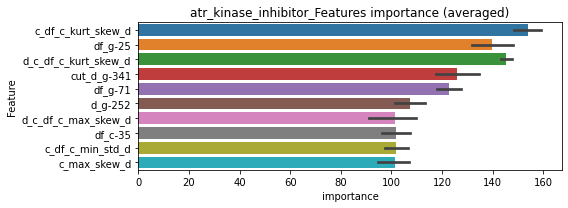

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 atr_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[819]	training's binary_logloss: 0.000333752	valid_1's binary_logloss: 0.000818844


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 atr_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[910]	training's binary_logloss: 0.000323222	valid_1's binary_logloss: 0.0016882


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 atr_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[863]	training's binary_logloss: 0.000331898	valid_1's binary_logloss: 0.000592855


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 atr_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[869]	training's binary_logloss: 0.000326402	valid_1's binary_logloss: 0.00220129


atr_kinase_inhibitor logloss: 0.0013252845849147162
aurora_kinase_inhibitor, len(trt): 96, len(othr): 3276
target_rate: 0.0040312 → Adj_target_rate: 0.0040656


selected negative label: 3276


unpredictable_cols:aurora_kinase_inhibitor → create_features


N_features:358
================= Pseudo labeling 1 / 3 =================



Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0342764	valid_1's binary_logloss: 0.104203
[2000]	training's binary_logloss: 0.0166136	valid_1's binary_logloss: 0.0849468
[3000]	training's binary_logloss: 0.0108905	valid_1's binary_logloss: 0.0781842
Early stopping, best iteration is:
[3801]	training's binary_logloss: 0.00852396	valid_1's binary_logloss: 0.0752867
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0350166	valid_1's binary_logloss: 0.0881016
[2000]	training's binary_logloss: 0.016875	valid_1's binary_logloss: 0.0664642
[3000]	training's binary_logloss: 0.0110546	valid_1's binary_logloss: 0.0584429
[4000]	training's binary_logloss: 0.00823384	valid_1's binary_logloss: 0.0540286
[5000]	training's binary_logloss: 0.00658307	valid_1's binary_logloss: 0.0512915
Early stopping, best iteration is:
[5270]	training's binary_logloss: 0.00624908	valid_1's binary_logloss: 0.050752
Traini

1 / 3, AUC score:0.994, PR-AUC:0.987
y_Threshold: 0.0385301, Threshold: 0.1802713, pos_neg_ratio: 0.8000000
Remove_noisy_data: 162 → Positive_corect_labels: 640/3769
p_label_rate: 0.0100452 Vs.target_rate: 0.00403
Num_p_label: 40.0, Expected: 16.1, Threshold: 0.1802713, conf_0:0.12619, conf_1:0.23435
Num_p_label: 28.0, Expected: 16.1, Adj_threshold_1: 0.2102713
Num_p_label: 19.0, Expected: 16.1, Adj_threshold_2: 0.2402713
threshold: 0.2402713, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 640.0/3769, y_label_rate: 0.1698063
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0315322	valid_1's binary_logloss: 0.0942523
[2000]	training's binary_logloss: 0.0152394	valid_1's binary_logloss: 0.0763357
[3000]	training's binary_logloss: 0.0100179	valid_1's binary_logloss: 0.070445
[4000]	training's binary_logloss: 0.0074784	valid_1's binary_logloss: 0.0673848
Early stopping, best iteration is:
[4327]	training's binary_logloss: 0.00690831	valid_1's binary_logloss: 0.0666268
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0311963	valid_1's binary_logloss: 0.0815819
[2000]	training's binary_logloss: 0.0151535	valid_1's binary_logloss: 0.0631784
[3000]	training's binary_logloss: 0.00995766	valid_1's binary_logloss: 0.0563969
[4000]	training's binary_logloss: 0.00745222	valid_1's binary_logloss: 0.0526598
[5000]	training's binary_logloss: 0.00596901	valid_1's binary_logloss: 0.0504103
[6000]	training's binary_logloss: 0.0049

2 / 3, AUC score:0.998, PR-AUC:0.996
y_Threshold: 0.0694056, Threshold: 0.2402713, pos_neg_ratio: 0.8000000
Remove_noisy_data: 22 → Positive_corect_labels: 629.0/3747
p_label_rate: 0.0138122 Vs.target_rate: 0.00403
Num_p_label: 55.0, Expected: 16.1, Threshold: 0.2402713, conf_0:0.19222, conf_1:0.28833
Num_p_label: 45.0, Expected: 16.1, Adj_threshold_1: 0.2702713
Num_p_label: 38.0, Expected: 16.1, Adj_threshold_2: 0.3002713
Num_p_label: 32.0, Expected: 16.1, Adj_threshold_3: 0.3302713
Num_p_label: 24.0, Expected: 16.1, Adj_threshold_4: 0.3602713
threshold: 0.3602713, positive_p_label: 24.0/3982, p_label_rate: 0.0060271
positive_y_label: 629.0/3747, y_label_rate: 0.1678676
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0294635	valid_1's binary_logloss: 0.0957914
[2000]	training's binary_logloss: 0.014302	valid_1's binary_logloss: 0.0779628
[3000]	training's binary_logloss: 0.0094353	valid_1's binary_logloss: 0.0714334
Early stopping, best iteration is:
[3255]	training's binary_logloss: 0.00867363	valid_1's binary_logloss: 0.0704005
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0305306	valid_1's binary_logloss: 0.0699654
[2000]	training's binary_logloss: 0.014815	valid_1's binary_logloss: 0.0497846
[3000]	training's binary_logloss: 0.00975351	valid_1's binary_logloss: 0.0422575
[4000]	training's binary_logloss: 0.0072852	valid_1's binary_logloss: 0.0383661
[5000]	training's binary_logloss: 0.00583589	valid_1's binary_logloss: 0.0360013
[6000]	training's binary_logloss: 0.00488832	valid_1's binary_logloss: 0.0341501
[7000]	training's binary_logloss: 0.00421

3 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0809411, Threshold: 0.3602713, pos_neg_ratio: 0.8000000
Remove_noisy_data: 10 → Positive_corect_labels: 624.0/3737
p_label_rate: 0.0045203 Vs.target_rate: 0.00403
Num_p_label: 18.0, Expected: 16.1, Threshold: 0.3602713, conf_0:0.32424, conf_1:0.39630
threshold: 0.3602713, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 624.0/3737, y_label_rate: 0.1669789


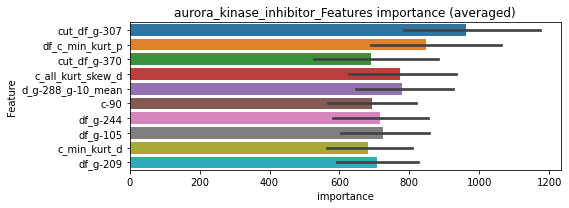

len(train_index) : 2802
len(valid_index) : 935
================================= fold 1/4 aurora_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.030117	valid_1's binary_logloss: 0.0803003
[2000]	training's binary_logloss: 0.0145918	valid_1's binary_logloss: 0.0597836
[3000]	training's binary_logloss: 0.00961851	valid_1's binary_logloss: 0.0522891
[4000]	training's binary_logloss: 0.007191	valid_1's binary_logloss: 0.0483587
[5000]	training's binary_logloss: 0.00577376	valid_1's binary_logloss: 0.0458976
[6000]	training's binary_logloss: 0.0048286	valid_1's binary_logloss: 0.0439622
[7000]	training's binary_logloss: 0.00416307	valid_1's binary_logloss: 0.0425947
[8000]	training's binary_logloss: 0.00366797	valid_1's binary_logloss: 0.041507
Early stopping, best iteration is:
[8729]	training's binary_logloss: 0.00337873	valid_1's binary_logloss: 0.040879


len(train_index) : 2803
len(valid_index) : 934
================================= fold 2/4 aurora_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0297695	valid_1's binary_logloss: 0.0802887
[2000]	training's binary_logloss: 0.0144495	valid_1's binary_logloss: 0.0637681
[3000]	training's binary_logloss: 0.00951793	valid_1's binary_logloss: 0.05746
Early stopping, best iteration is:
[3330]	training's binary_logloss: 0.00856368	valid_1's binary_logloss: 0.0561406


len(train_index) : 2803
len(valid_index) : 934
================================= fold 3/4 aurora_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0304594	valid_1's binary_logloss: 0.071992
[2000]	training's binary_logloss: 0.0146843	valid_1's binary_logloss: 0.0530367
[3000]	training's binary_logloss: 0.00967914	valid_1's binary_logloss: 0.0462077
[4000]	training's binary_logloss: 0.00724052	valid_1's binary_logloss: 0.0425951
Early stopping, best iteration is:
[4275]	training's binary_logloss: 0.00677235	valid_1's binary_logloss: 0.0417885


len(train_index) : 2803
len(valid_index) : 934
================================= fold 4/4 aurora_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0294544	valid_1's binary_logloss: 0.0842137
[2000]	training's binary_logloss: 0.0141887	valid_1's binary_logloss: 0.0659455
[3000]	training's binary_logloss: 0.00935143	valid_1's binary_logloss: 0.0598272
[4000]	training's binary_logloss: 0.00699767	valid_1's binary_logloss: 0.0563361
[5000]	training's binary_logloss: 0.00561181	valid_1's binary_logloss: 0.0541281
Early stopping, best iteration is:
[5372]	training's binary_logloss: 0.00523017	valid_1's binary_logloss: 0.0534795


aurora_kinase_inhibitor logloss: 0.04807000813977334
aurora_kinase_inhibitor is unpredictable(><)!
autotaxin_inhibitor, len(trt): 6, len(othr): 3289
target_rate: 0.0002520 → Adj_target_rate: 0.0003851


selected negative label: 3289


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[524]	training's binary_logloss: 0.000161528	valid_1's binary_logloss: 0.000238182
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[483]	training's binary_logloss: 0.000164328	valid_1's binary_logloss: 0.00148819
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[490]	training's binary_logloss: 0.000165598	valid_1's binary_logloss: 0.000204329
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0005280, Threshold: 0.0038908, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00025
Num_p_label: 40.0, Expected: 1.0, Threshold: 0.0038908, conf_0:0.00272, conf_1:0.00506
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_1: 0.0338908
Num_p_label: 2.0, Expected: 1.0, Adj_threshold_2: 0.0638908
threshold: 0.0638908, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[515]	training's binary_logloss: 0.00016127	valid_1's binary_logloss: 0.000277561


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[528]	training's binary_logloss: 0.000146987	valid_1's binary_logloss: 0.000642964
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[500]	training's binary_logloss: 0.000148479	valid_1's binary_logloss: 0.00018679
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[531]	training's binary_logloss: 0.000146628	valid_1's binary_logloss: 0.000173715
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1268334, Threshold: 0.0638908, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0097941 Vs.target_rate: 0.00025
Num_p_label: 39.0, Expected: 1.0, Threshold: 0.0638908, conf_0:0.05111, conf_1:0.07667
Num_p_label: 34.0, Expected: 1.0, Adj_threshold_1: 0.0938908
Num_p_label: 32.0, Expected: 1.0, Adj_threshold_2: 0.1238908
Num_p_label: 28.0, Expected: 1.0, Adj_threshold_3: 0.1538908
Num_p_label: 24.0, Expected: 1.0, Adj_threshold_4: 0.1838908
Num_p_label: 18.0, Expected: 1.0, Adj_threshold_5: 0.2138908
Num_p_label: 17.0, Expected: 1.0, Adj_threshold_6: 0.2438908
Num_p_label: 17.0, Expected: 1.0, Adj_threshold_7: 0.2738908
Num_p_label: 15.0, Expected: 1.0, Adj_threshold_8: 0.3038908
Num_p_label: 14.0, Expected: 1.0, Adj_threshold_9: 0.3338908
Num_p_label: 10.0, Expected: 1.0, Adj_threshold_10: 0.3638908


Early stopping, best iteration is:
[521]	training's binary_logloss: 0.000148677	valid_1's binary_logloss: 0.000155695


threshold: 0.3638908, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[528]	training's binary_logloss: 0.000146987	valid_1's binary_logloss: 0.000642964
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[513]	training's binary_logloss: 0.000148479	valid_1's binary_logloss: 0.00018679
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[530]	training's binary_logloss: 0.000146628	valid_1's binary_logloss: 0.000173715
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1268334, Threshold: 0.3638908, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0025113 Vs.target_rate: 0.00025
Num_p_label: 10.0, Expected: 1.0, Threshold: 0.3638908, conf_0:0.32750, conf_1:0.40028
Num_p_label: 9.0, Expected: 1.0, Adj_threshold_1: 0.3938908
Num_p_label: 8.0, Expected: 1.0, Adj_threshold_2: 0.4238908
Num_p_label: 7.0, Expected: 1.0, Adj_threshold_3: 0.4538908
Num_p_label: 6.0, Expected: 1.0, Adj_threshold_4: 0.4838908
Num_p_label: 6.0, Expected: 1.0, Adj_threshold_5: 0.5138908
Num_p_label: 6.0, Expected: 1.0, Adj_threshold_6: 0.5438908
Num_p_label: 6.0, Expected: 1.0, Adj_threshold_7: 0.5738908
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_8: 0.6038908
Num_p_label: 2.0, Expected: 1.0, Adj_threshold_9: 0.6338908


Early stopping, best iteration is:
[521]	training's binary_logloss: 0.000148677	valid_1's binary_logloss: 0.000155695


threshold: 0.6338908, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


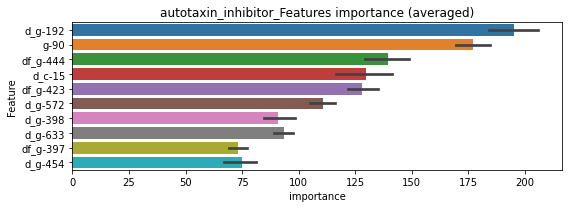

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 autotaxin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000151908	valid_1's binary_logloss: 0.000466838


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 autotaxin_inhibitor=================================


Early stopping, best iteration is:
[1218]	training's binary_logloss: 0.000148313	valid_1's binary_logloss: 0.000459957
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00015206	valid_1's binary_logloss: 0.000203509
Early stopping, best iteration is:
[1042]	training's binary_logloss: 0.000151114	valid_1's binary_logloss: 0.000202388


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 autotaxin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000152854	valid_1's binary_logloss: 0.000190399


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 autotaxin_inhibitor=================================


Early stopping, best iteration is:
[1109]	training's binary_logloss: 0.000150149	valid_1's binary_logloss: 0.000187077
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000153097	valid_1's binary_logloss: 0.000160742


autotaxin_inhibitor logloss: 0.0002519036501231214


Early stopping, best iteration is:
[1125]	training's binary_logloss: 0.000150414	valid_1's binary_logloss: 0.000157974


bacterial_30s_ribosomal_subunit_inhibitor, len(trt): 60, len(othr): 3282
target_rate: 0.0025195 → Adj_target_rate: 0.0027266


selected negative label: 3282


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[617]	training's binary_logloss: 0.000674427	valid_1's binary_logloss: 0.0328004
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[527]	training's binary_logloss: 0.000934841	valid_1's binary_logloss: 0.0299105
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[788]	training's binary_logloss: 0.000548193	valid_1's binary_logloss: 0.00375501
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[658]	training's binary_logloss: 0.000644783	valid_1's binary_logloss: 0.0174785


1 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0064088, Threshold: 0.0211759, pos_neg_ratio: 0.8000000
Remove_noisy_data: 136 → Positive_corect_labels: 654/3802
p_label_rate: 0.0100452 Vs.target_rate: 0.00252
Num_p_label: 40.0, Expected: 10.0, Threshold: 0.0211759, conf_0:0.01482, conf_1:0.02753
Num_p_label: 12.0, Expected: 10.0, Adj_threshold_1: 0.0511759
threshold: 0.0511759, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 654.0/3802, y_label_rate: 0.1720147
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[501]	training's binary_logloss: 0.000946374	valid_1's binary_logloss: 0.0291401
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[622]	training's binary_logloss: 0.000673597	valid_1's binary_logloss: 0.0108783
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[647]	training's binary_logloss: 0.00062771	valid_1's binary_logloss: 0.0188605
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0296312, Threshold: 0.0511759, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[510]	training's binary_logloss: 0.000925274	valid_1's binary_logloss: 0.0232123


Remove_noisy_data: 8 → Positive_corect_labels: 650.0/3794
p_label_rate: 0.0110497 Vs.target_rate: 0.00252
Num_p_label: 44.0, Expected: 10.0, Threshold: 0.0511759, conf_0:0.04094, conf_1:0.06141
Num_p_label: 29.0, Expected: 10.0, Adj_threshold_1: 0.0811759
Num_p_label: 20.0, Expected: 10.0, Adj_threshold_2: 0.1111759
Num_p_label: 17.0, Expected: 10.0, Adj_threshold_3: 0.1411759
Num_p_label: 11.0, Expected: 10.0, Adj_threshold_4: 0.1711759
threshold: 0.1711759, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 650.0/3794, y_label_rate: 0.1713231
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[615]	training's binary_logloss: 0.000635196	valid_1's binary_logloss: 0.0257505
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[516]	training's binary_logloss: 0.000852929	valid_1's binary_logloss: 0.0308802
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[681]	training's binary_logloss: 0.000568111	valid_1's binary_logloss: 0.014579
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[722]	training's binary_logloss: 0.000544251	valid_1's binary_logloss: 0.00898314


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0259088, Threshold: 0.1711759, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 647.0/3788
p_label_rate: 0.0035158 Vs.target_rate: 0.00252
Num_p_label: 14.0, Expected: 10.0, Threshold: 0.1711759, conf_0:0.15406, conf_1:0.18829
threshold: 0.1711759, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 647.0/3788, y_label_rate: 0.1708025


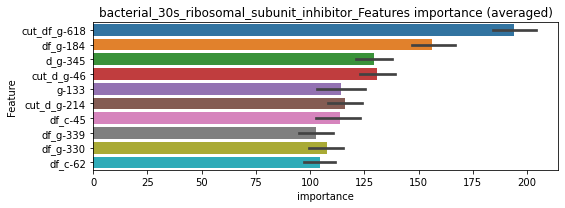

len(train_index) : 2841
len(valid_index) : 947
================================= fold 1/4 bacterial_30s_ribosomal_subunit_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[754]	training's binary_logloss: 0.000616433	valid_1's binary_logloss: 0.010997


len(train_index) : 2841
len(valid_index) : 947
================================= fold 2/4 bacterial_30s_ribosomal_subunit_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2841
len(valid_index) : 947
================================= fold 3/4 bacterial_30s_ribosomal_subunit_inhibitor=================================


Early stopping, best iteration is:
[418]	training's binary_logloss: 0.0010711	valid_1's binary_logloss: 0.0176817
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[677]	training's binary_logloss: 0.000661477	valid_1's binary_logloss: 0.0210007


len(train_index) : 2841
len(valid_index) : 947
================================= fold 4/4 bacterial_30s_ribosomal_subunit_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[893]	training's binary_logloss: 0.000548267	valid_1's binary_logloss: 0.0136674


bacterial_30s_ribosomal_subunit_inhibitor logloss: 0.015836706918716147
bacterial_50s_ribosomal_subunit_inhibitor, len(trt): 80, len(othr): 3282
target_rate: 0.0033594 → Adj_target_rate: 0.0034820


selected negative label: 3282


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[591]	training's binary_logloss: 0.000952094	valid_1's binary_logloss: 0.0449473
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[633]	training's binary_logloss: 0.000895604	valid_1's binary_logloss: 0.0233848
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[516]	training's binary_logloss: 0.0012646	valid_1's binary_logloss: 0.0365572
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[530]	training's binary_logloss: 0.00123718	valid_1's binary_logloss: 0.0526023


1 / 3, AUC score:0.997, PR-AUC:0.994
y_Threshold: 0.0091765, Threshold: 0.0262137, pos_neg_ratio: 0.8000000
Remove_noisy_data: 148 → Positive_corect_labels: 648/3790
p_label_rate: 0.0100452 Vs.target_rate: 0.00336
Num_p_label: 40.0, Expected: 13.4, Threshold: 0.0262137, conf_0:0.01835, conf_1:0.03408
Num_p_label: 12.0, Expected: 13.4, Adj_threshold_1: 0.0562137
threshold: 0.0562137, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 648.0/3790, y_label_rate: 0.1709763
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[725]	training's binary_logloss: 0.000651236	valid_1's binary_logloss: 0.028178
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[556]	training's binary_logloss: 0.000993976	valid_1's binary_logloss: 0.0288486
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.000869093	valid_1's binary_logloss: 0.0380321
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[785]	training's binary_logloss: 0.00061325	valid_1's binary_logloss: 0.0219835


2 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0312413, Threshold: 0.0562137, pos_neg_ratio: 0.8000000
Remove_noisy_data: 12 → Positive_corect_labels: 642.0/3778
p_label_rate: 0.0082873 Vs.target_rate: 0.00336
Num_p_label: 33.0, Expected: 13.4, Threshold: 0.0562137, conf_0:0.04497, conf_1:0.06746
Num_p_label: 15.0, Expected: 13.4, Adj_threshold_1: 0.0862137
threshold: 0.0862137, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 642.0/3778, y_label_rate: 0.1699312
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[776]	training's binary_logloss: 0.000593791	valid_1's binary_logloss: 0.0319193
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[719]	training's binary_logloss: 0.00063104	valid_1's binary_logloss: 0.0234772
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[657]	training's binary_logloss: 0.000752494	valid_1's binary_logloss: 0.0163812
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[649]	training's binary_logloss: 0.00074612	valid_1's binary_logloss: 0.0237039


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0280538, Threshold: 0.0862137, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 639.0/3772
p_label_rate: 0.0045203 Vs.target_rate: 0.00336
Num_p_label: 18.0, Expected: 13.4, Threshold: 0.0862137, conf_0:0.07759, conf_1:0.09484
threshold: 0.0862137, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 639.0/3772, y_label_rate: 0.1694062


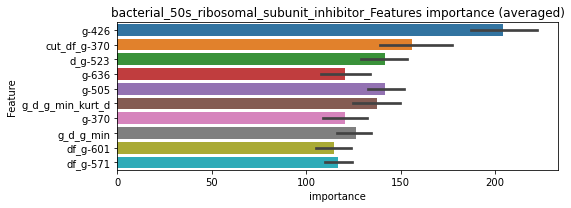

len(train_index) : 2829
len(valid_index) : 943
================================= fold 1/4 bacterial_50s_ribosomal_subunit_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2829
len(valid_index) : 943
================================= fold 2/4 bacterial_50s_ribosomal_subunit_inhibitor=================================


Early stopping, best iteration is:
[471]	training's binary_logloss: 0.00112042	valid_1's binary_logloss: 0.0365401
Training until validation scores don't improve for 30 rounds


len(train_index) : 2829
len(valid_index) : 943
================================= fold 3/4 bacterial_50s_ribosomal_subunit_inhibitor=================================


Early stopping, best iteration is:
[521]	training's binary_logloss: 0.00104394	valid_1's binary_logloss: 0.0233264
Training until validation scores don't improve for 30 rounds


len(train_index) : 2829
len(valid_index) : 943


Early stopping, best iteration is:
[560]	training's binary_logloss: 0.000970243	valid_1's binary_logloss: 0.0200943


================================= fold 4/4 bacterial_50s_ribosomal_subunit_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[610]	training's binary_logloss: 0.000885104	valid_1's binary_logloss: 0.0234945


bacterial_50s_ribosomal_subunit_inhibitor logloss: 0.025863823080983624
bacterial_antifolate, len(trt): 36, len(othr): 3286
target_rate: 0.0015117 → Adj_target_rate: 0.0017663


selected negative label: 3286


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[624]	training's binary_logloss: 0.000438782	valid_1's binary_logloss: 0.00541629
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[633]	training's binary_logloss: 0.000428071	valid_1's binary_logloss: 0.00951524
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[656]	training's binary_logloss: 0.000431475	valid_1's binary_logloss: 0.00328605
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[646]	training's binary_logloss: 0.000427582	valid_1's binary_logloss: 0.00400696


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0028181, Threshold: 0.0181039, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00151
Num_p_label: 40.0, Expected: 6.0, Threshold: 0.0181039, conf_0:0.01267, conf_1:0.02354
Num_p_label: 23.0, Expected: 6.0, Adj_threshold_1: 0.0481039
Num_p_label: 11.0, Expected: 6.0, Adj_threshold_2: 0.0781039
threshold: 0.0781039, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[657]	training's binary_logloss: 0.000417194	valid_1's binary_logloss: 0.00481503
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[590]	training's binary_logloss: 0.000439771	valid_1's binary_logloss: 0.0105054
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[676]	training's binary_logloss: 0.000421236	valid_1's binary_logloss: 0.00294765
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[595]	training's binary_logloss: 0.00043953	valid_1's binary_logloss: 0.00444519


y_Threshold: 0.0605757, Threshold: 0.0781039, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3809
p_label_rate: 0.0110497 Vs.target_rate: 0.00151
Num_p_label: 44.0, Expected: 6.0, Threshold: 0.0781039, conf_0:0.06248, conf_1:0.09372
Num_p_label: 41.0, Expected: 6.0, Adj_threshold_1: 0.1081039
Num_p_label: 38.0, Expected: 6.0, Adj_threshold_2: 0.1381039
Num_p_label: 33.0, Expected: 6.0, Adj_threshold_3: 0.1681039
Num_p_label: 30.0, Expected: 6.0, Adj_threshold_4: 0.1981039
Num_p_label: 27.0, Expected: 6.0, Adj_threshold_5: 0.2281039
Num_p_label: 26.0, Expected: 6.0, Adj_threshold_6: 0.2581039
Num_p_label: 24.0, Expected: 6.0, Adj_threshold_7: 0.2881039
Num_p_label: 21.0, Expected: 6.0, Adj_threshold_8: 0.3181039
Num_p_label: 21.0, Expected: 6.0, Adj_threshold_9: 0.3481039
Num_p_label: 20.0, Expected: 6.0, Adj_threshold_10: 0.3781039
threshold: 0.3781039, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 656.0/3809, y_label_rate: 0.1722

Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[591]	training's binary_logloss: 0.000431205	valid_1's binary_logloss: 0.0109242
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[609]	training's binary_logloss: 0.00042581	valid_1's binary_logloss: 0.00565466
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[556]	training's binary_logloss: 0.000484481	valid_1's binary_logloss: 0.00313246
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0746355, Threshold: 0.3781039, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[597]	training's binary_logloss: 0.000435773	valid_1's binary_logloss: 0.00310599


Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3809
p_label_rate: 0.0060271 Vs.target_rate: 0.00151
Num_p_label: 24.0, Expected: 6.0, Threshold: 0.3781039, conf_0:0.34029, conf_1:0.41591
Num_p_label: 23.0, Expected: 6.0, Adj_threshold_1: 0.4081039
Num_p_label: 20.0, Expected: 6.0, Adj_threshold_2: 0.4381039
Num_p_label: 19.0, Expected: 6.0, Adj_threshold_3: 0.4681039
Num_p_label: 18.0, Expected: 6.0, Adj_threshold_4: 0.4981039
Num_p_label: 17.0, Expected: 6.0, Adj_threshold_5: 0.5281039
Num_p_label: 17.0, Expected: 6.0, Adj_threshold_6: 0.5581039
Num_p_label: 13.0, Expected: 6.0, Adj_threshold_7: 0.5881039
threshold: 0.5881039, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 656.0/3809, y_label_rate: 0.1722237


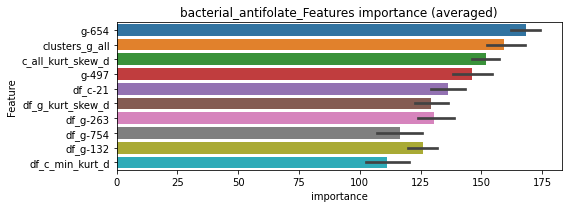

len(train_index) : 2856
len(valid_index) : 953
================================= fold 1/4 bacterial_antifolate=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[761]	training's binary_logloss: 0.000450467	valid_1's binary_logloss: 0.00890348


len(train_index) : 2857
len(valid_index) : 952
================================= fold 2/4 bacterial_antifolate=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[933]	training's binary_logloss: 0.000419675	valid_1's binary_logloss: 0.00371109


len(train_index) : 2857
len(valid_index) : 952
================================= fold 3/4 bacterial_antifolate=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[867]	training's binary_logloss: 0.00043456	valid_1's binary_logloss: 0.00304422


len(train_index) : 2857
len(valid_index) : 952
================================= fold 4/4 bacterial_antifolate=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000413786	valid_1's binary_logloss: 0.00276184
Early stopping, best iteration is:
[982]	training's binary_logloss: 0.000413786	valid_1's binary_logloss: 0.00276184


bacterial_antifolate logloss: 0.004606857747218308


mutually exclusive columns: bacterial_cell_wall_synthesis_inhibitor


bacterial_cell_wall_synthesis_inhibitor, len(trt): 192, len(othr): 6396
target_rate: 0.0080625 → Adj_target_rate: 0.0073283


selected negative label: 6396


unpredictable_cols:bacterial_cell_wall_synthesis_inhibitor → create_features


N_features:358
================= Pseudo labeling 1 / 3 =================



Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.032442	valid_1's binary_logloss: 0.104096
[2000]	training's binary_logloss: 0.0159112	valid_1's binary_logloss: 0.0922976
Early stopping, best iteration is:
[2102]	training's binary_logloss: 0.0151333	valid_1's binary_logloss: 0.0917442
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0326984	valid_1's binary_logloss: 0.0937982
[2000]	training's binary_logloss: 0.0157445	valid_1's binary_logloss: 0.0827551
[3000]	training's binary_logloss: 0.0103321	valid_1's binary_logloss: 0.0794527
Early stopping, best iteration is:
[3005]	training's binary_logloss: 0.0103144	valid_1's binary_logloss: 0.0793952
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0338778	valid_1's binary_logloss: 0.079757
[2000]	training's binary_logloss: 0.0164616	valid_1's binary_logloss: 0.0679882
[3000]	training's binary_logl

1 / 3, AUC score:0.988, PR-AUC:0.974
y_Threshold: 0.0490929, Threshold: 0.0979592, pos_neg_ratio: 0.8000000
Remove_noisy_data: 360 → Positive_corect_labels: 1227/7315
p_label_rate: 0.0100452 Vs.target_rate: 0.00806
Num_p_label: 40.0, Expected: 32.1, Threshold: 0.0979592, conf_0:0.06857, conf_1:0.12735
threshold: 0.0979592, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1227.0/7315, y_label_rate: 0.1677375
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0263317	valid_1's binary_logloss: 0.0693887
[2000]	training's binary_logloss: 0.0125928	valid_1's binary_logloss: 0.0577298
[3000]	training's binary_logloss: 0.00820574	valid_1's binary_logloss: 0.0540846
Early stopping, best iteration is:
[3060]	training's binary_logloss: 0.00803723	valid_1's binary_logloss: 0.0539462
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0266343	valid_1's binary_logloss: 0.0720435
[2000]	training's binary_logloss: 0.0127351	valid_1's binary_logloss: 0.0591529
Early stopping, best iteration is:
[2878]	training's binary_logloss: 0.00864643	valid_1's binary_logloss: 0.0551656
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0265141	valid_1's binary_logloss: 0.0711015
[2000]	training's binary_logloss: 0.0126698	valid_1's binary_logloss: 0.0593342
Early stopping, best ite

2 / 3, AUC score:0.998, PR-AUC:0.993
y_Threshold: 0.0813983, Threshold: 0.0979592, pos_neg_ratio: 0.8000000
Remove_noisy_data: 90 → Positive_corect_labels: 1182.0/7225
p_label_rate: 0.0193370 Vs.target_rate: 0.00806
Num_p_label: 77.0, Expected: 32.1, Threshold: 0.0979592, conf_0:0.07837, conf_1:0.11755
Num_p_label: 52.0, Expected: 32.1, Adj_threshold_1: 0.1279592
Num_p_label: 35.0, Expected: 32.1, Adj_threshold_2: 0.1579592
threshold: 0.1579592, positive_p_label: 35.0/3982, p_label_rate: 0.0087896
positive_y_label: 1182.0/7225, y_label_rate: 0.1635986
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0225773	valid_1's binary_logloss: 0.0593724
[2000]	training's binary_logloss: 0.0109129	valid_1's binary_logloss: 0.0486127
[3000]	training's binary_logloss: 0.00716301	valid_1's binary_logloss: 0.0453043
Early stopping, best iteration is:
[3237]	training's binary_logloss: 0.00662581	valid_1's binary_logloss: 0.0447
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0223469	valid_1's binary_logloss: 0.0611808
[2000]	training's binary_logloss: 0.0108434	valid_1's binary_logloss: 0.0501034
Early stopping, best iteration is:
[2941]	training's binary_logloss: 0.0072461	valid_1's binary_logloss: 0.0463108
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0228518	valid_1's binary_logloss: 0.053308
[2000]	training's binary_logloss: 0.0110523	valid_1's binary_logloss: 0.0419238
[3000]	training's binary_logl

3 / 3, AUC score:0.999, PR-AUC:0.998
y_Threshold: 0.0797811, Threshold: 0.1579592, pos_neg_ratio: 0.8000000
Remove_noisy_data: 48 → Positive_corect_labels: 1158.0/7177
p_label_rate: 0.0092918 Vs.target_rate: 0.00806
Num_p_label: 37.0, Expected: 32.1, Threshold: 0.1579592, conf_0:0.14216, conf_1:0.17376
threshold: 0.1579592, positive_p_label: 37.0/3982, p_label_rate: 0.0092918
positive_y_label: 1158.0/7177, y_label_rate: 0.1613488


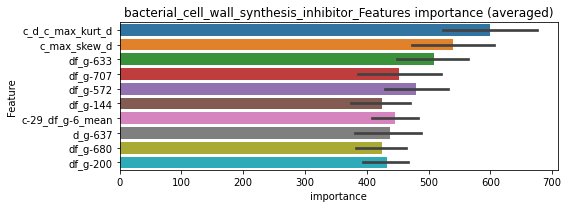

len(train_index) : 5382
len(valid_index) : 1795
================================= fold 1/4 bacterial_cell_wall_synthesis_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0211116	valid_1's binary_logloss: 0.0493688
[2000]	training's binary_logloss: 0.0102339	valid_1's binary_logloss: 0.0371704
[3000]	training's binary_logloss: 0.00671502	valid_1's binary_logloss: 0.0329062
[4000]	training's binary_logloss: 0.00501234	valid_1's binary_logloss: 0.0306448
[5000]	training's binary_logloss: 0.00400692	valid_1's binary_logloss: 0.0292874
[6000]	training's binary_logloss: 0.00334726	valid_1's binary_logloss: 0.0282809
[7000]	training's binary_logloss: 0.00288074	valid_1's binary_logloss: 0.027633
Early stopping, best iteration is:
[7435]	training's binary_logloss: 0.00271831	valid_1's binary_logloss: 0.0273898


len(train_index) : 5383
len(valid_index) : 1794
================================= fold 2/4 bacterial_cell_wall_synthesis_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0208477	valid_1's binary_logloss: 0.0519919
[2000]	training's binary_logloss: 0.0100823	valid_1's binary_logloss: 0.0410412
[3000]	training's binary_logloss: 0.00662276	valid_1's binary_logloss: 0.0371509
[4000]	training's binary_logloss: 0.00493731	valid_1's binary_logloss: 0.0354003
Early stopping, best iteration is:
[4493]	training's binary_logloss: 0.00439133	valid_1's binary_logloss: 0.0346561


len(train_index) : 5383
len(valid_index) : 1794
================================= fold 3/4 bacterial_cell_wall_synthesis_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0213126	valid_1's binary_logloss: 0.0482842
[2000]	training's binary_logloss: 0.0102943	valid_1's binary_logloss: 0.0368401
[3000]	training's binary_logloss: 0.00676668	valid_1's binary_logloss: 0.0327005
[4000]	training's binary_logloss: 0.00504801	valid_1's binary_logloss: 0.0303572
[5000]	training's binary_logloss: 0.00403919	valid_1's binary_logloss: 0.0290774
Early stopping, best iteration is:
[5376]	training's binary_logloss: 0.00375691	valid_1's binary_logloss: 0.0285839


len(train_index) : 5383
len(valid_index) : 1794
================================= fold 4/4 bacterial_cell_wall_synthesis_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0208827	valid_1's binary_logloss: 0.051621
[2000]	training's binary_logloss: 0.0100723	valid_1's binary_logloss: 0.0408955
[3000]	training's binary_logloss: 0.00662172	valid_1's binary_logloss: 0.0374355
Early stopping, best iteration is:
[3395]	training's binary_logloss: 0.00583132	valid_1's binary_logloss: 0.0365919


bacterial_cell_wall_synthesis_inhibitor logloss: 0.03180479085102342
bacterial_cell_wall_synthesis_inhibitor is unpredictable(><)!
bacterial_dna_gyrase_inhibitor, len(trt): 89, len(othr): 3275
target_rate: 0.0037373 → Adj_target_rate: 0.0038122


selected negative label: 3275


unpredictable_cols:bacterial_dna_gyrase_inhibitor → create_features


N_features:358
================= Pseudo labeling 1 / 3 =================



Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0307844	valid_1's binary_logloss: 0.0763419
[2000]	training's binary_logloss: 0.0149629	valid_1's binary_logloss: 0.0588559
[3000]	training's binary_logloss: 0.00983038	valid_1's binary_logloss: 0.0521448
[4000]	training's binary_logloss: 0.00732502	valid_1's binary_logloss: 0.0484237
Early stopping, best iteration is:
[4727]	training's binary_logloss: 0.00619724	valid_1's binary_logloss: 0.046592
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0302184	valid_1's binary_logloss: 0.0821663
[2000]	training's binary_logloss: 0.0147264	valid_1's binary_logloss: 0.0655288
[3000]	training's binary_logloss: 0.00967765	valid_1's binary_logloss: 0.0591826
[4000]	training's binary_logloss: 0.00723522	valid_1's binary_logloss: 0.0558507
[5000]	training's binary_logloss: 0.00579333	valid_1's binary_logloss: 0.053862
[6000]	training's binary_logloss: 0.00

1 / 3, AUC score:0.995, PR-AUC:0.990
y_Threshold: 0.0317662, Threshold: 0.0810625, pos_neg_ratio: 0.8000000
Remove_noisy_data: 153 → Positive_corect_labels: 644/3777
p_label_rate: 0.0100452 Vs.target_rate: 0.00374
Num_p_label: 40.0, Expected: 14.9, Threshold: 0.0810625, conf_0:0.05674, conf_1:0.10538
Num_p_label: 23.0, Expected: 14.9, Adj_threshold_1: 0.1110625
Num_p_label: 15.0, Expected: 14.9, Adj_threshold_2: 0.1410625
threshold: 0.1410625, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 644.0/3777, y_label_rate: 0.1705057
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.027691	valid_1's binary_logloss: 0.0758484
[2000]	training's binary_logloss: 0.0135579	valid_1's binary_logloss: 0.0608136
[3000]	training's binary_logloss: 0.00894346	valid_1's binary_logloss: 0.0554636
[4000]	training's binary_logloss: 0.0066959	valid_1's binary_logloss: 0.0525061
[5000]	training's binary_logloss: 0.00537126	valid_1's binary_logloss: 0.0505443
Early stopping, best iteration is:
[5924]	training's binary_logloss: 0.00455454	valid_1's binary_logloss: 0.0493736
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0278273	valid_1's binary_logloss: 0.0664831
[2000]	training's binary_logloss: 0.0135574	valid_1's binary_logloss: 0.0501056
[3000]	training's binary_logloss: 0.00894866	valid_1's binary_logloss: 0.0441171
[4000]	training's binary_logloss: 0.00669478	valid_1's binary_logloss: 0.0409914
[5000]	training's binary_logloss: 0.005

2 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0669496, Threshold: 0.1410625, pos_neg_ratio: 0.8000000
Remove_noisy_data: 14 → Positive_corect_labels: 637.0/3763
p_label_rate: 0.0060271 Vs.target_rate: 0.00374
Num_p_label: 24.0, Expected: 14.9, Threshold: 0.1410625, conf_0:0.11285, conf_1:0.16927
Num_p_label: 17.0, Expected: 14.9, Adj_threshold_1: 0.1710625
threshold: 0.1710625, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 637.0/3763, y_label_rate: 0.1692798
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0270247	valid_1's binary_logloss: 0.0720187
[2000]	training's binary_logloss: 0.0132181	valid_1's binary_logloss: 0.0571052
[3000]	training's binary_logloss: 0.00874884	valid_1's binary_logloss: 0.051524
[4000]	training's binary_logloss: 0.00655167	valid_1's binary_logloss: 0.0488584
Early stopping, best iteration is:
[4563]	training's binary_logloss: 0.00574973	valid_1's binary_logloss: 0.0477116
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0273357	valid_1's binary_logloss: 0.069908
[2000]	training's binary_logloss: 0.0132914	valid_1's binary_logloss: 0.0549107
[3000]	training's binary_logloss: 0.00876771	valid_1's binary_logloss: 0.0494924
[4000]	training's binary_logloss: 0.00656307	valid_1's binary_logloss: 0.0464344
[5000]	training's binary_logloss: 0.00526349	valid_1's binary_logloss: 0.0446194
Early stopping, best iteration is:
[543

3 / 3, AUC score:0.999, PR-AUC:0.997
y_Threshold: 0.0734046, Threshold: 0.1710625, pos_neg_ratio: 0.8000000
Remove_noisy_data: 18 → Positive_corect_labels: 628.0/3745
p_label_rate: 0.0045203 Vs.target_rate: 0.00374
Num_p_label: 18.0, Expected: 14.9, Threshold: 0.1710625, conf_0:0.15396, conf_1:0.18817
threshold: 0.1710625, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 628.0/3745, y_label_rate: 0.1676903


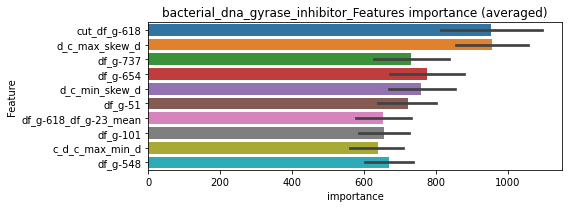

len(train_index) : 2808
len(valid_index) : 937
================================= fold 1/4 bacterial_dna_gyrase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0263108	valid_1's binary_logloss: 0.069262
[2000]	training's binary_logloss: 0.0129112	valid_1's binary_logloss: 0.0536299
[3000]	training's binary_logloss: 0.0085623	valid_1's binary_logloss: 0.0477152
[4000]	training's binary_logloss: 0.00641723	valid_1's binary_logloss: 0.0445079
[5000]	training's binary_logloss: 0.00515513	valid_1's binary_logloss: 0.0425028
Early stopping, best iteration is:
[5225]	training's binary_logloss: 0.00493714	valid_1's binary_logloss: 0.0421062


len(train_index) : 2809
len(valid_index) : 936
================================= fold 2/4 bacterial_dna_gyrase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.026158	valid_1's binary_logloss: 0.0647125
[2000]	training's binary_logloss: 0.0127596	valid_1's binary_logloss: 0.0498783
[3000]	training's binary_logloss: 0.00847067	valid_1's binary_logloss: 0.0445817
[4000]	training's binary_logloss: 0.00635156	valid_1's binary_logloss: 0.0418526
[5000]	training's binary_logloss: 0.00509597	valid_1's binary_logloss: 0.0402238
[6000]	training's binary_logloss: 0.00427154	valid_1's binary_logloss: 0.0387985
Early stopping, best iteration is:
[6862]	training's binary_logloss: 0.00375509	valid_1's binary_logloss: 0.0380356


len(train_index) : 2809
len(valid_index) : 936
================================= fold 3/4 bacterial_dna_gyrase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0271027	valid_1's binary_logloss: 0.0605446
[2000]	training's binary_logloss: 0.0132698	valid_1's binary_logloss: 0.0467776
[3000]	training's binary_logloss: 0.00876697	valid_1's binary_logloss: 0.0419871
Early stopping, best iteration is:
[3696]	training's binary_logloss: 0.00710412	valid_1's binary_logloss: 0.0400757


len(train_index) : 2809
len(valid_index) : 936
================================= fold 4/4 bacterial_dna_gyrase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0262107	valid_1's binary_logloss: 0.0696802
[2000]	training's binary_logloss: 0.0128494	valid_1's binary_logloss: 0.0537193
[3000]	training's binary_logloss: 0.00851695	valid_1's binary_logloss: 0.0481146
Early stopping, best iteration is:
[3337]	training's binary_logloss: 0.0076445	valid_1's binary_logloss: 0.0468643


bacterial_dna_gyrase_inhibitor logloss: 0.04177054503738876
bacterial_dna_gyrase_inhibitor is unpredictable(><)!
bacterial_dna_inhibitor, len(trt): 115, len(othr): 2020
target_rate: 0.0048291 → Adj_target_rate: 0.0047401


mutually exclusive columns: bacterial_dna_inhibitor
selected negative label: 2020


unpredictable_cols:bacterial_dna_inhibitor → create_features


N_features:358
================= Pseudo labeling 1 / 3 =================



Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0530305	valid_1's binary_logloss: 0.193239
Early stopping, best iteration is:
[1663]	training's binary_logloss: 0.0315594	valid_1's binary_logloss: 0.181051
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0568581	valid_1's binary_logloss: 0.146313
[2000]	training's binary_logloss: 0.0278557	valid_1's binary_logloss: 0.119937
[3000]	training's binary_logloss: 0.018252	valid_1's binary_logloss: 0.109271
[4000]	training's binary_logloss: 0.0135662	valid_1's binary_logloss: 0.104159
Early stopping, best iteration is:
[4170]	training's binary_logloss: 0.0130036	valid_1's binary_logloss: 0.103453
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0572488	valid_1's binary_logloss: 0.149207
[2000]	training's binary_logloss: 0.0280791	valid_1's binary_logloss: 0.125429
[3000]	training's binary_logloss: 0.

1 / 3, AUC score:0.969, PR-AUC:0.940
y_Threshold: 0.0818499, Threshold: 0.1513108, pos_neg_ratio: 0.8000000
Remove_noisy_data: 151 → Positive_corect_labels: 369/2273
p_label_rate: 0.0100452 Vs.target_rate: 0.00483
Num_p_label: 40.0, Expected: 19.2, Threshold: 0.1513108, conf_0:0.10592, conf_1:0.19670
Num_p_label: 24.0, Expected: 19.2, Adj_threshold_1: 0.1813108
threshold: 0.1813108, positive_p_label: 24.0/3982, p_label_rate: 0.0060271
positive_y_label: 369.0/2273, y_label_rate: 0.1623405
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0450437	valid_1's binary_logloss: 0.159806
[2000]	training's binary_logloss: 0.0222582	valid_1's binary_logloss: 0.143646
Early stopping, best iteration is:
[2288]	training's binary_logloss: 0.0193945	valid_1's binary_logloss: 0.141222
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0468168	valid_1's binary_logloss: 0.130698
[2000]	training's binary_logloss: 0.0229131	valid_1's binary_logloss: 0.107373
[3000]	training's binary_logloss: 0.0150753	valid_1's binary_logloss: 0.0991656
Early stopping, best iteration is:
[3959]	training's binary_logloss: 0.0113646	valid_1's binary_logloss: 0.0952323
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0473914	valid_1's binary_logloss: 0.117523
[2000]	training's binary_logloss: 0.0233176	valid_1's binary_logloss: 0.0929593
[3000]	training's binary_logloss:

2 / 3, AUC score:0.994, PR-AUC:0.982
y_Threshold: 0.0951773, Threshold: 0.1813108, pos_neg_ratio: 0.8000000
Remove_noisy_data: 46 → Positive_corect_labels: 346.0/2227
p_label_rate: 0.0065294 Vs.target_rate: 0.00483
Num_p_label: 26.0, Expected: 19.2, Threshold: 0.1813108, conf_0:0.14505, conf_1:0.21757
threshold: 0.1813108, positive_p_label: 26.0/3982, p_label_rate: 0.0065294
positive_y_label: 346.0/2227, y_label_rate: 0.1553660
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0420613	valid_1's binary_logloss: 0.120712
[2000]	training's binary_logloss: 0.0207436	valid_1's binary_logloss: 0.100307
[3000]	training's binary_logloss: 0.0136981	valid_1's binary_logloss: 0.0928499
Early stopping, best iteration is:
[3968]	training's binary_logloss: 0.0103363	valid_1's binary_logloss: 0.0892335
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0420788	valid_1's binary_logloss: 0.120438
[2000]	training's binary_logloss: 0.0207406	valid_1's binary_logloss: 0.0979956
[3000]	training's binary_logloss: 0.0137217	valid_1's binary_logloss: 0.0900833
[4000]	training's binary_logloss: 0.0102702	valid_1's binary_logloss: 0.0857487
Early stopping, best iteration is:
[4726]	training's binary_logloss: 0.0086961	valid_1's binary_logloss: 0.0838435
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_loglo

3 / 3, AUC score:0.996, PR-AUC:0.991
y_Threshold: 0.0864662, Threshold: 0.1813108, pos_neg_ratio: 0.8000000
Remove_noisy_data: 24 → Positive_corect_labels: 334.0/2203
p_label_rate: 0.0047715 Vs.target_rate: 0.00483
Num_p_label: 19.0, Expected: 19.2, Threshold: 0.1813108, conf_0:0.16318, conf_1:0.19944
threshold: 0.1813108, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 334.0/2203, y_label_rate: 0.1516114


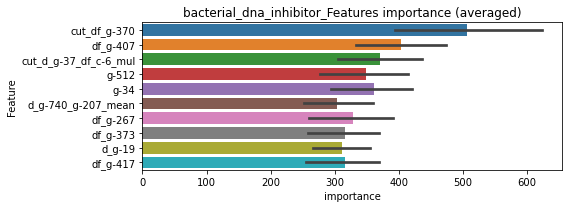

len(train_index) : 1652
len(valid_index) : 551
================================= fold 1/4 bacterial_dna_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0390049	valid_1's binary_logloss: 0.125921
[2000]	training's binary_logloss: 0.0194395	valid_1's binary_logloss: 0.105675
Early stopping, best iteration is:
[2780]	training's binary_logloss: 0.0138852	valid_1's binary_logloss: 0.0992609


len(train_index) : 1652
len(valid_index) : 551
================================= fold 2/4 bacterial_dna_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0403189	valid_1's binary_logloss: 0.09804
[2000]	training's binary_logloss: 0.019884	valid_1's binary_logloss: 0.0768099
[3000]	training's binary_logloss: 0.0131418	valid_1's binary_logloss: 0.0685624
[4000]	training's binary_logloss: 0.00983077	valid_1's binary_logloss: 0.0648436
[5000]	training's binary_logloss: 0.00789241	valid_1's binary_logloss: 0.0624133
[6000]	training's binary_logloss: 0.00660181	valid_1's binary_logloss: 0.060563
Early stopping, best iteration is:
[6356]	training's binary_logloss: 0.00624496	valid_1's binary_logloss: 0.0600651


len(train_index) : 1652
len(valid_index) : 551
================================= fold 3/4 bacterial_dna_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0403621	valid_1's binary_logloss: 0.107595
[2000]	training's binary_logloss: 0.0200081	valid_1's binary_logloss: 0.0890063
[3000]	training's binary_logloss: 0.0132037	valid_1's binary_logloss: 0.082371
Early stopping, best iteration is:
[3433]	training's binary_logloss: 0.0115247	valid_1's binary_logloss: 0.0808783


len(train_index) : 1653
len(valid_index) : 550
================================= fold 4/4 bacterial_dna_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0398091	valid_1's binary_logloss: 0.118333
[2000]	training's binary_logloss: 0.0196016	valid_1's binary_logloss: 0.102062
Early stopping, best iteration is:
[2224]	training's binary_logloss: 0.0175998	valid_1's binary_logloss: 0.100734


bacterial_dna_inhibitor logloss: 0.08522761593303374
bacterial_dna_inhibitor is unpredictable(><)!
bacterial_membrane_integrity_inhibitor, len(trt): 19, len(othr): 3286
target_rate: 0.0007979 → Adj_target_rate: 0.0010260


selected negative label: 3286


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[597]	training's binary_logloss: 0.000286944	valid_1's binary_logloss: 0.00127942
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[543]	training's binary_logloss: 0.0002902	valid_1's binary_logloss: 0.00287135
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[562]	training's binary_logloss: 0.000297389	valid_1's binary_logloss: 0.000526329
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0015214, Threshold: 0.0039328, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00080
Num_p_label: 40.0, Expected: 3.2, Threshold: 0.0039328, conf_0:0.00275, conf_1:0.00511
Num_p_label: 1.0, Expected: 3.2, Adj_threshold_1: 0.0339328


Early stopping, best iteration is:
[549]	training's binary_logloss: 0.000294201	valid_1's binary_logloss: 0.00273901


threshold: 0.0339328, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[594]	training's binary_logloss: 0.000281366	valid_1's binary_logloss: 0.00126236
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[502]	training's binary_logloss: 0.000295069	valid_1's binary_logloss: 0.00320953
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[550]	training's binary_logloss: 0.000287448	valid_1's binary_logloss: 0.000457898
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0433589, Threshold: 0.0339328, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0007534 Vs.target_rate: 0.00080
Num_p_label: 3.0, Expected: 3.2, Threshold: 0.0339328, conf_0:0.02715, conf_1:0.04072


Early stopping, best iteration is:
[538]	training's binary_logloss: 0.00028545	valid_1's binary_logloss: 0.00371316


threshold: 0.0339328, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[594]	training's binary_logloss: 0.000281366	valid_1's binary_logloss: 0.00126236
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[502]	training's binary_logloss: 0.000295069	valid_1's binary_logloss: 0.00320953
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[550]	training's binary_logloss: 0.000287448	valid_1's binary_logloss: 0.000457898
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0433589, Threshold: 0.0339328, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0007534 Vs.target_rate: 0.00080
Num_p_label: 3.0, Expected: 3.2, Threshold: 0.0339328, conf_0:0.03054, conf_1:0.03733
threshold: 0.0339328, positive_p_label: 3.0/3982, p_label_rate: 0.0007534


Early stopping, best iteration is:
[538]	training's binary_logloss: 0.00028545	valid_1's binary_logloss: 0.00371316


positive_y_label: 657.0/3811, y_label_rate: 0.1723957


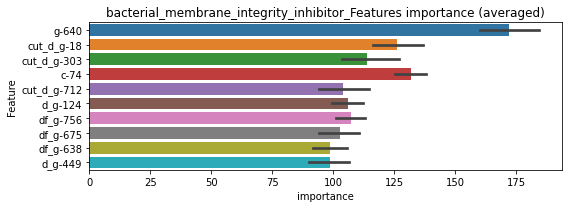

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 bacterial_membrane_integrity_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[841]	training's binary_logloss: 0.000290827	valid_1's binary_logloss: 0.00141336


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 bacterial_membrane_integrity_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[848]	training's binary_logloss: 0.000283095	valid_1's binary_logloss: 0.00230608


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 bacterial_membrane_integrity_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[904]	training's binary_logloss: 0.000288371	valid_1's binary_logloss: 0.000496144


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 bacterial_membrane_integrity_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[888]	training's binary_logloss: 0.000284219	valid_1's binary_logloss: 0.00227767


bacterial_membrane_integrity_inhibitor logloss: 0.0016238373715886985
bcl_inhibitor, len(trt): 31, len(othr): 3286
target_rate: 0.0013018 → Adj_target_rate: 0.0015554


selected negative label: 3286


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.000414286	valid_1's binary_logloss: 0.00722071
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[562]	training's binary_logloss: 0.000418787	valid_1's binary_logloss: 0.0108196
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[643]	training's binary_logloss: 0.000399295	valid_1's binary_logloss: 0.00119106
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0027790, Threshold: 0.0132667, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[604]	training's binary_logloss: 0.000403658	valid_1's binary_logloss: 0.00341376


Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00130
Num_p_label: 40.0, Expected: 5.2, Threshold: 0.0132667, conf_0:0.00929, conf_1:0.01725
Num_p_label: 7.0, Expected: 5.2, Adj_threshold_1: 0.0432667
threshold: 0.0432667, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[603]	training's binary_logloss: 0.000391529	valid_1's binary_logloss: 0.00681054
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[564]	training's binary_logloss: 0.000403428	valid_1's binary_logloss: 0.0101803
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[611]	training's binary_logloss: 0.000397387	valid_1's binary_logloss: 0.000899028
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[632]	training's binary_logloss: 0.000382008	valid_1's binary_logloss: 0.00380998


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0246045, Threshold: 0.0432667, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 655.0/3807
p_label_rate: 0.0082873 Vs.target_rate: 0.00130
Num_p_label: 33.0, Expected: 5.2, Threshold: 0.0432667, conf_0:0.03461, conf_1:0.05192
Num_p_label: 17.0, Expected: 5.2, Adj_threshold_1: 0.0732667
Num_p_label: 13.0, Expected: 5.2, Adj_threshold_2: 0.1032667
Num_p_label: 9.0, Expected: 5.2, Adj_threshold_3: 0.1332667
threshold: 0.1332667, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 655.0/3807, y_label_rate: 0.1720515
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[589]	training's binary_logloss: 0.000382618	valid_1's binary_logloss: 0.00851227
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[601]	training's binary_logloss: 0.000385733	valid_1's binary_logloss: 0.00291133
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[647]	training's binary_logloss: 0.000382397	valid_1's binary_logloss: 0.00164637
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0200587, Threshold: 0.1332667, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[609]	training's binary_logloss: 0.000388748	valid_1's binary_logloss: 0.00154933


Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3807
p_label_rate: 0.0027624 Vs.target_rate: 0.00130
Num_p_label: 11.0, Expected: 5.2, Threshold: 0.1332667, conf_0:0.11994, conf_1:0.14659
threshold: 0.1332667, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 655.0/3807, y_label_rate: 0.1720515


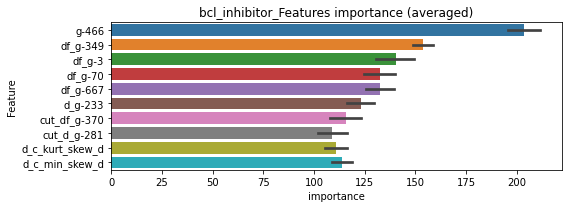

len(train_index) : 2855
len(valid_index) : 952
================================= fold 1/4 bcl_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[883]	training's binary_logloss: 0.000382823	valid_1's binary_logloss: 0.0064851


len(train_index) : 2855
len(valid_index) : 952
================================= fold 2/4 bcl_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[874]	training's binary_logloss: 0.000384256	valid_1's binary_logloss: 0.00192761


len(train_index) : 2855
len(valid_index) : 952
================================= fold 3/4 bcl_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[904]	training's binary_logloss: 0.000389538	valid_1's binary_logloss: 0.00153803


len(train_index) : 2856
len(valid_index) : 951
================================= fold 4/4 bcl_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000374705	valid_1's binary_logloss: 0.00216616
Early stopping, best iteration is:
[982]	training's binary_logloss: 0.000375737	valid_1's binary_logloss: 0.0021628


bcl_inhibitor logloss: 0.003030841067619618
bcr-abl_inhibitor, len(trt): 38, len(othr): 3281
target_rate: 0.0015957 → Adj_target_rate: 0.0018493


selected negative label: 3281


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[613]	training's binary_logloss: 0.000444894	valid_1's binary_logloss: 0.0108686
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[611]	training's binary_logloss: 0.000452165	valid_1's binary_logloss: 0.00492317
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[685]	training's binary_logloss: 0.000444006	valid_1's binary_logloss: 0.00106751
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[604]	training's binary_logloss: 0.000455775	valid_1's binary_logloss: 0.00867153


y_Threshold: 0.0031553, Threshold: 0.0580888, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3805
p_label_rate: 0.0100452 Vs.target_rate: 0.00160
Num_p_label: 40.0, Expected: 6.4, Threshold: 0.0580888, conf_0:0.04066, conf_1:0.07552
Num_p_label: 30.0, Expected: 6.4, Adj_threshold_1: 0.0880888
Num_p_label: 21.0, Expected: 6.4, Adj_threshold_2: 0.1180888
Num_p_label: 15.0, Expected: 6.4, Adj_threshold_3: 0.1480888
threshold: 0.1480888, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 656.0/3805, y_label_rate: 0.1724047
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[606]	training's binary_logloss: 0.000431817	valid_1's binary_logloss: 0.0104389
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[616]	training's binary_logloss: 0.000436264	valid_1's binary_logloss: 0.00394062
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[619]	training's binary_logloss: 0.000444929	valid_1's binary_logloss: 0.00138765
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0271587, Threshold: 0.1480888, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[602]	training's binary_logloss: 0.000437127	valid_1's binary_logloss: 0.00719424


Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3803
p_label_rate: 0.0145655 Vs.target_rate: 0.00160
Num_p_label: 58.0, Expected: 6.4, Threshold: 0.1480888, conf_0:0.11847, conf_1:0.17771
Num_p_label: 54.0, Expected: 6.4, Adj_threshold_1: 0.1780888
Num_p_label: 52.0, Expected: 6.4, Adj_threshold_2: 0.2080888
Num_p_label: 49.0, Expected: 6.4, Adj_threshold_3: 0.2380888
Num_p_label: 48.0, Expected: 6.4, Adj_threshold_4: 0.2680888
Num_p_label: 43.0, Expected: 6.4, Adj_threshold_5: 0.2980888
Num_p_label: 40.0, Expected: 6.4, Adj_threshold_6: 0.3280888
Num_p_label: 36.0, Expected: 6.4, Adj_threshold_7: 0.3580888
Num_p_label: 34.0, Expected: 6.4, Adj_threshold_8: 0.3880888
Num_p_label: 31.0, Expected: 6.4, Adj_threshold_9: 0.4180888
Num_p_label: 27.0, Expected: 6.4, Adj_threshold_10: 0.4480888
threshold: 0.4480888, positive_p_label: 27.0/3982, p_label_rate: 0.0067805
positive_y_label: 655.0/3803, y_label_rate: 0.1722324
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[647]	training's binary_logloss: 0.000418157	valid_1's binary_logloss: 0.00365975
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[585]	training's binary_logloss: 0.000448027	valid_1's binary_logloss: 0.0092975
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[612]	training's binary_logloss: 0.000431847	valid_1's binary_logloss: 0.00753635
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0487819, Threshold: 0.4480888, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[604]	training's binary_logloss: 0.00043873	valid_1's binary_logloss: 0.00459763


Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3803
p_label_rate: 0.0065294 Vs.target_rate: 0.00160
Num_p_label: 26.0, Expected: 6.4, Threshold: 0.4480888, conf_0:0.40328, conf_1:0.49290
Num_p_label: 25.0, Expected: 6.4, Adj_threshold_1: 0.4780888
Num_p_label: 22.0, Expected: 6.4, Adj_threshold_2: 0.5080888
Num_p_label: 22.0, Expected: 6.4, Adj_threshold_3: 0.5380888
Num_p_label: 19.0, Expected: 6.4, Adj_threshold_4: 0.5680888
Num_p_label: 15.0, Expected: 6.4, Adj_threshold_5: 0.5980888
threshold: 0.5980888, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 655.0/3803, y_label_rate: 0.1722324


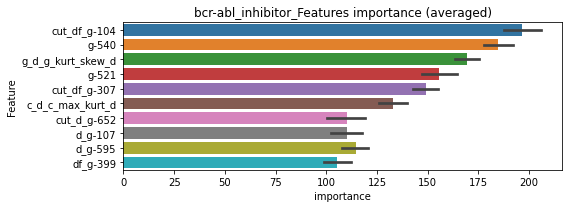

len(train_index) : 2852
len(valid_index) : 951
================================= fold 1/4 bcr-abl_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000422146	valid_1's binary_logloss: 0.00294759
Early stopping, best iteration is:
[976]	training's binary_logloss: 0.000422644	valid_1's binary_logloss: 0.00294552


len(train_index) : 2852
len(valid_index) : 951
================================= fold 2/4 bcr-abl_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2852
len(valid_index) : 951
================================= fold 3/4 bcr-abl_inhibitor=================================


Early stopping, best iteration is:
[643]	training's binary_logloss: 0.000516016	valid_1's binary_logloss: 0.00727701
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[832]	training's binary_logloss: 0.000443496	valid_1's binary_logloss: 0.00803432


len(train_index) : 2853
len(valid_index) : 950
================================= fold 4/4 bcr-abl_inhibitor=================================


Training until validation scores don't improve for 30 rounds


bcr-abl_inhibitor logloss: 0.005952401715177404


Early stopping, best iteration is:
[608]	training's binary_logloss: 0.000544233	valid_1's binary_logloss: 0.00554527


benzodiazepine_receptor_agonist, len(trt): 67, len(othr): 3278
target_rate: 0.0028135 → Adj_target_rate: 0.0029948


selected negative label: 3278


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[639]	training's binary_logloss: 0.000708816	valid_1's binary_logloss: 0.0270629
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[556]	training's binary_logloss: 0.000920091	valid_1's binary_logloss: 0.0354153
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[784]	training's binary_logloss: 0.000570381	valid_1's binary_logloss: 0.0104604
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.000806345	valid_1's binary_logloss: 0.0261665


1 / 3, AUC score:0.999, PR-AUC:0.999
y_Threshold: 0.0071070, Threshold: 0.0163415, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 654/3799
p_label_rate: 0.0100452 Vs.target_rate: 0.00281
Num_p_label: 40.0, Expected: 11.2, Threshold: 0.0163415, conf_0:0.01144, conf_1:0.02124
Num_p_label: 11.0, Expected: 11.2, Adj_threshold_1: 0.0463415
threshold: 0.0463415, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 654.0/3799, y_label_rate: 0.1721506
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[591]	training's binary_logloss: 0.00077279	valid_1's binary_logloss: 0.0273354
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[602]	training's binary_logloss: 0.000760553	valid_1's binary_logloss: 0.0233944
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[755]	training's binary_logloss: 0.000569316	valid_1's binary_logloss: 0.00883448
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[771]	training's binary_logloss: 0.000557361	valid_1's binary_logloss: 0.0124807


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0311654, Threshold: 0.0463415, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 653.0/3797
p_label_rate: 0.0052737 Vs.target_rate: 0.00281
Num_p_label: 21.0, Expected: 11.2, Threshold: 0.0463415, conf_0:0.03707, conf_1:0.05561
Num_p_label: 11.0, Expected: 11.2, Adj_threshold_1: 0.0763415
threshold: 0.0763415, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 653.0/3797, y_label_rate: 0.1719779
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[769]	training's binary_logloss: 0.00055582	valid_1's binary_logloss: 0.0203997
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[567]	training's binary_logloss: 0.000835426	valid_1's binary_logloss: 0.0228316
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[641]	training's binary_logloss: 0.000681779	valid_1's binary_logloss: 0.0264527
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[809]	training's binary_logloss: 0.000543741	valid_1's binary_logloss: 0.00846141


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0273052, Threshold: 0.0763415, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 650.0/3791
p_label_rate: 0.0022602 Vs.target_rate: 0.00281
Num_p_label: 9.0, Expected: 11.2, Threshold: 0.0763415, conf_0:0.06871, conf_1:0.08398
threshold: 0.0763415, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 650.0/3791, y_label_rate: 0.1714587


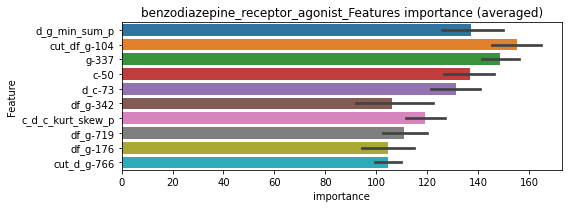

len(train_index) : 2843
len(valid_index) : 948
================================= fold 1/4 benzodiazepine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2843
len(valid_index) : 948
================================= fold 2/4 benzodiazepine_receptor_agonist=================================


Early stopping, best iteration is:
[562]	training's binary_logloss: 0.000838495	valid_1's binary_logloss: 0.028176
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[735]	training's binary_logloss: 0.000675576	valid_1's binary_logloss: 0.0123864


len(train_index) : 2843
len(valid_index) : 948
================================= fold 3/4 benzodiazepine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[961]	training's binary_logloss: 0.000565473	valid_1's binary_logloss: 0.00963372


len(train_index) : 2844
len(valid_index) : 947
================================= fold 4/4 benzodiazepine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[884]	training's binary_logloss: 0.000598658	valid_1's binary_logloss: 0.0151855


benzodiazepine_receptor_agonist logloss: 0.016345731743785934
beta_amyloid_inhibitor, len(trt): 24, len(othr): 3287
target_rate: 0.0010078 → Adj_target_rate: 0.0012513


selected negative label: 3287


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000358488	valid_1's binary_logloss: 0.00166304
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[599]	training's binary_logloss: 0.000351971	valid_1's binary_logloss: 0.00395695
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[594]	training's binary_logloss: 0.000363453	valid_1's binary_logloss: 0.00103972
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0019125, Threshold: 0.0086646, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00101
Num_p_label: 40.0, Expected: 4.0, Threshold: 0.0086646, conf_0:0.00607, conf_1:0.01126


Early stopping, best iteration is:
[567]	training's binary_logloss: 0.000361051	valid_1's binary_logloss: 0.00528187


Num_p_label: 10.0, Expected: 4.0, Adj_threshold_1: 0.0386646
threshold: 0.0386646, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.0003531	valid_1's binary_logloss: 0.00153393
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[580]	training's binary_logloss: 0.00035026	valid_1's binary_logloss: 0.00307721
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[568]	training's binary_logloss: 0.000365388	valid_1's binary_logloss: 0.00110154
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0296080, Threshold: 0.0386646, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0040181 Vs.target_rate: 0.00101
Num_p_label: 16.0, Expected: 4.0, Threshold: 0.0386646, conf_0:0.03093, conf_1:0.04640
Num_p_label: 13.0, Expected: 4.0, Adj_threshold_1: 0.0686646
Num_p_label: 7.0, Expected: 4.0, Adj_threshold_2: 0.0986646


Early stopping, best iteration is:
[551]	training's binary_logloss: 0.000358445	valid_1's binary_logloss: 0.00524215


threshold: 0.0986646, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.0003531	valid_1's binary_logloss: 0.00153393
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[580]	training's binary_logloss: 0.00035026	valid_1's binary_logloss: 0.00307721
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[568]	training's binary_logloss: 0.000365388	valid_1's binary_logloss: 0.00110154
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0296080, Threshold: 0.0986646, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0017579 Vs.target_rate: 0.00101
Num_p_label: 7.0, Expected: 4.0, Threshold: 0.0986646, conf_0:0.08880, conf_1:0.10853


Early stopping, best iteration is:
[551]	training's binary_logloss: 0.000358445	valid_1's binary_logloss: 0.00524215


threshold: 0.0986646, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


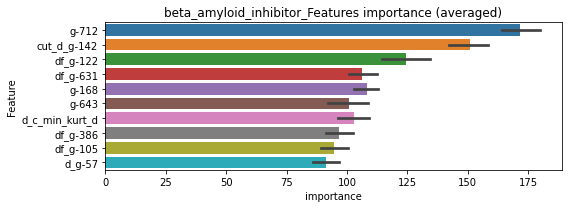

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 beta_amyloid_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[874]	training's binary_logloss: 0.000359936	valid_1's binary_logloss: 0.00134693


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 beta_amyloid_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[770]	training's binary_logloss: 0.000368454	valid_1's binary_logloss: 0.00307996


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 beta_amyloid_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[820]	training's binary_logloss: 0.00036787	valid_1's binary_logloss: 0.00107842


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 beta_amyloid_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[734]	training's binary_logloss: 0.000375948	valid_1's binary_logloss: 0.00682411


beta_amyloid_inhibitor logloss: 0.0030824037264861447
bromodomain_inhibitor, len(trt): 68, len(othr): 3280
target_rate: 0.0028555 → Adj_target_rate: 0.0030327


selected negative label: 3280


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[538]	training's binary_logloss: 0.000996641	valid_1's binary_logloss: 0.0344968
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[558]	training's binary_logloss: 0.000921402	valid_1's binary_logloss: 0.027585
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[760]	training's binary_logloss: 0.000635032	valid_1's binary_logloss: 0.00728316
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[797]	training's binary_logloss: 0.000591503	valid_1's binary_logloss: 0.0177917


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0069377, Threshold: 0.0172666, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3804
p_label_rate: 0.0100452 Vs.target_rate: 0.00286
Num_p_label: 40.0, Expected: 11.4, Threshold: 0.0172666, conf_0:0.01209, conf_1:0.02245
Num_p_label: 6.0, Expected: 11.4, Adj_threshold_1: 0.0472666
threshold: 0.0472666, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 656.0/3804, y_label_rate: 0.1724501
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[726]	training's binary_logloss: 0.000612481	valid_1's binary_logloss: 0.0319101
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[708]	training's binary_logloss: 0.000629555	valid_1's binary_logloss: 0.0243627
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[786]	training's binary_logloss: 0.000607788	valid_1's binary_logloss: 0.00681671
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[736]	training's binary_logloss: 0.000620373	valid_1's binary_logloss: 0.0154347


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0288247, Threshold: 0.0472666, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3802
p_label_rate: 0.0045203 Vs.target_rate: 0.00286
Num_p_label: 18.0, Expected: 11.4, Threshold: 0.0472666, conf_0:0.03781, conf_1:0.05672
Num_p_label: 11.0, Expected: 11.4, Adj_threshold_1: 0.0772666
threshold: 0.0772666, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 655.0/3802, y_label_rate: 0.1722777
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[643]	training's binary_logloss: 0.000719196	valid_1's binary_logloss: 0.0281488
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[582]	training's binary_logloss: 0.000850081	valid_1's binary_logloss: 0.0263816
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[769]	training's binary_logloss: 0.000602355	valid_1's binary_logloss: 0.0128714
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[758]	training's binary_logloss: 0.000601101	valid_1's binary_logloss: 0.0207012


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0304983, Threshold: 0.0772666, pos_neg_ratio: 0.8000000
Remove_noisy_data: 10 → Positive_corect_labels: 650.0/3792
p_label_rate: 0.0027624 Vs.target_rate: 0.00286
Num_p_label: 11.0, Expected: 11.4, Threshold: 0.0772666, conf_0:0.06954, conf_1:0.08499
threshold: 0.0772666, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 650.0/3792, y_label_rate: 0.1714135


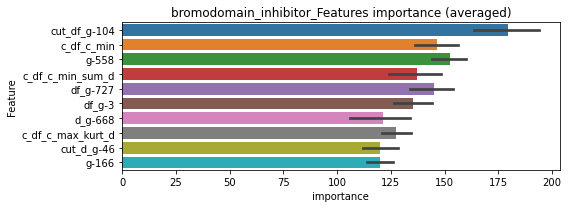

len(train_index) : 2844
len(valid_index) : 948
================================= fold 1/4 bromodomain_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2844
len(valid_index) : 948
================================= fold 2/4 bromodomain_inhibitor=================================


Early stopping, best iteration is:
[491]	training's binary_logloss: 0.00103626	valid_1's binary_logloss: 0.0257491
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[741]	training's binary_logloss: 0.000698205	valid_1's binary_logloss: 0.0257492


len(train_index) : 2844
len(valid_index) : 948
================================= fold 3/4 bromodomain_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[683]	training's binary_logloss: 0.000758895	valid_1's binary_logloss: 0.0179692


len(train_index) : 2844
len(valid_index) : 948
================================= fold 4/4 bromodomain_inhibitor=================================


Training until validation scores don't improve for 30 rounds


bromodomain_inhibitor logloss: 0.02156154348909917


Early stopping, best iteration is:
[545]	training's binary_logloss: 0.000931025	valid_1's binary_logloss: 0.0167786


btk_inhibitor, len(trt): 29, len(othr): 3284
target_rate: 0.0012178 → Adj_target_rate: 0.0014697


selected negative label: 3284


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[620]	training's binary_logloss: 0.000404467	valid_1's binary_logloss: 0.00690261
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[679]	training's binary_logloss: 0.00038137	valid_1's binary_logloss: 0.0035284
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[681]	training's binary_logloss: 0.000388314	valid_1's binary_logloss: 0.00200067
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[635]	training's binary_logloss: 0.00039754	valid_1's binary_logloss: 0.00212906


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0027272, Threshold: 0.0219843, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00122
Num_p_label: 40.0, Expected: 4.8, Threshold: 0.0219843, conf_0:0.01539, conf_1:0.02858
Num_p_label: 19.0, Expected: 4.8, Adj_threshold_1: 0.0519843
Num_p_label: 9.0, Expected: 4.8, Adj_threshold_2: 0.0819843
threshold: 0.0819843, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[636]	training's binary_logloss: 0.000381436	valid_1's binary_logloss: 0.00720394
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[595]	training's binary_logloss: 0.000397972	valid_1's binary_logloss: 0.00326381
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[655]	training's binary_logloss: 0.000383238	valid_1's binary_logloss: 0.0016384
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[681]	training's binary_logloss: 0.000371888	valid_1's binary_logloss: 0.00210503


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0371209, Threshold: 0.0819843, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0065294 Vs.target_rate: 0.00122
Num_p_label: 26.0, Expected: 4.8, Threshold: 0.0819843, conf_0:0.06559, conf_1:0.09838
Num_p_label: 19.0, Expected: 4.8, Adj_threshold_1: 0.1119843
Num_p_label: 18.0, Expected: 4.8, Adj_threshold_2: 0.1419843
Num_p_label: 9.0, Expected: 4.8, Adj_threshold_3: 0.1719843
threshold: 0.1719843, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[636]	training's binary_logloss: 0.000381436	valid_1's binary_logloss: 0.00720394
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[595]	training's binary_logloss: 0.000397972	valid_1's binary_logloss: 0.00326381
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[655]	training's binary_logloss: 0.000383238	valid_1's binary_logloss: 0.0016384
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[681]	training's binary_logloss: 0.000371888	valid_1's binary_logloss: 0.00210503


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0371209, Threshold: 0.1719843, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0022602 Vs.target_rate: 0.00122
Num_p_label: 9.0, Expected: 4.8, Threshold: 0.1719843, conf_0:0.15479, conf_1:0.18918
threshold: 0.1719843, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 656.0/3808, y_label_rate: 0.1722689


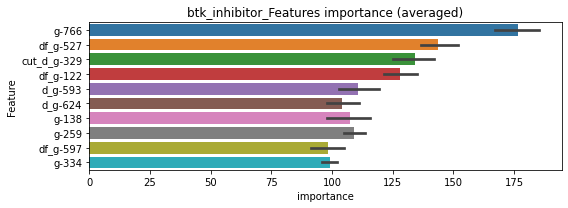

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 btk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[727]	training's binary_logloss: 0.000429971	valid_1's binary_logloss: 0.00632626


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 btk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[895]	training's binary_logloss: 0.000394285	valid_1's binary_logloss: 0.00267231


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 btk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000381107	valid_1's binary_logloss: 0.00122808
Early stopping, best iteration is:
[991]	training's binary_logloss: 0.000381114	valid_1's binary_logloss: 0.00122806


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 btk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000378642	valid_1's binary_logloss: 0.00191988
Early stopping, best iteration is:
[1022]	training's binary_logloss: 0.000376821	valid_1's binary_logloss: 0.00191337


btk_inhibitor logloss: 0.0030350051407534192
calcineurin_inhibitor, len(trt): 12, len(othr): 3287
target_rate: 0.0005039 → Adj_target_rate: 0.0006942


selected negative label: 3287


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[525]	training's binary_logloss: 0.000247439	valid_1's binary_logloss: 0.000884748
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[517]	training's binary_logloss: 0.000248677	valid_1's binary_logloss: 0.00109147
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[518]	training's binary_logloss: 0.000247742	valid_1's binary_logloss: 0.000370103
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0011459, Threshold: 0.0135028, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00050
Num_p_label: 40.0, Expected: 2.0, Threshold: 0.0135028, conf_0:0.00945, conf_1:0.01755
Num_p_label: 13.0, Expected: 2.0, Adj_threshold_1: 0.0435028
Num_p_label: 8.0, Expected: 2.0, Adj_threshold_2: 0.0735028
Num_p_label: 4.0, Expected: 2.0, Adj_threshold_3: 0.1035028


Early stopping, best iteration is:
[515]	training's binary_logloss: 0.000245838	valid_1's binary_logloss: 0.000890948


threshold: 0.1035028, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[508]	training's binary_logloss: 0.000232145	valid_1's binary_logloss: 0.00133001
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[491]	training's binary_logloss: 0.000233473	valid_1's binary_logloss: 0.00100049
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[491]	training's binary_logloss: 0.000232677	valid_1's binary_logloss: 0.000307487
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1065803, Threshold: 0.1035028, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0118031 Vs.target_rate: 0.00050
Num_p_label: 47.0, Expected: 2.0, Threshold: 0.1035028, conf_0:0.08280, conf_1:0.12420
Num_p_label: 45.0, Expected: 2.0, Adj_threshold_1: 0.1335028
Num_p_label: 42.0, Expected: 2.0, Adj_threshold_2: 0.1635028
Num_p_label: 39.0, Expected: 2.0, Adj_threshold_3: 0.1935028
Num_p_label: 36.0, Expected: 2.0, Adj_threshold_4: 0.2235028
Num_p_label: 35.0, Expected: 2.0, Adj_threshold_5: 0.2535028


Early stopping, best iteration is:
[503]	training's binary_logloss: 0.000231756	valid_1's binary_logloss: 0.000963333


Num_p_label: 33.0, Expected: 2.0, Adj_threshold_6: 0.2835028
Num_p_label: 30.0, Expected: 2.0, Adj_threshold_7: 0.3135028
Num_p_label: 26.0, Expected: 2.0, Adj_threshold_8: 0.3435028
Num_p_label: 25.0, Expected: 2.0, Adj_threshold_9: 0.3735028
Num_p_label: 22.0, Expected: 2.0, Adj_threshold_10: 0.4035028
threshold: 0.4035028, positive_p_label: 22.0/3982, p_label_rate: 0.0055249
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[508]	training's binary_logloss: 0.000232145	valid_1's binary_logloss: 0.00133001
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[491]	training's binary_logloss: 0.000233473	valid_1's binary_logloss: 0.00100049
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[492]	training's binary_logloss: 0.000232677	valid_1's binary_logloss: 0.000307487
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1065803, Threshold: 0.4035028, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0055249 Vs.target_rate: 0.00050
Num_p_label: 22.0, Expected: 2.0, Threshold: 0.4035028, conf_0:0.36315, conf_1:0.44385
Num_p_label: 22.0, Expected: 2.0, Adj_threshold_1: 0.4335028
Num_p_label: 21.0, Expected: 2.0, Adj_threshold_2: 0.4635028
Num_p_label: 20.0, Expected: 2.0, Adj_threshold_3: 0.4935028
Num_p_label: 19.0, Expected: 2.0, Adj_threshold_4: 0.5235028
Num_p_label: 18.0, Expected: 2.0, Adj_threshold_5: 0.5535028
Num_p_label: 18.0, Expected: 2.0, Adj_threshold_6: 0.5835028
Num_p_label: 16.0, Expected: 2.0, Adj_threshold_7: 0.6135028


Early stopping, best iteration is:
[503]	training's binary_logloss: 0.000231756	valid_1's binary_logloss: 0.000963333


Num_p_label: 13.0, Expected: 2.0, Adj_threshold_8: 0.6435028
Num_p_label: 12.0, Expected: 2.0, Adj_threshold_9: 0.6735028
Num_p_label: 10.0, Expected: 2.0, Adj_threshold_10: 0.7035028
threshold: 0.7035028, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


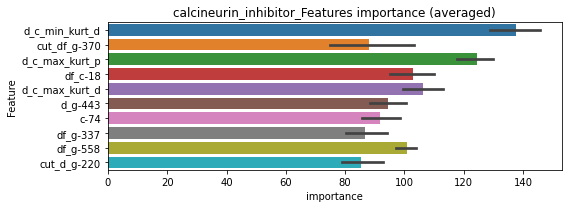

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 calcineurin_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 calcineurin_inhibitor=================================


Early stopping, best iteration is:
[835]	training's binary_logloss: 0.000235157	valid_1's binary_logloss: 0.000681541
Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 calcineurin_inhibitor=================================


Early stopping, best iteration is:
[769]	training's binary_logloss: 0.000241428	valid_1's binary_logloss: 0.000710842
Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 calcineurin_inhibitor=================================


Early stopping, best iteration is:
[821]	training's binary_logloss: 0.000237108	valid_1's binary_logloss: 0.000346635
Training until validation scores don't improve for 30 rounds


calcineurin_inhibitor logloss: 0.0005549496060278698


Early stopping, best iteration is:
[797]	training's binary_logloss: 0.00023716	valid_1's binary_logloss: 0.000480753
mutually exclusive columns: calcium_channel_blocker


calcium_channel_blocker, len(trt): 281, len(othr): 6900
target_rate: 0.0117998 → Adj_target_rate: 0.0101297


selected negative label: 6900


unpredictable_cols:calcium_channel_blocker → create_features


N_features:358
================= Pseudo labeling 1 / 3 =================



Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0419365	valid_1's binary_logloss: 0.12645
[2000]	training's binary_logloss: 0.0204284	valid_1's binary_logloss: 0.117644
Early stopping, best iteration is:
[2048]	training's binary_logloss: 0.0199257	valid_1's binary_logloss: 0.117289
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0402584	valid_1's binary_logloss: 0.145895
Early stopping, best iteration is:
[1563]	training's binary_logloss: 0.0252409	valid_1's binary_logloss: 0.140765
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.041352	valid_1's binary_logloss: 0.140403
Early stopping, best iteration is:
[1753]	training's binary_logloss: 0.0231102	valid_1's binary_logloss: 0.133573
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0421811	valid_1's binary_logloss: 0.125562
Early stopping, best

1 / 3, AUC score:0.969, PR-AUC:0.938
y_Threshold: 0.0632391, Threshold: 0.1195132, pos_neg_ratio: 0.8000000
Remove_noisy_data: 554 → Positive_corect_labels: 1241/7726
p_label_rate: 0.0100452 Vs.target_rate: 0.01180
Num_p_label: 40.0, Expected: 47.0, Threshold: 0.1195132, conf_0:0.08366, conf_1:0.15537
threshold: 0.1195132, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1241.0/7726, y_label_rate: 0.1606265
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0276746	valid_1's binary_logloss: 0.0762369
[2000]	training's binary_logloss: 0.0132046	valid_1's binary_logloss: 0.0637406
[3000]	training's binary_logloss: 0.00858767	valid_1's binary_logloss: 0.0597852
Early stopping, best iteration is:
[3632]	training's binary_logloss: 0.00701956	valid_1's binary_logloss: 0.0585136
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0266137	valid_1's binary_logloss: 0.086126
[2000]	training's binary_logloss: 0.0127227	valid_1's binary_logloss: 0.077151
Early stopping, best iteration is:
[2179]	training's binary_logloss: 0.0116312	valid_1's binary_logloss: 0.0762533
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0276819	valid_1's binary_logloss: 0.0741119
[2000]	training's binary_logloss: 0.0132511	valid_1's binary_logloss: 0.0631299
Early stopping, best iterat

2 / 3, AUC score:0.998, PR-AUC:0.993
y_Threshold: 0.0688564, Threshold: 0.1195132, pos_neg_ratio: 0.8000000
Remove_noisy_data: 102 → Positive_corect_labels: 1190.0/7624
p_label_rate: 0.0110497 Vs.target_rate: 0.01180
Num_p_label: 44.0, Expected: 47.0, Threshold: 0.1195132, conf_0:0.09561, conf_1:0.14342
threshold: 0.1195132, positive_p_label: 44.0/3982, p_label_rate: 0.0110497
positive_y_label: 1190.0/7624, y_label_rate: 0.1560860
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0226083	valid_1's binary_logloss: 0.0633282
[2000]	training's binary_logloss: 0.0108441	valid_1's binary_logloss: 0.0540554
Early stopping, best iteration is:
[2507]	training's binary_logloss: 0.00855667	valid_1's binary_logloss: 0.0521875
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0225917	valid_1's binary_logloss: 0.0656172
[2000]	training's binary_logloss: 0.0108564	valid_1's binary_logloss: 0.0557071
[3000]	training's binary_logloss: 0.00711347	valid_1's binary_logloss: 0.0522752
Early stopping, best iteration is:
[3008]	training's binary_logloss: 0.00709447	valid_1's binary_logloss: 0.0522169
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0226137	valid_1's binary_logloss: 0.0617031
[2000]	training's binary_logloss: 0.0108928	valid_1's binary_logloss: 0.0525637
Early stopping, best ite

3 / 3, AUC score:0.999, PR-AUC:0.996
y_Threshold: 0.0676055, Threshold: 0.1195132, pos_neg_ratio: 0.8000000
Remove_noisy_data: 60 → Positive_corect_labels: 1160.0/7564
p_label_rate: 0.0107986 Vs.target_rate: 0.01180
Num_p_label: 43.0, Expected: 47.0, Threshold: 0.1195132, conf_0:0.10756, conf_1:0.13146
threshold: 0.1195132, positive_p_label: 43.0/3982, p_label_rate: 0.0107986
positive_y_label: 1160.0/7564, y_label_rate: 0.1533580


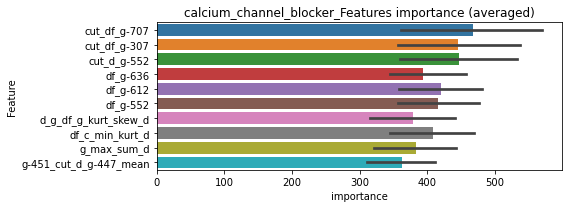

len(train_index) : 5673
len(valid_index) : 1891
================================= fold 1/4 calcium_channel_blocker=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0199674	valid_1's binary_logloss: 0.0543551
[2000]	training's binary_logloss: 0.00971436	valid_1's binary_logloss: 0.0448256
[3000]	training's binary_logloss: 0.00637051	valid_1's binary_logloss: 0.0415575
Early stopping, best iteration is:
[3232]	training's binary_logloss: 0.00590975	valid_1's binary_logloss: 0.041033


len(train_index) : 5673
len(valid_index) : 1891
================================= fold 2/4 calcium_channel_blocker=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0195818	valid_1's binary_logloss: 0.0575879
[2000]	training's binary_logloss: 0.00954796	valid_1's binary_logloss: 0.0490148
Early stopping, best iteration is:
[2967]	training's binary_logloss: 0.00632185	valid_1's binary_logloss: 0.0461432


len(train_index) : 5673
len(valid_index) : 1891
================================= fold 3/4 calcium_channel_blocker=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0203581	valid_1's binary_logloss: 0.0513783
[2000]	training's binary_logloss: 0.00989881	valid_1's binary_logloss: 0.041328
Early stopping, best iteration is:
[2941]	training's binary_logloss: 0.00663396	valid_1's binary_logloss: 0.0375679


len(train_index) : 5673
len(valid_index) : 1891
================================= fold 4/4 calcium_channel_blocker=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0208432	valid_1's binary_logloss: 0.0460825
[2000]	training's binary_logloss: 0.0100794	valid_1's binary_logloss: 0.036555
[3000]	training's binary_logloss: 0.00660089	valid_1's binary_logloss: 0.0331674
Early stopping, best iteration is:
[3776]	training's binary_logloss: 0.0052134	valid_1's binary_logloss: 0.0317407


calcium_channel_blocker logloss: 0.03912121443177663
calcium_channel_blocker is unpredictable(><)!
cannabinoid_receptor_agonist, len(trt): 42, len(othr): 3284
target_rate: 0.0017637 → Adj_target_rate: 0.0020135


selected negative label: 3284


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[603]	training's binary_logloss: 0.000520614	valid_1's binary_logloss: 0.0162831
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[637]	training's binary_logloss: 0.000505081	valid_1's binary_logloss: 0.00605358
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[678]	training's binary_logloss: 0.000487029	valid_1's binary_logloss: 0.00250004
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[631]	training's binary_logloss: 0.000497107	valid_1's binary_logloss: 0.0101461


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0036661, Threshold: 0.0157028, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00176
Num_p_label: 40.0, Expected: 7.0, Threshold: 0.0157028, conf_0:0.01099, conf_1:0.02041
Num_p_label: 9.0, Expected: 7.0, Adj_threshold_1: 0.0457028
threshold: 0.0457028, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[599]	training's binary_logloss: 0.000498343	valid_1's binary_logloss: 0.0156548
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[645]	training's binary_logloss: 0.000489	valid_1's binary_logloss: 0.0065417
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[661]	training's binary_logloss: 0.000481944	valid_1's binary_logloss: 0.00210619
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[694]	training's binary_logloss: 0.000456652	valid_1's binary_logloss: 0.00924031


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0438458, Threshold: 0.0457028, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0092918 Vs.target_rate: 0.00176
Num_p_label: 37.0, Expected: 7.0, Threshold: 0.0457028, conf_0:0.03656, conf_1:0.05484
Num_p_label: 20.0, Expected: 7.0, Adj_threshold_1: 0.0757028
Num_p_label: 13.0, Expected: 7.0, Adj_threshold_2: 0.1057028
threshold: 0.1057028, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[599]	training's binary_logloss: 0.000498343	valid_1's binary_logloss: 0.0156548
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[645]	training's binary_logloss: 0.000489	valid_1's binary_logloss: 0.0065417
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[661]	training's binary_logloss: 0.000481944	valid_1's binary_logloss: 0.00210619
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[694]	training's binary_logloss: 0.000456652	valid_1's binary_logloss: 0.00924031


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0438458, Threshold: 0.1057028, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0032647 Vs.target_rate: 0.00176
Num_p_label: 13.0, Expected: 7.0, Threshold: 0.1057028, conf_0:0.09513, conf_1:0.11627
threshold: 0.1057028, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 656.0/3808, y_label_rate: 0.1722689


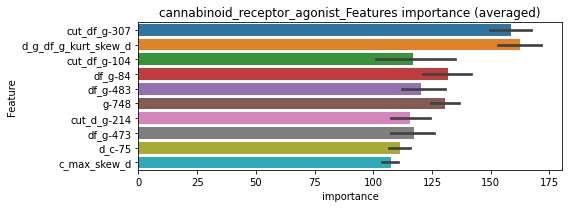

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 cannabinoid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[738]	training's binary_logloss: 0.000514613	valid_1's binary_logloss: 0.0150582


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 cannabinoid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[739]	training's binary_logloss: 0.000530707	valid_1's binary_logloss: 0.00625961


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 cannabinoid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[920]	training's binary_logloss: 0.00048154	valid_1's binary_logloss: 0.00210911


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 cannabinoid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[904]	training's binary_logloss: 0.000473577	valid_1's binary_logloss: 0.00751217


cannabinoid_receptor_agonist logloss: 0.007739094312311576
cannabinoid_receptor_antagonist, len(trt): 55, len(othr): 3284
target_rate: 0.0023096 → Adj_target_rate: 0.0025322


selected negative label: 3284


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[480]	training's binary_logloss: 0.000933275	valid_1's binary_logloss: 0.0304063
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[707]	training's binary_logloss: 0.000523666	valid_1's binary_logloss: 0.0187008
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[730]	training's binary_logloss: 0.00053694	valid_1's binary_logloss: 0.00963198
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[659]	training's binary_logloss: 0.000563127	valid_1's binary_logloss: 0.0238383


1 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0043579, Threshold: 0.0186458, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00231
Num_p_label: 40.0, Expected: 9.2, Threshold: 0.0186458, conf_0:0.01305, conf_1:0.02424
Num_p_label: 10.0, Expected: 9.2, Adj_threshold_1: 0.0486458
threshold: 0.0486458, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[414]	training's binary_logloss: 0.00124917	valid_1's binary_logloss: 0.0294604
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[610]	training's binary_logloss: 0.000602596	valid_1's binary_logloss: 0.0208916
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[730]	training's binary_logloss: 0.000528364	valid_1's binary_logloss: 0.00899489
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[484]	training's binary_logloss: 0.000905618	valid_1's binary_logloss: 0.0254082


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0170349, Threshold: 0.0486458, pos_neg_ratio: 0.8000000
Remove_noisy_data: 10 → Positive_corect_labels: 651.0/3798
p_label_rate: 0.0067805 Vs.target_rate: 0.00231
Num_p_label: 27.0, Expected: 9.2, Threshold: 0.0486458, conf_0:0.03892, conf_1:0.05837
Num_p_label: 15.0, Expected: 9.2, Adj_threshold_1: 0.0786458
threshold: 0.0786458, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 651.0/3798, y_label_rate: 0.1714060
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[703]	training's binary_logloss: 0.00050968	valid_1's binary_logloss: 0.0125301
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[566]	training's binary_logloss: 0.000649661	valid_1's binary_logloss: 0.019901
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[673]	training's binary_logloss: 0.000536368	valid_1's binary_logloss: 0.012086
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[713]	training's binary_logloss: 0.000516009	valid_1's binary_logloss: 0.00829396


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0182648, Threshold: 0.0786458, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 650.0/3796
p_label_rate: 0.0040181 Vs.target_rate: 0.00231
Num_p_label: 16.0, Expected: 9.2, Threshold: 0.0786458, conf_0:0.07078, conf_1:0.08651
threshold: 0.0786458, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 650.0/3796, y_label_rate: 0.1712329


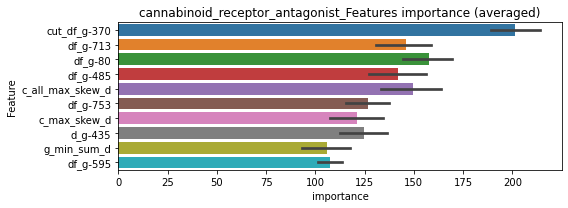

len(train_index) : 2847
len(valid_index) : 949
================================= fold 1/4 cannabinoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[895]	training's binary_logloss: 0.000524839	valid_1's binary_logloss: 0.014585


len(train_index) : 2847
len(valid_index) : 949
================================= fold 2/4 cannabinoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2847
len(valid_index) : 949
================================= fold 3/4 cannabinoid_receptor_antagonist=================================


Early stopping, best iteration is:
[503]	training's binary_logloss: 0.000814416	valid_1's binary_logloss: 0.0230425
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[917]	training's binary_logloss: 0.000526825	valid_1's binary_logloss: 0.00548739


len(train_index) : 2847
len(valid_index) : 949
================================= fold 4/4 cannabinoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[725]	training's binary_logloss: 0.000596462	valid_1's binary_logloss: 0.0125962


cannabinoid_receptor_antagonist logloss: 0.01392778409318148
carbonic_anhydrase_inhibitor, len(trt): 36, len(othr): 3284
target_rate: 0.0015117 → Adj_target_rate: 0.0017663


selected negative label: 3284


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[622]	training's binary_logloss: 0.000465209	valid_1's binary_logloss: 0.00805833
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[612]	training's binary_logloss: 0.000480941	valid_1's binary_logloss: 0.00471581
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[657]	training's binary_logloss: 0.000461174	valid_1's binary_logloss: 0.00151792
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[603]	training's binary_logloss: 0.000477514	valid_1's binary_logloss: 0.0142056


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0031655, Threshold: 0.0267386, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00151
Num_p_label: 40.0, Expected: 6.0, Threshold: 0.0267386, conf_0:0.01872, conf_1:0.03476
Num_p_label: 19.0, Expected: 6.0, Adj_threshold_1: 0.0567386
Num_p_label: 12.0, Expected: 6.0, Adj_threshold_2: 0.0867386
threshold: 0.0867386, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[642]	training's binary_logloss: 0.000446583	valid_1's binary_logloss: 0.00713691
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[585]	training's binary_logloss: 0.000487191	valid_1's binary_logloss: 0.00427252
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[618]	training's binary_logloss: 0.000464672	valid_1's binary_logloss: 0.00125295
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0378969, Threshold: 0.0867386, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[571]	training's binary_logloss: 0.000490705	valid_1's binary_logloss: 0.0143734


Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0095429 Vs.target_rate: 0.00151
Num_p_label: 38.0, Expected: 6.0, Threshold: 0.0867386, conf_0:0.06939, conf_1:0.10409
Num_p_label: 29.0, Expected: 6.0, Adj_threshold_1: 0.1167386
Num_p_label: 23.0, Expected: 6.0, Adj_threshold_2: 0.1467386
Num_p_label: 18.0, Expected: 6.0, Adj_threshold_3: 0.1767386
Num_p_label: 12.0, Expected: 6.0, Adj_threshold_4: 0.2067386
threshold: 0.2067386, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[642]	training's binary_logloss: 0.000446583	valid_1's binary_logloss: 0.00713691
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[585]	training's binary_logloss: 0.000487191	valid_1's binary_logloss: 0.00427252
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[618]	training's binary_logloss: 0.000464672	valid_1's binary_logloss: 0.00125295
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[571]	training's binary_logloss: 0.000490705	valid_1's binary_logloss: 0.0143734


y_Threshold: 0.0378969, Threshold: 0.2067386, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0030136 Vs.target_rate: 0.00151
Num_p_label: 12.0, Expected: 6.0, Threshold: 0.2067386, conf_0:0.18606, conf_1:0.22741
threshold: 0.2067386, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 656.0/3808, y_label_rate: 0.1722689


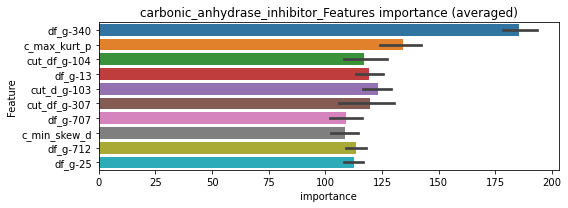

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 carbonic_anhydrase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[788]	training's binary_logloss: 0.000464653	valid_1's binary_logloss: 0.00609015


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 carbonic_anhydrase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[797]	training's binary_logloss: 0.000472609	valid_1's binary_logloss: 0.00361036


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 carbonic_anhydrase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[835]	training's binary_logloss: 0.000473608	valid_1's binary_logloss: 0.00143734


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 carbonic_anhydrase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


carbonic_anhydrase_inhibitor logloss: 0.005926366322413452


Early stopping, best iteration is:
[502]	training's binary_logloss: 0.000647125	valid_1's binary_logloss: 0.0125676


casein_kinase_inhibitor, len(trt): 36, len(othr): 3282
target_rate: 0.0015117 → Adj_target_rate: 0.0017663


selected negative label: 3282


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[623]	training's binary_logloss: 0.000400457	valid_1's binary_logloss: 0.00846284
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[652]	training's binary_logloss: 0.000392647	valid_1's binary_logloss: 0.00287968
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[652]	training's binary_logloss: 0.000406014	valid_1's binary_logloss: 0.00134398
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[597]	training's binary_logloss: 0.000419664	valid_1's binary_logloss: 0.0105626


y_Threshold: 0.0023100, Threshold: 0.0054544, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3806
p_label_rate: 0.0100452 Vs.target_rate: 0.00151
Num_p_label: 40.0, Expected: 6.0, Threshold: 0.0054544, conf_0:0.00382, conf_1:0.00709
Num_p_label: 0.0, Expected: 6.0, Adj_threshold_1: 0.0354544
threshold: 0.0354544, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[636]	training's binary_logloss: 0.000383488	valid_1's binary_logloss: 0.00727632
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[655]	training's binary_logloss: 0.000386362	valid_1's binary_logloss: 0.00266599
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[677]	training's binary_logloss: 0.000388571	valid_1's binary_logloss: 0.00121185
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0211393, Threshold: 0.0354544, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3806


Early stopping, best iteration is:
[551]	training's binary_logloss: 0.000435017	valid_1's binary_logloss: 0.0104285


p_label_rate: 0.0007534 Vs.target_rate: 0.00151
Num_p_label: 3.0, Expected: 6.0, Threshold: 0.0354544, conf_0:0.02836, conf_1:0.04255
threshold: 0.0354544, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[636]	training's binary_logloss: 0.000383488	valid_1's binary_logloss: 0.00727632
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[655]	training's binary_logloss: 0.000386362	valid_1's binary_logloss: 0.00266599
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[677]	training's binary_logloss: 0.000388571	valid_1's binary_logloss: 0.00121185
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[551]	training's binary_logloss: 0.000435017	valid_1's binary_logloss: 0.0104285


y_Threshold: 0.0211393, Threshold: 0.0354544, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3806
p_label_rate: 0.0007534 Vs.target_rate: 0.00151
Num_p_label: 3.0, Expected: 6.0, Threshold: 0.0354544, conf_0:0.03191, conf_1:0.03900
threshold: 0.0354544, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 656.0/3806, y_label_rate: 0.1723594


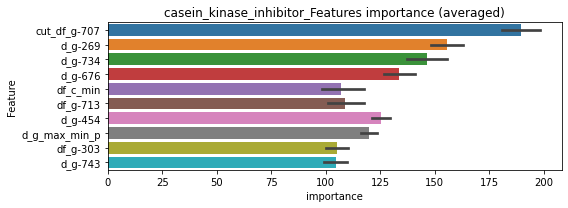

len(train_index) : 2854
len(valid_index) : 952
================================= fold 1/4 casein_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[884]	training's binary_logloss: 0.000393299	valid_1's binary_logloss: 0.00898627


len(train_index) : 2854
len(valid_index) : 952
================================= fold 2/4 casein_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000392872	valid_1's binary_logloss: 0.0025649
Early stopping, best iteration is:
[996]	training's binary_logloss: 0.000392872	valid_1's binary_logloss: 0.0025649


len(train_index) : 2855
len(valid_index) : 951
================================= fold 3/4 casein_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[921]	training's binary_logloss: 0.000401801	valid_1's binary_logloss: 0.000927093


len(train_index) : 2855
len(valid_index) : 951
================================= fold 4/4 casein_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[738]	training's binary_logloss: 0.000435478	valid_1's binary_logloss: 0.0111862


casein_kinase_inhibitor logloss: 0.005916038095457505
caspase_activator, len(trt): 18, len(othr): 3285
target_rate: 0.0007559 → Adj_target_rate: 0.0009799


selected negative label: 3285


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[501]	training's binary_logloss: 0.000302824	valid_1's binary_logloss: 0.00133131
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[535]	training's binary_logloss: 0.000294176	valid_1's binary_logloss: 0.00118279
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[528]	training's binary_logloss: 0.00029948	valid_1's binary_logloss: 0.00199732
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0013028, Threshold: 0.0174835, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, Expected: 3.0, Threshold: 0.0174835, conf_0:0.01224, conf_1:0.02273
Num_p_label: 19.0, Expected: 3.0, Adj_threshold_1: 0.0474835
Num_p_label: 15.0, Expected: 3.0, Adj_threshold_2: 0.0774835
Num_p_label: 13.0, Expected: 3.0, Adj_threshold_3: 0.1074835
Num_p_label: 9.0, Expected: 3.0, Adj_threshold_4: 0.1374835
Num_p_label: 7.0, Expected: 3.0, Adj_threshold_5: 0.1674835


Early stopping, best iteration is:
[541]	training's binary_logloss: 0.000292606	valid_1's binary_logloss: 0.000697271


threshold: 0.1674835, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[558]	training's binary_logloss: 0.000277795	valid_1's binary_logloss: 0.000813947
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[533]	training's binary_logloss: 0.000281947	valid_1's binary_logloss: 0.00242726
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[507]	training's binary_logloss: 0.000292805	valid_1's binary_logloss: 0.00191786
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0594465, Threshold: 0.1674835, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0060271 Vs.target_rate: 0.00076
Num_p_label: 24.0, Expected: 3.0, Threshold: 0.1674835, conf_0:0.13399, conf_1:0.20098
Num_p_label: 21.0, Expected: 3.0, Adj_threshold_1: 0.1974835
Num_p_label: 19.0, Expected: 3.0, Adj_threshold_2: 0.2274835
Num_p_label: 19.0, Expected: 3.0, Adj_threshold_3: 0.2574835
Num_p_label: 17.0, Expected: 3.0, Adj_threshold_4: 0.2874835
Num_p_label: 16.0, Expected: 3.0, Adj_threshold_5: 0.3174835
Num_p_label: 15.0, Expected: 3.0, Adj_threshold_6: 0.3474835


Early stopping, best iteration is:
[537]	training's binary_logloss: 0.000280508	valid_1's binary_logloss: 0.000643807


Num_p_label: 13.0, Expected: 3.0, Adj_threshold_7: 0.3774835
Num_p_label: 12.0, Expected: 3.0, Adj_threshold_8: 0.4074835
Num_p_label: 12.0, Expected: 3.0, Adj_threshold_9: 0.4374835
Num_p_label: 11.0, Expected: 3.0, Adj_threshold_10: 0.4674835
threshold: 0.4674835, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[558]	training's binary_logloss: 0.000277795	valid_1's binary_logloss: 0.000813947
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[533]	training's binary_logloss: 0.000281947	valid_1's binary_logloss: 0.00242726
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[507]	training's binary_logloss: 0.000292805	valid_1's binary_logloss: 0.00191786
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[537]	training's binary_logloss: 0.000280508	valid_1's binary_logloss: 0.000643807


y_Threshold: 0.0594465, Threshold: 0.4674835, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0027624 Vs.target_rate: 0.00076
Num_p_label: 11.0, Expected: 3.0, Threshold: 0.4674835, conf_0:0.42074, conf_1:0.51423
Num_p_label: 10.0, Expected: 3.0, Adj_threshold_1: 0.4974835
Num_p_label: 8.0, Expected: 3.0, Adj_threshold_2: 0.5274835
Num_p_label: 7.0, Expected: 3.0, Adj_threshold_3: 0.5574835
threshold: 0.5574835, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


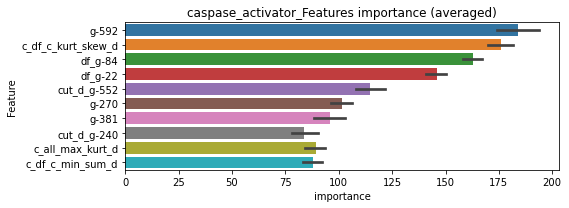

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 caspase_activator=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 caspase_activator=================================


Early stopping, best iteration is:
[777]	training's binary_logloss: 0.000289312	valid_1's binary_logloss: 0.000722737
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[821]	training's binary_logloss: 0.000285469	valid_1's binary_logloss: 0.00102439


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 caspase_activator=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 caspase_activator=================================


Early stopping, best iteration is:
[816]	training's binary_logloss: 0.000288862	valid_1's binary_logloss: 0.00185319
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[865]	training's binary_logloss: 0.000282729	valid_1's binary_logloss: 0.000573154


caspase_activator logloss: 0.0010436444945567498
catechol_o_methyltransferase_inhibitor, len(trt): 18, len(othr): 3284
target_rate: 0.0007559 → Adj_target_rate: 0.0009799


selected negative label: 3284


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[528]	training's binary_logloss: 0.00030772	valid_1's binary_logloss: 0.00303353
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[532]	training's binary_logloss: 0.000305618	valid_1's binary_logloss: 0.00133638
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[540]	training's binary_logloss: 0.000309081	valid_1's binary_logloss: 0.000560244
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0017871, Threshold: 0.0084900, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, Expected: 3.0, Threshold: 0.0084900, conf_0:0.00594, conf_1:0.01104
Num_p_label: 9.0, Expected: 3.0, Adj_threshold_1: 0.0384900
Num_p_label: 2.0, Expected: 3.0, Adj_threshold_2: 0.0684900


Early stopping, best iteration is:
[515]	training's binary_logloss: 0.000309126	valid_1's binary_logloss: 0.00740954


threshold: 0.0684900, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[531]	training's binary_logloss: 0.000292642	valid_1's binary_logloss: 0.00281957
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[546]	training's binary_logloss: 0.000293281	valid_1's binary_logloss: 0.000935046
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[534]	training's binary_logloss: 0.000297848	valid_1's binary_logloss: 0.000441886
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0383934, Threshold: 0.0684900, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0040181 Vs.target_rate: 0.00076
Num_p_label: 16.0, Expected: 3.0, Threshold: 0.0684900, conf_0:0.05479, conf_1:0.08219
Num_p_label: 11.0, Expected: 3.0, Adj_threshold_1: 0.0984900
Num_p_label: 8.0, Expected: 3.0, Adj_threshold_2: 0.1284900
Num_p_label: 4.0, Expected: 3.0, Adj_threshold_3: 0.1584900


Early stopping, best iteration is:
[510]	training's binary_logloss: 0.000296341	valid_1's binary_logloss: 0.0062002


threshold: 0.1584900, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[531]	training's binary_logloss: 0.000292642	valid_1's binary_logloss: 0.00281957
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[546]	training's binary_logloss: 0.000293281	valid_1's binary_logloss: 0.000935046
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[534]	training's binary_logloss: 0.000297848	valid_1's binary_logloss: 0.000441886
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0383934, Threshold: 0.1584900, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0010045 Vs.target_rate: 0.00076
Num_p_label: 4.0, Expected: 3.0, Threshold: 0.1584900, conf_0:0.14264, conf_1:0.17434
threshold: 0.1584900, positive_p_label: 4.0/3982, p_label_rate: 0.0010045


Early stopping, best iteration is:
[510]	training's binary_logloss: 0.000296341	valid_1's binary_logloss: 0.0062002


positive_y_label: 656.0/3808, y_label_rate: 0.1722689


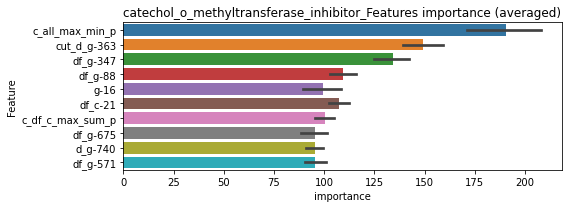

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 catechol_o_methyltransferase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[817]	training's binary_logloss: 0.000296321	valid_1's binary_logloss: 0.00159731


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 catechol_o_methyltransferase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[833]	training's binary_logloss: 0.000294428	valid_1's binary_logloss: 0.000892156


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 catechol_o_methyltransferase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2856
len(valid_index) : 952


Early stopping, best iteration is:
[805]	training's binary_logloss: 0.000299585	valid_1's binary_logloss: 0.000472023


================================= fold 4/4 catechol_o_methyltransferase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[828]	training's binary_logloss: 0.000295638	valid_1's binary_logloss: 0.00332749


catechol_o_methyltransferase_inhibitor logloss: 0.0015723531526136171
cc_chemokine_receptor_antagonist, len(trt): 102, len(othr): 3277
target_rate: 0.0042832 → Adj_target_rate: 0.0042806


selected negative label: 3277


unpredictable_cols:cc_chemokine_receptor_antagonist → create_features


N_features:358
================= Pseudo labeling 1 / 3 =================



Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0328742	valid_1's binary_logloss: 0.123046
Early stopping, best iteration is:
[1909]	training's binary_logloss: 0.0166873	valid_1's binary_logloss: 0.110346
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0342832	valid_1's binary_logloss: 0.0950312
[2000]	training's binary_logloss: 0.016509	valid_1's binary_logloss: 0.0761596
[3000]	training's binary_logloss: 0.0108004	valid_1's binary_logloss: 0.0694701
[4000]	training's binary_logloss: 0.00804592	valid_1's binary_logloss: 0.0661893
[5000]	training's binary_logloss: 0.00642719	valid_1's binary_logloss: 0.0641832
[6000]	training's binary_logloss: 0.00537078	valid_1's binary_logloss: 0.0628082
Early stopping, best iteration is:
[6929]	training's binary_logloss: 0.0046673	valid_1's binary_logloss: 0.0618533
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_l

1 / 3, AUC score:0.994, PR-AUC:0.985
y_Threshold: 0.0415278, Threshold: 0.1033802, pos_neg_ratio: 0.8000000
Remove_noisy_data: 172 → Positive_corect_labels: 635/3760
p_label_rate: 0.0100452 Vs.target_rate: 0.00428
Num_p_label: 40.0, Expected: 17.1, Threshold: 0.1033802, conf_0:0.07237, conf_1:0.13439
Num_p_label: 24.0, Expected: 17.1, Adj_threshold_1: 0.1333802
threshold: 0.1333802, positive_p_label: 24.0/3982, p_label_rate: 0.0060271
positive_y_label: 635.0/3760, y_label_rate: 0.1688830
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0313996	valid_1's binary_logloss: 0.0815956
[2000]	training's binary_logloss: 0.0152237	valid_1's binary_logloss: 0.0650173
[3000]	training's binary_logloss: 0.0099878	valid_1's binary_logloss: 0.0588929
Early stopping, best iteration is:
[3779]	training's binary_logloss: 0.00790163	valid_1's binary_logloss: 0.0563715
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0317752	valid_1's binary_logloss: 0.0755483
[2000]	training's binary_logloss: 0.0154266	valid_1's binary_logloss: 0.059277
[3000]	training's binary_logloss: 0.0101231	valid_1's binary_logloss: 0.0532777
[4000]	training's binary_logloss: 0.00757613	valid_1's binary_logloss: 0.0503344
[5000]	training's binary_logloss: 0.00605342	valid_1's binary_logloss: 0.0482975
Early stopping, best iteration is:
[5407]	training's binary_logloss: 0.00559779	valid_1's binary_logloss: 0.0476459
Train

2 / 3, AUC score:0.998, PR-AUC:0.995
y_Threshold: 0.0724097, Threshold: 0.1333802, pos_neg_ratio: 0.8000000
Remove_noisy_data: 32 → Positive_corect_labels: 619.0/3728
p_label_rate: 0.0085384 Vs.target_rate: 0.00428
Num_p_label: 34.0, Expected: 17.1, Threshold: 0.1333802, conf_0:0.10670, conf_1:0.16006
Num_p_label: 22.0, Expected: 17.1, Adj_threshold_1: 0.1633802
threshold: 0.1633802, positive_p_label: 22.0/3982, p_label_rate: 0.0055249
positive_y_label: 619.0/3728, y_label_rate: 0.1660408
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.028147	valid_1's binary_logloss: 0.0857096
[2000]	training's binary_logloss: 0.0137645	valid_1's binary_logloss: 0.0719959
Early stopping, best iteration is:
[2685]	training's binary_logloss: 0.0101765	valid_1's binary_logloss: 0.0685129
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0293289	valid_1's binary_logloss: 0.0740521
[2000]	training's binary_logloss: 0.0142623	valid_1's binary_logloss: 0.0577253
[3000]	training's binary_logloss: 0.009378	valid_1's binary_logloss: 0.0515309
[4000]	training's binary_logloss: 0.00702347	valid_1's binary_logloss: 0.0482129
[5000]	training's binary_logloss: 0.00563086	valid_1's binary_logloss: 0.0462876
Early stopping, best iteration is:
[5483]	training's binary_logloss: 0.005145	valid_1's binary_logloss: 0.0455022
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_log

3 / 3, AUC score:0.999, PR-AUC:0.997
y_Threshold: 0.0672987, Threshold: 0.1633802, pos_neg_ratio: 0.8000000
Remove_noisy_data: 30 → Positive_corect_labels: 604.0/3698
p_label_rate: 0.0060271 Vs.target_rate: 0.00428
Num_p_label: 24.0, Expected: 17.1, Threshold: 0.1633802, conf_0:0.14704, conf_1:0.17972
threshold: 0.1633802, positive_p_label: 24.0/3982, p_label_rate: 0.0060271
positive_y_label: 604.0/3698, y_label_rate: 0.1633315


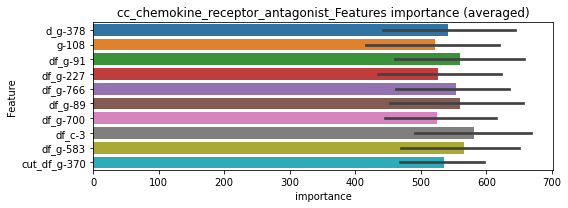

len(train_index) : 2773
len(valid_index) : 925
================================= fold 1/4 cc_chemokine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0267485	valid_1's binary_logloss: 0.0772037
[2000]	training's binary_logloss: 0.0130451	valid_1's binary_logloss: 0.0605648
[3000]	training's binary_logloss: 0.00859775	valid_1's binary_logloss: 0.0544283
[4000]	training's binary_logloss: 0.00643451	valid_1's binary_logloss: 0.051067
Early stopping, best iteration is:
[4295]	training's binary_logloss: 0.00600186	valid_1's binary_logloss: 0.0502543


len(train_index) : 2773
len(valid_index) : 925
================================= fold 2/4 cc_chemokine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0276184	valid_1's binary_logloss: 0.0635953
[2000]	training's binary_logloss: 0.0134042	valid_1's binary_logloss: 0.0475383
[3000]	training's binary_logloss: 0.00884846	valid_1's binary_logloss: 0.0413758
[4000]	training's binary_logloss: 0.00662288	valid_1's binary_logloss: 0.0382838
[5000]	training's binary_logloss: 0.00531268	valid_1's binary_logloss: 0.0365057
[6000]	training's binary_logloss: 0.00444597	valid_1's binary_logloss: 0.035078
Early stopping, best iteration is:
[6324]	training's binary_logloss: 0.00422523	valid_1's binary_logloss: 0.0347571


len(train_index) : 2774
len(valid_index) : 924
================================= fold 3/4 cc_chemokine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0273472	valid_1's binary_logloss: 0.0645201
[2000]	training's binary_logloss: 0.0133719	valid_1's binary_logloss: 0.0498724
[3000]	training's binary_logloss: 0.00882873	valid_1's binary_logloss: 0.0448926
[4000]	training's binary_logloss: 0.00662149	valid_1's binary_logloss: 0.0422729
[5000]	training's binary_logloss: 0.00531888	valid_1's binary_logloss: 0.0405717
Early stopping, best iteration is:
[5572]	training's binary_logloss: 0.00478386	valid_1's binary_logloss: 0.0398893


len(train_index) : 2774
len(valid_index) : 924
================================= fold 4/4 cc_chemokine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0271924	valid_1's binary_logloss: 0.0692113
[2000]	training's binary_logloss: 0.0132741	valid_1's binary_logloss: 0.0546494
[3000]	training's binary_logloss: 0.00876592	valid_1's binary_logloss: 0.0493041
[4000]	training's binary_logloss: 0.006573	valid_1's binary_logloss: 0.0466728
Early stopping, best iteration is:
[4934]	training's binary_logloss: 0.00534871	valid_1's binary_logloss: 0.0450435


cc_chemokine_receptor_antagonist logloss: 0.04248604212637255
cc_chemokine_receptor_antagonist is unpredictable(><)!
cck_receptor_antagonist, len(trt): 18, len(othr): 3285
target_rate: 0.0007559 → Adj_target_rate: 0.0009799


selected negative label: 3285


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[591]	training's binary_logloss: 0.000304214	valid_1's binary_logloss: 0.00137801
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[552]	training's binary_logloss: 0.000313799	valid_1's binary_logloss: 0.00193294
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[605]	training's binary_logloss: 0.000305233	valid_1's binary_logloss: 0.000711859
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0014221, Threshold: 0.0033819, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, Expected: 3.0, Threshold: 0.0033819, conf_0:0.00237, conf_1:0.00440


Early stopping, best iteration is:
[590]	training's binary_logloss: 0.000302057	valid_1's binary_logloss: 0.000857563


Num_p_label: 0.0, Expected: 3.0, Adj_threshold_1: 0.0333819
threshold: 0.0333819, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[585]	training's binary_logloss: 0.000300399	valid_1's binary_logloss: 0.00100823
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[574]	training's binary_logloss: 0.000296814	valid_1's binary_logloss: 0.00243604
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[592]	training's binary_logloss: 0.000302313	valid_1's binary_logloss: 0.000586752
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0792243, Threshold: 0.0333819, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0002511 Vs.target_rate: 0.00076
Num_p_label: 1.0, Expected: 3.0, Threshold: 0.0333819, conf_0:0.02671, conf_1:0.04006


Early stopping, best iteration is:
[549]	training's binary_logloss: 0.000307487	valid_1's binary_logloss: 0.000842244


threshold: 0.0333819, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[585]	training's binary_logloss: 0.000300399	valid_1's binary_logloss: 0.00100823
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[574]	training's binary_logloss: 0.000296814	valid_1's binary_logloss: 0.00243604
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[592]	training's binary_logloss: 0.000302313	valid_1's binary_logloss: 0.000586752
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0792243, Threshold: 0.0333819, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0002511 Vs.target_rate: 0.00076
Num_p_label: 1.0, Expected: 3.0, Threshold: 0.0333819, conf_0:0.03004, conf_1:0.03672
threshold: 0.0333819, positive_p_label: 1.0/3982, p_label_rate: 0.0002511


Early stopping, best iteration is:
[549]	training's binary_logloss: 0.000307487	valid_1's binary_logloss: 0.000842244


positive_y_label: 657.0/3810, y_label_rate: 0.1724409


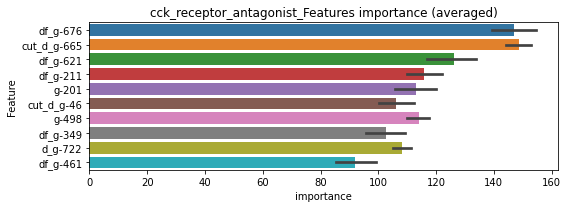

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 cck_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[858]	training's binary_logloss: 0.000306693	valid_1's binary_logloss: 0.00092717


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 cck_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[922]	training's binary_logloss: 0.000298787	valid_1's binary_logloss: 0.00151584


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 cck_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[964]	training's binary_logloss: 0.000302872	valid_1's binary_logloss: 0.000591471


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 cck_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000299292	valid_1's binary_logloss: 0.000845427
Early stopping, best iteration is:
[984]	training's binary_logloss: 0.000299411	valid_1's binary_logloss: 0.000845219


cck_receptor_antagonist logloss: 0.0009701331050584469


mutually exclusive columns: cdk_inhibitor


cdk_inhibitor, len(trt): 352, len(othr): 7646
target_rate: 0.0147812 → Adj_target_rate: 0.0122676


selected negative label: 7646


unpredictable_cols:cdk_inhibitor → create_features


N_features:358
================= Pseudo labeling 1 / 3 =================



Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0522803	valid_1's binary_logloss: 0.161708
[2000]	training's binary_logloss: 0.0247786	valid_1's binary_logloss: 0.140837
Early stopping, best iteration is:
[2459]	training's binary_logloss: 0.0198448	valid_1's binary_logloss: 0.13791
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0527806	valid_1's binary_logloss: 0.159926
[2000]	training's binary_logloss: 0.024742	valid_1's binary_logloss: 0.138026
Early stopping, best iteration is:
[2454]	training's binary_logloss: 0.0198328	valid_1's binary_logloss: 0.134342
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0529206	valid_1's binary_logloss: 0.161296
[2000]	training's binary_logloss: 0.0249857	valid_1's binary_logloss: 0.138588
Early stopping, best iteration is:
[2301]	training's binary_logloss: 0.0214589	valid_1's binary_logloss: 0.135617
Tr

1 / 3, AUC score:0.967, PR-AUC:0.937
y_Threshold: 0.0808015, Threshold: 0.1725416, pos_neg_ratio: 0.8000000
Remove_noisy_data: 586 → Positive_corect_labels: 1389/8589
p_label_rate: 0.0100452 Vs.target_rate: 0.01478
Num_p_label: 40.0, Expected: 58.9, Threshold: 0.1725416, conf_0:0.12078, conf_1:0.22430
threshold: 0.1725416, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1389.0/8589, y_label_rate: 0.1617185
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0417432	valid_1's binary_logloss: 0.114839
[2000]	training's binary_logloss: 0.0195346	valid_1's binary_logloss: 0.0902136
[3000]	training's binary_logloss: 0.012533	valid_1's binary_logloss: 0.0811684
Early stopping, best iteration is:
[3046]	training's binary_logloss: 0.0123295	valid_1's binary_logloss: 0.0809636
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0417357	valid_1's binary_logloss: 0.117017
[2000]	training's binary_logloss: 0.0195771	valid_1's binary_logloss: 0.0909131
[3000]	training's binary_logloss: 0.012586	valid_1's binary_logloss: 0.0817199
Early stopping, best iteration is:
[3953]	training's binary_logloss: 0.00938681	valid_1's binary_logloss: 0.077159
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0415346	valid_1's binary_logloss: 0.115769
[2000]	training's binary_logloss

2 / 3, AUC score:0.991, PR-AUC:0.983
y_Threshold: 0.1136571, Threshold: 0.1725416, pos_neg_ratio: 0.8000000
Remove_noisy_data: 136 → Positive_corect_labels: 1321.0/8453
p_label_rate: 0.0168257 Vs.target_rate: 0.01478
Num_p_label: 67.0, Expected: 58.9, Threshold: 0.1725416, conf_0:0.13803, conf_1:0.20705
threshold: 0.1725416, positive_p_label: 67.0/3982, p_label_rate: 0.0168257
positive_y_label: 1321.0/8453, y_label_rate: 0.1562759
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0381277	valid_1's binary_logloss: 0.100547
[2000]	training's binary_logloss: 0.0178467	valid_1's binary_logloss: 0.075043
[3000]	training's binary_logloss: 0.0114995	valid_1's binary_logloss: 0.0660444
Early stopping, best iteration is:
[3789]	training's binary_logloss: 0.00897911	valid_1's binary_logloss: 0.0620653
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0374884	valid_1's binary_logloss: 0.108341
[2000]	training's binary_logloss: 0.017541	valid_1's binary_logloss: 0.0846796
[3000]	training's binary_logloss: 0.0112897	valid_1's binary_logloss: 0.0763212
Early stopping, best iteration is:
[3492]	training's binary_logloss: 0.00960336	valid_1's binary_logloss: 0.0736762
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0378922	valid_1's binary_logloss: 0.103974
[2000]	training's binary_loglo

3 / 3, AUC score:0.999, PR-AUC:0.995
y_Threshold: 0.1116612, Threshold: 0.1725416, pos_neg_ratio: 0.8000000
Remove_noisy_data: 64 → Positive_corect_labels: 1289.0/8389
p_label_rate: 0.0160723 Vs.target_rate: 0.01478
Num_p_label: 64.0, Expected: 58.9, Threshold: 0.1725416, conf_0:0.15529, conf_1:0.18980
threshold: 0.1725416, positive_p_label: 64.0/3982, p_label_rate: 0.0160723
positive_y_label: 1289.0/8389, y_label_rate: 0.1536536


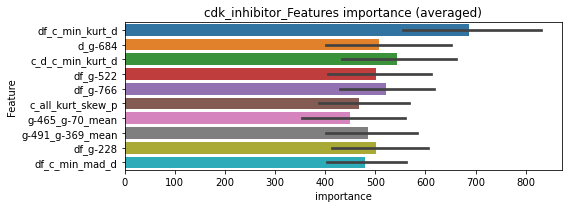

len(train_index) : 6291
len(valid_index) : 2098
================================= fold 1/4 cdk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0362458	valid_1's binary_logloss: 0.103259
[2000]	training's binary_logloss: 0.0169577	valid_1's binary_logloss: 0.0793167
[3000]	training's binary_logloss: 0.010938	valid_1's binary_logloss: 0.0710861
Early stopping, best iteration is:
[3893]	training's binary_logloss: 0.00831612	valid_1's binary_logloss: 0.0671881


len(train_index) : 6292
len(valid_index) : 2097
================================= fold 2/4 cdk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.036566	valid_1's binary_logloss: 0.0960742
[2000]	training's binary_logloss: 0.017158	valid_1's binary_logloss: 0.0722338
[3000]	training's binary_logloss: 0.0110822	valid_1's binary_logloss: 0.063352
[4000]	training's binary_logloss: 0.00818642	valid_1's binary_logloss: 0.0588267
[5000]	training's binary_logloss: 0.00650039	valid_1's binary_logloss: 0.056134
Early stopping, best iteration is:
[5199]	training's binary_logloss: 0.0062453	valid_1's binary_logloss: 0.0556888


len(train_index) : 6292
len(valid_index) : 2097
================================= fold 3/4 cdk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0363124	valid_1's binary_logloss: 0.0995051
[2000]	training's binary_logloss: 0.0170481	valid_1's binary_logloss: 0.0754223
[3000]	training's binary_logloss: 0.0110083	valid_1's binary_logloss: 0.0669149
Early stopping, best iteration is:
[3693]	training's binary_logloss: 0.00882838	valid_1's binary_logloss: 0.0634669


len(train_index) : 6292
len(valid_index) : 2097
================================= fold 4/4 cdk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0359451	valid_1's binary_logloss: 0.107117
[2000]	training's binary_logloss: 0.0169646	valid_1's binary_logloss: 0.0862139
[3000]	training's binary_logloss: 0.0109511	valid_1's binary_logloss: 0.0789697
Early stopping, best iteration is:
[3274]	training's binary_logloss: 0.00998268	valid_1's binary_logloss: 0.0777409


cdk_inhibitor logloss: 0.06602129692354747
cdk_inhibitor is unpredictable(><)!
chelating_agent, len(trt): 54, len(othr): 3280
target_rate: 0.0022676 → Adj_target_rate: 0.0024931


selected negative label: 3280


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[578]	training's binary_logloss: 0.00062622	valid_1's binary_logloss: 0.0229522
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[645]	training's binary_logloss: 0.000570763	valid_1's binary_logloss: 0.016665
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[761]	training's binary_logloss: 0.000522189	valid_1's binary_logloss: 0.00503989
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[686]	training's binary_logloss: 0.000532607	valid_1's binary_logloss: 0.0245782


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0043035, Threshold: 0.0158538, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3804
p_label_rate: 0.0100452 Vs.target_rate: 0.00227
Num_p_label: 40.0, Expected: 9.0, Threshold: 0.0158538, conf_0:0.01110, conf_1:0.02061
Num_p_label: 23.0, Expected: 9.0, Adj_threshold_1: 0.0458538
Num_p_label: 20.0, Expected: 9.0, Adj_threshold_2: 0.0758538
threshold: 0.0758538, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 656.0/3804, y_label_rate: 0.1724501
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[593]	training's binary_logloss: 0.000580797	valid_1's binary_logloss: 0.0196497
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[688]	training's binary_logloss: 0.000521607	valid_1's binary_logloss: 0.0140499
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[695]	training's binary_logloss: 0.000535254	valid_1's binary_logloss: 0.00509515
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[573]	training's binary_logloss: 0.00063492	valid_1's binary_logloss: 0.0230595


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0243332, Threshold: 0.0758538, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 653.0/3798
p_label_rate: 0.0067805 Vs.target_rate: 0.00227
Num_p_label: 27.0, Expected: 9.0, Threshold: 0.0758538, conf_0:0.06068, conf_1:0.09102
Num_p_label: 23.0, Expected: 9.0, Adj_threshold_1: 0.1058538
Num_p_label: 22.0, Expected: 9.0, Adj_threshold_2: 0.1358538
threshold: 0.1358538, positive_p_label: 22.0/3982, p_label_rate: 0.0055249
positive_y_label: 653.0/3798, y_label_rate: 0.1719326
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[699]	training's binary_logloss: 0.000501315	valid_1's binary_logloss: 0.0093914
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[579]	training's binary_logloss: 0.000621954	valid_1's binary_logloss: 0.0143247
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[628]	training's binary_logloss: 0.000553305	valid_1's binary_logloss: 0.0167683
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0263533, Threshold: 0.1358538, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[516]	training's binary_logloss: 0.000741274	valid_1's binary_logloss: 0.0266068


Remove_noisy_data: 4 → Positive_corect_labels: 651.0/3794
p_label_rate: 0.0055249 Vs.target_rate: 0.00227
Num_p_label: 22.0, Expected: 9.0, Threshold: 0.1358538, conf_0:0.12227, conf_1:0.14944
threshold: 0.1358538, positive_p_label: 22.0/3982, p_label_rate: 0.0055249
positive_y_label: 651.0/3794, y_label_rate: 0.1715867


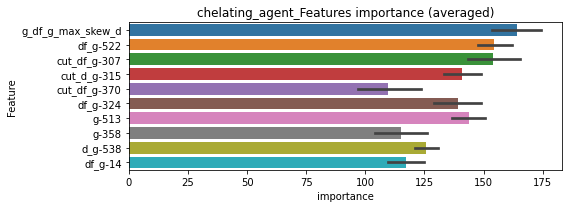

len(train_index) : 2845
len(valid_index) : 949
================================= fold 1/4 chelating_agent=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[922]	training's binary_logloss: 0.00051443	valid_1's binary_logloss: 0.00654562


len(train_index) : 2845
len(valid_index) : 949
================================= fold 2/4 chelating_agent=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2846
len(valid_index) : 948
================================= fold 3/4 chelating_agent=================================


Early stopping, best iteration is:
[598]	training's binary_logloss: 0.000676202	valid_1's binary_logloss: 0.0188089
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[736]	training's binary_logloss: 0.000588205	valid_1's binary_logloss: 0.00673318


len(train_index) : 2846
len(valid_index) : 948
================================= fold 4/4 chelating_agent=================================


Training until validation scores don't improve for 30 rounds


chelating_agent logloss: 0.011921980326103821


Early stopping, best iteration is:
[457]	training's binary_logloss: 0.000892355	valid_1's binary_logloss: 0.0155986


chk_inhibitor, len(trt): 24, len(othr): 3288
target_rate: 0.0010078 → Adj_target_rate: 0.0012513


selected negative label: 3288


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[594]	training's binary_logloss: 0.000342795	valid_1's binary_logloss: 0.00121442
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[602]	training's binary_logloss: 0.000348424	valid_1's binary_logloss: 0.00195828
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[551]	training's binary_logloss: 0.000362251	valid_1's binary_logloss: 0.00081638
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0029038, Threshold: 0.0508272, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00101
Num_p_label: 40.0, Expected: 4.0, Threshold: 0.0508272, conf_0:0.03558, conf_1:0.06608
Num_p_label: 29.0, Expected: 4.0, Adj_threshold_1: 0.0808272
Num_p_label: 23.0, Expected: 4.0, Adj_threshold_2: 0.1108272


Early stopping, best iteration is:
[556]	training's binary_logloss: 0.000362489	valid_1's binary_logloss: 0.00113003


Num_p_label: 22.0, Expected: 4.0, Adj_threshold_3: 0.1408272
Num_p_label: 21.0, Expected: 4.0, Adj_threshold_4: 0.1708272
Num_p_label: 19.0, Expected: 4.0, Adj_threshold_5: 0.2008272
Num_p_label: 17.0, Expected: 4.0, Adj_threshold_6: 0.2308272
Num_p_label: 14.0, Expected: 4.0, Adj_threshold_7: 0.2608272
Num_p_label: 11.0, Expected: 4.0, Adj_threshold_8: 0.2908272
Num_p_label: 11.0, Expected: 4.0, Adj_threshold_9: 0.3208272
Num_p_label: 10.0, Expected: 4.0, Adj_threshold_10: 0.3508272
threshold: 0.3508272, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[607]	training's binary_logloss: 0.000331048	valid_1's binary_logloss: 0.00094434
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[572]	training's binary_logloss: 0.000334367	valid_1's binary_logloss: 0.00125334
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[605]	training's binary_logloss: 0.000333028	valid_1's binary_logloss: 0.000754541
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1446481, Threshold: 0.3508272, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0082873 Vs.target_rate: 0.00101
Num_p_label: 33.0, Expected: 4.0, Threshold: 0.3508272, conf_0:0.28066, conf_1:0.42099


Early stopping, best iteration is:
[605]	training's binary_logloss: 0.000331613	valid_1's binary_logloss: 0.00104334


Num_p_label: 31.0, Expected: 4.0, Adj_threshold_1: 0.3808272
Num_p_label: 29.0, Expected: 4.0, Adj_threshold_2: 0.4108272
Num_p_label: 28.0, Expected: 4.0, Adj_threshold_3: 0.4408272
Num_p_label: 27.0, Expected: 4.0, Adj_threshold_4: 0.4708272
Num_p_label: 25.0, Expected: 4.0, Adj_threshold_5: 0.5008272
Num_p_label: 24.0, Expected: 4.0, Adj_threshold_6: 0.5308272
Num_p_label: 22.0, Expected: 4.0, Adj_threshold_7: 0.5608272
Num_p_label: 19.0, Expected: 4.0, Adj_threshold_8: 0.5908272
Num_p_label: 19.0, Expected: 4.0, Adj_threshold_9: 0.6208272
Num_p_label: 19.0, Expected: 4.0, Adj_threshold_10: 0.6508272
threshold: 0.6508272, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[607]	training's binary_logloss: 0.000331048	valid_1's binary_logloss: 0.00094434
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[572]	training's binary_logloss: 0.000334367	valid_1's binary_logloss: 0.00125334
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[605]	training's binary_logloss: 0.000333028	valid_1's binary_logloss: 0.000754541
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1446481, Threshold: 0.6508272, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0047715 Vs.target_rate: 0.00101
Num_p_label: 19.0, Expected: 4.0, Threshold: 0.6508272, conf_0:0.58574, conf_1:0.71591
Num_p_label: 19.0, Expected: 4.0, Adj_threshold_1: 0.6808272


Early stopping, best iteration is:
[605]	training's binary_logloss: 0.000331613	valid_1's binary_logloss: 0.00104334


Num_p_label: 18.0, Expected: 4.0, Adj_threshold_2: 0.7108272
Num_p_label: 15.0, Expected: 4.0, Adj_threshold_3: 0.7408272
Num_p_label: 14.0, Expected: 4.0, Adj_threshold_4: 0.7708272
Num_p_label: 13.0, Expected: 4.0, Adj_threshold_5: 0.8008272
Num_p_label: 12.0, Expected: 4.0, Adj_threshold_6: 0.8308272
Num_p_label: 9.0, Expected: 4.0, Adj_threshold_7: 0.8608272
threshold: 0.8608272, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


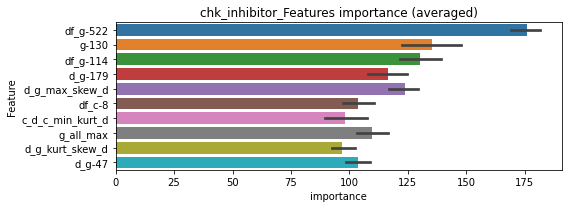

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 chk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[776]	training's binary_logloss: 0.000349542	valid_1's binary_logloss: 0.000900355


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 chk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[872]	training's binary_logloss: 0.000338926	valid_1's binary_logloss: 0.00120959


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 chk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[834]	training's binary_logloss: 0.000340347	valid_1's binary_logloss: 0.00084901


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 chk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[869]	training's binary_logloss: 0.000336722	valid_1's binary_logloss: 0.00100986


chk_inhibitor logloss: 0.000992178651250423
chloride_channel_blocker, len(trt): 42, len(othr): 3279
target_rate: 0.0017637 → Adj_target_rate: 0.0020135


selected negative label: 3279


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[656]	training's binary_logloss: 0.000468475	valid_1's binary_logloss: 0.00703383
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[658]	training's binary_logloss: 0.00046491	valid_1's binary_logloss: 0.0127571
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[637]	training's binary_logloss: 0.000482187	valid_1's binary_logloss: 0.00481833
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[648]	training's binary_logloss: 0.000476509	valid_1's binary_logloss: 0.00752055


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0034996, Threshold: 0.0288828, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 655/3802
p_label_rate: 0.0100452 Vs.target_rate: 0.00176
Num_p_label: 40.0, Expected: 7.0, Threshold: 0.0288828, conf_0:0.02022, conf_1:0.03755
Num_p_label: 24.0, Expected: 7.0, Adj_threshold_1: 0.0588828
Num_p_label: 14.0, Expected: 7.0, Adj_threshold_2: 0.0888828
threshold: 0.0888828, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 655.0/3802, y_label_rate: 0.1722777
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[655]	training's binary_logloss: 0.000449643	valid_1's binary_logloss: 0.0066621
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[622]	training's binary_logloss: 0.000473678	valid_1's binary_logloss: 0.0076149
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[654]	training's binary_logloss: 0.000454078	valid_1's binary_logloss: 0.004228
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[653]	training's binary_logloss: 0.00045357	valid_1's binary_logloss: 0.00710693


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0449594, Threshold: 0.0888828, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3802
p_label_rate: 0.0145655 Vs.target_rate: 0.00176
Num_p_label: 58.0, Expected: 7.0, Threshold: 0.0888828, conf_0:0.07111, conf_1:0.10666
Num_p_label: 49.0, Expected: 7.0, Adj_threshold_1: 0.1188828
Num_p_label: 46.0, Expected: 7.0, Adj_threshold_2: 0.1488828
Num_p_label: 36.0, Expected: 7.0, Adj_threshold_3: 0.1788828
Num_p_label: 33.0, Expected: 7.0, Adj_threshold_4: 0.2088828
Num_p_label: 28.0, Expected: 7.0, Adj_threshold_5: 0.2388828
Num_p_label: 23.0, Expected: 7.0, Adj_threshold_6: 0.2688828
Num_p_label: 21.0, Expected: 7.0, Adj_threshold_7: 0.2988828
Num_p_label: 20.0, Expected: 7.0, Adj_threshold_8: 0.3288828
Num_p_label: 19.0, Expected: 7.0, Adj_threshold_9: 0.3588828
Num_p_label: 19.0, Expected: 7.0, Adj_threshold_10: 0.3888828
threshold: 0.3888828, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_la

Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[655]	training's binary_logloss: 0.000449643	valid_1's binary_logloss: 0.0066621
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[622]	training's binary_logloss: 0.000473678	valid_1's binary_logloss: 0.0076149
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[654]	training's binary_logloss: 0.000454078	valid_1's binary_logloss: 0.004228
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[653]	training's binary_logloss: 0.00045357	valid_1's binary_logloss: 0.00710693


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0449594, Threshold: 0.3888828, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3802
p_label_rate: 0.0047715 Vs.target_rate: 0.00176
Num_p_label: 19.0, Expected: 7.0, Threshold: 0.3888828, conf_0:0.34999, conf_1:0.42777
Num_p_label: 17.0, Expected: 7.0, Adj_threshold_1: 0.4188828
threshold: 0.4188828, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 655.0/3802, y_label_rate: 0.1722777


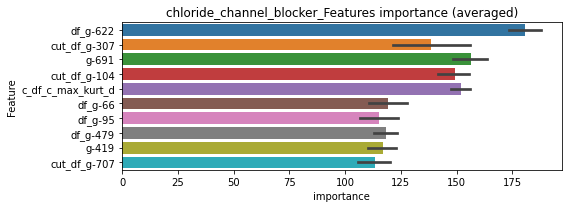

len(train_index) : 2851
len(valid_index) : 951
================================= fold 1/4 chloride_channel_blocker=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[883]	training's binary_logloss: 0.000467399	valid_1's binary_logloss: 0.00573903


len(train_index) : 2851
len(valid_index) : 951
================================= fold 2/4 chloride_channel_blocker=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[869]	training's binary_logloss: 0.000468194	valid_1's binary_logloss: 0.00553374


len(train_index) : 2852
len(valid_index) : 950
================================= fold 3/4 chloride_channel_blocker=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[928]	training's binary_logloss: 0.000458472	valid_1's binary_logloss: 0.00414749


len(train_index) : 2852
len(valid_index) : 950
================================= fold 4/4 chloride_channel_blocker=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[764]	training's binary_logloss: 0.000494184	valid_1's binary_logloss: 0.00817519


chloride_channel_blocker logloss: 0.005899627748241927
cholesterol_inhibitor, len(trt): 48, len(othr): 3286
target_rate: 0.0020156 → Adj_target_rate: 0.0022556


selected negative label: 3286


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[670]	training's binary_logloss: 0.000489328	valid_1's binary_logloss: 0.0104164
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[663]	training's binary_logloss: 0.000497935	valid_1's binary_logloss: 0.0146933
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[704]	training's binary_logloss: 0.000492301	valid_1's binary_logloss: 0.00241452
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[703]	training's binary_logloss: 0.000481984	valid_1's binary_logloss: 0.00930893


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0043721, Threshold: 0.0129494, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00202
Num_p_label: 40.0, Expected: 8.0, Threshold: 0.0129494, conf_0:0.00906, conf_1:0.01683
Num_p_label: 9.0, Expected: 8.0, Adj_threshold_1: 0.0429494
threshold: 0.0429494, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[656]	training's binary_logloss: 0.000487949	valid_1's binary_logloss: 0.00941592
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[651]	training's binary_logloss: 0.000487492	valid_1's binary_logloss: 0.0131178
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[720]	training's binary_logloss: 0.000476764	valid_1's binary_logloss: 0.00213626
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[656]	training's binary_logloss: 0.000492387	valid_1's binary_logloss: 0.00742923


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0269632, Threshold: 0.0429494, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3809
p_label_rate: 0.0050226 Vs.target_rate: 0.00202
Num_p_label: 20.0, Expected: 8.0, Threshold: 0.0429494, conf_0:0.03436, conf_1:0.05154
threshold: 0.0429494, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 656.0/3809, y_label_rate: 0.1722237
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000548902	valid_1's binary_logloss: 0.0100191
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[673]	training's binary_logloss: 0.000483999	valid_1's binary_logloss: 0.00369522
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[704]	training's binary_logloss: 0.000477838	valid_1's binary_logloss: 0.00164511
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[665]	training's binary_logloss: 0.000474296	valid_1's binary_logloss: 0.0106653


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0303130, Threshold: 0.0429494, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3809
p_label_rate: 0.0052737 Vs.target_rate: 0.00202
Num_p_label: 21.0, Expected: 8.0, Threshold: 0.0429494, conf_0:0.03865, conf_1:0.04724
Num_p_label: 7.0, Expected: 8.0, Adj_threshold_1: 0.0729494
threshold: 0.0729494, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 656.0/3809, y_label_rate: 0.1722237


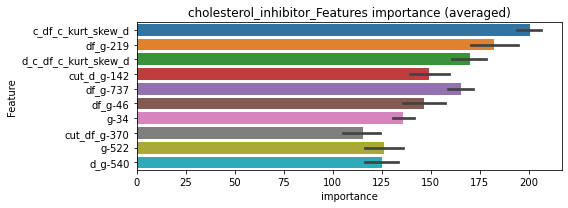

len(train_index) : 2856
len(valid_index) : 953
================================= fold 1/4 cholesterol_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[916]	training's binary_logloss: 0.000479556	valid_1's binary_logloss: 0.00880695


len(train_index) : 2857
len(valid_index) : 952
================================= fold 2/4 cholesterol_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[873]	training's binary_logloss: 0.000493883	valid_1's binary_logloss: 0.00415688


len(train_index) : 2857
len(valid_index) : 952
================================= fold 3/4 cholesterol_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000485055	valid_1's binary_logloss: 0.00169638
Early stopping, best iteration is:
[977]	training's binary_logloss: 0.000485055	valid_1's binary_logloss: 0.00169638


len(train_index) : 2857
len(valid_index) : 952
================================= fold 4/4 cholesterol_inhibitor=================================


Training until validation scores don't improve for 30 rounds


cholesterol_inhibitor logloss: 0.0067150879641827


Early stopping, best iteration is:
[548]	training's binary_logloss: 0.000680731	valid_1's binary_logloss: 0.0121954


cholinergic_receptor_antagonist, len(trt): 54, len(othr): 3286
target_rate: 0.0022676 → Adj_target_rate: 0.0024931


selected negative label: 3286


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[730]	training's binary_logloss: 0.000521373	valid_1's binary_logloss: 0.0140646
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[694]	training's binary_logloss: 0.000531394	valid_1's binary_logloss: 0.0155778
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[742]	training's binary_logloss: 0.0005203	valid_1's binary_logloss: 0.00999956
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[590]	training's binary_logloss: 0.000652298	valid_1's binary_logloss: 0.0136385


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0045289, Threshold: 0.0110148, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00227
Num_p_label: 40.0, Expected: 9.0, Threshold: 0.0110148, conf_0:0.00771, conf_1:0.01432
Num_p_label: 5.0, Expected: 9.0, Adj_threshold_1: 0.0410148
threshold: 0.0410148, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[724]	training's binary_logloss: 0.000502142	valid_1's binary_logloss: 0.0119322
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[667]	training's binary_logloss: 0.000529785	valid_1's binary_logloss: 0.0112461
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[645]	training's binary_logloss: 0.000550322	valid_1's binary_logloss: 0.0105343
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[605]	training's binary_logloss: 0.000597341	valid_1's binary_logloss: 0.0129249


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0574733, Threshold: 0.0410148, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0025113 Vs.target_rate: 0.00227
Num_p_label: 10.0, Expected: 9.0, Threshold: 0.0410148, conf_0:0.03281, conf_1:0.04922
threshold: 0.0410148, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[724]	training's binary_logloss: 0.000502142	valid_1's binary_logloss: 0.0119322
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[667]	training's binary_logloss: 0.000529785	valid_1's binary_logloss: 0.0112461
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[645]	training's binary_logloss: 0.000550322	valid_1's binary_logloss: 0.0105343
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[605]	training's binary_logloss: 0.000597341	valid_1's binary_logloss: 0.0129249


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0574733, Threshold: 0.0410148, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0025113 Vs.target_rate: 0.00227
Num_p_label: 10.0, Expected: 9.0, Threshold: 0.0410148, conf_0:0.03691, conf_1:0.04512
threshold: 0.0410148, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


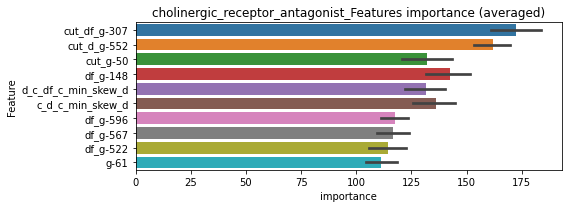

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 cholinergic_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[692]	training's binary_logloss: 0.000611556	valid_1's binary_logloss: 0.0132076


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 cholinergic_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[897]	training's binary_logloss: 0.000523485	valid_1's binary_logloss: 0.0111243


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 cholinergic_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[866]	training's binary_logloss: 0.000543759	valid_1's binary_logloss: 0.0106512


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 cholinergic_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


cholinergic_receptor_antagonist logloss: 0.012014577570181607


Early stopping, best iteration is:
[551]	training's binary_logloss: 0.000754834	valid_1's binary_logloss: 0.0130763


coagulation_factor_inhibitor, len(trt): 24, len(othr): 3285
target_rate: 0.0010078 → Adj_target_rate: 0.0012513


selected negative label: 3285


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[619]	training's binary_logloss: 0.000344464	valid_1's binary_logloss: 0.00134162
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[662]	training's binary_logloss: 0.000329642	valid_1's binary_logloss: 0.00217695
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[648]	training's binary_logloss: 0.000337413	valid_1's binary_logloss: 0.00166693
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0019893, Threshold: 0.0093222, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00101
Num_p_label: 40.0, Expected: 4.0, Threshold: 0.0093222, conf_0:0.00653, conf_1:0.01212
Num_p_label: 8.0, Expected: 4.0, Adj_threshold_1: 0.0393222


Early stopping, best iteration is:
[562]	training's binary_logloss: 0.000365079	valid_1's binary_logloss: 0.00637531


threshold: 0.0393222, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[671]	training's binary_logloss: 0.000327457	valid_1's binary_logloss: 0.00146437
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[655]	training's binary_logloss: 0.000329707	valid_1's binary_logloss: 0.00218702
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[614]	training's binary_logloss: 0.000334413	valid_1's binary_logloss: 0.00157047
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0234848, Threshold: 0.0393222, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[614]	training's binary_logloss: 0.000334307	valid_1's binary_logloss: 0.00545158


Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0055249 Vs.target_rate: 0.00101
Num_p_label: 22.0, Expected: 4.0, Threshold: 0.0393222, conf_0:0.03146, conf_1:0.04719
Num_p_label: 11.0, Expected: 4.0, Adj_threshold_1: 0.0693222
Num_p_label: 5.0, Expected: 4.0, Adj_threshold_2: 0.0993222
threshold: 0.0993222, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[671]	training's binary_logloss: 0.000327457	valid_1's binary_logloss: 0.00146437
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[655]	training's binary_logloss: 0.000329707	valid_1's binary_logloss: 0.00218702
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[614]	training's binary_logloss: 0.000334413	valid_1's binary_logloss: 0.00157047
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0234848, Threshold: 0.0993222, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810


Early stopping, best iteration is:
[614]	training's binary_logloss: 0.000334307	valid_1's binary_logloss: 0.00545158


p_label_rate: 0.0012557 Vs.target_rate: 0.00101
Num_p_label: 5.0, Expected: 4.0, Threshold: 0.0993222, conf_0:0.08939, conf_1:0.10925
threshold: 0.0993222, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


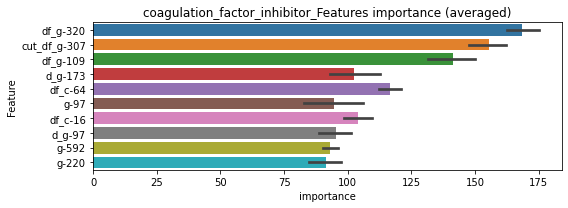

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 coagulation_factor_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000337247	valid_1's binary_logloss: 0.000908123
Early stopping, best iteration is:
[1043]	training's binary_logloss: 0.000334719	valid_1's binary_logloss: 0.000904034


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 coagulation_factor_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[889]	training's binary_logloss: 0.000347126	valid_1's binary_logloss: 0.00176524


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 coagulation_factor_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[927]	training's binary_logloss: 0.00034394	valid_1's binary_logloss: 0.00202718


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 coagulation_factor_inhibitor=================================


Training until validation scores don't improve for 30 rounds


coagulation_factor_inhibitor logloss: 0.002327187377229491


Early stopping, best iteration is:
[561]	training's binary_logloss: 0.000454307	valid_1's binary_logloss: 0.00461426


corticosteroid_agonist, len(trt): 36, len(othr): 3286
target_rate: 0.0015117 → Adj_target_rate: 0.0017663


selected negative label: 3286


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[684]	training's binary_logloss: 0.000428926	valid_1's binary_logloss: 0.00379285
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[705]	training's binary_logloss: 0.000420882	valid_1's binary_logloss: 0.00917052
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[666]	training's binary_logloss: 0.00043741	valid_1's binary_logloss: 0.00410989
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[689]	training's binary_logloss: 0.000424921	valid_1's binary_logloss: 0.00585731


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0036784, Threshold: 0.0111276, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00151
Num_p_label: 40.0, Expected: 6.0, Threshold: 0.0111276, conf_0:0.00779, conf_1:0.01447
Num_p_label: 3.0, Expected: 6.0, Adj_threshold_1: 0.0411276
threshold: 0.0411276, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[689]	training's binary_logloss: 0.000414537	valid_1's binary_logloss: 0.00318606
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[673]	training's binary_logloss: 0.000413506	valid_1's binary_logloss: 0.00975936
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[571]	training's binary_logloss: 0.000501428	valid_1's binary_logloss: 0.00412325
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[657]	training's binary_logloss: 0.000421845	valid_1's binary_logloss: 0.00619963


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0217259, Threshold: 0.0411276, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3809
p_label_rate: 0.0035158 Vs.target_rate: 0.00151
Num_p_label: 14.0, Expected: 6.0, Threshold: 0.0411276, conf_0:0.03290, conf_1:0.04935
threshold: 0.0411276, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 656.0/3809, y_label_rate: 0.1722237
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[598]	training's binary_logloss: 0.000455767	valid_1's binary_logloss: 0.0118173
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[647]	training's binary_logloss: 0.000427988	valid_1's binary_logloss: 0.0037288
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[673]	training's binary_logloss: 0.000425165	valid_1's binary_logloss: 0.00183817
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[672]	training's binary_logloss: 0.000416801	valid_1's binary_logloss: 0.00286468


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0527534, Threshold: 0.0411276, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3809
p_label_rate: 0.0042692 Vs.target_rate: 0.00151
Num_p_label: 17.0, Expected: 6.0, Threshold: 0.0411276, conf_0:0.03701, conf_1:0.04524
Num_p_label: 6.0, Expected: 6.0, Adj_threshold_1: 0.0711276
threshold: 0.0711276, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 656.0/3809, y_label_rate: 0.1722237


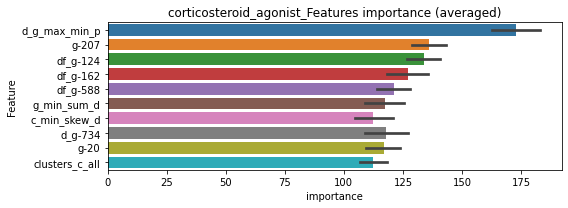

len(train_index) : 2856
len(valid_index) : 953
================================= fold 1/4 corticosteroid_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[697]	training's binary_logloss: 0.000494819	valid_1's binary_logloss: 0.00995841


len(train_index) : 2857
len(valid_index) : 952
================================= fold 2/4 corticosteroid_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000417376	valid_1's binary_logloss: 0.00353922
Early stopping, best iteration is:
[979]	training's binary_logloss: 0.000418504	valid_1's binary_logloss: 0.00353718


len(train_index) : 2857
len(valid_index) : 952
================================= fold 3/4 corticosteroid_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000418505	valid_1's binary_logloss: 0.00196332
Early stopping, best iteration is:
[1048]	training's binary_logloss: 0.00041417	valid_1's binary_logloss: 0.00195561


len(train_index) : 2857
len(valid_index) : 952
================================= fold 4/4 corticosteroid_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000417	valid_1's binary_logloss: 0.00221329
Early stopping, best iteration is:
[983]	training's binary_logloss: 0.00041788	valid_1's binary_logloss: 0.0022118


corticosteroid_agonist logloss: 0.00441733897288281
cyclooxygenase_inhibitor, len(trt): 435, len(othr): 3230
target_rate: 0.0182666 → Adj_target_rate: 0.0146863


selected negative label: 3230


unpredictable_cols:cyclooxygenase_inhibitor → create_features


N_features:358
================= Pseudo labeling 1 / 3 =================



Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[552]	training's binary_logloss: 0.15395	valid_1's binary_logloss: 0.395305
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[639]	training's binary_logloss: 0.138026	valid_1's binary_logloss: 0.383959
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0944696	valid_1's binary_logloss: 0.357048
Early stopping, best iteration is:
[986]	training's binary_logloss: 0.09577	valid_1's binary_logloss: 0.35691
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[729]	training's binary_logloss: 0.124462	valid_1's binary_logloss: 0.385668


1 / 3, AUC score:0.735, PR-AUC:0.553
y_Threshold: 0.1706700, Threshold: 0.4711271, pos_neg_ratio: 0.8000000
Remove_noisy_data: 776 → Positive_corect_labels: 323/3100
p_label_rate: 0.0100452 Vs.target_rate: 0.01827
Num_p_label: 40.0, Expected: 72.7, Threshold: 0.4711271, conf_0:0.32979, conf_1:0.61247
threshold: 0.4711271, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 323.0/3100, y_label_rate: 0.1041935
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0443177	valid_1's binary_logloss: 0.199251
Early stopping, best iteration is:
[1129]	training's binary_logloss: 0.0390512	valid_1's binary_logloss: 0.19762
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0465963	valid_1's binary_logloss: 0.160631
Early stopping, best iteration is:
[1943]	training's binary_logloss: 0.023202	valid_1's binary_logloss: 0.147494
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0455612	valid_1's binary_logloss: 0.1914
Early stopping, best iteration is:
[1358]	training's binary_logloss: 0.0331164	valid_1's binary_logloss: 0.186628
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0459493	valid_1's binary_logloss: 0.174554
Early stopping, best iteration is:
[1322]	training's binary_logloss: 0.0343144	valid_1's binary_loglos

2 / 3, AUC score:0.953, PR-AUC:0.851
y_Threshold: 0.1026078, Threshold: 0.4711271, pos_neg_ratio: 0.8000000
Remove_noisy_data: 142 → Positive_corect_labels: 252.0/2958
p_label_rate: 0.0268709 Vs.target_rate: 0.01827
Num_p_label: 107.0, Expected: 72.7, Threshold: 0.4711271, conf_0:0.37690, conf_1:0.56535
threshold: 0.4711271, positive_p_label: 107.0/3982, p_label_rate: 0.0268709
positive_y_label: 252.0/2958, y_label_rate: 0.0851927
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0347104	valid_1's binary_logloss: 0.143386
Early stopping, best iteration is:
[1467]	training's binary_logloss: 0.0231073	valid_1's binary_logloss: 0.138258
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0351944	valid_1's binary_logloss: 0.121433
Early stopping, best iteration is:
[1882]	training's binary_logloss: 0.0180027	valid_1's binary_logloss: 0.110225
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0348342	valid_1's binary_logloss: 0.132584
Early stopping, best iteration is:
[1742]	training's binary_logloss: 0.0192906	valid_1's binary_logloss: 0.123208
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0359295	valid_1's binary_logloss: 0.120596
[2000]	training's binary_logloss: 0.0172705	valid_1's binary_logloss: 0.105811
Early stopping, bes

3 / 3, AUC score:0.982, PR-AUC:0.936
y_Threshold: 0.0779165, Threshold: 0.4711271, pos_neg_ratio: 0.8000000
Remove_noisy_data: 58 → Positive_corect_labels: 223.0/2900
p_label_rate: 0.0339026 Vs.target_rate: 0.01827
Num_p_label: 135.0, Expected: 72.7, Threshold: 0.4711271, conf_0:0.42401, conf_1:0.51824
Num_p_label: 130.0, Expected: 72.7, Adj_threshold_1: 0.5011271
Num_p_label: 129.0, Expected: 72.7, Adj_threshold_2: 0.5311271
Num_p_label: 128.0, Expected: 72.7, Adj_threshold_3: 0.5611271
Num_p_label: 124.0, Expected: 72.7, Adj_threshold_4: 0.5911271
Num_p_label: 119.0, Expected: 72.7, Adj_threshold_5: 0.6211271
Num_p_label: 111.0, Expected: 72.7, Adj_threshold_6: 0.6511271
Num_p_label: 105.0, Expected: 72.7, Adj_threshold_7: 0.6811271
threshold: 0.6811271, positive_p_label: 105.0/3982, p_label_rate: 0.0263687
positive_y_label: 223.0/2900, y_label_rate: 0.0768966


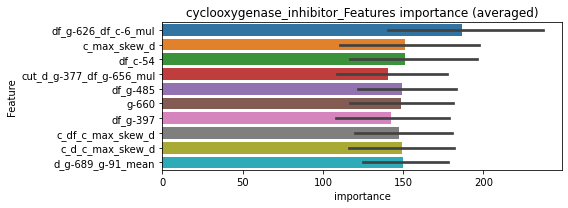

len(train_index) : 2175
len(valid_index) : 725
================================= fold 1/4 cyclooxygenase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0303958	valid_1's binary_logloss: 0.122686
Early stopping, best iteration is:
[1843]	training's binary_logloss: 0.0159077	valid_1's binary_logloss: 0.112649


len(train_index) : 2175
len(valid_index) : 725
================================= fold 2/4 cyclooxygenase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.03014	valid_1's binary_logloss: 0.115509
[2000]	training's binary_logloss: 0.0144886	valid_1's binary_logloss: 0.104624
Early stopping, best iteration is:
[2021]	training's binary_logloss: 0.0143245	valid_1's binary_logloss: 0.104422


len(train_index) : 2175
len(valid_index) : 725
================================= fold 3/4 cyclooxygenase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0308234	valid_1's binary_logloss: 0.112295
[2000]	training's binary_logloss: 0.014791	valid_1's binary_logloss: 0.101066
Early stopping, best iteration is:
[2229]	training's binary_logloss: 0.0132032	valid_1's binary_logloss: 0.100116


len(train_index) : 2175
len(valid_index) : 725
================================= fold 4/4 cyclooxygenase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0302454	valid_1's binary_logloss: 0.113619
Early stopping, best iteration is:
[1754]	training's binary_logloss: 0.0167057	valid_1's binary_logloss: 0.105615


cyclooxygenase_inhibitor logloss: 0.10570051210933516
cyclooxygenase_inhibitor is unpredictable(><)!
cytochrome_p450_inhibitor, len(trt): 104, len(othr): 3271
target_rate: 0.0043672 → Adj_target_rate: 0.0043519


selected negative label: 3271


unpredictable_cols:cytochrome_p450_inhibitor → create_features


N_features:358
================= Pseudo labeling 1 / 3 =================



Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0327025	valid_1's binary_logloss: 0.104466
[2000]	training's binary_logloss: 0.0158475	valid_1's binary_logloss: 0.0877598
[3000]	training's binary_logloss: 0.0104238	valid_1's binary_logloss: 0.0822082
Early stopping, best iteration is:
[3955]	training's binary_logloss: 0.00786896	valid_1's binary_logloss: 0.0792361
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0332444	valid_1's binary_logloss: 0.103231
[2000]	training's binary_logloss: 0.0161311	valid_1's binary_logloss: 0.0873611
[3000]	training's binary_logloss: 0.0106105	valid_1's binary_logloss: 0.0818815
Early stopping, best iteration is:
[3713]	training's binary_logloss: 0.00853371	valid_1's binary_logloss: 0.0795225
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0348322	valid_1's binary_logloss: 0.0760863
[2000]	training's binary_l

1 / 3, AUC score:0.995, PR-AUC:0.989
y_Threshold: 0.0363976, Threshold: 0.1033775, pos_neg_ratio: 0.8000000
Remove_noisy_data: 157 → Positive_corect_labels: 641/3768
p_label_rate: 0.0100452 Vs.target_rate: 0.00437
Num_p_label: 40.0, Expected: 17.4, Threshold: 0.1033775, conf_0:0.07236, conf_1:0.13439
Num_p_label: 25.0, Expected: 17.4, Adj_threshold_1: 0.1333775
threshold: 0.1333775, positive_p_label: 25.0/3982, p_label_rate: 0.0062783
positive_y_label: 641.0/3768, y_label_rate: 0.1701168
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0305987	valid_1's binary_logloss: 0.0879031
[2000]	training's binary_logloss: 0.0148406	valid_1's binary_logloss: 0.0699898
[3000]	training's binary_logloss: 0.00976299	valid_1's binary_logloss: 0.0635315
[4000]	training's binary_logloss: 0.00730115	valid_1's binary_logloss: 0.059984
Early stopping, best iteration is:
[4172]	training's binary_logloss: 0.00700162	valid_1's binary_logloss: 0.0595639
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0310077	valid_1's binary_logloss: 0.0810241
[2000]	training's binary_logloss: 0.0151078	valid_1's binary_logloss: 0.0617585
[3000]	training's binary_logloss: 0.00997105	valid_1's binary_logloss: 0.0547507
[4000]	training's binary_logloss: 0.00744809	valid_1's binary_logloss: 0.0510316
[5000]	training's binary_logloss: 0.00596147	valid_1's binary_logloss: 0.0484801
[6000]	training's binary_logloss: 0.00

2 / 3, AUC score:0.999, PR-AUC:0.998
y_Threshold: 0.0735644, Threshold: 0.1333775, pos_neg_ratio: 0.8000000
Remove_noisy_data: 18 → Positive_corect_labels: 632.0/3750
p_label_rate: 0.0138122 Vs.target_rate: 0.00437
Num_p_label: 55.0, Expected: 17.4, Threshold: 0.1333775, conf_0:0.10670, conf_1:0.16005
Num_p_label: 46.0, Expected: 17.4, Adj_threshold_1: 0.1633775
Num_p_label: 39.0, Expected: 17.4, Adj_threshold_2: 0.1933775
Num_p_label: 31.0, Expected: 17.4, Adj_threshold_3: 0.2233775
Num_p_label: 23.0, Expected: 17.4, Adj_threshold_4: 0.2533775
threshold: 0.2533775, positive_p_label: 23.0/3982, p_label_rate: 0.0057760
positive_y_label: 632.0/3750, y_label_rate: 0.1685333
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0302702	valid_1's binary_logloss: 0.0763355
[2000]	training's binary_logloss: 0.0147153	valid_1's binary_logloss: 0.0598939
[3000]	training's binary_logloss: 0.00969055	valid_1's binary_logloss: 0.0537716
[4000]	training's binary_logloss: 0.00724944	valid_1's binary_logloss: 0.0506551
[5000]	training's binary_logloss: 0.00581341	valid_1's binary_logloss: 0.0487063
Early stopping, best iteration is:
[5333]	training's binary_logloss: 0.00545931	valid_1's binary_logloss: 0.0480777
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0300602	valid_1's binary_logloss: 0.0823751
[2000]	training's binary_logloss: 0.0146108	valid_1's binary_logloss: 0.0652666
[3000]	training's binary_logloss: 0.00961825	valid_1's binary_logloss: 0.0588301
[4000]	training's binary_logloss: 0.00719097	valid_1's binary_logloss: 0.0554372
[5000]	training's binary_logloss: 0.0

3 / 3, AUC score:0.997, PR-AUC:0.996
y_Threshold: 0.0718350, Threshold: 0.2533775, pos_neg_ratio: 0.8000000
Remove_noisy_data: 26 → Positive_corect_labels: 619.0/3724
p_label_rate: 0.0070316 Vs.target_rate: 0.00437
Num_p_label: 28.0, Expected: 17.4, Threshold: 0.2533775, conf_0:0.22804, conf_1:0.27872
Num_p_label: 25.0, Expected: 17.4, Adj_threshold_1: 0.2833775
threshold: 0.2833775, positive_p_label: 25.0/3982, p_label_rate: 0.0062783
positive_y_label: 619.0/3724, y_label_rate: 0.1662191


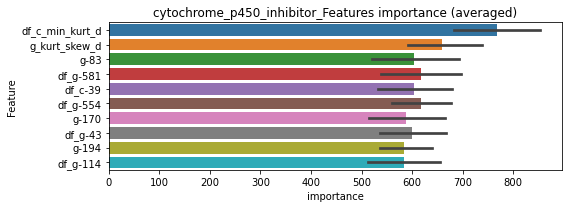

len(train_index) : 2793
len(valid_index) : 931
================================= fold 1/4 cytochrome_p450_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0288159	valid_1's binary_logloss: 0.0730684
[2000]	training's binary_logloss: 0.0140371	valid_1's binary_logloss: 0.0549695
[3000]	training's binary_logloss: 0.00926054	valid_1's binary_logloss: 0.0485544
[4000]	training's binary_logloss: 0.00692881	valid_1's binary_logloss: 0.0450947
Early stopping, best iteration is:
[4656]	training's binary_logloss: 0.0059514	valid_1's binary_logloss: 0.0436365


len(train_index) : 2793
len(valid_index) : 931
================================= fold 2/4 cytochrome_p450_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0291689	valid_1's binary_logloss: 0.0734208
[2000]	training's binary_logloss: 0.014184	valid_1's binary_logloss: 0.0569204
[3000]	training's binary_logloss: 0.0093455	valid_1's binary_logloss: 0.050936
[4000]	training's binary_logloss: 0.00697411	valid_1's binary_logloss: 0.0476665
[5000]	training's binary_logloss: 0.00559014	valid_1's binary_logloss: 0.0457286
Early stopping, best iteration is:
[5381]	training's binary_logloss: 0.00519585	valid_1's binary_logloss: 0.0450531


len(train_index) : 2793
len(valid_index) : 931
================================= fold 3/4 cytochrome_p450_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0288605	valid_1's binary_logloss: 0.0809535
[2000]	training's binary_logloss: 0.0140207	valid_1's binary_logloss: 0.0654385
[3000]	training's binary_logloss: 0.00925508	valid_1's binary_logloss: 0.060019
[4000]	training's binary_logloss: 0.00693066	valid_1's binary_logloss: 0.0571695
Early stopping, best iteration is:
[4491]	training's binary_logloss: 0.00617425	valid_1's binary_logloss: 0.0561841


len(train_index) : 2793
len(valid_index) : 931
================================= fold 4/4 cytochrome_p450_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0290608	valid_1's binary_logloss: 0.0689315
[2000]	training's binary_logloss: 0.0141879	valid_1's binary_logloss: 0.0539814
[3000]	training's binary_logloss: 0.00936646	valid_1's binary_logloss: 0.0484782
[4000]	training's binary_logloss: 0.00699594	valid_1's binary_logloss: 0.0455126
Early stopping, best iteration is:
[4746]	training's binary_logloss: 0.00590108	valid_1's binary_logloss: 0.0441409


cytochrome_p450_inhibitor logloss: 0.047253621430228314
cytochrome_p450_inhibitor is unpredictable(><)!
dihydrofolate_reductase_inhibitor, len(trt): 36, len(othr): 3285
target_rate: 0.0015117 → Adj_target_rate: 0.0017663


selected negative label: 3285


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[618]	training's binary_logloss: 0.00042616	valid_1's binary_logloss: 0.00600936
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[604]	training's binary_logloss: 0.000428788	valid_1's binary_logloss: 0.00536703
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[657]	training's binary_logloss: 0.000419771	valid_1's binary_logloss: 0.000976144
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[662]	training's binary_logloss: 0.000417134	valid_1's binary_logloss: 0.00201979


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0028473, Threshold: 0.0122792, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00151
Num_p_label: 40.0, Expected: 6.0, Threshold: 0.0122792, conf_0:0.00860, conf_1:0.01596
Num_p_label: 8.0, Expected: 6.0, Adj_threshold_1: 0.0422792
threshold: 0.0422792, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[692]	training's binary_logloss: 0.000398426	valid_1's binary_logloss: 0.0061814
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[630]	training's binary_logloss: 0.000407159	valid_1's binary_logloss: 0.00378641
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[662]	training's binary_logloss: 0.000408523	valid_1's binary_logloss: 0.000980621
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[665]	training's binary_logloss: 0.000407996	valid_1's binary_logloss: 0.00247008


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0170795, Threshold: 0.0422792, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0052737 Vs.target_rate: 0.00151
Num_p_label: 21.0, Expected: 6.0, Threshold: 0.0422792, conf_0:0.03382, conf_1:0.05074
Num_p_label: 13.0, Expected: 6.0, Adj_threshold_1: 0.0722792
threshold: 0.0722792, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[692]	training's binary_logloss: 0.000398426	valid_1's binary_logloss: 0.0061814
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[630]	training's binary_logloss: 0.000407159	valid_1's binary_logloss: 0.00378641
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[662]	training's binary_logloss: 0.000408523	valid_1's binary_logloss: 0.000980621
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[665]	training's binary_logloss: 0.000407996	valid_1's binary_logloss: 0.00247008


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0170795, Threshold: 0.0722792, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0032647 Vs.target_rate: 0.00151
Num_p_label: 13.0, Expected: 6.0, Threshold: 0.0722792, conf_0:0.06505, conf_1:0.07951
threshold: 0.0722792, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


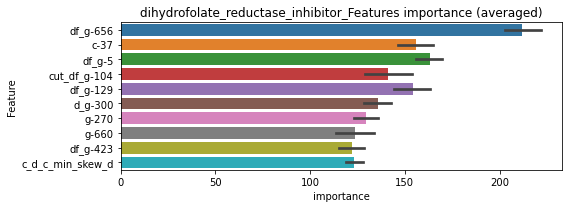

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 dihydrofolate_reductase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[837]	training's binary_logloss: 0.000423152	valid_1's binary_logloss: 0.00611656


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 dihydrofolate_reductase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[966]	training's binary_logloss: 0.00040354	valid_1's binary_logloss: 0.00454716


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 dihydrofolate_reductase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000410305	valid_1's binary_logloss: 0.00101576
Early stopping, best iteration is:
[971]	training's binary_logloss: 0.000410305	valid_1's binary_logloss: 0.00101576


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 dihydrofolate_reductase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[830]	training's binary_logloss: 0.000431872	valid_1's binary_logloss: 0.00205132


dihydrofolate_reductase_inhibitor logloss: 0.0034339563742371605
dipeptidyl_peptidase_inhibitor, len(trt): 25, len(othr): 3284
target_rate: 0.0010498 → Adj_target_rate: 0.0012955


selected negative label: 3284


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[611]	training's binary_logloss: 0.000355993	valid_1's binary_logloss: 0.00234227
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[598]	training's binary_logloss: 0.00036187	valid_1's binary_logloss: 0.00177334
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[622]	training's binary_logloss: 0.000360324	valid_1's binary_logloss: 0.000832008
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0022299, Threshold: 0.0093709, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00105
Num_p_label: 40.0, Expected: 4.2, Threshold: 0.0093709, conf_0:0.00656, conf_1:0.01218
Num_p_label: 7.0, Expected: 4.2, Adj_threshold_1: 0.0393709


Early stopping, best iteration is:
[536]	training's binary_logloss: 0.000384965	valid_1's binary_logloss: 0.00501963


threshold: 0.0393709, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[599]	training's binary_logloss: 0.000343531	valid_1's binary_logloss: 0.0023291
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[599]	training's binary_logloss: 0.000349079	valid_1's binary_logloss: 0.00151569
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[666]	training's binary_logloss: 0.000343974	valid_1's binary_logloss: 0.000846094
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0939023, Threshold: 0.0393709, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0062783 Vs.target_rate: 0.00105
Num_p_label: 25.0, Expected: 4.2, Threshold: 0.0393709, conf_0:0.03150, conf_1:0.04725
Num_p_label: 14.0, Expected: 4.2, Adj_threshold_1: 0.0693709
Num_p_label: 9.0, Expected: 4.2, Adj_threshold_2: 0.0993709


Early stopping, best iteration is:
[548]	training's binary_logloss: 0.000366373	valid_1's binary_logloss: 0.00344537


threshold: 0.0993709, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[599]	training's binary_logloss: 0.000343531	valid_1's binary_logloss: 0.0023291
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[599]	training's binary_logloss: 0.000349079	valid_1's binary_logloss: 0.00151569
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[666]	training's binary_logloss: 0.000343974	valid_1's binary_logloss: 0.000846094
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0939023, Threshold: 0.0993709, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0022602 Vs.target_rate: 0.00105
Num_p_label: 9.0, Expected: 4.2, Threshold: 0.0993709, conf_0:0.08943, conf_1:0.10931


Early stopping, best iteration is:
[548]	training's binary_logloss: 0.000366373	valid_1's binary_logloss: 0.00344537


threshold: 0.0993709, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 656.0/3808, y_label_rate: 0.1722689


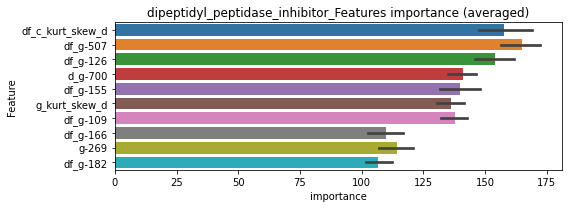

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 dipeptidyl_peptidase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000338609	valid_1's binary_logloss: 0.00212227
Early stopping, best iteration is:
[977]	training's binary_logloss: 0.000339456	valid_1's binary_logloss: 0.00212032


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 dipeptidyl_peptidase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[886]	training's binary_logloss: 0.000352479	valid_1's binary_logloss: 0.00154818


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 dipeptidyl_peptidase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[919]	training's binary_logloss: 0.000352492	valid_1's binary_logloss: 0.000936045


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 dipeptidyl_peptidase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


dipeptidyl_peptidase_inhibitor logloss: 0.0021225778166833477


Early stopping, best iteration is:
[556]	training's binary_logloss: 0.000457054	valid_1's binary_logloss: 0.00388518


diuretic, len(trt): 6, len(othr): 3288
target_rate: 0.0002520 → Adj_target_rate: 0.0003851


selected negative label: 3288


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[458]	training's binary_logloss: 0.00017806	valid_1's binary_logloss: 0.0041403
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[489]	training's binary_logloss: 0.000172231	valid_1's binary_logloss: 0.00169127
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[472]	training's binary_logloss: 0.000175181	valid_1's binary_logloss: 0.000207431
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0005303, Threshold: 0.0016678, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00025
Num_p_label: 40.0, Expected: 1.0, Threshold: 0.0016678, conf_0:0.00117, conf_1:0.00217
Num_p_label: 1.0, Expected: 1.0, Adj_threshold_1: 0.0316678
threshold: 0.0316678, positive_p_label: 1.0/3982, p_label_rate: 0.0002511


Early stopping, best iteration is:
[495]	training's binary_logloss: 0.000174974	valid_1's binary_logloss: 0.000224136


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[509]	training's binary_logloss: 0.000159707	valid_1's binary_logloss: 0.000480763
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[476]	training's binary_logloss: 0.000163626	valid_1's binary_logloss: 0.00392492
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[526]	training's binary_logloss: 0.00015993	valid_1's binary_logloss: 0.000183918
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0132687, Threshold: 0.0316678, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0025113 Vs.target_rate: 0.00025
Num_p_label: 10.0, Expected: 1.0, Threshold: 0.0316678, conf_0:0.02533, conf_1:0.03800
Num_p_label: 7.0, Expected: 1.0, Adj_threshold_1: 0.0616678
Num_p_label: 5.0, Expected: 1.0, Adj_threshold_2: 0.0916678
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_3: 0.1216678
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_4: 0.1516678
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_5: 0.1816678
Num_p_label: 2.0, Expected: 1.0, Adj_threshold_6: 0.2116678


Early stopping, best iteration is:
[529]	training's binary_logloss: 0.000158951	valid_1's binary_logloss: 0.000177862


threshold: 0.2116678, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[509]	training's binary_logloss: 0.000159707	valid_1's binary_logloss: 0.000480763
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[476]	training's binary_logloss: 0.000163626	valid_1's binary_logloss: 0.00392492
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[526]	training's binary_logloss: 0.00015993	valid_1's binary_logloss: 0.000183918
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0132687, Threshold: 0.2116678, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0005023 Vs.target_rate: 0.00025
Num_p_label: 2.0, Expected: 1.0, Threshold: 0.2116678, conf_0:0.19050, conf_1:0.23283
threshold: 0.2116678, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[529]	training's binary_logloss: 0.000158951	valid_1's binary_logloss: 0.000177862


positive_y_label: 657.0/3813, y_label_rate: 0.1723053


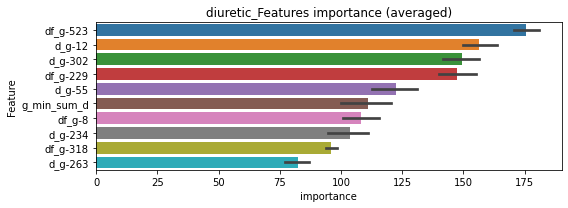

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 diuretic=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000164864	valid_1's binary_logloss: 0.000240418


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 diuretic=================================


Early stopping, best iteration is:
[1109]	training's binary_logloss: 0.000163202	valid_1's binary_logloss: 0.000238689
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000165027	valid_1's binary_logloss: 0.00298652
Early stopping, best iteration is:
[1036]	training's binary_logloss: 0.000164286	valid_1's binary_logloss: 0.00298292


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 diuretic=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000164999	valid_1's binary_logloss: 0.000200271


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 diuretic=================================


Early stopping, best iteration is:
[1199]	training's binary_logloss: 0.000161591	valid_1's binary_logloss: 0.000196216
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0001649	valid_1's binary_logloss: 0.000186759


diuretic logloss: 0.0009005423948855886


Early stopping, best iteration is:
[1114]	training's binary_logloss: 0.000162873	valid_1's binary_logloss: 0.000184459


dna_alkylating_agent, len(trt): 48, len(othr): 3285
target_rate: 0.0020156 → Adj_target_rate: 0.0022556


selected negative label: 3285


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[663]	training's binary_logloss: 0.000495053	valid_1's binary_logloss: 0.0134669
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[629]	training's binary_logloss: 0.000514719	valid_1's binary_logloss: 0.0152771
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[688]	training's binary_logloss: 0.000501066	valid_1's binary_logloss: 0.002985
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[587]	training's binary_logloss: 0.0005744	valid_1's binary_logloss: 0.0141355


1 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0039649, Threshold: 0.0842395, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00202
Num_p_label: 40.0, Expected: 8.0, Threshold: 0.0842395, conf_0:0.05897, conf_1:0.10951
Num_p_label: 32.0, Expected: 8.0, Adj_threshold_1: 0.1142395
Num_p_label: 24.0, Expected: 8.0, Adj_threshold_2: 0.1442395
Num_p_label: 23.0, Expected: 8.0, Adj_threshold_3: 0.1742395
Num_p_label: 19.0, Expected: 8.0, Adj_threshold_4: 0.2042395
threshold: 0.2042395, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[642]	training's binary_logloss: 0.000485637	valid_1's binary_logloss: 0.00919344
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[705]	training's binary_logloss: 0.000467081	valid_1's binary_logloss: 0.00732398
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[664]	training's binary_logloss: 0.000489057	valid_1's binary_logloss: 0.00350847
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[650]	training's binary_logloss: 0.000475493	valid_1's binary_logloss: 0.00716875


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1570183, Threshold: 0.2042395, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3806
p_label_rate: 0.0183325 Vs.target_rate: 0.00202
Num_p_label: 73.0, Expected: 8.0, Threshold: 0.2042395, conf_0:0.16339, conf_1:0.24509
Num_p_label: 71.0, Expected: 8.0, Adj_threshold_1: 0.2342395
Num_p_label: 65.0, Expected: 8.0, Adj_threshold_2: 0.2642395
Num_p_label: 64.0, Expected: 8.0, Adj_threshold_3: 0.2942395
Num_p_label: 61.0, Expected: 8.0, Adj_threshold_4: 0.3242395
Num_p_label: 59.0, Expected: 8.0, Adj_threshold_5: 0.3542395
Num_p_label: 58.0, Expected: 8.0, Adj_threshold_6: 0.3842395
Num_p_label: 54.0, Expected: 8.0, Adj_threshold_7: 0.4142395
Num_p_label: 50.0, Expected: 8.0, Adj_threshold_8: 0.4442395
Num_p_label: 48.0, Expected: 8.0, Adj_threshold_9: 0.4742395
Num_p_label: 46.0, Expected: 8.0, Adj_threshold_10: 0.5042395
threshold: 0.5042395, positive_p_label: 46.0/3982, p_label_rate: 0.0115520
positive_y_la

Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[591]	training's binary_logloss: 0.000519743	valid_1's binary_logloss: 0.0123267
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[652]	training's binary_logloss: 0.000484534	valid_1's binary_logloss: 0.00554184
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[713]	training's binary_logloss: 0.000465515	valid_1's binary_logloss: 0.0079602
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[739]	training's binary_logloss: 0.000464674	valid_1's binary_logloss: 0.00598197


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1144282, Threshold: 0.5042395, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 654.0/3804
p_label_rate: 0.0128076 Vs.target_rate: 0.00202
Num_p_label: 51.0, Expected: 8.0, Threshold: 0.5042395, conf_0:0.45382, conf_1:0.55466
Num_p_label: 50.0, Expected: 8.0, Adj_threshold_1: 0.5342395
Num_p_label: 48.0, Expected: 8.0, Adj_threshold_2: 0.5642395
Num_p_label: 44.0, Expected: 8.0, Adj_threshold_3: 0.5942395
Num_p_label: 43.0, Expected: 8.0, Adj_threshold_4: 0.6242395
Num_p_label: 40.0, Expected: 8.0, Adj_threshold_5: 0.6542395
Num_p_label: 35.0, Expected: 8.0, Adj_threshold_6: 0.6842395
Num_p_label: 29.0, Expected: 8.0, Adj_threshold_7: 0.7142395
Num_p_label: 27.0, Expected: 8.0, Adj_threshold_8: 0.7442395
Num_p_label: 22.0, Expected: 8.0, Adj_threshold_9: 0.7742395
Num_p_label: 21.0, Expected: 8.0, Adj_threshold_10: 0.8042395
threshold: 0.8042395, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_la

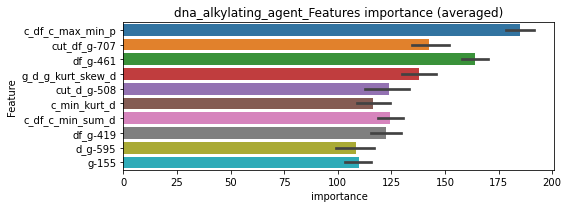

len(train_index) : 2853
len(valid_index) : 951
================================= fold 1/4 dna_alkylating_agent=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[773]	training's binary_logloss: 0.00050632	valid_1's binary_logloss: 0.0125792


len(train_index) : 2853
len(valid_index) : 951
================================= fold 2/4 dna_alkylating_agent=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[909]	training's binary_logloss: 0.000479448	valid_1's binary_logloss: 0.00835298


len(train_index) : 2853
len(valid_index) : 951
================================= fold 3/4 dna_alkylating_agent=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[940]	training's binary_logloss: 0.000472092	valid_1's binary_logloss: 0.00673401


len(train_index) : 2853
len(valid_index) : 951
================================= fold 4/4 dna_alkylating_agent=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[836]	training's binary_logloss: 0.000497377	valid_1's binary_logloss: 0.00402673


dna_alkylating_agent logloss: 0.007929597641245664


mutually exclusive columns: dna_inhibitor


dna_inhibitor, len(trt): 402, len(othr): 7382
target_rate: 0.0168808 → Adj_target_rate: 0.0137338


selected negative label: 7382


unpredictable_cols:dna_inhibitor → create_features


N_features:358
================= Pseudo labeling 1 / 3 =================



Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0541505	valid_1's binary_logloss: 0.169324
Early stopping, best iteration is:
[1583]	training's binary_logloss: 0.0335547	valid_1's binary_logloss: 0.159978
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.052209	valid_1's binary_logloss: 0.188388
Early stopping, best iteration is:
[1116]	training's binary_logloss: 0.0466811	valid_1's binary_logloss: 0.186512
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0533729	valid_1's binary_logloss: 0.174255
[2000]	training's binary_logloss: 0.0260082	valid_1's binary_logloss: 0.162211
Early stopping, best iteration is:
[2044]	training's binary_logloss: 0.0254249	valid_1's binary_logloss: 0.161781
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0543996	valid_1's binary_logloss: 0.181005
Early stopping, bes

1 / 3, AUC score:0.946, PR-AUC:0.902
y_Threshold: 0.0935536, Threshold: 0.1811629, pos_neg_ratio: 0.8000000
Remove_noisy_data: 720 → Positive_corect_labels: 1264/8138
p_label_rate: 0.0100452 Vs.target_rate: 0.01688
Num_p_label: 40.0, Expected: 67.2, Threshold: 0.1811629, conf_0:0.12681, conf_1:0.23551
threshold: 0.1811629, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1264.0/8138, y_label_rate: 0.1553207
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0351355	valid_1's binary_logloss: 0.099711
[2000]	training's binary_logloss: 0.0165785	valid_1's binary_logloss: 0.0820457
Early stopping, best iteration is:
[2902]	training's binary_logloss: 0.0111021	valid_1's binary_logloss: 0.0765397
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0341548	valid_1's binary_logloss: 0.10597
Early stopping, best iteration is:
[1962]	training's binary_logloss: 0.0165705	valid_1's binary_logloss: 0.0914594
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0353085	valid_1's binary_logloss: 0.0934376
[2000]	training's binary_logloss: 0.0166715	valid_1's binary_logloss: 0.0780795
Early stopping, best iteration is:
[2647]	training's binary_logloss: 0.0122984	valid_1's binary_logloss: 0.0741305
Training until validation scores don't improve for 30 rounds
[1000]	trainin

2 / 3, AUC score:0.996, PR-AUC:0.987
y_Threshold: 0.0887732, Threshold: 0.1811629, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 1198.0/8006
p_label_rate: 0.0113009 Vs.target_rate: 0.01688
Num_p_label: 45.0, Expected: 67.2, Threshold: 0.1811629, conf_0:0.14493, conf_1:0.21740
threshold: 0.1811629, positive_p_label: 45.0/3982, p_label_rate: 0.0113009
positive_y_label: 1198.0/8006, y_label_rate: 0.1496378
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0298957	valid_1's binary_logloss: 0.0882803
[2000]	training's binary_logloss: 0.0142575	valid_1's binary_logloss: 0.0740888
Early stopping, best iteration is:
[2182]	training's binary_logloss: 0.013018	valid_1's binary_logloss: 0.0725302
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0297934	valid_1's binary_logloss: 0.0755379
[2000]	training's binary_logloss: 0.0141658	valid_1's binary_logloss: 0.0597574
[3000]	training's binary_logloss: 0.00921043	valid_1's binary_logloss: 0.0543188
Early stopping, best iteration is:
[3011]	training's binary_logloss: 0.00917451	valid_1's binary_logloss: 0.054231
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0298722	valid_1's binary_logloss: 0.0853012
[2000]	training's binary_logloss: 0.0142142	valid_1's binary_logloss: 0.0707668
Early stopping, best iterat

3 / 3, AUC score:0.998, PR-AUC:0.994
y_Threshold: 0.0944664, Threshold: 0.1811629, pos_neg_ratio: 0.8000000
Remove_noisy_data: 70 → Positive_corect_labels: 1163.0/7936
p_label_rate: 0.0145655 Vs.target_rate: 0.01688
Num_p_label: 58.0, Expected: 67.2, Threshold: 0.1811629, conf_0:0.16305, conf_1:0.19928
threshold: 0.1811629, positive_p_label: 58.0/3982, p_label_rate: 0.0145655
positive_y_label: 1163.0/7936, y_label_rate: 0.1465474


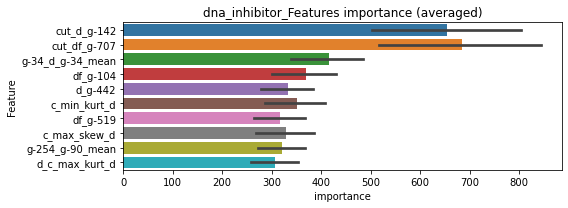

len(train_index) : 5952
len(valid_index) : 1984
================================= fold 1/4 dna_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0275655	valid_1's binary_logloss: 0.0806986
[2000]	training's binary_logloss: 0.0131547	valid_1's binary_logloss: 0.0666388
[3000]	training's binary_logloss: 0.00853029	valid_1's binary_logloss: 0.0614305
Early stopping, best iteration is:
[3144]	training's binary_logloss: 0.00812008	valid_1's binary_logloss: 0.0609142


len(train_index) : 5952
len(valid_index) : 1984
================================= fold 2/4 dna_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0270733	valid_1's binary_logloss: 0.0847416
[2000]	training's binary_logloss: 0.0129041	valid_1's binary_logloss: 0.0699721
Early stopping, best iteration is:
[2793]	training's binary_logloss: 0.00907028	valid_1's binary_logloss: 0.065564


len(train_index) : 5952
len(valid_index) : 1984
================================= fold 3/4 dna_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0275627	valid_1's binary_logloss: 0.0801576
[2000]	training's binary_logloss: 0.0130878	valid_1's binary_logloss: 0.0656799
[3000]	training's binary_logloss: 0.00850696	valid_1's binary_logloss: 0.0608236
Early stopping, best iteration is:
[3015]	training's binary_logloss: 0.00845981	valid_1's binary_logloss: 0.0606887


len(train_index) : 5952
len(valid_index) : 1984
================================= fold 4/4 dna_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0282676	valid_1's binary_logloss: 0.0716956
[2000]	training's binary_logloss: 0.0133629	valid_1's binary_logloss: 0.0562549
Early stopping, best iteration is:
[2786]	training's binary_logloss: 0.0094126	valid_1's binary_logloss: 0.0519059


dna_inhibitor logloss: 0.05976819484855169
dna_inhibitor is unpredictable(><)!
dopamine_receptor_agonist, len(trt): 121, len(othr): 2089
target_rate: 0.0050810 → Adj_target_rate: 0.0049495


mutually exclusive columns: dopamine_receptor_agonist
selected negative label: 2089


unpredictable_cols:dopamine_receptor_agonist → create_features


N_features:358
================= Pseudo labeling 1 / 3 =================



Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0539773	valid_1's binary_logloss: 0.218815
Early stopping, best iteration is:
[1911]	training's binary_logloss: 0.0276543	valid_1's binary_logloss: 0.204738
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0591134	valid_1's binary_logloss: 0.150729
[2000]	training's binary_logloss: 0.0290942	valid_1's binary_logloss: 0.122372
[3000]	training's binary_logloss: 0.019048	valid_1's binary_logloss: 0.112608
Early stopping, best iteration is:
[3621]	training's binary_logloss: 0.0156744	valid_1's binary_logloss: 0.109403
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0585343	valid_1's binary_logloss: 0.162191
[2000]	training's binary_logloss: 0.0287573	valid_1's binary_logloss: 0.135938
[3000]	training's binary_logloss: 0.0187844	valid_1's binary_logloss: 0.126465
Early stopping, best iteration is:
[

1 / 3, AUC score:0.965, PR-AUC:0.931
y_Threshold: 0.0788076, Threshold: 0.1760725, pos_neg_ratio: 0.8000000
Remove_noisy_data: 177 → Positive_corect_labels: 371/2329
p_label_rate: 0.0100452 Vs.target_rate: 0.00508
Num_p_label: 40.0, Expected: 20.2, Threshold: 0.1760725, conf_0:0.12325, conf_1:0.22889
Num_p_label: 26.0, Expected: 20.2, Adj_threshold_1: 0.2060725
threshold: 0.2060725, positive_p_label: 26.0/3982, p_label_rate: 0.0065294
positive_y_label: 371.0/2329, y_label_rate: 0.1592958
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0448026	valid_1's binary_logloss: 0.141189
[2000]	training's binary_logloss: 0.021934	valid_1's binary_logloss: 0.118929
[3000]	training's binary_logloss: 0.0144584	valid_1's binary_logloss: 0.110341
[4000]	training's binary_logloss: 0.0107929	valid_1's binary_logloss: 0.106026
Early stopping, best iteration is:
[4177]	training's binary_logloss: 0.0103318	valid_1's binary_logloss: 0.105496
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0456838	valid_1's binary_logloss: 0.128342
[2000]	training's binary_logloss: 0.0224385	valid_1's binary_logloss: 0.103552
Early stopping, best iteration is:
[2904]	training's binary_logloss: 0.0152532	valid_1's binary_logloss: 0.0950725
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0461578	valid_1's binary_logloss: 0.115728
[2000]	training's binary_logloss: 0.

2 / 3, AUC score:0.995, PR-AUC:0.987
y_Threshold: 0.1036541, Threshold: 0.2060725, pos_neg_ratio: 0.8000000
Remove_noisy_data: 40 → Positive_corect_labels: 351.0/2289
p_label_rate: 0.0080362 Vs.target_rate: 0.00508
Num_p_label: 32.0, Expected: 20.2, Threshold: 0.2060725, conf_0:0.16486, conf_1:0.24729
Num_p_label: 24.0, Expected: 20.2, Adj_threshold_1: 0.2360725
threshold: 0.2360725, positive_p_label: 24.0/3982, p_label_rate: 0.0060271
positive_y_label: 351.0/2289, y_label_rate: 0.1533421
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.041841	valid_1's binary_logloss: 0.109316
[2000]	training's binary_logloss: 0.0204839	valid_1's binary_logloss: 0.0864241
[3000]	training's binary_logloss: 0.0134622	valid_1's binary_logloss: 0.077953
Early stopping, best iteration is:
[3813]	training's binary_logloss: 0.0105707	valid_1's binary_logloss: 0.0741566
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0421222	valid_1's binary_logloss: 0.124619
Early stopping, best iteration is:
[1931]	training's binary_logloss: 0.0214771	valid_1's binary_logloss: 0.104229
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0429937	valid_1's binary_logloss: 0.0932274
[2000]	training's binary_logloss: 0.0211431	valid_1's binary_logloss: 0.0686537
[3000]	training's binary_logloss: 0.0139445	valid_1's binary_logloss: 0.0594367
[4000]	training's binary_logloss

3 / 3, AUC score:0.997, PR-AUC:0.992
y_Threshold: 0.0967482, Threshold: 0.2360725, pos_neg_ratio: 0.8000000
Remove_noisy_data: 28 → Positive_corect_labels: 337.0/2261
p_label_rate: 0.0060271 Vs.target_rate: 0.00508
Num_p_label: 24.0, Expected: 20.2, Threshold: 0.2360725, conf_0:0.21247, conf_1:0.25968
threshold: 0.2360725, positive_p_label: 24.0/3982, p_label_rate: 0.0060271
positive_y_label: 337.0/2261, y_label_rate: 0.1490491


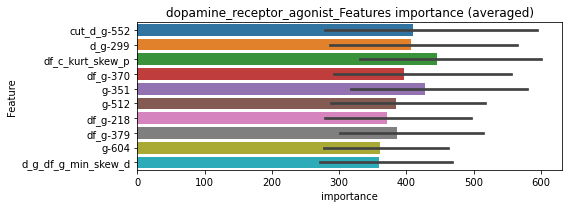

len(train_index) : 1695
len(valid_index) : 566
================================= fold 1/4 dopamine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0399655	valid_1's binary_logloss: 0.101973
[2000]	training's binary_logloss: 0.0196204	valid_1's binary_logloss: 0.0780181
[3000]	training's binary_logloss: 0.0129459	valid_1's binary_logloss: 0.0695499
[4000]	training's binary_logloss: 0.00967535	valid_1's binary_logloss: 0.0646125
[5000]	training's binary_logloss: 0.00777025	valid_1's binary_logloss: 0.0615555
Early stopping, best iteration is:
[5763]	training's binary_logloss: 0.00674995	valid_1's binary_logloss: 0.0596809


len(train_index) : 1696
len(valid_index) : 565
================================= fold 2/4 dopamine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0392585	valid_1's binary_logloss: 0.115189
[2000]	training's binary_logloss: 0.0192893	valid_1's binary_logloss: 0.0921203
Early stopping, best iteration is:
[2777]	training's binary_logloss: 0.0137579	valid_1's binary_logloss: 0.0846204


len(train_index) : 1696
len(valid_index) : 565
================================= fold 3/4 dopamine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0398874	valid_1's binary_logloss: 0.0937509
[2000]	training's binary_logloss: 0.0196234	valid_1's binary_logloss: 0.0711017
[3000]	training's binary_logloss: 0.0130072	valid_1's binary_logloss: 0.0621995
[4000]	training's binary_logloss: 0.00971342	valid_1's binary_logloss: 0.0572255
[5000]	training's binary_logloss: 0.00779035	valid_1's binary_logloss: 0.0543495
[6000]	training's binary_logloss: 0.00651569	valid_1's binary_logloss: 0.0520518
[7000]	training's binary_logloss: 0.00561378	valid_1's binary_logloss: 0.0504626
Early stopping, best iteration is:
[7064]	training's binary_logloss: 0.00556404	valid_1's binary_logloss: 0.0503545


len(train_index) : 1696
len(valid_index) : 565
================================= fold 4/4 dopamine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0398506	valid_1's binary_logloss: 0.108095
[2000]	training's binary_logloss: 0.0196326	valid_1's binary_logloss: 0.0840456
[3000]	training's binary_logloss: 0.0129548	valid_1's binary_logloss: 0.0752368
[4000]	training's binary_logloss: 0.00969385	valid_1's binary_logloss: 0.0702516
[5000]	training's binary_logloss: 0.00777754	valid_1's binary_logloss: 0.0673438
Early stopping, best iteration is:
[5886]	training's binary_logloss: 0.00662337	valid_1's binary_logloss: 0.0653279


dopamine_receptor_agonist logloss: 0.06499355684053253
dopamine_receptor_agonist is unpredictable(><)!


mutually exclusive columns: dopamine_receptor_antagonist


dopamine_receptor_antagonist, len(trt): 424, len(othr): 7314
target_rate: 0.0178047 → Adj_target_rate: 0.0143701


selected negative label: 7314


unpredictable_cols:dopamine_receptor_antagonist → create_features


N_features:358
================= Pseudo labeling 1 / 3 =================



Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0572877	valid_1's binary_logloss: 0.184589
Early stopping, best iteration is:
[1750]	training's binary_logloss: 0.0313086	valid_1's binary_logloss: 0.174506
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0572551	valid_1's binary_logloss: 0.179541
[2000]	training's binary_logloss: 0.0270892	valid_1's binary_logloss: 0.165459
Early stopping, best iteration is:
[2246]	training's binary_logloss: 0.0238162	valid_1's binary_logloss: 0.164322
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0570246	valid_1's binary_logloss: 0.193059
Early stopping, best iteration is:
[1410]	training's binary_logloss: 0.0395151	valid_1's binary_logloss: 0.186315
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0574783	valid_1's binary_logloss: 0.187367
Early stopping, be

1 / 3, AUC score:0.939, PR-AUC:0.897
y_Threshold: 0.0933802, Threshold: 0.1933638, pos_neg_ratio: 0.8000000
Remove_noisy_data: 734 → Positive_corect_labels: 1242/8042
p_label_rate: 0.0100452 Vs.target_rate: 0.01780
Num_p_label: 40.0, Expected: 70.9, Threshold: 0.1933638, conf_0:0.13535, conf_1:0.25137
threshold: 0.1933638, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1242.0/8042, y_label_rate: 0.1544392
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0377733	valid_1's binary_logloss: 0.109846
Early stopping, best iteration is:
[1578]	training's binary_logloss: 0.0231163	valid_1's binary_logloss: 0.0974989
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.03737	valid_1's binary_logloss: 0.109662
[2000]	training's binary_logloss: 0.0178681	valid_1's binary_logloss: 0.0929304
[3000]	training's binary_logloss: 0.0115441	valid_1's binary_logloss: 0.0869005
Early stopping, best iteration is:
[3003]	training's binary_logloss: 0.0115308	valid_1's binary_logloss: 0.0868523
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0374254	valid_1's binary_logloss: 0.117286
[2000]	training's binary_logloss: 0.0177814	valid_1's binary_logloss: 0.101067
Early stopping, best iteration is:
[2136]	training's binary_logloss: 0.0165466	valid_1's binary_logloss: 0.100154

2 / 3, AUC score:0.992, PR-AUC:0.978
y_Threshold: 0.1134098, Threshold: 0.1933638, pos_neg_ratio: 0.8000000
Remove_noisy_data: 178 → Positive_corect_labels: 1153.0/7864
p_label_rate: 0.0128076 Vs.target_rate: 0.01780
Num_p_label: 51.0, Expected: 70.9, Threshold: 0.1933638, conf_0:0.15469, conf_1:0.23204
threshold: 0.1933638, positive_p_label: 51.0/3982, p_label_rate: 0.0128076
positive_y_label: 1153.0/7864, y_label_rate: 0.1466175
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0315496	valid_1's binary_logloss: 0.0926778
[2000]	training's binary_logloss: 0.0150455	valid_1's binary_logloss: 0.0760534
[3000]	training's binary_logloss: 0.00979303	valid_1's binary_logloss: 0.070242
Early stopping, best iteration is:
[3087]	training's binary_logloss: 0.00950953	valid_1's binary_logloss: 0.0699632
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0317227	valid_1's binary_logloss: 0.0917782
Early stopping, best iteration is:
[1841]	training's binary_logloss: 0.0165755	valid_1's binary_logloss: 0.0763942
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0322497	valid_1's binary_logloss: 0.0967146
[2000]	training's binary_logloss: 0.0154217	valid_1's binary_logloss: 0.0816795
Early stopping, best iteration is:
[2854]	training's binary_logloss: 0.0105572	valid_1's binary_logloss: 0

3 / 3, AUC score:0.997, PR-AUC:0.992
y_Threshold: 0.1032090, Threshold: 0.1933638, pos_neg_ratio: 0.8000000
Remove_noisy_data: 82 → Positive_corect_labels: 1112.0/7782
p_label_rate: 0.0113009 Vs.target_rate: 0.01780
Num_p_label: 45.0, Expected: 70.9, Threshold: 0.1933638, conf_0:0.17403, conf_1:0.21270
threshold: 0.1933638, positive_p_label: 45.0/3982, p_label_rate: 0.0113009
positive_y_label: 1112.0/7782, y_label_rate: 0.1428939


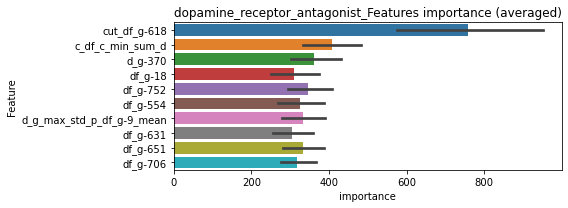

len(train_index) : 5836
len(valid_index) : 1946
================================= fold 1/4 dopamine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.029739	valid_1's binary_logloss: 0.0831602
[2000]	training's binary_logloss: 0.0142586	valid_1's binary_logloss: 0.0669933
[3000]	training's binary_logloss: 0.00925368	valid_1's binary_logloss: 0.061182
Early stopping, best iteration is:
[3319]	training's binary_logloss: 0.00831247	valid_1's binary_logloss: 0.0597921


len(train_index) : 5836
len(valid_index) : 1946
================================= fold 2/4 dopamine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0293788	valid_1's binary_logloss: 0.0884431
[2000]	training's binary_logloss: 0.014081	valid_1's binary_logloss: 0.0722383
[3000]	training's binary_logloss: 0.00913538	valid_1's binary_logloss: 0.0662665
Early stopping, best iteration is:
[3869]	training's binary_logloss: 0.0069924	valid_1's binary_logloss: 0.0634909


len(train_index) : 5837
len(valid_index) : 1945
================================= fold 3/4 dopamine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.029219	valid_1's binary_logloss: 0.0905518
[2000]	training's binary_logloss: 0.0139914	valid_1's binary_logloss: 0.0755291
Early stopping, best iteration is:
[2872]	training's binary_logloss: 0.00951359	valid_1's binary_logloss: 0.0707746


len(train_index) : 5837
len(valid_index) : 1945
================================= fold 4/4 dopamine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0301414	valid_1's binary_logloss: 0.0768155
[2000]	training's binary_logloss: 0.014498	valid_1's binary_logloss: 0.0615294
[3000]	training's binary_logloss: 0.00940985	valid_1's binary_logloss: 0.05561
Early stopping, best iteration is:
[2976]	training's binary_logloss: 0.00948201	valid_1's binary_logloss: 0.0555607


dopamine_receptor_antagonist logloss: 0.06240439664602672
dopamine_receptor_antagonist is unpredictable(><)!


mutually exclusive columns: egfr_inhibitor


egfr_inhibitor, len(trt): 336, len(othr): 7554
target_rate: 0.0141093 → Adj_target_rate: 0.0117920


selected negative label: 7554


unpredictable_cols:egfr_inhibitor → create_features


N_features:358
================= Pseudo labeling 1 / 3 =================



Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0507577	valid_1's binary_logloss: 0.144259
[2000]	training's binary_logloss: 0.0238567	valid_1's binary_logloss: 0.122627
Early stopping, best iteration is:
[2549]	training's binary_logloss: 0.0182833	valid_1's binary_logloss: 0.118014
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0507845	valid_1's binary_logloss: 0.146475
[2000]	training's binary_logloss: 0.0237643	valid_1's binary_logloss: 0.122195
[3000]	training's binary_logloss: 0.0152001	valid_1's binary_logloss: 0.114463
Early stopping, best iteration is:
[3560]	training's binary_logloss: 0.0126158	valid_1's binary_logloss: 0.112332
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0499052	valid_1's binary_logloss: 0.151769
[2000]	training's binary_logloss: 0.0234409	valid_1's binary_logloss: 0.129112
[3000]	training's binary_logloss: 0

1 / 3, AUC score:0.976, PR-AUC:0.952
y_Threshold: 0.0779150, Threshold: 0.1929035, pos_neg_ratio: 0.8000000
Remove_noisy_data: 539 → Positive_corect_labels: 1392/8525
p_label_rate: 0.0100452 Vs.target_rate: 0.01411
Num_p_label: 40.0, Expected: 56.2, Threshold: 0.1929035, conf_0:0.13503, conf_1:0.25077
threshold: 0.1929035, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1392.0/8525, y_label_rate: 0.1632845
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0408614	valid_1's binary_logloss: 0.118967
[2000]	training's binary_logloss: 0.0191196	valid_1's binary_logloss: 0.0961441
Early stopping, best iteration is:
[2888]	training's binary_logloss: 0.0128398	valid_1's binary_logloss: 0.0887497
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0410138	valid_1's binary_logloss: 0.112757
[2000]	training's binary_logloss: 0.0192213	valid_1's binary_logloss: 0.0862206
[3000]	training's binary_logloss: 0.0123808	valid_1's binary_logloss: 0.0769379
[4000]	training's binary_logloss: 0.00912703	valid_1's binary_logloss: 0.0723637
Early stopping, best iteration is:
[3971]	training's binary_logloss: 0.00919414	valid_1's binary_logloss: 0.0723212
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0403308	valid_1's binary_logloss: 0.121718
[2000]	training's binary_log

2 / 3, AUC score:0.994, PR-AUC:0.985
y_Threshold: 0.1156024, Threshold: 0.1929035, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 1325.0/8391
p_label_rate: 0.0200904 Vs.target_rate: 0.01411
Num_p_label: 80.0, Expected: 56.2, Threshold: 0.1929035, conf_0:0.15432, conf_1:0.23148
threshold: 0.1929035, positive_p_label: 80.0/3982, p_label_rate: 0.0200904
positive_y_label: 1325.0/8391, y_label_rate: 0.1579073
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0375079	valid_1's binary_logloss: 0.106779
[2000]	training's binary_logloss: 0.0176079	valid_1's binary_logloss: 0.0840485
[3000]	training's binary_logloss: 0.0113573	valid_1's binary_logloss: 0.0764017
Early stopping, best iteration is:
[2991]	training's binary_logloss: 0.0113914	valid_1's binary_logloss: 0.0763554
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0370337	valid_1's binary_logloss: 0.110103
[2000]	training's binary_logloss: 0.0174319	valid_1's binary_logloss: 0.0877478
[3000]	training's binary_logloss: 0.0112532	valid_1's binary_logloss: 0.0797626
Early stopping, best iteration is:
[3088]	training's binary_logloss: 0.0109052	valid_1's binary_logloss: 0.0793943
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0371302	valid_1's binary_logloss: 0.113768
[2000]	training's binary_loglo

3 / 3, AUC score:0.994, PR-AUC:0.987
y_Threshold: 0.1078477, Threshold: 0.1929035, pos_neg_ratio: 0.8000000
Remove_noisy_data: 100 → Positive_corect_labels: 1275.0/8291
p_label_rate: 0.0205927 Vs.target_rate: 0.01411
Num_p_label: 82.0, Expected: 56.2, Threshold: 0.1929035, conf_0:0.17361, conf_1:0.21219
threshold: 0.1929035, positive_p_label: 82.0/3982, p_label_rate: 0.0205927
positive_y_label: 1275.0/8291, y_label_rate: 0.1537812


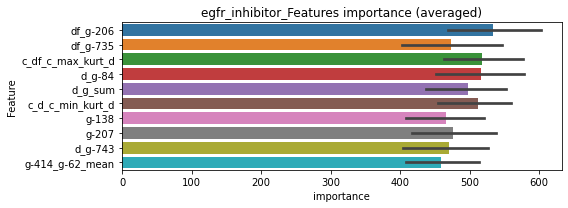

len(train_index) : 6218
len(valid_index) : 2073
================================= fold 1/4 egfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0352468	valid_1's binary_logloss: 0.102844
[2000]	training's binary_logloss: 0.0165569	valid_1's binary_logloss: 0.0794773
[3000]	training's binary_logloss: 0.0107093	valid_1's binary_logloss: 0.0713955
[4000]	training's binary_logloss: 0.00790128	valid_1's binary_logloss: 0.0667213
Early stopping, best iteration is:
[3997]	training's binary_logloss: 0.00790719	valid_1's binary_logloss: 0.0666904


len(train_index) : 6218
len(valid_index) : 2073
================================= fold 2/4 egfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0351686	valid_1's binary_logloss: 0.104331
[2000]	training's binary_logloss: 0.0164547	valid_1's binary_logloss: 0.0832088
[3000]	training's binary_logloss: 0.0106357	valid_1's binary_logloss: 0.076049
Early stopping, best iteration is:
[3469]	training's binary_logloss: 0.00911184	valid_1's binary_logloss: 0.0740293


len(train_index) : 6218
len(valid_index) : 2073
================================= fold 3/4 egfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0354817	valid_1's binary_logloss: 0.0899398
[2000]	training's binary_logloss: 0.016639	valid_1's binary_logloss: 0.0667532
[3000]	training's binary_logloss: 0.0107458	valid_1's binary_logloss: 0.058254
[4000]	training's binary_logloss: 0.00793597	valid_1's binary_logloss: 0.0539779
Early stopping, best iteration is:
[4932]	training's binary_logloss: 0.00638769	valid_1's binary_logloss: 0.051292


len(train_index) : 6219
len(valid_index) : 2072
================================= fold 4/4 egfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0349496	valid_1's binary_logloss: 0.103022
[2000]	training's binary_logloss: 0.0164242	valid_1's binary_logloss: 0.0822845
[3000]	training's binary_logloss: 0.0106401	valid_1's binary_logloss: 0.0750294
[4000]	training's binary_logloss: 0.00787188	valid_1's binary_logloss: 0.0717136
Early stopping, best iteration is:
[3978]	training's binary_logloss: 0.00791401	valid_1's binary_logloss: 0.071664


egfr_inhibitor logloss: 0.06591827251346281
egfr_inhibitor is unpredictable(><)!
elastase_inhibitor, len(trt): 12, len(othr): 3287
target_rate: 0.0005039 → Adj_target_rate: 0.0006942


selected negative label: 3287


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[507]	training's binary_logloss: 0.000235128	valid_1's binary_logloss: 0.000978165
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[519]	training's binary_logloss: 0.00023075	valid_1's binary_logloss: 0.000858292
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[549]	training's binary_logloss: 0.000230414	valid_1's binary_logloss: 0.000385953
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0008755, Threshold: 0.0029438, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00050
Num_p_label: 40.0, Expected: 2.0, Threshold: 0.0029438, conf_0:0.00206, conf_1:0.00383
Num_p_label: 0.0, Expected: 2.0, Adj_threshold_1: 0.0329438
threshold: 0.0329438, positive_p_label: 0.0/3982, p_label_rate: 0.0000000


Early stopping, best iteration is:
[513]	training's binary_logloss: 0.000230632	valid_1's binary_logloss: 0.00179035


positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[535]	training's binary_logloss: 0.00022093	valid_1's binary_logloss: 0.00137412
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[442]	training's binary_logloss: 0.000243906	valid_1's binary_logloss: 0.00102765
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[555]	training's binary_logloss: 0.000222244	valid_1's binary_logloss: 0.000317552
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0754169, Threshold: 0.0329438, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0005023 Vs.target_rate: 0.00050
Num_p_label: 2.0, Expected: 2.0, Threshold: 0.0329438, conf_0:0.02636, conf_1:0.03953


Early stopping, best iteration is:
[517]	training's binary_logloss: 0.000221002	valid_1's binary_logloss: 0.00134795


threshold: 0.0329438, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[535]	training's binary_logloss: 0.00022093	valid_1's binary_logloss: 0.00137412
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[442]	training's binary_logloss: 0.000243906	valid_1's binary_logloss: 0.00102765
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[558]	training's binary_logloss: 0.000222244	valid_1's binary_logloss: 0.000317552
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0754169, Threshold: 0.0329438, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0005023 Vs.target_rate: 0.00050
Num_p_label: 2.0, Expected: 2.0, Threshold: 0.0329438, conf_0:0.02965, conf_1:0.03624
threshold: 0.0329438, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[517]	training's binary_logloss: 0.000221002	valid_1's binary_logloss: 0.00134795


positive_y_label: 657.0/3812, y_label_rate: 0.1723505


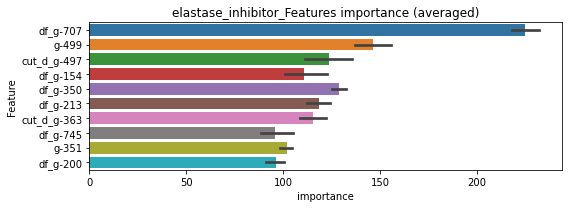

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 elastase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 elastase_inhibitor=================================


Early stopping, best iteration is:
[862]	training's binary_logloss: 0.000228989	valid_1's binary_logloss: 0.00105671
Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 elastase_inhibitor=================================


Early stopping, best iteration is:
[844]	training's binary_logloss: 0.000230222	valid_1's binary_logloss: 0.000608204
Training until validation scores don't improve for 30 rounds


len(train_index) : 2859


Early stopping, best iteration is:
[919]	training's binary_logloss: 0.000226805	valid_1's binary_logloss: 0.000334738


len(valid_index) : 953
================================= fold 4/4 elastase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


elastase_inhibitor logloss: 0.0007324034058704828


Early stopping, best iteration is:
[848]	training's binary_logloss: 0.00022912	valid_1's binary_logloss: 0.000929785


erbb2_inhibitor, len(trt): 20, len(othr): 3286
target_rate: 0.0008398 → Adj_target_rate: 0.0010717


selected negative label: 3286


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[517]	training's binary_logloss: 0.000366257	valid_1's binary_logloss: 0.00225752
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[586]	training's binary_logloss: 0.000326805	valid_1's binary_logloss: 0.00252769
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[602]	training's binary_logloss: 0.000325211	valid_1's binary_logloss: 0.000958551
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0018858, Threshold: 0.0061382, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[605]	training's binary_logloss: 0.000331837	valid_1's binary_logloss: 0.000885313


Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00084
Num_p_label: 40.0, Expected: 3.3, Threshold: 0.0061382, conf_0:0.00430, conf_1:0.00798
Num_p_label: 2.0, Expected: 3.3, Adj_threshold_1: 0.0361382
threshold: 0.0361382, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[520]	training's binary_logloss: 0.000342233	valid_1's binary_logloss: 0.00264081
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[541]	training's binary_logloss: 0.000329738	valid_1's binary_logloss: 0.00179214
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[613]	training's binary_logloss: 0.000311652	valid_1's binary_logloss: 0.000620639
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0337114, Threshold: 0.0361382, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0045203 Vs.target_rate: 0.00084
Num_p_label: 18.0, Expected: 3.3, Threshold: 0.0361382, conf_0:0.02891, conf_1:0.04337
Num_p_label: 9.0, Expected: 3.3, Adj_threshold_1: 0.0661382
Num_p_label: 6.0, Expected: 3.3, Adj_threshold_2: 0.0961382


Early stopping, best iteration is:
[584]	training's binary_logloss: 0.000317841	valid_1's binary_logloss: 0.000872859


threshold: 0.0961382, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[520]	training's binary_logloss: 0.000342233	valid_1's binary_logloss: 0.00264081
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[541]	training's binary_logloss: 0.000329738	valid_1's binary_logloss: 0.00179214
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[613]	training's binary_logloss: 0.000311652	valid_1's binary_logloss: 0.000620639
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0337114, Threshold: 0.0961382, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0015068 Vs.target_rate: 0.00084
Num_p_label: 6.0, Expected: 3.3, Threshold: 0.0961382, conf_0:0.08652, conf_1:0.10575


Early stopping, best iteration is:
[584]	training's binary_logloss: 0.000317841	valid_1's binary_logloss: 0.000872859


threshold: 0.0961382, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


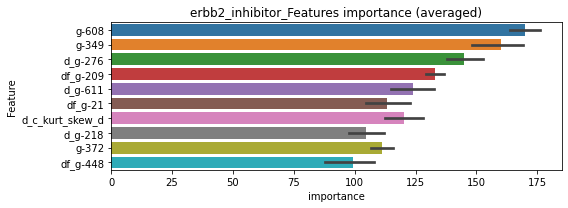

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 erbb2_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2858
len(valid_index) : 953


Early stopping, best iteration is:
[718]	training's binary_logloss: 0.000348792	valid_1's binary_logloss: 0.00215548


================================= fold 2/4 erbb2_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[927]	training's binary_logloss: 0.000318357	valid_1's binary_logloss: 0.00144215


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 erbb2_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000315227	valid_1's binary_logloss: 0.000609525
Early stopping, best iteration is:
[974]	training's binary_logloss: 0.000315227	valid_1's binary_logloss: 0.000609525


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 erbb2_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[957]	training's binary_logloss: 0.000316905	valid_1's binary_logloss: 0.000787704


erbb2_inhibitor logloss: 0.0012488359700070398


mutually exclusive columns: estrogen_receptor_agonist


estrogen_receptor_agonist, len(trt): 158, len(othr): 4398
target_rate: 0.0066348 → Adj_target_rate: 0.0062095


selected negative label: 4398


unpredictable_cols:estrogen_receptor_agonist → create_features


N_features:358
================= Pseudo labeling 1 / 3 =================



Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0394503	valid_1's binary_logloss: 0.11103
[2000]	training's binary_logloss: 0.0190967	valid_1's binary_logloss: 0.0978155
Early stopping, best iteration is:
[2488]	training's binary_logloss: 0.0151746	valid_1's binary_logloss: 0.09533
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0388931	valid_1's binary_logloss: 0.116948
[2000]	training's binary_logloss: 0.0192071	valid_1's binary_logloss: 0.106481
Early stopping, best iteration is:
[2091]	training's binary_logloss: 0.0183618	valid_1's binary_logloss: 0.105828
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0382935	valid_1's binary_logloss: 0.126171
Early stopping, best iteration is:
[1911]	training's binary_logloss: 0.0200135	valid_1's binary_logloss: 0.117169
Training until validation scores don't improve for 30 rounds
[1000]	training's b

1 / 3, AUC score:0.979, PR-AUC:0.961
y_Threshold: 0.0525022, Threshold: 0.1016757, pos_neg_ratio: 0.8000000
Remove_noisy_data: 289 → Positive_corect_labels: 823/4988
p_label_rate: 0.0100452 Vs.target_rate: 0.00663
Num_p_label: 40.0, Expected: 26.4, Threshold: 0.1016757, conf_0:0.07117, conf_1:0.13218
Num_p_label: 21.0, Expected: 26.4, Adj_threshold_1: 0.1316757
threshold: 0.1316757, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 823.0/4988, y_label_rate: 0.1649960
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.030366	valid_1's binary_logloss: 0.0815972
[2000]	training's binary_logloss: 0.0147694	valid_1's binary_logloss: 0.0697045
[3000]	training's binary_logloss: 0.00966862	valid_1's binary_logloss: 0.0655824
Early stopping, best iteration is:
[3439]	training's binary_logloss: 0.00838702	valid_1's binary_logloss: 0.0644174
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0299044	valid_1's binary_logloss: 0.086618
[2000]	training's binary_logloss: 0.0146089	valid_1's binary_logloss: 0.0743554
Early stopping, best iteration is:
[2896]	training's binary_logloss: 0.00991589	valid_1's binary_logloss: 0.0704401
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0307934	valid_1's binary_logloss: 0.0784779
[2000]	training's binary_logloss: 0.0150183	valid_1's binary_logloss: 0.0632134
[3000]	training's binary_l

2 / 3, AUC score:0.998, PR-AUC:0.993
y_Threshold: 0.0719858, Threshold: 0.1316757, pos_neg_ratio: 0.8000000
Remove_noisy_data: 52 → Positive_corect_labels: 797.0/4936
p_label_rate: 0.0095429 Vs.target_rate: 0.00663
Num_p_label: 38.0, Expected: 26.4, Threshold: 0.1316757, conf_0:0.10534, conf_1:0.15801
threshold: 0.1316757, positive_p_label: 38.0/3982, p_label_rate: 0.0095429
positive_y_label: 797.0/4936, y_label_rate: 0.1614668
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0273493	valid_1's binary_logloss: 0.0736095
[2000]	training's binary_logloss: 0.01337	valid_1's binary_logloss: 0.0600044
[3000]	training's binary_logloss: 0.00875838	valid_1's binary_logloss: 0.0553677
Early stopping, best iteration is:
[3235]	training's binary_logloss: 0.00809561	valid_1's binary_logloss: 0.0546236
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0272484	valid_1's binary_logloss: 0.0702638
[2000]	training's binary_logloss: 0.0133224	valid_1's binary_logloss: 0.0578086
[3000]	training's binary_logloss: 0.00872161	valid_1's binary_logloss: 0.0532818
Early stopping, best iteration is:
[3447]	training's binary_logloss: 0.00756587	valid_1's binary_logloss: 0.0520879
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0275341	valid_1's binary_logloss: 0.070674
[2000]	training's binary_l

3 / 3, AUC score:0.999, PR-AUC:0.997
y_Threshold: 0.0676245, Threshold: 0.1316757, pos_neg_ratio: 0.8000000
Remove_noisy_data: 26 → Positive_corect_labels: 784.0/4910
p_label_rate: 0.0082873 Vs.target_rate: 0.00663
Num_p_label: 33.0, Expected: 26.4, Threshold: 0.1316757, conf_0:0.11851, conf_1:0.14484
threshold: 0.1316757, positive_p_label: 33.0/3982, p_label_rate: 0.0082873
positive_y_label: 784.0/4910, y_label_rate: 0.1596741


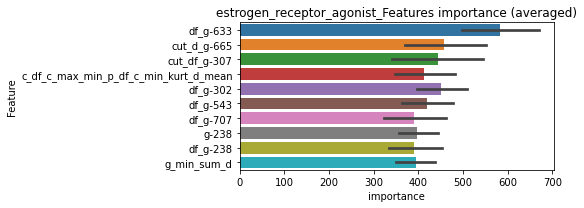

len(train_index) : 3682
len(valid_index) : 1228
================================= fold 1/4 estrogen_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0260733	valid_1's binary_logloss: 0.0631187
[2000]	training's binary_logloss: 0.012727	valid_1's binary_logloss: 0.0508066
[3000]	training's binary_logloss: 0.00837314	valid_1's binary_logloss: 0.0466809
Early stopping, best iteration is:
[3152]	training's binary_logloss: 0.00795196	valid_1's binary_logloss: 0.0464152


len(train_index) : 3682
len(valid_index) : 1228
================================= fold 2/4 estrogen_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0257035	valid_1's binary_logloss: 0.0678006
[2000]	training's binary_logloss: 0.0125285	valid_1's binary_logloss: 0.0542976
[3000]	training's binary_logloss: 0.00826532	valid_1's binary_logloss: 0.0496104
Early stopping, best iteration is:
[3913]	training's binary_logloss: 0.00630823	valid_1's binary_logloss: 0.0474489


len(train_index) : 3683
len(valid_index) : 1227
================================= fold 3/4 estrogen_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0260869	valid_1's binary_logloss: 0.0583247
[2000]	training's binary_logloss: 0.012776	valid_1's binary_logloss: 0.0442316
[3000]	training's binary_logloss: 0.00843231	valid_1's binary_logloss: 0.0394591
[4000]	training's binary_logloss: 0.00629546	valid_1's binary_logloss: 0.0367059
[5000]	training's binary_logloss: 0.00503517	valid_1's binary_logloss: 0.0351575
Early stopping, best iteration is:
[5302]	training's binary_logloss: 0.00474934	valid_1's binary_logloss: 0.0347354


len(train_index) : 3683
len(valid_index) : 1227
================================= fold 4/4 estrogen_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0258098	valid_1's binary_logloss: 0.0685216
[2000]	training's binary_logloss: 0.0125841	valid_1's binary_logloss: 0.0557457
[3000]	training's binary_logloss: 0.00829472	valid_1's binary_logloss: 0.0512945
Early stopping, best iteration is:
[3783]	training's binary_logloss: 0.00655684	valid_1's binary_logloss: 0.0493973


estrogen_receptor_agonist logloss: 0.0445001860074069
estrogen_receptor_agonist is unpredictable(><)!
estrogen_receptor_antagonist, len(trt): 48, len(othr): 3284
target_rate: 0.0020156 → Adj_target_rate: 0.0022556


selected negative label: 3284


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[697]	training's binary_logloss: 0.000487643	valid_1's binary_logloss: 0.00975896
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[617]	training's binary_logloss: 0.000551687	valid_1's binary_logloss: 0.0141172
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[689]	training's binary_logloss: 0.000508078	valid_1's binary_logloss: 0.00452934
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0046352, Threshold: 0.1993563, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 655/3806
p_label_rate: 0.0100452 Vs.target_rate: 0.00202
Num_p_label: 40.0, Expected: 8.0, Threshold: 0.1993563, conf_0:0.13955, conf_1:0.25916


Early stopping, best iteration is:
[452]	training's binary_logloss: 0.000941327	valid_1's binary_logloss: 0.026615


Num_p_label: 37.0, Expected: 8.0, Adj_threshold_1: 0.2293563
Num_p_label: 35.0, Expected: 8.0, Adj_threshold_2: 0.2593563
Num_p_label: 33.0, Expected: 8.0, Adj_threshold_3: 0.2893563
Num_p_label: 30.0, Expected: 8.0, Adj_threshold_4: 0.3193563
Num_p_label: 29.0, Expected: 8.0, Adj_threshold_5: 0.3493563
Num_p_label: 26.0, Expected: 8.0, Adj_threshold_6: 0.3793563
Num_p_label: 23.0, Expected: 8.0, Adj_threshold_7: 0.4093563
Num_p_label: 23.0, Expected: 8.0, Adj_threshold_8: 0.4393563
Num_p_label: 21.0, Expected: 8.0, Adj_threshold_9: 0.4693563
Num_p_label: 20.0, Expected: 8.0, Adj_threshold_10: 0.4993563
threshold: 0.4993563, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 655.0/3806, y_label_rate: 0.1720967
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[597]	training's binary_logloss: 0.0005415	valid_1's binary_logloss: 0.0136371
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[651]	training's binary_logloss: 0.000496935	valid_1's binary_logloss: 0.00627173
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[633]	training's binary_logloss: 0.000516693	valid_1's binary_logloss: 0.00852778
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[586]	training's binary_logloss: 0.000548209	valid_1's binary_logloss: 0.0150547


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0381140, Threshold: 0.4993563, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 652.0/3800
p_label_rate: 0.0087896 Vs.target_rate: 0.00202
Num_p_label: 35.0, Expected: 8.0, Threshold: 0.4993563, conf_0:0.39949, conf_1:0.59923
Num_p_label: 34.0, Expected: 8.0, Adj_threshold_1: 0.5293563
Num_p_label: 34.0, Expected: 8.0, Adj_threshold_2: 0.5593563
Num_p_label: 32.0, Expected: 8.0, Adj_threshold_3: 0.5893563
Num_p_label: 29.0, Expected: 8.0, Adj_threshold_4: 0.6193563
Num_p_label: 28.0, Expected: 8.0, Adj_threshold_5: 0.6493563
Num_p_label: 26.0, Expected: 8.0, Adj_threshold_6: 0.6793563
Num_p_label: 20.0, Expected: 8.0, Adj_threshold_7: 0.7093563
threshold: 0.7093563, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 652.0/3800, y_label_rate: 0.1715789
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[593]	training's binary_logloss: 0.000534417	valid_1's binary_logloss: 0.0135383
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[674]	training's binary_logloss: 0.000478462	valid_1's binary_logloss: 0.00719952
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[680]	training's binary_logloss: 0.000474057	valid_1's binary_logloss: 0.00751938
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0310267, Threshold: 0.7093563, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 650.0/3796
p_label_rate: 0.0057760 Vs.target_rate: 0.00202
Num_p_label: 23.0, Expected: 8.0, Threshold: 0.7093563, conf_0:0.63842, conf_1:0.78029


Early stopping, best iteration is:
[459]	training's binary_logloss: 0.000815771	valid_1's binary_logloss: 0.0245989


Num_p_label: 18.0, Expected: 8.0, Adj_threshold_1: 0.7393563
threshold: 0.7393563, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 650.0/3796, y_label_rate: 0.1712329


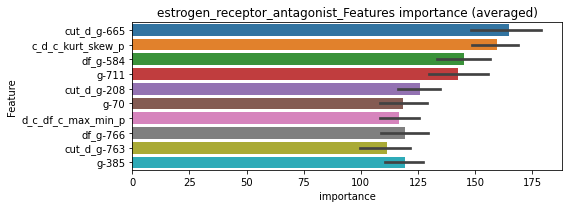

len(train_index) : 2847
len(valid_index) : 949
================================= fold 1/4 estrogen_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[808]	training's binary_logloss: 0.00050749	valid_1's binary_logloss: 0.0106255


len(train_index) : 2847
len(valid_index) : 949
================================= fold 2/4 estrogen_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[675]	training's binary_logloss: 0.000558047	valid_1's binary_logloss: 0.0130827


len(train_index) : 2847
len(valid_index) : 949
================================= fold 3/4 estrogen_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[729]	training's binary_logloss: 0.000532527	valid_1's binary_logloss: 0.00821687


len(train_index) : 2847
len(valid_index) : 949
================================= fold 4/4 estrogen_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[730]	training's binary_logloss: 0.00053211	valid_1's binary_logloss: 0.00966815


estrogen_receptor_antagonist logloss: 0.010400532386932936
faah_inhibitor, len(trt): 36, len(othr): 3285
target_rate: 0.0015117 → Adj_target_rate: 0.0017663


selected negative label: 3285


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[623]	training's binary_logloss: 0.000412952	valid_1's binary_logloss: 0.00527705
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[600]	training's binary_logloss: 0.000421446	valid_1's binary_logloss: 0.00507439
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[653]	training's binary_logloss: 0.000416499	valid_1's binary_logloss: 0.00247197
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[611]	training's binary_logloss: 0.000411627	valid_1's binary_logloss: 0.00471481


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0027828, Threshold: 0.0091993, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00151
Num_p_label: 40.0, Expected: 6.0, Threshold: 0.0091993, conf_0:0.00644, conf_1:0.01196
Num_p_label: 4.0, Expected: 6.0, Adj_threshold_1: 0.0391993
threshold: 0.0391993, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[634]	training's binary_logloss: 0.00039779	valid_1's binary_logloss: 0.00558155
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[633]	training's binary_logloss: 0.000389526	valid_1's binary_logloss: 0.00488618
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[646]	training's binary_logloss: 0.000399509	valid_1's binary_logloss: 0.0022518
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0481913, Threshold: 0.0391993, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[576]	training's binary_logloss: 0.000426243	valid_1's binary_logloss: 0.00342832


Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0027624 Vs.target_rate: 0.00151
Num_p_label: 11.0, Expected: 6.0, Threshold: 0.0391993, conf_0:0.03136, conf_1:0.04704
threshold: 0.0391993, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[634]	training's binary_logloss: 0.00039779	valid_1's binary_logloss: 0.00558155
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[633]	training's binary_logloss: 0.000389526	valid_1's binary_logloss: 0.00488618
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[646]	training's binary_logloss: 0.000399509	valid_1's binary_logloss: 0.0022518
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0481913, Threshold: 0.0391993, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[576]	training's binary_logloss: 0.000426243	valid_1's binary_logloss: 0.00342832


Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0027624 Vs.target_rate: 0.00151
Num_p_label: 11.0, Expected: 6.0, Threshold: 0.0391993, conf_0:0.03528, conf_1:0.04312
threshold: 0.0391993, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


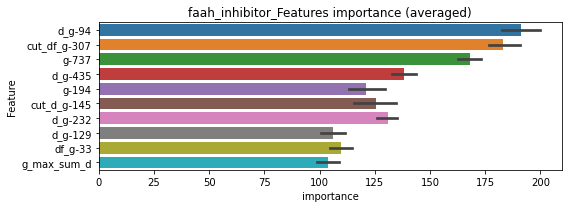

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 faah_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[898]	training's binary_logloss: 0.000405093	valid_1's binary_logloss: 0.00495099


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 faah_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[949]	training's binary_logloss: 0.000392741	valid_1's binary_logloss: 0.00463597


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 faah_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[881]	training's binary_logloss: 0.000417541	valid_1's binary_logloss: 0.00196115


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 faah_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[895]	training's binary_logloss: 0.000409925	valid_1's binary_logloss: 0.00349966


faah_inhibitor logloss: 0.003762485405334089
farnesyltransferase_inhibitor, len(trt): 18, len(othr): 3288
target_rate: 0.0007559 → Adj_target_rate: 0.0009799


selected negative label: 3288


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[558]	training's binary_logloss: 0.000294475	valid_1's binary_logloss: 0.000997483
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[599]	training's binary_logloss: 0.000285848	valid_1's binary_logloss: 0.00111839
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[577]	training's binary_logloss: 0.000293906	valid_1's binary_logloss: 0.000522096
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0015476, Threshold: 0.0041284, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, Expected: 3.0, Threshold: 0.0041284, conf_0:0.00289, conf_1:0.00537
Num_p_label: 1.0, Expected: 3.0, Adj_threshold_1: 0.0341284


Early stopping, best iteration is:
[548]	training's binary_logloss: 0.0002956	valid_1's binary_logloss: 0.00349146


threshold: 0.0341284, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[592]	training's binary_logloss: 0.000277795	valid_1's binary_logloss: 0.00173732
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[564]	training's binary_logloss: 0.00028599	valid_1's binary_logloss: 0.00103669
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[588]	training's binary_logloss: 0.000283078	valid_1's binary_logloss: 0.000426823
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0171334, Threshold: 0.0341284, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0022602 Vs.target_rate: 0.00076
Num_p_label: 9.0, Expected: 3.0, Threshold: 0.0341284, conf_0:0.02730, conf_1:0.04095
Num_p_label: 3.0, Expected: 3.0, Adj_threshold_1: 0.0641284


Early stopping, best iteration is:
[568]	training's binary_logloss: 0.000280391	valid_1's binary_logloss: 0.00438995


threshold: 0.0641284, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[592]	training's binary_logloss: 0.000277795	valid_1's binary_logloss: 0.00173732
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[564]	training's binary_logloss: 0.00028599	valid_1's binary_logloss: 0.00103669
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[592]	training's binary_logloss: 0.000283078	valid_1's binary_logloss: 0.000426823
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0171334, Threshold: 0.0641284, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0007534 Vs.target_rate: 0.00076
Num_p_label: 3.0, Expected: 3.0, Threshold: 0.0641284, conf_0:0.05772, conf_1:0.07054


Early stopping, best iteration is:
[568]	training's binary_logloss: 0.000280391	valid_1's binary_logloss: 0.00438995


threshold: 0.0641284, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


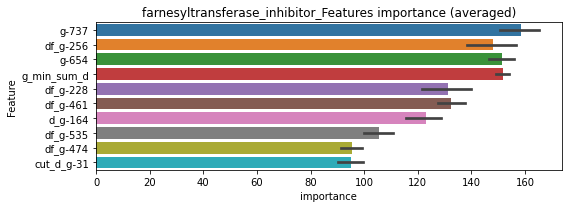

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 farnesyltransferase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[914]	training's binary_logloss: 0.000285321	valid_1's binary_logloss: 0.00118667


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 farnesyltransferase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000281921	valid_1's binary_logloss: 0.000936996
Early stopping, best iteration is:
[990]	training's binary_logloss: 0.000281921	valid_1's binary_logloss: 0.000936996


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 farnesyltransferase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[945]	training's binary_logloss: 0.000287483	valid_1's binary_logloss: 0.000469664


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 farnesyltransferase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


farnesyltransferase_inhibitor logloss: 0.0012967399018546165


Early stopping, best iteration is:
[753]	training's binary_logloss: 0.000302222	valid_1's binary_logloss: 0.00259365


fatty_acid_receptor_agonist, len(trt): 25, len(othr): 3287
target_rate: 0.0010498 → Adj_target_rate: 0.0012955


selected negative label: 3287


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[632]	training's binary_logloss: 0.000341569	valid_1's binary_logloss: 0.00110053
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[593]	training's binary_logloss: 0.000340151	valid_1's binary_logloss: 0.00720985
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[588]	training's binary_logloss: 0.000345772	valid_1's binary_logloss: 0.001677
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0021842, Threshold: 0.0092701, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00105
Num_p_label: 40.0, Expected: 4.2, Threshold: 0.0092701, conf_0:0.00649, conf_1:0.01205
Num_p_label: 5.0, Expected: 4.2, Adj_threshold_1: 0.0392701


Early stopping, best iteration is:
[444]	training's binary_logloss: 0.000477519	valid_1's binary_logloss: 0.00647981


threshold: 0.0392701, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[624]	training's binary_logloss: 0.000331739	valid_1's binary_logloss: 0.00106883
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[535]	training's binary_logloss: 0.000348443	valid_1's binary_logloss: 0.00708263
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[576]	training's binary_logloss: 0.000339611	valid_1's binary_logloss: 0.00171392
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0246793, Threshold: 0.0392701, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0042692 Vs.target_rate: 0.00105
Num_p_label: 17.0, Expected: 4.2, Threshold: 0.0392701, conf_0:0.03142, conf_1:0.04712
Num_p_label: 9.0, Expected: 4.2, Adj_threshold_1: 0.0692701


Early stopping, best iteration is:
[445]	training's binary_logloss: 0.000455987	valid_1's binary_logloss: 0.00620121


threshold: 0.0692701, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[624]	training's binary_logloss: 0.000331739	valid_1's binary_logloss: 0.00106883
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[535]	training's binary_logloss: 0.000348443	valid_1's binary_logloss: 0.00708263
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[576]	training's binary_logloss: 0.000339611	valid_1's binary_logloss: 0.00171392
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0246793, Threshold: 0.0692701, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0022602 Vs.target_rate: 0.00105
Num_p_label: 9.0, Expected: 4.2, Threshold: 0.0692701, conf_0:0.06234, conf_1:0.07620


Early stopping, best iteration is:
[445]	training's binary_logloss: 0.000455987	valid_1's binary_logloss: 0.00620121


threshold: 0.0692701, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


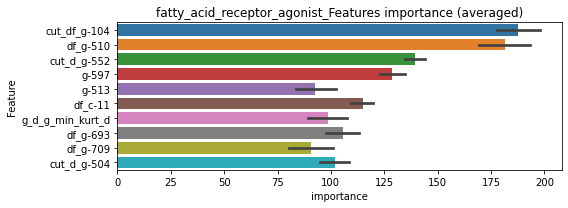

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 fatty_acid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[959]	training's binary_logloss: 0.000336971	valid_1's binary_logloss: 0.000850134


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 fatty_acid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[770]	training's binary_logloss: 0.00034915	valid_1's binary_logloss: 0.00710302


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 fatty_acid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[918]	training's binary_logloss: 0.000340471	valid_1's binary_logloss: 0.00149941


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 fatty_acid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


fatty_acid_receptor_agonist logloss: 0.003815091129861236


Early stopping, best iteration is:
[361]	training's binary_logloss: 0.0006332	valid_1's binary_logloss: 0.00580751


fgfr_inhibitor, len(trt): 50, len(othr): 3287
target_rate: 0.0020996 → Adj_target_rate: 0.0023352


selected negative label: 3287


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[697]	training's binary_logloss: 0.000515215	valid_1's binary_logloss: 0.0183058
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[726]	training's binary_logloss: 0.000510396	valid_1's binary_logloss: 0.00647741
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[724]	training's binary_logloss: 0.000521618	valid_1's binary_logloss: 0.00415968
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[699]	training's binary_logloss: 0.000515556	valid_1's binary_logloss: 0.0105899


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0040755, Threshold: 0.0148280, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00210
Num_p_label: 40.0, Expected: 8.4, Threshold: 0.0148280, conf_0:0.01038, conf_1:0.01928
Num_p_label: 19.0, Expected: 8.4, Adj_threshold_1: 0.0448280
threshold: 0.0448280, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[699]	training's binary_logloss: 0.000501453	valid_1's binary_logloss: 0.0189266
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[722]	training's binary_logloss: 0.000503995	valid_1's binary_logloss: 0.00566247
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[725]	training's binary_logloss: 0.000509382	valid_1's binary_logloss: 0.00390243
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[653]	training's binary_logloss: 0.00054337	valid_1's binary_logloss: 0.0111128


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0189746, Threshold: 0.0448280, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3810
p_label_rate: 0.0070316 Vs.target_rate: 0.00210
Num_p_label: 28.0, Expected: 8.4, Threshold: 0.0448280, conf_0:0.03586, conf_1:0.05379
Num_p_label: 19.0, Expected: 8.4, Adj_threshold_1: 0.0748280
threshold: 0.0748280, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 656.0/3810, y_label_rate: 0.1721785
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[729]	training's binary_logloss: 0.00049381	valid_1's binary_logloss: 0.00644322
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[676]	training's binary_logloss: 0.000526237	valid_1's binary_logloss: 0.0136896
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[736]	training's binary_logloss: 0.000509368	valid_1's binary_logloss: 0.00175675
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[680]	training's binary_logloss: 0.000509598	valid_1's binary_logloss: 0.017515


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0218835, Threshold: 0.0748280, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3808
p_label_rate: 0.0045203 Vs.target_rate: 0.00210
Num_p_label: 18.0, Expected: 8.4, Threshold: 0.0748280, conf_0:0.06735, conf_1:0.08231
threshold: 0.0748280, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 655.0/3808, y_label_rate: 0.1720063


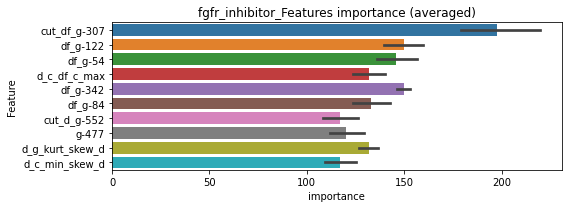

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 fgfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[900]	training's binary_logloss: 0.000520226	valid_1's binary_logloss: 0.00659795


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 fgfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[915]	training's binary_logloss: 0.000521861	valid_1's binary_logloss: 0.00709448


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 fgfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000504349	valid_1's binary_logloss: 0.00400848
Early stopping, best iteration is:
[1023]	training's binary_logloss: 0.000501397	valid_1's binary_logloss: 0.00399791


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 fgfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[956]	training's binary_logloss: 0.000505814	valid_1's binary_logloss: 0.0124893


fgfr_inhibitor logloss: 0.007547378103748959


mutually exclusive columns: flt3_inhibitor


flt3_inhibitor, len(trt): 279, len(othr): 7069
target_rate: 0.0117158 → Adj_target_rate: 0.0100684


selected negative label: 7069


unpredictable_cols:flt3_inhibitor → create_features


N_features:358
================= Pseudo labeling 1 / 3 =================



Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0432188	valid_1's binary_logloss: 0.121936
[2000]	training's binary_logloss: 0.0212961	valid_1's binary_logloss: 0.104488
Early stopping, best iteration is:
[2652]	training's binary_logloss: 0.0160441	valid_1's binary_logloss: 0.100402
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0429829	valid_1's binary_logloss: 0.134375
[2000]	training's binary_logloss: 0.0211318	valid_1's binary_logloss: 0.119276
Early stopping, best iteration is:
[2504]	training's binary_logloss: 0.0168691	valid_1's binary_logloss: 0.116212
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0428685	valid_1's binary_logloss: 0.134941
[2000]	training's binary_logloss: 0.0210068	valid_1's binary_logloss: 0.119157
Early stopping, best iteration is:
[2267]	training's binary_logloss: 0.0184688	valid_1's binary_logloss: 0.117299


1 / 3, AUC score:0.979, PR-AUC:0.958
y_Threshold: 0.0653986, Threshold: 0.1433800, pos_neg_ratio: 0.8000000
Remove_noisy_data: 466 → Positive_corect_labels: 1322/8016
p_label_rate: 0.0100452 Vs.target_rate: 0.01172
Num_p_label: 40.0, Expected: 46.7, Threshold: 0.1433800, conf_0:0.10037, conf_1:0.18639
threshold: 0.1433800, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1322.0/8016, y_label_rate: 0.1649202
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0333268	valid_1's binary_logloss: 0.0974908
[2000]	training's binary_logloss: 0.0158829	valid_1's binary_logloss: 0.0810018
Early stopping, best iteration is:
[2775]	training's binary_logloss: 0.0111991	valid_1's binary_logloss: 0.076378
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0329038	valid_1's binary_logloss: 0.101386
[2000]	training's binary_logloss: 0.0157959	valid_1's binary_logloss: 0.0842635
[3000]	training's binary_logloss: 0.0102497	valid_1's binary_logloss: 0.0781375
Early stopping, best iteration is:
[3058]	training's binary_logloss: 0.010047	valid_1's binary_logloss: 0.0778411
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0340173	valid_1's binary_logloss: 0.0864372
[2000]	training's binary_logloss: 0.0161879	valid_1's binary_logloss: 0.0699574
[3000]	training's binary_loglo

2 / 3, AUC score:0.996, PR-AUC:0.990
y_Threshold: 0.0900117, Threshold: 0.1433800, pos_neg_ratio: 0.8000000
Remove_noisy_data: 96 → Positive_corect_labels: 1274.0/7920
p_label_rate: 0.0185836 Vs.target_rate: 0.01172
Num_p_label: 74.0, Expected: 46.7, Threshold: 0.1433800, conf_0:0.11470, conf_1:0.17206
Num_p_label: 48.0, Expected: 46.7, Adj_threshold_1: 0.1733800
threshold: 0.1733800, positive_p_label: 48.0/3982, p_label_rate: 0.0120542
positive_y_label: 1274.0/7920, y_label_rate: 0.1608586
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0299216	valid_1's binary_logloss: 0.0816944
[2000]	training's binary_logloss: 0.0142825	valid_1's binary_logloss: 0.0651907
[3000]	training's binary_logloss: 0.00934921	valid_1's binary_logloss: 0.0594925
Early stopping, best iteration is:
[3611]	training's binary_logloss: 0.00769515	valid_1's binary_logloss: 0.0573671
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0305043	valid_1's binary_logloss: 0.0756682
[2000]	training's binary_logloss: 0.0146056	valid_1's binary_logloss: 0.0586427
[3000]	training's binary_logloss: 0.00951048	valid_1's binary_logloss: 0.0524095
Early stopping, best iteration is:
[3859]	training's binary_logloss: 0.00730817	valid_1's binary_logloss: 0.0493165
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0308013	valid_1's binary_logloss: 0.0793774
[2000]	training's binar

3 / 3, AUC score:0.998, PR-AUC:0.995
y_Threshold: 0.0894120, Threshold: 0.1733800, pos_neg_ratio: 0.8000000
Remove_noisy_data: 62 → Positive_corect_labels: 1243.0/7858
p_label_rate: 0.0155701 Vs.target_rate: 0.01172
Num_p_label: 62.0, Expected: 46.7, Threshold: 0.1733800, conf_0:0.15604, conf_1:0.19072
threshold: 0.1733800, positive_p_label: 62.0/3982, p_label_rate: 0.0155701
positive_y_label: 1243.0/7858, y_label_rate: 0.1581827


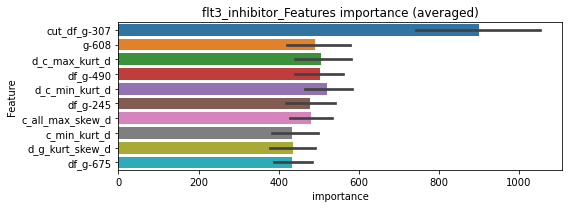

len(train_index) : 5893
len(valid_index) : 1965
================================= fold 1/4 flt3_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0288596	valid_1's binary_logloss: 0.0704925
[2000]	training's binary_logloss: 0.013717	valid_1's binary_logloss: 0.0540322
[3000]	training's binary_logloss: 0.00895688	valid_1's binary_logloss: 0.0483108
Early stopping, best iteration is:
[3507]	training's binary_logloss: 0.00760407	valid_1's binary_logloss: 0.0466018


len(train_index) : 5893
len(valid_index) : 1965
================================= fold 2/4 flt3_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.028301	valid_1's binary_logloss: 0.0799109
[2000]	training's binary_logloss: 0.013457	valid_1's binary_logloss: 0.065208
[3000]	training's binary_logloss: 0.00878994	valid_1's binary_logloss: 0.0601736
Early stopping, best iteration is:
[3253]	training's binary_logloss: 0.00806321	valid_1's binary_logloss: 0.0594269


len(train_index) : 5894
len(valid_index) : 1964
================================= fold 3/4 flt3_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0287281	valid_1's binary_logloss: 0.0696677
[2000]	training's binary_logloss: 0.0136599	valid_1's binary_logloss: 0.05257
[3000]	training's binary_logloss: 0.00894199	valid_1's binary_logloss: 0.0462978
[4000]	training's binary_logloss: 0.00664186	valid_1's binary_logloss: 0.0431992
Early stopping, best iteration is:
[4903]	training's binary_logloss: 0.00538707	valid_1's binary_logloss: 0.0413416


len(train_index) : 5894
len(valid_index) : 1964
================================= fold 4/4 flt3_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0285683	valid_1's binary_logloss: 0.0726562
[2000]	training's binary_logloss: 0.0136663	valid_1's binary_logloss: 0.0555439
[3000]	training's binary_logloss: 0.00896341	valid_1's binary_logloss: 0.0492793
[4000]	training's binary_logloss: 0.00665686	valid_1's binary_logloss: 0.0459705
Early stopping, best iteration is:
[4215]	training's binary_logloss: 0.00630318	valid_1's binary_logloss: 0.0453727


flt3_inhibitor logloss: 0.048186948752813215
flt3_inhibitor is unpredictable(><)!
focal_adhesion_kinase_inhibitor, len(trt): 18, len(othr): 3287
target_rate: 0.0007559 → Adj_target_rate: 0.0009799


selected negative label: 3287


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[627]	training's binary_logloss: 0.000291501	valid_1's binary_logloss: 0.000973876
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[583]	training's binary_logloss: 0.000290224	valid_1's binary_logloss: 0.00169496
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[598]	training's binary_logloss: 0.00029028	valid_1's binary_logloss: 0.00129248
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[604]	training's binary_logloss: 0.000287705	valid_1's binary_logloss: 0.00134023


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0014878, Threshold: 0.0052294, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, Expected: 3.0, Threshold: 0.0052294, conf_0:0.00366, conf_1:0.00680
Num_p_label: 1.0, Expected: 3.0, Adj_threshold_1: 0.0352294
threshold: 0.0352294, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[578]	training's binary_logloss: 0.000284464	valid_1's binary_logloss: 0.0010228
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[570]	training's binary_logloss: 0.000278596	valid_1's binary_logloss: 0.00126946
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.000284184	valid_1's binary_logloss: 0.000709014
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1363969, Threshold: 0.0352294, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0032647 Vs.target_rate: 0.00076
Num_p_label: 13.0, Expected: 3.0, Threshold: 0.0352294, conf_0:0.02818, conf_1:0.04228
Num_p_label: 3.0, Expected: 3.0, Adj_threshold_1: 0.0652294


Early stopping, best iteration is:
[612]	training's binary_logloss: 0.00027429	valid_1's binary_logloss: 0.000689981


threshold: 0.0652294, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[578]	training's binary_logloss: 0.000284464	valid_1's binary_logloss: 0.0010228
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[570]	training's binary_logloss: 0.000278596	valid_1's binary_logloss: 0.00126946
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.000284184	valid_1's binary_logloss: 0.000709014
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1363969, Threshold: 0.0652294, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0007534 Vs.target_rate: 0.00076
Num_p_label: 3.0, Expected: 3.0, Threshold: 0.0652294, conf_0:0.05871, conf_1:0.07175


Early stopping, best iteration is:
[612]	training's binary_logloss: 0.00027429	valid_1's binary_logloss: 0.000689981


threshold: 0.0652294, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


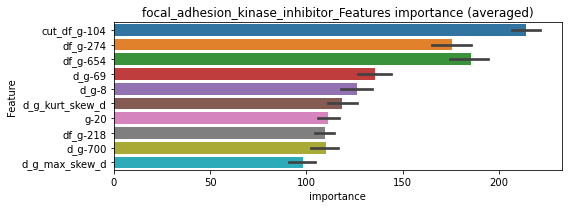

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 focal_adhesion_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000280628	valid_1's binary_logloss: 0.00096244
Early stopping, best iteration is:
[1090]	training's binary_logloss: 0.000277876	valid_1's binary_logloss: 0.000958499


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 focal_adhesion_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000280679	valid_1's binary_logloss: 0.001047
Early stopping, best iteration is:
[1045]	training's binary_logloss: 0.000278486	valid_1's binary_logloss: 0.00104278


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 focal_adhesion_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000285017	valid_1's binary_logloss: 0.000886829
Early stopping, best iteration is:
[990]	training's binary_logloss: 0.000285172	valid_1's binary_logloss: 0.000886657


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 focal_adhesion_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000280764	valid_1's binary_logloss: 0.000694711
Early stopping, best iteration is:
[1184]	training's binary_logloss: 0.000275158	valid_1's binary_logloss: 0.000686786


focal_adhesion_kinase_inhibitor logloss: 0.0008937342849811536
free_radical_scavenger, len(trt): 18, len(othr): 3287
target_rate: 0.0007559 → Adj_target_rate: 0.0009799


selected negative label: 3287


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[589]	training's binary_logloss: 0.00029498	valid_1's binary_logloss: 0.00106441
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[550]	training's binary_logloss: 0.000299632	valid_1's binary_logloss: 0.00130248
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[566]	training's binary_logloss: 0.000301596	valid_1's binary_logloss: 0.000765206
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0015082, Threshold: 0.0057864, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, Expected: 3.0, Threshold: 0.0057864, conf_0:0.00405, conf_1:0.00752
Num_p_label: 7.0, Expected: 3.0, Adj_threshold_1: 0.0357864


Early stopping, best iteration is:
[539]	training's binary_logloss: 0.000309144	valid_1's binary_logloss: 0.00244955


threshold: 0.0357864, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[574]	training's binary_logloss: 0.000288166	valid_1's binary_logloss: 0.00118781
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[582]	training's binary_logloss: 0.000284101	valid_1's binary_logloss: 0.00119473
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[568]	training's binary_logloss: 0.000289483	valid_1's binary_logloss: 0.000646112
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0361731, Threshold: 0.0357864, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0050226 Vs.target_rate: 0.00076
Num_p_label: 20.0, Expected: 3.0, Threshold: 0.0357864, conf_0:0.02863, conf_1:0.04294
Num_p_label: 10.0, Expected: 3.0, Adj_threshold_1: 0.0657864
Num_p_label: 4.0, Expected: 3.0, Adj_threshold_2: 0.0957864


Early stopping, best iteration is:
[549]	training's binary_logloss: 0.000293824	valid_1's binary_logloss: 0.00228494


threshold: 0.0957864, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[574]	training's binary_logloss: 0.000288166	valid_1's binary_logloss: 0.00118781
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[582]	training's binary_logloss: 0.000284101	valid_1's binary_logloss: 0.00119473
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[568]	training's binary_logloss: 0.000289483	valid_1's binary_logloss: 0.000646112
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0361731, Threshold: 0.0957864, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0010045 Vs.target_rate: 0.00076
Num_p_label: 4.0, Expected: 3.0, Threshold: 0.0957864, conf_0:0.08621, conf_1:0.10537


Early stopping, best iteration is:
[549]	training's binary_logloss: 0.000293824	valid_1's binary_logloss: 0.00228494


threshold: 0.0957864, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


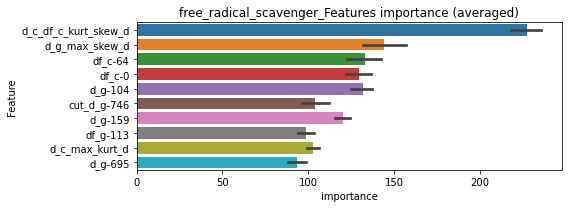

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 free_radical_scavenger=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[969]	training's binary_logloss: 0.000286631	valid_1's binary_logloss: 0.000962952


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 free_radical_scavenger=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000281738	valid_1's binary_logloss: 0.000875595
Early stopping, best iteration is:
[987]	training's binary_logloss: 0.000281884	valid_1's binary_logloss: 0.000875256


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 free_radical_scavenger=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00028748	valid_1's binary_logloss: 0.000578371
Early stopping, best iteration is:
[1019]	training's binary_logloss: 0.000286901	valid_1's binary_logloss: 0.000577907


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 free_radical_scavenger=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[844]	training's binary_logloss: 0.000296578	valid_1's binary_logloss: 0.00199763


free_radical_scavenger logloss: 0.0011035484071489463
fungal_squalene_epoxidase_inhibitor, len(trt): 23, len(othr): 3286
target_rate: 0.0009658 → Adj_target_rate: 0.0012069


selected negative label: 3286


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[576]	training's binary_logloss: 0.000359605	valid_1's binary_logloss: 0.00164075
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[559]	training's binary_logloss: 0.000353911	valid_1's binary_logloss: 0.00765852
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[597]	training's binary_logloss: 0.000358491	valid_1's binary_logloss: 0.000911545
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0020170, Threshold: 0.0061619, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00097


Early stopping, best iteration is:
[579]	training's binary_logloss: 0.000358025	valid_1's binary_logloss: 0.0022724


Num_p_label: 40.0, Expected: 3.8, Threshold: 0.0061619, conf_0:0.00431, conf_1:0.00801
Num_p_label: 4.0, Expected: 3.8, Adj_threshold_1: 0.0361619
threshold: 0.0361619, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000350218	valid_1's binary_logloss: 0.00118761
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[581]	training's binary_logloss: 0.000340041	valid_1's binary_logloss: 0.0066526
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[627]	training's binary_logloss: 0.000346898	valid_1's binary_logloss: 0.000762453
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0280757, Threshold: 0.0361619, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0042692 Vs.target_rate: 0.00097
Num_p_label: 17.0, Expected: 3.8, Threshold: 0.0361619, conf_0:0.02893, conf_1:0.04339
Num_p_label: 7.0, Expected: 3.8, Adj_threshold_1: 0.0661619


Early stopping, best iteration is:
[565]	training's binary_logloss: 0.000354355	valid_1's binary_logloss: 0.00248592


threshold: 0.0661619, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000350218	valid_1's binary_logloss: 0.00118761
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[581]	training's binary_logloss: 0.000340041	valid_1's binary_logloss: 0.0066526
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[628]	training's binary_logloss: 0.000346898	valid_1's binary_logloss: 0.000762453
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0280757, Threshold: 0.0661619, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0017579 Vs.target_rate: 0.00097
Num_p_label: 7.0, Expected: 3.8, Threshold: 0.0661619, conf_0:0.05955, conf_1:0.07278


Early stopping, best iteration is:
[564]	training's binary_logloss: 0.000354355	valid_1's binary_logloss: 0.00248592


threshold: 0.0661619, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


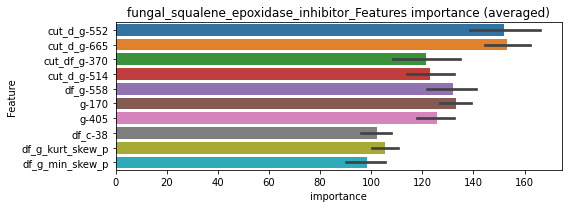

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 fungal_squalene_epoxidase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[840]	training's binary_logloss: 0.000356703	valid_1's binary_logloss: 0.00129435


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 fungal_squalene_epoxidase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[837]	training's binary_logloss: 0.00034802	valid_1's binary_logloss: 0.00598652


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 fungal_squalene_epoxidase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[805]	training's binary_logloss: 0.000361902	valid_1's binary_logloss: 0.000749573


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 fungal_squalene_epoxidase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[798]	training's binary_logloss: 0.000357375	valid_1's binary_logloss: 0.00184762


fungal_squalene_epoxidase_inhibitor logloss: 0.002471054450642682
gaba_receptor_agonist, len(trt): 106, len(othr): 3267
target_rate: 0.0044512 → Adj_target_rate: 0.0044229


selected negative label: 3267


unpredictable_cols:gaba_receptor_agonist → create_features


N_features:358
================= Pseudo labeling 1 / 3 =================



Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0327209	valid_1's binary_logloss: 0.104223
[2000]	training's binary_logloss: 0.0159475	valid_1's binary_logloss: 0.0898635
[3000]	training's binary_logloss: 0.0104942	valid_1's binary_logloss: 0.0849039
Early stopping, best iteration is:
[3043]	training's binary_logloss: 0.0103424	valid_1's binary_logloss: 0.084759
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0336365	valid_1's binary_logloss: 0.0906677
[2000]	training's binary_logloss: 0.0163882	valid_1's binary_logloss: 0.0739792
[3000]	training's binary_logloss: 0.0107711	valid_1's binary_logloss: 0.0680359
Early stopping, best iteration is:
[3328]	training's binary_logloss: 0.00968167	valid_1's binary_logloss: 0.0668162
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0334801	valid_1's binary_logloss: 0.093612
[2000]	training's binary_log

1 / 3, AUC score:0.994, PR-AUC:0.987
y_Threshold: 0.0453958, Threshold: 0.1795306, pos_neg_ratio: 0.8000000
Remove_noisy_data: 155 → Positive_corect_labels: 641/3765
p_label_rate: 0.0100452 Vs.target_rate: 0.00445
Num_p_label: 40.0, Expected: 17.7, Threshold: 0.1795306, conf_0:0.12567, conf_1:0.23339
Num_p_label: 28.0, Expected: 17.7, Adj_threshold_1: 0.2095306
Num_p_label: 21.0, Expected: 17.7, Adj_threshold_2: 0.2395306
threshold: 0.2395306, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 641.0/3765, y_label_rate: 0.1702523
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0308402	valid_1's binary_logloss: 0.085391
[2000]	training's binary_logloss: 0.0150529	valid_1's binary_logloss: 0.0696037
[3000]	training's binary_logloss: 0.00991778	valid_1's binary_logloss: 0.0638347
[4000]	training's binary_logloss: 0.00740345	valid_1's binary_logloss: 0.0608323
Early stopping, best iteration is:
[4504]	training's binary_logloss: 0.0065743	valid_1's binary_logloss: 0.0597552
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0314729	valid_1's binary_logloss: 0.0830773
[2000]	training's binary_logloss: 0.0153776	valid_1's binary_logloss: 0.0663506
[3000]	training's binary_logloss: 0.0101244	valid_1's binary_logloss: 0.0602703
Early stopping, best iteration is:
[3606]	training's binary_logloss: 0.00839247	valid_1's binary_logloss: 0.0582142
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_

2 / 3, AUC score:0.998, PR-AUC:0.996
y_Threshold: 0.0812968, Threshold: 0.2395306, pos_neg_ratio: 0.8000000
Remove_noisy_data: 26 → Positive_corect_labels: 628.0/3739
p_label_rate: 0.0168257 Vs.target_rate: 0.00445
Num_p_label: 67.0, Expected: 17.7, Threshold: 0.2395306, conf_0:0.19162, conf_1:0.28744
Num_p_label: 58.0, Expected: 17.7, Adj_threshold_1: 0.2695306
Num_p_label: 50.0, Expected: 17.7, Adj_threshold_2: 0.2995306
Num_p_label: 38.0, Expected: 17.7, Adj_threshold_3: 0.3295306
Num_p_label: 34.0, Expected: 17.7, Adj_threshold_4: 0.3595306
Num_p_label: 29.0, Expected: 17.7, Adj_threshold_5: 0.3895306
Num_p_label: 22.0, Expected: 17.7, Adj_threshold_6: 0.4195306
threshold: 0.4195306, positive_p_label: 22.0/3982, p_label_rate: 0.0055249
positive_y_label: 628.0/3739, y_label_rate: 0.1679593
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0290322	valid_1's binary_logloss: 0.0835666
[2000]	training's binary_logloss: 0.014201	valid_1's binary_logloss: 0.0672071
[3000]	training's binary_logloss: 0.00938897	valid_1's binary_logloss: 0.0617105
[4000]	training's binary_logloss: 0.00701919	valid_1's binary_logloss: 0.0585945
Early stopping, best iteration is:
[4549]	training's binary_logloss: 0.00617752	valid_1's binary_logloss: 0.057479
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0295531	valid_1's binary_logloss: 0.0769718
[2000]	training's binary_logloss: 0.0144554	valid_1's binary_logloss: 0.0614524
Early stopping, best iteration is:
[2559]	training's binary_logloss: 0.0112222	valid_1's binary_logloss: 0.0578059
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0302911	valid_1's binary_logloss: 0.0615634
[2000]	training's binary_l

3 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0900599, Threshold: 0.4195306, pos_neg_ratio: 0.8000000
Remove_noisy_data: 16 → Positive_corect_labels: 620.0/3723
p_label_rate: 0.0080362 Vs.target_rate: 0.00445
Num_p_label: 32.0, Expected: 17.7, Threshold: 0.4195306, conf_0:0.37758, conf_1:0.46148
Num_p_label: 27.0, Expected: 17.7, Adj_threshold_1: 0.4495306
Num_p_label: 22.0, Expected: 17.7, Adj_threshold_2: 0.4795306
threshold: 0.4795306, positive_p_label: 22.0/3982, p_label_rate: 0.0055249
positive_y_label: 620.0/3723, y_label_rate: 0.1665324


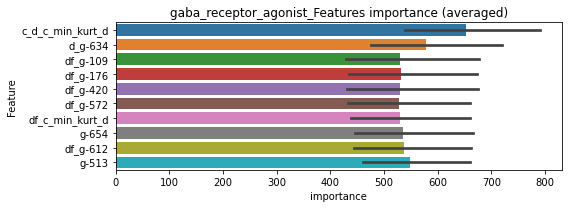

len(train_index) : 2792
len(valid_index) : 931
================================= fold 1/4 gaba_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0285832	valid_1's binary_logloss: 0.0766678
[2000]	training's binary_logloss: 0.0139064	valid_1's binary_logloss: 0.0615979
[3000]	training's binary_logloss: 0.00917598	valid_1's binary_logloss: 0.0562293
Early stopping, best iteration is:
[3890]	training's binary_logloss: 0.00705207	valid_1's binary_logloss: 0.053592


len(train_index) : 2792
len(valid_index) : 931
================================= fold 2/4 gaba_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0290085	valid_1's binary_logloss: 0.0748275
[2000]	training's binary_logloss: 0.0142094	valid_1's binary_logloss: 0.0580066
[3000]	training's binary_logloss: 0.00935743	valid_1's binary_logloss: 0.0521908
[4000]	training's binary_logloss: 0.00701567	valid_1's binary_logloss: 0.0490351
[5000]	training's binary_logloss: 0.00561275	valid_1's binary_logloss: 0.0469676
Early stopping, best iteration is:
[5000]	training's binary_logloss: 0.00561275	valid_1's binary_logloss: 0.0469676


len(train_index) : 2792
len(valid_index) : 931
================================= fold 3/4 gaba_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0289851	valid_1's binary_logloss: 0.0684707
[2000]	training's binary_logloss: 0.0141901	valid_1's binary_logloss: 0.0516894
[3000]	training's binary_logloss: 0.00937229	valid_1's binary_logloss: 0.0453309
[4000]	training's binary_logloss: 0.00701761	valid_1's binary_logloss: 0.0420121
[5000]	training's binary_logloss: 0.00562401	valid_1's binary_logloss: 0.0399431
Early stopping, best iteration is:
[5753]	training's binary_logloss: 0.00490072	valid_1's binary_logloss: 0.0387565


len(train_index) : 2793
len(valid_index) : 930
================================= fold 4/4 gaba_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0284161	valid_1's binary_logloss: 0.074208
[2000]	training's binary_logloss: 0.0138648	valid_1's binary_logloss: 0.0573904
[3000]	training's binary_logloss: 0.00915689	valid_1's binary_logloss: 0.051314
Early stopping, best iteration is:
[3332]	training's binary_logloss: 0.00823276	valid_1's binary_logloss: 0.0499401


gaba_receptor_agonist logloss: 0.04731332164654878
gaba_receptor_agonist is unpredictable(><)!


mutually exclusive columns: gaba_receptor_antagonist


gaba_receptor_antagonist, len(trt): 165, len(othr): 4991
target_rate: 0.0069287 → Adj_target_rate: 0.0064426


selected negative label: 4991


unpredictable_cols:gaba_receptor_antagonist → create_features


N_features:358
================= Pseudo labeling 1 / 3 =================



Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0354134	valid_1's binary_logloss: 0.0966021
[2000]	training's binary_logloss: 0.0175232	valid_1's binary_logloss: 0.0850445
Early stopping, best iteration is:
[2650]	training's binary_logloss: 0.01325	valid_1's binary_logloss: 0.0821896
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0355814	valid_1's binary_logloss: 0.0974868
[2000]	training's binary_logloss: 0.0176219	valid_1's binary_logloss: 0.0845182
Early stopping, best iteration is:
[2675]	training's binary_logloss: 0.0132067	valid_1's binary_logloss: 0.0813242
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0339594	valid_1's binary_logloss: 0.112804
[2000]	training's binary_logloss: 0.0165541	valid_1's binary_logloss: 0.102787
Early stopping, best iteration is:
[2078]	training's binary_logloss: 0.015921	valid_1's binary_logloss: 0.1022

1 / 3, AUC score:0.989, PR-AUC:0.973
y_Threshold: 0.0491455, Threshold: 0.0976997, pos_neg_ratio: 0.8000000
Remove_noisy_data: 296 → Positive_corect_labels: 950/5693
p_label_rate: 0.0100452 Vs.target_rate: 0.00693
Num_p_label: 40.0, Expected: 27.6, Threshold: 0.0976997, conf_0:0.06839, conf_1:0.12701
threshold: 0.0976997, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 950.0/5693, y_label_rate: 0.1668716
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0282855	valid_1's binary_logloss: 0.0756774
[2000]	training's binary_logloss: 0.0136417	valid_1's binary_logloss: 0.062553
[3000]	training's binary_logloss: 0.00892699	valid_1's binary_logloss: 0.0581742
Early stopping, best iteration is:
[3447]	training's binary_logloss: 0.00773003	valid_1's binary_logloss: 0.0570692
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0278965	valid_1's binary_logloss: 0.0801423
[2000]	training's binary_logloss: 0.0134206	valid_1's binary_logloss: 0.0689401
Early stopping, best iteration is:
[2567]	training's binary_logloss: 0.010331	valid_1's binary_logloss: 0.0664466
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0279777	valid_1's binary_logloss: 0.0826748
[2000]	training's binary_logloss: 0.0134553	valid_1's binary_logloss: 0.0706572
Early stopping, best iterat

2 / 3, AUC score:0.998, PR-AUC:0.993
y_Threshold: 0.0682664, Threshold: 0.0976997, pos_neg_ratio: 0.8000000
Remove_noisy_data: 70 → Positive_corect_labels: 915.0/5623
p_label_rate: 0.0173280 Vs.target_rate: 0.00693
Num_p_label: 69.0, Expected: 27.6, Threshold: 0.0976997, conf_0:0.07816, conf_1:0.11724
Num_p_label: 32.0, Expected: 27.6, Adj_threshold_1: 0.1276997
threshold: 0.1276997, positive_p_label: 32.0/3982, p_label_rate: 0.0080362
positive_y_label: 915.0/5623, y_label_rate: 0.1627245
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0249913	valid_1's binary_logloss: 0.0597192
[2000]	training's binary_logloss: 0.0121015	valid_1's binary_logloss: 0.0482641
[3000]	training's binary_logloss: 0.00793707	valid_1's binary_logloss: 0.0444189
[4000]	training's binary_logloss: 0.0059227	valid_1's binary_logloss: 0.0427305
Early stopping, best iteration is:
[3975]	training's binary_logloss: 0.00595978	valid_1's binary_logloss: 0.0427071
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0243632	valid_1's binary_logloss: 0.0656451
[2000]	training's binary_logloss: 0.011809	valid_1's binary_logloss: 0.0536094
[3000]	training's binary_logloss: 0.0077721	valid_1's binary_logloss: 0.0494139
Early stopping, best iteration is:
[3613]	training's binary_logloss: 0.00643201	valid_1's binary_logloss: 0.0479202
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_

3 / 3, AUC score:1.000, PR-AUC:0.998
y_Threshold: 0.0640252, Threshold: 0.1276997, pos_neg_ratio: 0.8000000
Remove_noisy_data: 30 → Positive_corect_labels: 900.0/5593
p_label_rate: 0.0082873 Vs.target_rate: 0.00693
Num_p_label: 33.0, Expected: 27.6, Threshold: 0.1276997, conf_0:0.11493, conf_1:0.14047
threshold: 0.1276997, positive_p_label: 33.0/3982, p_label_rate: 0.0082873
positive_y_label: 900.0/5593, y_label_rate: 0.1609154


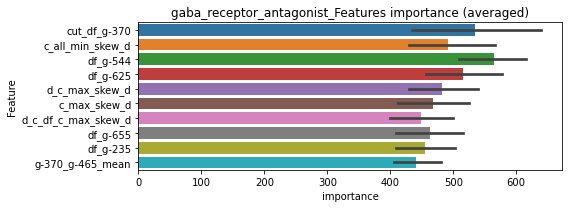

len(train_index) : 4194
len(valid_index) : 1399
================================= fold 1/4 gaba_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0231393	valid_1's binary_logloss: 0.0590774
[2000]	training's binary_logloss: 0.0112099	valid_1's binary_logloss: 0.0477069
[3000]	training's binary_logloss: 0.00738592	valid_1's binary_logloss: 0.0437097
[4000]	training's binary_logloss: 0.00551915	valid_1's binary_logloss: 0.0415395
Early stopping, best iteration is:
[4548]	training's binary_logloss: 0.00485984	valid_1's binary_logloss: 0.04081


len(train_index) : 4195
len(valid_index) : 1398
================================= fold 2/4 gaba_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0232101	valid_1's binary_logloss: 0.0612859
[2000]	training's binary_logloss: 0.0112788	valid_1's binary_logloss: 0.0493719
[3000]	training's binary_logloss: 0.00742317	valid_1's binary_logloss: 0.0452303
Early stopping, best iteration is:
[3654]	training's binary_logloss: 0.00606903	valid_1's binary_logloss: 0.0437892


len(train_index) : 4195
len(valid_index) : 1398
================================= fold 3/4 gaba_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0236233	valid_1's binary_logloss: 0.0575431
[2000]	training's binary_logloss: 0.0114375	valid_1's binary_logloss: 0.0463356
[3000]	training's binary_logloss: 0.0075042	valid_1's binary_logloss: 0.0426638
[4000]	training's binary_logloss: 0.00559966	valid_1's binary_logloss: 0.0407484
Early stopping, best iteration is:
[4439]	training's binary_logloss: 0.00504168	valid_1's binary_logloss: 0.0402834


len(train_index) : 4195
len(valid_index) : 1398
================================= fold 4/4 gaba_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0237736	valid_1's binary_logloss: 0.0524267
[2000]	training's binary_logloss: 0.0115444	valid_1's binary_logloss: 0.0394867
[3000]	training's binary_logloss: 0.00760794	valid_1's binary_logloss: 0.0346881
[4000]	training's binary_logloss: 0.00568663	valid_1's binary_logloss: 0.0320558
[5000]	training's binary_logloss: 0.00455945	valid_1's binary_logloss: 0.0304848
[6000]	training's binary_logloss: 0.00381343	valid_1's binary_logloss: 0.0293339
Early stopping, best iteration is:
[6246]	training's binary_logloss: 0.00366696	valid_1's binary_logloss: 0.0290971


gaba_receptor_antagonist logloss: 0.0384953596973119
gaba_receptor_antagonist is unpredictable(><)!
gamma_secretase_inhibitor, len(trt): 56, len(othr): 3280
target_rate: 0.0023516 → Adj_target_rate: 0.0025713


selected negative label: 3280


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[415]	training's binary_logloss: 0.00130156	valid_1's binary_logloss: 0.0309586
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[702]	training's binary_logloss: 0.000529902	valid_1's binary_logloss: 0.0124411
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[743]	training's binary_logloss: 0.000531062	valid_1's binary_logloss: 0.00561892
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[561]	training's binary_logloss: 0.000731925	valid_1's binary_logloss: 0.0190476


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0054571, Threshold: 0.0187931, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3804
p_label_rate: 0.0100452 Vs.target_rate: 0.00235
Num_p_label: 40.0, Expected: 9.4, Threshold: 0.0187931, conf_0:0.01316, conf_1:0.02443
Num_p_label: 5.0, Expected: 9.4, Adj_threshold_1: 0.0487931
threshold: 0.0487931, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 656.0/3804, y_label_rate: 0.1724501
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[406]	training's binary_logloss: 0.00131962	valid_1's binary_logloss: 0.0303931
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[738]	training's binary_logloss: 0.000503631	valid_1's binary_logloss: 0.0111637
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[724]	training's binary_logloss: 0.000525649	valid_1's binary_logloss: 0.00500632
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[608]	training's binary_logloss: 0.000611041	valid_1's binary_logloss: 0.0183984


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0332290, Threshold: 0.0487931, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 654.0/3800
p_label_rate: 0.0065294 Vs.target_rate: 0.00235
Num_p_label: 26.0, Expected: 9.4, Threshold: 0.0487931, conf_0:0.03903, conf_1:0.05855
Num_p_label: 15.0, Expected: 9.4, Adj_threshold_1: 0.0787931
threshold: 0.0787931, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 654.0/3800, y_label_rate: 0.1721053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[627]	training's binary_logloss: 0.000571714	valid_1's binary_logloss: 0.0158084
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[612]	training's binary_logloss: 0.000597587	valid_1's binary_logloss: 0.00975078
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[721]	training's binary_logloss: 0.000514481	valid_1's binary_logloss: 0.00684353
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[678]	training's binary_logloss: 0.00053367	valid_1's binary_logloss: 0.0207239


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0229428, Threshold: 0.0787931, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 653.0/3798
p_label_rate: 0.0025113 Vs.target_rate: 0.00235
Num_p_label: 10.0, Expected: 9.4, Threshold: 0.0787931, conf_0:0.07091, conf_1:0.08667
threshold: 0.0787931, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 653.0/3798, y_label_rate: 0.1719326


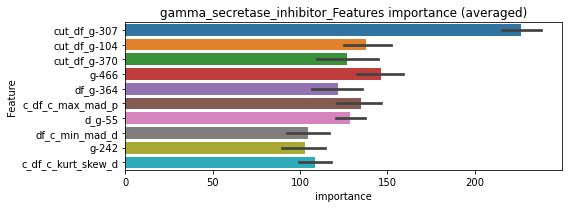

len(train_index) : 2848
len(valid_index) : 950
================================= fold 1/4 gamma_secretase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[766]	training's binary_logloss: 0.000566276	valid_1's binary_logloss: 0.0203511


len(train_index) : 2848
len(valid_index) : 950
================================= fold 2/4 gamma_secretase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2849
len(valid_index) : 949
================================= fold 3/4 gamma_secretase_inhibitor=================================


Early stopping, best iteration is:
[478]	training's binary_logloss: 0.000869366	valid_1's binary_logloss: 0.0193442
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[900]	training's binary_logloss: 0.000525306	valid_1's binary_logloss: 0.0135149


len(train_index) : 2849
len(valid_index) : 949
================================= fold 4/4 gamma_secretase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[593]	training's binary_logloss: 0.000723148	valid_1's binary_logloss: 0.0116636


gamma_secretase_inhibitor logloss: 0.016220351373522564


mutually exclusive columns: glucocorticoid_receptor_agonist


glucocorticoid_receptor_agonist, len(trt): 266, len(othr): 7168
target_rate: 0.0111699 → Adj_target_rate: 0.0096682


selected negative label: 7168


unpredictable_cols:glucocorticoid_receptor_agonist → create_features


N_features:358
================= Pseudo labeling 1 / 3 =================



Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0420688	valid_1's binary_logloss: 0.128992
[2000]	training's binary_logloss: 0.0196519	valid_1's binary_logloss: 0.109161
Early stopping, best iteration is:
[2357]	training's binary_logloss: 0.0164091	valid_1's binary_logloss: 0.106271
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0426545	valid_1's binary_logloss: 0.123308
[2000]	training's binary_logloss: 0.0198982	valid_1's binary_logloss: 0.10187
[3000]	training's binary_logloss: 0.0127731	valid_1's binary_logloss: 0.0946406
Early stopping, best iteration is:
[3633]	training's binary_logloss: 0.0104017	valid_1's binary_logloss: 0.0922049
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0432063	valid_1's binary_logloss: 0.113879
[2000]	training's binary_logloss: 0.0201497	valid_1's binary_logloss: 0.0913251
[3000]	training's binary_logloss:

1 / 3, AUC score:0.984, PR-AUC:0.970
y_Threshold: 0.0600483, Threshold: 0.1387068, pos_neg_ratio: 0.8000000
Remove_noisy_data: 434 → Positive_corect_labels: 1360/8167
p_label_rate: 0.0100452 Vs.target_rate: 0.01117
Num_p_label: 40.0, Expected: 44.5, Threshold: 0.1387068, conf_0:0.09709, conf_1:0.18032
threshold: 0.1387068, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1360.0/8167, y_label_rate: 0.1665238
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0359662	valid_1's binary_logloss: 0.0970734
[2000]	training's binary_logloss: 0.0168943	valid_1's binary_logloss: 0.074271
[3000]	training's binary_logloss: 0.0108885	valid_1's binary_logloss: 0.0665479
[4000]	training's binary_logloss: 0.00804147	valid_1's binary_logloss: 0.0624416
Early stopping, best iteration is:
[4335]	training's binary_logloss: 0.00739285	valid_1's binary_logloss: 0.0613366
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0351928	valid_1's binary_logloss: 0.0998469
[2000]	training's binary_logloss: 0.0165977	valid_1's binary_logloss: 0.0791978
[3000]	training's binary_logloss: 0.0107205	valid_1's binary_logloss: 0.0720197
Early stopping, best iteration is:
[3849]	training's binary_logloss: 0.0082347	valid_1's binary_logloss: 0.0686505
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_l

2 / 3, AUC score:0.997, PR-AUC:0.993
y_Threshold: 0.0983925, Threshold: 0.1387068, pos_neg_ratio: 0.8000000
Remove_noisy_data: 84 → Positive_corect_labels: 1318.0/8083
p_label_rate: 0.0175791 Vs.target_rate: 0.01117
Num_p_label: 70.0, Expected: 44.5, Threshold: 0.1387068, conf_0:0.11097, conf_1:0.16645
Num_p_label: 46.0, Expected: 44.5, Adj_threshold_1: 0.1687068
threshold: 0.1687068, positive_p_label: 46.0/3982, p_label_rate: 0.0115520
positive_y_label: 1318.0/8083, y_label_rate: 0.1630583
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0334806	valid_1's binary_logloss: 0.0909261
[2000]	training's binary_logloss: 0.0157524	valid_1's binary_logloss: 0.0709843
[3000]	training's binary_logloss: 0.0101977	valid_1's binary_logloss: 0.0636059
Early stopping, best iteration is:
[3435]	training's binary_logloss: 0.00883324	valid_1's binary_logloss: 0.0617096
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0331654	valid_1's binary_logloss: 0.096733
[2000]	training's binary_logloss: 0.0156654	valid_1's binary_logloss: 0.0773935
[3000]	training's binary_logloss: 0.0101531	valid_1's binary_logloss: 0.0706798
Early stopping, best iteration is:
[3065]	training's binary_logloss: 0.00992928	valid_1's binary_logloss: 0.0703809
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0327369	valid_1's binary_logloss: 0.10053
[2000]	training's binary_log

3 / 3, AUC score:0.995, PR-AUC:0.990
y_Threshold: 0.1003455, Threshold: 0.1687068, pos_neg_ratio: 0.8000000
Remove_noisy_data: 78 → Positive_corect_labels: 1279.0/8005
p_label_rate: 0.0140633 Vs.target_rate: 0.01117
Num_p_label: 56.0, Expected: 44.5, Threshold: 0.1687068, conf_0:0.15184, conf_1:0.18558
threshold: 0.1687068, positive_p_label: 56.0/3982, p_label_rate: 0.0140633
positive_y_label: 1279.0/8005, y_label_rate: 0.1597751


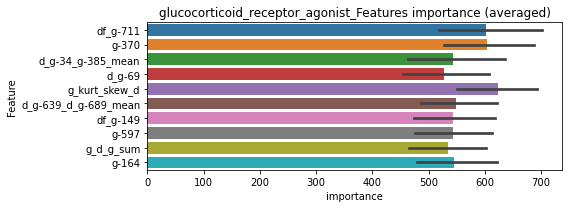

len(train_index) : 6003
len(valid_index) : 2002
================================= fold 1/4 glucocorticoid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0313403	valid_1's binary_logloss: 0.0853193
[2000]	training's binary_logloss: 0.0148058	valid_1's binary_logloss: 0.0644317
[3000]	training's binary_logloss: 0.00959081	valid_1's binary_logloss: 0.0567907
[4000]	training's binary_logloss: 0.00711383	valid_1's binary_logloss: 0.0529975
[5000]	training's binary_logloss: 0.00565518	valid_1's binary_logloss: 0.0505729
Early stopping, best iteration is:
[5373]	training's binary_logloss: 0.00525431	valid_1's binary_logloss: 0.0497984


len(train_index) : 6004
len(valid_index) : 2001
================================= fold 2/4 glucocorticoid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0317523	valid_1's binary_logloss: 0.0795228
[2000]	training's binary_logloss: 0.0149685	valid_1's binary_logloss: 0.0586327
[3000]	training's binary_logloss: 0.00972911	valid_1's binary_logloss: 0.051055
Early stopping, best iteration is:
[3911]	training's binary_logloss: 0.00738561	valid_1's binary_logloss: 0.0472292


len(train_index) : 6004
len(valid_index) : 2001
================================= fold 3/4 glucocorticoid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0322679	valid_1's binary_logloss: 0.0721294
[2000]	training's binary_logloss: 0.0151884	valid_1's binary_logloss: 0.0504254
[3000]	training's binary_logloss: 0.00984717	valid_1's binary_logloss: 0.042892
[4000]	training's binary_logloss: 0.00729077	valid_1's binary_logloss: 0.0387093
[5000]	training's binary_logloss: 0.00579968	valid_1's binary_logloss: 0.0361254
[6000]	training's binary_logloss: 0.00482329	valid_1's binary_logloss: 0.0344729
[7000]	training's binary_logloss: 0.00414355	valid_1's binary_logloss: 0.0331914
Early stopping, best iteration is:
[7004]	training's binary_logloss: 0.00414102	valid_1's binary_logloss: 0.0331761


len(train_index) : 6004
len(valid_index) : 2001
================================= fold 4/4 glucocorticoid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0312651	valid_1's binary_logloss: 0.0888095
[2000]	training's binary_logloss: 0.0147715	valid_1's binary_logloss: 0.0692038
[3000]	training's binary_logloss: 0.00959148	valid_1's binary_logloss: 0.0622566
[4000]	training's binary_logloss: 0.00709281	valid_1's binary_logloss: 0.0585438
Early stopping, best iteration is:
[4267]	training's binary_logloss: 0.00663004	valid_1's binary_logloss: 0.0576229


glucocorticoid_receptor_agonist logloss: 0.04695701361684919
glucocorticoid_receptor_agonist is unpredictable(><)!
glutamate_inhibitor, len(trt): 13, len(othr): 3289
target_rate: 0.0005459 → Adj_target_rate: 0.0007431


selected negative label: 3289


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[545]	training's binary_logloss: 0.000247886	valid_1's binary_logloss: 0.00149474
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[516]	training's binary_logloss: 0.000251275	valid_1's binary_logloss: 0.000674497
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[548]	training's binary_logloss: 0.000251045	valid_1's binary_logloss: 0.000566478
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0010609, Threshold: 0.0028324, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00055
Num_p_label: 40.0, Expected: 2.2, Threshold: 0.0028324, conf_0:0.00198, conf_1:0.00368
Num_p_label: 3.0, Expected: 2.2, Adj_threshold_1: 0.0328324
threshold: 0.0328324, positive_p_label: 3.0/3982, p_label_rate: 0.0007534


Early stopping, best iteration is:
[514]	training's binary_logloss: 0.000249964	valid_1's binary_logloss: 0.000772163


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[514]	training's binary_logloss: 0.000245994	valid_1's binary_logloss: 0.00143492
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[512]	training's binary_logloss: 0.000247647	valid_1's binary_logloss: 0.00061231
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[496]	training's binary_logloss: 0.000252347	valid_1's binary_logloss: 0.000335154
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0811574, Threshold: 0.0328324, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0022602 Vs.target_rate: 0.00055
Num_p_label: 9.0, Expected: 2.2, Threshold: 0.0328324, conf_0:0.02627, conf_1:0.03940
Num_p_label: 6.0, Expected: 2.2, Adj_threshold_1: 0.0628324
Num_p_label: 5.0, Expected: 2.2, Adj_threshold_2: 0.0928324


Early stopping, best iteration is:
[519]	training's binary_logloss: 0.000245157	valid_1's binary_logloss: 0.000541655


threshold: 0.0928324, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[514]	training's binary_logloss: 0.000245994	valid_1's binary_logloss: 0.00143492
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[512]	training's binary_logloss: 0.000247647	valid_1's binary_logloss: 0.00061231
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[496]	training's binary_logloss: 0.000252347	valid_1's binary_logloss: 0.000335154
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0811574, Threshold: 0.0928324, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0012557 Vs.target_rate: 0.00055
Num_p_label: 5.0, Expected: 2.2, Threshold: 0.0928324, conf_0:0.08355, conf_1:0.10212


Early stopping, best iteration is:
[519]	training's binary_logloss: 0.000245157	valid_1's binary_logloss: 0.000541655


threshold: 0.0928324, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


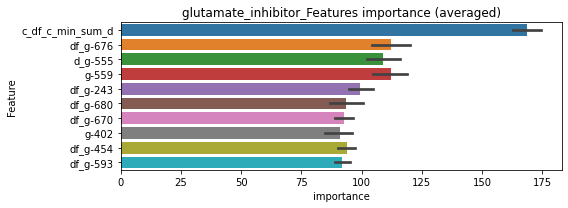

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 glutamate_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 glutamate_inhibitor=================================


Early stopping, best iteration is:
[869]	training's binary_logloss: 0.000247107	valid_1's binary_logloss: 0.00107576
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[959]	training's binary_logloss: 0.000245996	valid_1's binary_logloss: 0.000512965


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 glutamate_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 glutamate_inhibitor=================================


Early stopping, best iteration is:
[851]	training's binary_logloss: 0.000248504	valid_1's binary_logloss: 0.000344903
Training until validation scores don't improve for 30 rounds


glutamate_inhibitor logloss: 0.0006228153544710913


Early stopping, best iteration is:
[820]	training's binary_logloss: 0.000250408	valid_1's binary_logloss: 0.00055707


glutamate_receptor_agonist, len(trt): 74, len(othr): 3274
target_rate: 0.0031074 → Adj_target_rate: 0.0032587


selected negative label: 3274


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[752]	training's binary_logloss: 0.000611749	valid_1's binary_logloss: 0.0317819
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[632]	training's binary_logloss: 0.000783709	valid_1's binary_logloss: 0.0252302
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[741]	training's binary_logloss: 0.000651977	valid_1's binary_logloss: 0.0248741
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[783]	training's binary_logloss: 0.000602431	valid_1's binary_logloss: 0.0222732


1 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0063573, Threshold: 0.2185190, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 654/3796
p_label_rate: 0.0100452 Vs.target_rate: 0.00311
Num_p_label: 40.0, Expected: 12.4, Threshold: 0.2185190, conf_0:0.15296, conf_1:0.28407
Num_p_label: 37.0, Expected: 12.4, Adj_threshold_1: 0.2485190
Num_p_label: 34.0, Expected: 12.4, Adj_threshold_2: 0.2785190
Num_p_label: 31.0, Expected: 12.4, Adj_threshold_3: 0.3085190
Num_p_label: 30.0, Expected: 12.4, Adj_threshold_4: 0.3385190
Num_p_label: 27.0, Expected: 12.4, Adj_threshold_5: 0.3685190
Num_p_label: 26.0, Expected: 12.4, Adj_threshold_6: 0.3985190
Num_p_label: 24.0, Expected: 12.4, Adj_threshold_7: 0.4285190
Num_p_label: 23.0, Expected: 12.4, Adj_threshold_8: 0.4585190
Num_p_label: 22.0, Expected: 12.4, Adj_threshold_9: 0.4885190
Num_p_label: 21.0, Expected: 12.4, Adj_threshold_10: 0.5185190
threshold: 0.5185190, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
po

Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[680]	training's binary_logloss: 0.000653224	valid_1's binary_logloss: 0.0250112
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[740]	training's binary_logloss: 0.000607714	valid_1's binary_logloss: 0.0254985
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[625]	training's binary_logloss: 0.000761786	valid_1's binary_logloss: 0.0267493
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[772]	training's binary_logloss: 0.000586588	valid_1's binary_logloss: 0.0216205


2 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0341378, Threshold: 0.5185190, pos_neg_ratio: 0.8000000
Remove_noisy_data: 12 → Positive_corect_labels: 648.0/3784
p_label_rate: 0.0145655 Vs.target_rate: 0.00311
Num_p_label: 58.0, Expected: 12.4, Threshold: 0.5185190, conf_0:0.41482, conf_1:0.62222
Num_p_label: 55.0, Expected: 12.4, Adj_threshold_1: 0.5485190
Num_p_label: 52.0, Expected: 12.4, Adj_threshold_2: 0.5785190
Num_p_label: 50.0, Expected: 12.4, Adj_threshold_3: 0.6085190
Num_p_label: 46.0, Expected: 12.4, Adj_threshold_4: 0.6385190
Num_p_label: 45.0, Expected: 12.4, Adj_threshold_5: 0.6685190
Num_p_label: 37.0, Expected: 12.4, Adj_threshold_6: 0.6985190
Num_p_label: 33.0, Expected: 12.4, Adj_threshold_7: 0.7285190
Num_p_label: 30.0, Expected: 12.4, Adj_threshold_8: 0.7585190
Num_p_label: 25.0, Expected: 12.4, Adj_threshold_9: 0.7885190
Num_p_label: 21.0, Expected: 12.4, Adj_threshold_10: 0.8185190
threshold: 0.8185190, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
p

Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[710]	training's binary_logloss: 0.000606691	valid_1's binary_logloss: 0.0188049
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[711]	training's binary_logloss: 0.000615547	valid_1's binary_logloss: 0.0153796
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[535]	training's binary_logloss: 0.000931646	valid_1's binary_logloss: 0.042286
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[740]	training's binary_logloss: 0.00058145	valid_1's binary_logloss: 0.0247741


3 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0309556, Threshold: 0.8185190, pos_neg_ratio: 0.8000000
Remove_noisy_data: 12 → Positive_corect_labels: 642.0/3772
p_label_rate: 0.0067805 Vs.target_rate: 0.00311
Num_p_label: 27.0, Expected: 12.4, Threshold: 0.8185190, conf_0:0.73667, conf_1:0.90037
Num_p_label: 22.0, Expected: 12.4, Adj_threshold_1: 0.8485190
Num_p_label: 17.0, Expected: 12.4, Adj_threshold_2: 0.8785190
threshold: 0.8785190, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 642.0/3772, y_label_rate: 0.1702015


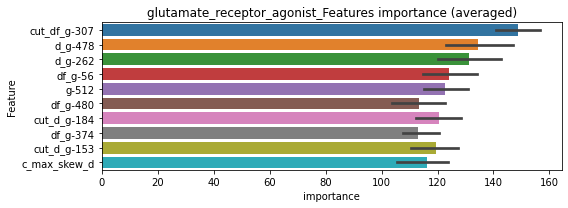

len(train_index) : 2829
len(valid_index) : 943
================================= fold 1/4 glutamate_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[705]	training's binary_logloss: 0.00068322	valid_1's binary_logloss: 0.0200355


len(train_index) : 2829
len(valid_index) : 943
================================= fold 2/4 glutamate_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2829
len(valid_index) : 943
================================= fold 3/4 glutamate_receptor_agonist=================================


Early stopping, best iteration is:
[543]	training's binary_logloss: 0.000876759	valid_1's binary_logloss: 0.0210813
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[614]	training's binary_logloss: 0.00080539	valid_1's binary_logloss: 0.0184765


len(train_index) : 2829
len(valid_index) : 943
================================= fold 4/4 glutamate_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


glutamate_receptor_agonist logloss: 0.019365398367160076


Early stopping, best iteration is:
[547]	training's binary_logloss: 0.000884917	valid_1's binary_logloss: 0.0178682
mutually exclusive columns: glutamate_receptor_antagonist


glutamate_receptor_antagonist, len(trt): 367, len(othr): 7212
target_rate: 0.0154111 → Adj_target_rate: 0.0127105


selected negative label: 7212


unpredictable_cols:glutamate_receptor_antagonist → create_features


N_features:358
================= Pseudo labeling 1 / 3 =================



Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0530606	valid_1's binary_logloss: 0.150355
[2000]	training's binary_logloss: 0.0248122	valid_1's binary_logloss: 0.130404
Early stopping, best iteration is:
[2493]	training's binary_logloss: 0.0194166	valid_1's binary_logloss: 0.126395
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0510239	valid_1's binary_logloss: 0.181484
Early stopping, best iteration is:
[1553]	training's binary_logloss: 0.0317315	valid_1's binary_logloss: 0.171543
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0515644	valid_1's binary_logloss: 0.171017
[2000]	training's binary_logloss: 0.024265	valid_1's binary_logloss: 0.157427
Early stopping, best iteration is:
[2386]	training's binary_logloss: 0.0199763	valid_1's binary_logloss: 0.15531
Training until validation scores don't improve for 30 rounds
[1000]	training's bi

1 / 3, AUC score:0.957, PR-AUC:0.923
y_Threshold: 0.0848479, Threshold: 0.1990476, pos_neg_ratio: 0.8000000
Remove_noisy_data: 623 → Positive_corect_labels: 1275/8031
p_label_rate: 0.0100452 Vs.target_rate: 0.01541
Num_p_label: 40.0, Expected: 61.4, Threshold: 0.1990476, conf_0:0.13933, conf_1:0.25876
threshold: 0.1990476, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1275.0/8031, y_label_rate: 0.1587598
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0365652	valid_1's binary_logloss: 0.119851
Early stopping, best iteration is:
[1936]	training's binary_logloss: 0.0178618	valid_1's binary_logloss: 0.103799
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0380161	valid_1's binary_logloss: 0.0997795
[2000]	training's binary_logloss: 0.0179582	valid_1's binary_logloss: 0.0809266
[3000]	training's binary_logloss: 0.0115789	valid_1's binary_logloss: 0.073832
[4000]	training's binary_logloss: 0.00853431	valid_1's binary_logloss: 0.0704917
Early stopping, best iteration is:
[3982]	training's binary_logloss: 0.00857184	valid_1's binary_logloss: 0.0704182
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0374088	valid_1's binary_logloss: 0.10048
[2000]	training's binary_logloss: 0.017741	valid_1's binary_logloss: 0.0824385
Early stopping, best iteration 

2 / 3, AUC score:0.992, PR-AUC:0.980
y_Threshold: 0.1130239, Threshold: 0.1990476, pos_neg_ratio: 0.8000000
Remove_noisy_data: 168 → Positive_corect_labels: 1191.0/7863
p_label_rate: 0.0158212 Vs.target_rate: 0.01541
Num_p_label: 63.0, Expected: 61.4, Threshold: 0.1990476, conf_0:0.15924, conf_1:0.23886
threshold: 0.1990476, positive_p_label: 63.0/3982, p_label_rate: 0.0158212
positive_y_label: 1191.0/7863, y_label_rate: 0.1514689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0313734	valid_1's binary_logloss: 0.0877785
[2000]	training's binary_logloss: 0.014916	valid_1's binary_logloss: 0.0718399
[3000]	training's binary_logloss: 0.0096845	valid_1's binary_logloss: 0.0664236
Early stopping, best iteration is:
[3062]	training's binary_logloss: 0.00947935	valid_1's binary_logloss: 0.0661723
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0316197	valid_1's binary_logloss: 0.0872139
[2000]	training's binary_logloss: 0.0150373	valid_1's binary_logloss: 0.0708588
Early stopping, best iteration is:
[2810]	training's binary_logloss: 0.010454	valid_1's binary_logloss: 0.0662349
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0310887	valid_1's binary_logloss: 0.0944768
[2000]	training's binary_logloss: 0.0147698	valid_1's binary_logloss: 0.078417
Early stopping, best iteratio

3 / 3, AUC score:0.996, PR-AUC:0.990
y_Threshold: 0.1096462, Threshold: 0.1990476, pos_neg_ratio: 0.8000000
Remove_noisy_data: 92 → Positive_corect_labels: 1145.0/7771
p_label_rate: 0.0180814 Vs.target_rate: 0.01541
Num_p_label: 72.0, Expected: 61.4, Threshold: 0.1990476, conf_0:0.17914, conf_1:0.21895
threshold: 0.1990476, positive_p_label: 72.0/3982, p_label_rate: 0.0180814
positive_y_label: 1145.0/7771, y_label_rate: 0.1473427


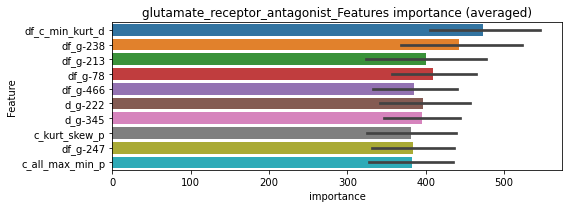

len(train_index) : 5828
len(valid_index) : 1943
================================= fold 1/4 glutamate_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0285125	valid_1's binary_logloss: 0.0742011
[2000]	training's binary_logloss: 0.013552	valid_1's binary_logloss: 0.0585467
[3000]	training's binary_logloss: 0.00884406	valid_1's binary_logloss: 0.0528183
[4000]	training's binary_logloss: 0.00656185	valid_1's binary_logloss: 0.0498597
Early stopping, best iteration is:
[4925]	training's binary_logloss: 0.00531426	valid_1's binary_logloss: 0.0479731


len(train_index) : 5828
len(valid_index) : 1943
================================= fold 2/4 glutamate_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0281588	valid_1's binary_logloss: 0.0900426
[2000]	training's binary_logloss: 0.0133533	valid_1's binary_logloss: 0.0741412
Early stopping, best iteration is:
[2396]	training's binary_logloss: 0.0110081	valid_1's binary_logloss: 0.0715934


len(train_index) : 5828
len(valid_index) : 1943
================================= fold 3/4 glutamate_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.02883	valid_1's binary_logloss: 0.0760389
[2000]	training's binary_logloss: 0.0136987	valid_1's binary_logloss: 0.0603686
[3000]	training's binary_logloss: 0.00891918	valid_1's binary_logloss: 0.0552908
Early stopping, best iteration is:
[3588]	training's binary_logloss: 0.00740057	valid_1's binary_logloss: 0.053226


len(train_index) : 5829
len(valid_index) : 1942
================================= fold 4/4 glutamate_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0286356	valid_1's binary_logloss: 0.0762391
[2000]	training's binary_logloss: 0.0136543	valid_1's binary_logloss: 0.0592983
[3000]	training's binary_logloss: 0.00889574	valid_1's binary_logloss: 0.0533792
Early stopping, best iteration is:
[3585]	training's binary_logloss: 0.00738465	valid_1's binary_logloss: 0.0511513


glutamate_receptor_antagonist logloss: 0.05598657866303741
glutamate_receptor_antagonist is unpredictable(><)!
gonadotropin_receptor_agonist, len(trt): 18, len(othr): 3287
target_rate: 0.0007559 → Adj_target_rate: 0.0009799


selected negative label: 3287


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[536]	training's binary_logloss: 0.000330482	valid_1's binary_logloss: 0.00414801
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[532]	training's binary_logloss: 0.00033042	valid_1's binary_logloss: 0.0023812
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[565]	training's binary_logloss: 0.000324458	valid_1's binary_logloss: 0.00161499
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0015809, Threshold: 0.0074955, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, Expected: 3.0, Threshold: 0.0074955, conf_0:0.00525, conf_1:0.00974
Num_p_label: 5.0, Expected: 3.0, Adj_threshold_1: 0.0374955


Early stopping, best iteration is:
[537]	training's binary_logloss: 0.00032838	valid_1's binary_logloss: 0.0020932


threshold: 0.0374955, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[522]	training's binary_logloss: 0.000322429	valid_1's binary_logloss: 0.00431486
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[533]	training's binary_logloss: 0.000319176	valid_1's binary_logloss: 0.00293155
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[535]	training's binary_logloss: 0.000325518	valid_1's binary_logloss: 0.00103342
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0304666, Threshold: 0.0374955, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0060271 Vs.target_rate: 0.00076
Num_p_label: 24.0, Expected: 3.0, Threshold: 0.0374955, conf_0:0.03000, conf_1:0.04499
Num_p_label: 14.0, Expected: 3.0, Adj_threshold_1: 0.0674955
Num_p_label: 11.0, Expected: 3.0, Adj_threshold_2: 0.0974955


Early stopping, best iteration is:
[516]	training's binary_logloss: 0.00032629	valid_1's binary_logloss: 0.00217996


Num_p_label: 7.0, Expected: 3.0, Adj_threshold_3: 0.1274955
threshold: 0.1274955, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[522]	training's binary_logloss: 0.000322429	valid_1's binary_logloss: 0.00431486
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[533]	training's binary_logloss: 0.000319176	valid_1's binary_logloss: 0.00293155
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[535]	training's binary_logloss: 0.000325518	valid_1's binary_logloss: 0.00103342
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0304666, Threshold: 0.1274955, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0017579 Vs.target_rate: 0.00076
Num_p_label: 7.0, Expected: 3.0, Threshold: 0.1274955, conf_0:0.11475, conf_1:0.14025


Early stopping, best iteration is:
[516]	training's binary_logloss: 0.00032629	valid_1's binary_logloss: 0.00217996


threshold: 0.1274955, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


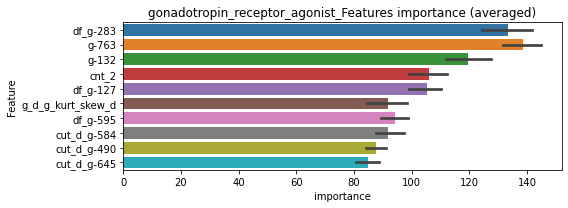

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 gonadotropin_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[782]	training's binary_logloss: 0.000319037	valid_1's binary_logloss: 0.00279826


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 gonadotropin_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[832]	training's binary_logloss: 0.00031682	valid_1's binary_logloss: 0.00228986


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 gonadotropin_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[801]	training's binary_logloss: 0.000321437	valid_1's binary_logloss: 0.00106141


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 gonadotropin_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[825]	training's binary_logloss: 0.000314087	valid_1's binary_logloss: 0.00178305


gonadotropin_receptor_agonist logloss: 0.001986395415872488
gsk_inhibitor, len(trt): 60, len(othr): 3284
target_rate: 0.0025195 → Adj_target_rate: 0.0027266


selected negative label: 3284


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[764]	training's binary_logloss: 0.000554565	valid_1's binary_logloss: 0.0191928
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[786]	training's binary_logloss: 0.00054943	valid_1's binary_logloss: 0.0119727
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[764]	training's binary_logloss: 0.000571668	valid_1's binary_logloss: 0.00458242
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[787]	training's binary_logloss: 0.000546295	valid_1's binary_logloss: 0.0129695


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0062336, Threshold: 0.0250926, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00252
Num_p_label: 40.0, Expected: 10.0, Threshold: 0.0250926, conf_0:0.01756, conf_1:0.03262
Num_p_label: 10.0, Expected: 10.0, Adj_threshold_1: 0.0550926
threshold: 0.0550926, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[717]	training's binary_logloss: 0.000566545	valid_1's binary_logloss: 0.0205909
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[761]	training's binary_logloss: 0.000546057	valid_1's binary_logloss: 0.0116958
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[760]	training's binary_logloss: 0.000563296	valid_1's binary_logloss: 0.00247606
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[797]	training's binary_logloss: 0.000520802	valid_1's binary_logloss: 0.0102778


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0253580, Threshold: 0.0550926, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0135610 Vs.target_rate: 0.00252
Num_p_label: 54.0, Expected: 10.0, Threshold: 0.0550926, conf_0:0.04407, conf_1:0.06611
Num_p_label: 31.0, Expected: 10.0, Adj_threshold_1: 0.0850926
Num_p_label: 21.0, Expected: 10.0, Adj_threshold_2: 0.1150926
Num_p_label: 12.0, Expected: 10.0, Adj_threshold_3: 0.1450926
threshold: 0.1450926, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[717]	training's binary_logloss: 0.000566545	valid_1's binary_logloss: 0.0205909
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[761]	training's binary_logloss: 0.000546057	valid_1's binary_logloss: 0.0116958
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[760]	training's binary_logloss: 0.000563296	valid_1's binary_logloss: 0.00247606
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[797]	training's binary_logloss: 0.000520802	valid_1's binary_logloss: 0.0102778


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0253580, Threshold: 0.1450926, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0030136 Vs.target_rate: 0.00252
Num_p_label: 12.0, Expected: 10.0, Threshold: 0.1450926, conf_0:0.13058, conf_1:0.15960
threshold: 0.1450926, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 656.0/3808, y_label_rate: 0.1722689


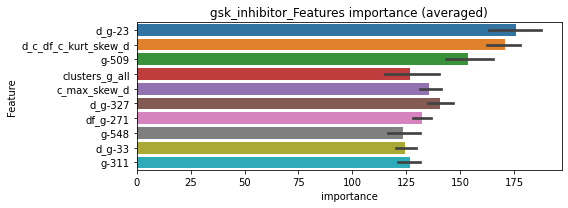

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 gsk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[771]	training's binary_logloss: 0.000645362	valid_1's binary_logloss: 0.0186382


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 gsk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[917]	training's binary_logloss: 0.000579178	valid_1's binary_logloss: 0.012543


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 gsk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000568903	valid_1's binary_logloss: 0.00306837
Early stopping, best iteration is:
[1137]	training's binary_logloss: 0.000545322	valid_1's binary_logloss: 0.00301018


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 gsk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000548671	valid_1's binary_logloss: 0.0102205
Early stopping, best iteration is:
[1009]	training's binary_logloss: 0.000546349	valid_1's binary_logloss: 0.0102131


gsk_inhibitor logloss: 0.011101747050922555
hcv_inhibitor, len(trt): 72, len(othr): 3284
target_rate: 0.0030234 → Adj_target_rate: 0.0031837


selected negative label: 3284


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[571]	training's binary_logloss: 0.000901991	valid_1's binary_logloss: 0.0308976
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[793]	training's binary_logloss: 0.000598558	valid_1's binary_logloss: 0.0195982
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[754]	training's binary_logloss: 0.00062498	valid_1's binary_logloss: 0.0140763
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[682]	training's binary_logloss: 0.00067636	valid_1's binary_logloss: 0.022965


1 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0061836, Threshold: 0.0161215, pos_neg_ratio: 0.8000000
Remove_noisy_data: 136 → Positive_corect_labels: 654/3804
p_label_rate: 0.0100452 Vs.target_rate: 0.00302
Num_p_label: 40.0, Expected: 12.0, Threshold: 0.0161215, conf_0:0.01129, conf_1:0.02096
Num_p_label: 7.0, Expected: 12.0, Adj_threshold_1: 0.0461215
threshold: 0.0461215, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 654.0/3804, y_label_rate: 0.1719243
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[677]	training's binary_logloss: 0.000644902	valid_1's binary_logloss: 0.0257615
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[638]	training's binary_logloss: 0.000717254	valid_1's binary_logloss: 0.0167842
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[642]	training's binary_logloss: 0.000714053	valid_1's binary_logloss: 0.015158
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[771]	training's binary_logloss: 0.000585562	valid_1's binary_logloss: 0.0211474


2 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0330873, Threshold: 0.0461215, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 651.0/3798
p_label_rate: 0.0077850 Vs.target_rate: 0.00302
Num_p_label: 31.0, Expected: 12.0, Threshold: 0.0461215, conf_0:0.03690, conf_1:0.05535
Num_p_label: 18.0, Expected: 12.0, Adj_threshold_1: 0.0761215
threshold: 0.0761215, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 651.0/3798, y_label_rate: 0.1714060
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[520]	training's binary_logloss: 0.000981181	valid_1's binary_logloss: 0.0249974
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[680]	training's binary_logloss: 0.000642224	valid_1's binary_logloss: 0.022183
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[644]	training's binary_logloss: 0.000684278	valid_1's binary_logloss: 0.0268381
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[653]	training's binary_logloss: 0.000678789	valid_1's binary_logloss: 0.017034


3 / 3, AUC score:0.999, PR-AUC:0.998
y_Threshold: 0.0332890, Threshold: 0.0761215, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 647.0/3790
p_label_rate: 0.0050226 Vs.target_rate: 0.00302
Num_p_label: 20.0, Expected: 12.0, Threshold: 0.0761215, conf_0:0.06851, conf_1:0.08373
Num_p_label: 13.0, Expected: 12.0, Adj_threshold_1: 0.1061215
threshold: 0.1061215, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 647.0/3790, y_label_rate: 0.1707124


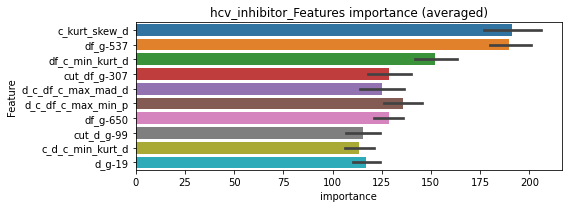

len(train_index) : 2842
len(valid_index) : 948
================================= fold 1/4 hcv_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[730]	training's binary_logloss: 0.000697976	valid_1's binary_logloss: 0.019255


len(train_index) : 2842
len(valid_index) : 948
================================= fold 2/4 hcv_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[658]	training's binary_logloss: 0.000755428	valid_1's binary_logloss: 0.0210379


len(train_index) : 2843
len(valid_index) : 947
================================= fold 3/4 hcv_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[739]	training's binary_logloss: 0.000690278	valid_1's binary_logloss: 0.0194409


len(train_index) : 2843
len(valid_index) : 947
================================= fold 4/4 hcv_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[831]	training's binary_logloss: 0.000633699	valid_1's binary_logloss: 0.0162318


hcv_inhibitor logloss: 0.018992019319482304
hdac_inhibitor, len(trt): 106, len(othr): 3274
target_rate: 0.0044512 → Adj_target_rate: 0.0044229


selected negative label: 3274


unpredictable_cols:hdac_inhibitor → create_features


N_features:358
================= Pseudo labeling 1 / 3 =================



Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0346889	valid_1's binary_logloss: 0.109794
[2000]	training's binary_logloss: 0.0167758	valid_1's binary_logloss: 0.0905904
[3000]	training's binary_logloss: 0.0110118	valid_1's binary_logloss: 0.0838142
Early stopping, best iteration is:
[3623]	training's binary_logloss: 0.00908132	valid_1's binary_logloss: 0.0818032
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0357258	valid_1's binary_logloss: 0.100463
[2000]	training's binary_logloss: 0.017227	valid_1's binary_logloss: 0.0804237
[3000]	training's binary_logloss: 0.0112874	valid_1's binary_logloss: 0.0736508
Early stopping, best iteration is:
[3801]	training's binary_logloss: 0.00884463	valid_1's binary_logloss: 0.0706462
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0356049	valid_1's binary_logloss: 0.0851682
[2000]	training's binary_lo

1 / 3, AUC score:0.995, PR-AUC:0.988
y_Threshold: 0.0410155, Threshold: 0.1298024, pos_neg_ratio: 0.8000000
Remove_noisy_data: 156 → Positive_corect_labels: 642/3772
p_label_rate: 0.0100452 Vs.target_rate: 0.00445
Num_p_label: 40.0, Expected: 17.7, Threshold: 0.1298024, conf_0:0.09086, conf_1:0.16874
Num_p_label: 23.0, Expected: 17.7, Adj_threshold_1: 0.1598024
threshold: 0.1598024, positive_p_label: 23.0/3982, p_label_rate: 0.0057760
positive_y_label: 642.0/3772, y_label_rate: 0.1702015
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0319336	valid_1's binary_logloss: 0.092398
[2000]	training's binary_logloss: 0.0154669	valid_1's binary_logloss: 0.0729403
[3000]	training's binary_logloss: 0.0101754	valid_1's binary_logloss: 0.0655519
[4000]	training's binary_logloss: 0.00761786	valid_1's binary_logloss: 0.0619359
Early stopping, best iteration is:
[4485]	training's binary_logloss: 0.00679367	valid_1's binary_logloss: 0.0606918
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0321492	valid_1's binary_logloss: 0.0919916
[2000]	training's binary_logloss: 0.0155546	valid_1's binary_logloss: 0.0727542
[3000]	training's binary_logloss: 0.0102274	valid_1's binary_logloss: 0.0655489
[4000]	training's binary_logloss: 0.00764194	valid_1's binary_logloss: 0.0622566
Early stopping, best iteration is:
[4834]	training's binary_logloss: 0.00632971	valid_1's binary_logloss: 0.0604998
Train

2 / 3, AUC score:0.998, PR-AUC:0.993
y_Threshold: 0.0771120, Threshold: 0.1598024, pos_neg_ratio: 0.8000000
Remove_noisy_data: 42 → Positive_corect_labels: 621.0/3730
p_label_rate: 0.0148167 Vs.target_rate: 0.00445
Num_p_label: 59.0, Expected: 17.7, Threshold: 0.1598024, conf_0:0.12784, conf_1:0.19176
Num_p_label: 44.0, Expected: 17.7, Adj_threshold_1: 0.1898024
Num_p_label: 33.0, Expected: 17.7, Adj_threshold_2: 0.2198024
Num_p_label: 21.0, Expected: 17.7, Adj_threshold_3: 0.2498024
threshold: 0.2498024, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 621.0/3730, y_label_rate: 0.1664879
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0303314	valid_1's binary_logloss: 0.0772543
[2000]	training's binary_logloss: 0.0146619	valid_1's binary_logloss: 0.0585172
[3000]	training's binary_logloss: 0.00965224	valid_1's binary_logloss: 0.0517465
[4000]	training's binary_logloss: 0.00723543	valid_1's binary_logloss: 0.0484334
[5000]	training's binary_logloss: 0.00578978	valid_1's binary_logloss: 0.0461819
Early stopping, best iteration is:
[5335]	training's binary_logloss: 0.00543171	valid_1's binary_logloss: 0.0456228
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0304524	valid_1's binary_logloss: 0.0801022
[2000]	training's binary_logloss: 0.0147351	valid_1's binary_logloss: 0.059261
[3000]	training's binary_logloss: 0.00969077	valid_1's binary_logloss: 0.051531
[4000]	training's binary_logloss: 0.00724458	valid_1's binary_logloss: 0.0474236
Early stopping, best iteration is:
[463

3 / 3, AUC score:0.999, PR-AUC:0.998
y_Threshold: 0.0774533, Threshold: 0.2498024, pos_neg_ratio: 0.8000000
Remove_noisy_data: 18 → Positive_corect_labels: 612.0/3712
p_label_rate: 0.0057760 Vs.target_rate: 0.00445
Num_p_label: 23.0, Expected: 17.7, Threshold: 0.2498024, conf_0:0.22482, conf_1:0.27478
threshold: 0.2498024, positive_p_label: 23.0/3982, p_label_rate: 0.0057760
positive_y_label: 612.0/3712, y_label_rate: 0.1648707


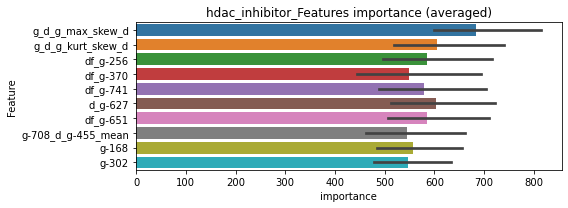

len(train_index) : 2784
len(valid_index) : 928
================================= fold 1/4 hdac_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0294681	valid_1's binary_logloss: 0.0673996
[2000]	training's binary_logloss: 0.0142716	valid_1's binary_logloss: 0.0491534
[3000]	training's binary_logloss: 0.00941601	valid_1's binary_logloss: 0.042718
[4000]	training's binary_logloss: 0.00704294	valid_1's binary_logloss: 0.0392902
[5000]	training's binary_logloss: 0.00565525	valid_1's binary_logloss: 0.0371105
Early stopping, best iteration is:
[5761]	training's binary_logloss: 0.00491662	valid_1's binary_logloss: 0.0359601


len(train_index) : 2784
len(valid_index) : 928
================================= fold 2/4 hdac_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0290253	valid_1's binary_logloss: 0.0824481
[2000]	training's binary_logloss: 0.0140198	valid_1's binary_logloss: 0.0633068
[3000]	training's binary_logloss: 0.00925229	valid_1's binary_logloss: 0.0560276
[4000]	training's binary_logloss: 0.00691919	valid_1's binary_logloss: 0.0521702
[5000]	training's binary_logloss: 0.00554911	valid_1's binary_logloss: 0.0497607
[6000]	training's binary_logloss: 0.0046458	valid_1's binary_logloss: 0.0480612
Early stopping, best iteration is:
[6293]	training's binary_logloss: 0.00443642	valid_1's binary_logloss: 0.047617


len(train_index) : 2784
len(valid_index) : 928
================================= fold 3/4 hdac_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0299869	valid_1's binary_logloss: 0.066652
[2000]	training's binary_logloss: 0.0144844	valid_1's binary_logloss: 0.0477764
[3000]	training's binary_logloss: 0.00953286	valid_1's binary_logloss: 0.0413106
[4000]	training's binary_logloss: 0.00713272	valid_1's binary_logloss: 0.037496
[5000]	training's binary_logloss: 0.00571335	valid_1's binary_logloss: 0.0352815
[6000]	training's binary_logloss: 0.00477731	valid_1's binary_logloss: 0.0335721
[7000]	training's binary_logloss: 0.00411542	valid_1's binary_logloss: 0.0322344
Early stopping, best iteration is:
[7122]	training's binary_logloss: 0.00404849	valid_1's binary_logloss: 0.0321369


len(train_index) : 2784
len(valid_index) : 928
================================= fold 4/4 hdac_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.029501	valid_1's binary_logloss: 0.073144
[2000]	training's binary_logloss: 0.0143119	valid_1's binary_logloss: 0.0540124
[3000]	training's binary_logloss: 0.00943193	valid_1's binary_logloss: 0.0471649
[4000]	training's binary_logloss: 0.00706603	valid_1's binary_logloss: 0.043655
[5000]	training's binary_logloss: 0.0056606	valid_1's binary_logloss: 0.0415242
[6000]	training's binary_logloss: 0.0047357	valid_1's binary_logloss: 0.0398583
[7000]	training's binary_logloss: 0.00408729	valid_1's binary_logloss: 0.0387242
[8000]	training's binary_logloss: 0.00360281	valid_1's binary_logloss: 0.0378628
Early stopping, best iteration is:
[8283]	training's binary_logloss: 0.00348537	valid_1's binary_logloss: 0.0376526


hdac_inhibitor logloss: 0.03834164286273984
hdac_inhibitor is unpredictable(><)!
histamine_receptor_agonist, len(trt): 59, len(othr): 3282
target_rate: 0.0024775 → Adj_target_rate: 0.0026880


selected negative label: 3282


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[625]	training's binary_logloss: 0.000607757	valid_1's binary_logloss: 0.0304244
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[533]	training's binary_logloss: 0.000815708	valid_1's binary_logloss: 0.0294345
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[725]	training's binary_logloss: 0.000558729	valid_1's binary_logloss: 0.00887041
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[721]	training's binary_logloss: 0.000534935	valid_1's binary_logloss: 0.0189539


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0050876, Threshold: 0.0126005, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3806
p_label_rate: 0.0100452 Vs.target_rate: 0.00248
Num_p_label: 40.0, Expected: 9.9, Threshold: 0.0126005, conf_0:0.00882, conf_1:0.01638
Num_p_label: 3.0, Expected: 9.9, Adj_threshold_1: 0.0426005
threshold: 0.0426005, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[633]	training's binary_logloss: 0.000577997	valid_1's binary_logloss: 0.0283546
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[579]	training's binary_logloss: 0.00068171	valid_1's binary_logloss: 0.0252263
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[610]	training's binary_logloss: 0.000670707	valid_1's binary_logloss: 0.00865418
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[685]	training's binary_logloss: 0.00054801	valid_1's binary_logloss: 0.0162162


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0257559, Threshold: 0.0426005, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 654.0/3802
p_label_rate: 0.0042692 Vs.target_rate: 0.00248
Num_p_label: 17.0, Expected: 9.9, Threshold: 0.0426005, conf_0:0.03408, conf_1:0.05112
threshold: 0.0426005, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 654.0/3802, y_label_rate: 0.1720147
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[634]	training's binary_logloss: 0.000592519	valid_1's binary_logloss: 0.0203225
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[616]	training's binary_logloss: 0.000631216	valid_1's binary_logloss: 0.0132046
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[512]	training's binary_logloss: 0.000855373	valid_1's binary_logloss: 0.0208168
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[647]	training's binary_logloss: 0.000571722	valid_1's binary_logloss: 0.0269487


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0230840, Threshold: 0.0426005, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 651.0/3796
p_label_rate: 0.0045203 Vs.target_rate: 0.00248
Num_p_label: 18.0, Expected: 9.9, Threshold: 0.0426005, conf_0:0.03834, conf_1:0.04686
threshold: 0.0426005, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 651.0/3796, y_label_rate: 0.1714963


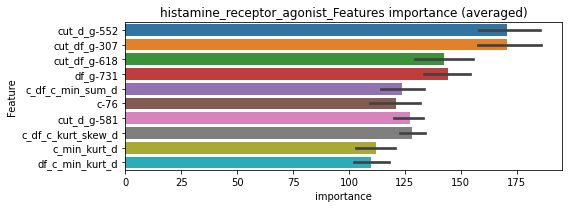

len(train_index) : 2847
len(valid_index) : 949
================================= fold 1/4 histamine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2847
len(valid_index) : 949
================================= fold 2/4 histamine_receptor_agonist=================================


Early stopping, best iteration is:
[549]	training's binary_logloss: 0.000772419	valid_1's binary_logloss: 0.0183903
Training until validation scores don't improve for 30 rounds


len(train_index) : 2847
len(valid_index) : 949
================================= fold 3/4 histamine_receptor_agonist=================================


Early stopping, best iteration is:
[486]	training's binary_logloss: 0.000869618	valid_1's binary_logloss: 0.0193032
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[914]	training's binary_logloss: 0.00053414	valid_1's binary_logloss: 0.0146003


len(train_index) : 2847
len(valid_index) : 949
================================= fold 4/4 histamine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


histamine_receptor_agonist logloss: 0.016774329696064693


Early stopping, best iteration is:
[544]	training's binary_logloss: 0.000790996	valid_1's binary_logloss: 0.0148035
mutually exclusive columns: histamine_receptor_antagonist


histamine_receptor_antagonist, len(trt): 241, len(othr): 6823
target_rate: 0.0101201 → Adj_target_rate: 0.0088902


selected negative label: 6823


unpredictable_cols:histamine_receptor_antagonist → create_features


N_features:358
================= Pseudo labeling 1 / 3 =================



Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0363521	valid_1's binary_logloss: 0.114984
Early stopping, best iteration is:
[1759]	training's binary_logloss: 0.0199715	valid_1's binary_logloss: 0.108268
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.036127	valid_1's binary_logloss: 0.116181
Early stopping, best iteration is:
[1796]	training's binary_logloss: 0.019157	valid_1's binary_logloss: 0.108669
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0375589	valid_1's binary_logloss: 0.104733
[2000]	training's binary_logloss: 0.0182048	valid_1's binary_logloss: 0.094372
Early stopping, best iteration is:
[2091]	training's binary_logloss: 0.0173807	valid_1's binary_logloss: 0.0938524
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0370858	valid_1's binary_logloss: 0.111329
Early stopping, bes

1 / 3, AUC score:0.979, PR-AUC:0.958
y_Threshold: 0.0513930, Threshold: 0.0871525, pos_neg_ratio: 0.8000000
Remove_noisy_data: 464 → Positive_corect_labels: 1269/7723
p_label_rate: 0.0100452 Vs.target_rate: 0.01012
Num_p_label: 40.0, Expected: 40.3, Threshold: 0.0871525, conf_0:0.06101, conf_1:0.11330
threshold: 0.0871525, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1269.0/7723, y_label_rate: 0.1643144
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0266569	valid_1's binary_logloss: 0.082271
[2000]	training's binary_logloss: 0.0127993	valid_1's binary_logloss: 0.0733904
Early stopping, best iteration is:
[2265]	training's binary_logloss: 0.0112283	valid_1's binary_logloss: 0.0722895
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.026036	valid_1's binary_logloss: 0.0860367
Early stopping, best iteration is:
[1755]	training's binary_logloss: 0.0143379	valid_1's binary_logloss: 0.0785062
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.02824	valid_1's binary_logloss: 0.0651488
[2000]	training's binary_logloss: 0.0133927	valid_1's binary_logloss: 0.0538651
Early stopping, best iteration is:
[2763]	training's binary_logloss: 0.00948282	valid_1's binary_logloss: 0.0507738
Training until validation scores don't improve for 30 rounds
[1000]	trainin

2 / 3, AUC score:0.995, PR-AUC:0.987
y_Threshold: 0.0665289, Threshold: 0.0871525, pos_neg_ratio: 0.8000000
Remove_noisy_data: 110 → Positive_corect_labels: 1214.0/7613
p_label_rate: 0.0133099 Vs.target_rate: 0.01012
Num_p_label: 53.0, Expected: 40.3, Threshold: 0.0871525, conf_0:0.06972, conf_1:0.10458
threshold: 0.0871525, positive_p_label: 53.0/3982, p_label_rate: 0.0133099
positive_y_label: 1214.0/7613, y_label_rate: 0.1594641
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0214637	valid_1's binary_logloss: 0.0642429
[2000]	training's binary_logloss: 0.0103243	valid_1's binary_logloss: 0.0548957
Early stopping, best iteration is:
[2738]	training's binary_logloss: 0.00742165	valid_1's binary_logloss: 0.0521193
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0220924	valid_1's binary_logloss: 0.0578598
[2000]	training's binary_logloss: 0.0106987	valid_1's binary_logloss: 0.0489688
Early stopping, best iteration is:
[2623]	training's binary_logloss: 0.00803152	valid_1's binary_logloss: 0.0468241
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0226342	valid_1's binary_logloss: 0.0544047
[2000]	training's binary_logloss: 0.0108926	valid_1's binary_logloss: 0.0446853
Early stopping, best iteration is:
[2855]	training's binary_logloss: 0.00749644	valid_1's binary_logloss:

3 / 3, AUC score:0.999, PR-AUC:0.997
y_Threshold: 0.0540270, Threshold: 0.0871525, pos_neg_ratio: 0.8000000
Remove_noisy_data: 46 → Positive_corect_labels: 1191.0/7567
p_label_rate: 0.0087896 Vs.target_rate: 0.01012
Num_p_label: 35.0, Expected: 40.3, Threshold: 0.0871525, conf_0:0.07844, conf_1:0.09587
threshold: 0.0871525, positive_p_label: 35.0/3982, p_label_rate: 0.0087896
positive_y_label: 1191.0/7567, y_label_rate: 0.1573939


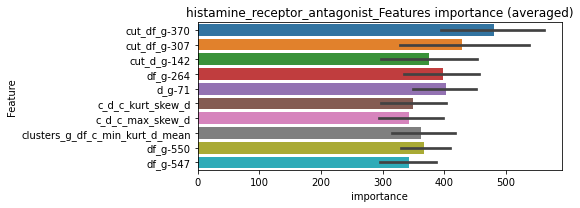

len(train_index) : 5675
len(valid_index) : 1892
================================= fold 1/4 histamine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0200682	valid_1's binary_logloss: 0.0536343
[2000]	training's binary_logloss: 0.00970828	valid_1's binary_logloss: 0.0437305
[3000]	training's binary_logloss: 0.00633494	valid_1's binary_logloss: 0.0402022
Early stopping, best iteration is:
[3857]	training's binary_logloss: 0.00490228	valid_1's binary_logloss: 0.0386552


len(train_index) : 5675
len(valid_index) : 1892
================================= fold 2/4 histamine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0201719	valid_1's binary_logloss: 0.0502907
[2000]	training's binary_logloss: 0.00969304	valid_1's binary_logloss: 0.0412485
[3000]	training's binary_logloss: 0.00633147	valid_1's binary_logloss: 0.0382872
Early stopping, best iteration is:
[3779]	training's binary_logloss: 0.0049926	valid_1's binary_logloss: 0.0371875


len(train_index) : 5675
len(valid_index) : 1892
================================= fold 3/4 histamine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0206063	valid_1's binary_logloss: 0.0448865
[2000]	training's binary_logloss: 0.00997363	valid_1's binary_logloss: 0.0354155
[3000]	training's binary_logloss: 0.00651157	valid_1's binary_logloss: 0.0320898
[4000]	training's binary_logloss: 0.00485728	valid_1's binary_logloss: 0.0304077
Early stopping, best iteration is:
[4603]	training's binary_logloss: 0.00421058	valid_1's binary_logloss: 0.0297309


len(train_index) : 5676
len(valid_index) : 1891
================================= fold 4/4 histamine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0203664	valid_1's binary_logloss: 0.0495603
[2000]	training's binary_logloss: 0.00983513	valid_1's binary_logloss: 0.0399527
[3000]	training's binary_logloss: 0.00643012	valid_1's binary_logloss: 0.0366794
Early stopping, best iteration is:
[3063]	training's binary_logloss: 0.00628974	valid_1's binary_logloss: 0.0364872


histamine_receptor_antagonist logloss: 0.03551510072595022
histamine_receptor_antagonist is unpredictable(><)!
histone_lysine_demethylase_inhibitor, len(trt): 24, len(othr): 3286
target_rate: 0.0010078 → Adj_target_rate: 0.0012513


selected negative label: 3286


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[607]	training's binary_logloss: 0.000370156	valid_1's binary_logloss: 0.00105769
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000365496	valid_1's binary_logloss: 0.00289203
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[594]	training's binary_logloss: 0.000378067	valid_1's binary_logloss: 0.00087894
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[632]	training's binary_logloss: 0.00036671	valid_1's binary_logloss: 0.00368442


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0021746, Threshold: 0.0214569, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00101
Num_p_label: 40.0, Expected: 4.0, Threshold: 0.0214569, conf_0:0.01502, conf_1:0.02789
Num_p_label: 25.0, Expected: 4.0, Adj_threshold_1: 0.0514569
Num_p_label: 21.0, Expected: 4.0, Adj_threshold_2: 0.0814569
Num_p_label: 20.0, Expected: 4.0, Adj_threshold_3: 0.1114569
Num_p_label: 14.0, Expected: 4.0, Adj_threshold_4: 0.1414569
Num_p_label: 10.0, Expected: 4.0, Adj_threshold_5: 0.1714569
threshold: 0.1714569, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[610]	training's binary_logloss: 0.000358142	valid_1's binary_logloss: 0.00125646
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[613]	training's binary_logloss: 0.000355508	valid_1's binary_logloss: 0.00162327
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[651]	training's binary_logloss: 0.000362271	valid_1's binary_logloss: 0.000816958
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[579]	training's binary_logloss: 0.000373669	valid_1's binary_logloss: 0.00228687


y_Threshold: 0.1041130, Threshold: 0.1714569, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0075339 Vs.target_rate: 0.00101
Num_p_label: 30.0, Expected: 4.0, Threshold: 0.1714569, conf_0:0.13717, conf_1:0.20575
Num_p_label: 26.0, Expected: 4.0, Adj_threshold_1: 0.2014569
Num_p_label: 24.0, Expected: 4.0, Adj_threshold_2: 0.2314569
Num_p_label: 23.0, Expected: 4.0, Adj_threshold_3: 0.2614569
Num_p_label: 22.0, Expected: 4.0, Adj_threshold_4: 0.2914569
Num_p_label: 21.0, Expected: 4.0, Adj_threshold_5: 0.3214569
Num_p_label: 19.0, Expected: 4.0, Adj_threshold_6: 0.3514569
Num_p_label: 19.0, Expected: 4.0, Adj_threshold_7: 0.3814569
Num_p_label: 19.0, Expected: 4.0, Adj_threshold_8: 0.4114569
Num_p_label: 17.0, Expected: 4.0, Adj_threshold_9: 0.4414569
Num_p_label: 16.0, Expected: 4.0, Adj_threshold_10: 0.4714569
threshold: 0.4714569, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 657.0/3811, y_label_rate: 0.1723

Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[610]	training's binary_logloss: 0.000358142	valid_1's binary_logloss: 0.00125646
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[613]	training's binary_logloss: 0.000355508	valid_1's binary_logloss: 0.00162327
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[647]	training's binary_logloss: 0.000362271	valid_1's binary_logloss: 0.000816958
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1041130, Threshold: 0.4714569, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811


Early stopping, best iteration is:
[579]	training's binary_logloss: 0.000373669	valid_1's binary_logloss: 0.00228687


p_label_rate: 0.0040181 Vs.target_rate: 0.00101
Num_p_label: 16.0, Expected: 4.0, Threshold: 0.4714569, conf_0:0.42431, conf_1:0.51860
Num_p_label: 12.0, Expected: 4.0, Adj_threshold_1: 0.5014569
Num_p_label: 10.0, Expected: 4.0, Adj_threshold_2: 0.5314569
threshold: 0.5314569, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


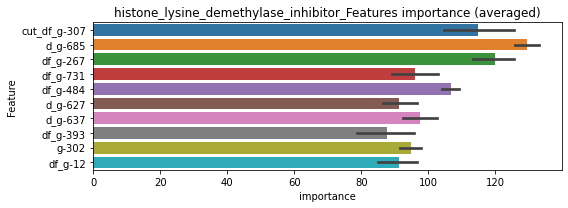

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 histone_lysine_demethylase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[798]	training's binary_logloss: 0.000377373	valid_1's binary_logloss: 0.00173576


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 histone_lysine_demethylase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[875]	training's binary_logloss: 0.000360342	valid_1's binary_logloss: 0.00279205


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 histone_lysine_demethylase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[871]	training's binary_logloss: 0.000368091	valid_1's binary_logloss: 0.000773665


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 histone_lysine_demethylase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[883]	training's binary_logloss: 0.000369115	valid_1's binary_logloss: 0.00208394


histone_lysine_demethylase_inhibitor logloss: 0.0018465306814231662
histone_lysine_methyltransferase_inhibitor, len(trt): 32, len(othr): 3282
target_rate: 0.0013437 → Adj_target_rate: 0.0015980


selected negative label: 3282


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[613]	training's binary_logloss: 0.000405964	valid_1's binary_logloss: 0.00740348
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[575]	training's binary_logloss: 0.000439217	valid_1's binary_logloss: 0.00510532
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[658]	training's binary_logloss: 0.000408361	valid_1's binary_logloss: 0.00126866
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0025686, Threshold: 0.0071250, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[518]	training's binary_logloss: 0.000497188	valid_1's binary_logloss: 0.0152738


Remove_noisy_data: 134 → Positive_corect_labels: 655/3804
p_label_rate: 0.0100452 Vs.target_rate: 0.00134
Num_p_label: 40.0, Expected: 5.4, Threshold: 0.0071250, conf_0:0.00499, conf_1:0.00926
Num_p_label: 3.0, Expected: 5.4, Adj_threshold_1: 0.0371250
threshold: 0.0371250, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 655.0/3804, y_label_rate: 0.1721872
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[667]	training's binary_logloss: 0.000383838	valid_1's binary_logloss: 0.00171165
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[634]	training's binary_logloss: 0.000390335	valid_1's binary_logloss: 0.00642556
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[644]	training's binary_logloss: 0.000388834	valid_1's binary_logloss: 0.00421718
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[558]	training's binary_logloss: 0.00043257	valid_1's binary_logloss: 0.0101097


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0106950, Threshold: 0.0371250, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3804
p_label_rate: 0.0045203 Vs.target_rate: 0.00134
Num_p_label: 18.0, Expected: 5.4, Threshold: 0.0371250, conf_0:0.02970, conf_1:0.04455
Num_p_label: 6.0, Expected: 5.4, Adj_threshold_1: 0.0671250
threshold: 0.0671250, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 655.0/3804, y_label_rate: 0.1721872
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[667]	training's binary_logloss: 0.000383838	valid_1's binary_logloss: 0.00171165
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[634]	training's binary_logloss: 0.000390335	valid_1's binary_logloss: 0.00642556
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[644]	training's binary_logloss: 0.000388834	valid_1's binary_logloss: 0.00421718
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0106950, Threshold: 0.0671250, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[558]	training's binary_logloss: 0.00043257	valid_1's binary_logloss: 0.0101097


Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3804
p_label_rate: 0.0015068 Vs.target_rate: 0.00134
Num_p_label: 6.0, Expected: 5.4, Threshold: 0.0671250, conf_0:0.06041, conf_1:0.07384
threshold: 0.0671250, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 655.0/3804, y_label_rate: 0.1721872


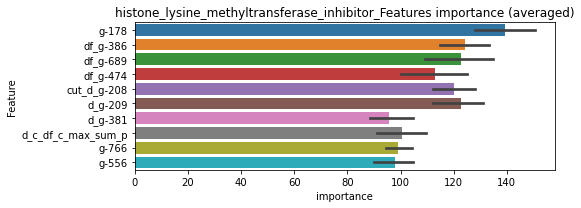

len(train_index) : 2853
len(valid_index) : 951
================================= fold 1/4 histone_lysine_methyltransferase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000390434	valid_1's binary_logloss: 0.00177316
Early stopping, best iteration is:
[991]	training's binary_logloss: 0.000390434	valid_1's binary_logloss: 0.00177316


len(train_index) : 2853
len(valid_index) : 951
================================= fold 2/4 histone_lysine_methyltransferase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[761]	training's binary_logloss: 0.000430808	valid_1's binary_logloss: 0.00594732


len(train_index) : 2853
len(valid_index) : 951
================================= fold 3/4 histone_lysine_methyltransferase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[880]	training's binary_logloss: 0.000402824	valid_1's binary_logloss: 0.004047


len(train_index) : 2853
len(valid_index) : 951
================================= fold 4/4 histone_lysine_methyltransferase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[933]	training's binary_logloss: 0.000391868	valid_1's binary_logloss: 0.00732972


histone_lysine_methyltransferase_inhibitor logloss: 0.0047742990968173355
hiv_inhibitor, len(trt): 72, len(othr): 3281
target_rate: 0.0030234 → Adj_target_rate: 0.0031837


selected negative label: 3281


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[608]	training's binary_logloss: 0.000767619	valid_1's binary_logloss: 0.0417084
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[815]	training's binary_logloss: 0.000579561	valid_1's binary_logloss: 0.0111544
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[728]	training's binary_logloss: 0.000631065	valid_1's binary_logloss: 0.0117609
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[768]	training's binary_logloss: 0.000597284	valid_1's binary_logloss: 0.0160171


1 / 3, AUC score:0.999, PR-AUC:0.999
y_Threshold: 0.0054347, Threshold: 0.0948020, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 655/3803
p_label_rate: 0.0100452 Vs.target_rate: 0.00302
Num_p_label: 40.0, Expected: 12.0, Threshold: 0.0948020, conf_0:0.06636, conf_1:0.12324
Num_p_label: 30.0, Expected: 12.0, Adj_threshold_1: 0.1248020
Num_p_label: 25.0, Expected: 12.0, Adj_threshold_2: 0.1548020
Num_p_label: 20.0, Expected: 12.0, Adj_threshold_3: 0.1848020
Num_p_label: 14.0, Expected: 12.0, Adj_threshold_4: 0.2148020
threshold: 0.2148020, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 655.0/3803, y_label_rate: 0.1722324
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[703]	training's binary_logloss: 0.000619021	valid_1's binary_logloss: 0.0251357
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[713]	training's binary_logloss: 0.000615392	valid_1's binary_logloss: 0.0155079
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[726]	training's binary_logloss: 0.000598139	valid_1's binary_logloss: 0.0198453
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[772]	training's binary_logloss: 0.00057204	valid_1's binary_logloss: 0.0204676


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0424953, Threshold: 0.2148020, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 652.0/3797
p_label_rate: 0.0135610 Vs.target_rate: 0.00302
Num_p_label: 54.0, Expected: 12.0, Threshold: 0.2148020, conf_0:0.17184, conf_1:0.25776
Num_p_label: 46.0, Expected: 12.0, Adj_threshold_1: 0.2448020
Num_p_label: 43.0, Expected: 12.0, Adj_threshold_2: 0.2748020
Num_p_label: 42.0, Expected: 12.0, Adj_threshold_3: 0.3048020
Num_p_label: 39.0, Expected: 12.0, Adj_threshold_4: 0.3348020
Num_p_label: 36.0, Expected: 12.0, Adj_threshold_5: 0.3648020
Num_p_label: 33.0, Expected: 12.0, Adj_threshold_6: 0.3948020
Num_p_label: 31.0, Expected: 12.0, Adj_threshold_7: 0.4248020
Num_p_label: 30.0, Expected: 12.0, Adj_threshold_8: 0.4548020
Num_p_label: 30.0, Expected: 12.0, Adj_threshold_9: 0.4848020
Num_p_label: 29.0, Expected: 12.0, Adj_threshold_10: 0.5148020
threshold: 0.5148020, positive_p_label: 29.0/3982, p_label_rate: 0.0072828
po

Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[591]	training's binary_logloss: 0.000780699	valid_1's binary_logloss: 0.0233284
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[744]	training's binary_logloss: 0.000572639	valid_1's binary_logloss: 0.0238691
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[583]	training's binary_logloss: 0.00078801	valid_1's binary_logloss: 0.0252752
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[744]	training's binary_logloss: 0.000565374	valid_1's binary_logloss: 0.030376


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0337263, Threshold: 0.5148020, pos_neg_ratio: 0.8000000
Remove_noisy_data: 10 → Positive_corect_labels: 647.0/3787
p_label_rate: 0.0077850 Vs.target_rate: 0.00302
Num_p_label: 31.0, Expected: 12.0, Threshold: 0.5148020, conf_0:0.46332, conf_1:0.56628
Num_p_label: 31.0, Expected: 12.0, Adj_threshold_1: 0.5448020
Num_p_label: 29.0, Expected: 12.0, Adj_threshold_2: 0.5748020
Num_p_label: 28.0, Expected: 12.0, Adj_threshold_3: 0.6048020
Num_p_label: 24.0, Expected: 12.0, Adj_threshold_4: 0.6348020
Num_p_label: 23.0, Expected: 12.0, Adj_threshold_5: 0.6648020
Num_p_label: 22.0, Expected: 12.0, Adj_threshold_6: 0.6948020
Num_p_label: 19.0, Expected: 12.0, Adj_threshold_7: 0.7248020
Num_p_label: 17.0, Expected: 12.0, Adj_threshold_8: 0.7548020
threshold: 0.7548020, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 647.0/3787, y_label_rate: 0.1708476


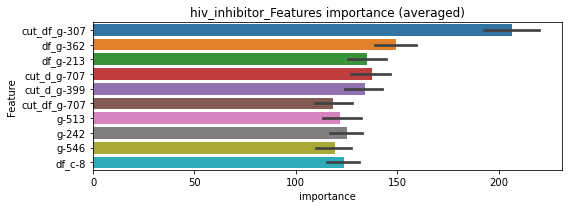

len(train_index) : 2840
len(valid_index) : 947
================================= fold 1/4 hiv_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2840
len(valid_index) : 947


Early stopping, best iteration is:
[536]	training's binary_logloss: 0.000900854	valid_1's binary_logloss: 0.0249237


================================= fold 2/4 hiv_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[666]	training's binary_logloss: 0.000730719	valid_1's binary_logloss: 0.0167726


len(train_index) : 2840
len(valid_index) : 947
================================= fold 3/4 hiv_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[932]	training's binary_logloss: 0.000580692	valid_1's binary_logloss: 0.0159472


len(train_index) : 2841
len(valid_index) : 946
================================= fold 4/4 hiv_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[730]	training's binary_logloss: 0.000687882	valid_1's binary_logloss: 0.0133552


hiv_inhibitor logloss: 0.01775082517696206


mutually exclusive columns: hmgcr_inhibitor


hmgcr_inhibitor, len(trt): 283, len(othr): 7400
target_rate: 0.0118838 → Adj_target_rate: 0.0101910


selected negative label: 7400


unpredictable_cols:hmgcr_inhibitor → create_features


N_features:358
================= Pseudo labeling 1 / 3 =================



Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0457286	valid_1's binary_logloss: 0.12713
[2000]	training's binary_logloss: 0.0213563	valid_1's binary_logloss: 0.100353
[3000]	training's binary_logloss: 0.0136741	valid_1's binary_logloss: 0.0909606
Early stopping, best iteration is:
[3719]	training's binary_logloss: 0.0108301	valid_1's binary_logloss: 0.08754
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0454554	valid_1's binary_logloss: 0.119803
[2000]	training's binary_logloss: 0.0212167	valid_1's binary_logloss: 0.0957817
[3000]	training's binary_logloss: 0.0135979	valid_1's binary_logloss: 0.0873463
[4000]	training's binary_logloss: 0.00999803	valid_1's binary_logloss: 0.082721
Early stopping, best iteration is:
[4333]	training's binary_logloss: 0.00917849	valid_1's binary_logloss: 0.0816713
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_loglos

1 / 3, AUC score:0.986, PR-AUC:0.972
y_Threshold: 0.0610733, Threshold: 0.1594488, pos_neg_ratio: 0.8000000
Remove_noisy_data: 434 → Positive_corect_labels: 1411/8446
p_label_rate: 0.0100452 Vs.target_rate: 0.01188
Num_p_label: 40.0, Expected: 47.3, Threshold: 0.1594488, conf_0:0.11161, conf_1:0.20728
threshold: 0.1594488, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1411.0/8446, y_label_rate: 0.1670613
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0392457	valid_1's binary_logloss: 0.114676
[2000]	training's binary_logloss: 0.0183768	valid_1's binary_logloss: 0.0921058
Early stopping, best iteration is:
[2883]	training's binary_logloss: 0.0123359	valid_1's binary_logloss: 0.0849414
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0389058	valid_1's binary_logloss: 0.118179
[2000]	training's binary_logloss: 0.0182045	valid_1's binary_logloss: 0.0955082
[3000]	training's binary_logloss: 0.0117418	valid_1's binary_logloss: 0.0876162
Early stopping, best iteration is:
[3778]	training's binary_logloss: 0.00918649	valid_1's binary_logloss: 0.0843281
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0399233	valid_1's binary_logloss: 0.0942695
[2000]	training's binary_logloss: 0.0186909	valid_1's binary_logloss: 0.0691579
[3000]	training's binary_log

2 / 3, AUC score:0.994, PR-AUC:0.987
y_Threshold: 0.1075972, Threshold: 0.1594488, pos_neg_ratio: 0.8000000
Remove_noisy_data: 120 → Positive_corect_labels: 1351.0/8326
p_label_rate: 0.0140633 Vs.target_rate: 0.01188
Num_p_label: 56.0, Expected: 47.3, Threshold: 0.1594488, conf_0:0.12756, conf_1:0.19134
threshold: 0.1594488, positive_p_label: 56.0/3982, p_label_rate: 0.0140633
positive_y_label: 1351.0/8326, y_label_rate: 0.1622628
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0361588	valid_1's binary_logloss: 0.103572
[2000]	training's binary_logloss: 0.0169736	valid_1's binary_logloss: 0.0811373
[3000]	training's binary_logloss: 0.0109662	valid_1's binary_logloss: 0.0730053
[4000]	training's binary_logloss: 0.00809043	valid_1's binary_logloss: 0.0689924
Early stopping, best iteration is:
[4801]	training's binary_logloss: 0.00669148	valid_1's binary_logloss: 0.066818
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0360569	valid_1's binary_logloss: 0.0975728
[2000]	training's binary_logloss: 0.0169552	valid_1's binary_logloss: 0.0744493
[3000]	training's binary_logloss: 0.0109397	valid_1's binary_logloss: 0.0662902
Early stopping, best iteration is:
[3962]	training's binary_logloss: 0.00816382	valid_1's binary_logloss: 0.0620295
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_l

3 / 3, AUC score:0.997, PR-AUC:0.993
y_Threshold: 0.0920946, Threshold: 0.1594488, pos_neg_ratio: 0.8000000
Remove_noisy_data: 74 → Positive_corect_labels: 1314.0/8252
p_label_rate: 0.0158212 Vs.target_rate: 0.01188
Num_p_label: 63.0, Expected: 47.3, Threshold: 0.1594488, conf_0:0.14350, conf_1:0.17539
threshold: 0.1594488, positive_p_label: 63.0/3982, p_label_rate: 0.0158212
positive_y_label: 1314.0/8252, y_label_rate: 0.1592341


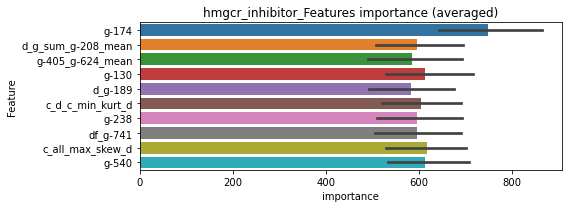

len(train_index) : 6189
len(valid_index) : 2063
================================= fold 1/4 hmgcr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0346483	valid_1's binary_logloss: 0.0871325
[2000]	training's binary_logloss: 0.0163566	valid_1's binary_logloss: 0.0637254
[3000]	training's binary_logloss: 0.0105715	valid_1's binary_logloss: 0.0557785
[4000]	training's binary_logloss: 0.00780297	valid_1's binary_logloss: 0.0514338
Early stopping, best iteration is:
[4738]	training's binary_logloss: 0.00655139	valid_1's binary_logloss: 0.0494136


len(train_index) : 6189
len(valid_index) : 2063
================================= fold 2/4 hmgcr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0343823	valid_1's binary_logloss: 0.0934009
[2000]	training's binary_logloss: 0.0161191	valid_1's binary_logloss: 0.0707983
[3000]	training's binary_logloss: 0.0104144	valid_1's binary_logloss: 0.0628253
[4000]	training's binary_logloss: 0.00769992	valid_1's binary_logloss: 0.0584074
Early stopping, best iteration is:
[4899]	training's binary_logloss: 0.00624424	valid_1's binary_logloss: 0.0556959


len(train_index) : 6189
len(valid_index) : 2063
================================= fold 3/4 hmgcr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.03399	valid_1's binary_logloss: 0.102428
[2000]	training's binary_logloss: 0.0160124	valid_1's binary_logloss: 0.0813187
[3000]	training's binary_logloss: 0.0103525	valid_1's binary_logloss: 0.0734224
Early stopping, best iteration is:
[3581]	training's binary_logloss: 0.00860071	valid_1's binary_logloss: 0.0708617


len(train_index) : 6189
len(valid_index) : 2063
================================= fold 4/4 hmgcr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0346918	valid_1's binary_logloss: 0.0858296
[2000]	training's binary_logloss: 0.0163441	valid_1's binary_logloss: 0.0644467
[3000]	training's binary_logloss: 0.0105903	valid_1's binary_logloss: 0.0568465
[4000]	training's binary_logloss: 0.00782902	valid_1's binary_logloss: 0.0526736
[5000]	training's binary_logloss: 0.00622786	valid_1's binary_logloss: 0.050121
Early stopping, best iteration is:
[5753]	training's binary_logloss: 0.00539692	valid_1's binary_logloss: 0.0486212


hmgcr_inhibitor logloss: 0.05614809107549437
hmgcr_inhibitor is unpredictable(><)!
hsp_inhibitor, len(trt): 93, len(othr): 3273
target_rate: 0.0039053 → Adj_target_rate: 0.0039574


selected negative label: 3273


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[664]	training's binary_logloss: 0.000981867	valid_1's binary_logloss: 0.0561189
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[659]	training's binary_logloss: 0.00103225	valid_1's binary_logloss: 0.0302613
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[680]	training's binary_logloss: 0.000984731	valid_1's binary_logloss: 0.0245431
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[677]	training's binary_logloss: 0.000965437	valid_1's binary_logloss: 0.040121


1 / 3, AUC score:0.999, PR-AUC:0.995
y_Threshold: 0.0124691, Threshold: 0.1352962, pos_neg_ratio: 0.8000000
Remove_noisy_data: 142 → Positive_corect_labels: 649/3785
p_label_rate: 0.0100452 Vs.target_rate: 0.00391
Num_p_label: 40.0, Expected: 15.6, Threshold: 0.1352962, conf_0:0.09471, conf_1:0.17589
Num_p_label: 35.0, Expected: 15.6, Adj_threshold_1: 0.1652962
Num_p_label: 31.0, Expected: 15.6, Adj_threshold_2: 0.1952962
Num_p_label: 27.0, Expected: 15.6, Adj_threshold_3: 0.2252962
Num_p_label: 22.0, Expected: 15.6, Adj_threshold_4: 0.2552962
threshold: 0.2552962, positive_p_label: 22.0/3982, p_label_rate: 0.0055249
positive_y_label: 649.0/3785, y_label_rate: 0.1714663
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[790]	training's binary_logloss: 0.000712425	valid_1's binary_logloss: 0.0466947
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[631]	training's binary_logloss: 0.000959306	valid_1's binary_logloss: 0.0472431
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[885]	training's binary_logloss: 0.000682996	valid_1's binary_logloss: 0.0149444
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[702]	training's binary_logloss: 0.0008401	valid_1's binary_logloss: 0.0259973


2 / 3, AUC score:0.999, PR-AUC:0.998
y_Threshold: 0.0531348, Threshold: 0.2552962, pos_neg_ratio: 0.8000000
Remove_noisy_data: 26 → Positive_corect_labels: 636.0/3759
p_label_rate: 0.0215972 Vs.target_rate: 0.00391
Num_p_label: 86.0, Expected: 15.6, Threshold: 0.2552962, conf_0:0.20424, conf_1:0.30636
Num_p_label: 76.0, Expected: 15.6, Adj_threshold_1: 0.2852962
Num_p_label: 69.0, Expected: 15.6, Adj_threshold_2: 0.3152962
Num_p_label: 66.0, Expected: 15.6, Adj_threshold_3: 0.3452962
Num_p_label: 63.0, Expected: 15.6, Adj_threshold_4: 0.3752962
Num_p_label: 57.0, Expected: 15.6, Adj_threshold_5: 0.4052962
Num_p_label: 51.0, Expected: 15.6, Adj_threshold_6: 0.4352962
Num_p_label: 47.0, Expected: 15.6, Adj_threshold_7: 0.4652962
Num_p_label: 42.0, Expected: 15.6, Adj_threshold_8: 0.4952962
Num_p_label: 41.0, Expected: 15.6, Adj_threshold_9: 0.5252962
Num_p_label: 37.0, Expected: 15.6, Adj_threshold_10: 0.5552962
threshold: 0.5552962, positive_p_label: 37.0/3982, p_label_rate: 0.0092918
p

Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[731]	training's binary_logloss: 0.0007175	valid_1's binary_logloss: 0.0308231
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[765]	training's binary_logloss: 0.000699821	valid_1's binary_logloss: 0.028218
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[745]	training's binary_logloss: 0.000733304	valid_1's binary_logloss: 0.018956
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[690]	training's binary_logloss: 0.000796479	valid_1's binary_logloss: 0.0167007


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0631704, Threshold: 0.5552962, pos_neg_ratio: 0.8000000
Remove_noisy_data: 10 → Positive_corect_labels: 631.0/3749
p_label_rate: 0.0158212 Vs.target_rate: 0.00391
Num_p_label: 63.0, Expected: 15.6, Threshold: 0.5552962, conf_0:0.49977, conf_1:0.61083
Num_p_label: 58.0, Expected: 15.6, Adj_threshold_1: 0.5852962
Num_p_label: 50.0, Expected: 15.6, Adj_threshold_2: 0.6152962
Num_p_label: 47.0, Expected: 15.6, Adj_threshold_3: 0.6452962
Num_p_label: 44.0, Expected: 15.6, Adj_threshold_4: 0.6752962
Num_p_label: 41.0, Expected: 15.6, Adj_threshold_5: 0.7052962
Num_p_label: 33.0, Expected: 15.6, Adj_threshold_6: 0.7352962
Num_p_label: 26.0, Expected: 15.6, Adj_threshold_7: 0.7652962
Num_p_label: 19.0, Expected: 15.6, Adj_threshold_8: 0.7952962
threshold: 0.7952962, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 631.0/3749, y_label_rate: 0.1683115


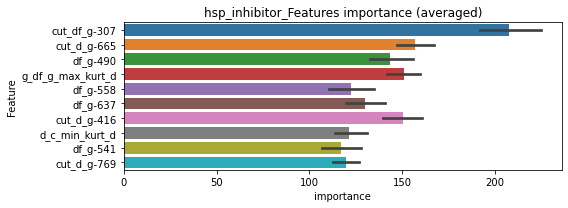

len(train_index) : 2811
len(valid_index) : 938
================================= fold 1/4 hsp_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2812
len(valid_index) : 937


Early stopping, best iteration is:
[565]	training's binary_logloss: 0.00105045	valid_1's binary_logloss: 0.0282644


================================= fold 2/4 hsp_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[734]	training's binary_logloss: 0.000838626	valid_1's binary_logloss: 0.0309789


len(train_index) : 2812
len(valid_index) : 937
================================= fold 3/4 hsp_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[915]	training's binary_logloss: 0.000712231	valid_1's binary_logloss: 0.0212237


len(train_index) : 2812
len(valid_index) : 937
================================= fold 4/4 hsp_inhibitor=================================


Training until validation scores don't improve for 30 rounds


hsp_inhibitor logloss: 0.027636629523546206


Early stopping, best iteration is:
[446]	training's binary_logloss: 0.00136751	valid_1's binary_logloss: 0.0300789


igf-1_inhibitor, len(trt): 37, len(othr): 3283
target_rate: 0.0015537 → Adj_target_rate: 0.0018079


selected negative label: 3283


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[597]	training's binary_logloss: 0.000475654	valid_1's binary_logloss: 0.0197215
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[651]	training's binary_logloss: 0.000449374	valid_1's binary_logloss: 0.00835642
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[619]	training's binary_logloss: 0.000481834	valid_1's binary_logloss: 0.00183949
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[618]	training's binary_logloss: 0.000461562	valid_1's binary_logloss: 0.0134716


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0033617, Threshold: 0.0210173, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3807
p_label_rate: 0.0100452 Vs.target_rate: 0.00155
Num_p_label: 40.0, Expected: 6.2, Threshold: 0.0210173, conf_0:0.01471, conf_1:0.02732
Num_p_label: 15.0, Expected: 6.2, Adj_threshold_1: 0.0510173
threshold: 0.0510173, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[573]	training's binary_logloss: 0.000471701	valid_1's binary_logloss: 0.0193798
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[602]	training's binary_logloss: 0.00046845	valid_1's binary_logloss: 0.00685191
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[683]	training's binary_logloss: 0.000448546	valid_1's binary_logloss: 0.00186334
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[629]	training's binary_logloss: 0.000439515	valid_1's binary_logloss: 0.0128321


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0338202, Threshold: 0.0510173, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 654.0/3803
p_label_rate: 0.0145655 Vs.target_rate: 0.00155
Num_p_label: 58.0, Expected: 6.2, Threshold: 0.0510173, conf_0:0.04081, conf_1:0.06122
Num_p_label: 39.0, Expected: 6.2, Adj_threshold_1: 0.0810173
Num_p_label: 31.0, Expected: 6.2, Adj_threshold_2: 0.1110173
Num_p_label: 25.0, Expected: 6.2, Adj_threshold_3: 0.1410173
Num_p_label: 23.0, Expected: 6.2, Adj_threshold_4: 0.1710173
Num_p_label: 16.0, Expected: 6.2, Adj_threshold_5: 0.2010173
Num_p_label: 15.0, Expected: 6.2, Adj_threshold_6: 0.2310173
threshold: 0.2310173, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 654.0/3803, y_label_rate: 0.1719695
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[659]	training's binary_logloss: 0.000420439	valid_1's binary_logloss: 0.013304
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[701]	training's binary_logloss: 0.000424859	valid_1's binary_logloss: 0.00214267
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[583]	training's binary_logloss: 0.000475347	valid_1's binary_logloss: 0.01071
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[642]	training's binary_logloss: 0.000431327	valid_1's binary_logloss: 0.00921797


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0701416, Threshold: 0.2310173, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 654.0/3803
p_label_rate: 0.0040181 Vs.target_rate: 0.00155
Num_p_label: 16.0, Expected: 6.2, Threshold: 0.2310173, conf_0:0.20792, conf_1:0.25412
Num_p_label: 11.0, Expected: 6.2, Adj_threshold_1: 0.2610173
threshold: 0.2610173, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 654.0/3803, y_label_rate: 0.1719695


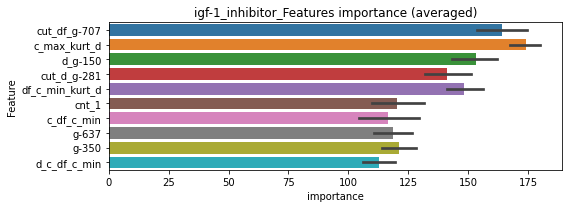

len(train_index) : 2852
len(valid_index) : 951
================================= fold 1/4 igf-1_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[835]	training's binary_logloss: 0.000447517	valid_1's binary_logloss: 0.0113458


len(train_index) : 2852
len(valid_index) : 951
================================= fold 2/4 igf-1_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[923]	training's binary_logloss: 0.000438915	valid_1's binary_logloss: 0.002288


len(train_index) : 2852
len(valid_index) : 951
================================= fold 3/4 igf-1_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2853
len(valid_index) : 950
================================= fold 4/4 igf-1_inhibitor=================================


Early stopping, best iteration is:
[617]	training's binary_logloss: 0.000549037	valid_1's binary_logloss: 0.00894544
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[885]	training's binary_logloss: 0.000437538	valid_1's binary_logloss: 0.00672517


igf-1_inhibitor logloss: 0.0073293803076006706
ikk_inhibitor, len(trt): 30, len(othr): 3287
target_rate: 0.0012598 → Adj_target_rate: 0.0015127


selected negative label: 3287


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[563]	training's binary_logloss: 0.000376818	valid_1's binary_logloss: 0.0073586
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[598]	training's binary_logloss: 0.000370502	valid_1's binary_logloss: 0.00156442
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[634]	training's binary_logloss: 0.000361436	valid_1's binary_logloss: 0.000978982
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0030495, Threshold: 0.0139048, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[632]	training's binary_logloss: 0.000363705	valid_1's binary_logloss: 0.00166262


Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00126
Num_p_label: 40.0, Expected: 5.0, Threshold: 0.0139048, conf_0:0.00973, conf_1:0.01808
Num_p_label: 7.0, Expected: 5.0, Adj_threshold_1: 0.0439048
threshold: 0.0439048, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[541]	training's binary_logloss: 0.000376363	valid_1's binary_logloss: 0.00809038
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[638]	training's binary_logloss: 0.000341395	valid_1's binary_logloss: 0.00138803
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[631]	training's binary_logloss: 0.000344895	valid_1's binary_logloss: 0.0010047
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0343411, Threshold: 0.0439048, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[629]	training's binary_logloss: 0.000345685	valid_1's binary_logloss: 0.00139467


Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0092918 Vs.target_rate: 0.00126
Num_p_label: 37.0, Expected: 5.0, Threshold: 0.0439048, conf_0:0.03512, conf_1:0.05269
Num_p_label: 27.0, Expected: 5.0, Adj_threshold_1: 0.0739048
Num_p_label: 20.0, Expected: 5.0, Adj_threshold_2: 0.1039048
Num_p_label: 11.0, Expected: 5.0, Adj_threshold_3: 0.1339048
threshold: 0.1339048, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[541]	training's binary_logloss: 0.000376363	valid_1's binary_logloss: 0.00809038
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[638]	training's binary_logloss: 0.000341395	valid_1's binary_logloss: 0.00138803
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[631]	training's binary_logloss: 0.000344895	valid_1's binary_logloss: 0.0010047
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[629]	training's binary_logloss: 0.000345685	valid_1's binary_logloss: 0.00139467


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0343411, Threshold: 0.1339048, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0027624 Vs.target_rate: 0.00126
Num_p_label: 11.0, Expected: 5.0, Threshold: 0.1339048, conf_0:0.12051, conf_1:0.14730
threshold: 0.1339048, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


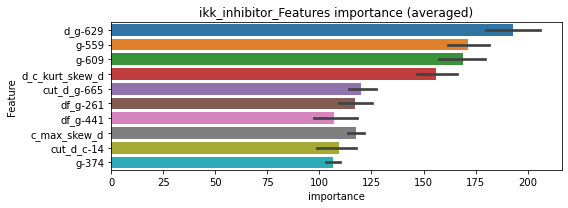

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 ikk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[811]	training's binary_logloss: 0.0003688	valid_1's binary_logloss: 0.00634665


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 ikk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000346271	valid_1's binary_logloss: 0.00141502
Early stopping, best iteration is:
[995]	training's binary_logloss: 0.000346271	valid_1's binary_logloss: 0.00141502


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 ikk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[964]	training's binary_logloss: 0.000349118	valid_1's binary_logloss: 0.000978709


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 ikk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000348024	valid_1's binary_logloss: 0.00122969
Early stopping, best iteration is:
[1036]	training's binary_logloss: 0.000346217	valid_1's binary_logloss: 0.00122427


ikk_inhibitor logloss: 0.002491164404468722
imidazoline_receptor_agonist, len(trt): 31, len(othr): 3287
target_rate: 0.0013018 → Adj_target_rate: 0.0015554


selected negative label: 3287


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[613]	training's binary_logloss: 0.000364837	valid_1's binary_logloss: 0.004047
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[564]	training's binary_logloss: 0.000371811	valid_1's binary_logloss: 0.00830447
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[635]	training's binary_logloss: 0.000357398	valid_1's binary_logloss: 0.00129696
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0020774, Threshold: 0.0105888, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[598]	training's binary_logloss: 0.000367097	valid_1's binary_logloss: 0.00328439


Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00130
Num_p_label: 40.0, Expected: 5.2, Threshold: 0.0105888, conf_0:0.00741, conf_1:0.01377
Num_p_label: 12.0, Expected: 5.2, Adj_threshold_1: 0.0405888
threshold: 0.0405888, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[561]	training's binary_logloss: 0.000367272	valid_1's binary_logloss: 0.0038743
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[564]	training's binary_logloss: 0.000352165	valid_1's binary_logloss: 0.00991952
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[589]	training's binary_logloss: 0.000358102	valid_1's binary_logloss: 0.00118494
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0324969, Threshold: 0.0405888, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[586]	training's binary_logloss: 0.000357305	valid_1's binary_logloss: 0.00261583


Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0075339 Vs.target_rate: 0.00130
Num_p_label: 30.0, Expected: 5.2, Threshold: 0.0405888, conf_0:0.03247, conf_1:0.04871
Num_p_label: 17.0, Expected: 5.2, Adj_threshold_1: 0.0705888
Num_p_label: 13.0, Expected: 5.2, Adj_threshold_2: 0.1005888
Num_p_label: 11.0, Expected: 5.2, Adj_threshold_3: 0.1305888
threshold: 0.1305888, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[561]	training's binary_logloss: 0.000367272	valid_1's binary_logloss: 0.0038743
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[564]	training's binary_logloss: 0.000352165	valid_1's binary_logloss: 0.00991952
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[589]	training's binary_logloss: 0.000358102	valid_1's binary_logloss: 0.00118494
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0324969, Threshold: 0.1305888, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[586]	training's binary_logloss: 0.000357305	valid_1's binary_logloss: 0.00261583


Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0027624 Vs.target_rate: 0.00130
Num_p_label: 11.0, Expected: 5.2, Threshold: 0.1305888, conf_0:0.11753, conf_1:0.14365
threshold: 0.1305888, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


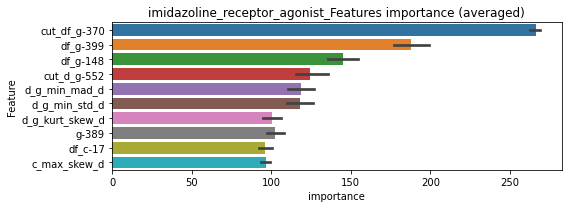

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 imidazoline_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[866]	training's binary_logloss: 0.000361607	valid_1's binary_logloss: 0.00289759


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 imidazoline_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2859


Early stopping, best iteration is:
[697]	training's binary_logloss: 0.000389159	valid_1's binary_logloss: 0.00955427


len(valid_index) : 953
================================= fold 3/4 imidazoline_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[927]	training's binary_logloss: 0.000359394	valid_1's binary_logloss: 0.00106976


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 imidazoline_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[797]	training's binary_logloss: 0.000373206	valid_1's binary_logloss: 0.00219253


imidazoline_receptor_agonist logloss: 0.003928539198150835
immunosuppressant, len(trt): 73, len(othr): 3274
target_rate: 0.0030654 → Adj_target_rate: 0.0032212


selected negative label: 3274


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[538]	training's binary_logloss: 0.00105675	valid_1's binary_logloss: 0.0332413
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[581]	training's binary_logloss: 0.000899642	valid_1's binary_logloss: 0.0341297
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[676]	training's binary_logloss: 0.000713032	valid_1's binary_logloss: 0.0264022
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[545]	training's binary_logloss: 0.00104688	valid_1's binary_logloss: 0.0338575


1 / 3, AUC score:0.999, PR-AUC:0.998
y_Threshold: 0.0075943, Threshold: 0.0199608, pos_neg_ratio: 0.8000000
Remove_noisy_data: 138 → Positive_corect_labels: 651/3790
p_label_rate: 0.0100452 Vs.target_rate: 0.00307
Num_p_label: 40.0, Expected: 12.2, Threshold: 0.0199608, conf_0:0.01397, conf_1:0.02595
Num_p_label: 8.0, Expected: 12.2, Adj_threshold_1: 0.0499608
threshold: 0.0499608, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 651.0/3790, y_label_rate: 0.1717678
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[748]	training's binary_logloss: 0.000622216	valid_1's binary_logloss: 0.0154128
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[536]	training's binary_logloss: 0.000980876	valid_1's binary_logloss: 0.0432425
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[708]	training's binary_logloss: 0.000643678	valid_1's binary_logloss: 0.0219195
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[734]	training's binary_logloss: 0.000639158	valid_1's binary_logloss: 0.0147307


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0320153, Threshold: 0.0499608, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 648.0/3784
p_label_rate: 0.0035158 Vs.target_rate: 0.00307
Num_p_label: 14.0, Expected: 12.2, Threshold: 0.0499608, conf_0:0.03997, conf_1:0.05995
threshold: 0.0499608, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 648.0/3784, y_label_rate: 0.1712474
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[792]	training's binary_logloss: 0.000584501	valid_1's binary_logloss: 0.0210426
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[570]	training's binary_logloss: 0.000876322	valid_1's binary_logloss: 0.0353802
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[522]	training's binary_logloss: 0.00104984	valid_1's binary_logloss: 0.0309517
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[862]	training's binary_logloss: 0.000566467	valid_1's binary_logloss: 0.0124064


3 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0212811, Threshold: 0.0499608, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 646.0/3780
p_label_rate: 0.0035158 Vs.target_rate: 0.00307
Num_p_label: 14.0, Expected: 12.2, Threshold: 0.0499608, conf_0:0.04496, conf_1:0.05496
threshold: 0.0499608, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 646.0/3780, y_label_rate: 0.1708995


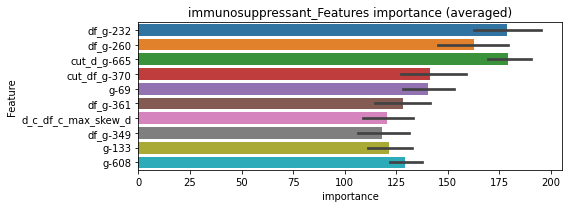

len(train_index) : 2835
len(valid_index) : 945
================================= fold 1/4 immunosuppressant=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2835
len(valid_index) : 945
================================= fold 2/4 immunosuppressant=================================


Early stopping, best iteration is:
[448]	training's binary_logloss: 0.00114494	valid_1's binary_logloss: 0.036132
Training until validation scores don't improve for 30 rounds


len(train_index) : 2835
len(valid_index) : 945
================================= fold 3/4 immunosuppressant=================================


Early stopping, best iteration is:
[225]	training's binary_logloss: 0.00272294	valid_1's binary_logloss: 0.0449469
Training until validation scores don't improve for 30 rounds


len(train_index) : 2835


Early stopping, best iteration is:
[576]	training's binary_logloss: 0.000905702	valid_1's binary_logloss: 0.020348


len(valid_index) : 945
================================= fold 4/4 immunosuppressant=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[823]	training's binary_logloss: 0.000666866	valid_1's binary_logloss: 0.0099443


immunosuppressant logloss: 0.02784280104232612
insulin_secretagogue, len(trt): 30, len(othr): 3282
target_rate: 0.0012598 → Adj_target_rate: 0.0015127


selected negative label: 3282


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[497]	training's binary_logloss: 0.000497364	valid_1's binary_logloss: 0.00985468
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[605]	training's binary_logloss: 0.000414796	valid_1's binary_logloss: 0.00445914
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[615]	training's binary_logloss: 0.00041992	valid_1's binary_logloss: 0.0013584
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0026322, Threshold: 0.0095505, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3806


Early stopping, best iteration is:
[577]	training's binary_logloss: 0.000425135	valid_1's binary_logloss: 0.0063728


p_label_rate: 0.0100452 Vs.target_rate: 0.00126
Num_p_label: 40.0, Expected: 5.0, Threshold: 0.0095505, conf_0:0.00669, conf_1:0.01242
Num_p_label: 10.0, Expected: 5.0, Adj_threshold_1: 0.0395505
threshold: 0.0395505, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[566]	training's binary_logloss: 0.000409945	valid_1's binary_logloss: 0.00961435
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[591]	training's binary_logloss: 0.000410038	valid_1's binary_logloss: 0.00323144
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[568]	training's binary_logloss: 0.000424362	valid_1's binary_logloss: 0.00102082
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0199224, Threshold: 0.0395505, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[548]	training's binary_logloss: 0.000434494	valid_1's binary_logloss: 0.00650048


Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3806
p_label_rate: 0.0072828 Vs.target_rate: 0.00126
Num_p_label: 29.0, Expected: 5.0, Threshold: 0.0395505, conf_0:0.03164, conf_1:0.04746
Num_p_label: 20.0, Expected: 5.0, Adj_threshold_1: 0.0695505
Num_p_label: 13.0, Expected: 5.0, Adj_threshold_2: 0.0995505
Num_p_label: 10.0, Expected: 5.0, Adj_threshold_3: 0.1295505
threshold: 0.1295505, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[566]	training's binary_logloss: 0.000409945	valid_1's binary_logloss: 0.00961435
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[591]	training's binary_logloss: 0.000410038	valid_1's binary_logloss: 0.00323144
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[568]	training's binary_logloss: 0.000424362	valid_1's binary_logloss: 0.00102082
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0199224, Threshold: 0.1295505, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3806


Early stopping, best iteration is:
[548]	training's binary_logloss: 0.000434494	valid_1's binary_logloss: 0.00650048


p_label_rate: 0.0025113 Vs.target_rate: 0.00126
Num_p_label: 10.0, Expected: 5.0, Threshold: 0.1295505, conf_0:0.11660, conf_1:0.14251
threshold: 0.1295505, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 656.0/3806, y_label_rate: 0.1723594


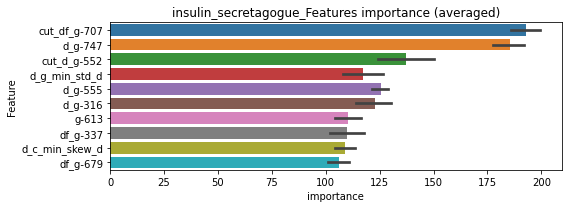

len(train_index) : 2854
len(valid_index) : 952
================================= fold 1/4 insulin_secretagogue=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[638]	training's binary_logloss: 0.000469089	valid_1's binary_logloss: 0.00810936


len(train_index) : 2854
len(valid_index) : 952
================================= fold 2/4 insulin_secretagogue=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[806]	training's binary_logloss: 0.000420956	valid_1's binary_logloss: 0.00337251


len(train_index) : 2855
len(valid_index) : 951
================================= fold 3/4 insulin_secretagogue=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[883]	training's binary_logloss: 0.00041297	valid_1's binary_logloss: 0.000979637


len(train_index) : 2855
len(valid_index) : 951
================================= fold 4/4 insulin_secretagogue=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[501]	training's binary_logloss: 0.000578389	valid_1's binary_logloss: 0.00693226


insulin_secretagogue logloss: 0.00484891162973953
insulin_sensitizer, len(trt): 51, len(othr): 3279
target_rate: 0.0021416 → Adj_target_rate: 0.0023748


selected negative label: 3279


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[621]	training's binary_logloss: 0.000544983	valid_1's binary_logloss: 0.0131752
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[679]	training's binary_logloss: 0.000499772	valid_1's binary_logloss: 0.00463357
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[572]	training's binary_logloss: 0.000617017	valid_1's binary_logloss: 0.0147257
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[621]	training's binary_logloss: 0.000526162	valid_1's binary_logloss: 0.024258


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0040643, Threshold: 0.0094616, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 655/3802
p_label_rate: 0.0100452 Vs.target_rate: 0.00214
Num_p_label: 40.0, Expected: 8.5, Threshold: 0.0094616, conf_0:0.00662, conf_1:0.01230
Num_p_label: 1.0, Expected: 8.5, Adj_threshold_1: 0.0394616
threshold: 0.0394616, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 655.0/3802, y_label_rate: 0.1722777
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[565]	training's binary_logloss: 0.000608751	valid_1's binary_logloss: 0.0107173
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[710]	training's binary_logloss: 0.000482078	valid_1's binary_logloss: 0.00418814
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[676]	training's binary_logloss: 0.000494296	valid_1's binary_logloss: 0.0142453
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0195630, Threshold: 0.0394616, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[500]	training's binary_logloss: 0.000741519	valid_1's binary_logloss: 0.0253191


Remove_noisy_data: 6 → Positive_corect_labels: 652.0/3796
p_label_rate: 0.0027624 Vs.target_rate: 0.00214
Num_p_label: 11.0, Expected: 8.5, Threshold: 0.0394616, conf_0:0.03157, conf_1:0.04735
threshold: 0.0394616, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 652.0/3796, y_label_rate: 0.1717597
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[720]	training's binary_logloss: 0.000476129	valid_1's binary_logloss: 0.00848695
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[590]	training's binary_logloss: 0.000542133	valid_1's binary_logloss: 0.0115383
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[678]	training's binary_logloss: 0.000490158	valid_1's binary_logloss: 0.00571691
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[674]	training's binary_logloss: 0.000481274	valid_1's binary_logloss: 0.0129415


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0180533, Threshold: 0.0394616, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 652.0/3796
p_label_rate: 0.0022602 Vs.target_rate: 0.00214
Num_p_label: 9.0, Expected: 8.5, Threshold: 0.0394616, conf_0:0.03552, conf_1:0.04341
threshold: 0.0394616, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 652.0/3796, y_label_rate: 0.1717597


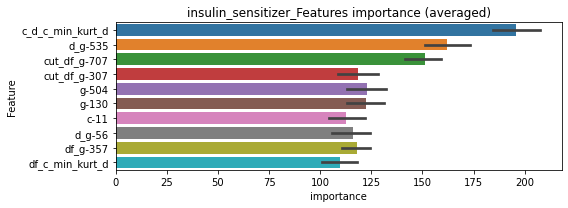

len(train_index) : 2847
len(valid_index) : 949
================================= fold 1/4 insulin_sensitizer=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[900]	training's binary_logloss: 0.000493853	valid_1's binary_logloss: 0.00778404


len(train_index) : 2847
len(valid_index) : 949
================================= fold 2/4 insulin_sensitizer=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[736]	training's binary_logloss: 0.00054197	valid_1's binary_logloss: 0.0139192


len(train_index) : 2847
len(valid_index) : 949
================================= fold 3/4 insulin_sensitizer=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[763]	training's binary_logloss: 0.000538101	valid_1's binary_logloss: 0.00731295


len(train_index) : 2847
len(valid_index) : 949
================================= fold 4/4 insulin_sensitizer=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[899]	training's binary_logloss: 0.000488759	valid_1's binary_logloss: 0.0103499


insulin_sensitizer logloss: 0.009843919465856794
integrin_inhibitor, len(trt): 42, len(othr): 3281
target_rate: 0.0017637 → Adj_target_rate: 0.0020135


selected negative label: 3281


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[673]	training's binary_logloss: 0.000444684	valid_1's binary_logloss: 0.0116542
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[685]	training's binary_logloss: 0.000463311	valid_1's binary_logloss: 0.0064329
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[721]	training's binary_logloss: 0.000458436	valid_1's binary_logloss: 0.00363258
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[693]	training's binary_logloss: 0.000453847	valid_1's binary_logloss: 0.0064534


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0041860, Threshold: 0.0150840, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3805
p_label_rate: 0.0100452 Vs.target_rate: 0.00176
Num_p_label: 40.0, Expected: 7.0, Threshold: 0.0150840, conf_0:0.01056, conf_1:0.01961
Num_p_label: 8.0, Expected: 7.0, Adj_threshold_1: 0.0450840
threshold: 0.0450840, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 656.0/3805, y_label_rate: 0.1724047
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[563]	training's binary_logloss: 0.000538312	valid_1's binary_logloss: 0.0110069
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[660]	training's binary_logloss: 0.000449335	valid_1's binary_logloss: 0.00571183
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[674]	training's binary_logloss: 0.000463504	valid_1's binary_logloss: 0.0035328
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[688]	training's binary_logloss: 0.000437082	valid_1's binary_logloss: 0.00692465


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0492291, Threshold: 0.0450840, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3805
p_label_rate: 0.0077850 Vs.target_rate: 0.00176
Num_p_label: 31.0, Expected: 7.0, Threshold: 0.0450840, conf_0:0.03607, conf_1:0.05410
Num_p_label: 15.0, Expected: 7.0, Adj_threshold_1: 0.0750840
threshold: 0.0750840, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 656.0/3805, y_label_rate: 0.1724047
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[563]	training's binary_logloss: 0.000538312	valid_1's binary_logloss: 0.0110069
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[660]	training's binary_logloss: 0.000449335	valid_1's binary_logloss: 0.00571183
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[674]	training's binary_logloss: 0.000463504	valid_1's binary_logloss: 0.0035328
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[688]	training's binary_logloss: 0.000437082	valid_1's binary_logloss: 0.00692465


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0492291, Threshold: 0.0750840, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3805
p_label_rate: 0.0037670 Vs.target_rate: 0.00176
Num_p_label: 15.0, Expected: 7.0, Threshold: 0.0750840, conf_0:0.06758, conf_1:0.08259
threshold: 0.0750840, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 656.0/3805, y_label_rate: 0.1724047


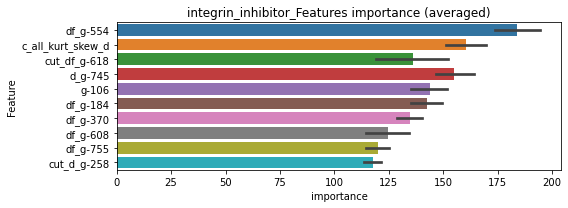

len(train_index) : 2853
len(valid_index) : 952
================================= fold 1/4 integrin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[757]	training's binary_logloss: 0.000494924	valid_1's binary_logloss: 0.0114734


len(train_index) : 2854
len(valid_index) : 951
================================= fold 2/4 integrin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[903]	training's binary_logloss: 0.000455094	valid_1's binary_logloss: 0.00565082


len(train_index) : 2854
len(valid_index) : 951
================================= fold 3/4 integrin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00044846	valid_1's binary_logloss: 0.00401249
Early stopping, best iteration is:
[1053]	training's binary_logloss: 0.000441761	valid_1's binary_logloss: 0.00398799


len(train_index) : 2854
len(valid_index) : 951
================================= fold 4/4 integrin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000438654	valid_1's binary_logloss: 0.00627531
Early stopping, best iteration is:
[1025]	training's binary_logloss: 0.000434665	valid_1's binary_logloss: 0.00625568


integrin_inhibitor logloss: 0.006844108729168632
jak_inhibitor, len(trt): 92, len(othr): 3277
target_rate: 0.0038633 → Adj_target_rate: 0.0039212


selected negative label: 3277


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[700]	training's binary_logloss: 0.000849105	valid_1's binary_logloss: 0.0527698
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[630]	training's binary_logloss: 0.00102718	valid_1's binary_logloss: 0.0407359
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[728]	training's binary_logloss: 0.000838563	valid_1's binary_logloss: 0.0186958
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[688]	training's binary_logloss: 0.000900336	valid_1's binary_logloss: 0.0363246


1 / 3, AUC score:0.998, PR-AUC:0.995
y_Threshold: 0.0094625, Threshold: 0.1358948, pos_neg_ratio: 0.8000000
Remove_noisy_data: 142 → Positive_corect_labels: 650/3790
p_label_rate: 0.0100452 Vs.target_rate: 0.00386
Num_p_label: 40.0, Expected: 15.4, Threshold: 0.1358948, conf_0:0.09513, conf_1:0.17666
Num_p_label: 38.0, Expected: 15.4, Adj_threshold_1: 0.1658948
Num_p_label: 34.0, Expected: 15.4, Adj_threshold_2: 0.1958948
Num_p_label: 33.0, Expected: 15.4, Adj_threshold_3: 0.2258948
Num_p_label: 28.0, Expected: 15.4, Adj_threshold_4: 0.2558948
Num_p_label: 25.0, Expected: 15.4, Adj_threshold_5: 0.2858948
Num_p_label: 24.0, Expected: 15.4, Adj_threshold_6: 0.3158948
Num_p_label: 21.0, Expected: 15.4, Adj_threshold_7: 0.3458948
threshold: 0.3458948, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 650.0/3790, y_label_rate: 0.1715040
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[758]	training's binary_logloss: 0.000733924	valid_1's binary_logloss: 0.0261039
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[768]	training's binary_logloss: 0.000728054	valid_1's binary_logloss: 0.0303515
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[794]	training's binary_logloss: 0.000699749	valid_1's binary_logloss: 0.0282019
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[790]	training's binary_logloss: 0.000706406	valid_1's binary_logloss: 0.0321901


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0410138, Threshold: 0.3458948, pos_neg_ratio: 0.8000000
Remove_noisy_data: 10 → Positive_corect_labels: 645.0/3780
p_label_rate: 0.0095429 Vs.target_rate: 0.00386
Num_p_label: 38.0, Expected: 15.4, Threshold: 0.3458948, conf_0:0.27672, conf_1:0.41507
Num_p_label: 35.0, Expected: 15.4, Adj_threshold_1: 0.3758948
Num_p_label: 33.0, Expected: 15.4, Adj_threshold_2: 0.4058948
Num_p_label: 32.0, Expected: 15.4, Adj_threshold_3: 0.4358948
Num_p_label: 27.0, Expected: 15.4, Adj_threshold_4: 0.4658948
Num_p_label: 26.0, Expected: 15.4, Adj_threshold_5: 0.4958948
Num_p_label: 25.0, Expected: 15.4, Adj_threshold_6: 0.5258948
Num_p_label: 23.0, Expected: 15.4, Adj_threshold_7: 0.5558948
threshold: 0.5558948, positive_p_label: 23.0/3982, p_label_rate: 0.0057760
positive_y_label: 645.0/3780, y_label_rate: 0.1706349
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[531]	training's binary_logloss: 0.00130923	valid_1's binary_logloss: 0.0339822
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[809]	training's binary_logloss: 0.000674767	valid_1's binary_logloss: 0.0262572
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[788]	training's binary_logloss: 0.00070434	valid_1's binary_logloss: 0.0190903
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[854]	training's binary_logloss: 0.000640758	valid_1's binary_logloss: 0.0315764


3 / 3, AUC score:0.999, PR-AUC:0.999
y_Threshold: 0.0432980, Threshold: 0.5558948, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 642.0/3774
p_label_rate: 0.0055249 Vs.target_rate: 0.00386
Num_p_label: 22.0, Expected: 15.4, Threshold: 0.5558948, conf_0:0.50031, conf_1:0.61148
threshold: 0.5558948, positive_p_label: 22.0/3982, p_label_rate: 0.0055249
positive_y_label: 642.0/3774, y_label_rate: 0.1701113


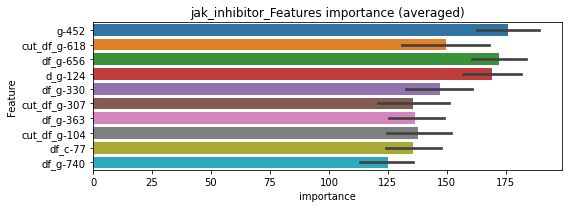

len(train_index) : 2830
len(valid_index) : 944
================================= fold 1/4 jak_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[729]	training's binary_logloss: 0.000844168	valid_1's binary_logloss: 0.0285577


len(train_index) : 2830
len(valid_index) : 944
================================= fold 2/4 jak_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2831
len(valid_index) : 943
================================= fold 3/4 jak_inhibitor=================================


Early stopping, best iteration is:
[449]	training's binary_logloss: 0.00136758	valid_1's binary_logloss: 0.0301914
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000689858	valid_1's binary_logloss: 0.016037
Early stopping, best iteration is:
[1000]	training's binary_logloss: 0.000689858	valid_1's binary_logloss: 0.016037


len(train_index) : 2831
len(valid_index) : 943
================================= fold 4/4 jak_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[560]	training's binary_logloss: 0.00109171	valid_1's binary_logloss: 0.0264107


jak_inhibitor logloss: 0.02530134835441851


mutually exclusive columns: kit_inhibitor


kit_inhibitor, len(trt): 273, len(othr): 6846
target_rate: 0.0114638 → Adj_target_rate: 0.0098841


selected negative label: 6846


unpredictable_cols:kit_inhibitor → create_features


N_features:358
================= Pseudo labeling 1 / 3 =================



Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0420601	valid_1's binary_logloss: 0.126982
[2000]	training's binary_logloss: 0.0198762	valid_1's binary_logloss: 0.111246
Early stopping, best iteration is:
[2543]	training's binary_logloss: 0.0152793	valid_1's binary_logloss: 0.107456
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0410293	valid_1's binary_logloss: 0.138532
Early stopping, best iteration is:
[1966]	training's binary_logloss: 0.0197877	valid_1's binary_logloss: 0.124435
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0428087	valid_1's binary_logloss: 0.117671
[2000]	training's binary_logloss: 0.0203059	valid_1's binary_logloss: 0.0991058
Early stopping, best iteration is:
[2643]	training's binary_logloss: 0.0149717	valid_1's binary_logloss: 0.0941798
Training until validation scores don't improve for 30 rounds
[1000]	training'

1 / 3, AUC score:0.980, PR-AUC:0.960
y_Threshold: 0.0630903, Threshold: 0.1385074, pos_neg_ratio: 0.8000000
Remove_noisy_data: 452 → Positive_corect_labels: 1280/7763
p_label_rate: 0.0100452 Vs.target_rate: 0.01146
Num_p_label: 40.0, Expected: 45.6, Threshold: 0.1385074, conf_0:0.09696, conf_1:0.18006
threshold: 0.1385074, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1280.0/7763, y_label_rate: 0.1648847
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0327642	valid_1's binary_logloss: 0.103457
[2000]	training's binary_logloss: 0.0156575	valid_1's binary_logloss: 0.0874755
[3000]	training's binary_logloss: 0.0101609	valid_1's binary_logloss: 0.0820049
Early stopping, best iteration is:
[3266]	training's binary_logloss: 0.0092818	valid_1's binary_logloss: 0.0810199
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0323888	valid_1's binary_logloss: 0.111254
[2000]	training's binary_logloss: 0.0154896	valid_1's binary_logloss: 0.0964946
Early stopping, best iteration is:
[2638]	training's binary_logloss: 0.0115321	valid_1's binary_logloss: 0.0927736
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0339485	valid_1's binary_logloss: 0.0848077
[2000]	training's binary_logloss: 0.0162418	valid_1's binary_logloss: 0.0678067
[3000]	training's binary_logl

2 / 3, AUC score:0.996, PR-AUC:0.990
y_Threshold: 0.0756854, Threshold: 0.1385074, pos_neg_ratio: 0.8000000
Remove_noisy_data: 108 → Positive_corect_labels: 1226.0/7655
p_label_rate: 0.0113009 Vs.target_rate: 0.01146
Num_p_label: 45.0, Expected: 45.6, Threshold: 0.1385074, conf_0:0.11081, conf_1:0.16621
threshold: 0.1385074, positive_p_label: 45.0/3982, p_label_rate: 0.0113009
positive_y_label: 1226.0/7655, y_label_rate: 0.1601568
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0289397	valid_1's binary_logloss: 0.0887961
[2000]	training's binary_logloss: 0.0139531	valid_1's binary_logloss: 0.074928
Early stopping, best iteration is:
[2904]	training's binary_logloss: 0.00943012	valid_1's binary_logloss: 0.0703653
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0296904	valid_1's binary_logloss: 0.0853373
[2000]	training's binary_logloss: 0.0142892	valid_1's binary_logloss: 0.071019
[3000]	training's binary_logloss: 0.00933793	valid_1's binary_logloss: 0.0656304
Early stopping, best iteration is:
[3070]	training's binary_logloss: 0.00911603	valid_1's binary_logloss: 0.0653793
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0300211	valid_1's binary_logloss: 0.0788431
[2000]	training's binary_logloss: 0.0144391	valid_1's binary_logloss: 0.0638062
[3000]	training's binary_l

3 / 3, AUC score:0.998, PR-AUC:0.994
y_Threshold: 0.0784154, Threshold: 0.1385074, pos_neg_ratio: 0.8000000
Remove_noisy_data: 70 → Positive_corect_labels: 1191.0/7585
p_label_rate: 0.0120542 Vs.target_rate: 0.01146
Num_p_label: 48.0, Expected: 45.6, Threshold: 0.1385074, conf_0:0.12466, conf_1:0.15236
threshold: 0.1385074, positive_p_label: 48.0/3982, p_label_rate: 0.0120542
positive_y_label: 1191.0/7585, y_label_rate: 0.1570204


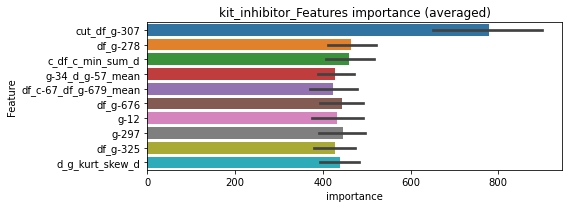

len(train_index) : 5688
len(valid_index) : 1897
================================= fold 1/4 kit_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0277072	valid_1's binary_logloss: 0.0764899
[2000]	training's binary_logloss: 0.0132676	valid_1's binary_logloss: 0.0606681
[3000]	training's binary_logloss: 0.00865888	valid_1's binary_logloss: 0.0548353
[4000]	training's binary_logloss: 0.00640765	valid_1's binary_logloss: 0.0519024
Early stopping, best iteration is:
[4156]	training's binary_logloss: 0.00616041	valid_1's binary_logloss: 0.0515438


len(train_index) : 5689
len(valid_index) : 1896
================================= fold 2/4 kit_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0274441	valid_1's binary_logloss: 0.0769599
[2000]	training's binary_logloss: 0.0131827	valid_1's binary_logloss: 0.0614455
[3000]	training's binary_logloss: 0.00857861	valid_1's binary_logloss: 0.0557652
Early stopping, best iteration is:
[3495]	training's binary_logloss: 0.00731931	valid_1's binary_logloss: 0.0540557


len(train_index) : 5689
len(valid_index) : 1896
================================= fold 3/4 kit_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0276535	valid_1's binary_logloss: 0.0694156
[2000]	training's binary_logloss: 0.0133219	valid_1's binary_logloss: 0.0548046
[3000]	training's binary_logloss: 0.00870207	valid_1's binary_logloss: 0.0493652
Early stopping, best iteration is:
[3960]	training's binary_logloss: 0.00653003	valid_1's binary_logloss: 0.0468443


len(train_index) : 5689
len(valid_index) : 1896
================================= fold 4/4 kit_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.027958	valid_1's binary_logloss: 0.0658852
[2000]	training's binary_logloss: 0.0134048	valid_1's binary_logloss: 0.0511765
[3000]	training's binary_logloss: 0.00876919	valid_1's binary_logloss: 0.0460624
Early stopping, best iteration is:
[3899]	training's binary_logloss: 0.00668043	valid_1's binary_logloss: 0.0438383


kit_inhibitor logloss: 0.049070846918540995
kit_inhibitor is unpredictable(><)!
laxative, len(trt): 6, len(othr): 3288
target_rate: 0.0002520 → Adj_target_rate: 0.0003851


selected negative label: 3288


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[490]	training's binary_logloss: 0.000151629	valid_1's binary_logloss: 0.000205264
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[516]	training's binary_logloss: 0.000150364	valid_1's binary_logloss: 0.00131376
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[491]	training's binary_logloss: 0.00015257	valid_1's binary_logloss: 0.000180769
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0004397, Threshold: 0.0012073, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00025
Num_p_label: 40.0, Expected: 1.0, Threshold: 0.0012073, conf_0:0.00085, conf_1:0.00157
Num_p_label: 0.0, Expected: 1.0, Adj_threshold_1: 0.0312073
threshold: 0.0312073, positive_p_label: 0.0/3982, p_label_rate: 0.0000000


Early stopping, best iteration is:
[498]	training's binary_logloss: 0.000153742	valid_1's binary_logloss: 0.000205757


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[513]	training's binary_logloss: 0.000144565	valid_1's binary_logloss: 0.000178753
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[404]	training's binary_logloss: 0.00016769	valid_1's binary_logloss: 0.00117926
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[528]	training's binary_logloss: 0.000143831	valid_1's binary_logloss: 0.000151913
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0698625, Threshold: 0.0312073, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0012557 Vs.target_rate: 0.00025
Num_p_label: 5.0, Expected: 1.0, Threshold: 0.0312073, conf_0:0.02497, conf_1:0.03745
Num_p_label: 4.0, Expected: 1.0, Adj_threshold_1: 0.0612073
Num_p_label: 1.0, Expected: 1.0, Adj_threshold_2: 0.0912073
threshold: 0.0912073, positive_p_label: 1.0/3982, p_label_rate: 0.0002511


Early stopping, best iteration is:
[525]	training's binary_logloss: 0.000142854	valid_1's binary_logloss: 0.000186406


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[518]	training's binary_logloss: 0.000144565	valid_1's binary_logloss: 0.000178753
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[404]	training's binary_logloss: 0.00016769	valid_1's binary_logloss: 0.00117926
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[526]	training's binary_logloss: 0.000143831	valid_1's binary_logloss: 0.000151913
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0698625, Threshold: 0.0912073, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0002511 Vs.target_rate: 0.00025
Num_p_label: 1.0, Expected: 1.0, Threshold: 0.0912073, conf_0:0.08209, conf_1:0.10033
threshold: 0.0912073, positive_p_label: 1.0/3982, p_label_rate: 0.0002511


Early stopping, best iteration is:
[525]	training's binary_logloss: 0.000142854	valid_1's binary_logloss: 0.000186406


positive_y_label: 657.0/3813, y_label_rate: 0.1723053


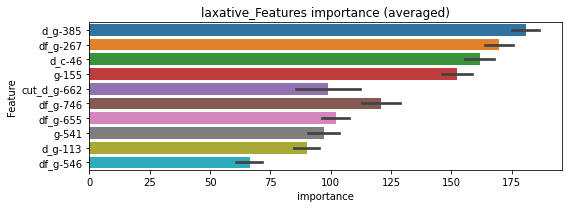

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 laxative=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000148116	valid_1's binary_logloss: 0.000188387


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 laxative=================================


Early stopping, best iteration is:
[1144]	training's binary_logloss: 0.000145237	valid_1's binary_logloss: 0.00018476
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00014819	valid_1's binary_logloss: 0.00107831
Early stopping, best iteration is:
[1081]	training's binary_logloss: 0.000145923	valid_1's binary_logloss: 0.00107168


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 laxative=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000148285	valid_1's binary_logloss: 0.000154518


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 laxative=================================


Early stopping, best iteration is:
[1165]	training's binary_logloss: 0.000145605	valid_1's binary_logloss: 0.0001516
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000148298	valid_1's binary_logloss: 0.000184681


laxative logloss: 0.00039715330542780406


Early stopping, best iteration is:
[1200]	training's binary_logloss: 0.000144997	valid_1's binary_logloss: 0.000180792


leukotriene_inhibitor, len(trt): 6, len(othr): 3287
target_rate: 0.0002520 → Adj_target_rate: 0.0003851


selected negative label: 3287


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[480]	training's binary_logloss: 0.000161678	valid_1's binary_logloss: 0.000441019
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[472]	training's binary_logloss: 0.000159265	valid_1's binary_logloss: 0.00589004
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[488]	training's binary_logloss: 0.000160039	valid_1's binary_logloss: 0.000192516
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0005287, Threshold: 0.0012457, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00025
Num_p_label: 40.0, Expected: 1.0, Threshold: 0.0012457, conf_0:0.00087, conf_1:0.00162
Num_p_label: 1.0, Expected: 1.0, Adj_threshold_1: 0.0312457
threshold: 0.0312457, positive_p_label: 1.0/3982, p_label_rate: 0.0002511


Early stopping, best iteration is:
[491]	training's binary_logloss: 0.000157941	valid_1's binary_logloss: 0.000195816


positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[481]	training's binary_logloss: 0.000151638	valid_1's binary_logloss: 0.000642826
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[496]	training's binary_logloss: 0.000150653	valid_1's binary_logloss: 0.00203004
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[487]	training's binary_logloss: 0.000151877	valid_1's binary_logloss: 0.000156806
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0330468, Threshold: 0.0312457, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0017579 Vs.target_rate: 0.00025
Num_p_label: 7.0, Expected: 1.0, Threshold: 0.0312457, conf_0:0.02500, conf_1:0.03749
Num_p_label: 4.0, Expected: 1.0, Adj_threshold_1: 0.0612457
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_2: 0.0912457
Num_p_label: 2.0, Expected: 1.0, Adj_threshold_3: 0.1212457
threshold: 0.1212457, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[513]	training's binary_logloss: 0.000150601	valid_1's binary_logloss: 0.000174375


positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[481]	training's binary_logloss: 0.000151638	valid_1's binary_logloss: 0.000642826
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[496]	training's binary_logloss: 0.000150653	valid_1's binary_logloss: 0.00203004
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[487]	training's binary_logloss: 0.000151877	valid_1's binary_logloss: 0.000156806
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0330468, Threshold: 0.1212457, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0005023 Vs.target_rate: 0.00025
Num_p_label: 2.0, Expected: 1.0, Threshold: 0.1212457, conf_0:0.10912, conf_1:0.13337
threshold: 0.1212457, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[498]	training's binary_logloss: 0.000150601	valid_1's binary_logloss: 0.000174375


positive_y_label: 657.0/3812, y_label_rate: 0.1723505


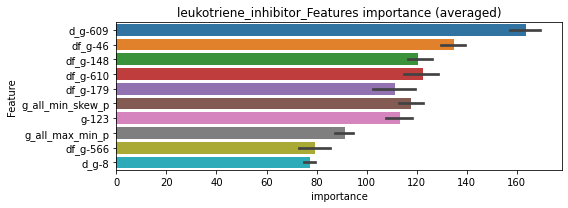

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 leukotriene_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000151075	valid_1's binary_logloss: 0.000398653
Early stopping, best iteration is:
[1033]	training's binary_logloss: 0.000150609	valid_1's binary_logloss: 0.000398096


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 leukotriene_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000151823	valid_1's binary_logloss: 0.000848363
Early stopping, best iteration is:
[1078]	training's binary_logloss: 0.000149974	valid_1's binary_logloss: 0.000840596


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 leukotriene_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000151507	valid_1's binary_logloss: 0.000170025


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 leukotriene_inhibitor=================================


Early stopping, best iteration is:
[1125]	training's binary_logloss: 0.000149335	valid_1's binary_logloss: 0.00016766
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000151186	valid_1's binary_logloss: 0.000177482
Early stopping, best iteration is:
[1034]	training's binary_logloss: 0.000150552	valid_1's binary_logloss: 0.000176683


leukotriene_inhibitor logloss: 0.00039576904175668846
leukotriene_receptor_antagonist, len(trt): 62, len(othr): 3281
target_rate: 0.0026035 → Adj_target_rate: 0.0028037


selected negative label: 3281


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[517]	training's binary_logloss: 0.000854648	valid_1's binary_logloss: 0.0375613
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[464]	training's binary_logloss: 0.00107363	valid_1's binary_logloss: 0.0395197
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[717]	training's binary_logloss: 0.000585995	valid_1's binary_logloss: 0.00603745
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[633]	training's binary_logloss: 0.000642538	valid_1's binary_logloss: 0.0195577


1 / 3, AUC score:0.999, PR-AUC:0.998
y_Threshold: 0.0048107, Threshold: 0.0105148, pos_neg_ratio: 0.8000000
Remove_noisy_data: 136 → Positive_corect_labels: 654/3801
p_label_rate: 0.0100452 Vs.target_rate: 0.00260
Num_p_label: 40.0, Expected: 10.4, Threshold: 0.0105148, conf_0:0.00736, conf_1:0.01367
Num_p_label: 2.0, Expected: 10.4, Adj_threshold_1: 0.0405148
threshold: 0.0405148, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 654.0/3801, y_label_rate: 0.1720600
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[537]	training's binary_logloss: 0.000799453	valid_1's binary_logloss: 0.0319101
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[581]	training's binary_logloss: 0.000682273	valid_1's binary_logloss: 0.0264961
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[690]	training's binary_logloss: 0.000573248	valid_1's binary_logloss: 0.0135561
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.000666558	valid_1's binary_logloss: 0.0253063


2 / 3, AUC score:0.999, PR-AUC:0.999
y_Threshold: 0.0179998, Threshold: 0.0405148, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 651.0/3795
p_label_rate: 0.0022602 Vs.target_rate: 0.00260
Num_p_label: 9.0, Expected: 10.4, Threshold: 0.0405148, conf_0:0.03241, conf_1:0.04862
threshold: 0.0405148, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 651.0/3795, y_label_rate: 0.1715415
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[672]	training's binary_logloss: 0.00056791	valid_1's binary_logloss: 0.0170549
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[670]	training's binary_logloss: 0.000563737	valid_1's binary_logloss: 0.0230498
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[572]	training's binary_logloss: 0.000705645	valid_1's binary_logloss: 0.0229493
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[701]	training's binary_logloss: 0.000555968	valid_1's binary_logloss: 0.0137479


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0145327, Threshold: 0.0405148, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 650.0/3793
p_label_rate: 0.0020090 Vs.target_rate: 0.00260
Num_p_label: 8.0, Expected: 10.4, Threshold: 0.0405148, conf_0:0.03646, conf_1:0.04457
threshold: 0.0405148, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 650.0/3793, y_label_rate: 0.1713683


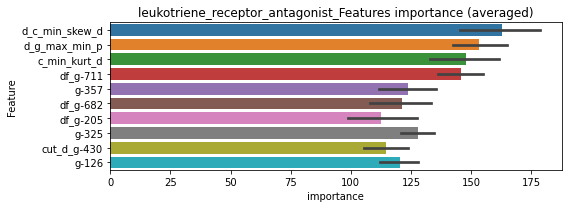

len(train_index) : 2844
len(valid_index) : 949
================================= fold 1/4 leukotriene_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2845
len(valid_index) : 948
================================= fold 2/4 leukotriene_receptor_antagonist=================================


Early stopping, best iteration is:
[419]	training's binary_logloss: 0.00106787	valid_1's binary_logloss: 0.0269797
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[830]	training's binary_logloss: 0.000578189	valid_1's binary_logloss: 0.0163018


len(train_index) : 2845
len(valid_index) : 948
================================= fold 3/4 leukotriene_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[559]	training's binary_logloss: 0.000792577	valid_1's binary_logloss: 0.0209196


len(train_index) : 2845
len(valid_index) : 948
================================= fold 4/4 leukotriene_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


leukotriene_receptor_antagonist logloss: 0.02070457359525463


Early stopping, best iteration is:
[385]	training's binary_logloss: 0.00116877	valid_1's binary_logloss: 0.0186106


lipase_inhibitor, len(trt): 12, len(othr): 3289
target_rate: 0.0005039 → Adj_target_rate: 0.0006942


selected negative label: 3289


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[317]	training's binary_logloss: 0.000471122	valid_1's binary_logloss: 0.00446254
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[534]	training's binary_logloss: 0.000218904	valid_1's binary_logloss: 0.00105138
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[521]	training's binary_logloss: 0.000226703	valid_1's binary_logloss: 0.000300325
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0010954, Threshold: 0.0021892, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00050
Num_p_label: 40.0, Expected: 2.0, Threshold: 0.0021892, conf_0:0.00153, conf_1:0.00285
Num_p_label: 1.0, Expected: 2.0, Adj_threshold_1: 0.0321892
threshold: 0.0321892, positive_p_label: 1.0/3982, p_label_rate: 0.0002511


Early stopping, best iteration is:
[514]	training's binary_logloss: 0.000218257	valid_1's binary_logloss: 0.00102066


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[470]	training's binary_logloss: 0.000222329	valid_1's binary_logloss: 0.00718066
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[526]	training's binary_logloss: 0.000214658	valid_1's binary_logloss: 0.000744318
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[534]	training's binary_logloss: 0.000211409	valid_1's binary_logloss: 0.000253756
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0088729, Threshold: 0.0321892, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0015068 Vs.target_rate: 0.00050
Num_p_label: 6.0, Expected: 2.0, Threshold: 0.0321892, conf_0:0.02575, conf_1:0.03863
Num_p_label: 4.0, Expected: 2.0, Adj_threshold_1: 0.0621892


Early stopping, best iteration is:
[523]	training's binary_logloss: 0.000211843	valid_1's binary_logloss: 0.000979809


threshold: 0.0621892, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[470]	training's binary_logloss: 0.000222329	valid_1's binary_logloss: 0.00718066
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[526]	training's binary_logloss: 0.000214658	valid_1's binary_logloss: 0.000744318
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[534]	training's binary_logloss: 0.000211409	valid_1's binary_logloss: 0.000253756
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0088729, Threshold: 0.0621892, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0010045 Vs.target_rate: 0.00050
Num_p_label: 4.0, Expected: 2.0, Threshold: 0.0621892, conf_0:0.05597, conf_1:0.06841
threshold: 0.0621892, positive_p_label: 4.0/3982, p_label_rate: 0.0010045


Early stopping, best iteration is:
[523]	training's binary_logloss: 0.000211843	valid_1's binary_logloss: 0.000979809


positive_y_label: 657.0/3813, y_label_rate: 0.1723053


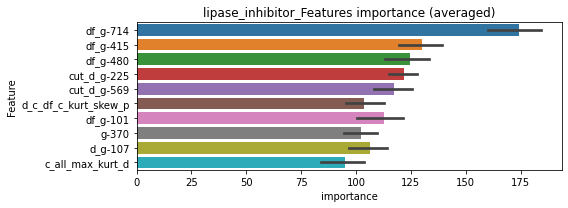

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 lipase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 lipase_inhibitor=================================


Early stopping, best iteration is:
[686]	training's binary_logloss: 0.000236332	valid_1's binary_logloss: 0.00530842
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000213235	valid_1's binary_logloss: 0.000511319
Early stopping, best iteration is:
[1005]	training's binary_logloss: 0.000213109	valid_1's binary_logloss: 0.000511141


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 lipase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000215383	valid_1's binary_logloss: 0.000261968
Early stopping, best iteration is:
[997]	training's binary_logloss: 0.000215383	valid_1's binary_logloss: 0.000261968


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 lipase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000210766	valid_1's binary_logloss: 0.000701453
Early stopping, best iteration is:
[1012]	training's binary_logloss: 0.000210651	valid_1's binary_logloss: 0.000701251


lipase_inhibitor logloss: 0.001696647124141565
lipoxygenase_inhibitor, len(trt): 61, len(othr): 3279
target_rate: 0.0025615 → Adj_target_rate: 0.0027652


selected negative label: 3279


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[630]	training's binary_logloss: 0.000653941	valid_1's binary_logloss: 0.0182028
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[778]	training's binary_logloss: 0.000534551	valid_1's binary_logloss: 0.0104511
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[667]	training's binary_logloss: 0.000610146	valid_1's binary_logloss: 0.0123962
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[579]	training's binary_logloss: 0.000759727	valid_1's binary_logloss: 0.0222648


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0061791, Threshold: 0.0840575, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 654/3800
p_label_rate: 0.0100452 Vs.target_rate: 0.00256
Num_p_label: 40.0, Expected: 10.2, Threshold: 0.0840575, conf_0:0.05884, conf_1:0.10927
Num_p_label: 37.0, Expected: 10.2, Adj_threshold_1: 0.1140575
Num_p_label: 34.0, Expected: 10.2, Adj_threshold_2: 0.1440575
Num_p_label: 30.0, Expected: 10.2, Adj_threshold_3: 0.1740575
Num_p_label: 30.0, Expected: 10.2, Adj_threshold_4: 0.2040575
Num_p_label: 27.0, Expected: 10.2, Adj_threshold_5: 0.2340575
Num_p_label: 25.0, Expected: 10.2, Adj_threshold_6: 0.2640575
Num_p_label: 24.0, Expected: 10.2, Adj_threshold_7: 0.2940575
Num_p_label: 24.0, Expected: 10.2, Adj_threshold_8: 0.3240575
Num_p_label: 21.0, Expected: 10.2, Adj_threshold_9: 0.3540575
Num_p_label: 20.0, Expected: 10.2, Adj_threshold_10: 0.3840575
threshold: 0.3840575, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
po

Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[584]	training's binary_logloss: 0.000706988	valid_1's binary_logloss: 0.0227595
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[739]	training's binary_logloss: 0.000532141	valid_1's binary_logloss: 0.017275
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[746]	training's binary_logloss: 0.000541658	valid_1's binary_logloss: 0.00905517
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0248340, Threshold: 0.3840575, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[490]	training's binary_logloss: 0.000946431	valid_1's binary_logloss: 0.0334639


Remove_noisy_data: 6 → Positive_corect_labels: 651.0/3794
p_label_rate: 0.0095429 Vs.target_rate: 0.00256
Num_p_label: 38.0, Expected: 10.2, Threshold: 0.3840575, conf_0:0.30725, conf_1:0.46087
Num_p_label: 35.0, Expected: 10.2, Adj_threshold_1: 0.4140575
Num_p_label: 31.0, Expected: 10.2, Adj_threshold_2: 0.4440575
Num_p_label: 29.0, Expected: 10.2, Adj_threshold_3: 0.4740575
Num_p_label: 29.0, Expected: 10.2, Adj_threshold_4: 0.5040575
Num_p_label: 29.0, Expected: 10.2, Adj_threshold_5: 0.5340575
Num_p_label: 28.0, Expected: 10.2, Adj_threshold_6: 0.5640575
Num_p_label: 25.0, Expected: 10.2, Adj_threshold_7: 0.5940575
Num_p_label: 22.0, Expected: 10.2, Adj_threshold_8: 0.6240575
Num_p_label: 21.0, Expected: 10.2, Adj_threshold_9: 0.6540575
Num_p_label: 19.0, Expected: 10.2, Adj_threshold_10: 0.6840575
threshold: 0.6840575, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 651.0/3794, y_label_rate: 0.1715867
================= Pseudo labeling 3 / 3 ================

Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[466]	training's binary_logloss: 0.00105322	valid_1's binary_logloss: 0.022286
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[664]	training's binary_logloss: 0.000573399	valid_1's binary_logloss: 0.0168662
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[661]	training's binary_logloss: 0.000572722	valid_1's binary_logloss: 0.0112876
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[712]	training's binary_logloss: 0.000543231	valid_1's binary_logloss: 0.0116302


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0259227, Threshold: 0.6840575, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 650.0/3792
p_label_rate: 0.0042692 Vs.target_rate: 0.00256
Num_p_label: 17.0, Expected: 10.2, Threshold: 0.6840575, conf_0:0.61565, conf_1:0.75246
Num_p_label: 17.0, Expected: 10.2, Adj_threshold_1: 0.7140575
Num_p_label: 16.0, Expected: 10.2, Adj_threshold_2: 0.7440575
Num_p_label: 13.0, Expected: 10.2, Adj_threshold_3: 0.7740575
threshold: 0.7740575, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 650.0/3792, y_label_rate: 0.1714135


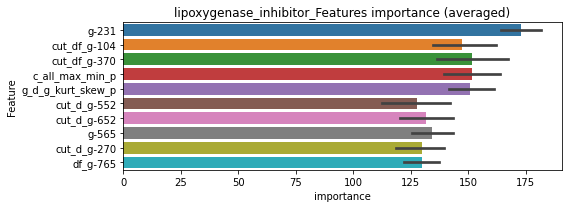

len(train_index) : 2844
len(valid_index) : 948
================================= fold 1/4 lipoxygenase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2844
len(valid_index) : 948


Early stopping, best iteration is:
[589]	training's binary_logloss: 0.000757498	valid_1's binary_logloss: 0.0135888


================================= fold 2/4 lipoxygenase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2844
len(valid_index) : 948
================================= fold 3/4 lipoxygenase_inhibitor=================================


Early stopping, best iteration is:
[339]	training's binary_logloss: 0.00135961	valid_1's binary_logloss: 0.0212811
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000537845	valid_1's binary_logloss: 0.00845249
Early stopping, best iteration is:
[981]	training's binary_logloss: 0.00054086	valid_1's binary_logloss: 0.00843706


len(train_index) : 2844
len(valid_index) : 948
================================= fold 4/4 lipoxygenase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[762]	training's binary_logloss: 0.000617883	valid_1's binary_logloss: 0.0154351


lipoxygenase_inhibitor logloss: 0.014686586266341235
lxr_agonist, len(trt): 6, len(othr): 3287
target_rate: 0.0002520 → Adj_target_rate: 0.0003851


selected negative label: 3287


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[470]	training's binary_logloss: 0.000169202	valid_1's binary_logloss: 0.000766736
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[457]	training's binary_logloss: 0.000168958	valid_1's binary_logloss: 0.00123361
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[472]	training's binary_logloss: 0.000170378	valid_1's binary_logloss: 0.000193115
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0004581, Threshold: 0.0020205, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00025
Num_p_label: 40.0, Expected: 1.0, Threshold: 0.0020205, conf_0:0.00141, conf_1:0.00263
Num_p_label: 4.0, Expected: 1.0, Adj_threshold_1: 0.0320205
Num_p_label: 2.0, Expected: 1.0, Adj_threshold_2: 0.0620205
threshold: 0.0620205, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[472]	training's binary_logloss: 0.000166903	valid_1's binary_logloss: 0.000513738


positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[477]	training's binary_logloss: 0.000150994	valid_1's binary_logloss: 0.00122609
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[508]	training's binary_logloss: 0.000149121	valid_1's binary_logloss: 0.000869327
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[514]	training's binary_logloss: 0.00015164	valid_1's binary_logloss: 0.0001619
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0759894, Threshold: 0.0620205, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0030136 Vs.target_rate: 0.00025
Num_p_label: 12.0, Expected: 1.0, Threshold: 0.0620205, conf_0:0.04962, conf_1:0.07442
Num_p_label: 9.0, Expected: 1.0, Adj_threshold_1: 0.0920205
Num_p_label: 9.0, Expected: 1.0, Adj_threshold_2: 0.1220205
Num_p_label: 8.0, Expected: 1.0, Adj_threshold_3: 0.1520205
Num_p_label: 8.0, Expected: 1.0, Adj_threshold_4: 0.1820205
Num_p_label: 7.0, Expected: 1.0, Adj_threshold_5: 0.2120205
Num_p_label: 7.0, Expected: 1.0, Adj_threshold_6: 0.2420205
Num_p_label: 7.0, Expected: 1.0, Adj_threshold_7: 0.2720205
Num_p_label: 7.0, Expected: 1.0, Adj_threshold_8: 0.3020205
Num_p_label: 7.0, Expected: 1.0, Adj_threshold_9: 0.3320205
Num_p_label: 6.0, Expected: 1.0, Adj_threshold_10: 0.3620205


Early stopping, best iteration is:
[559]	training's binary_logloss: 0.000150832	valid_1's binary_logloss: 0.000226008


threshold: 0.3620205, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[477]	training's binary_logloss: 0.000150994	valid_1's binary_logloss: 0.00122609
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[508]	training's binary_logloss: 0.000149121	valid_1's binary_logloss: 0.000869327
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[514]	training's binary_logloss: 0.00015164	valid_1's binary_logloss: 0.0001619
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0759894, Threshold: 0.3620205, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0015068 Vs.target_rate: 0.00025
Num_p_label: 6.0, Expected: 1.0, Threshold: 0.3620205, conf_0:0.32582, conf_1:0.39822
Num_p_label: 4.0, Expected: 1.0, Adj_threshold_1: 0.3920205
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_2: 0.4220205
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_3: 0.4520205
Num_p_label: 2.0, Expected: 1.0, Adj_threshold_4: 0.4820205
threshold: 0.4820205, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[545]	training's binary_logloss: 0.000150832	valid_1's binary_logloss: 0.000226008


positive_y_label: 657.0/3812, y_label_rate: 0.1723505


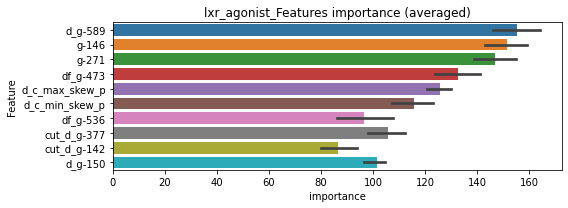

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 lxr_agonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 lxr_agonist=================================


Early stopping, best iteration is:
[925]	training's binary_logloss: 0.000155317	valid_1's binary_logloss: 0.000719022
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000152494	valid_1's binary_logloss: 0.00100474
Early stopping, best iteration is:
[1064]	training's binary_logloss: 0.000151352	valid_1's binary_logloss: 0.00099911


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 lxr_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000154786	valid_1's binary_logloss: 0.000162801
Early stopping, best iteration is:
[1036]	training's binary_logloss: 0.000154227	valid_1's binary_logloss: 0.00016221


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 lxr_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000153896	valid_1's binary_logloss: 0.000199518


lxr_agonist logloss: 0.0005194607737268766


Early stopping, best iteration is:
[1134]	training's binary_logloss: 0.000152064	valid_1's binary_logloss: 0.000197428


mdm_inhibitor, len(trt): 31, len(othr): 3287
target_rate: 0.0013018 → Adj_target_rate: 0.0015554


selected negative label: 3287


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[603]	training's binary_logloss: 0.000419587	valid_1's binary_logloss: 0.00577934
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[622]	training's binary_logloss: 0.000412398	valid_1's binary_logloss: 0.00261233
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[623]	training's binary_logloss: 0.000414196	valid_1's binary_logloss: 0.00300186
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0027276, Threshold: 0.0364871, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[589]	training's binary_logloss: 0.000426128	valid_1's binary_logloss: 0.0043271


Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00130
Num_p_label: 40.0, Expected: 5.2, Threshold: 0.0364871, conf_0:0.02554, conf_1:0.04743
Num_p_label: 29.0, Expected: 5.2, Adj_threshold_1: 0.0664871
Num_p_label: 24.0, Expected: 5.2, Adj_threshold_2: 0.0964871
Num_p_label: 20.0, Expected: 5.2, Adj_threshold_3: 0.1264871
Num_p_label: 16.0, Expected: 5.2, Adj_threshold_4: 0.1564871
Num_p_label: 14.0, Expected: 5.2, Adj_threshold_5: 0.1864871
Num_p_label: 12.0, Expected: 5.2, Adj_threshold_6: 0.2164871
threshold: 0.2164871, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000406726	valid_1's binary_logloss: 0.00515896
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[631]	training's binary_logloss: 0.000391003	valid_1's binary_logloss: 0.00336575
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[600]	training's binary_logloss: 0.000401181	valid_1's binary_logloss: 0.00106702
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[604]	training's binary_logloss: 0.000401664	valid_1's binary_logloss: 0.00286862


y_Threshold: 0.0388526, Threshold: 0.2164871, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0085384 Vs.target_rate: 0.00130
Num_p_label: 34.0, Expected: 5.2, Threshold: 0.2164871, conf_0:0.17319, conf_1:0.25978
Num_p_label: 31.0, Expected: 5.2, Adj_threshold_1: 0.2464871
Num_p_label: 28.0, Expected: 5.2, Adj_threshold_2: 0.2764871
Num_p_label: 27.0, Expected: 5.2, Adj_threshold_3: 0.3064871
Num_p_label: 23.0, Expected: 5.2, Adj_threshold_4: 0.3364871
Num_p_label: 21.0, Expected: 5.2, Adj_threshold_5: 0.3664871
Num_p_label: 21.0, Expected: 5.2, Adj_threshold_6: 0.3964871
Num_p_label: 20.0, Expected: 5.2, Adj_threshold_7: 0.4264871
Num_p_label: 17.0, Expected: 5.2, Adj_threshold_8: 0.4564871
Num_p_label: 17.0, Expected: 5.2, Adj_threshold_9: 0.4864871
Num_p_label: 14.0, Expected: 5.2, Adj_threshold_10: 0.5164871
threshold: 0.5164871, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 657.0/3812, y_label_rate: 0.1723

Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000406726	valid_1's binary_logloss: 0.00515896
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[633]	training's binary_logloss: 0.000391003	valid_1's binary_logloss: 0.00336575
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[600]	training's binary_logloss: 0.000401181	valid_1's binary_logloss: 0.00106702
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[604]	training's binary_logloss: 0.000401664	valid_1's binary_logloss: 0.00286862


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0388526, Threshold: 0.5164871, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0035158 Vs.target_rate: 0.00130
Num_p_label: 14.0, Expected: 5.2, Threshold: 0.5164871, conf_0:0.46484, conf_1:0.56814
Num_p_label: 13.0, Expected: 5.2, Adj_threshold_1: 0.5464871
Num_p_label: 13.0, Expected: 5.2, Adj_threshold_2: 0.5764871
Num_p_label: 12.0, Expected: 5.2, Adj_threshold_3: 0.6064871
threshold: 0.6064871, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


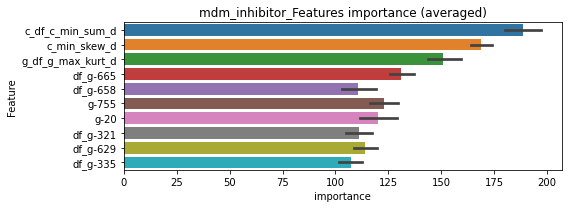

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 mdm_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[899]	training's binary_logloss: 0.000397505	valid_1's binary_logloss: 0.00414359


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 mdm_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[874]	training's binary_logloss: 0.000403255	valid_1's binary_logloss: 0.00270327


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 mdm_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[892]	training's binary_logloss: 0.000407289	valid_1's binary_logloss: 0.00103766


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 mdm_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[798]	training's binary_logloss: 0.000416487	valid_1's binary_logloss: 0.0028014


mdm_inhibitor logloss: 0.0026730420977219595
mek_inhibitor, len(trt): 72, len(othr): 3273
target_rate: 0.0030234 → Adj_target_rate: 0.0031837


selected negative label: 3273


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[710]	training's binary_logloss: 0.000686935	valid_1's binary_logloss: 0.0285325
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[734]	training's binary_logloss: 0.000663336	valid_1's binary_logloss: 0.023922
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[825]	training's binary_logloss: 0.000598992	valid_1's binary_logloss: 0.00560695
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[593]	training's binary_logloss: 0.000901086	valid_1's binary_logloss: 0.0273766


1 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0060640, Threshold: 0.0201628, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 654/3795
p_label_rate: 0.0100452 Vs.target_rate: 0.00302
Num_p_label: 40.0, Expected: 12.0, Threshold: 0.0201628, conf_0:0.01411, conf_1:0.02621
Num_p_label: 6.0, Expected: 12.0, Adj_threshold_1: 0.0501628
threshold: 0.0501628, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 654.0/3795, y_label_rate: 0.1723320
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[763]	training's binary_logloss: 0.000616256	valid_1's binary_logloss: 0.0266106
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[796]	training's binary_logloss: 0.000591744	valid_1's binary_logloss: 0.0215415
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[824]	training's binary_logloss: 0.000592124	valid_1's binary_logloss: 0.00546445
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[747]	training's binary_logloss: 0.000618892	valid_1's binary_logloss: 0.0271691


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0232613, Threshold: 0.0501628, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 651.0/3789
p_label_rate: 0.0070316 Vs.target_rate: 0.00302
Num_p_label: 28.0, Expected: 12.0, Threshold: 0.0501628, conf_0:0.04013, conf_1:0.06020
Num_p_label: 10.0, Expected: 12.0, Adj_threshold_1: 0.0801628
threshold: 0.0801628, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 651.0/3789, y_label_rate: 0.1718131
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[718]	training's binary_logloss: 0.000654643	valid_1's binary_logloss: 0.0153874
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[729]	training's binary_logloss: 0.000618399	valid_1's binary_logloss: 0.0320727
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[763]	training's binary_logloss: 0.000619164	valid_1's binary_logloss: 0.0129496
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[632]	training's binary_logloss: 0.000800416	valid_1's binary_logloss: 0.0267232


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0245157, Threshold: 0.0801628, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 649.0/3785
p_label_rate: 0.0030136 Vs.target_rate: 0.00302
Num_p_label: 12.0, Expected: 12.0, Threshold: 0.0801628, conf_0:0.07215, conf_1:0.08818
threshold: 0.0801628, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 649.0/3785, y_label_rate: 0.1714663


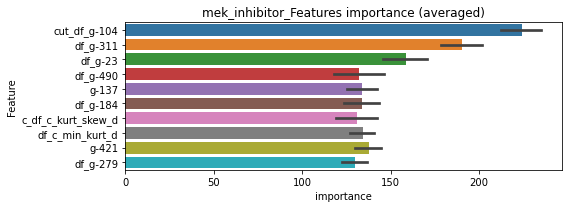

len(train_index) : 2838
len(valid_index) : 947
================================= fold 1/4 mek_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[736]	training's binary_logloss: 0.000732474	valid_1's binary_logloss: 0.0141375


len(train_index) : 2839
len(valid_index) : 946
================================= fold 2/4 mek_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[886]	training's binary_logloss: 0.000631094	valid_1's binary_logloss: 0.0194609


len(train_index) : 2839
len(valid_index) : 946
================================= fold 3/4 mek_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[724]	training's binary_logloss: 0.000739139	valid_1's binary_logloss: 0.0189164


len(train_index) : 2839
len(valid_index) : 946
================================= fold 4/4 mek_inhibitor=================================


Training until validation scores don't improve for 30 rounds


mek_inhibitor logloss: 0.01883388234998603


Early stopping, best iteration is:
[547]	training's binary_logloss: 0.000969239	valid_1's binary_logloss: 0.0228256


membrane_integrity_inhibitor, len(trt): 74, len(othr): 3279
target_rate: 0.0031074 → Adj_target_rate: 0.0032587


selected negative label: 3279


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[685]	training's binary_logloss: 0.00066823	valid_1's binary_logloss: 0.0215895
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[729]	training's binary_logloss: 0.000631213	valid_1's binary_logloss: 0.0269484
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[622]	training's binary_logloss: 0.000776453	valid_1's binary_logloss: 0.0308009
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[625]	training's binary_logloss: 0.000766553	valid_1's binary_logloss: 0.0295882


1 / 3, AUC score:1.000, PR-AUC:0.998
y_Threshold: 0.0057587, Threshold: 0.0168221, pos_neg_ratio: 0.8000000
Remove_noisy_data: 136 → Positive_corect_labels: 653/3798
p_label_rate: 0.0100452 Vs.target_rate: 0.00311
Num_p_label: 40.0, Expected: 12.4, Threshold: 0.0168221, conf_0:0.01178, conf_1:0.02187
Num_p_label: 6.0, Expected: 12.4, Adj_threshold_1: 0.0468221
threshold: 0.0468221, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 653.0/3798, y_label_rate: 0.1719326
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[637]	training's binary_logloss: 0.000719113	valid_1's binary_logloss: 0.024064
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[477]	training's binary_logloss: 0.0011623	valid_1's binary_logloss: 0.0367372
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[619]	training's binary_logloss: 0.000741523	valid_1's binary_logloss: 0.0236661
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0253892, Threshold: 0.0468221, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[521]	training's binary_logloss: 0.00101622	valid_1's binary_logloss: 0.0228656


Remove_noisy_data: 8 → Positive_corect_labels: 649.0/3790
p_label_rate: 0.0047715 Vs.target_rate: 0.00311
Num_p_label: 19.0, Expected: 12.4, Threshold: 0.0468221, conf_0:0.03746, conf_1:0.05619
Num_p_label: 5.0, Expected: 12.4, Adj_threshold_1: 0.0768221
threshold: 0.0768221, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 649.0/3790, y_label_rate: 0.1712401
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[747]	training's binary_logloss: 0.000564784	valid_1's binary_logloss: 0.0199922
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[692]	training's binary_logloss: 0.00060965	valid_1's binary_logloss: 0.0231954
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[500]	training's binary_logloss: 0.00104266	valid_1's binary_logloss: 0.0321661
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[599]	training's binary_logloss: 0.000761049	valid_1's binary_logloss: 0.0296702


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0217083, Threshold: 0.0768221, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 646.0/3784
p_label_rate: 0.0012557 Vs.target_rate: 0.00311
Num_p_label: 5.0, Expected: 12.4, Threshold: 0.0768221, conf_0:0.06914, conf_1:0.08450
threshold: 0.0768221, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 646.0/3784, y_label_rate: 0.1707188


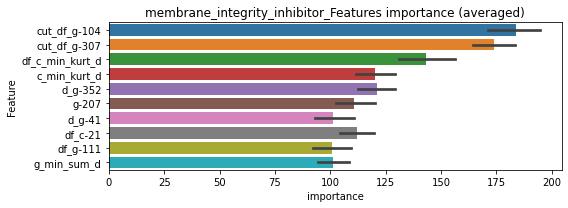

len(train_index) : 2838
len(valid_index) : 946
================================= fold 1/4 membrane_integrity_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2838
len(valid_index) : 946


Early stopping, best iteration is:
[548]	training's binary_logloss: 0.000882717	valid_1's binary_logloss: 0.0219954


================================= fold 2/4 membrane_integrity_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2838
len(valid_index) : 946
================================= fold 3/4 membrane_integrity_inhibitor=================================


Early stopping, best iteration is:
[446]	training's binary_logloss: 0.00108129	valid_1's binary_logloss: 0.0322329
Training until validation scores don't improve for 30 rounds


len(train_index) : 2838
len(valid_index) : 946
================================= fold 4/4 membrane_integrity_inhibitor=================================


Early stopping, best iteration is:
[417]	training's binary_logloss: 0.0012064	valid_1's binary_logloss: 0.0274968
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[640]	training's binary_logloss: 0.00078069	valid_1's binary_logloss: 0.0163243


membrane_integrity_inhibitor logloss: 0.024512353908099707
mineralocorticoid_receptor_antagonist, len(trt): 25, len(othr): 3281
target_rate: 0.0010498 → Adj_target_rate: 0.0012955


selected negative label: 3281


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[582]	training's binary_logloss: 0.00035157	valid_1's binary_logloss: 0.00213319
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000352769	valid_1's binary_logloss: 0.00264476
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[565]	training's binary_logloss: 0.000365404	valid_1's binary_logloss: 0.00140263
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0018115, Threshold: 0.0052006, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3805
p_label_rate: 0.0100452 Vs.target_rate: 0.00105
Num_p_label: 40.0, Expected: 4.2, Threshold: 0.0052006, conf_0:0.00364, conf_1:0.00676
Num_p_label: 4.0, Expected: 4.2, Adj_threshold_1: 0.0352006


Early stopping, best iteration is:
[594]	training's binary_logloss: 0.000341627	valid_1's binary_logloss: 0.0091189


threshold: 0.0352006, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 656.0/3805, y_label_rate: 0.1724047
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[574]	training's binary_logloss: 0.000349166	valid_1's binary_logloss: 0.00182007
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[566]	training's binary_logloss: 0.000350375	valid_1's binary_logloss: 0.00281165
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[565]	training's binary_logloss: 0.000352231	valid_1's binary_logloss: 0.00222262
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0129143, Threshold: 0.0352006, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3805
p_label_rate: 0.0017579 Vs.target_rate: 0.00105
Num_p_label: 7.0, Expected: 4.2, Threshold: 0.0352006, conf_0:0.02816, conf_1:0.04224


Early stopping, best iteration is:
[552]	training's binary_logloss: 0.000352204	valid_1's binary_logloss: 0.00835993


threshold: 0.0352006, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 656.0/3805, y_label_rate: 0.1724047
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[574]	training's binary_logloss: 0.000349166	valid_1's binary_logloss: 0.00182007
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[566]	training's binary_logloss: 0.000350375	valid_1's binary_logloss: 0.00281165
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[565]	training's binary_logloss: 0.000352231	valid_1's binary_logloss: 0.00222262
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0129143, Threshold: 0.0352006, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3805
p_label_rate: 0.0017579 Vs.target_rate: 0.00105
Num_p_label: 7.0, Expected: 4.2, Threshold: 0.0352006, conf_0:0.03168, conf_1:0.03872


Early stopping, best iteration is:
[552]	training's binary_logloss: 0.000352204	valid_1's binary_logloss: 0.00835993


threshold: 0.0352006, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 656.0/3805, y_label_rate: 0.1724047


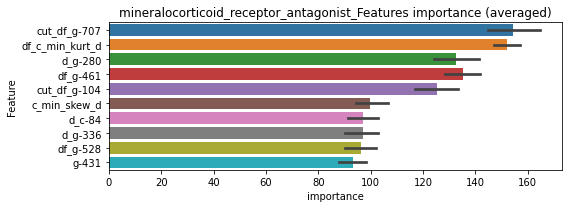

len(train_index) : 2853
len(valid_index) : 952
================================= fold 1/4 mineralocorticoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[900]	training's binary_logloss: 0.000339757	valid_1's binary_logloss: 0.00158337


len(train_index) : 2854
len(valid_index) : 951
================================= fold 2/4 mineralocorticoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2854
len(valid_index) : 951


Early stopping, best iteration is:
[742]	training's binary_logloss: 0.00036499	valid_1's binary_logloss: 0.00333498


================================= fold 3/4 mineralocorticoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[959]	training's binary_logloss: 0.000335639	valid_1's binary_logloss: 0.00129012


len(train_index) : 2854
len(valid_index) : 951
================================= fold 4/4 mineralocorticoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[743]	training's binary_logloss: 0.000362116	valid_1's binary_logloss: 0.00700484


mineralocorticoid_receptor_antagonist logloss: 0.003303316491649186
monoacylglycerol_lipase_inhibitor, len(trt): 12, len(othr): 3284
target_rate: 0.0005039 → Adj_target_rate: 0.0006942


selected negative label: 3284


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[504]	training's binary_logloss: 0.000225977	valid_1's binary_logloss: 0.00243615
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[478]	training's binary_logloss: 0.000233174	valid_1's binary_logloss: 0.00339877
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[496]	training's binary_logloss: 0.000231408	valid_1's binary_logloss: 0.00048016
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0008732, Threshold: 0.0019711, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00050
Num_p_label: 40.0, Expected: 2.0, Threshold: 0.0019711, conf_0:0.00138, conf_1:0.00256
Num_p_label: 0.0, Expected: 2.0, Adj_threshold_1: 0.0319711
threshold: 0.0319711, positive_p_label: 0.0/3982, p_label_rate: 0.0000000


Early stopping, best iteration is:
[504]	training's binary_logloss: 0.000230694	valid_1's binary_logloss: 0.000393604


positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[499]	training's binary_logloss: 0.000216428	valid_1's binary_logloss: 0.0028687
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[473]	training's binary_logloss: 0.000221099	valid_1's binary_logloss: 0.00402982
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[491]	training's binary_logloss: 0.000220037	valid_1's binary_logloss: 0.000261985
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0113127, Threshold: 0.0319711, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0012557 Vs.target_rate: 0.00050
Num_p_label: 5.0, Expected: 2.0, Threshold: 0.0319711, conf_0:0.02558, conf_1:0.03837
threshold: 0.0319711, positive_p_label: 5.0/3982, p_label_rate: 0.0012557


Early stopping, best iteration is:
[490]	training's binary_logloss: 0.000216902	valid_1's binary_logloss: 0.000329651


positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[499]	training's binary_logloss: 0.000216428	valid_1's binary_logloss: 0.0028687
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[473]	training's binary_logloss: 0.000221099	valid_1's binary_logloss: 0.00402982
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[497]	training's binary_logloss: 0.000220037	valid_1's binary_logloss: 0.000261985
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0113127, Threshold: 0.0319711, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0012557 Vs.target_rate: 0.00050
Num_p_label: 5.0, Expected: 2.0, Threshold: 0.0319711, conf_0:0.02877, conf_1:0.03517
threshold: 0.0319711, positive_p_label: 5.0/3982, p_label_rate: 0.0012557


Early stopping, best iteration is:
[490]	training's binary_logloss: 0.000216902	valid_1's binary_logloss: 0.000329651


positive_y_label: 656.0/3808, y_label_rate: 0.1722689


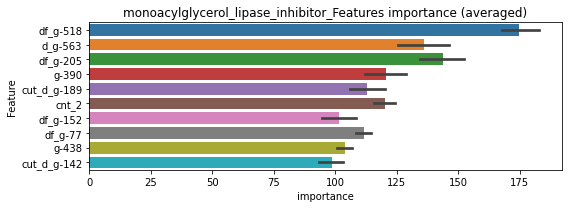

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 monoacylglycerol_lipase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 monoacylglycerol_lipase_inhibitor=================================


Early stopping, best iteration is:
[958]	training's binary_logloss: 0.000214376	valid_1's binary_logloss: 0.0013618
Training until validation scores don't improve for 30 rounds


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 monoacylglycerol_lipase_inhibitor=================================


Early stopping, best iteration is:
[771]	training's binary_logloss: 0.000224359	valid_1's binary_logloss: 0.00317239
Training until validation scores don't improve for 30 rounds


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 monoacylglycerol_lipase_inhibitor=================================


Early stopping, best iteration is:
[892]	training's binary_logloss: 0.000217333	valid_1's binary_logloss: 0.00028596
Training until validation scores don't improve for 30 rounds


monoacylglycerol_lipase_inhibitor logloss: 0.0012832300505515898


Early stopping, best iteration is:
[915]	training's binary_logloss: 0.000215622	valid_1's binary_logloss: 0.000312611


monoamine_oxidase_inhibitor, len(trt): 85, len(othr): 3272
target_rate: 0.0035693 → Adj_target_rate: 0.0036661


selected negative label: 3272


unpredictable_cols:monoamine_oxidase_inhibitor → create_features


N_features:358
================= Pseudo labeling 1 / 3 =================



Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0296727	valid_1's binary_logloss: 0.0831029
[2000]	training's binary_logloss: 0.0143695	valid_1's binary_logloss: 0.066251
[3000]	training's binary_logloss: 0.00942393	valid_1's binary_logloss: 0.059975
Early stopping, best iteration is:
[3664]	training's binary_logloss: 0.00768889	valid_1's binary_logloss: 0.0577508
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0300451	valid_1's binary_logloss: 0.0770644
[2000]	training's binary_logloss: 0.0145432	valid_1's binary_logloss: 0.0600077
[3000]	training's binary_logloss: 0.00952799	valid_1's binary_logloss: 0.0532835
[4000]	training's binary_logloss: 0.00709393	valid_1's binary_logloss: 0.0499199
[5000]	training's binary_logloss: 0.00567093	valid_1's binary_logloss: 0.0477627
[6000]	training's binary_logloss: 0.00473378	valid_1's binary_logloss: 0.0461093
Early stopping, best iteration is:
[63

1 / 3, AUC score:0.997, PR-AUC:0.992
y_Threshold: 0.0314586, Threshold: 0.0770526, pos_neg_ratio: 0.8000000
Remove_noisy_data: 148 → Positive_corect_labels: 646/3778
p_label_rate: 0.0100452 Vs.target_rate: 0.00357
Num_p_label: 40.0, Expected: 14.2, Threshold: 0.0770526, conf_0:0.05394, conf_1:0.10017
Num_p_label: 20.0, Expected: 14.2, Adj_threshold_1: 0.1070526
threshold: 0.1070526, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 646.0/3778, y_label_rate: 0.1709899
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0277709	valid_1's binary_logloss: 0.080109
[2000]	training's binary_logloss: 0.0135022	valid_1's binary_logloss: 0.0644765
[3000]	training's binary_logloss: 0.00890082	valid_1's binary_logloss: 0.0590033
[4000]	training's binary_logloss: 0.00665135	valid_1's binary_logloss: 0.0562411
Early stopping, best iteration is:
[4546]	training's binary_logloss: 0.00585381	valid_1's binary_logloss: 0.0551112
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0273018	valid_1's binary_logloss: 0.0789747
[2000]	training's binary_logloss: 0.0131918	valid_1's binary_logloss: 0.0642003
[3000]	training's binary_logloss: 0.00866509	valid_1's binary_logloss: 0.0590778
Early stopping, best iteration is:
[3831]	training's binary_logloss: 0.00675808	valid_1's binary_logloss: 0.0567107
Training until validation scores don't improve for 30 rounds
[1000]	training's binar

2 / 3, AUC score:0.999, PR-AUC:0.998
y_Threshold: 0.0656365, Threshold: 0.1070526, pos_neg_ratio: 0.8000000
Remove_noisy_data: 16 → Positive_corect_labels: 638.0/3762
p_label_rate: 0.0085384 Vs.target_rate: 0.00357
Num_p_label: 34.0, Expected: 14.2, Threshold: 0.1070526, conf_0:0.08564, conf_1:0.12846
Num_p_label: 18.0, Expected: 14.2, Adj_threshold_1: 0.1370526
threshold: 0.1370526, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 638.0/3762, y_label_rate: 0.1695906
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0267723	valid_1's binary_logloss: 0.0717403
[2000]	training's binary_logloss: 0.0130498	valid_1's binary_logloss: 0.0563825
[3000]	training's binary_logloss: 0.00861661	valid_1's binary_logloss: 0.050916
[4000]	training's binary_logloss: 0.006448	valid_1's binary_logloss: 0.0480844
[5000]	training's binary_logloss: 0.00517191	valid_1's binary_logloss: 0.0464378
Early stopping, best iteration is:
[5042]	training's binary_logloss: 0.00513015	valid_1's binary_logloss: 0.0463067
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0268926	valid_1's binary_logloss: 0.06984
[2000]	training's binary_logloss: 0.0130832	valid_1's binary_logloss: 0.0533518
[3000]	training's binary_logloss: 0.00860942	valid_1's binary_logloss: 0.04744
[4000]	training's binary_logloss: 0.00643556	valid_1's binary_logloss: 0.0444211
[5000]	training's binary_logloss: 0.00516438

3 / 3, AUC score:0.999, PR-AUC:0.998
y_Threshold: 0.0563817, Threshold: 0.1370526, pos_neg_ratio: 0.8000000
Remove_noisy_data: 20 → Positive_corect_labels: 628.0/3742
p_label_rate: 0.0040181 Vs.target_rate: 0.00357
Num_p_label: 16.0, Expected: 14.2, Threshold: 0.1370526, conf_0:0.12335, conf_1:0.15076
threshold: 0.1370526, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 628.0/3742, y_label_rate: 0.1678247


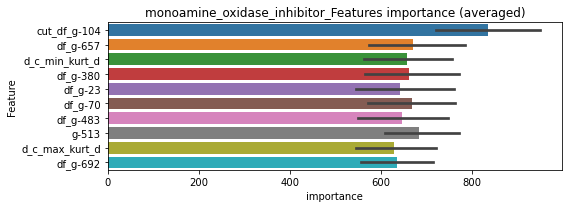

len(train_index) : 2806
len(valid_index) : 936
================================= fold 1/4 monoamine_oxidase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0254317	valid_1's binary_logloss: 0.0671798
[2000]	training's binary_logloss: 0.012363	valid_1's binary_logloss: 0.0535567
[3000]	training's binary_logloss: 0.00815856	valid_1's binary_logloss: 0.0490569
[4000]	training's binary_logloss: 0.00611023	valid_1's binary_logloss: 0.0468868
Early stopping, best iteration is:
[4462]	training's binary_logloss: 0.0054824	valid_1's binary_logloss: 0.0462319


len(train_index) : 2806
len(valid_index) : 936
================================= fold 2/4 monoamine_oxidase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0251166	valid_1's binary_logloss: 0.0758724
[2000]	training's binary_logloss: 0.012248	valid_1's binary_logloss: 0.0610465
[3000]	training's binary_logloss: 0.00811524	valid_1's binary_logloss: 0.0554406
Early stopping, best iteration is:
[3845]	training's binary_logloss: 0.00632731	valid_1's binary_logloss: 0.0528183


len(train_index) : 2807
len(valid_index) : 935
================================= fold 3/4 monoamine_oxidase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0264709	valid_1's binary_logloss: 0.0540474
[2000]	training's binary_logloss: 0.0129555	valid_1's binary_logloss: 0.0394153
[3000]	training's binary_logloss: 0.00853006	valid_1's binary_logloss: 0.0343425
[4000]	training's binary_logloss: 0.00639037	valid_1's binary_logloss: 0.0318258
[5000]	training's binary_logloss: 0.0051304	valid_1's binary_logloss: 0.0302061
[6000]	training's binary_logloss: 0.00429515	valid_1's binary_logloss: 0.0290878
[7000]	training's binary_logloss: 0.00370725	valid_1's binary_logloss: 0.0282729
[8000]	training's binary_logloss: 0.00326783	valid_1's binary_logloss: 0.0276873
[9000]	training's binary_logloss: 0.00292721	valid_1's binary_logloss: 0.027209
Early stopping, best iteration is:
[9189]	training's binary_logloss: 0.0028712	valid_1's binary_logloss: 0.0271492


len(train_index) : 2807
len(valid_index) : 935
================================= fold 4/4 monoamine_oxidase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0257908	valid_1's binary_logloss: 0.0626676
[2000]	training's binary_logloss: 0.0126087	valid_1's binary_logloss: 0.0483327
[3000]	training's binary_logloss: 0.0083252	valid_1's binary_logloss: 0.0431768
[4000]	training's binary_logloss: 0.0062395	valid_1's binary_logloss: 0.0406272
[5000]	training's binary_logloss: 0.00501536	valid_1's binary_logloss: 0.0390685
[6000]	training's binary_logloss: 0.00420043	valid_1's binary_logloss: 0.0379101
[7000]	training's binary_logloss: 0.00362617	valid_1's binary_logloss: 0.0371175
Early stopping, best iteration is:
[7239]	training's binary_logloss: 0.00351393	valid_1's binary_logloss: 0.0369847


monoamine_oxidase_inhibitor logloss: 0.04080072252615395
monoamine_oxidase_inhibitor is unpredictable(><)!
monopolar_spindle_1_kinase_inhibitor, len(trt): 18, len(othr): 3289
target_rate: 0.0007559 → Adj_target_rate: 0.0009799


selected negative label: 3289


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[555]	training's binary_logloss: 0.000310168	valid_1's binary_logloss: 0.00067825
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[519]	training's binary_logloss: 0.00031072	valid_1's binary_logloss: 0.00176144
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[517]	training's binary_logloss: 0.000314099	valid_1's binary_logloss: 0.00146217
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0016133, Threshold: 0.0160353, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, Expected: 3.0, Threshold: 0.0160353, conf_0:0.01122, conf_1:0.02085
Num_p_label: 23.0, Expected: 3.0, Adj_threshold_1: 0.0460353
Num_p_label: 18.0, Expected: 3.0, Adj_threshold_2: 0.0760353
Num_p_label: 11.0, Expected: 3.0, Adj_threshold_3: 0.1060353
Num_p_label: 8.0, Expected: 3.0, Adj_threshold_4: 0.1360353
Num_p_label: 6.0, Expected: 3.0, Adj_threshold_5: 0.1660353


Early stopping, best iteration is:
[534]	training's binary_logloss: 0.000305242	valid_1's binary_logloss: 0.00215648


threshold: 0.1660353, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[525]	training's binary_logloss: 0.000296267	valid_1's binary_logloss: 0.000690272
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[524]	training's binary_logloss: 0.000296546	valid_1's binary_logloss: 0.00290718
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[511]	training's binary_logloss: 0.000304972	valid_1's binary_logloss: 0.00202093
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0565427, Threshold: 0.1660353, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0075339 Vs.target_rate: 0.00076
Num_p_label: 30.0, Expected: 3.0, Threshold: 0.1660353, conf_0:0.13283, conf_1:0.19924
Num_p_label: 26.0, Expected: 3.0, Adj_threshold_1: 0.1960353
Num_p_label: 22.0, Expected: 3.0, Adj_threshold_2: 0.2260353
Num_p_label: 21.0, Expected: 3.0, Adj_threshold_3: 0.2560353
Num_p_label: 16.0, Expected: 3.0, Adj_threshold_4: 0.2860353
Num_p_label: 14.0, Expected: 3.0, Adj_threshold_5: 0.3160353
Num_p_label: 12.0, Expected: 3.0, Adj_threshold_6: 0.3460353


Early stopping, best iteration is:
[530]	training's binary_logloss: 0.00029565	valid_1's binary_logloss: 0.0021992


Num_p_label: 10.0, Expected: 3.0, Adj_threshold_7: 0.3760353
Num_p_label: 9.0, Expected: 3.0, Adj_threshold_8: 0.4060353
Num_p_label: 9.0, Expected: 3.0, Adj_threshold_9: 0.4360353
Num_p_label: 5.0, Expected: 3.0, Adj_threshold_10: 0.4660353
threshold: 0.4660353, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[531]	training's binary_logloss: 0.000296267	valid_1's binary_logloss: 0.000690272
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[524]	training's binary_logloss: 0.000296546	valid_1's binary_logloss: 0.00290718
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[511]	training's binary_logloss: 0.000304972	valid_1's binary_logloss: 0.00202093
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[530]	training's binary_logloss: 0.00029565	valid_1's binary_logloss: 0.0021992


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0565427, Threshold: 0.4660353, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0012557 Vs.target_rate: 0.00076
Num_p_label: 5.0, Expected: 3.0, Threshold: 0.4660353, conf_0:0.41943, conf_1:0.51264
threshold: 0.4660353, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


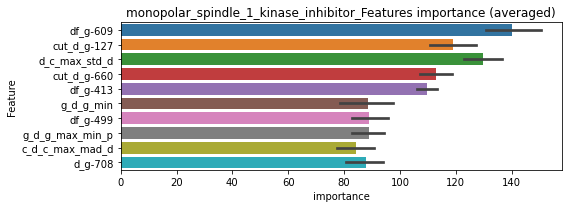

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 monopolar_spindle_1_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[803]	training's binary_logloss: 0.000298555	valid_1's binary_logloss: 0.000683854


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 monopolar_spindle_1_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953


Early stopping, best iteration is:
[787]	training's binary_logloss: 0.000300143	valid_1's binary_logloss: 0.00192367


================================= fold 3/4 monopolar_spindle_1_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[800]	training's binary_logloss: 0.000300811	valid_1's binary_logloss: 0.00157205


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 monopolar_spindle_1_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[773]	training's binary_logloss: 0.000303849	valid_1's binary_logloss: 0.00162379


monopolar_spindle_1_kinase_inhibitor logloss: 0.0014509670178729657


mutually exclusive columns: mtor_inhibitor


mtor_inhibitor, len(trt): 130, len(othr): 2722
target_rate: 0.0054590 → Adj_target_rate: 0.0052608


selected negative label: 2722


unpredictable_cols:mtor_inhibitor → create_features


N_features:358
================= Pseudo labeling 1 / 3 =================



Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0495733	valid_1's binary_logloss: 0.140394
[2000]	training's binary_logloss: 0.0242001	valid_1's binary_logloss: 0.115873
[3000]	training's binary_logloss: 0.0158667	valid_1's binary_logloss: 0.106945
[4000]	training's binary_logloss: 0.0118027	valid_1's binary_logloss: 0.102906
Early stopping, best iteration is:
[4587]	training's binary_logloss: 0.0102566	valid_1's binary_logloss: 0.101355
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0492028	valid_1's binary_logloss: 0.145933
[2000]	training's binary_logloss: 0.0239257	valid_1's binary_logloss: 0.122553
[3000]	training's binary_logloss: 0.0156943	valid_1's binary_logloss: 0.114124
Early stopping, best iteration is:
[3652]	training's binary_logloss: 0.0128013	valid_1's binary_logloss: 0.110847
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0

1 / 3, AUC score:0.974, PR-AUC:0.958
y_Threshold: 0.0777059, Threshold: 0.1701471, pos_neg_ratio: 0.8000000
Remove_noisy_data: 178 → Positive_corect_labels: 510/3088
p_label_rate: 0.0100452 Vs.target_rate: 0.00546
Num_p_label: 40.0, Expected: 21.7, Threshold: 0.1701471, conf_0:0.11910, conf_1:0.22119
Num_p_label: 20.0, Expected: 21.7, Adj_threshold_1: 0.2001471
threshold: 0.2001471, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 510.0/3088, y_label_rate: 0.1651554
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0408497	valid_1's binary_logloss: 0.133564
[2000]	training's binary_logloss: 0.0198034	valid_1's binary_logloss: 0.111175
[3000]	training's binary_logloss: 0.0130184	valid_1's binary_logloss: 0.103876
Early stopping, best iteration is:
[3865]	training's binary_logloss: 0.0100359	valid_1's binary_logloss: 0.100128
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0420179	valid_1's binary_logloss: 0.108682
[2000]	training's binary_logloss: 0.0204436	valid_1's binary_logloss: 0.0831625
[3000]	training's binary_logloss: 0.0134476	valid_1's binary_logloss: 0.0737715
[4000]	training's binary_logloss: 0.010011	valid_1's binary_logloss: 0.0690447
[5000]	training's binary_logloss: 0.00800444	valid_1's binary_logloss: 0.0661047
[6000]	training's binary_logloss: 0.00668978	valid_1's binary_logloss: 0.0642253
Early stopping, best iteration is:
[6752]	train

2 / 3, AUC score:0.991, PR-AUC:0.984
y_Threshold: 0.1101287, Threshold: 0.2001471, pos_neg_ratio: 0.8000000
Remove_noisy_data: 42 → Positive_corect_labels: 489.0/3046
p_label_rate: 0.0125565 Vs.target_rate: 0.00546
Num_p_label: 50.0, Expected: 21.7, Threshold: 0.2001471, conf_0:0.16012, conf_1:0.24018
Num_p_label: 38.0, Expected: 21.7, Adj_threshold_1: 0.2301471
Num_p_label: 30.0, Expected: 21.7, Adj_threshold_2: 0.2601471
threshold: 0.2601471, positive_p_label: 30.0/3982, p_label_rate: 0.0075339
positive_y_label: 489.0/3046, y_label_rate: 0.1605384
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0385945	valid_1's binary_logloss: 0.125564
[2000]	training's binary_logloss: 0.0187656	valid_1's binary_logloss: 0.103646
Early stopping, best iteration is:
[2108]	training's binary_logloss: 0.0177507	valid_1's binary_logloss: 0.102446
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.039263	valid_1's binary_logloss: 0.0913715
[2000]	training's binary_logloss: 0.0191401	valid_1's binary_logloss: 0.0661234
[3000]	training's binary_logloss: 0.0125949	valid_1's binary_logloss: 0.0563134
[4000]	training's binary_logloss: 0.00940417	valid_1's binary_logloss: 0.0513444
[5000]	training's binary_logloss: 0.00752636	valid_1's binary_logloss: 0.0482104
[6000]	training's binary_logloss: 0.00629131	valid_1's binary_logloss: 0.0459758
[7000]	training's binary_logloss: 0.00542238	valid_1's binary_logloss: 0.0443749
[8000]	training's binary_logloss: 0.0047691

3 / 3, AUC score:0.996, PR-AUC:0.988
y_Threshold: 0.1145167, Threshold: 0.2601471, pos_neg_ratio: 0.8000000
Remove_noisy_data: 42 → Positive_corect_labels: 468.0/3004
p_label_rate: 0.0097941 Vs.target_rate: 0.00546
Num_p_label: 39.0, Expected: 21.7, Threshold: 0.2601471, conf_0:0.23413, conf_1:0.28616
Num_p_label: 30.0, Expected: 21.7, Adj_threshold_1: 0.2901471
threshold: 0.2901471, positive_p_label: 30.0/3982, p_label_rate: 0.0075339
positive_y_label: 468.0/3004, y_label_rate: 0.1557923


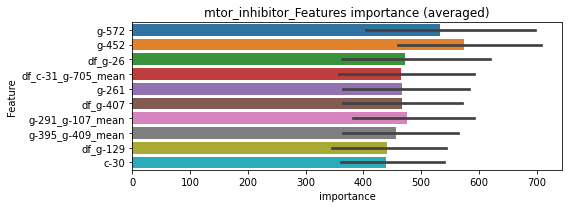

len(train_index) : 2253
len(valid_index) : 751
================================= fold 1/4 mtor_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0372638	valid_1's binary_logloss: 0.108249
[2000]	training's binary_logloss: 0.0180389	valid_1's binary_logloss: 0.0868278
[3000]	training's binary_logloss: 0.0118928	valid_1's binary_logloss: 0.0786472
Early stopping, best iteration is:
[3277]	training's binary_logloss: 0.0108473	valid_1's binary_logloss: 0.0768185


len(train_index) : 2253
len(valid_index) : 751
================================= fold 2/4 mtor_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0367996	valid_1's binary_logloss: 0.115038
[2000]	training's binary_logloss: 0.0179557	valid_1's binary_logloss: 0.0949269
[3000]	training's binary_logloss: 0.0118178	valid_1's binary_logloss: 0.0879661
Early stopping, best iteration is:
[3091]	training's binary_logloss: 0.01146	valid_1's binary_logloss: 0.087521


len(train_index) : 2253
len(valid_index) : 751
================================= fold 3/4 mtor_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0369004	valid_1's binary_logloss: 0.106551
[2000]	training's binary_logloss: 0.0179172	valid_1's binary_logloss: 0.0855337
[3000]	training's binary_logloss: 0.0118241	valid_1's binary_logloss: 0.078275
[4000]	training's binary_logloss: 0.00884269	valid_1's binary_logloss: 0.0745337
[5000]	training's binary_logloss: 0.00708667	valid_1's binary_logloss: 0.0723514
Early stopping, best iteration is:
[5106]	training's binary_logloss: 0.00694086	valid_1's binary_logloss: 0.0721437


len(train_index) : 2253
len(valid_index) : 751
================================= fold 4/4 mtor_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0370529	valid_1's binary_logloss: 0.100866
[2000]	training's binary_logloss: 0.0180992	valid_1's binary_logloss: 0.0765167
[3000]	training's binary_logloss: 0.0119257	valid_1's binary_logloss: 0.0671115
[4000]	training's binary_logloss: 0.00891939	valid_1's binary_logloss: 0.062273
Early stopping, best iteration is:
[4918]	training's binary_logloss: 0.00726155	valid_1's binary_logloss: 0.0592113


mtor_inhibitor logloss: 0.07392362499941083
mtor_inhibitor is unpredictable(><)!
mucolytic_agent, len(trt): 48, len(othr): 3282
target_rate: 0.0020156 → Adj_target_rate: 0.0022556


selected negative label: 3282


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[684]	training's binary_logloss: 0.000495732	valid_1's binary_logloss: 0.0110295
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[553]	training's binary_logloss: 0.000651595	valid_1's binary_logloss: 0.0100371
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[706]	training's binary_logloss: 0.000491424	valid_1's binary_logloss: 0.00282067
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0043230, Threshold: 0.1074090, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 655/3804


Early stopping, best iteration is:
[498]	training's binary_logloss: 0.000769647	valid_1's binary_logloss: 0.0210425


p_label_rate: 0.0100452 Vs.target_rate: 0.00202
Num_p_label: 40.0, Expected: 8.0, Threshold: 0.1074090, conf_0:0.07519, conf_1:0.13963
Num_p_label: 34.0, Expected: 8.0, Adj_threshold_1: 0.1374090
Num_p_label: 27.0, Expected: 8.0, Adj_threshold_2: 0.1674090
Num_p_label: 22.0, Expected: 8.0, Adj_threshold_3: 0.1974090
Num_p_label: 20.0, Expected: 8.0, Adj_threshold_4: 0.2274090
threshold: 0.2274090, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 655.0/3804, y_label_rate: 0.1721872
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[724]	training's binary_logloss: 0.000457644	valid_1's binary_logloss: 0.00693096
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[698]	training's binary_logloss: 0.000468583	valid_1's binary_logloss: 0.00448292
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[707]	training's binary_logloss: 0.000466158	valid_1's binary_logloss: 0.0061801
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0858691, Threshold: 0.2274090, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 653.0/3800


Early stopping, best iteration is:
[490]	training's binary_logloss: 0.000764273	valid_1's binary_logloss: 0.0144782


p_label_rate: 0.0173280 Vs.target_rate: 0.00202
Num_p_label: 69.0, Expected: 8.0, Threshold: 0.2274090, conf_0:0.18193, conf_1:0.27289
Num_p_label: 69.0, Expected: 8.0, Adj_threshold_1: 0.2574090
Num_p_label: 64.0, Expected: 8.0, Adj_threshold_2: 0.2874090
Num_p_label: 60.0, Expected: 8.0, Adj_threshold_3: 0.3174090
Num_p_label: 59.0, Expected: 8.0, Adj_threshold_4: 0.3474090
Num_p_label: 56.0, Expected: 8.0, Adj_threshold_5: 0.3774090
Num_p_label: 54.0, Expected: 8.0, Adj_threshold_6: 0.4074090
Num_p_label: 51.0, Expected: 8.0, Adj_threshold_7: 0.4374090
Num_p_label: 48.0, Expected: 8.0, Adj_threshold_8: 0.4674090
Num_p_label: 48.0, Expected: 8.0, Adj_threshold_9: 0.4974090
Num_p_label: 45.0, Expected: 8.0, Adj_threshold_10: 0.5274090
threshold: 0.5274090, positive_p_label: 45.0/3982, p_label_rate: 0.0113009
positive_y_label: 653.0/3800, y_label_rate: 0.1718421
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[625]	training's binary_logloss: 0.000504879	valid_1's binary_logloss: 0.00629867
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[680]	training's binary_logloss: 0.000469996	valid_1's binary_logloss: 0.00562161
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[661]	training's binary_logloss: 0.000472222	valid_1's binary_logloss: 0.00610937
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[720]	training's binary_logloss: 0.000462114	valid_1's binary_logloss: 0.00337375


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1205882, Threshold: 0.5274090, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 652.0/3798
p_label_rate: 0.0110497 Vs.target_rate: 0.00202
Num_p_label: 44.0, Expected: 8.0, Threshold: 0.5274090, conf_0:0.47467, conf_1:0.58015
Num_p_label: 40.0, Expected: 8.0, Adj_threshold_1: 0.5574090
Num_p_label: 39.0, Expected: 8.0, Adj_threshold_2: 0.5874090
Num_p_label: 38.0, Expected: 8.0, Adj_threshold_3: 0.6174090
Num_p_label: 34.0, Expected: 8.0, Adj_threshold_4: 0.6474090
Num_p_label: 29.0, Expected: 8.0, Adj_threshold_5: 0.6774090
Num_p_label: 26.0, Expected: 8.0, Adj_threshold_6: 0.7074090
Num_p_label: 25.0, Expected: 8.0, Adj_threshold_7: 0.7374090
Num_p_label: 23.0, Expected: 8.0, Adj_threshold_8: 0.7674090
Num_p_label: 15.0, Expected: 8.0, Adj_threshold_9: 0.7974090
threshold: 0.7974090, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 652.0/3798, y_label_rate: 0.1716693


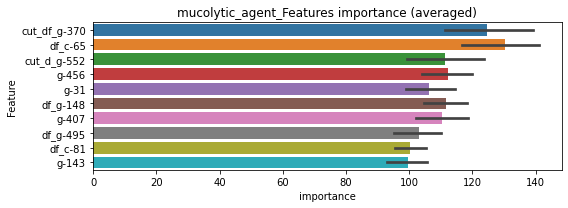

len(train_index) : 2848
len(valid_index) : 950
================================= fold 1/4 mucolytic_agent=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[908]	training's binary_logloss: 0.000474939	valid_1's binary_logloss: 0.00581105


len(train_index) : 2848
len(valid_index) : 950
================================= fold 2/4 mucolytic_agent=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2849
len(valid_index) : 949
================================= fold 3/4 mucolytic_agent=================================


Early stopping, best iteration is:
[366]	training's binary_logloss: 0.001004	valid_1's binary_logloss: 0.0126182
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[835]	training's binary_logloss: 0.000495391	valid_1's binary_logloss: 0.00510418


len(train_index) : 2849
len(valid_index) : 949
================================= fold 4/4 mucolytic_agent=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[857]	training's binary_logloss: 0.000484574	valid_1's binary_logloss: 0.00596486


mucolytic_agent logloss: 0.007375548527722608
neuropeptide_receptor_antagonist, len(trt): 37, len(othr): 3284
target_rate: 0.0015537 → Adj_target_rate: 0.0018079


selected negative label: 3284


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[598]	training's binary_logloss: 0.000422041	valid_1's binary_logloss: 0.0109529
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[624]	training's binary_logloss: 0.000430256	valid_1's binary_logloss: 0.00319979
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[528]	training's binary_logloss: 0.000516138	valid_1's binary_logloss: 0.00758584
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[546]	training's binary_logloss: 0.000486622	valid_1's binary_logloss: 0.00786423


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0027855, Threshold: 0.0128504, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00155
Num_p_label: 40.0, Expected: 6.2, Threshold: 0.0128504, conf_0:0.00900, conf_1:0.01671
Num_p_label: 5.0, Expected: 6.2, Adj_threshold_1: 0.0428504
threshold: 0.0428504, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[565]	training's binary_logloss: 0.000438416	valid_1's binary_logloss: 0.00987131
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[594]	training's binary_logloss: 0.000426189	valid_1's binary_logloss: 0.00312391
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[552]	training's binary_logloss: 0.000467183	valid_1's binary_logloss: 0.00684765
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[648]	training's binary_logloss: 0.000400221	valid_1's binary_logloss: 0.00659988


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0178211, Threshold: 0.0428504, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0040181 Vs.target_rate: 0.00155
Num_p_label: 16.0, Expected: 6.2, Threshold: 0.0428504, conf_0:0.03428, conf_1:0.05142
Num_p_label: 4.0, Expected: 6.2, Adj_threshold_1: 0.0728504
threshold: 0.0728504, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[565]	training's binary_logloss: 0.000438416	valid_1's binary_logloss: 0.00987131
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[594]	training's binary_logloss: 0.000426189	valid_1's binary_logloss: 0.00312391
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[552]	training's binary_logloss: 0.000467183	valid_1's binary_logloss: 0.00684765
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[648]	training's binary_logloss: 0.000400221	valid_1's binary_logloss: 0.00659988


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0178211, Threshold: 0.0728504, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0010045 Vs.target_rate: 0.00155
Num_p_label: 4.0, Expected: 6.2, Threshold: 0.0728504, conf_0:0.06557, conf_1:0.08014
threshold: 0.0728504, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 656.0/3808, y_label_rate: 0.1722689


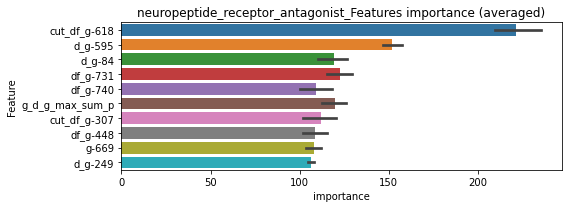

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 neuropeptide_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[708]	training's binary_logloss: 0.000457722	valid_1's binary_logloss: 0.00864475


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 neuropeptide_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[821]	training's binary_logloss: 0.000429333	valid_1's binary_logloss: 0.00382127


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 neuropeptide_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 neuropeptide_receptor_antagonist=================================


Early stopping, best iteration is:
[431]	training's binary_logloss: 0.000709215	valid_1's binary_logloss: 0.00671087
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[810]	training's binary_logloss: 0.00042739	valid_1's binary_logloss: 0.00608819


neuropeptide_receptor_antagonist logloss: 0.006317012300384692


mutually exclusive columns: nfkb_inhibitor


nfkb_inhibitor, len(trt): 832, len(othr): 10338
target_rate: 0.0349374 → Adj_target_rate: 0.0254860


selected negative label: 10338


unpredictable_cols:nfkb_inhibitor → create_features


N_features:358
================= Pseudo labeling 1 / 3 =================



Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0783487	valid_1's binary_logloss: 0.257692
Early stopping, best iteration is:
[1386]	training's binary_logloss: 0.0558755	valid_1's binary_logloss: 0.252422
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0782235	valid_1's binary_logloss: 0.253074
Early stopping, best iteration is:
[1390]	training's binary_logloss: 0.0554192	valid_1's binary_logloss: 0.247071
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0792517	valid_1's binary_logloss: 0.255775
Early stopping, best iteration is:
[1450]	training's binary_logloss: 0.053915	valid_1's binary_logloss: 0.248957
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.078748	valid_1's binary_logloss: 0.244923
Early stopping, best iteration is:
[1380]	training's binary_logloss: 0.0563824	valid_1's binary_log

1 / 3, AUC score:0.880, PR-AUC:0.803
y_Threshold: 0.1253257, Threshold: 0.2414866, pos_neg_ratio: 0.8000000
Remove_noisy_data: 1488 → Positive_corect_labels: 1530/10917
p_label_rate: 0.0100452 Vs.target_rate: 0.03494
Num_p_label: 40.0, Expected: 139.1, Threshold: 0.2414866, conf_0:0.16904, conf_1:0.31393
threshold: 0.2414866, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1530.0/10917, y_label_rate: 0.1401484
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0435329	valid_1's binary_logloss: 0.125311
[2000]	training's binary_logloss: 0.020324	valid_1's binary_logloss: 0.104575
Early stopping, best iteration is:
[2552]	training's binary_logloss: 0.0155279	valid_1's binary_logloss: 0.100354
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0432234	valid_1's binary_logloss: 0.135845
[2000]	training's binary_logloss: 0.0201743	valid_1's binary_logloss: 0.119173
Early stopping, best iteration is:
[2618]	training's binary_logloss: 0.0149659	valid_1's binary_logloss: 0.11537
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0421587	valid_1's binary_logloss: 0.143624
Early stopping, best iteration is:
[1937]	training's binary_logloss: 0.0204525	valid_1's binary_logloss: 0.128746
Training until validation scores don't improve for 30 rounds
[1000]	training's bin

2 / 3, AUC score:0.983, PR-AUC:0.953
y_Threshold: 0.1117228, Threshold: 0.2414866, pos_neg_ratio: 0.8000000
Remove_noisy_data: 326 → Positive_corect_labels: 1367.0/10591
p_label_rate: 0.0110497 Vs.target_rate: 0.03494
Num_p_label: 44.0, Expected: 139.1, Threshold: 0.2414866, conf_0:0.19319, conf_1:0.28978
threshold: 0.2414866, positive_p_label: 44.0/3982, p_label_rate: 0.0110497
positive_y_label: 1367.0/10591, y_label_rate: 0.1290719
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0353671	valid_1's binary_logloss: 0.0982391
[2000]	training's binary_logloss: 0.0165231	valid_1's binary_logloss: 0.0790491
[3000]	training's binary_logloss: 0.0106061	valid_1's binary_logloss: 0.0726896
Early stopping, best iteration is:
[3009]	training's binary_logloss: 0.0105696	valid_1's binary_logloss: 0.0725912
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0346697	valid_1's binary_logloss: 0.11197
[2000]	training's binary_logloss: 0.0161604	valid_1's binary_logloss: 0.0946097
Early stopping, best iteration is:
[2638]	training's binary_logloss: 0.0119454	valid_1's binary_logloss: 0.0902409
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0352251	valid_1's binary_logloss: 0.102021
[2000]	training's binary_logloss: 0.0164246	valid_1's binary_logloss: 0.0843034
Early stopping, best iteration

3 / 3, AUC score:0.995, PR-AUC:0.985
y_Threshold: 0.0990848, Threshold: 0.2414866, pos_neg_ratio: 0.8000000
Remove_noisy_data: 150 → Positive_corect_labels: 1292.0/10441
p_label_rate: 0.0097941 Vs.target_rate: 0.03494
Num_p_label: 39.0, Expected: 139.1, Threshold: 0.2414866, conf_0:0.21734, conf_1:0.26564
threshold: 0.2414866, positive_p_label: 39.0/3982, p_label_rate: 0.0097941
positive_y_label: 1292.0/10441, y_label_rate: 0.1237429


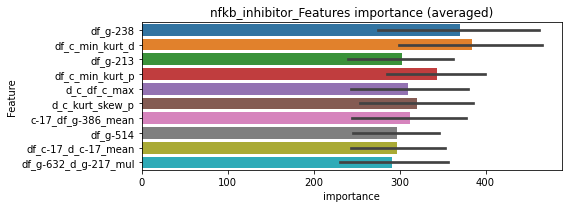

len(train_index) : 7830
len(valid_index) : 2611
================================= fold 1/4 nfkb_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0312795	valid_1's binary_logloss: 0.0992895
[2000]	training's binary_logloss: 0.014656	valid_1's binary_logloss: 0.0837827
Early stopping, best iteration is:
[2916]	training's binary_logloss: 0.00971327	valid_1's binary_logloss: 0.0787233


len(train_index) : 7831
len(valid_index) : 2610
================================= fold 2/4 nfkb_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0307798	valid_1's binary_logloss: 0.108034
[2000]	training's binary_logloss: 0.0144392	valid_1's binary_logloss: 0.0932676
Early stopping, best iteration is:
[2428]	training's binary_logloss: 0.0116929	valid_1's binary_logloss: 0.09069


len(train_index) : 7831
len(valid_index) : 2610
================================= fold 3/4 nfkb_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0318547	valid_1's binary_logloss: 0.0899495
[2000]	training's binary_logloss: 0.0148865	valid_1's binary_logloss: 0.0723245
Early stopping, best iteration is:
[2960]	training's binary_logloss: 0.00971969	valid_1's binary_logloss: 0.066488


len(train_index) : 7831
len(valid_index) : 2610
================================= fold 4/4 nfkb_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0321291	valid_1's binary_logloss: 0.0880441
[2000]	training's binary_logloss: 0.0150422	valid_1's binary_logloss: 0.0695663
[3000]	training's binary_logloss: 0.009667	valid_1's binary_logloss: 0.0632207
Early stopping, best iteration is:
[3321]	training's binary_logloss: 0.0086669	valid_1's binary_logloss: 0.0619276


nfkb_inhibitor logloss: 0.07445762644369905
nfkb_inhibitor is unpredictable(><)!
nicotinic_receptor_agonist, len(trt): 12, len(othr): 3288
target_rate: 0.0005039 → Adj_target_rate: 0.0006942


selected negative label: 3288


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[547]	training's binary_logloss: 0.000240525	valid_1's binary_logloss: 0.00276025
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[553]	training's binary_logloss: 0.00023804	valid_1's binary_logloss: 0.000941499
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[499]	training's binary_logloss: 0.000249202	valid_1's binary_logloss: 0.000437199
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0008989, Threshold: 0.0045661, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00050
Num_p_label: 40.0, Expected: 2.0, Threshold: 0.0045661, conf_0:0.00320, conf_1:0.00594
Num_p_label: 0.0, Expected: 2.0, Adj_threshold_1: 0.0345661


Early stopping, best iteration is:
[551]	training's binary_logloss: 0.00024148	valid_1's binary_logloss: 0.00066313


threshold: 0.0345661, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[517]	training's binary_logloss: 0.000238124	valid_1's binary_logloss: 0.00109145
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[472]	training's binary_logloss: 0.000247059	valid_1's binary_logloss: 0.00252009
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[521]	training's binary_logloss: 0.000237238	valid_1's binary_logloss: 0.000355826
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0702433, Threshold: 0.0345661, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0042692 Vs.target_rate: 0.00050
Num_p_label: 17.0, Expected: 2.0, Threshold: 0.0345661, conf_0:0.02765, conf_1:0.04148
Num_p_label: 5.0, Expected: 2.0, Adj_threshold_1: 0.0645661


Early stopping, best iteration is:
[539]	training's binary_logloss: 0.000234139	valid_1's binary_logloss: 0.000702369


threshold: 0.0645661, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[517]	training's binary_logloss: 0.000238124	valid_1's binary_logloss: 0.00109145
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[472]	training's binary_logloss: 0.000247059	valid_1's binary_logloss: 0.00252009
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[538]	training's binary_logloss: 0.000237238	valid_1's binary_logloss: 0.000355826
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0702433, Threshold: 0.0645661, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0012557 Vs.target_rate: 0.00050
Num_p_label: 5.0, Expected: 2.0, Threshold: 0.0645661, conf_0:0.05811, conf_1:0.07102
threshold: 0.0645661, positive_p_label: 5.0/3982, p_label_rate: 0.0012557


Early stopping, best iteration is:
[539]	training's binary_logloss: 0.000234139	valid_1's binary_logloss: 0.000702369


positive_y_label: 657.0/3813, y_label_rate: 0.1723053


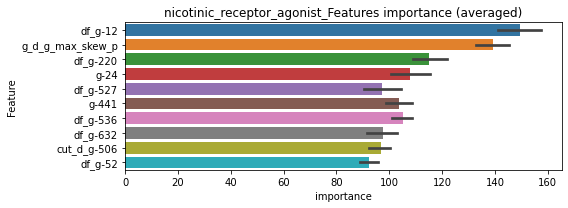

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 nicotinic_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 nicotinic_receptor_agonist=================================


Early stopping, best iteration is:
[951]	training's binary_logloss: 0.000238462	valid_1's binary_logloss: 0.000582508
Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953


Early stopping, best iteration is:
[954]	training's binary_logloss: 0.000236613	valid_1's binary_logloss: 0.00116193


================================= fold 3/4 nicotinic_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 nicotinic_receptor_agonist=================================


Early stopping, best iteration is:
[820]	training's binary_logloss: 0.000244451	valid_1's binary_logloss: 0.000376785
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000235568	valid_1's binary_logloss: 0.000431895
Early stopping, best iteration is:
[1046]	training's binary_logloss: 0.000235009	valid_1's binary_logloss: 0.000431156


nicotinic_receptor_agonist logloss: 0.0006382487783791872
nitric_oxide_donor, len(trt): 26, len(othr): 3287
target_rate: 0.0010918 → Adj_target_rate: 0.0013394


selected negative label: 3287


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[612]	training's binary_logloss: 0.000365818	valid_1's binary_logloss: 0.00636473
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[592]	training's binary_logloss: 0.000361393	valid_1's binary_logloss: 0.00246774
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[587]	training's binary_logloss: 0.00037634	valid_1's binary_logloss: 0.00154951
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0027454, Threshold: 0.0334058, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812


Early stopping, best iteration is:
[569]	training's binary_logloss: 0.000372791	valid_1's binary_logloss: 0.0020994


p_label_rate: 0.0100452 Vs.target_rate: 0.00109
Num_p_label: 40.0, Expected: 4.3, Threshold: 0.0334058, conf_0:0.02338, conf_1:0.04343
Num_p_label: 20.0, Expected: 4.3, Adj_threshold_1: 0.0634058
Num_p_label: 15.0, Expected: 4.3, Adj_threshold_2: 0.0934058
Num_p_label: 12.0, Expected: 4.3, Adj_threshold_3: 0.1234058
Num_p_label: 10.0, Expected: 4.3, Adj_threshold_4: 0.1534058
threshold: 0.1534058, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[557]	training's binary_logloss: 0.000354774	valid_1's binary_logloss: 0.00659162
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[592]	training's binary_logloss: 0.000349746	valid_1's binary_logloss: 0.00168534
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[589]	training's binary_logloss: 0.000350545	valid_1's binary_logloss: 0.00122942
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0390373, Threshold: 0.1534058, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00109
Num_p_label: 40.0, Expected: 4.3, Threshold: 0.1534058, conf_0:0.12272, conf_1:0.18409
Num_p_label: 34.0, Expected: 4.3, Adj_threshold_1: 0.1834058


Early stopping, best iteration is:
[575]	training's binary_logloss: 0.000348647	valid_1's binary_logloss: 0.00175397


Num_p_label: 28.0, Expected: 4.3, Adj_threshold_2: 0.2134058
Num_p_label: 25.0, Expected: 4.3, Adj_threshold_3: 0.2434058
Num_p_label: 23.0, Expected: 4.3, Adj_threshold_4: 0.2734058
Num_p_label: 22.0, Expected: 4.3, Adj_threshold_5: 0.3034058
Num_p_label: 17.0, Expected: 4.3, Adj_threshold_6: 0.3334058
Num_p_label: 13.0, Expected: 4.3, Adj_threshold_7: 0.3634058
Num_p_label: 12.0, Expected: 4.3, Adj_threshold_8: 0.3934058
Num_p_label: 11.0, Expected: 4.3, Adj_threshold_9: 0.4234058
Num_p_label: 10.0, Expected: 4.3, Adj_threshold_10: 0.4534058
threshold: 0.4534058, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[557]	training's binary_logloss: 0.000354774	valid_1's binary_logloss: 0.00659162
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[592]	training's binary_logloss: 0.000349746	valid_1's binary_logloss: 0.00168534
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[590]	training's binary_logloss: 0.000350545	valid_1's binary_logloss: 0.00122942
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0390373, Threshold: 0.4534058, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0025113 Vs.target_rate: 0.00109
Num_p_label: 10.0, Expected: 4.3, Threshold: 0.4534058, conf_0:0.40807, conf_1:0.49875


Early stopping, best iteration is:
[575]	training's binary_logloss: 0.000348647	valid_1's binary_logloss: 0.00175397


threshold: 0.4534058, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


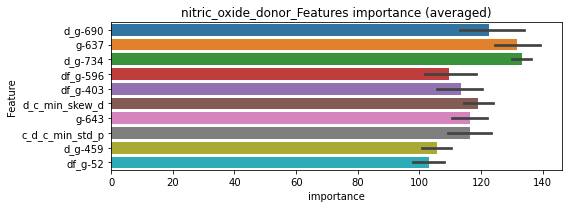

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 nitric_oxide_donor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[834]	training's binary_logloss: 0.00034759	valid_1's binary_logloss: 0.00501805


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 nitric_oxide_donor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[857]	training's binary_logloss: 0.000352858	valid_1's binary_logloss: 0.0013299


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 nitric_oxide_donor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[802]	training's binary_logloss: 0.000361201	valid_1's binary_logloss: 0.00121137


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 nitric_oxide_donor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[809]	training's binary_logloss: 0.000356193	valid_1's binary_logloss: 0.00151175


nitric_oxide_donor logloss: 0.002267768188476891
nitric_oxide_production_inhibitor, len(trt): 29, len(othr): 3285
target_rate: 0.0012178 → Adj_target_rate: 0.0014697


selected negative label: 3285


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[559]	training's binary_logloss: 0.000377124	valid_1's binary_logloss: 0.00472486
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[579]	training's binary_logloss: 0.000360082	valid_1's binary_logloss: 0.00551093
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[641]	training's binary_logloss: 0.000360272	valid_1's binary_logloss: 0.00121468
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[646]	training's binary_logloss: 0.000349406	valid_1's binary_logloss: 0.00228386


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0021560, Threshold: 0.0072773, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00122
Num_p_label: 40.0, Expected: 4.8, Threshold: 0.0072773, conf_0:0.00509, conf_1:0.00946
Num_p_label: 2.0, Expected: 4.8, Adj_threshold_1: 0.0372773
threshold: 0.0372773, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[470]	training's binary_logloss: 0.000455099	valid_1's binary_logloss: 0.0056878
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[602]	training's binary_logloss: 0.000343055	valid_1's binary_logloss: 0.00400719
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[623]	training's binary_logloss: 0.000353959	valid_1's binary_logloss: 0.00102888
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0244242, Threshold: 0.0372773, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000354017	valid_1's binary_logloss: 0.00305419


Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0035158 Vs.target_rate: 0.00122
Num_p_label: 14.0, Expected: 4.8, Threshold: 0.0372773, conf_0:0.02982, conf_1:0.04473
Num_p_label: 3.0, Expected: 4.8, Adj_threshold_1: 0.0672773
threshold: 0.0672773, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[470]	training's binary_logloss: 0.000455099	valid_1's binary_logloss: 0.0056878
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[602]	training's binary_logloss: 0.000343055	valid_1's binary_logloss: 0.00400719
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[623]	training's binary_logloss: 0.000353959	valid_1's binary_logloss: 0.00102888
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0244242, Threshold: 0.0672773, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000354017	valid_1's binary_logloss: 0.00305419


Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0007534 Vs.target_rate: 0.00122
Num_p_label: 3.0, Expected: 4.8, Threshold: 0.0672773, conf_0:0.06055, conf_1:0.07401
threshold: 0.0672773, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


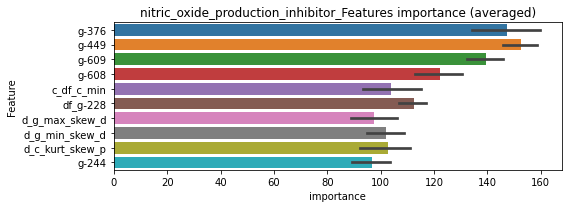

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 nitric_oxide_production_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 nitric_oxide_production_inhibitor=================================


Early stopping, best iteration is:
[559]	training's binary_logloss: 0.000455869	valid_1's binary_logloss: 0.00517296
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[920]	training's binary_logloss: 0.000343933	valid_1's binary_logloss: 0.00421003


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 nitric_oxide_production_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[930]	training's binary_logloss: 0.000354888	valid_1's binary_logloss: 0.000966999


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 nitric_oxide_production_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00034409	valid_1's binary_logloss: 0.00184862
Early stopping, best iteration is:
[973]	training's binary_logloss: 0.000345475	valid_1's binary_logloss: 0.00184693


nitric_oxide_production_inhibitor logloss: 0.0030514506540903824
nitric_oxide_synthase_inhibitor, len(trt): 26, len(othr): 3283
target_rate: 0.0010918 → Adj_target_rate: 0.0013394


selected negative label: 3283


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[589]	training's binary_logloss: 0.000381085	valid_1's binary_logloss: 0.00320795
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[574]	training's binary_logloss: 0.000394597	valid_1's binary_logloss: 0.00135457
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[591]	training's binary_logloss: 0.000387024	valid_1's binary_logloss: 0.00103549
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[591]	training's binary_logloss: 0.000385348	valid_1's binary_logloss: 0.00292392


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0026611, Threshold: 0.0225383, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3807
p_label_rate: 0.0100452 Vs.target_rate: 0.00109
Num_p_label: 40.0, Expected: 4.3, Threshold: 0.0225383, conf_0:0.01578, conf_1:0.02930
Num_p_label: 8.0, Expected: 4.3, Adj_threshold_1: 0.0525383
threshold: 0.0525383, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[549]	training's binary_logloss: 0.000390663	valid_1's binary_logloss: 0.00426111
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[579]	training's binary_logloss: 0.000382949	valid_1's binary_logloss: 0.00127679
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[594]	training's binary_logloss: 0.000372262	valid_1's binary_logloss: 0.000859979
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0519132, Threshold: 0.0525383, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3807
p_label_rate: 0.0113009 Vs.target_rate: 0.00109


Early stopping, best iteration is:
[555]	training's binary_logloss: 0.00038529	valid_1's binary_logloss: 0.00266494


Num_p_label: 45.0, Expected: 4.3, Threshold: 0.0525383, conf_0:0.04203, conf_1:0.06305
Num_p_label: 32.0, Expected: 4.3, Adj_threshold_1: 0.0825383
Num_p_label: 22.0, Expected: 4.3, Adj_threshold_2: 0.1125383
Num_p_label: 15.0, Expected: 4.3, Adj_threshold_3: 0.1425383
Num_p_label: 12.0, Expected: 4.3, Adj_threshold_4: 0.1725383
Num_p_label: 9.0, Expected: 4.3, Adj_threshold_5: 0.2025383
threshold: 0.2025383, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[549]	training's binary_logloss: 0.000390663	valid_1's binary_logloss: 0.00426111
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[579]	training's binary_logloss: 0.000382949	valid_1's binary_logloss: 0.00127679
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[592]	training's binary_logloss: 0.000372262	valid_1's binary_logloss: 0.000859979
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0519132, Threshold: 0.2025383, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3807


Early stopping, best iteration is:
[555]	training's binary_logloss: 0.00038529	valid_1's binary_logloss: 0.00266494


p_label_rate: 0.0022602 Vs.target_rate: 0.00109
Num_p_label: 9.0, Expected: 4.3, Threshold: 0.2025383, conf_0:0.18228, conf_1:0.22279
threshold: 0.2025383, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 656.0/3807, y_label_rate: 0.1723142


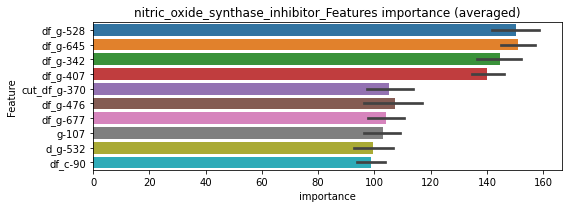

len(train_index) : 2855
len(valid_index) : 952
================================= fold 1/4 nitric_oxide_synthase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[815]	training's binary_logloss: 0.000379845	valid_1's binary_logloss: 0.00361757


len(train_index) : 2855
len(valid_index) : 952
================================= fold 2/4 nitric_oxide_synthase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[837]	training's binary_logloss: 0.000380416	valid_1's binary_logloss: 0.00107603


len(train_index) : 2855
len(valid_index) : 952
================================= fold 3/4 nitric_oxide_synthase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[834]	training's binary_logloss: 0.000381574	valid_1's binary_logloss: 0.000923724


len(train_index) : 2856
len(valid_index) : 951
================================= fold 4/4 nitric_oxide_synthase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[852]	training's binary_logloss: 0.000375874	valid_1's binary_logloss: 0.00189747


nitric_oxide_synthase_inhibitor logloss: 0.0018786962260774816
norepinephrine_reuptake_inhibitor, len(trt): 7, len(othr): 3287
target_rate: 0.0002939 → Adj_target_rate: 0.0004391


selected negative label: 3287


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[453]	training's binary_logloss: 0.000185662	valid_1's binary_logloss: 0.00172353
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[455]	training's binary_logloss: 0.000187113	valid_1's binary_logloss: 0.00290602
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[457]	training's binary_logloss: 0.000185682	valid_1's binary_logloss: 0.00023107
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0005772, Threshold: 0.0026930, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00029
Num_p_label: 40.0, Expected: 1.2, Threshold: 0.0026930, conf_0:0.00189, conf_1:0.00350
Num_p_label: 1.0, Expected: 1.2, Adj_threshold_1: 0.0326930
threshold: 0.0326930, positive_p_label: 1.0/3982, p_label_rate: 0.0002511


Early stopping, best iteration is:
[452]	training's binary_logloss: 0.000186468	valid_1's binary_logloss: 0.000274365


positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[447]	training's binary_logloss: 0.000180639	valid_1's binary_logloss: 0.00284461
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[449]	training's binary_logloss: 0.000178105	valid_1's binary_logloss: 0.00171775
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[469]	training's binary_logloss: 0.000177282	valid_1's binary_logloss: 0.000181216
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0206934, Threshold: 0.0326930, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0050226 Vs.target_rate: 0.00029
Num_p_label: 20.0, Expected: 1.2, Threshold: 0.0326930, conf_0:0.02615, conf_1:0.03923
Num_p_label: 11.0, Expected: 1.2, Adj_threshold_1: 0.0626930
Num_p_label: 7.0, Expected: 1.2, Adj_threshold_2: 0.0926930
Num_p_label: 5.0, Expected: 1.2, Adj_threshold_3: 0.1226930
Num_p_label: 4.0, Expected: 1.2, Adj_threshold_4: 0.1526930
Num_p_label: 4.0, Expected: 1.2, Adj_threshold_5: 0.1826930
Num_p_label: 4.0, Expected: 1.2, Adj_threshold_6: 0.2126930
Num_p_label: 3.0, Expected: 1.2, Adj_threshold_7: 0.2426930
Num_p_label: 3.0, Expected: 1.2, Adj_threshold_8: 0.2726930
Num_p_label: 3.0, Expected: 1.2, Adj_threshold_9: 0.3026930
Num_p_label: 3.0, Expected: 1.2, Adj_threshold_10: 0.3326930


Early stopping, best iteration is:
[488]	training's binary_logloss: 0.000174457	valid_1's binary_logloss: 0.000211698


threshold: 0.3326930, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[447]	training's binary_logloss: 0.000180639	valid_1's binary_logloss: 0.00284461
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[449]	training's binary_logloss: 0.000178105	valid_1's binary_logloss: 0.00171775
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[469]	training's binary_logloss: 0.000177282	valid_1's binary_logloss: 0.000181216
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0206934, Threshold: 0.3326930, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0007534 Vs.target_rate: 0.00029
Num_p_label: 3.0, Expected: 1.2, Threshold: 0.3326930, conf_0:0.29942, conf_1:0.36596
Num_p_label: 3.0, Expected: 1.2, Adj_threshold_1: 0.3626930
Num_p_label: 3.0, Expected: 1.2, Adj_threshold_2: 0.3926930
Num_p_label: 3.0, Expected: 1.2, Adj_threshold_3: 0.4226930
Num_p_label: 2.0, Expected: 1.2, Adj_threshold_4: 0.4526930


Early stopping, best iteration is:
[488]	training's binary_logloss: 0.000174457	valid_1's binary_logloss: 0.000211698


threshold: 0.4526930, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


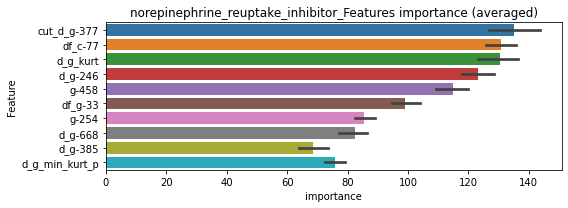

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 norepinephrine_reuptake_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 norepinephrine_reuptake_inhibitor=================================


Early stopping, best iteration is:
[827]	training's binary_logloss: 0.000179487	valid_1's binary_logloss: 0.00153714
Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 norepinephrine_reuptake_inhibitor=================================


Early stopping, best iteration is:
[865]	training's binary_logloss: 0.000176751	valid_1's binary_logloss: 0.000802375
Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 norepinephrine_reuptake_inhibitor=================================


Early stopping, best iteration is:
[869]	training's binary_logloss: 0.000179053	valid_1's binary_logloss: 0.000192508
Training until validation scores don't improve for 30 rounds


norepinephrine_reuptake_inhibitor logloss: 0.0006908031671329312


Early stopping, best iteration is:
[860]	training's binary_logloss: 0.00017739	valid_1's binary_logloss: 0.000229987


nrf2_activator, len(trt): 18, len(othr): 3284
target_rate: 0.0007559 → Adj_target_rate: 0.0009799


selected negative label: 3284


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[535]	training's binary_logloss: 0.000271884	valid_1's binary_logloss: 0.00304281
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[554]	training's binary_logloss: 0.000269338	valid_1's binary_logloss: 0.00362201
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[601]	training's binary_logloss: 0.000270721	valid_1's binary_logloss: 0.000401534
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0011909, Threshold: 0.0042377, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, Expected: 3.0, Threshold: 0.0042377, conf_0:0.00297, conf_1:0.00551
Num_p_label: 1.0, Expected: 3.0, Adj_threshold_1: 0.0342377


Early stopping, best iteration is:
[571]	training's binary_logloss: 0.000268756	valid_1's binary_logloss: 0.000910127


threshold: 0.0342377, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[506]	training's binary_logloss: 0.000271981	valid_1's binary_logloss: 0.00235696
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[532]	training's binary_logloss: 0.000264193	valid_1's binary_logloss: 0.00362322
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[569]	training's binary_logloss: 0.000262111	valid_1's binary_logloss: 0.000367653
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0232914, Threshold: 0.0342377, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0017579 Vs.target_rate: 0.00076
Num_p_label: 7.0, Expected: 3.0, Threshold: 0.0342377, conf_0:0.02739, conf_1:0.04109


Early stopping, best iteration is:
[596]	training's binary_logloss: 0.000259267	valid_1's binary_logloss: 0.000682647


threshold: 0.0342377, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[506]	training's binary_logloss: 0.000271981	valid_1's binary_logloss: 0.00235696
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[532]	training's binary_logloss: 0.000264193	valid_1's binary_logloss: 0.00362322
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[569]	training's binary_logloss: 0.000262111	valid_1's binary_logloss: 0.000367653
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0232914, Threshold: 0.0342377, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0017579 Vs.target_rate: 0.00076
Num_p_label: 7.0, Expected: 3.0, Threshold: 0.0342377, conf_0:0.03081, conf_1:0.03766
threshold: 0.0342377, positive_p_label: 7.0/3982, p_label_rate: 0.0017579


Early stopping, best iteration is:
[596]	training's binary_logloss: 0.000259267	valid_1's binary_logloss: 0.000682647


positive_y_label: 656.0/3808, y_label_rate: 0.1722689


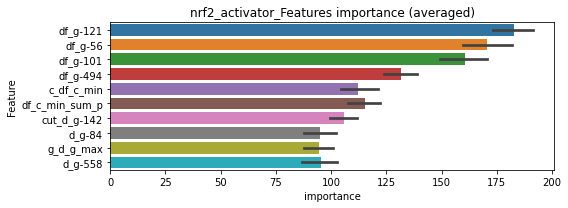

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 nrf2_activator=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[884]	training's binary_logloss: 0.000266487	valid_1's binary_logloss: 0.00151377


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 nrf2_activator=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[929]	training's binary_logloss: 0.000262855	valid_1's binary_logloss: 0.00264846


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 nrf2_activator=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000263859	valid_1's binary_logloss: 0.000365911
Early stopping, best iteration is:
[985]	training's binary_logloss: 0.000263859	valid_1's binary_logloss: 0.000365911


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 nrf2_activator=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[964]	training's binary_logloss: 0.000261254	valid_1's binary_logloss: 0.000921158


nrf2_activator logloss: 0.0013623702444794006
opioid_receptor_agonist, len(trt): 61, len(othr): 3279
target_rate: 0.0025615 → Adj_target_rate: 0.0027652


selected negative label: 3279


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[623]	training's binary_logloss: 0.000661008	valid_1's binary_logloss: 0.0242146
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000724349	valid_1's binary_logloss: 0.0264262
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[730]	training's binary_logloss: 0.000582435	valid_1's binary_logloss: 0.015582
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[634]	training's binary_logloss: 0.00065944	valid_1's binary_logloss: 0.0229464


1 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0047689, Threshold: 0.0161905, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 654/3800
p_label_rate: 0.0100452 Vs.target_rate: 0.00256
Num_p_label: 40.0, Expected: 10.2, Threshold: 0.0161905, conf_0:0.01133, conf_1:0.02105
Num_p_label: 4.0, Expected: 10.2, Adj_threshold_1: 0.0461905
threshold: 0.0461905, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 654.0/3800, y_label_rate: 0.1721053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[473]	training's binary_logloss: 0.00102334	valid_1's binary_logloss: 0.0321153
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[633]	training's binary_logloss: 0.000630831	valid_1's binary_logloss: 0.0213056
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[686]	training's binary_logloss: 0.000587138	valid_1's binary_logloss: 0.0152325
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[589]	training's binary_logloss: 0.000700073	valid_1's binary_logloss: 0.0213429


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0354399, Threshold: 0.0461905, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 650.0/3792
p_label_rate: 0.0148167 Vs.target_rate: 0.00256
Num_p_label: 59.0, Expected: 10.2, Threshold: 0.0461905, conf_0:0.03695, conf_1:0.05543
Num_p_label: 44.0, Expected: 10.2, Adj_threshold_1: 0.0761905
Num_p_label: 34.0, Expected: 10.2, Adj_threshold_2: 0.1061905
Num_p_label: 23.0, Expected: 10.2, Adj_threshold_3: 0.1361905
Num_p_label: 19.0, Expected: 10.2, Adj_threshold_4: 0.1661905
Num_p_label: 16.0, Expected: 10.2, Adj_threshold_5: 0.1961905
Num_p_label: 11.0, Expected: 10.2, Adj_threshold_6: 0.2261905
threshold: 0.2261905, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 650.0/3792, y_label_rate: 0.1714135
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[615]	training's binary_logloss: 0.000641787	valid_1's binary_logloss: 0.0350401
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[579]	training's binary_logloss: 0.000702538	valid_1's binary_logloss: 0.0219236
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[662]	training's binary_logloss: 0.000593644	valid_1's binary_logloss: 0.0120451
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[671]	training's binary_logloss: 0.000585568	valid_1's binary_logloss: 0.010642


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0482339, Threshold: 0.2261905, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 646.0/3784
p_label_rate: 0.0052737 Vs.target_rate: 0.00256
Num_p_label: 21.0, Expected: 10.2, Threshold: 0.2261905, conf_0:0.20357, conf_1:0.24881
Num_p_label: 20.0, Expected: 10.2, Adj_threshold_1: 0.2561905
Num_p_label: 20.0, Expected: 10.2, Adj_threshold_2: 0.2861905
Num_p_label: 16.0, Expected: 10.2, Adj_threshold_3: 0.3161905
Num_p_label: 12.0, Expected: 10.2, Adj_threshold_4: 0.3461905
threshold: 0.3461905, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 646.0/3784, y_label_rate: 0.1707188


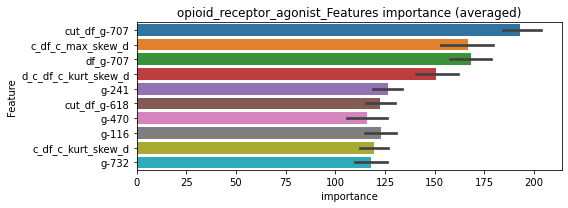

len(train_index) : 2838
len(valid_index) : 946
================================= fold 1/4 opioid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[719]	training's binary_logloss: 0.000647443	valid_1's binary_logloss: 0.0245599


len(train_index) : 2838
len(valid_index) : 946
================================= fold 2/4 opioid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[906]	training's binary_logloss: 0.000560452	valid_1's binary_logloss: 0.0165575


len(train_index) : 2838
len(valid_index) : 946
================================= fold 3/4 opioid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[953]	training's binary_logloss: 0.000554783	valid_1's binary_logloss: 0.0109015


len(train_index) : 2838
len(valid_index) : 946
================================= fold 4/4 opioid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


opioid_receptor_agonist logloss: 0.018661280975708697


Early stopping, best iteration is:
[501]	training's binary_logloss: 0.000889352	valid_1's binary_logloss: 0.0226191


opioid_receptor_antagonist, len(trt): 96, len(othr): 3278
target_rate: 0.0040312 → Adj_target_rate: 0.0040656


selected negative label: 3278


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[691]	training's binary_logloss: 0.000901623	valid_1's binary_logloss: 0.0537353
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[540]	training's binary_logloss: 0.00139872	valid_1's binary_logloss: 0.0477569
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[569]	training's binary_logloss: 0.00129065	valid_1's binary_logloss: 0.0436914
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[563]	training's binary_logloss: 0.00132923	valid_1's binary_logloss: 0.0648987


1 / 3, AUC score:0.996, PR-AUC:0.991
y_Threshold: 0.0105242, Threshold: 0.0415741, pos_neg_ratio: 0.8000000
Remove_noisy_data: 156 → Positive_corect_labels: 643/3777
p_label_rate: 0.0100452 Vs.target_rate: 0.00403
Num_p_label: 40.0, Expected: 16.1, Threshold: 0.0415741, conf_0:0.02910, conf_1:0.05405
Num_p_label: 17.0, Expected: 16.1, Adj_threshold_1: 0.0715741
threshold: 0.0715741, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 643.0/3777, y_label_rate: 0.1702409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[465]	training's binary_logloss: 0.0017133	valid_1's binary_logloss: 0.0520588
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[575]	training's binary_logloss: 0.00105777	valid_1's binary_logloss: 0.0569067
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[605]	training's binary_logloss: 0.00101272	valid_1's binary_logloss: 0.0370445
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[614]	training's binary_logloss: 0.000983128	valid_1's binary_logloss: 0.0308431


2 / 3, AUC score:0.998, PR-AUC:0.997
y_Threshold: 0.0405464, Threshold: 0.0715741, pos_neg_ratio: 0.8000000
Remove_noisy_data: 26 → Positive_corect_labels: 630.0/3751
p_label_rate: 0.0210949 Vs.target_rate: 0.00403
Num_p_label: 84.0, Expected: 16.1, Threshold: 0.0715741, conf_0:0.05726, conf_1:0.08589
Num_p_label: 69.0, Expected: 16.1, Adj_threshold_1: 0.1015741
Num_p_label: 54.0, Expected: 16.1, Adj_threshold_2: 0.1315741
Num_p_label: 47.0, Expected: 16.1, Adj_threshold_3: 0.1615741
Num_p_label: 40.0, Expected: 16.1, Adj_threshold_4: 0.1915741
Num_p_label: 32.0, Expected: 16.1, Adj_threshold_5: 0.2215741
Num_p_label: 28.0, Expected: 16.1, Adj_threshold_6: 0.2515741
Num_p_label: 21.0, Expected: 16.1, Adj_threshold_7: 0.2815741
threshold: 0.2815741, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 630.0/3751, y_label_rate: 0.1679552
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[566]	training's binary_logloss: 0.000997292	valid_1's binary_logloss: 0.0460103
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[651]	training's binary_logloss: 0.000824486	valid_1's binary_logloss: 0.0314305
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[720]	training's binary_logloss: 0.000716393	valid_1's binary_logloss: 0.026455
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[543]	training's binary_logloss: 0.00109909	valid_1's binary_logloss: 0.0288014


3 / 3, AUC score:0.999, PR-AUC:0.998
y_Threshold: 0.0347248, Threshold: 0.2815741, pos_neg_ratio: 0.8000000
Remove_noisy_data: 18 → Positive_corect_labels: 621.0/3733
p_label_rate: 0.0097941 Vs.target_rate: 0.00403
Num_p_label: 39.0, Expected: 16.1, Threshold: 0.2815741, conf_0:0.25342, conf_1:0.30973
Num_p_label: 36.0, Expected: 16.1, Adj_threshold_1: 0.3115741
Num_p_label: 30.0, Expected: 16.1, Adj_threshold_2: 0.3415741
Num_p_label: 25.0, Expected: 16.1, Adj_threshold_3: 0.3715741
Num_p_label: 21.0, Expected: 16.1, Adj_threshold_4: 0.4015741
threshold: 0.4015741, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 621.0/3733, y_label_rate: 0.1663541


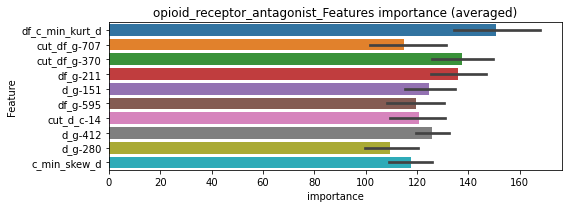

len(train_index) : 2799
len(valid_index) : 934
================================= fold 1/4 opioid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2800
len(valid_index) : 933
================================= fold 2/4 opioid_receptor_antagonist=================================


Early stopping, best iteration is:
[372]	training's binary_logloss: 0.00151875	valid_1's binary_logloss: 0.041621
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[720]	training's binary_logloss: 0.000796854	valid_1's binary_logloss: 0.0271376


len(train_index) : 2800
len(valid_index) : 933
================================= fold 3/4 opioid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2800
len(valid_index) : 933
================================= fold 4/4 opioid_receptor_antagonist=================================


Early stopping, best iteration is:
[516]	training's binary_logloss: 0.00107637	valid_1's binary_logloss: 0.026268
Training until validation scores don't improve for 30 rounds


opioid_receptor_antagonist logloss: 0.029718555595805857


Early stopping, best iteration is:
[451]	training's binary_logloss: 0.00126717	valid_1's binary_logloss: 0.0238349


orexin_receptor_antagonist, len(trt): 37, len(othr): 3286
target_rate: 0.0015537 → Adj_target_rate: 0.0018079


selected negative label: 3286


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[634]	training's binary_logloss: 0.000420036	valid_1's binary_logloss: 0.0101347
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[612]	training's binary_logloss: 0.000431417	valid_1's binary_logloss: 0.00869077
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[631]	training's binary_logloss: 0.000437105	valid_1's binary_logloss: 0.0024203
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[648]	training's binary_logloss: 0.000426568	valid_1's binary_logloss: 0.00240172


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0029644, Threshold: 0.0070740, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00155
Num_p_label: 40.0, Expected: 6.2, Threshold: 0.0070740, conf_0:0.00495, conf_1:0.00920
Num_p_label: 2.0, Expected: 6.2, Adj_threshold_1: 0.0370740
threshold: 0.0370740, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[548]	training's binary_logloss: 0.000475463	valid_1's binary_logloss: 0.0085291
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[627]	training's binary_logloss: 0.000410726	valid_1's binary_logloss: 0.00791626
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[652]	training's binary_logloss: 0.000414949	valid_1's binary_logloss: 0.00305743
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[674]	training's binary_logloss: 0.000402661	valid_1's binary_logloss: 0.00211388


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0238773, Threshold: 0.0370740, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0045203 Vs.target_rate: 0.00155
Num_p_label: 18.0, Expected: 6.2, Threshold: 0.0370740, conf_0:0.02966, conf_1:0.04449
Num_p_label: 7.0, Expected: 6.2, Adj_threshold_1: 0.0670740
threshold: 0.0670740, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[548]	training's binary_logloss: 0.000475463	valid_1's binary_logloss: 0.0085291
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[627]	training's binary_logloss: 0.000410726	valid_1's binary_logloss: 0.00791626
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[652]	training's binary_logloss: 0.000414949	valid_1's binary_logloss: 0.00305743
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[674]	training's binary_logloss: 0.000402661	valid_1's binary_logloss: 0.00211388


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0238773, Threshold: 0.0670740, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0017579 Vs.target_rate: 0.00155
Num_p_label: 7.0, Expected: 6.2, Threshold: 0.0670740, conf_0:0.06037, conf_1:0.07378
threshold: 0.0670740, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


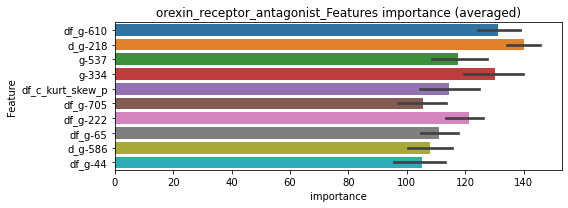

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 orexin_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2858
len(valid_index) : 953


Early stopping, best iteration is:
[656]	training's binary_logloss: 0.000489526	valid_1's binary_logloss: 0.00732738


================================= fold 2/4 orexin_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000397223	valid_1's binary_logloss: 0.00697513
Early stopping, best iteration is:
[973]	training's binary_logloss: 0.000399188	valid_1's binary_logloss: 0.00696989


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 orexin_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[780]	training's binary_logloss: 0.000448879	valid_1's binary_logloss: 0.0028978


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 orexin_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000403501	valid_1's binary_logloss: 0.00230882
Early stopping, best iteration is:
[1094]	training's binary_logloss: 0.000397163	valid_1's binary_logloss: 0.00229514


orexin_receptor_antagonist logloss: 0.0048735009264895554
p38_mapk_inhibitor, len(trt): 62, len(othr): 3286
target_rate: 0.0026035 → Adj_target_rate: 0.0028037


selected negative label: 3286


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[732]	training's binary_logloss: 0.000556835	valid_1's binary_logloss: 0.0193051
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[675]	training's binary_logloss: 0.000604751	valid_1's binary_logloss: 0.0190438
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[634]	training's binary_logloss: 0.000677633	valid_1's binary_logloss: 0.0108791
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[678]	training's binary_logloss: 0.000606013	valid_1's binary_logloss: 0.0216489


1 / 3, AUC score:0.999, PR-AUC:0.998
y_Threshold: 0.0059359, Threshold: 0.0322591, pos_neg_ratio: 0.8000000
Remove_noisy_data: 138 → Positive_corect_labels: 654/3805
p_label_rate: 0.0100452 Vs.target_rate: 0.00260
Num_p_label: 40.0, Expected: 10.4, Threshold: 0.0322591, conf_0:0.02258, conf_1:0.04194
Num_p_label: 19.0, Expected: 10.4, Adj_threshold_1: 0.0622591
Num_p_label: 12.0, Expected: 10.4, Adj_threshold_2: 0.0922591
threshold: 0.0922591, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 654.0/3805, y_label_rate: 0.1718791
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[666]	training's binary_logloss: 0.000573295	valid_1's binary_logloss: 0.0203503
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[670]	training's binary_logloss: 0.000584477	valid_1's binary_logloss: 0.00955606
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[733]	training's binary_logloss: 0.000540684	valid_1's binary_logloss: 0.014438
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[737]	training's binary_logloss: 0.000535951	valid_1's binary_logloss: 0.013905


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0231243, Threshold: 0.0922591, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 653.0/3803
p_label_rate: 0.0055249 Vs.target_rate: 0.00260
Num_p_label: 22.0, Expected: 10.4, Threshold: 0.0922591, conf_0:0.07381, conf_1:0.11071
Num_p_label: 16.0, Expected: 10.4, Adj_threshold_1: 0.1222591
Num_p_label: 10.0, Expected: 10.4, Adj_threshold_2: 0.1522591
threshold: 0.1522591, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 653.0/3803, y_label_rate: 0.1717065
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[758]	training's binary_logloss: 0.000523699	valid_1's binary_logloss: 0.0146417
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[555]	training's binary_logloss: 0.000768365	valid_1's binary_logloss: 0.0162377
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[783]	training's binary_logloss: 0.000525695	valid_1's binary_logloss: 0.00982264
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[750]	training's binary_logloss: 0.000529896	valid_1's binary_logloss: 0.0119425


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0363436, Threshold: 0.1522591, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 652.0/3801
p_label_rate: 0.0027624 Vs.target_rate: 0.00260
Num_p_label: 11.0, Expected: 10.4, Threshold: 0.1522591, conf_0:0.13703, conf_1:0.16749
threshold: 0.1522591, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 652.0/3801, y_label_rate: 0.1715338


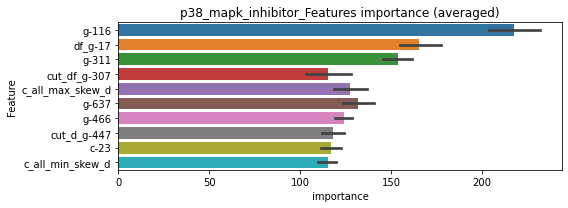

len(train_index) : 2850
len(valid_index) : 951
================================= fold 1/4 p38_mapk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[684]	training's binary_logloss: 0.00067024	valid_1's binary_logloss: 0.0182443


len(train_index) : 2851
len(valid_index) : 950
================================= fold 2/4 p38_mapk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[752]	training's binary_logloss: 0.000627934	valid_1's binary_logloss: 0.0106787


len(train_index) : 2851
len(valid_index) : 950
================================= fold 3/4 p38_mapk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[807]	training's binary_logloss: 0.000597459	valid_1's binary_logloss: 0.00725312


len(train_index) : 2851
len(valid_index) : 950
================================= fold 4/4 p38_mapk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[573]	training's binary_logloss: 0.000783046	valid_1's binary_logloss: 0.0259168


p38_mapk_inhibitor logloss: 0.01552394506520267
p-glycoprotein_inhibitor, len(trt): 24, len(othr): 3286
target_rate: 0.0010078 → Adj_target_rate: 0.0012513


selected negative label: 3286


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[610]	training's binary_logloss: 0.000332629	valid_1's binary_logloss: 0.00123589
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[617]	training's binary_logloss: 0.000327259	valid_1's binary_logloss: 0.00635666
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[608]	training's binary_logloss: 0.000336023	valid_1's binary_logloss: 0.000842041
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0019446, Threshold: 0.0120821, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[629]	training's binary_logloss: 0.000328913	valid_1's binary_logloss: 0.0010436


Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00101
Num_p_label: 40.0, Expected: 4.0, Threshold: 0.0120821, conf_0:0.00846, conf_1:0.01571
Num_p_label: 10.0, Expected: 4.0, Adj_threshold_1: 0.0420821
threshold: 0.0420821, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000321965	valid_1's binary_logloss: 0.00107446
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[566]	training's binary_logloss: 0.00033	valid_1's binary_logloss: 0.00630482
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[644]	training's binary_logloss: 0.000318893	valid_1's binary_logloss: 0.000627182
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0153956, Threshold: 0.0420821, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[593]	training's binary_logloss: 0.00032346	valid_1's binary_logloss: 0.000931191


Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0047715 Vs.target_rate: 0.00101
Num_p_label: 19.0, Expected: 4.0, Threshold: 0.0420821, conf_0:0.03367, conf_1:0.05050
Num_p_label: 9.0, Expected: 4.0, Adj_threshold_1: 0.0720821
threshold: 0.0720821, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000321965	valid_1's binary_logloss: 0.00107446
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[566]	training's binary_logloss: 0.00033	valid_1's binary_logloss: 0.00630482
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[641]	training's binary_logloss: 0.000318893	valid_1's binary_logloss: 0.000627182
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0153956, Threshold: 0.0720821, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811


Early stopping, best iteration is:
[593]	training's binary_logloss: 0.00032346	valid_1's binary_logloss: 0.000931191


p_label_rate: 0.0022602 Vs.target_rate: 0.00101
Num_p_label: 9.0, Expected: 4.0, Threshold: 0.0720821, conf_0:0.06487, conf_1:0.07929
threshold: 0.0720821, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


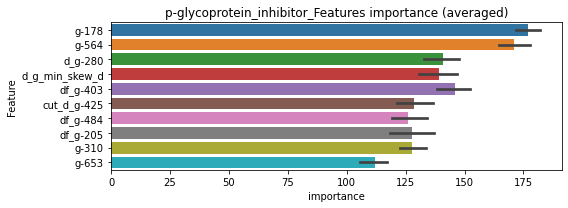

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 p-glycoprotein_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00031485	valid_1's binary_logloss: 0.00113747
Early stopping, best iteration is:
[1035]	training's binary_logloss: 0.000313316	valid_1's binary_logloss: 0.00113348


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 p-glycoprotein_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[935]	training's binary_logloss: 0.000316707	valid_1's binary_logloss: 0.00353775


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 p-glycoprotein_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000318019	valid_1's binary_logloss: 0.000669509
Early stopping, best iteration is:
[1049]	training's binary_logloss: 0.000315683	valid_1's binary_logloss: 0.000665606


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 p-glycoprotein_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[930]	training's binary_logloss: 0.000321855	valid_1's binary_logloss: 0.000848309


p-glycoprotein_inhibitor logloss: 0.001546672610713838
parp_inhibitor, len(trt): 61, len(othr): 3283
target_rate: 0.0025615 → Adj_target_rate: 0.0027652


selected negative label: 3283


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.000674445	valid_1's binary_logloss: 0.0355225
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[694]	training's binary_logloss: 0.000581151	valid_1's binary_logloss: 0.0131185
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[599]	training's binary_logloss: 0.000699194	valid_1's binary_logloss: 0.00961183
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[748]	training's binary_logloss: 0.000548549	valid_1's binary_logloss: 0.0129839


1 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0052940, Threshold: 0.0162957, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 655/3805
p_label_rate: 0.0100452 Vs.target_rate: 0.00256
Num_p_label: 40.0, Expected: 10.2, Threshold: 0.0162957, conf_0:0.01141, conf_1:0.02118
Num_p_label: 5.0, Expected: 10.2, Adj_threshold_1: 0.0462957
threshold: 0.0462957, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 655.0/3805, y_label_rate: 0.1721419
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[659]	training's binary_logloss: 0.000583495	valid_1's binary_logloss: 0.0115197
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[702]	training's binary_logloss: 0.000553808	valid_1's binary_logloss: 0.0133881
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[756]	training's binary_logloss: 0.000534744	valid_1's binary_logloss: 0.00580814
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[597]	training's binary_logloss: 0.000651858	valid_1's binary_logloss: 0.0152243


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0387952, Threshold: 0.0462957, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 654.0/3803
p_label_rate: 0.0077850 Vs.target_rate: 0.00256
Num_p_label: 31.0, Expected: 10.2, Threshold: 0.0462957, conf_0:0.03704, conf_1:0.05555
Num_p_label: 18.0, Expected: 10.2, Adj_threshold_1: 0.0762957
Num_p_label: 10.0, Expected: 10.2, Adj_threshold_2: 0.1062957
threshold: 0.1062957, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 654.0/3803, y_label_rate: 0.1719695
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[636]	training's binary_logloss: 0.000597175	valid_1's binary_logloss: 0.0202537
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[483]	training's binary_logloss: 0.000912576	valid_1's binary_logloss: 0.0250482
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[644]	training's binary_logloss: 0.00060188	valid_1's binary_logloss: 0.00641252
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[675]	training's binary_logloss: 0.000561994	valid_1's binary_logloss: 0.013072


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0300142, Threshold: 0.1062957, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 652.0/3799
p_label_rate: 0.0035158 Vs.target_rate: 0.00256
Num_p_label: 14.0, Expected: 10.2, Threshold: 0.1062957, conf_0:0.09567, conf_1:0.11693
threshold: 0.1062957, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 652.0/3799, y_label_rate: 0.1716241


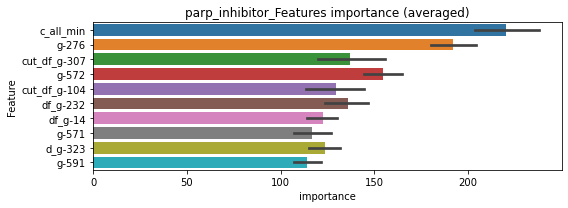

len(train_index) : 2849
len(valid_index) : 950
================================= fold 1/4 parp_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[916]	training's binary_logloss: 0.00056754	valid_1's binary_logloss: 0.0103296


len(train_index) : 2849
len(valid_index) : 950
================================= fold 2/4 parp_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[734]	training's binary_logloss: 0.000633039	valid_1's binary_logloss: 0.0147734


len(train_index) : 2849
len(valid_index) : 950
================================= fold 3/4 parp_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000555033	valid_1's binary_logloss: 0.00616918
Early stopping, best iteration is:
[1002]	training's binary_logloss: 0.000554454	valid_1's binary_logloss: 0.006159


len(train_index) : 2850
len(valid_index) : 949
================================= fold 4/4 parp_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[821]	training's binary_logloss: 0.000588964	valid_1's binary_logloss: 0.015299


parp_inhibitor logloss: 0.011639340249610287


mutually exclusive columns: pdgfr_inhibitor


pdgfr_inhibitor, len(trt): 297, len(othr): 7380
target_rate: 0.0124717 → Adj_target_rate: 0.0106179


selected negative label: 7380


unpredictable_cols:pdgfr_inhibitor → create_features


N_features:358
================= Pseudo labeling 1 / 3 =================



Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0433508	valid_1's binary_logloss: 0.137122
[2000]	training's binary_logloss: 0.0208791	valid_1's binary_logloss: 0.125094
Early stopping, best iteration is:
[2111]	training's binary_logloss: 0.0197154	valid_1's binary_logloss: 0.124431
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0428595	valid_1's binary_logloss: 0.139789
Early stopping, best iteration is:
[1901]	training's binary_logloss: 0.0218873	valid_1's binary_logloss: 0.126773
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0436768	valid_1's binary_logloss: 0.127703
[2000]	training's binary_logloss: 0.0209728	valid_1's binary_logloss: 0.112367
Early stopping, best iteration is:
[2176]	training's binary_logloss: 0.0191881	valid_1's binary_logloss: 0.111015
Training until validation scores don't improve for 30 rounds
[1000]	training's 

1 / 3, AUC score:0.975, PR-AUC:0.953
y_Threshold: 0.0661837, Threshold: 0.1120077, pos_neg_ratio: 0.8000000
Remove_noisy_data: 500 → Positive_corect_labels: 1374/8356
p_label_rate: 0.0100452 Vs.target_rate: 0.01247
Num_p_label: 40.0, Expected: 49.7, Threshold: 0.1120077, conf_0:0.07841, conf_1:0.14561
threshold: 0.1120077, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1374.0/8356, y_label_rate: 0.1644327
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0344448	valid_1's binary_logloss: 0.0969039
[2000]	training's binary_logloss: 0.0164292	valid_1's binary_logloss: 0.0800325
[3000]	training's binary_logloss: 0.0106571	valid_1's binary_logloss: 0.0742621
Early stopping, best iteration is:
[3013]	training's binary_logloss: 0.010606	valid_1's binary_logloss: 0.0741711
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0347369	valid_1's binary_logloss: 0.0962309
[2000]	training's binary_logloss: 0.0165522	valid_1's binary_logloss: 0.0789309
[3000]	training's binary_logloss: 0.010697	valid_1's binary_logloss: 0.0727755
Early stopping, best iteration is:
[3096]	training's binary_logloss: 0.0103494	valid_1's binary_logloss: 0.0724502
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0348046	valid_1's binary_logloss: 0.0925707
[2000]	training's binary_logl

2 / 3, AUC score:0.996, PR-AUC:0.990
y_Threshold: 0.0799182, Threshold: 0.1120077, pos_neg_ratio: 0.8000000
Remove_noisy_data: 112 → Positive_corect_labels: 1318.0/8244
p_label_rate: 0.0107986 Vs.target_rate: 0.01247
Num_p_label: 43.0, Expected: 49.7, Threshold: 0.1120077, conf_0:0.08961, conf_1:0.13441
threshold: 0.1120077, positive_p_label: 43.0/3982, p_label_rate: 0.0107986
positive_y_label: 1318.0/8244, y_label_rate: 0.1598738
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0305884	valid_1's binary_logloss: 0.0923126
[2000]	training's binary_logloss: 0.0146398	valid_1's binary_logloss: 0.0783584
[3000]	training's binary_logloss: 0.00951399	valid_1's binary_logloss: 0.0736609
Early stopping, best iteration is:
[3256]	training's binary_logloss: 0.00873339	valid_1's binary_logloss: 0.0729109
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.030656	valid_1's binary_logloss: 0.0971329
[2000]	training's binary_logloss: 0.0146081	valid_1's binary_logloss: 0.0848103
Early stopping, best iteration is:
[2417]	training's binary_logloss: 0.0119294	valid_1's binary_logloss: 0.0827217
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0308198	valid_1's binary_logloss: 0.0885071
[2000]	training's binary_logloss: 0.0147438	valid_1's binary_logloss: 0.0735631
Early stopping, best itera

3 / 3, AUC score:0.995, PR-AUC:0.989
y_Threshold: 0.0749585, Threshold: 0.1120077, pos_neg_ratio: 0.8000000
Remove_noisy_data: 102 → Positive_corect_labels: 1267.0/8142
p_label_rate: 0.0115520 Vs.target_rate: 0.01247
Num_p_label: 46.0, Expected: 49.7, Threshold: 0.1120077, conf_0:0.10081, conf_1:0.12321
threshold: 0.1120077, positive_p_label: 46.0/3982, p_label_rate: 0.0115520
positive_y_label: 1267.0/8142, y_label_rate: 0.1556129


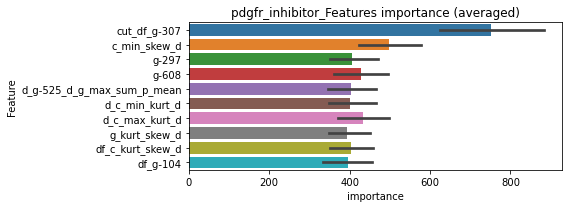

len(train_index) : 6106
len(valid_index) : 2036
================================= fold 1/4 pdgfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.027602	valid_1's binary_logloss: 0.0762546
[2000]	training's binary_logloss: 0.0132324	valid_1's binary_logloss: 0.0623744
Early stopping, best iteration is:
[2608]	training's binary_logloss: 0.0100083	valid_1's binary_logloss: 0.058839


len(train_index) : 6106
len(valid_index) : 2036
================================= fold 2/4 pdgfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0274519	valid_1's binary_logloss: 0.0761936
[2000]	training's binary_logloss: 0.0132043	valid_1's binary_logloss: 0.0603313
[3000]	training's binary_logloss: 0.00860909	valid_1's binary_logloss: 0.0546701
Early stopping, best iteration is:
[3490]	training's binary_logloss: 0.00733112	valid_1's binary_logloss: 0.0530856


len(train_index) : 6107
len(valid_index) : 2035
================================= fold 3/4 pdgfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0283422	valid_1's binary_logloss: 0.066825
[2000]	training's binary_logloss: 0.0136464	valid_1's binary_logloss: 0.051553
[3000]	training's binary_logloss: 0.00886532	valid_1's binary_logloss: 0.0459337
Early stopping, best iteration is:
[3058]	training's binary_logloss: 0.00869032	valid_1's binary_logloss: 0.0457132


len(train_index) : 6107
len(valid_index) : 2035
================================= fold 4/4 pdgfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0283815	valid_1's binary_logloss: 0.0690141
[2000]	training's binary_logloss: 0.0135872	valid_1's binary_logloss: 0.0531559
[3000]	training's binary_logloss: 0.00882843	valid_1's binary_logloss: 0.0470039
[4000]	training's binary_logloss: 0.00655019	valid_1's binary_logloss: 0.0439134
[5000]	training's binary_logloss: 0.00522057	valid_1's binary_logloss: 0.0421707
Early stopping, best iteration is:
[5373]	training's binary_logloss: 0.00486168	valid_1's binary_logloss: 0.0416297


pdgfr_inhibitor logloss: 0.04981839809825016
pdgfr_inhibitor is unpredictable(><)!
pdk_inhibitor, len(trt): 18, len(othr): 3288
target_rate: 0.0007559 → Adj_target_rate: 0.0009799


selected negative label: 3288


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[534]	training's binary_logloss: 0.000304271	valid_1's binary_logloss: 0.000892234
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[515]	training's binary_logloss: 0.000305909	valid_1's binary_logloss: 0.00431062
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[500]	training's binary_logloss: 0.000315404	valid_1's binary_logloss: 0.00206239
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[559]	training's binary_logloss: 0.000304058	valid_1's binary_logloss: 0.00114249


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0016664, Threshold: 0.0075581, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, Expected: 3.0, Threshold: 0.0075581, conf_0:0.00529, conf_1:0.00983
Num_p_label: 5.0, Expected: 3.0, Adj_threshold_1: 0.0375581
threshold: 0.0375581, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[536]	training's binary_logloss: 0.000297554	valid_1's binary_logloss: 0.000744259
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[508]	training's binary_logloss: 0.000294711	valid_1's binary_logloss: 0.00438474
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[522]	training's binary_logloss: 0.000301437	valid_1's binary_logloss: 0.00288555
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[535]	training's binary_logloss: 0.000297086	valid_1's binary_logloss: 0.000729317


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0259495, Threshold: 0.0375581, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0077850 Vs.target_rate: 0.00076
Num_p_label: 31.0, Expected: 3.0, Threshold: 0.0375581, conf_0:0.03005, conf_1:0.04507
Num_p_label: 18.0, Expected: 3.0, Adj_threshold_1: 0.0675581
Num_p_label: 12.0, Expected: 3.0, Adj_threshold_2: 0.0975581
Num_p_label: 7.0, Expected: 3.0, Adj_threshold_3: 0.1275581
threshold: 0.1275581, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[535]	training's binary_logloss: 0.000297554	valid_1's binary_logloss: 0.000744259
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[508]	training's binary_logloss: 0.000294711	valid_1's binary_logloss: 0.00438474
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[522]	training's binary_logloss: 0.000301437	valid_1's binary_logloss: 0.00288555
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0259495, Threshold: 0.1275581, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0017579 Vs.target_rate: 0.00076
Num_p_label: 7.0, Expected: 3.0, Threshold: 0.1275581, conf_0:0.11480, conf_1:0.14031


Early stopping, best iteration is:
[534]	training's binary_logloss: 0.000297086	valid_1's binary_logloss: 0.000729317


threshold: 0.1275581, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


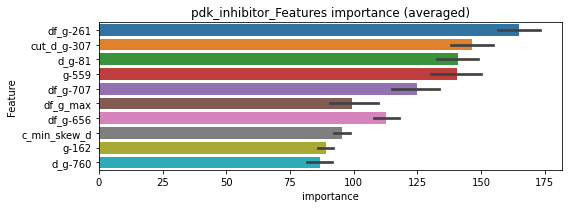

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 pdk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[803]	training's binary_logloss: 0.000295306	valid_1's binary_logloss: 0.000678853


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 pdk_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 pdk_inhibitor=================================


Early stopping, best iteration is:
[664]	training's binary_logloss: 0.000314865	valid_1's binary_logloss: 0.00301209
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[701]	training's binary_logloss: 0.00031522	valid_1's binary_logloss: 0.00204934


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 pdk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[799]	training's binary_logloss: 0.000299235	valid_1's binary_logloss: 0.000680517


pdk_inhibitor logloss: 0.0016049754939133289


mutually exclusive columns: phosphodiesterase_inhibitor


phosphodiesterase_inhibitor, len(trt): 264, len(othr): 7176
target_rate: 0.0110859 → Adj_target_rate: 0.0096064


selected negative label: 7176


unpredictable_cols:phosphodiesterase_inhibitor → create_features


N_features:358
================= Pseudo labeling 1 / 3 =================



Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0375935	valid_1's binary_logloss: 0.121906
Early stopping, best iteration is:
[1585]	training's binary_logloss: 0.0229691	valid_1's binary_logloss: 0.116091
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0381393	valid_1's binary_logloss: 0.116097
Early stopping, best iteration is:
[1844]	training's binary_logloss: 0.0201287	valid_1's binary_logloss: 0.108463
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0375636	valid_1's binary_logloss: 0.119233
Early stopping, best iteration is:
[1760]	training's binary_logloss: 0.0206452	valid_1's binary_logloss: 0.111839
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0384314	valid_1's binary_logloss: 0.121915
Early stopping, best iteration is:
[1739]	training's binary_logloss: 0.0215417	valid_1's binary_l

1 / 3, AUC score:0.977, PR-AUC:0.952
y_Threshold: 0.0597925, Threshold: 0.1164582, pos_neg_ratio: 0.8000000
Remove_noisy_data: 502 → Positive_corect_labels: 1328/8109
p_label_rate: 0.0100452 Vs.target_rate: 0.01109
Num_p_label: 40.0, Expected: 44.1, Threshold: 0.1164582, conf_0:0.08152, conf_1:0.15140
threshold: 0.1164582, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1328.0/8109, y_label_rate: 0.1637687
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0275183	valid_1's binary_logloss: 0.0782062
[2000]	training's binary_logloss: 0.0131595	valid_1's binary_logloss: 0.0676247
Early stopping, best iteration is:
[2661]	training's binary_logloss: 0.00966952	valid_1's binary_logloss: 0.064996
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0270826	valid_1's binary_logloss: 0.0812909
[2000]	training's binary_logloss: 0.012888	valid_1's binary_logloss: 0.0715937
Early stopping, best iteration is:
[2091]	training's binary_logloss: 0.0123035	valid_1's binary_logloss: 0.0712631
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0273067	valid_1's binary_logloss: 0.0802186
[2000]	training's binary_logloss: 0.0130013	valid_1's binary_logloss: 0.0702409
Early stopping, best iteration is:
[2761]	training's binary_logloss: 0.00920794	valid_1's binary_logloss: 0.

2 / 3, AUC score:0.997, PR-AUC:0.990
y_Threshold: 0.0695963, Threshold: 0.1164582, pos_neg_ratio: 0.8000000
Remove_noisy_data: 112 → Positive_corect_labels: 1272.0/7997
p_label_rate: 0.0165746 Vs.target_rate: 0.01109
Num_p_label: 66.0, Expected: 44.1, Threshold: 0.1164582, conf_0:0.09317, conf_1:0.13975
threshold: 0.1164582, positive_p_label: 66.0/3982, p_label_rate: 0.0165746
positive_y_label: 1272.0/7997, y_label_rate: 0.1590596
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.022688	valid_1's binary_logloss: 0.060311
[2000]	training's binary_logloss: 0.0109674	valid_1's binary_logloss: 0.0513284
[3000]	training's binary_logloss: 0.00715788	valid_1's binary_logloss: 0.0484965
Early stopping, best iteration is:
[3011]	training's binary_logloss: 0.00713179	valid_1's binary_logloss: 0.0484783
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0224943	valid_1's binary_logloss: 0.0653999
[2000]	training's binary_logloss: 0.0108547	valid_1's binary_logloss: 0.0566885
Early stopping, best iteration is:
[2810]	training's binary_logloss: 0.0075939	valid_1's binary_logloss: 0.0542942
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0230294	valid_1's binary_logloss: 0.0598611
[2000]	training's binary_logloss: 0.0111035	valid_1's binary_logloss: 0.0506828
[3000]	training's binary_lo

3 / 3, AUC score:0.998, PR-AUC:0.994
y_Threshold: 0.0605893, Threshold: 0.1164582, pos_neg_ratio: 0.8000000
Remove_noisy_data: 80 → Positive_corect_labels: 1232.0/7917
p_label_rate: 0.0113009 Vs.target_rate: 0.01109
Num_p_label: 45.0, Expected: 44.1, Threshold: 0.1164582, conf_0:0.10481, conf_1:0.12810
threshold: 0.1164582, positive_p_label: 45.0/3982, p_label_rate: 0.0113009
positive_y_label: 1232.0/7917, y_label_rate: 0.1556145


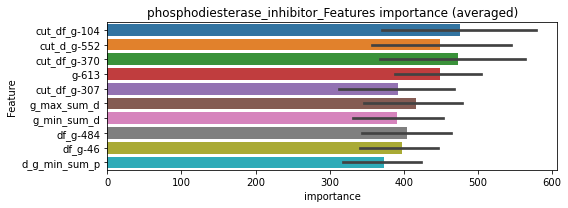

len(train_index) : 5937
len(valid_index) : 1980
================================= fold 1/4 phosphodiesterase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0198218	valid_1's binary_logloss: 0.0437518
[2000]	training's binary_logloss: 0.00961026	valid_1's binary_logloss: 0.0341896
[3000]	training's binary_logloss: 0.00630993	valid_1's binary_logloss: 0.0308978
[4000]	training's binary_logloss: 0.00471045	valid_1's binary_logloss: 0.0291247
Early stopping, best iteration is:
[4002]	training's binary_logloss: 0.00470764	valid_1's binary_logloss: 0.0291191


len(train_index) : 5938
len(valid_index) : 1979
================================= fold 2/4 phosphodiesterase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0199498	valid_1's binary_logloss: 0.046525
[2000]	training's binary_logloss: 0.00969018	valid_1's binary_logloss: 0.0363626
[3000]	training's binary_logloss: 0.00634645	valid_1's binary_logloss: 0.0330127
Early stopping, best iteration is:
[3337]	training's binary_logloss: 0.00569282	valid_1's binary_logloss: 0.0323285


len(train_index) : 5938
len(valid_index) : 1979
================================= fold 3/4 phosphodiesterase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0194789	valid_1's binary_logloss: 0.0510504
[2000]	training's binary_logloss: 0.0094406	valid_1's binary_logloss: 0.0416749
[3000]	training's binary_logloss: 0.00620011	valid_1's binary_logloss: 0.0383671
Early stopping, best iteration is:
[3449]	training's binary_logloss: 0.00537384	valid_1's binary_logloss: 0.0374049


len(train_index) : 5938
len(valid_index) : 1979
================================= fold 4/4 phosphodiesterase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.019836	valid_1's binary_logloss: 0.0445894
[2000]	training's binary_logloss: 0.00961407	valid_1's binary_logloss: 0.0353289
[3000]	training's binary_logloss: 0.00632576	valid_1's binary_logloss: 0.0324863
Early stopping, best iteration is:
[3337]	training's binary_logloss: 0.00567319	valid_1's binary_logloss: 0.0318637


phosphodiesterase_inhibitor logloss: 0.032678622141158055
phosphodiesterase_inhibitor is unpredictable(><)!
phospholipase_inhibitor, len(trt): 25, len(othr): 3288
target_rate: 0.0010498 → Adj_target_rate: 0.0012955


selected negative label: 3288


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[606]	training's binary_logloss: 0.000343633	valid_1's binary_logloss: 0.0038773
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[610]	training's binary_logloss: 0.000340607	valid_1's binary_logloss: 0.00735473
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[565]	training's binary_logloss: 0.000364106	valid_1's binary_logloss: 0.00209834
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[595]	training's binary_logloss: 0.000349637	valid_1's binary_logloss: 0.00282893


y_Threshold: 0.0021175, Threshold: 0.0076945, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00105
Num_p_label: 40.0, Expected: 4.2, Threshold: 0.0076945, conf_0:0.00539, conf_1:0.01000
Num_p_label: 3.0, Expected: 4.2, Adj_threshold_1: 0.0376945
threshold: 0.0376945, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[550]	training's binary_logloss: 0.000353001	valid_1's binary_logloss: 0.00362665
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[617]	training's binary_logloss: 0.00033349	valid_1's binary_logloss: 0.00706058
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[570]	training's binary_logloss: 0.000345536	valid_1's binary_logloss: 0.00217536
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0298682, Threshold: 0.0376945, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813


Early stopping, best iteration is:
[587]	training's binary_logloss: 0.00034088	valid_1's binary_logloss: 0.00238822


p_label_rate: 0.0027624 Vs.target_rate: 0.00105
Num_p_label: 11.0, Expected: 4.2, Threshold: 0.0376945, conf_0:0.03016, conf_1:0.04523
Num_p_label: 4.0, Expected: 4.2, Adj_threshold_1: 0.0676945
threshold: 0.0676945, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[550]	training's binary_logloss: 0.000353001	valid_1's binary_logloss: 0.00362665
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[617]	training's binary_logloss: 0.00033349	valid_1's binary_logloss: 0.00706058
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[570]	training's binary_logloss: 0.000345536	valid_1's binary_logloss: 0.00217536
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0298682, Threshold: 0.0676945, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[590]	training's binary_logloss: 0.00034088	valid_1's binary_logloss: 0.00238822


Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0010045 Vs.target_rate: 0.00105
Num_p_label: 4.0, Expected: 4.2, Threshold: 0.0676945, conf_0:0.06093, conf_1:0.07446
threshold: 0.0676945, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


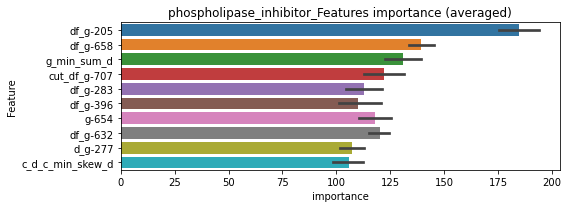

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 phospholipase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[965]	training's binary_logloss: 0.000334501	valid_1's binary_logloss: 0.00202428


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 phospholipase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[764]	training's binary_logloss: 0.000358197	valid_1's binary_logloss: 0.00407364


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 phospholipase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[915]	training's binary_logloss: 0.000344979	valid_1's binary_logloss: 0.00190887


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 phospholipase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[805]	training's binary_logloss: 0.000350412	valid_1's binary_logloss: 0.00178075


phospholipase_inhibitor logloss: 0.0024469378771120607


mutually exclusive columns: pi3k_inhibitor


pi3k_inhibitor, len(trt): 151, len(othr): 4110
target_rate: 0.0063408 → Adj_target_rate: 0.0059749


selected negative label: 4110


unpredictable_cols:pi3k_inhibitor → create_features


N_features:358
================= Pseudo labeling 1 / 3 =================



Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.03994	valid_1's binary_logloss: 0.104637
[2000]	training's binary_logloss: 0.0198862	valid_1's binary_logloss: 0.0864725
[3000]	training's binary_logloss: 0.0134086	valid_1's binary_logloss: 0.079848
Early stopping, best iteration is:
[3440]	training's binary_logloss: 0.0117886	valid_1's binary_logloss: 0.0782125
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0385867	valid_1's binary_logloss: 0.120423
[2000]	training's binary_logloss: 0.0186767	valid_1's binary_logloss: 0.103052
Early stopping, best iteration is:
[2360]	training's binary_logloss: 0.0157038	valid_1's binary_logloss: 0.100309
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0399786	valid_1's binary_logloss: 0.111396
[2000]	training's binary_logloss: 0.0200008	valid_1's binary_logloss: 0.0930817
Early stopping, best iteration is:

1 / 3, AUC score:0.990, PR-AUC:0.973
y_Threshold: 0.0645101, Threshold: 0.1417387, pos_neg_ratio: 0.8000000
Remove_noisy_data: 231 → Positive_corect_labels: 789/4701
p_label_rate: 0.0100452 Vs.target_rate: 0.00634
Num_p_label: 40.0, Expected: 25.2, Threshold: 0.1417387, conf_0:0.09922, conf_1:0.18426
Num_p_label: 25.0, Expected: 25.2, Adj_threshold_1: 0.1717387
threshold: 0.1717387, positive_p_label: 25.0/3982, p_label_rate: 0.0062783
positive_y_label: 789.0/4701, y_label_rate: 0.1678366
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0340541	valid_1's binary_logloss: 0.0849379
[2000]	training's binary_logloss: 0.0164449	valid_1's binary_logloss: 0.0643767
[3000]	training's binary_logloss: 0.0107974	valid_1's binary_logloss: 0.0570217
[4000]	training's binary_logloss: 0.00801971	valid_1's binary_logloss: 0.0531523
[5000]	training's binary_logloss: 0.00640074	valid_1's binary_logloss: 0.0506513
[6000]	training's binary_logloss: 0.00534567	valid_1's binary_logloss: 0.0488092
Early stopping, best iteration is:
[6012]	training's binary_logloss: 0.00533467	valid_1's binary_logloss: 0.0487856
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0335148	valid_1's binary_logloss: 0.0993281
[2000]	training's binary_logloss: 0.0161966	valid_1's binary_logloss: 0.0827901
[3000]	training's binary_logloss: 0.0105982	valid_1's binary_logloss: 0.0770052
Early stopping, best iteration is:
[320

2 / 3, AUC score:0.997, PR-AUC:0.993
y_Threshold: 0.0894218, Threshold: 0.1717387, pos_neg_ratio: 0.8000000
Remove_noisy_data: 46 → Positive_corect_labels: 766.0/4655
p_label_rate: 0.0118031 Vs.target_rate: 0.00634
Num_p_label: 47.0, Expected: 25.2, Threshold: 0.1717387, conf_0:0.13739, conf_1:0.20609
Num_p_label: 39.0, Expected: 25.2, Adj_threshold_1: 0.2017387
Num_p_label: 23.0, Expected: 25.2, Adj_threshold_2: 0.2317387
threshold: 0.2317387, positive_p_label: 23.0/3982, p_label_rate: 0.0057760
positive_y_label: 766.0/4655, y_label_rate: 0.1645542
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0317322	valid_1's binary_logloss: 0.0894863
[2000]	training's binary_logloss: 0.0153428	valid_1's binary_logloss: 0.0711844
Early stopping, best iteration is:
[2870]	training's binary_logloss: 0.0105358	valid_1's binary_logloss: 0.0651164
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0313782	valid_1's binary_logloss: 0.0882159
[2000]	training's binary_logloss: 0.0152232	valid_1's binary_logloss: 0.0704373
[3000]	training's binary_logloss: 0.00997948	valid_1's binary_logloss: 0.0634206
[4000]	training's binary_logloss: 0.00742597	valid_1's binary_logloss: 0.0597662
[5000]	training's binary_logloss: 0.00593251	valid_1's binary_logloss: 0.057346
Early stopping, best iteration is:
[5438]	training's binary_logloss: 0.00545802	valid_1's binary_logloss: 0.0565884
Training until validation scores don't improve for 30 rounds
[1000]	training's binary

3 / 3, AUC score:0.999, PR-AUC:0.997
y_Threshold: 0.0883288, Threshold: 0.2317387, pos_neg_ratio: 0.8000000
Remove_noisy_data: 26 → Positive_corect_labels: 753.0/4629
p_label_rate: 0.0077850 Vs.target_rate: 0.00634
Num_p_label: 31.0, Expected: 25.2, Threshold: 0.2317387, conf_0:0.20856, conf_1:0.25491
threshold: 0.2317387, positive_p_label: 31.0/3982, p_label_rate: 0.0077850
positive_y_label: 753.0/4629, y_label_rate: 0.1626701


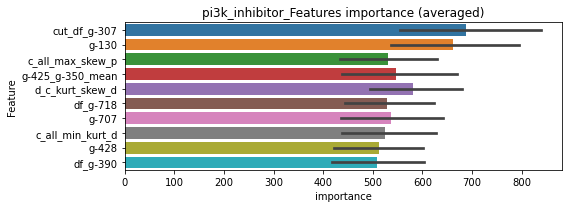

len(train_index) : 3471
len(valid_index) : 1158
================================= fold 1/4 pi3k_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.030584	valid_1's binary_logloss: 0.0812672
[2000]	training's binary_logloss: 0.0148424	valid_1's binary_logloss: 0.0644848
[3000]	training's binary_logloss: 0.00975912	valid_1's binary_logloss: 0.0583781
[4000]	training's binary_logloss: 0.00727923	valid_1's binary_logloss: 0.055021
[5000]	training's binary_logloss: 0.00581473	valid_1's binary_logloss: 0.0529377
Early stopping, best iteration is:
[5446]	training's binary_logloss: 0.00534075	valid_1's binary_logloss: 0.0522239


len(train_index) : 3472
len(valid_index) : 1157
================================= fold 2/4 pi3k_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0303872	valid_1's binary_logloss: 0.0888839
[2000]	training's binary_logloss: 0.0147604	valid_1's binary_logloss: 0.0708779
[3000]	training's binary_logloss: 0.00969458	valid_1's binary_logloss: 0.0641352
[4000]	training's binary_logloss: 0.00722259	valid_1's binary_logloss: 0.0607161
[5000]	training's binary_logloss: 0.00577129	valid_1's binary_logloss: 0.0584498
Early stopping, best iteration is:
[5743]	training's binary_logloss: 0.00503498	valid_1's binary_logloss: 0.0572278


len(train_index) : 3472
len(valid_index) : 1157
================================= fold 3/4 pi3k_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0318972	valid_1's binary_logloss: 0.0703476
[2000]	training's binary_logloss: 0.0153815	valid_1's binary_logloss: 0.0499192
[3000]	training's binary_logloss: 0.0101003	valid_1's binary_logloss: 0.042595
[4000]	training's binary_logloss: 0.00753608	valid_1's binary_logloss: 0.038524
[5000]	training's binary_logloss: 0.00602544	valid_1's binary_logloss: 0.0358928
[6000]	training's binary_logloss: 0.00502723	valid_1's binary_logloss: 0.0341487
Early stopping, best iteration is:
[6632]	training's binary_logloss: 0.00456359	valid_1's binary_logloss: 0.0333205


len(train_index) : 3472
len(valid_index) : 1157
================================= fold 4/4 pi3k_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0300938	valid_1's binary_logloss: 0.0888361
[2000]	training's binary_logloss: 0.0146364	valid_1's binary_logloss: 0.0706651
[3000]	training's binary_logloss: 0.00960654	valid_1's binary_logloss: 0.0642787
[4000]	training's binary_logloss: 0.00716658	valid_1's binary_logloss: 0.0607031
Early stopping, best iteration is:
[4039]	training's binary_logloss: 0.00709556	valid_1's binary_logloss: 0.0605656


pi3k_inhibitor logloss: 0.05083475746825732
pi3k_inhibitor is unpredictable(><)!
pkc_inhibitor, len(trt): 31, len(othr): 3284
target_rate: 0.0013018 → Adj_target_rate: 0.0015554


selected negative label: 3284


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[609]	training's binary_logloss: 0.000408809	valid_1's binary_logloss: 0.00471703
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[579]	training's binary_logloss: 0.000427115	valid_1's binary_logloss: 0.00459992
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[622]	training's binary_logloss: 0.000414613	valid_1's binary_logloss: 0.00107484
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[608]	training's binary_logloss: 0.00040892	valid_1's binary_logloss: 0.00623201


y_Threshold: 0.0023843, Threshold: 0.0068035, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00130
Num_p_label: 40.0, Expected: 5.2, Threshold: 0.0068035, conf_0:0.00476, conf_1:0.00884
Num_p_label: 4.0, Expected: 5.2, Adj_threshold_1: 0.0368035
threshold: 0.0368035, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[583]	training's binary_logloss: 0.000412109	valid_1's binary_logloss: 0.0043681
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[554]	training's binary_logloss: 0.000429242	valid_1's binary_logloss: 0.0042785
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[589]	training's binary_logloss: 0.000414024	valid_1's binary_logloss: 0.00114736
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[630]	training's binary_logloss: 0.000391783	valid_1's binary_logloss: 0.00559761


y_Threshold: 0.0339684, Threshold: 0.0368035, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0035158 Vs.target_rate: 0.00130
Num_p_label: 14.0, Expected: 5.2, Threshold: 0.0368035, conf_0:0.02944, conf_1:0.04416
Num_p_label: 6.0, Expected: 5.2, Adj_threshold_1: 0.0668035
threshold: 0.0668035, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[583]	training's binary_logloss: 0.000412109	valid_1's binary_logloss: 0.0043681
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[554]	training's binary_logloss: 0.000429242	valid_1's binary_logloss: 0.0042785
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[589]	training's binary_logloss: 0.000414024	valid_1's binary_logloss: 0.00114736
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[630]	training's binary_logloss: 0.000391783	valid_1's binary_logloss: 0.00559761


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0339684, Threshold: 0.0668035, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0015068 Vs.target_rate: 0.00130
Num_p_label: 6.0, Expected: 5.2, Threshold: 0.0668035, conf_0:0.06012, conf_1:0.07348
threshold: 0.0668035, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 656.0/3808, y_label_rate: 0.1722689


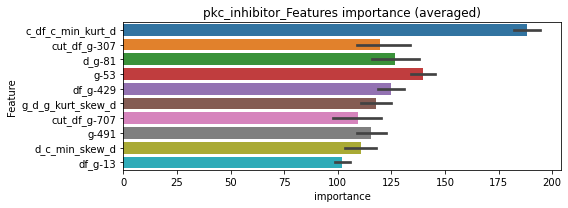

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 pkc_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[851]	training's binary_logloss: 0.000411918	valid_1's binary_logloss: 0.00303297


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 pkc_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[819]	training's binary_logloss: 0.0004155	valid_1's binary_logloss: 0.00347342


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 pkc_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[926]	training's binary_logloss: 0.000406907	valid_1's binary_logloss: 0.00121442


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 pkc_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[862]	training's binary_logloss: 0.000407709	valid_1's binary_logloss: 0.00392895


pkc_inhibitor logloss: 0.00291270900623659
potassium_channel_activator, len(trt): 55, len(othr): 3279
target_rate: 0.0023096 → Adj_target_rate: 0.0025322


selected negative label: 3279


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[623]	training's binary_logloss: 0.000599243	valid_1's binary_logloss: 0.0225255
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[704]	training's binary_logloss: 0.000543525	valid_1's binary_logloss: 0.00963871
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[599]	training's binary_logloss: 0.000655802	valid_1's binary_logloss: 0.0137463
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[568]	training's binary_logloss: 0.000692581	valid_1's binary_logloss: 0.0290582


1 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0048284, Threshold: 0.0233133, pos_neg_ratio: 0.8000000
Remove_noisy_data: 136 → Positive_corect_labels: 653/3798
p_label_rate: 0.0100452 Vs.target_rate: 0.00231
Num_p_label: 40.0, Expected: 9.2, Threshold: 0.0233133, conf_0:0.01632, conf_1:0.03031
Num_p_label: 16.0, Expected: 9.2, Adj_threshold_1: 0.0533133
threshold: 0.0533133, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 653.0/3798, y_label_rate: 0.1719326
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[604]	training's binary_logloss: 0.000587025	valid_1's binary_logloss: 0.0183903
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[633]	training's binary_logloss: 0.000568256	valid_1's binary_logloss: 0.0127054
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[696]	training's binary_logloss: 0.000516879	valid_1's binary_logloss: 0.0145922
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[552]	training's binary_logloss: 0.000715454	valid_1's binary_logloss: 0.0139639


y_Threshold: 0.0330723, Threshold: 0.0533133, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 650.0/3792
p_label_rate: 0.0205927 Vs.target_rate: 0.00231
Num_p_label: 82.0, Expected: 9.2, Threshold: 0.0533133, conf_0:0.04265, conf_1:0.06398
Num_p_label: 54.0, Expected: 9.2, Adj_threshold_1: 0.0833133
Num_p_label: 41.0, Expected: 9.2, Adj_threshold_2: 0.1133133
Num_p_label: 39.0, Expected: 9.2, Adj_threshold_3: 0.1433133
Num_p_label: 30.0, Expected: 9.2, Adj_threshold_4: 0.1733133
Num_p_label: 28.0, Expected: 9.2, Adj_threshold_5: 0.2033133
Num_p_label: 26.0, Expected: 9.2, Adj_threshold_6: 0.2333133
Num_p_label: 25.0, Expected: 9.2, Adj_threshold_7: 0.2633133
Num_p_label: 22.0, Expected: 9.2, Adj_threshold_8: 0.2933133
threshold: 0.2933133, positive_p_label: 22.0/3982, p_label_rate: 0.0055249
positive_y_label: 650.0/3792, y_label_rate: 0.1714135
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[628]	training's binary_logloss: 0.000564244	valid_1's binary_logloss: 0.00973916
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[681]	training's binary_logloss: 0.000514448	valid_1's binary_logloss: 0.0182427
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[619]	training's binary_logloss: 0.000571369	valid_1's binary_logloss: 0.0154301
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[579]	training's binary_logloss: 0.000632111	valid_1's binary_logloss: 0.0184951


3 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0466714, Threshold: 0.2933133, pos_neg_ratio: 0.8000000
Remove_noisy_data: 10 → Positive_corect_labels: 645.0/3782
p_label_rate: 0.0087896 Vs.target_rate: 0.00231
Num_p_label: 35.0, Expected: 9.2, Threshold: 0.2933133, conf_0:0.26398, conf_1:0.32264
Num_p_label: 33.0, Expected: 9.2, Adj_threshold_1: 0.3233133
Num_p_label: 29.0, Expected: 9.2, Adj_threshold_2: 0.3533133
Num_p_label: 27.0, Expected: 9.2, Adj_threshold_3: 0.3833133
Num_p_label: 26.0, Expected: 9.2, Adj_threshold_4: 0.4133133
Num_p_label: 22.0, Expected: 9.2, Adj_threshold_5: 0.4433133
threshold: 0.4433133, positive_p_label: 22.0/3982, p_label_rate: 0.0055249
positive_y_label: 645.0/3782, y_label_rate: 0.1705447


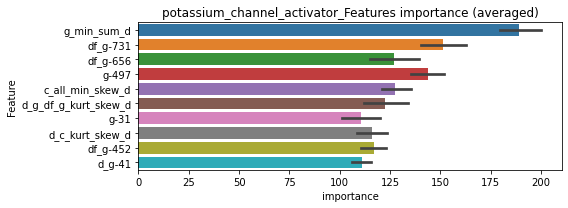

len(train_index) : 2836
len(valid_index) : 946
================================= fold 1/4 potassium_channel_activator=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[899]	training's binary_logloss: 0.000515094	valid_1's binary_logloss: 0.0144304


len(train_index) : 2836
len(valid_index) : 946
================================= fold 2/4 potassium_channel_activator=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[917]	training's binary_logloss: 0.000515688	valid_1's binary_logloss: 0.005133


len(train_index) : 2837
len(valid_index) : 945
================================= fold 3/4 potassium_channel_activator=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[616]	training's binary_logloss: 0.000660163	valid_1's binary_logloss: 0.0109643


len(train_index) : 2837
len(valid_index) : 945
================================= fold 4/4 potassium_channel_activator=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[814]	training's binary_logloss: 0.000539607	valid_1's binary_logloss: 0.0047587


potassium_channel_activator logloss: 0.00882570714031934
potassium_channel_antagonist, len(trt): 98, len(othr): 3273
target_rate: 0.0041152 → Adj_target_rate: 0.0041375


selected negative label: 3273


unpredictable_cols:potassium_channel_antagonist → create_features


N_features:358
================= Pseudo labeling 1 / 3 =================



Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.03113	valid_1's binary_logloss: 0.101987
[2000]	training's binary_logloss: 0.0151487	valid_1's binary_logloss: 0.0885463
Early stopping, best iteration is:
[2818]	training's binary_logloss: 0.0106127	valid_1's binary_logloss: 0.08384
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0320822	valid_1's binary_logloss: 0.090461
[2000]	training's binary_logloss: 0.015582	valid_1's binary_logloss: 0.074865
[3000]	training's binary_logloss: 0.0102171	valid_1's binary_logloss: 0.0692882
[4000]	training's binary_logloss: 0.0076144	valid_1's binary_logloss: 0.0664812
Early stopping, best iteration is:
[4344]	training's binary_logloss: 0.00700808	valid_1's binary_logloss: 0.0658038
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0337998	valid_1's binary_logloss: 0.0691568
[2000]	training's binary_logloss:

1 / 3, AUC score:0.994, PR-AUC:0.986
y_Threshold: 0.0393120, Threshold: 0.0860079, pos_neg_ratio: 0.8000000
Remove_noisy_data: 162 → Positive_corect_labels: 639/3765
p_label_rate: 0.0100452 Vs.target_rate: 0.00412
Num_p_label: 40.0, Expected: 16.4, Threshold: 0.0860079, conf_0:0.06021, conf_1:0.11181
Num_p_label: 20.0, Expected: 16.4, Adj_threshold_1: 0.1160079
threshold: 0.1160079, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 639.0/3765, y_label_rate: 0.1697211
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0288683	valid_1's binary_logloss: 0.0892806
[2000]	training's binary_logloss: 0.0140461	valid_1's binary_logloss: 0.0749893
[3000]	training's binary_logloss: 0.00926094	valid_1's binary_logloss: 0.0692509
Early stopping, best iteration is:
[3091]	training's binary_logloss: 0.00898615	valid_1's binary_logloss: 0.0689669
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0290888	valid_1's binary_logloss: 0.07801
[2000]	training's binary_logloss: 0.0141362	valid_1's binary_logloss: 0.0649208
[3000]	training's binary_logloss: 0.00931495	valid_1's binary_logloss: 0.0607299
Early stopping, best iteration is:
[3955]	training's binary_logloss: 0.00704489	valid_1's binary_logloss: 0.0586343
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0303299	valid_1's binary_logloss: 0.0740435
[2000]	training's binary_

2 / 3, AUC score:0.998, PR-AUC:0.995
y_Threshold: 0.0741795, Threshold: 0.1160079, pos_neg_ratio: 0.8000000
Remove_noisy_data: 38 → Positive_corect_labels: 620.0/3727
p_label_rate: 0.0115520 Vs.target_rate: 0.00412
Num_p_label: 46.0, Expected: 16.4, Threshold: 0.1160079, conf_0:0.09281, conf_1:0.13921
Num_p_label: 29.0, Expected: 16.4, Adj_threshold_1: 0.1460079
Num_p_label: 21.0, Expected: 16.4, Adj_threshold_2: 0.1760079
threshold: 0.1760079, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 620.0/3727, y_label_rate: 0.1663536
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0266199	valid_1's binary_logloss: 0.0794662
[2000]	training's binary_logloss: 0.0129898	valid_1's binary_logloss: 0.0662997
[3000]	training's binary_logloss: 0.00856404	valid_1's binary_logloss: 0.0618384
Early stopping, best iteration is:
[3252]	training's binary_logloss: 0.00789749	valid_1's binary_logloss: 0.0611059
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0271086	valid_1's binary_logloss: 0.0675255
[2000]	training's binary_logloss: 0.0132971	valid_1's binary_logloss: 0.0537824
[3000]	training's binary_logloss: 0.00879111	valid_1's binary_logloss: 0.0491207
[4000]	training's binary_logloss: 0.00657828	valid_1's binary_logloss: 0.0464089
Early stopping, best iteration is:
[3980]	training's binary_logloss: 0.00661072	valid_1's binary_logloss: 0.0463864
Training until validation scores don't improve for 30 rounds
[1000]	training's bina

3 / 3, AUC score:0.999, PR-AUC:0.997
y_Threshold: 0.0750940, Threshold: 0.1760079, pos_neg_ratio: 0.8000000
Remove_noisy_data: 28 → Positive_corect_labels: 606.0/3699
p_label_rate: 0.0050226 Vs.target_rate: 0.00412
Num_p_label: 20.0, Expected: 16.4, Threshold: 0.1760079, conf_0:0.15841, conf_1:0.19361
threshold: 0.1760079, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 606.0/3699, y_label_rate: 0.1638281


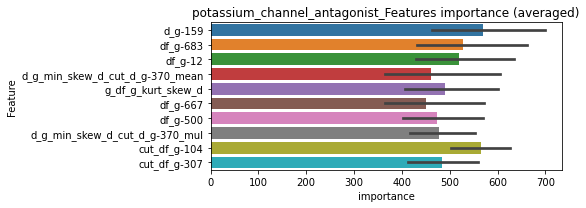

len(train_index) : 2774
len(valid_index) : 925
================================= fold 1/4 potassium_channel_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0251766	valid_1's binary_logloss: 0.0703993
[2000]	training's binary_logloss: 0.0123549	valid_1's binary_logloss: 0.0584033
[3000]	training's binary_logloss: 0.00815557	valid_1's binary_logloss: 0.0541034
Early stopping, best iteration is:
[3517]	training's binary_logloss: 0.00694964	valid_1's binary_logloss: 0.0527839


len(train_index) : 2774
len(valid_index) : 925
================================= fold 2/4 potassium_channel_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0255353	valid_1's binary_logloss: 0.0695505
[2000]	training's binary_logloss: 0.0125554	valid_1's binary_logloss: 0.0542607
[3000]	training's binary_logloss: 0.0082929	valid_1's binary_logloss: 0.0487433
[4000]	training's binary_logloss: 0.00621404	valid_1's binary_logloss: 0.0459716
Early stopping, best iteration is:
[4648]	training's binary_logloss: 0.00535501	valid_1's binary_logloss: 0.0447191


len(train_index) : 2774
len(valid_index) : 925
================================= fold 3/4 potassium_channel_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0267371	valid_1's binary_logloss: 0.0464141
[2000]	training's binary_logloss: 0.0130573	valid_1's binary_logloss: 0.0325837
[3000]	training's binary_logloss: 0.00861944	valid_1's binary_logloss: 0.0276388
[4000]	training's binary_logloss: 0.00645053	valid_1's binary_logloss: 0.024892
[5000]	training's binary_logloss: 0.00517381	valid_1's binary_logloss: 0.023325
[6000]	training's binary_logloss: 0.00433111	valid_1's binary_logloss: 0.0221337
[7000]	training's binary_logloss: 0.00373545	valid_1's binary_logloss: 0.021422
[8000]	training's binary_logloss: 0.00329282	valid_1's binary_logloss: 0.0208068
[9000]	training's binary_logloss: 0.00294824	valid_1's binary_logloss: 0.0203095
[10000]	training's binary_logloss: 0.00267235	valid_1's binary_logloss: 0.0199151
Did not meet early stopping. Best iteration is:
[10000]	training's binary_logloss: 0.00267235	valid_1's binary_logloss: 0.0199151


len(train_index) : 2775
len(valid_index) : 924
================================= fold 4/4 potassium_channel_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0251069	valid_1's binary_logloss: 0.0676544
[2000]	training's binary_logloss: 0.0122824	valid_1's binary_logloss: 0.0545124
[3000]	training's binary_logloss: 0.00812961	valid_1's binary_logloss: 0.0500276
[4000]	training's binary_logloss: 0.00608886	valid_1's binary_logloss: 0.0477044
Early stopping, best iteration is:
[4605]	training's binary_logloss: 0.0052948	valid_1's binary_logloss: 0.0467496


potassium_channel_antagonist logloss: 0.041040395853404306
potassium_channel_antagonist is unpredictable(><)!
ppar_receptor_agonist, len(trt): 115, len(othr): 3276
target_rate: 0.0048291 → Adj_target_rate: 0.0047401


selected negative label: 3276


unpredictable_cols:ppar_receptor_agonist → create_features


N_features:358
================= Pseudo labeling 1 / 3 =================



Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0356434	valid_1's binary_logloss: 0.120058
[2000]	training's binary_logloss: 0.0173012	valid_1's binary_logloss: 0.107054
Early stopping, best iteration is:
[2889]	training's binary_logloss: 0.0117903	valid_1's binary_logloss: 0.103405
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0371807	valid_1's binary_logloss: 0.106322
[2000]	training's binary_logloss: 0.0180843	valid_1's binary_logloss: 0.0915801
[3000]	training's binary_logloss: 0.0118282	valid_1's binary_logloss: 0.0868804
Early stopping, best iteration is:
[3010]	training's binary_logloss: 0.0117864	valid_1's binary_logloss: 0.0868088
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0387057	valid_1's binary_logloss: 0.0864248
[2000]	training's binary_logloss: 0.0187231	valid_1's binary_logloss: 0.0684604
[3000]	training's binary_loglo

1 / 3, AUC score:0.986, PR-AUC:0.973
y_Threshold: 0.0485933, Threshold: 0.1231260, pos_neg_ratio: 0.8000000
Remove_noisy_data: 188 → Positive_corect_labels: 627/3743
p_label_rate: 0.0100452 Vs.target_rate: 0.00483
Num_p_label: 40.0, Expected: 19.2, Threshold: 0.1231260, conf_0:0.08619, conf_1:0.16006
Num_p_label: 21.0, Expected: 19.2, Adj_threshold_1: 0.1531260
threshold: 0.1531260, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 627.0/3743, y_label_rate: 0.1675127
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.030454	valid_1's binary_logloss: 0.0994494
[2000]	training's binary_logloss: 0.0149636	valid_1's binary_logloss: 0.0857122
Early stopping, best iteration is:
[2638]	training's binary_logloss: 0.0112521	valid_1's binary_logloss: 0.0818157
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0314383	valid_1's binary_logloss: 0.0796774
[2000]	training's binary_logloss: 0.0153582	valid_1's binary_logloss: 0.0639686
[3000]	training's binary_logloss: 0.0101424	valid_1's binary_logloss: 0.0580501
[4000]	training's binary_logloss: 0.00757753	valid_1's binary_logloss: 0.0549603
[5000]	training's binary_logloss: 0.00606519	valid_1's binary_logloss: 0.0532304
[6000]	training's binary_logloss: 0.00507355	valid_1's binary_logloss: 0.0522202
Early stopping, best iteration is:
[6311]	training's binary_logloss: 0.00483256	valid_1's binary_logloss: 0.0519059
Train

2 / 3, AUC score:0.998, PR-AUC:0.994
y_Threshold: 0.0667022, Threshold: 0.1531260, pos_neg_ratio: 0.8000000
Remove_noisy_data: 44 → Positive_corect_labels: 605.0/3699
p_label_rate: 0.0110497 Vs.target_rate: 0.00483
Num_p_label: 44.0, Expected: 19.2, Threshold: 0.1531260, conf_0:0.12250, conf_1:0.18375
Num_p_label: 30.0, Expected: 19.2, Adj_threshold_1: 0.1831260
Num_p_label: 19.0, Expected: 19.2, Adj_threshold_2: 0.2131260
threshold: 0.2131260, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 605.0/3699, y_label_rate: 0.1635577
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0280499	valid_1's binary_logloss: 0.0737866
[2000]	training's binary_logloss: 0.0137655	valid_1's binary_logloss: 0.0593798
[3000]	training's binary_logloss: 0.00912958	valid_1's binary_logloss: 0.0544566
Early stopping, best iteration is:
[3062]	training's binary_logloss: 0.00895013	valid_1's binary_logloss: 0.0541695
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.028082	valid_1's binary_logloss: 0.068079
[2000]	training's binary_logloss: 0.0138991	valid_1's binary_logloss: 0.0526963
[3000]	training's binary_logloss: 0.00918782	valid_1's binary_logloss: 0.0470014
[4000]	training's binary_logloss: 0.00689081	valid_1's binary_logloss: 0.0440459
Early stopping, best iteration is:
[4431]	training's binary_logloss: 0.00622405	valid_1's binary_logloss: 0.0431042
Training until validation scores don't improve for 30 rounds
[1000]	training's binary

3 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0729863, Threshold: 0.2131260, pos_neg_ratio: 0.8000000
Remove_noisy_data: 12 → Positive_corect_labels: 599.0/3687
p_label_rate: 0.0022602 Vs.target_rate: 0.00483
Num_p_label: 9.0, Expected: 19.2, Threshold: 0.2131260, conf_0:0.19181, conf_1:0.23444
threshold: 0.2131260, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 599.0/3687, y_label_rate: 0.1624627


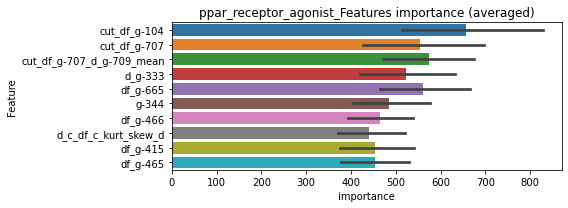

len(train_index) : 2765
len(valid_index) : 922
================================= fold 1/4 ppar_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.026973	valid_1's binary_logloss: 0.0786987
[2000]	training's binary_logloss: 0.0132927	valid_1's binary_logloss: 0.063816
Early stopping, best iteration is:
[2218]	training's binary_logloss: 0.0119773	valid_1's binary_logloss: 0.0621817


len(train_index) : 2765
len(valid_index) : 922
================================= fold 2/4 ppar_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0271592	valid_1's binary_logloss: 0.0680279
[2000]	training's binary_logloss: 0.0133911	valid_1's binary_logloss: 0.0539195
[3000]	training's binary_logloss: 0.00888089	valid_1's binary_logloss: 0.0491088
[4000]	training's binary_logloss: 0.00666053	valid_1's binary_logloss: 0.0468248
Early stopping, best iteration is:
[4607]	training's binary_logloss: 0.00579689	valid_1's binary_logloss: 0.0458491


len(train_index) : 2765
len(valid_index) : 922
================================= fold 3/4 ppar_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.02805	valid_1's binary_logloss: 0.0591268
[2000]	training's binary_logloss: 0.013824	valid_1's binary_logloss: 0.0436135
[3000]	training's binary_logloss: 0.00917102	valid_1's binary_logloss: 0.0376866
[4000]	training's binary_logloss: 0.00687942	valid_1's binary_logloss: 0.0345936
Early stopping, best iteration is:
[4540]	training's binary_logloss: 0.00607114	valid_1's binary_logloss: 0.0333537


len(train_index) : 2766
len(valid_index) : 921
================================= fold 4/4 ppar_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0273711	valid_1's binary_logloss: 0.0678365
[2000]	training's binary_logloss: 0.013435	valid_1's binary_logloss: 0.0522041
[3000]	training's binary_logloss: 0.0088743	valid_1's binary_logloss: 0.0461342
[4000]	training's binary_logloss: 0.00664906	valid_1's binary_logloss: 0.0429907
[5000]	training's binary_logloss: 0.00534552	valid_1's binary_logloss: 0.040986
Early stopping, best iteration is:
[5310]	training's binary_logloss: 0.00503922	valid_1's binary_logloss: 0.0404113


ppar_receptor_agonist logloss: 0.04545032590894368
ppar_receptor_agonist is unpredictable(><)!
ppar_receptor_antagonist, len(trt): 30, len(othr): 3285
target_rate: 0.0012598 → Adj_target_rate: 0.0015127


selected negative label: 3285


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[664]	training's binary_logloss: 0.000361	valid_1's binary_logloss: 0.00595991
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[562]	training's binary_logloss: 0.000404041	valid_1's binary_logloss: 0.00736217
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[633]	training's binary_logloss: 0.000377751	valid_1's binary_logloss: 0.00591872
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0019500, Threshold: 0.0046178, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[590]	training's binary_logloss: 0.000388408	valid_1's binary_logloss: 0.00835411


Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00126
Num_p_label: 40.0, Expected: 5.0, Threshold: 0.0046178, conf_0:0.00323, conf_1:0.00600
Num_p_label: 1.0, Expected: 5.0, Adj_threshold_1: 0.0346178
threshold: 0.0346178, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[624]	training's binary_logloss: 0.000367562	valid_1's binary_logloss: 0.00540026
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[581]	training's binary_logloss: 0.000381975	valid_1's binary_logloss: 0.00609272
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[625]	training's binary_logloss: 0.000370512	valid_1's binary_logloss: 0.0061051
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0175270, Threshold: 0.0346178, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810


Early stopping, best iteration is:
[573]	training's binary_logloss: 0.000395003	valid_1's binary_logloss: 0.00871834


p_label_rate: 0.0007534 Vs.target_rate: 0.00126
Num_p_label: 3.0, Expected: 5.0, Threshold: 0.0346178, conf_0:0.02769, conf_1:0.04154
threshold: 0.0346178, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[624]	training's binary_logloss: 0.000367562	valid_1's binary_logloss: 0.00540026
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[581]	training's binary_logloss: 0.000381975	valid_1's binary_logloss: 0.00609272
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[625]	training's binary_logloss: 0.000370512	valid_1's binary_logloss: 0.0061051
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0175270, Threshold: 0.0346178, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810


Early stopping, best iteration is:
[573]	training's binary_logloss: 0.000395003	valid_1's binary_logloss: 0.00871834


p_label_rate: 0.0007534 Vs.target_rate: 0.00126
Num_p_label: 3.0, Expected: 5.0, Threshold: 0.0346178, conf_0:0.03116, conf_1:0.03808
threshold: 0.0346178, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


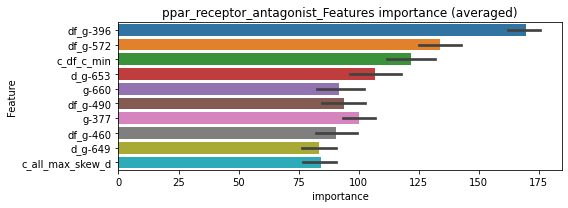

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 ppar_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[785]	training's binary_logloss: 0.000395445	valid_1's binary_logloss: 0.00510769


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 ppar_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[768]	training's binary_logloss: 0.000396178	valid_1's binary_logloss: 0.00619452


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 ppar_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[763]	training's binary_logloss: 0.000405617	valid_1's binary_logloss: 0.00479557


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 ppar_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[755]	training's binary_logloss: 0.000404128	valid_1's binary_logloss: 0.00650263


ppar_receptor_antagonist logloss: 0.005650103193615031
progesterone_receptor_agonist, len(trt): 119, len(othr): 3268
target_rate: 0.0049971 → Adj_target_rate: 0.0048799


selected negative label: 3268


unpredictable_cols:progesterone_receptor_agonist → create_features


N_features:358
================= Pseudo labeling 1 / 3 =================



Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0368653	valid_1's binary_logloss: 0.125323
[2000]	training's binary_logloss: 0.0179544	valid_1's binary_logloss: 0.111619
Early stopping, best iteration is:
[2097]	training's binary_logloss: 0.0170868	valid_1's binary_logloss: 0.110727
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0374647	valid_1's binary_logloss: 0.110328
[2000]	training's binary_logloss: 0.0182389	valid_1's binary_logloss: 0.0965732
Early stopping, best iteration is:
[2691]	training's binary_logloss: 0.0133663	valid_1's binary_logloss: 0.0933165
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0384775	valid_1's binary_logloss: 0.102327
[2000]	training's binary_logloss: 0.0187	valid_1's binary_logloss: 0.0867175
Early stopping, best iteration is:
[2873]	training's binary_logloss: 0.0127808	valid_1's binary_logloss: 0.0819427

1 / 3, AUC score:0.987, PR-AUC:0.973
y_Threshold: 0.0532375, Threshold: 0.2483640, pos_neg_ratio: 0.8000000
Remove_noisy_data: 194 → Positive_corect_labels: 622/3727
p_label_rate: 0.0100452 Vs.target_rate: 0.00500
Num_p_label: 40.0, Expected: 19.9, Threshold: 0.2483640, conf_0:0.17385, conf_1:0.32287
Num_p_label: 35.0, Expected: 19.9, Adj_threshold_1: 0.2783640
Num_p_label: 29.0, Expected: 19.9, Adj_threshold_2: 0.3083640
threshold: 0.3083640, positive_p_label: 29.0/3982, p_label_rate: 0.0072828
positive_y_label: 622.0/3727, y_label_rate: 0.1668903
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0316578	valid_1's binary_logloss: 0.0944135
[2000]	training's binary_logloss: 0.0155018	valid_1's binary_logloss: 0.0781602
[3000]	training's binary_logloss: 0.010203	valid_1's binary_logloss: 0.0726212
Early stopping, best iteration is:
[3183]	training's binary_logloss: 0.00961204	valid_1's binary_logloss: 0.0720464
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0317447	valid_1's binary_logloss: 0.0904439
[2000]	training's binary_logloss: 0.0155118	valid_1's binary_logloss: 0.0756231
[3000]	training's binary_logloss: 0.0102303	valid_1's binary_logloss: 0.0701088
Early stopping, best iteration is:
[3063]	training's binary_logloss: 0.0100202	valid_1's binary_logloss: 0.0699033
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0324639	valid_1's binary_logloss: 0.0787051
[2000]	training's binary_lo

2 / 3, AUC score:0.999, PR-AUC:0.996
y_Threshold: 0.0927207, Threshold: 0.3083640, pos_neg_ratio: 0.8000000
Remove_noisy_data: 38 → Positive_corect_labels: 603.0/3689
p_label_rate: 0.0243596 Vs.target_rate: 0.00500
Num_p_label: 97.0, Expected: 19.9, Threshold: 0.3083640, conf_0:0.24669, conf_1:0.37004
Num_p_label: 87.0, Expected: 19.9, Adj_threshold_1: 0.3383640
Num_p_label: 82.0, Expected: 19.9, Adj_threshold_2: 0.3683640
Num_p_label: 72.0, Expected: 19.9, Adj_threshold_3: 0.3983640
Num_p_label: 66.0, Expected: 19.9, Adj_threshold_4: 0.4283640
Num_p_label: 60.0, Expected: 19.9, Adj_threshold_5: 0.4583640
Num_p_label: 52.0, Expected: 19.9, Adj_threshold_6: 0.4883640
Num_p_label: 44.0, Expected: 19.9, Adj_threshold_7: 0.5183640
Num_p_label: 36.0, Expected: 19.9, Adj_threshold_8: 0.5483640
Num_p_label: 33.0, Expected: 19.9, Adj_threshold_9: 0.5783640
Num_p_label: 29.0, Expected: 19.9, Adj_threshold_10: 0.6083640
threshold: 0.6083640, positive_p_label: 29.0/3982, p_label_rate: 0.0072828
p

Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0283683	valid_1's binary_logloss: 0.0880216
[2000]	training's binary_logloss: 0.0139158	valid_1's binary_logloss: 0.0737432
[3000]	training's binary_logloss: 0.00920408	valid_1's binary_logloss: 0.0687235
Early stopping, best iteration is:
[3602]	training's binary_logloss: 0.00765981	valid_1's binary_logloss: 0.0670668
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0299706	valid_1's binary_logloss: 0.0661031
[2000]	training's binary_logloss: 0.0147702	valid_1's binary_logloss: 0.0507774
[3000]	training's binary_logloss: 0.00976538	valid_1's binary_logloss: 0.045028
[4000]	training's binary_logloss: 0.00731292	valid_1's binary_logloss: 0.0423913
[5000]	training's binary_logloss: 0.00585862	valid_1's binary_logloss: 0.0406668
Early stopping, best iteration is:
[5837]	training's binary_logloss: 0.00503302	valid_1's binary_logloss: 0.0396459
Tra

3 / 3, AUC score:0.999, PR-AUC:0.997
y_Threshold: 0.0794098, Threshold: 0.6083640, pos_neg_ratio: 0.8000000
Remove_noisy_data: 24 → Positive_corect_labels: 591.0/3665
p_label_rate: 0.0110497 Vs.target_rate: 0.00500
Num_p_label: 44.0, Expected: 19.9, Threshold: 0.6083640, conf_0:0.54753, conf_1:0.66920
Num_p_label: 37.0, Expected: 19.9, Adj_threshold_1: 0.6383640
Num_p_label: 32.0, Expected: 19.9, Adj_threshold_2: 0.6683640
Num_p_label: 26.0, Expected: 19.9, Adj_threshold_3: 0.6983640
threshold: 0.6983640, positive_p_label: 26.0/3982, p_label_rate: 0.0065294
positive_y_label: 591.0/3665, y_label_rate: 0.1612551


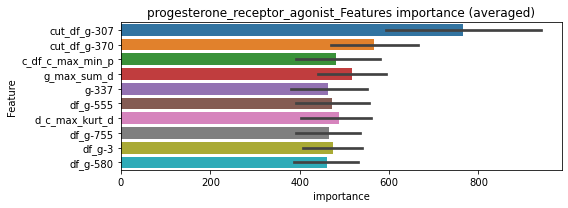

len(train_index) : 2748
len(valid_index) : 917
================================= fold 1/4 progesterone_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0274454	valid_1's binary_logloss: 0.0701289
[2000]	training's binary_logloss: 0.0134949	valid_1's binary_logloss: 0.0560152
[3000]	training's binary_logloss: 0.00895999	valid_1's binary_logloss: 0.0510032
Early stopping, best iteration is:
[3685]	training's binary_logloss: 0.00728966	valid_1's binary_logloss: 0.0489739


len(train_index) : 2749
len(valid_index) : 916
================================= fold 2/4 progesterone_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0276277	valid_1's binary_logloss: 0.0643485
[2000]	training's binary_logloss: 0.0137401	valid_1's binary_logloss: 0.0488746
[3000]	training's binary_logloss: 0.00909253	valid_1's binary_logloss: 0.0433848
[4000]	training's binary_logloss: 0.00680299	valid_1's binary_logloss: 0.0403219
[5000]	training's binary_logloss: 0.00545806	valid_1's binary_logloss: 0.0384836
[6000]	training's binary_logloss: 0.00457013	valid_1's binary_logloss: 0.0370665
[7000]	training's binary_logloss: 0.00394014	valid_1's binary_logloss: 0.0361388
Early stopping, best iteration is:
[7355]	training's binary_logloss: 0.00376118	valid_1's binary_logloss: 0.0359178


len(train_index) : 2749
len(valid_index) : 916
================================= fold 3/4 progesterone_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.027485	valid_1's binary_logloss: 0.0747122
[2000]	training's binary_logloss: 0.0135006	valid_1's binary_logloss: 0.0604889
[3000]	training's binary_logloss: 0.00894535	valid_1's binary_logloss: 0.0554758
[4000]	training's binary_logloss: 0.0067028	valid_1's binary_logloss: 0.0529058
Early stopping, best iteration is:
[4538]	training's binary_logloss: 0.00590899	valid_1's binary_logloss: 0.0519671


len(train_index) : 2749
len(valid_index) : 916
================================= fold 4/4 progesterone_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0273415	valid_1's binary_logloss: 0.0720686
[2000]	training's binary_logloss: 0.0134665	valid_1's binary_logloss: 0.0570588
[3000]	training's binary_logloss: 0.00892347	valid_1's binary_logloss: 0.0513779
[4000]	training's binary_logloss: 0.00668671	valid_1's binary_logloss: 0.0485636
Early stopping, best iteration is:
[4296]	training's binary_logloss: 0.00623424	valid_1's binary_logloss: 0.0479539


progesterone_receptor_agonist logloss: 0.04620393737565039
progesterone_receptor_agonist is unpredictable(><)!
progesterone_receptor_antagonist, len(trt): 18, len(othr): 3286
target_rate: 0.0007559 → Adj_target_rate: 0.0009799


selected negative label: 3286


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[590]	training's binary_logloss: 0.000273978	valid_1's binary_logloss: 0.000961992
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[547]	training's binary_logloss: 0.0002796	valid_1's binary_logloss: 0.00182258
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[541]	training's binary_logloss: 0.000284118	valid_1's binary_logloss: 0.00109229
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0016903, Threshold: 0.0081822, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, Expected: 3.0, Threshold: 0.0081822, conf_0:0.00573, conf_1:0.01064
Num_p_label: 3.0, Expected: 3.0, Adj_threshold_1: 0.0381822


Early stopping, best iteration is:
[529]	training's binary_logloss: 0.000281579	valid_1's binary_logloss: 0.00203296


threshold: 0.0381822, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[531]	training's binary_logloss: 0.00026441	valid_1's binary_logloss: 0.000735057
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[540]	training's binary_logloss: 0.000263281	valid_1's binary_logloss: 0.00235333
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[541]	training's binary_logloss: 0.000266736	valid_1's binary_logloss: 0.000556476
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0752537, Threshold: 0.0381822, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0077850 Vs.target_rate: 0.00076
Num_p_label: 31.0, Expected: 3.0, Threshold: 0.0381822, conf_0:0.03055, conf_1:0.04582
Num_p_label: 17.0, Expected: 3.0, Adj_threshold_1: 0.0681822
Num_p_label: 11.0, Expected: 3.0, Adj_threshold_2: 0.0981822
Num_p_label: 7.0, Expected: 3.0, Adj_threshold_3: 0.1281822


Early stopping, best iteration is:
[522]	training's binary_logloss: 0.000262217	valid_1's binary_logloss: 0.00270079


threshold: 0.1281822, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[531]	training's binary_logloss: 0.00026441	valid_1's binary_logloss: 0.000735057
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[540]	training's binary_logloss: 0.000263281	valid_1's binary_logloss: 0.00235333
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[541]	training's binary_logloss: 0.000266736	valid_1's binary_logloss: 0.000556476
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0752537, Threshold: 0.1281822, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[522]	training's binary_logloss: 0.000262217	valid_1's binary_logloss: 0.00270079


Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0017579 Vs.target_rate: 0.00076
Num_p_label: 7.0, Expected: 3.0, Threshold: 0.1281822, conf_0:0.11536, conf_1:0.14100
threshold: 0.1281822, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


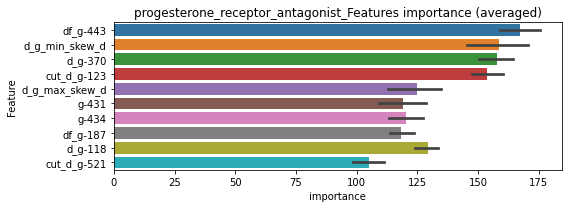

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 progesterone_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[897]	training's binary_logloss: 0.000263447	valid_1's binary_logloss: 0.000665863


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 progesterone_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[852]	training's binary_logloss: 0.000265921	valid_1's binary_logloss: 0.000835489


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 progesterone_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[806]	training's binary_logloss: 0.000271979	valid_1's binary_logloss: 0.000506418


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 progesterone_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


progesterone_receptor_antagonist logloss: 0.0009128141471884874


Early stopping, best iteration is:
[729]	training's binary_logloss: 0.000275215	valid_1's binary_logloss: 0.00164425


prostaglandin_inhibitor, len(trt): 36, len(othr): 3285
target_rate: 0.0015117 → Adj_target_rate: 0.0017663


selected negative label: 3285


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[554]	training's binary_logloss: 0.000460807	valid_1's binary_logloss: 0.00656343
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[592]	training's binary_logloss: 0.000423919	valid_1's binary_logloss: 0.0139522
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[340]	training's binary_logloss: 0.00131647	valid_1's binary_logloss: 0.0195573
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[621]	training's binary_logloss: 0.00041203	valid_1's binary_logloss: 0.0036285


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0033489, Threshold: 0.0156248, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00151
Num_p_label: 40.0, Expected: 6.0, Threshold: 0.0156248, conf_0:0.01094, conf_1:0.02031
Num_p_label: 19.0, Expected: 6.0, Adj_threshold_1: 0.0456248
Num_p_label: 15.0, Expected: 6.0, Adj_threshold_2: 0.0756248
threshold: 0.0756248, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[555]	training's binary_logloss: 0.000444389	valid_1's binary_logloss: 0.0146394
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[654]	training's binary_logloss: 0.0004018	valid_1's binary_logloss: 0.00183618
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[616]	training's binary_logloss: 0.000410949	valid_1's binary_logloss: 0.00216144
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[620]	training's binary_logloss: 0.000405603	valid_1's binary_logloss: 0.00936999


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0166477, Threshold: 0.0756248, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3806
p_label_rate: 0.0047715 Vs.target_rate: 0.00151
Num_p_label: 19.0, Expected: 6.0, Threshold: 0.0756248, conf_0:0.06050, conf_1:0.09075
Num_p_label: 17.0, Expected: 6.0, Adj_threshold_1: 0.1056248
Num_p_label: 15.0, Expected: 6.0, Adj_threshold_2: 0.1356248
threshold: 0.1356248, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 655.0/3806, y_label_rate: 0.1720967
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[607]	training's binary_logloss: 0.000408925	valid_1's binary_logloss: 0.00622219
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[610]	training's binary_logloss: 0.000412956	valid_1's binary_logloss: 0.00329275
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[479]	training's binary_logloss: 0.000554547	valid_1's binary_logloss: 0.018813
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0129869, Threshold: 0.1356248, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[549]	training's binary_logloss: 0.000447012	valid_1's binary_logloss: 0.00971161


Remove_noisy_data: 4 → Positive_corect_labels: 653.0/3802
p_label_rate: 0.0037670 Vs.target_rate: 0.00151
Num_p_label: 15.0, Expected: 6.0, Threshold: 0.1356248, conf_0:0.12206, conf_1:0.14919
threshold: 0.1356248, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 653.0/3802, y_label_rate: 0.1717517


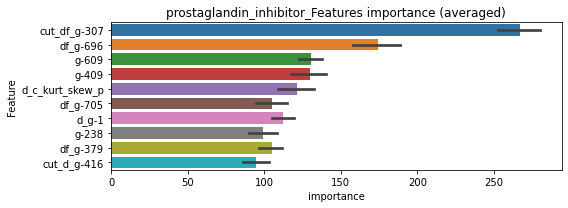

len(train_index) : 2851
len(valid_index) : 951
================================= fold 1/4 prostaglandin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[863]	training's binary_logloss: 0.000405086	valid_1's binary_logloss: 0.00403286


len(train_index) : 2851
len(valid_index) : 951
================================= fold 2/4 prostaglandin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[874]	training's binary_logloss: 0.000405483	valid_1's binary_logloss: 0.00400068


len(train_index) : 2852
len(valid_index) : 950
================================= fold 3/4 prostaglandin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[829]	training's binary_logloss: 0.000408245	valid_1's binary_logloss: 0.0128266


len(train_index) : 2852
len(valid_index) : 950
================================= fold 4/4 prostaglandin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[812]	training's binary_logloss: 0.000425099	valid_1's binary_logloss: 0.00240735


prostaglandin_inhibitor logloss: 0.005816683210423605
prostanoid_receptor_antagonist, len(trt): 84, len(othr): 3278
target_rate: 0.0035273 → Adj_target_rate: 0.0036294


selected negative label: 3278


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[447]	training's binary_logloss: 0.00184757	valid_1's binary_logloss: 0.0520573
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[545]	training's binary_logloss: 0.00120916	valid_1's binary_logloss: 0.0408769
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[652]	training's binary_logloss: 0.000890378	valid_1's binary_logloss: 0.0323898
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[574]	training's binary_logloss: 0.00112988	valid_1's binary_logloss: 0.0316302


1 / 3, AUC score:0.998, PR-AUC:0.996
y_Threshold: 0.0088321, Threshold: 0.0384197, pos_neg_ratio: 0.8000000
Remove_noisy_data: 142 → Positive_corect_labels: 650/3791
p_label_rate: 0.0100452 Vs.target_rate: 0.00353
Num_p_label: 40.0, Expected: 14.0, Threshold: 0.0384197, conf_0:0.02689, conf_1:0.04995
Num_p_label: 27.0, Expected: 14.0, Adj_threshold_1: 0.0684197
Num_p_label: 20.0, Expected: 14.0, Adj_threshold_2: 0.0984197
threshold: 0.0984197, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 650.0/3791, y_label_rate: 0.1714587
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.000913261	valid_1's binary_logloss: 0.0430324
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[619]	training's binary_logloss: 0.000870981	valid_1's binary_logloss: 0.0320891
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[601]	training's binary_logloss: 0.000922945	valid_1's binary_logloss: 0.0312241
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[538]	training's binary_logloss: 0.00117346	valid_1's binary_logloss: 0.0283611


2 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0289382, Threshold: 0.0984197, pos_neg_ratio: 0.8000000
Remove_noisy_data: 18 → Positive_corect_labels: 641.0/3773
p_label_rate: 0.0138122 Vs.target_rate: 0.00353
Num_p_label: 55.0, Expected: 14.0, Threshold: 0.0984197, conf_0:0.07874, conf_1:0.11810
Num_p_label: 49.0, Expected: 14.0, Adj_threshold_1: 0.1284197
Num_p_label: 42.0, Expected: 14.0, Adj_threshold_2: 0.1584197
Num_p_label: 40.0, Expected: 14.0, Adj_threshold_3: 0.1884197
Num_p_label: 38.0, Expected: 14.0, Adj_threshold_4: 0.2184197
Num_p_label: 37.0, Expected: 14.0, Adj_threshold_5: 0.2484197
Num_p_label: 37.0, Expected: 14.0, Adj_threshold_6: 0.2784197
Num_p_label: 34.0, Expected: 14.0, Adj_threshold_7: 0.3084197
Num_p_label: 29.0, Expected: 14.0, Adj_threshold_8: 0.3384197
Num_p_label: 27.0, Expected: 14.0, Adj_threshold_9: 0.3684197
Num_p_label: 23.0, Expected: 14.0, Adj_threshold_10: 0.3984197
threshold: 0.3984197, positive_p_label: 23.0/3982, p_label_rate: 0.0057760
p

Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[627]	training's binary_logloss: 0.000790383	valid_1's binary_logloss: 0.0342768
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[586]	training's binary_logloss: 0.00090191	valid_1's binary_logloss: 0.0272416
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[686]	training's binary_logloss: 0.000693369	valid_1's binary_logloss: 0.0202177
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[712]	training's binary_logloss: 0.000674065	valid_1's binary_logloss: 0.0251459


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0294442, Threshold: 0.3984197, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 637.0/3765
p_label_rate: 0.0100452 Vs.target_rate: 0.00353
Num_p_label: 40.0, Expected: 14.0, Threshold: 0.3984197, conf_0:0.35858, conf_1:0.43826
Num_p_label: 39.0, Expected: 14.0, Adj_threshold_1: 0.4284197
Num_p_label: 38.0, Expected: 14.0, Adj_threshold_2: 0.4584197
Num_p_label: 32.0, Expected: 14.0, Adj_threshold_3: 0.4884197
Num_p_label: 29.0, Expected: 14.0, Adj_threshold_4: 0.5184197
Num_p_label: 28.0, Expected: 14.0, Adj_threshold_5: 0.5484197
Num_p_label: 26.0, Expected: 14.0, Adj_threshold_6: 0.5784197
Num_p_label: 23.0, Expected: 14.0, Adj_threshold_7: 0.6084197
Num_p_label: 22.0, Expected: 14.0, Adj_threshold_8: 0.6384197
Num_p_label: 21.0, Expected: 14.0, Adj_threshold_9: 0.6684197
threshold: 0.6684197, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 637.0/3765, y_label_rate: 0.1691899


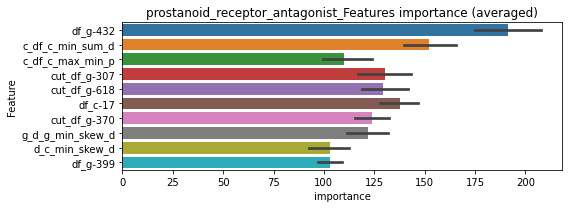

len(train_index) : 2823
len(valid_index) : 942
================================= fold 1/4 prostanoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[720]	training's binary_logloss: 0.000746504	valid_1's binary_logloss: 0.0279054


len(train_index) : 2824
len(valid_index) : 941
================================= fold 2/4 prostanoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[625]	training's binary_logloss: 0.000850311	valid_1's binary_logloss: 0.017291


len(train_index) : 2824
len(valid_index) : 941
================================= fold 3/4 prostanoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[643]	training's binary_logloss: 0.00083009	valid_1's binary_logloss: 0.0286119


len(train_index) : 2824
len(valid_index) : 941
================================= fold 4/4 prostanoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


prostanoid_receptor_antagonist logloss: 0.025197265393244784


Early stopping, best iteration is:
[417]	training's binary_logloss: 0.00129257	valid_1's binary_logloss: 0.0269778
mutually exclusive columns: proteasome_inhibitor


proteasome_inhibitor, len(trt): 726, len(othr): 10229
target_rate: 0.0304863 → Adj_target_rate: 0.0226983


selected negative label: 10229


unpredictable_cols:proteasome_inhibitor → create_features


N_features:358
================= Pseudo labeling 1 / 3 =================



Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0711922	valid_1's binary_logloss: 0.232791
Early stopping, best iteration is:
[1667]	training's binary_logloss: 0.0413543	valid_1's binary_logloss: 0.225337
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0705023	valid_1's binary_logloss: 0.231661
Early stopping, best iteration is:
[1303]	training's binary_logloss: 0.0535228	valid_1's binary_logloss: 0.227356
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0713924	valid_1's binary_logloss: 0.221403
Early stopping, best iteration is:
[1443]	training's binary_logloss: 0.0483402	valid_1's binary_logloss: 0.216051
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0725523	valid_1's binary_logloss: 0.219405
Early stopping, best iteration is:
[1740]	training's binary_logloss: 0.039978	valid_1's binary_lo

1 / 3, AUC score:0.904, PR-AUC:0.841
y_Threshold: 0.1064027, Threshold: 0.1938404, pos_neg_ratio: 0.8000000
Remove_noisy_data: 1304 → Positive_corect_labels: 1598/10970
p_label_rate: 0.0100452 Vs.target_rate: 0.03049
Num_p_label: 40.0, Expected: 121.4, Threshold: 0.1938404, conf_0:0.13569, conf_1:0.25199
threshold: 0.1938404, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1598.0/10970, y_label_rate: 0.1456700
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0417749	valid_1's binary_logloss: 0.121908
Early stopping, best iteration is:
[1799]	training's binary_logloss: 0.0220385	valid_1's binary_logloss: 0.106266
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0413461	valid_1's binary_logloss: 0.130647
Early stopping, best iteration is:
[1794]	training's binary_logloss: 0.021874	valid_1's binary_logloss: 0.11729
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.042387	valid_1's binary_logloss: 0.117605
Early stopping, best iteration is:
[1935]	training's binary_logloss: 0.020664	valid_1's binary_logloss: 0.100572
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0421171	valid_1's binary_logloss: 0.119874
[2000]	training's binary_logloss: 0.0197714	valid_1's binary_logloss: 0.103145
Early stopping, best it

2 / 3, AUC score:0.986, PR-AUC:0.965
y_Threshold: 0.1080807, Threshold: 0.1938404, pos_neg_ratio: 0.8000000
Remove_noisy_data: 292 → Positive_corect_labels: 1452.0/10678
p_label_rate: 0.0115520 Vs.target_rate: 0.03049
Num_p_label: 46.0, Expected: 121.4, Threshold: 0.1938404, conf_0:0.15507, conf_1:0.23261
threshold: 0.1938404, positive_p_label: 46.0/3982, p_label_rate: 0.0115520
positive_y_label: 1452.0/10678, y_label_rate: 0.1359805
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0340185	valid_1's binary_logloss: 0.091784
[2000]	training's binary_logloss: 0.0160085	valid_1's binary_logloss: 0.0757625
Early stopping, best iteration is:
[2690]	training's binary_logloss: 0.0116534	valid_1's binary_logloss: 0.0716282
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0339226	valid_1's binary_logloss: 0.0982673
[2000]	training's binary_logloss: 0.0160394	valid_1's binary_logloss: 0.0824969
Early stopping, best iteration is:
[2347]	training's binary_logloss: 0.0134959	valid_1's binary_logloss: 0.0799291
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0333829	valid_1's binary_logloss: 0.104321
Early stopping, best iteration is:
[1923]	training's binary_logloss: 0.0163974	valid_1's binary_logloss: 0.0883078
Training until validation scores don't improve for 30 rounds
[1000]	traini

3 / 3, AUC score:0.993, PR-AUC:0.982
y_Threshold: 0.0992735, Threshold: 0.1938404, pos_neg_ratio: 0.8000000
Remove_noisy_data: 162 → Positive_corect_labels: 1371.0/10516
p_label_rate: 0.0107986 Vs.target_rate: 0.03049
Num_p_label: 43.0, Expected: 121.4, Threshold: 0.1938404, conf_0:0.17446, conf_1:0.21322
threshold: 0.1938404, positive_p_label: 43.0/3982, p_label_rate: 0.0107986
positive_y_label: 1371.0/10516, y_label_rate: 0.1303728


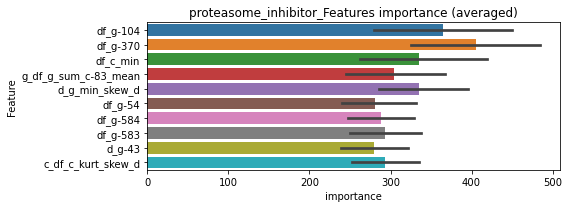

len(train_index) : 7887
len(valid_index) : 2629
================================= fold 1/4 proteasome_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0305374	valid_1's binary_logloss: 0.0764383
[2000]	training's binary_logloss: 0.0143624	valid_1's binary_logloss: 0.0583708
[3000]	training's binary_logloss: 0.00929713	valid_1's binary_logloss: 0.0522842
Early stopping, best iteration is:
[3931]	training's binary_logloss: 0.00697856	valid_1's binary_logloss: 0.0492485


len(train_index) : 7887
len(valid_index) : 2629
================================= fold 2/4 proteasome_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0300727	valid_1's binary_logloss: 0.0830569
[2000]	training's binary_logloss: 0.014186	valid_1's binary_logloss: 0.0661023
[3000]	training's binary_logloss: 0.00918281	valid_1's binary_logloss: 0.0604998
Early stopping, best iteration is:
[3194]	training's binary_logloss: 0.00858873	valid_1's binary_logloss: 0.059731


len(train_index) : 7887
len(valid_index) : 2629
================================= fold 3/4 proteasome_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0297392	valid_1's binary_logloss: 0.0876866
[2000]	training's binary_logloss: 0.0139962	valid_1's binary_logloss: 0.0719913
Early stopping, best iteration is:
[2821]	training's binary_logloss: 0.00966201	valid_1's binary_logloss: 0.0675656


len(train_index) : 7887
len(valid_index) : 2629
================================= fold 4/4 proteasome_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0300317	valid_1's binary_logloss: 0.0820611
[2000]	training's binary_logloss: 0.0141821	valid_1's binary_logloss: 0.0661694
Early stopping, best iteration is:
[2431]	training's binary_logloss: 0.0114925	valid_1's binary_logloss: 0.0632263


proteasome_inhibitor logloss: 0.05994284717283714
proteasome_inhibitor is unpredictable(><)!
protein_kinase_inhibitor, len(trt): 48, len(othr): 3281
target_rate: 0.0020156 → Adj_target_rate: 0.0022556


selected negative label: 3281


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[670]	training's binary_logloss: 0.000499197	valid_1's binary_logloss: 0.0172734
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[611]	training's binary_logloss: 0.000573291	valid_1's binary_logloss: 0.0134708
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[706]	training's binary_logloss: 0.000508534	valid_1's binary_logloss: 0.006566
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[635]	training's binary_logloss: 0.000526764	valid_1's binary_logloss: 0.0154436


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0039048, Threshold: 0.0095205, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3805
p_label_rate: 0.0100452 Vs.target_rate: 0.00202
Num_p_label: 40.0, Expected: 8.0, Threshold: 0.0095205, conf_0:0.00666, conf_1:0.01238
Num_p_label: 3.0, Expected: 8.0, Adj_threshold_1: 0.0395205
threshold: 0.0395205, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 656.0/3805, y_label_rate: 0.1724047
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[648]	training's binary_logloss: 0.0004945	valid_1's binary_logloss: 0.0174749
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[617]	training's binary_logloss: 0.000550187	valid_1's binary_logloss: 0.0109884
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[690]	training's binary_logloss: 0.000497401	valid_1's binary_logloss: 0.00498419
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0192804, Threshold: 0.0395205, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[508]	training's binary_logloss: 0.000724996	valid_1's binary_logloss: 0.0162708


Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3803
p_label_rate: 0.0030136 Vs.target_rate: 0.00202
Num_p_label: 12.0, Expected: 8.0, Threshold: 0.0395205, conf_0:0.03162, conf_1:0.04742
threshold: 0.0395205, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 655.0/3803, y_label_rate: 0.1722324
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[627]	training's binary_logloss: 0.00051433	valid_1's binary_logloss: 0.0112554
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[655]	training's binary_logloss: 0.000507934	valid_1's binary_logloss: 0.00711474
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[727]	training's binary_logloss: 0.000487144	valid_1's binary_logloss: 0.00491406
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[704]	training's binary_logloss: 0.000479367	valid_1's binary_logloss: 0.00902137


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0220003, Threshold: 0.0395205, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3803
p_label_rate: 0.0035158 Vs.target_rate: 0.00202
Num_p_label: 14.0, Expected: 8.0, Threshold: 0.0395205, conf_0:0.03557, conf_1:0.04347
threshold: 0.0395205, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 655.0/3803, y_label_rate: 0.1722324


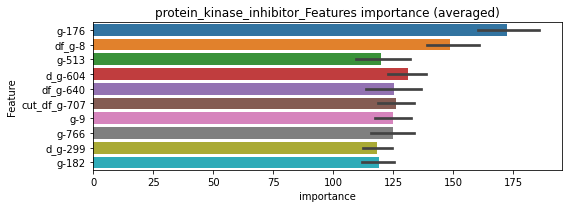

len(train_index) : 2852
len(valid_index) : 951
================================= fold 1/4 protein_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[858]	training's binary_logloss: 0.000501841	valid_1's binary_logloss: 0.0124157


len(train_index) : 2852
len(valid_index) : 951
================================= fold 2/4 protein_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[921]	training's binary_logloss: 0.000499379	valid_1's binary_logloss: 0.00824114


len(train_index) : 2852
len(valid_index) : 951
================================= fold 3/4 protein_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[902]	training's binary_logloss: 0.00050241	valid_1's binary_logloss: 0.00510265


len(train_index) : 2853
len(valid_index) : 950
================================= fold 4/4 protein_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[651]	training's binary_logloss: 0.00060794	valid_1's binary_logloss: 0.00922154


protein_kinase_inhibitor logloss: 0.008746273278506538
protein_phosphatase_inhibitor, len(trt): 24, len(othr): 3285
target_rate: 0.0010078 → Adj_target_rate: 0.0012513


selected negative label: 3285


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[626]	training's binary_logloss: 0.000325071	valid_1's binary_logloss: 0.00267707
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[585]	training's binary_logloss: 0.000326348	valid_1's binary_logloss: 0.00294064
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[611]	training's binary_logloss: 0.000332072	valid_1's binary_logloss: 0.000932777
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0015555, Threshold: 0.0050752, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810


Early stopping, best iteration is:
[570]	training's binary_logloss: 0.000342643	valid_1's binary_logloss: 0.00220934


p_label_rate: 0.0100452 Vs.target_rate: 0.00101
Num_p_label: 40.0, Expected: 4.0, Threshold: 0.0050752, conf_0:0.00355, conf_1:0.00660
Num_p_label: 5.0, Expected: 4.0, Adj_threshold_1: 0.0350752
threshold: 0.0350752, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[561]	training's binary_logloss: 0.000329944	valid_1's binary_logloss: 0.00361246
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[586]	training's binary_logloss: 0.000318114	valid_1's binary_logloss: 0.00260989
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[595]	training's binary_logloss: 0.000324113	valid_1's binary_logloss: 0.000891351
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0446185, Threshold: 0.0350752, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0027624 Vs.target_rate: 0.00101
Num_p_label: 11.0, Expected: 4.0, Threshold: 0.0350752, conf_0:0.02806, conf_1:0.04209
Num_p_label: 8.0, Expected: 4.0, Adj_threshold_1: 0.0650752


Early stopping, best iteration is:
[583]	training's binary_logloss: 0.000326295	valid_1's binary_logloss: 0.00270656


threshold: 0.0650752, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[561]	training's binary_logloss: 0.000329944	valid_1's binary_logloss: 0.00361246
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[586]	training's binary_logloss: 0.000318114	valid_1's binary_logloss: 0.00260989
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[595]	training's binary_logloss: 0.000324113	valid_1's binary_logloss: 0.000891351
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0446185, Threshold: 0.0650752, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[583]	training's binary_logloss: 0.000326295	valid_1's binary_logloss: 0.00270656


Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0020090 Vs.target_rate: 0.00101
Num_p_label: 8.0, Expected: 4.0, Threshold: 0.0650752, conf_0:0.05857, conf_1:0.07158
threshold: 0.0650752, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


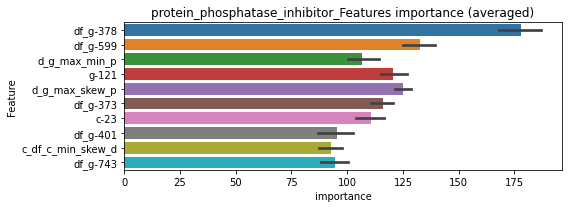

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 protein_phosphatase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[906]	training's binary_logloss: 0.000329877	valid_1's binary_logloss: 0.00235271


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 protein_phosphatase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2858
len(valid_index) : 952


Early stopping, best iteration is:
[734]	training's binary_logloss: 0.000352913	valid_1's binary_logloss: 0.00245523


================================= fold 3/4 protein_phosphatase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[929]	training's binary_logloss: 0.00032761	valid_1's binary_logloss: 0.000870315


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 protein_phosphatase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


protein_phosphatase_inhibitor logloss: 0.0020020237046833055


Early stopping, best iteration is:
[676]	training's binary_logloss: 0.000371814	valid_1's binary_logloss: 0.00232701


protein_synthesis_inhibitor, len(trt): 103, len(othr): 3273
target_rate: 0.0043252 → Adj_target_rate: 0.0043163


selected negative label: 3273


unpredictable_cols:protein_synthesis_inhibitor → create_features


N_features:358
================= Pseudo labeling 1 / 3 =================



Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0322003	valid_1's binary_logloss: 0.108944
[2000]	training's binary_logloss: 0.0157023	valid_1's binary_logloss: 0.0962853
Early stopping, best iteration is:
[2264]	training's binary_logloss: 0.0138103	valid_1's binary_logloss: 0.0947464
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0327	valid_1's binary_logloss: 0.103164
[2000]	training's binary_logloss: 0.015876	valid_1's binary_logloss: 0.0904202
Early stopping, best iteration is:
[2959]	training's binary_logloss: 0.0105723	valid_1's binary_logloss: 0.0863975
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0345586	valid_1's binary_logloss: 0.0787543
[2000]	training's binary_logloss: 0.0166763	valid_1's binary_logloss: 0.0615924
Early stopping, best iteration is:
[2873]	training's binary_logloss: 0.0114043	valid_1's binary_logloss: 0.05583

1 / 3, AUC score:0.993, PR-AUC:0.985
y_Threshold: 0.0403590, Threshold: 0.1223151, pos_neg_ratio: 0.8000000
Remove_noisy_data: 172 → Positive_corect_labels: 634/3755
p_label_rate: 0.0100452 Vs.target_rate: 0.00433
Num_p_label: 40.0, Expected: 17.2, Threshold: 0.1223151, conf_0:0.08562, conf_1:0.15901
Num_p_label: 32.0, Expected: 17.2, Adj_threshold_1: 0.1523151
Num_p_label: 28.0, Expected: 17.2, Adj_threshold_2: 0.1823151
Num_p_label: 21.0, Expected: 17.2, Adj_threshold_3: 0.2123151
threshold: 0.2123151, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 634.0/3755, y_label_rate: 0.1688415
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0293635	valid_1's binary_logloss: 0.0884393
[2000]	training's binary_logloss: 0.0143005	valid_1's binary_logloss: 0.0745905
[3000]	training's binary_logloss: 0.00939603	valid_1's binary_logloss: 0.0696334
Early stopping, best iteration is:
[3432]	training's binary_logloss: 0.00818722	valid_1's binary_logloss: 0.0683468
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0302848	valid_1's binary_logloss: 0.0768339
[2000]	training's binary_logloss: 0.0147295	valid_1's binary_logloss: 0.0617017
[3000]	training's binary_logloss: 0.00966084	valid_1's binary_logloss: 0.0560488
[4000]	training's binary_logloss: 0.00720674	valid_1's binary_logloss: 0.0534257
Early stopping, best iteration is:
[4419]	training's binary_logloss: 0.00652504	valid_1's binary_logloss: 0.0525723
Training until validation scores don't improve for 30 rounds
[1000]	training's bina

2 / 3, AUC score:0.998, PR-AUC:0.994
y_Threshold: 0.0548672, Threshold: 0.2123151, pos_neg_ratio: 0.8000000
Remove_noisy_data: 30 → Positive_corect_labels: 619.0/3725
p_label_rate: 0.0070316 Vs.target_rate: 0.00433
Num_p_label: 28.0, Expected: 17.2, Threshold: 0.2123151, conf_0:0.16985, conf_1:0.25478
Num_p_label: 25.0, Expected: 17.2, Adj_threshold_1: 0.2423151
threshold: 0.2423151, positive_p_label: 25.0/3982, p_label_rate: 0.0062783
positive_y_label: 619.0/3725, y_label_rate: 0.1661745
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0279464	valid_1's binary_logloss: 0.0719869
[2000]	training's binary_logloss: 0.0135932	valid_1's binary_logloss: 0.0575299
[3000]	training's binary_logloss: 0.00896414	valid_1's binary_logloss: 0.0524058
[4000]	training's binary_logloss: 0.00670186	valid_1's binary_logloss: 0.0499678
Early stopping, best iteration is:
[4079]	training's binary_logloss: 0.00656923	valid_1's binary_logloss: 0.0497467
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.027893	valid_1's binary_logloss: 0.0782222
[2000]	training's binary_logloss: 0.0135905	valid_1's binary_logloss: 0.0648607
[3000]	training's binary_logloss: 0.00897247	valid_1's binary_logloss: 0.0606091
[4000]	training's binary_logloss: 0.00671051	valid_1's binary_logloss: 0.0583913
Early stopping, best iteration is:
[4552]	training's binary_logloss: 0.00590548	valid_1's binary_logloss: 0.0576492
Tra

3 / 3, AUC score:0.999, PR-AUC:0.998
y_Threshold: 0.0557300, Threshold: 0.2423151, pos_neg_ratio: 0.8000000
Remove_noisy_data: 20 → Positive_corect_labels: 609.0/3705
p_label_rate: 0.0062783 Vs.target_rate: 0.00433
Num_p_label: 25.0, Expected: 17.2, Threshold: 0.2423151, conf_0:0.21808, conf_1:0.26655
threshold: 0.2423151, positive_p_label: 25.0/3982, p_label_rate: 0.0062783
positive_y_label: 609.0/3705, y_label_rate: 0.1643725


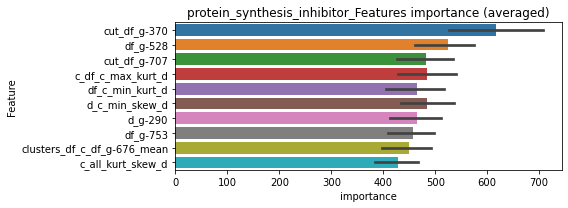

len(train_index) : 2778
len(valid_index) : 927
================================= fold 1/4 protein_synthesis_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0263173	valid_1's binary_logloss: 0.0757352
[2000]	training's binary_logloss: 0.0128937	valid_1's binary_logloss: 0.060197
[3000]	training's binary_logloss: 0.00852557	valid_1's binary_logloss: 0.0546582
[4000]	training's binary_logloss: 0.00639342	valid_1's binary_logloss: 0.0518808
Early stopping, best iteration is:
[3989]	training's binary_logloss: 0.00641078	valid_1's binary_logloss: 0.0518573


len(train_index) : 2779
len(valid_index) : 926
================================= fold 2/4 protein_synthesis_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0259728	valid_1's binary_logloss: 0.0781567
[2000]	training's binary_logloss: 0.0127464	valid_1's binary_logloss: 0.0646751
[3000]	training's binary_logloss: 0.00843943	valid_1's binary_logloss: 0.0596301
Early stopping, best iteration is:
[3085]	training's binary_logloss: 0.00820563	valid_1's binary_logloss: 0.0592974


len(train_index) : 2779
len(valid_index) : 926
================================= fold 3/4 protein_synthesis_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0278556	valid_1's binary_logloss: 0.0576724
[2000]	training's binary_logloss: 0.013575	valid_1's binary_logloss: 0.04283
[3000]	training's binary_logloss: 0.008946	valid_1's binary_logloss: 0.0377331
[4000]	training's binary_logloss: 0.00669208	valid_1's binary_logloss: 0.0348708
[5000]	training's binary_logloss: 0.00536457	valid_1's binary_logloss: 0.0332792
[6000]	training's binary_logloss: 0.0044929	valid_1's binary_logloss: 0.0321125
Early stopping, best iteration is:
[6822]	training's binary_logloss: 0.00396812	valid_1's binary_logloss: 0.031385


len(train_index) : 2779
len(valid_index) : 926
================================= fold 4/4 protein_synthesis_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0275838	valid_1's binary_logloss: 0.063502
[2000]	training's binary_logloss: 0.0134977	valid_1's binary_logloss: 0.048301
[3000]	training's binary_logloss: 0.00888884	valid_1's binary_logloss: 0.0428161
Early stopping, best iteration is:
[3145]	training's binary_logloss: 0.00847259	valid_1's binary_logloss: 0.0422322


protein_synthesis_inhibitor logloss: 0.04619450359227833
protein_synthesis_inhibitor is unpredictable(><)!
protein_tyrosine_kinase_inhibitor, len(trt): 19, len(othr): 3288
target_rate: 0.0007979 → Adj_target_rate: 0.0010260


selected negative label: 3288


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[500]	training's binary_logloss: 0.000346831	valid_1's binary_logloss: 0.00207156
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[499]	training's binary_logloss: 0.000347073	valid_1's binary_logloss: 0.00429476
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[611]	training's binary_logloss: 0.000309116	valid_1's binary_logloss: 0.000739686
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0016256, Threshold: 0.0050502, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00080
Num_p_label: 40.0, Expected: 3.2, Threshold: 0.0050502, conf_0:0.00354, conf_1:0.00657
Num_p_label: 0.0, Expected: 3.2, Adj_threshold_1: 0.0350502


Early stopping, best iteration is:
[631]	training's binary_logloss: 0.000306678	valid_1's binary_logloss: 0.000851197


threshold: 0.0350502, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000298169	valid_1's binary_logloss: 0.00163829
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[484]	training's binary_logloss: 0.00034391	valid_1's binary_logloss: 0.00409069
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[595]	training's binary_logloss: 0.000301764	valid_1's binary_logloss: 0.000576988
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0176227, Threshold: 0.0350502, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000298103	valid_1's binary_logloss: 0.000825698


Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0012557 Vs.target_rate: 0.00080
Num_p_label: 5.0, Expected: 3.2, Threshold: 0.0350502, conf_0:0.02804, conf_1:0.04206
threshold: 0.0350502, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000298169	valid_1's binary_logloss: 0.00163829
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[484]	training's binary_logloss: 0.00034391	valid_1's binary_logloss: 0.00409069
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[595]	training's binary_logloss: 0.000301764	valid_1's binary_logloss: 0.000576988
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0176227, Threshold: 0.0350502, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0012557 Vs.target_rate: 0.00080
Num_p_label: 5.0, Expected: 3.2, Threshold: 0.0350502, conf_0:0.03155, conf_1:0.03856


Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000298103	valid_1's binary_logloss: 0.000825698


threshold: 0.0350502, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


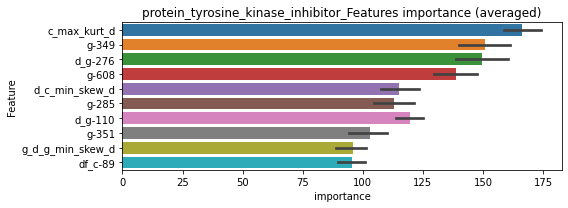

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 protein_tyrosine_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000295386	valid_1's binary_logloss: 0.00136272
Early stopping, best iteration is:
[973]	training's binary_logloss: 0.00029638	valid_1's binary_logloss: 0.00136109


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 protein_tyrosine_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953


Early stopping, best iteration is:
[758]	training's binary_logloss: 0.000320127	valid_1's binary_logloss: 0.00317085


================================= fold 3/4 protein_tyrosine_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[962]	training's binary_logloss: 0.000300505	valid_1's binary_logloss: 0.000541442


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 protein_tyrosine_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000297369	valid_1's binary_logloss: 0.000664595
Early stopping, best iteration is:
[997]	training's binary_logloss: 0.000297369	valid_1's binary_logloss: 0.000664595


protein_tyrosine_kinase_inhibitor logloss: 0.0014346916991659418
radiopaque_medium, len(trt): 56, len(othr): 3282
target_rate: 0.0023516 → Adj_target_rate: 0.0025713


selected negative label: 3282


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[667]	training's binary_logloss: 0.000586466	valid_1's binary_logloss: 0.0244628
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[714]	training's binary_logloss: 0.000561363	valid_1's binary_logloss: 0.00806679
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[753]	training's binary_logloss: 0.000560049	valid_1's binary_logloss: 0.00364142
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[731]	training's binary_logloss: 0.00055474	valid_1's binary_logloss: 0.0128917


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0050410, Threshold: 0.0124574, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3806
p_label_rate: 0.0100452 Vs.target_rate: 0.00235
Num_p_label: 40.0, Expected: 9.4, Threshold: 0.0124574, conf_0:0.00872, conf_1:0.01619
Num_p_label: 6.0, Expected: 9.4, Adj_threshold_1: 0.0424574
threshold: 0.0424574, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[683]	training's binary_logloss: 0.000558321	valid_1's binary_logloss: 0.0203063
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[709]	training's binary_logloss: 0.000558792	valid_1's binary_logloss: 0.00740274
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[730]	training's binary_logloss: 0.000556882	valid_1's binary_logloss: 0.00388223
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[721]	training's binary_logloss: 0.00055124	valid_1's binary_logloss: 0.0120138


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0426284, Threshold: 0.0424574, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3806
p_label_rate: 0.0047715 Vs.target_rate: 0.00235
Num_p_label: 19.0, Expected: 9.4, Threshold: 0.0424574, conf_0:0.03397, conf_1:0.05095
threshold: 0.0424574, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[683]	training's binary_logloss: 0.000558321	valid_1's binary_logloss: 0.0203063
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[709]	training's binary_logloss: 0.000558792	valid_1's binary_logloss: 0.00740274
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[734]	training's binary_logloss: 0.000556882	valid_1's binary_logloss: 0.00388223
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[721]	training's binary_logloss: 0.00055124	valid_1's binary_logloss: 0.0120138


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0426284, Threshold: 0.0424574, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3806
p_label_rate: 0.0047715 Vs.target_rate: 0.00235
Num_p_label: 19.0, Expected: 9.4, Threshold: 0.0424574, conf_0:0.03821, conf_1:0.04670
threshold: 0.0424574, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 656.0/3806, y_label_rate: 0.1723594


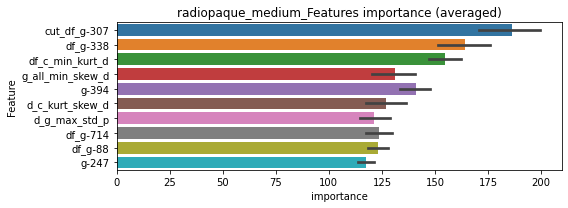

len(train_index) : 2854
len(valid_index) : 952
================================= fold 1/4 radiopaque_medium=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[831]	training's binary_logloss: 0.000573019	valid_1's binary_logloss: 0.016636


len(train_index) : 2854
len(valid_index) : 952
================================= fold 2/4 radiopaque_medium=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[963]	training's binary_logloss: 0.000552174	valid_1's binary_logloss: 0.00759243


len(train_index) : 2855
len(valid_index) : 951
================================= fold 3/4 radiopaque_medium=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[915]	training's binary_logloss: 0.00057287	valid_1's binary_logloss: 0.00315362


len(train_index) : 2855
len(valid_index) : 951
================================= fold 4/4 radiopaque_medium=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[858]	training's binary_logloss: 0.000577841	valid_1's binary_logloss: 0.0104007


radiopaque_medium logloss: 0.009448381810545857
raf_inhibitor, len(trt): 223, len(othr): 3258
target_rate: 0.0093642 → Adj_target_rate: 0.0083226


selected negative label: 3258


unpredictable_cols:raf_inhibitor → create_features


N_features:358
================= Pseudo labeling 1 / 3 =================



Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.061322	valid_1's binary_logloss: 0.22852
Early stopping, best iteration is:
[1658]	training's binary_logloss: 0.0364235	valid_1's binary_logloss: 0.217969
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0613748	valid_1's binary_logloss: 0.225306
Early stopping, best iteration is:
[1660]	training's binary_logloss: 0.036354	valid_1's binary_logloss: 0.212431
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0626734	valid_1's binary_logloss: 0.204425
Early stopping, best iteration is:
[1826]	training's binary_logloss: 0.03363	valid_1's binary_logloss: 0.187195
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0621815	valid_1's binary_logloss: 0.199531
Early stopping, best iteration is:
[1758]	training's binary_logloss: 0.0345498	valid_1's binary_loglos

1 / 3, AUC score:0.932, PR-AUC:0.883
y_Threshold: 0.1068458, Threshold: 0.4475095, pos_neg_ratio: 0.8000000
Remove_noisy_data: 351 → Positive_corect_labels: 541/3558
p_label_rate: 0.0100452 Vs.target_rate: 0.00936
Num_p_label: 40.0, Expected: 37.3, Threshold: 0.4475095, conf_0:0.31326, conf_1:0.58176
threshold: 0.4475095, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 541.0/3558, y_label_rate: 0.1520517
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0457578	valid_1's binary_logloss: 0.132513
[2000]	training's binary_logloss: 0.0222413	valid_1's binary_logloss: 0.108768
[3000]	training's binary_logloss: 0.0145786	valid_1's binary_logloss: 0.100482
Early stopping, best iteration is:
[3073]	training's binary_logloss: 0.0142299	valid_1's binary_logloss: 0.100212
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0461381	valid_1's binary_logloss: 0.134381
[2000]	training's binary_logloss: 0.0224212	valid_1's binary_logloss: 0.11058
Early stopping, best iteration is:
[2878]	training's binary_logloss: 0.0153439	valid_1's binary_logloss: 0.102445
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0454099	valid_1's binary_logloss: 0.153612
[2000]	training's binary_logloss: 0.0220451	valid_1's binary_logloss: 0.132284
Early stopping, best iteration is:
[2

2 / 3, AUC score:0.990, PR-AUC:0.973
y_Threshold: 0.1106631, Threshold: 0.4475095, pos_neg_ratio: 0.8000000
Remove_noisy_data: 82 → Positive_corect_labels: 500.0/3476
p_label_rate: 0.0263687 Vs.target_rate: 0.00936
Num_p_label: 105.0, Expected: 37.3, Threshold: 0.4475095, conf_0:0.35801, conf_1:0.53701
Num_p_label: 100.0, Expected: 37.3, Adj_threshold_1: 0.4775095
Num_p_label: 97.0, Expected: 37.3, Adj_threshold_2: 0.5075095
Num_p_label: 93.0, Expected: 37.3, Adj_threshold_3: 0.5375095
Num_p_label: 90.0, Expected: 37.3, Adj_threshold_4: 0.5675095
Num_p_label: 89.0, Expected: 37.3, Adj_threshold_5: 0.5975095
Num_p_label: 85.0, Expected: 37.3, Adj_threshold_6: 0.6275095
Num_p_label: 75.0, Expected: 37.3, Adj_threshold_7: 0.6575095
Num_p_label: 74.0, Expected: 37.3, Adj_threshold_8: 0.6875095
Num_p_label: 66.0, Expected: 37.3, Adj_threshold_9: 0.7175095
Num_p_label: 50.0, Expected: 37.3, Adj_threshold_10: 0.7475095
threshold: 0.7475095, positive_p_label: 50.0/3982, p_label_rate: 0.0125565

Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0403533	valid_1's binary_logloss: 0.120193
[2000]	training's binary_logloss: 0.0195947	valid_1's binary_logloss: 0.0953593
[3000]	training's binary_logloss: 0.0128709	valid_1's binary_logloss: 0.0857507
[4000]	training's binary_logloss: 0.00960997	valid_1's binary_logloss: 0.0810326
Early stopping, best iteration is:
[4216]	training's binary_logloss: 0.00910639	valid_1's binary_logloss: 0.0800619
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0400888	valid_1's binary_logloss: 0.132273
[2000]	training's binary_logloss: 0.0193583	valid_1's binary_logloss: 0.111644
Early stopping, best iteration is:
[2886]	training's binary_logloss: 0.0132123	valid_1's binary_logloss: 0.10462
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0393789	valid_1's binary_logloss: 0.138643
Early stopping, best iteration 

3 / 3, AUC score:0.992, PR-AUC:0.982
y_Threshold: 0.1123126, Threshold: 0.7475095, pos_neg_ratio: 0.8000000
Remove_noisy_data: 52 → Positive_corect_labels: 474.0/3424
p_label_rate: 0.0226017 Vs.target_rate: 0.00936
Num_p_label: 90.0, Expected: 37.3, Threshold: 0.7475095, conf_0:0.67276, conf_1:0.82226
Num_p_label: 87.0, Expected: 37.3, Adj_threshold_1: 0.7775095
Num_p_label: 82.0, Expected: 37.3, Adj_threshold_2: 0.8075095
Num_p_label: 73.0, Expected: 37.3, Adj_threshold_3: 0.8375095
Num_p_label: 60.0, Expected: 37.3, Adj_threshold_4: 0.8675095
Num_p_label: 37.0, Expected: 37.3, Adj_threshold_5: 0.8975095
threshold: 0.8975095, positive_p_label: 37.0/3982, p_label_rate: 0.0092918
positive_y_label: 474.0/3424, y_label_rate: 0.1384346


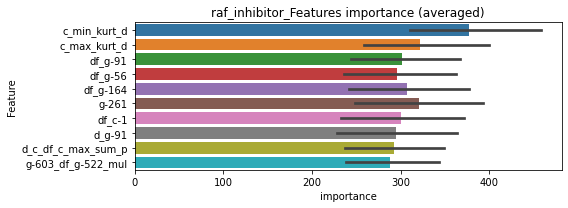

len(train_index) : 2568
len(valid_index) : 856
================================= fold 1/4 raf_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0368366	valid_1's binary_logloss: 0.124531
[2000]	training's binary_logloss: 0.0178793	valid_1's binary_logloss: 0.105953
[3000]	training's binary_logloss: 0.0117584	valid_1's binary_logloss: 0.0998767
Early stopping, best iteration is:
[3325]	training's binary_logloss: 0.0105769	valid_1's binary_logloss: 0.0983753


len(train_index) : 2568
len(valid_index) : 856
================================= fold 2/4 raf_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0372193	valid_1's binary_logloss: 0.116377
[2000]	training's binary_logloss: 0.0180077	valid_1's binary_logloss: 0.0960487
Early stopping, best iteration is:
[2614]	training's binary_logloss: 0.0136182	valid_1's binary_logloss: 0.0904338


len(train_index) : 2568
len(valid_index) : 856
================================= fold 3/4 raf_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0374251	valid_1's binary_logloss: 0.111531
[2000]	training's binary_logloss: 0.0181652	valid_1's binary_logloss: 0.0878708
[3000]	training's binary_logloss: 0.0119375	valid_1's binary_logloss: 0.0791676
[4000]	training's binary_logloss: 0.00891586	valid_1's binary_logloss: 0.0744856
Early stopping, best iteration is:
[4522]	training's binary_logloss: 0.00787738	valid_1's binary_logloss: 0.0728332


len(train_index) : 2568
len(valid_index) : 856
================================= fold 4/4 raf_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0375181	valid_1's binary_logloss: 0.109947
[2000]	training's binary_logloss: 0.0181587	valid_1's binary_logloss: 0.0881469
[3000]	training's binary_logloss: 0.011915	valid_1's binary_logloss: 0.080348
Early stopping, best iteration is:
[3337]	training's binary_logloss: 0.0106722	valid_1's binary_logloss: 0.0787535


raf_inhibitor logloss: 0.08509895260507157
raf_inhibitor is unpredictable(><)!
ras_gtpase_inhibitor, len(trt): 12, len(othr): 3289
target_rate: 0.0005039 → Adj_target_rate: 0.0006942


selected negative label: 3289


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[498]	training's binary_logloss: 0.000245311	valid_1's binary_logloss: 0.00164699
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[507]	training's binary_logloss: 0.000239281	valid_1's binary_logloss: 0.00126088
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[495]	training's binary_logloss: 0.000240282	valid_1's binary_logloss: 0.00136306
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0010363, Threshold: 0.0136325, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00050
Num_p_label: 40.0, Expected: 2.0, Threshold: 0.0136325, conf_0:0.00954, conf_1:0.01772
Num_p_label: 21.0, Expected: 2.0, Adj_threshold_1: 0.0436325
Num_p_label: 13.0, Expected: 2.0, Adj_threshold_2: 0.0736325
Num_p_label: 9.0, Expected: 2.0, Adj_threshold_3: 0.1036325
Num_p_label: 8.0, Expected: 2.0, Adj_threshold_4: 0.1336325
Num_p_label: 7.0, Expected: 2.0, Adj_threshold_5: 0.1636325
Num_p_label: 6.0, Expected: 2.0, Adj_threshold_6: 0.1936325


Early stopping, best iteration is:
[500]	training's binary_logloss: 0.000244248	valid_1's binary_logloss: 0.000826792


Num_p_label: 6.0, Expected: 2.0, Adj_threshold_7: 0.2236325
Num_p_label: 4.0, Expected: 2.0, Adj_threshold_8: 0.2536325
threshold: 0.2536325, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[497]	training's binary_logloss: 0.000222363	valid_1's binary_logloss: 0.0014503
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[484]	training's binary_logloss: 0.000222846	valid_1's binary_logloss: 0.00101672
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[502]	training's binary_logloss: 0.000226764	valid_1's binary_logloss: 0.000267845
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0862808, Threshold: 0.2536325, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0052737 Vs.target_rate: 0.00050
Num_p_label: 21.0, Expected: 2.0, Threshold: 0.2536325, conf_0:0.20291, conf_1:0.30436
Num_p_label: 20.0, Expected: 2.0, Adj_threshold_1: 0.2836325
Num_p_label: 18.0, Expected: 2.0, Adj_threshold_2: 0.3136325
Num_p_label: 18.0, Expected: 2.0, Adj_threshold_3: 0.3436325
Num_p_label: 18.0, Expected: 2.0, Adj_threshold_4: 0.3736325


Early stopping, best iteration is:
[509]	training's binary_logloss: 0.000222378	valid_1's binary_logloss: 0.00118037


Num_p_label: 16.0, Expected: 2.0, Adj_threshold_5: 0.4036325
Num_p_label: 15.0, Expected: 2.0, Adj_threshold_6: 0.4336325
Num_p_label: 15.0, Expected: 2.0, Adj_threshold_7: 0.4636325
Num_p_label: 14.0, Expected: 2.0, Adj_threshold_8: 0.4936325
Num_p_label: 13.0, Expected: 2.0, Adj_threshold_9: 0.5236325
Num_p_label: 13.0, Expected: 2.0, Adj_threshold_10: 0.5536325
threshold: 0.5536325, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[497]	training's binary_logloss: 0.000222363	valid_1's binary_logloss: 0.0014503
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[484]	training's binary_logloss: 0.000222846	valid_1's binary_logloss: 0.00101672
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[502]	training's binary_logloss: 0.000226764	valid_1's binary_logloss: 0.000267845
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0862808, Threshold: 0.5536325, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813


Early stopping, best iteration is:
[509]	training's binary_logloss: 0.000222378	valid_1's binary_logloss: 0.00118037


p_label_rate: 0.0032647 Vs.target_rate: 0.00050
Num_p_label: 13.0, Expected: 2.0, Threshold: 0.5536325, conf_0:0.49827, conf_1:0.60900
Num_p_label: 11.0, Expected: 2.0, Adj_threshold_1: 0.5836325
Num_p_label: 11.0, Expected: 2.0, Adj_threshold_2: 0.6136325
Num_p_label: 10.0, Expected: 2.0, Adj_threshold_3: 0.6436325
Num_p_label: 9.0, Expected: 2.0, Adj_threshold_4: 0.6736325
Num_p_label: 7.0, Expected: 2.0, Adj_threshold_5: 0.7036325
Num_p_label: 7.0, Expected: 2.0, Adj_threshold_6: 0.7336325
Num_p_label: 6.0, Expected: 2.0, Adj_threshold_7: 0.7636325
Num_p_label: 5.0, Expected: 2.0, Adj_threshold_8: 0.7936325
threshold: 0.7936325, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


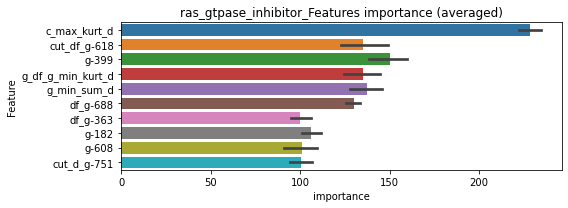

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 ras_gtpase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 ras_gtpase_inhibitor=================================


Early stopping, best iteration is:
[921]	training's binary_logloss: 0.000224236	valid_1's binary_logloss: 0.00062735
Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 ras_gtpase_inhibitor=================================


Early stopping, best iteration is:
[941]	training's binary_logloss: 0.000223173	valid_1's binary_logloss: 0.000833143
Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 ras_gtpase_inhibitor=================================


Early stopping, best iteration is:
[902]	training's binary_logloss: 0.000227618	valid_1's binary_logloss: 0.000310751
Training until validation scores don't improve for 30 rounds


ras_gtpase_inhibitor logloss: 0.0006222908974812771


Early stopping, best iteration is:
[900]	training's binary_logloss: 0.000224101	valid_1's binary_logloss: 0.000717657


retinoid_receptor_agonist, len(trt): 67, len(othr): 3277
target_rate: 0.0028135 → Adj_target_rate: 0.0029948


selected negative label: 3277


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[778]	training's binary_logloss: 0.000570195	valid_1's binary_logloss: 0.0191497
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[723]	training's binary_logloss: 0.000612782	valid_1's binary_logloss: 0.0131291
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[471]	training's binary_logloss: 0.00125195	valid_1's binary_logloss: 0.0275424
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[616]	training's binary_logloss: 0.000740696	valid_1's binary_logloss: 0.0203039


1 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0084040, Threshold: 0.1144267, pos_neg_ratio: 0.8000000
Remove_noisy_data: 136 → Positive_corect_labels: 653/3796
p_label_rate: 0.0100452 Vs.target_rate: 0.00281
Num_p_label: 40.0, Expected: 11.2, Threshold: 0.1144267, conf_0:0.08010, conf_1:0.14875
Num_p_label: 35.0, Expected: 11.2, Adj_threshold_1: 0.1444267
Num_p_label: 32.0, Expected: 11.2, Adj_threshold_2: 0.1744267
Num_p_label: 29.0, Expected: 11.2, Adj_threshold_3: 0.2044267
Num_p_label: 26.0, Expected: 11.2, Adj_threshold_4: 0.2344267
Num_p_label: 23.0, Expected: 11.2, Adj_threshold_5: 0.2644267
Num_p_label: 22.0, Expected: 11.2, Adj_threshold_6: 0.2944267
Num_p_label: 19.0, Expected: 11.2, Adj_threshold_7: 0.3244267
Num_p_label: 19.0, Expected: 11.2, Adj_threshold_8: 0.3544267
Num_p_label: 19.0, Expected: 11.2, Adj_threshold_9: 0.3844267
Num_p_label: 17.0, Expected: 11.2, Adj_threshold_10: 0.4144267
threshold: 0.4144267, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
po

Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[772]	training's binary_logloss: 0.000552317	valid_1's binary_logloss: 0.0113705
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[728]	training's binary_logloss: 0.000571274	valid_1's binary_logloss: 0.024963
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[776]	training's binary_logloss: 0.000553251	valid_1's binary_logloss: 0.0171727
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[748]	training's binary_logloss: 0.000573567	valid_1's binary_logloss: 0.00596964


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0363943, Threshold: 0.4144267, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 651.0/3792
p_label_rate: 0.0060271 Vs.target_rate: 0.00281
Num_p_label: 24.0, Expected: 11.2, Threshold: 0.4144267, conf_0:0.33154, conf_1:0.49731
Num_p_label: 22.0, Expected: 11.2, Adj_threshold_1: 0.4444267
Num_p_label: 21.0, Expected: 11.2, Adj_threshold_2: 0.4744267
Num_p_label: 19.0, Expected: 11.2, Adj_threshold_3: 0.5044267
Num_p_label: 18.0, Expected: 11.2, Adj_threshold_4: 0.5344267
Num_p_label: 18.0, Expected: 11.2, Adj_threshold_5: 0.5644267
Num_p_label: 18.0, Expected: 11.2, Adj_threshold_6: 0.5944267
Num_p_label: 18.0, Expected: 11.2, Adj_threshold_7: 0.6244267
Num_p_label: 16.0, Expected: 11.2, Adj_threshold_8: 0.6544267
threshold: 0.6544267, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 651.0/3792, y_label_rate: 0.1716772
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[746]	training's binary_logloss: 0.000563232	valid_1's binary_logloss: 0.0097109
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[788]	training's binary_logloss: 0.000548869	valid_1's binary_logloss: 0.0105516
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[628]	training's binary_logloss: 0.000669788	valid_1's binary_logloss: 0.028948
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[694]	training's binary_logloss: 0.000598615	valid_1's binary_logloss: 0.0188544


3 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0395433, Threshold: 0.6544267, pos_neg_ratio: 0.8000000
Remove_noisy_data: 10 → Positive_corect_labels: 646.0/3782
p_label_rate: 0.0040181 Vs.target_rate: 0.00281
Num_p_label: 16.0, Expected: 11.2, Threshold: 0.6544267, conf_0:0.58898, conf_1:0.71987
threshold: 0.6544267, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 646.0/3782, y_label_rate: 0.1708091


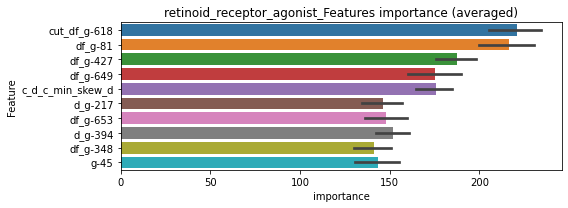

len(train_index) : 2836
len(valid_index) : 946
================================= fold 1/4 retinoid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[753]	training's binary_logloss: 0.000647356	valid_1's binary_logloss: 0.0235728


len(train_index) : 2836
len(valid_index) : 946
================================= fold 2/4 retinoid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000557954	valid_1's binary_logloss: 0.00853488
Early stopping, best iteration is:
[1077]	training's binary_logloss: 0.000540426	valid_1's binary_logloss: 0.00842808


len(train_index) : 2837
len(valid_index) : 945
================================= fold 3/4 retinoid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[963]	training's binary_logloss: 0.000573506	valid_1's binary_logloss: 0.00908042


len(train_index) : 2837
len(valid_index) : 945
================================= fold 4/4 retinoid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[639]	training's binary_logloss: 0.000756238	valid_1's binary_logloss: 0.013422


retinoid_receptor_agonist logloss: 0.01362721536353915
retinoid_receptor_antagonist, len(trt): 6, len(othr): 3289
target_rate: 0.0002520 → Adj_target_rate: 0.0003851


selected negative label: 3289


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[486]	training's binary_logloss: 0.000157995	valid_1's binary_logloss: 0.000221445
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[482]	training's binary_logloss: 0.000154757	valid_1's binary_logloss: 0.00139666
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[478]	training's binary_logloss: 0.000156458	valid_1's binary_logloss: 0.000187003
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0004468, Threshold: 0.0019027, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00025
Num_p_label: 40.0, Expected: 1.0, Threshold: 0.0019027, conf_0:0.00133, conf_1:0.00247
Num_p_label: 2.0, Expected: 1.0, Adj_threshold_1: 0.0319027
threshold: 0.0319027, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[489]	training's binary_logloss: 0.000158077	valid_1's binary_logloss: 0.000195969


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[543]	training's binary_logloss: 0.000145216	valid_1's binary_logloss: 0.000205391
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[542]	training's binary_logloss: 0.000144299	valid_1's binary_logloss: 0.000246759
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[547]	training's binary_logloss: 0.000145189	valid_1's binary_logloss: 0.000164084
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1658356, Threshold: 0.0319027, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0017579 Vs.target_rate: 0.00025
Num_p_label: 7.0, Expected: 1.0, Threshold: 0.0319027, conf_0:0.02552, conf_1:0.03828
Num_p_label: 4.0, Expected: 1.0, Adj_threshold_1: 0.0619027
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_2: 0.0919027
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_3: 0.1219027
Num_p_label: 2.0, Expected: 1.0, Adj_threshold_4: 0.1519027
threshold: 0.1519027, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[626]	training's binary_logloss: 0.00014477	valid_1's binary_logloss: 0.000161116


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[543]	training's binary_logloss: 0.000145216	valid_1's binary_logloss: 0.000205391
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[562]	training's binary_logloss: 0.000144299	valid_1's binary_logloss: 0.000246759
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[550]	training's binary_logloss: 0.000145189	valid_1's binary_logloss: 0.000164084
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1658356, Threshold: 0.1519027, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0005023 Vs.target_rate: 0.00025
Num_p_label: 2.0, Expected: 1.0, Threshold: 0.1519027, conf_0:0.13671, conf_1:0.16709


Early stopping, best iteration is:
[596]	training's binary_logloss: 0.00014477	valid_1's binary_logloss: 0.000161116


threshold: 0.1519027, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


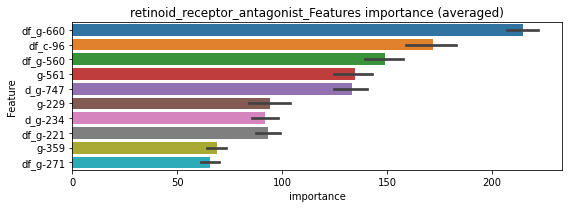

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 retinoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00015063	valid_1's binary_logloss: 0.000266022


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 retinoid_receptor_antagonist=================================


Early stopping, best iteration is:
[1186]	training's binary_logloss: 0.000147748	valid_1's binary_logloss: 0.000262111
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000149932	valid_1's binary_logloss: 0.000202256


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 retinoid_receptor_antagonist=================================


Early stopping, best iteration is:
[1231]	training's binary_logloss: 0.00014728	valid_1's binary_logloss: 0.000199099
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000149364	valid_1's binary_logloss: 0.00017901


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 retinoid_receptor_antagonist=================================


Early stopping, best iteration is:
[1208]	training's binary_logloss: 0.000146827	valid_1's binary_logloss: 0.000176098
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000151134	valid_1's binary_logloss: 0.000166903


retinoid_receptor_antagonist logloss: 0.0002001603085365686


Early stopping, best iteration is:
[1277]	training's binary_logloss: 0.000147821	valid_1's binary_logloss: 0.000163268


rho_associated_kinase_inhibitor, len(trt): 35, len(othr): 3284
target_rate: 0.0014697 → Adj_target_rate: 0.0017245


selected negative label: 3284


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[635]	training's binary_logloss: 0.000398863	valid_1's binary_logloss: 0.00565749
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[678]	training's binary_logloss: 0.000393779	valid_1's binary_logloss: 0.002373
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[675]	training's binary_logloss: 0.000400369	valid_1's binary_logloss: 0.00173869
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[681]	training's binary_logloss: 0.000389879	valid_1's binary_logloss: 0.00814978


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0030325, Threshold: 0.0085413, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00147
Num_p_label: 40.0, Expected: 5.9, Threshold: 0.0085413, conf_0:0.00598, conf_1:0.01110
Num_p_label: 6.0, Expected: 5.9, Adj_threshold_1: 0.0385413
threshold: 0.0385413, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[613]	training's binary_logloss: 0.000388261	valid_1's binary_logloss: 0.00543339
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[673]	training's binary_logloss: 0.000379075	valid_1's binary_logloss: 0.00196263
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[657]	training's binary_logloss: 0.000383913	valid_1's binary_logloss: 0.00125961
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[663]	training's binary_logloss: 0.000373838	valid_1's binary_logloss: 0.00728701


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0327854, Threshold: 0.0385413, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0050226 Vs.target_rate: 0.00147
Num_p_label: 20.0, Expected: 5.9, Threshold: 0.0385413, conf_0:0.03083, conf_1:0.04625
Num_p_label: 10.0, Expected: 5.9, Adj_threshold_1: 0.0685413
threshold: 0.0685413, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[613]	training's binary_logloss: 0.000388261	valid_1's binary_logloss: 0.00543339
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[673]	training's binary_logloss: 0.000379075	valid_1's binary_logloss: 0.00196263
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[657]	training's binary_logloss: 0.000383913	valid_1's binary_logloss: 0.00125961
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[663]	training's binary_logloss: 0.000373838	valid_1's binary_logloss: 0.00728701


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0327854, Threshold: 0.0685413, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0025113 Vs.target_rate: 0.00147
Num_p_label: 10.0, Expected: 5.9, Threshold: 0.0685413, conf_0:0.06169, conf_1:0.07540
threshold: 0.0685413, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 656.0/3808, y_label_rate: 0.1722689


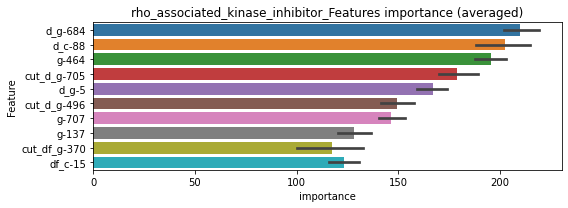

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 rho_associated_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[893]	training's binary_logloss: 0.000394255	valid_1's binary_logloss: 0.00525707


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 rho_associated_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[892]	training's binary_logloss: 0.000403453	valid_1's binary_logloss: 0.00204465


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 rho_associated_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000390379	valid_1's binary_logloss: 0.00170023
Early stopping, best iteration is:
[980]	training's binary_logloss: 0.000391446	valid_1's binary_logloss: 0.00169861


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 rho_associated_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[881]	training's binary_logloss: 0.000400719	valid_1's binary_logloss: 0.00658105


rho_associated_kinase_inhibitor logloss: 0.003895345113753753
ribonucleoside_reductase_inhibitor, len(trt): 37, len(othr): 3286
target_rate: 0.0015537 → Adj_target_rate: 0.0018079


selected negative label: 3286


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[652]	training's binary_logloss: 0.000433098	valid_1's binary_logloss: 0.00470982
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[630]	training's binary_logloss: 0.000426867	valid_1's binary_logloss: 0.0146798
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[666]	training's binary_logloss: 0.000430277	valid_1's binary_logloss: 0.00275262
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[628]	training's binary_logloss: 0.000435314	valid_1's binary_logloss: 0.00637752


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0047570, Threshold: 0.0191065, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00155
Num_p_label: 40.0, Expected: 6.2, Threshold: 0.0191065, conf_0:0.01337, conf_1:0.02484
Num_p_label: 17.0, Expected: 6.2, Adj_threshold_1: 0.0491065
Num_p_label: 5.0, Expected: 6.2, Adj_threshold_2: 0.0791065
threshold: 0.0791065, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[663]	training's binary_logloss: 0.000406889	valid_1's binary_logloss: 0.00493099
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[622]	training's binary_logloss: 0.000409602	valid_1's binary_logloss: 0.0164385
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[667]	training's binary_logloss: 0.000412751	valid_1's binary_logloss: 0.00140948
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[567]	training's binary_logloss: 0.000450329	valid_1's binary_logloss: 0.00601974


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0319909, Threshold: 0.0791065, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3809
p_label_rate: 0.0072828 Vs.target_rate: 0.00155
Num_p_label: 29.0, Expected: 6.2, Threshold: 0.0791065, conf_0:0.06329, conf_1:0.09493
Num_p_label: 24.0, Expected: 6.2, Adj_threshold_1: 0.1091065
Num_p_label: 16.0, Expected: 6.2, Adj_threshold_2: 0.1391065
Num_p_label: 12.0, Expected: 6.2, Adj_threshold_3: 0.1691065
threshold: 0.1691065, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 656.0/3809, y_label_rate: 0.1722237
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[645]	training's binary_logloss: 0.000401642	valid_1's binary_logloss: 0.00995939
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[677]	training's binary_logloss: 0.000404224	valid_1's binary_logloss: 0.00189924
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[629]	training's binary_logloss: 0.000419682	valid_1's binary_logloss: 0.00149236
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[650]	training's binary_logloss: 0.000399216	valid_1's binary_logloss: 0.00723515


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0353096, Threshold: 0.1691065, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3809
p_label_rate: 0.0037670 Vs.target_rate: 0.00155
Num_p_label: 15.0, Expected: 6.2, Threshold: 0.1691065, conf_0:0.15220, conf_1:0.18602
threshold: 0.1691065, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 656.0/3809, y_label_rate: 0.1722237


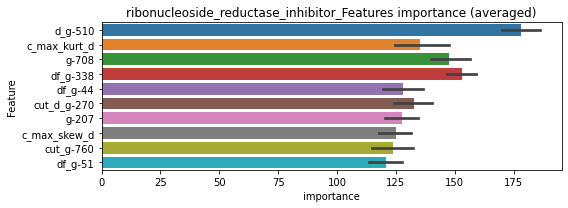

len(train_index) : 2856
len(valid_index) : 953
================================= fold 1/4 ribonucleoside_reductase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[896]	training's binary_logloss: 0.000410098	valid_1's binary_logloss: 0.00787625


len(train_index) : 2857
len(valid_index) : 952
================================= fold 2/4 ribonucleoside_reductase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000409934	valid_1's binary_logloss: 0.00171309
Early stopping, best iteration is:
[971]	training's binary_logloss: 0.000410136	valid_1's binary_logloss: 0.00171273


len(train_index) : 2857
len(valid_index) : 952
================================= fold 3/4 ribonucleoside_reductase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[873]	training's binary_logloss: 0.000422522	valid_1's binary_logloss: 0.00127722


len(train_index) : 2857
len(valid_index) : 952
================================= fold 4/4 ribonucleoside_reductase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[838]	training's binary_logloss: 0.000420108	valid_1's binary_logloss: 0.00592043


ribonucleoside_reductase_inhibitor logloss: 0.004197713487817082
rna_polymerase_inhibitor, len(trt): 25, len(othr): 3285
target_rate: 0.0010498 → Adj_target_rate: 0.0012955


selected negative label: 3285


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[565]	training's binary_logloss: 0.00035733	valid_1's binary_logloss: 0.00165225
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[568]	training's binary_logloss: 0.000342097	valid_1's binary_logloss: 0.00407272
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.000347436	valid_1's binary_logloss: 0.000894094
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0020290, Threshold: 0.0063757, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[559]	training's binary_logloss: 0.000353007	valid_1's binary_logloss: 0.00101692


Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00105
Num_p_label: 40.0, Expected: 4.2, Threshold: 0.0063757, conf_0:0.00446, conf_1:0.00829
Num_p_label: 4.0, Expected: 4.2, Adj_threshold_1: 0.0363757
threshold: 0.0363757, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.00033462	valid_1's binary_logloss: 0.00146468
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[541]	training's binary_logloss: 0.000339069	valid_1's binary_logloss: 0.00236353
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[588]	training's binary_logloss: 0.000336727	valid_1's binary_logloss: 0.000806452
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1260689, Threshold: 0.0363757, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0050226 Vs.target_rate: 0.00105
Num_p_label: 20.0, Expected: 4.2, Threshold: 0.0363757, conf_0:0.02910, conf_1:0.04365
Num_p_label: 10.0, Expected: 4.2, Adj_threshold_1: 0.0663757


Early stopping, best iteration is:
[580]	training's binary_logloss: 0.000340311	valid_1's binary_logloss: 0.000717538


threshold: 0.0663757, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.00033462	valid_1's binary_logloss: 0.00146468
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[554]	training's binary_logloss: 0.000339069	valid_1's binary_logloss: 0.00236353
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[589]	training's binary_logloss: 0.000336727	valid_1's binary_logloss: 0.000806452
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[577]	training's binary_logloss: 0.000340311	valid_1's binary_logloss: 0.000717538


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1260689, Threshold: 0.0663757, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0025113 Vs.target_rate: 0.00105
Num_p_label: 10.0, Expected: 4.2, Threshold: 0.0663757, conf_0:0.05974, conf_1:0.07301
threshold: 0.0663757, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


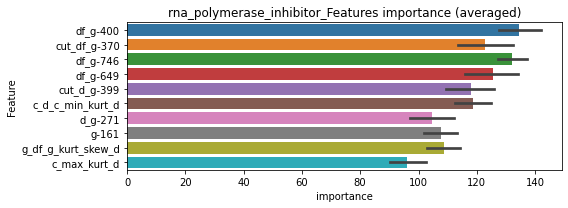

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 rna_polymerase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[862]	training's binary_logloss: 0.000341293	valid_1's binary_logloss: 0.00128771


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 rna_polymerase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[867]	training's binary_logloss: 0.000337094	valid_1's binary_logloss: 0.00199639


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 rna_polymerase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[854]	training's binary_logloss: 0.000344705	valid_1's binary_logloss: 0.000737387


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 rna_polymerase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[803]	training's binary_logloss: 0.00035203	valid_1's binary_logloss: 0.000728994


rna_polymerase_inhibitor logloss: 0.0011878942667661757


mutually exclusive columns: serotonin_receptor_agonist


serotonin_receptor_agonist, len(trt): 236, len(othr): 6230
target_rate: 0.0099101 → Adj_target_rate: 0.0087332


selected negative label: 6230


unpredictable_cols:serotonin_receptor_agonist → create_features


N_features:358
================= Pseudo labeling 1 / 3 =================



Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0385649	valid_1's binary_logloss: 0.12897
Early stopping, best iteration is:
[1468]	training's binary_logloss: 0.0259422	valid_1's binary_logloss: 0.122968
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0380317	valid_1's binary_logloss: 0.136084
Early stopping, best iteration is:
[1577]	training's binary_logloss: 0.0236713	valid_1's binary_logloss: 0.131353
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0417146	valid_1's binary_logloss: 0.0932772
[2000]	training's binary_logloss: 0.0202947	valid_1's binary_logloss: 0.0801763
Early stopping, best iteration is:
[2921]	training's binary_logloss: 0.013822	valid_1's binary_logloss: 0.0766901
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0378036	valid_1's binary_logloss: 0.136971
Early stopping, b

1 / 3, AUC score:0.970, PR-AUC:0.945
y_Threshold: 0.0647715, Threshold: 0.1292131, pos_neg_ratio: 0.8000000
Remove_noisy_data: 450 → Positive_corect_labels: 1146/7026
p_label_rate: 0.0100452 Vs.target_rate: 0.00991
Num_p_label: 40.0, Expected: 39.5, Threshold: 0.1292131, conf_0:0.09045, conf_1:0.16798
threshold: 0.1292131, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1146.0/7026, y_label_rate: 0.1631085
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0271543	valid_1's binary_logloss: 0.0748875
[2000]	training's binary_logloss: 0.0130592	valid_1's binary_logloss: 0.0654677
Early stopping, best iteration is:
[2178]	training's binary_logloss: 0.0119268	valid_1's binary_logloss: 0.0645235
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0264309	valid_1's binary_logloss: 0.0843943
[2000]	training's binary_logloss: 0.012746	valid_1's binary_logloss: 0.0742745
Early stopping, best iteration is:
[2358]	training's binary_logloss: 0.0107097	valid_1's binary_logloss: 0.0727691
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0273676	valid_1's binary_logloss: 0.0752479
[2000]	training's binary_logloss: 0.0131945	valid_1's binary_logloss: 0.0633198
Early stopping, best iteration is:
[2685]	training's binary_logloss: 0.00967057	valid_1's binary_logloss: 0.

2 / 3, AUC score:0.996, PR-AUC:0.990
y_Threshold: 0.0854561, Threshold: 0.1292131, pos_neg_ratio: 0.8000000
Remove_noisy_data: 94 → Positive_corect_labels: 1099.0/6932
p_label_rate: 0.0153189 Vs.target_rate: 0.00991
Num_p_label: 61.0, Expected: 39.5, Threshold: 0.1292131, conf_0:0.10337, conf_1:0.15506
Num_p_label: 44.0, Expected: 39.5, Adj_threshold_1: 0.1592131
threshold: 0.1592131, positive_p_label: 44.0/3982, p_label_rate: 0.0110497
positive_y_label: 1099.0/6932, y_label_rate: 0.1585401
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.022475	valid_1's binary_logloss: 0.0615107
[2000]	training's binary_logloss: 0.0108644	valid_1's binary_logloss: 0.0510258
[3000]	training's binary_logloss: 0.00712418	valid_1's binary_logloss: 0.0473107
Early stopping, best iteration is:
[3624]	training's binary_logloss: 0.00587929	valid_1's binary_logloss: 0.0461076
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0226168	valid_1's binary_logloss: 0.0617725
[2000]	training's binary_logloss: 0.0109593	valid_1's binary_logloss: 0.0511916
Early stopping, best iteration is:
[2872]	training's binary_logloss: 0.00752706	valid_1's binary_logloss: 0.0480098
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0232849	valid_1's binary_logloss: 0.0507955
[2000]	training's binary_logloss: 0.0112441	valid_1's binary_logloss: 0.0407468
[3000]	training's binary_

3 / 3, AUC score:0.999, PR-AUC:0.996
y_Threshold: 0.0708349, Threshold: 0.1592131, pos_neg_ratio: 0.8000000
Remove_noisy_data: 50 → Positive_corect_labels: 1074.0/6882
p_label_rate: 0.0125565 Vs.target_rate: 0.00991
Num_p_label: 50.0, Expected: 39.5, Threshold: 0.1592131, conf_0:0.14329, conf_1:0.17513
threshold: 0.1592131, positive_p_label: 50.0/3982, p_label_rate: 0.0125565
positive_y_label: 1074.0/6882, y_label_rate: 0.1560593


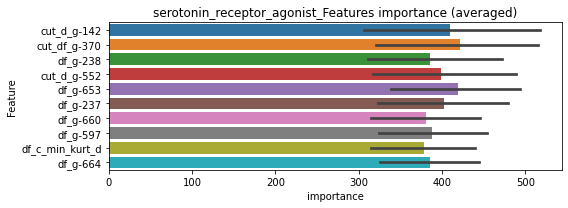

len(train_index) : 5161
len(valid_index) : 1721
================================= fold 1/4 serotonin_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0207209	valid_1's binary_logloss: 0.0463504
[2000]	training's binary_logloss: 0.010119	valid_1's binary_logloss: 0.0359599
[3000]	training's binary_logloss: 0.00665647	valid_1's binary_logloss: 0.0322826
[4000]	training's binary_logloss: 0.00497102	valid_1's binary_logloss: 0.0304461
Early stopping, best iteration is:
[4943]	training's binary_logloss: 0.00402503	valid_1's binary_logloss: 0.0293586


len(train_index) : 5161
len(valid_index) : 1721
================================= fold 2/4 serotonin_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0198734	valid_1's binary_logloss: 0.0552822
[2000]	training's binary_logloss: 0.0097442	valid_1's binary_logloss: 0.0455784
[3000]	training's binary_logloss: 0.00641371	valid_1's binary_logloss: 0.0421849
[4000]	training's binary_logloss: 0.00479155	valid_1's binary_logloss: 0.0403654
Early stopping, best iteration is:
[4266]	training's binary_logloss: 0.00449177	valid_1's binary_logloss: 0.0400168


len(train_index) : 5162
len(valid_index) : 1720
================================= fold 3/4 serotonin_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0204301	valid_1's binary_logloss: 0.0540957
[2000]	training's binary_logloss: 0.00995036	valid_1's binary_logloss: 0.0445585
[3000]	training's binary_logloss: 0.00653809	valid_1's binary_logloss: 0.0412684
Early stopping, best iteration is:
[3485]	training's binary_logloss: 0.00560314	valid_1's binary_logloss: 0.0405132


len(train_index) : 5162
len(valid_index) : 1720
================================= fold 4/4 serotonin_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0211427	valid_1's binary_logloss: 0.0425954
[2000]	training's binary_logloss: 0.0102708	valid_1's binary_logloss: 0.0324786
[3000]	training's binary_logloss: 0.00675168	valid_1's binary_logloss: 0.0290314
[4000]	training's binary_logloss: 0.00503453	valid_1's binary_logloss: 0.0271844
Early stopping, best iteration is:
[4816]	training's binary_logloss: 0.00417976	valid_1's binary_logloss: 0.0263016


serotonin_receptor_agonist logloss: 0.0340477041895373
serotonin_receptor_agonist is unpredictable(><)!


mutually exclusive columns: serotonin_receptor_antagonist


serotonin_receptor_antagonist, len(trt): 404, len(othr): 7510
target_rate: 0.0169648 → Adj_target_rate: 0.0137918


selected negative label: 7510


unpredictable_cols:serotonin_receptor_antagonist → create_features


N_features:358
================= Pseudo labeling 1 / 3 =================



Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0568385	valid_1's binary_logloss: 0.168862
Early stopping, best iteration is:
[1801]	training's binary_logloss: 0.0311013	valid_1's binary_logloss: 0.155207
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0563185	valid_1's binary_logloss: 0.174369
Early stopping, best iteration is:
[1943]	training's binary_logloss: 0.0289067	valid_1's binary_logloss: 0.16012
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0567759	valid_1's binary_logloss: 0.179331
Early stopping, best iteration is:
[1801]	training's binary_logloss: 0.0312788	valid_1's binary_logloss: 0.166304
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0575567	valid_1's binary_logloss: 0.16615
[2000]	training's binary_logloss: 0.0290684	valid_1's binary_logloss: 0.151284
Early stopping, best

1 / 3, AUC score:0.956, PR-AUC:0.914
y_Threshold: 0.0921454, Threshold: 0.2038156, pos_neg_ratio: 0.8000000
Remove_noisy_data: 655 → Positive_corect_labels: 1325/8357
p_label_rate: 0.0100452 Vs.target_rate: 0.01696
Num_p_label: 40.0, Expected: 67.6, Threshold: 0.2038156, conf_0:0.14267, conf_1:0.26496
threshold: 0.2038156, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1325.0/8357, y_label_rate: 0.1585497
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0392279	valid_1's binary_logloss: 0.114894
[2000]	training's binary_logloss: 0.0186488	valid_1's binary_logloss: 0.0982548
Early stopping, best iteration is:
[2091]	training's binary_logloss: 0.0177741	valid_1's binary_logloss: 0.0974913
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0390381	valid_1's binary_logloss: 0.115895
[2000]	training's binary_logloss: 0.0185348	valid_1's binary_logloss: 0.0961617
Early stopping, best iteration is:
[2175]	training's binary_logloss: 0.0169321	valid_1's binary_logloss: 0.094402
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0396966	valid_1's binary_logloss: 0.115883
[2000]	training's binary_logloss: 0.0187653	valid_1's binary_logloss: 0.098291
Early stopping, best iteration is:
[2178]	training's binary_logloss: 0.0171071	valid_1's binary_logloss: 0.09699

2 / 3, AUC score:0.993, PR-AUC:0.981
y_Threshold: 0.1239088, Threshold: 0.2038156, pos_neg_ratio: 0.8000000
Remove_noisy_data: 160 → Positive_corect_labels: 1245.0/8197
p_label_rate: 0.0138122 Vs.target_rate: 0.01696
Num_p_label: 55.0, Expected: 67.6, Threshold: 0.2038156, conf_0:0.16305, conf_1:0.24458
threshold: 0.2038156, positive_p_label: 55.0/3982, p_label_rate: 0.0138122
positive_y_label: 1245.0/8197, y_label_rate: 0.1518848
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0348786	valid_1's binary_logloss: 0.0932845
[2000]	training's binary_logloss: 0.0165429	valid_1's binary_logloss: 0.0754289
[3000]	training's binary_logloss: 0.0107485	valid_1's binary_logloss: 0.0691177
Early stopping, best iteration is:
[3010]	training's binary_logloss: 0.0107098	valid_1's binary_logloss: 0.0689915
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0340224	valid_1's binary_logloss: 0.101233
[2000]	training's binary_logloss: 0.0162012	valid_1's binary_logloss: 0.0834244
[3000]	training's binary_logloss: 0.0105003	valid_1's binary_logloss: 0.0773256
Early stopping, best iteration is:
[3062]	training's binary_logloss: 0.0102725	valid_1's binary_logloss: 0.07711
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0352797	valid_1's binary_logloss: 0.0881409
[2000]	training's binary_loglo

3 / 3, AUC score:0.997, PR-AUC:0.991
y_Threshold: 0.1123031, Threshold: 0.2038156, pos_neg_ratio: 0.8000000
Remove_noisy_data: 102 → Positive_corect_labels: 1194.0/8095
p_label_rate: 0.0138122 Vs.target_rate: 0.01696
Num_p_label: 55.0, Expected: 67.6, Threshold: 0.2038156, conf_0:0.18343, conf_1:0.22420
threshold: 0.2038156, positive_p_label: 55.0/3982, p_label_rate: 0.0138122
positive_y_label: 1194.0/8095, y_label_rate: 0.1474985


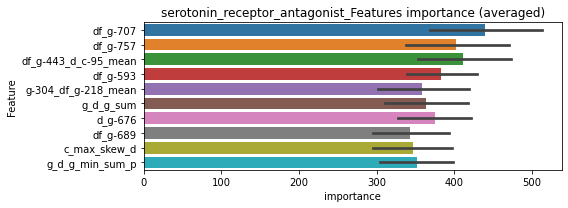

len(train_index) : 6071
len(valid_index) : 2024
================================= fold 1/4 serotonin_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0319195	valid_1's binary_logloss: 0.0905297
[2000]	training's binary_logloss: 0.0152289	valid_1's binary_logloss: 0.0751542
[3000]	training's binary_logloss: 0.00989631	valid_1's binary_logloss: 0.069737
Early stopping, best iteration is:
[3499]	training's binary_logloss: 0.00840441	valid_1's binary_logloss: 0.0680704


len(train_index) : 6071
len(valid_index) : 2024
================================= fold 2/4 serotonin_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0319126	valid_1's binary_logloss: 0.0913455
[2000]	training's binary_logloss: 0.0151947	valid_1's binary_logloss: 0.0733865
[3000]	training's binary_logloss: 0.00988069	valid_1's binary_logloss: 0.067296
[4000]	training's binary_logloss: 0.0073067	valid_1's binary_logloss: 0.0642437
Early stopping, best iteration is:
[4056]	training's binary_logloss: 0.00720195	valid_1's binary_logloss: 0.0641031


len(train_index) : 6071
len(valid_index) : 2024
================================= fold 3/4 serotonin_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0320926	valid_1's binary_logloss: 0.090746
[2000]	training's binary_logloss: 0.0153377	valid_1's binary_logloss: 0.0730387
Early stopping, best iteration is:
[2767]	training's binary_logloss: 0.0108294	valid_1's binary_logloss: 0.0676471


len(train_index) : 6072
len(valid_index) : 2023
================================= fold 4/4 serotonin_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0319421	valid_1's binary_logloss: 0.0860128
[2000]	training's binary_logloss: 0.0153211	valid_1's binary_logloss: 0.0692599
[3000]	training's binary_logloss: 0.0099591	valid_1's binary_logloss: 0.0627125
Early stopping, best iteration is:
[3698]	training's binary_logloss: 0.0080005	valid_1's binary_logloss: 0.0601595


serotonin_receptor_antagonist logloss: 0.06499563526527236
serotonin_receptor_antagonist is unpredictable(><)!
serotonin_reuptake_inhibitor, len(trt): 44, len(othr): 3285
target_rate: 0.0018477 → Adj_target_rate: 0.0020948


selected negative label: 3285


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[633]	training's binary_logloss: 0.000482477	valid_1's binary_logloss: 0.0127933
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[605]	training's binary_logloss: 0.000504318	valid_1's binary_logloss: 0.016898
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[615]	training's binary_logloss: 0.000510682	valid_1's binary_logloss: 0.00671862
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[661]	training's binary_logloss: 0.000470171	valid_1's binary_logloss: 0.0152409


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0032812, Threshold: 0.0350547, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00185
Num_p_label: 40.0, Expected: 7.4, Threshold: 0.0350547, conf_0:0.02454, conf_1:0.04557
Num_p_label: 21.0, Expected: 7.4, Adj_threshold_1: 0.0650547
Num_p_label: 13.0, Expected: 7.4, Adj_threshold_2: 0.0950547
threshold: 0.0950547, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[662]	training's binary_logloss: 0.000452315	valid_1's binary_logloss: 0.0125854
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[584]	training's binary_logloss: 0.000501791	valid_1's binary_logloss: 0.0181875
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[639]	training's binary_logloss: 0.000479026	valid_1's binary_logloss: 0.00629322
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[586]	training's binary_logloss: 0.000503305	valid_1's binary_logloss: 0.0135039


y_Threshold: 0.0278598, Threshold: 0.0950547, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 655.0/3806
p_label_rate: 0.0195881 Vs.target_rate: 0.00185
Num_p_label: 78.0, Expected: 7.4, Threshold: 0.0950547, conf_0:0.07604, conf_1:0.11407
Num_p_label: 67.0, Expected: 7.4, Adj_threshold_1: 0.1250547
Num_p_label: 58.0, Expected: 7.4, Adj_threshold_2: 0.1550547
Num_p_label: 51.0, Expected: 7.4, Adj_threshold_3: 0.1850547
Num_p_label: 45.0, Expected: 7.4, Adj_threshold_4: 0.2150547
Num_p_label: 43.0, Expected: 7.4, Adj_threshold_5: 0.2450547
Num_p_label: 39.0, Expected: 7.4, Adj_threshold_6: 0.2750547
Num_p_label: 35.0, Expected: 7.4, Adj_threshold_7: 0.3050547
Num_p_label: 32.0, Expected: 7.4, Adj_threshold_8: 0.3350547
Num_p_label: 30.0, Expected: 7.4, Adj_threshold_9: 0.3650547
Num_p_label: 26.0, Expected: 7.4, Adj_threshold_10: 0.3950547
threshold: 0.3950547, positive_p_label: 26.0/3982, p_label_rate: 0.0065294
positive_y_label: 655.0/3806, y_label_rate: 0.1720

Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[611]	training's binary_logloss: 0.000477546	valid_1's binary_logloss: 0.00749353
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[611]	training's binary_logloss: 0.000471817	valid_1's binary_logloss: 0.0132585
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[641]	training's binary_logloss: 0.000465128	valid_1's binary_logloss: 0.0120043
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[589]	training's binary_logloss: 0.000489308	valid_1's binary_logloss: 0.0128424


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0311988, Threshold: 0.3950547, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 654.0/3804
p_label_rate: 0.0080362 Vs.target_rate: 0.00185
Num_p_label: 32.0, Expected: 7.4, Threshold: 0.3950547, conf_0:0.35555, conf_1:0.43456
Num_p_label: 25.0, Expected: 7.4, Adj_threshold_1: 0.4250547
Num_p_label: 23.0, Expected: 7.4, Adj_threshold_2: 0.4550547
Num_p_label: 22.0, Expected: 7.4, Adj_threshold_3: 0.4850547
Num_p_label: 20.0, Expected: 7.4, Adj_threshold_4: 0.5150547
Num_p_label: 18.0, Expected: 7.4, Adj_threshold_5: 0.5450547
threshold: 0.5450547, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 654.0/3804, y_label_rate: 0.1719243


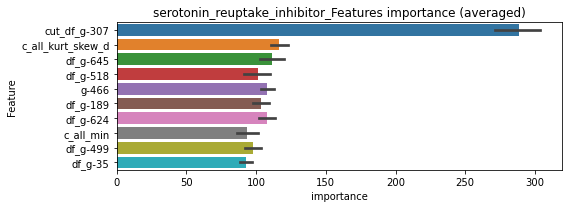

len(train_index) : 2853
len(valid_index) : 951
================================= fold 1/4 serotonin_reuptake_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[638]	training's binary_logloss: 0.00055444	valid_1's binary_logloss: 0.0105111


len(train_index) : 2853
len(valid_index) : 951
================================= fold 2/4 serotonin_reuptake_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[796]	training's binary_logloss: 0.000478542	valid_1's binary_logloss: 0.00774996


len(train_index) : 2853
len(valid_index) : 951
================================= fold 3/4 serotonin_reuptake_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2853
len(valid_index) : 951
================================= fold 4/4 serotonin_reuptake_inhibitor=================================


Early stopping, best iteration is:
[509]	training's binary_logloss: 0.000666487	valid_1's binary_logloss: 0.0161782
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[736]	training's binary_logloss: 0.000497993	valid_1's binary_logloss: 0.00942371


serotonin_reuptake_inhibitor logloss: 0.010965743703367597
sigma_receptor_agonist, len(trt): 36, len(othr): 3285
target_rate: 0.0015117 → Adj_target_rate: 0.0017663


selected negative label: 3285


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[641]	training's binary_logloss: 0.000410248	valid_1's binary_logloss: 0.00697391
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[621]	training's binary_logloss: 0.000404654	valid_1's binary_logloss: 0.0199389
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[618]	training's binary_logloss: 0.000419348	valid_1's binary_logloss: 0.00390847
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[623]	training's binary_logloss: 0.000414471	valid_1's binary_logloss: 0.00313321


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0023272, Threshold: 0.0283097, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00151
Num_p_label: 40.0, Expected: 6.0, Threshold: 0.0283097, conf_0:0.01982, conf_1:0.03680
Num_p_label: 17.0, Expected: 6.0, Adj_threshold_1: 0.0583097
Num_p_label: 12.0, Expected: 6.0, Adj_threshold_2: 0.0883097
threshold: 0.0883097, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.000407486	valid_1's binary_logloss: 0.00587778
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[569]	training's binary_logloss: 0.000409752	valid_1's binary_logloss: 0.0171204
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[618]	training's binary_logloss: 0.000402081	valid_1's binary_logloss: 0.00340543
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[619]	training's binary_logloss: 0.00040039	valid_1's binary_logloss: 0.00296442


y_Threshold: 0.0124293, Threshold: 0.0883097, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0118031 Vs.target_rate: 0.00151
Num_p_label: 47.0, Expected: 6.0, Threshold: 0.0883097, conf_0:0.07065, conf_1:0.10597
Num_p_label: 38.0, Expected: 6.0, Adj_threshold_1: 0.1183097
Num_p_label: 31.0, Expected: 6.0, Adj_threshold_2: 0.1483097
Num_p_label: 29.0, Expected: 6.0, Adj_threshold_3: 0.1783097
Num_p_label: 24.0, Expected: 6.0, Adj_threshold_4: 0.2083097
Num_p_label: 21.0, Expected: 6.0, Adj_threshold_5: 0.2383097
Num_p_label: 19.0, Expected: 6.0, Adj_threshold_6: 0.2683097
Num_p_label: 14.0, Expected: 6.0, Adj_threshold_7: 0.2983097
threshold: 0.2983097, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.000407486	valid_1's binary_logloss: 0.00587778
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[569]	training's binary_logloss: 0.000409752	valid_1's binary_logloss: 0.0171204
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[619]	training's binary_logloss: 0.000402081	valid_1's binary_logloss: 0.00340543
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[619]	training's binary_logloss: 0.00040039	valid_1's binary_logloss: 0.00296442


y_Threshold: 0.0124293, Threshold: 0.2983097, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0035158 Vs.target_rate: 0.00151
Num_p_label: 14.0, Expected: 6.0, Threshold: 0.2983097, conf_0:0.26848, conf_1:0.32814
threshold: 0.2983097, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


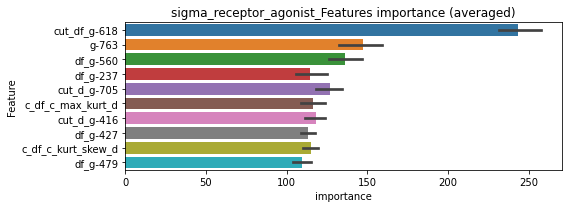

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 sigma_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[868]	training's binary_logloss: 0.000405353	valid_1's binary_logloss: 0.00401005


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 sigma_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 sigma_receptor_agonist=================================


Early stopping, best iteration is:
[554]	training's binary_logloss: 0.000522137	valid_1's binary_logloss: 0.0152463
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[949]	training's binary_logloss: 0.000397861	valid_1's binary_logloss: 0.00235625


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 sigma_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[965]	training's binary_logloss: 0.000395526	valid_1's binary_logloss: 0.00293067


sigma_receptor_agonist logloss: 0.006139183773788306
sigma_receptor_antagonist, len(trt): 36, len(othr): 3279
target_rate: 0.0015117 → Adj_target_rate: 0.0017663


selected negative label: 3279


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[575]	training's binary_logloss: 0.000489228	valid_1's binary_logloss: 0.009223
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[590]	training's binary_logloss: 0.000473848	valid_1's binary_logloss: 0.00921164
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[649]	training's binary_logloss: 0.000432535	valid_1's binary_logloss: 0.00456027
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[628]	training's binary_logloss: 0.000449129	valid_1's binary_logloss: 0.0043663


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0029944, Threshold: 0.0085381, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 655/3802
p_label_rate: 0.0100452 Vs.target_rate: 0.00151
Num_p_label: 40.0, Expected: 6.0, Threshold: 0.0085381, conf_0:0.00598, conf_1:0.01110
Num_p_label: 5.0, Expected: 6.0, Adj_threshold_1: 0.0385381
threshold: 0.0385381, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 655.0/3802, y_label_rate: 0.1722777
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[653]	training's binary_logloss: 0.000418636	valid_1's binary_logloss: 0.0103615
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[627]	training's binary_logloss: 0.00043591	valid_1's binary_logloss: 0.00860874
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[656]	training's binary_logloss: 0.000415679	valid_1's binary_logloss: 0.00450264
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[646]	training's binary_logloss: 0.000429932	valid_1's binary_logloss: 0.00388158


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0344678, Threshold: 0.0385381, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3802
p_label_rate: 0.0032647 Vs.target_rate: 0.00151
Num_p_label: 13.0, Expected: 6.0, Threshold: 0.0385381, conf_0:0.03083, conf_1:0.04625
threshold: 0.0385381, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 655.0/3802, y_label_rate: 0.1722777
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[653]	training's binary_logloss: 0.000418636	valid_1's binary_logloss: 0.0103615
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[627]	training's binary_logloss: 0.00043591	valid_1's binary_logloss: 0.00860874
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[656]	training's binary_logloss: 0.000415679	valid_1's binary_logloss: 0.00450264
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[646]	training's binary_logloss: 0.000429932	valid_1's binary_logloss: 0.00388158


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0344678, Threshold: 0.0385381, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3802
p_label_rate: 0.0032647 Vs.target_rate: 0.00151
Num_p_label: 13.0, Expected: 6.0, Threshold: 0.0385381, conf_0:0.03468, conf_1:0.04239
threshold: 0.0385381, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 655.0/3802, y_label_rate: 0.1722777


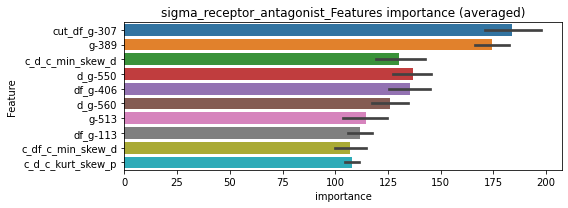

len(train_index) : 2851
len(valid_index) : 951
================================= fold 1/4 sigma_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2851
len(valid_index) : 951
================================= fold 2/4 sigma_receptor_antagonist=================================


Early stopping, best iteration is:
[562]	training's binary_logloss: 0.000579696	valid_1's binary_logloss: 0.00805666
Training until validation scores don't improve for 30 rounds


len(train_index) : 2852


Early stopping, best iteration is:
[679]	training's binary_logloss: 0.000503535	valid_1's binary_logloss: 0.00679817


len(valid_index) : 950
================================= fold 3/4 sigma_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2852
len(valid_index) : 950
================================= fold 4/4 sigma_receptor_antagonist=================================


Early stopping, best iteration is:
[640]	training's binary_logloss: 0.000524134	valid_1's binary_logloss: 0.00483924
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[922]	training's binary_logloss: 0.000430653	valid_1's binary_logloss: 0.00374411


sigma_receptor_antagonist logloss: 0.0058605285467085875
smoothened_receptor_antagonist, len(trt): 25, len(othr): 3285
target_rate: 0.0010498 → Adj_target_rate: 0.0012955


selected negative label: 3285


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[615]	training's binary_logloss: 0.000334837	valid_1's binary_logloss: 0.00155419
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[566]	training's binary_logloss: 0.000337544	valid_1's binary_logloss: 0.00593617
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[642]	training's binary_logloss: 0.000330057	valid_1's binary_logloss: 0.00067804
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0018288, Threshold: 0.0053198, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[611]	training's binary_logloss: 0.000333726	valid_1's binary_logloss: 0.00100326


Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00105
Num_p_label: 40.0, Expected: 4.2, Threshold: 0.0053198, conf_0:0.00372, conf_1:0.00692
Num_p_label: 0.0, Expected: 4.2, Adj_threshold_1: 0.0353198
threshold: 0.0353198, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[609]	training's binary_logloss: 0.000324523	valid_1's binary_logloss: 0.00108355
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[547]	training's binary_logloss: 0.000338754	valid_1's binary_logloss: 0.00610348
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[619]	training's binary_logloss: 0.000323243	valid_1's binary_logloss: 0.000637727
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0226271, Threshold: 0.0353198, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[626]	training's binary_logloss: 0.000321164	valid_1's binary_logloss: 0.000765568


Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0002511 Vs.target_rate: 0.00105
Num_p_label: 1.0, Expected: 4.2, Threshold: 0.0353198, conf_0:0.02826, conf_1:0.04238
threshold: 0.0353198, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[609]	training's binary_logloss: 0.000324523	valid_1's binary_logloss: 0.00108355
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[547]	training's binary_logloss: 0.000338754	valid_1's binary_logloss: 0.00610348
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[619]	training's binary_logloss: 0.000323243	valid_1's binary_logloss: 0.000637727
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0226271, Threshold: 0.0353198, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[613]	training's binary_logloss: 0.000321164	valid_1's binary_logloss: 0.000765568


Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0002511 Vs.target_rate: 0.00105
Num_p_label: 1.0, Expected: 4.2, Threshold: 0.0353198, conf_0:0.03179, conf_1:0.03885
threshold: 0.0353198, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


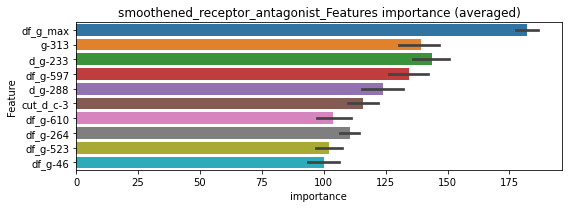

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 smoothened_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[922]	training's binary_logloss: 0.000331273	valid_1's binary_logloss: 0.000878547


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 smoothened_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[958]	training's binary_logloss: 0.000320643	valid_1's binary_logloss: 0.0041088


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 smoothened_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000323881	valid_1's binary_logloss: 0.000665633
Early stopping, best iteration is:
[992]	training's binary_logloss: 0.000323881	valid_1's binary_logloss: 0.000665633


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 smoothened_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000323919	valid_1's binary_logloss: 0.000868921
Early stopping, best iteration is:
[970]	training's binary_logloss: 0.000323919	valid_1's binary_logloss: 0.000868921


smoothened_receptor_antagonist logloss: 0.0016309289802269233


mutually exclusive columns: sodium_channel_inhibitor


sodium_channel_inhibitor, len(trt): 267, len(othr): 6860
target_rate: 0.0112119 → Adj_target_rate: 0.0096991


selected negative label: 6860


unpredictable_cols:sodium_channel_inhibitor → create_features


N_features:358
================= Pseudo labeling 1 / 3 =================



Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0393562	valid_1's binary_logloss: 0.114571
[2000]	training's binary_logloss: 0.0184654	valid_1's binary_logloss: 0.103754
Early stopping, best iteration is:
[2437]	training's binary_logloss: 0.0148732	valid_1's binary_logloss: 0.102091
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0381086	valid_1's binary_logloss: 0.130914
Early stopping, best iteration is:
[1463]	training's binary_logloss: 0.0253609	valid_1's binary_logloss: 0.125614
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0392364	valid_1's binary_logloss: 0.116711
Early stopping, best iteration is:
[1755]	training's binary_logloss: 0.0213811	valid_1's binary_logloss: 0.107544
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0389451	valid_1's binary_logloss: 0.122312
[2000]	training's 

1 / 3, AUC score:0.978, PR-AUC:0.953
y_Threshold: 0.0637182, Threshold: 0.1274121, pos_neg_ratio: 0.8000000
Remove_noisy_data: 487 → Positive_corect_labels: 1266/7745
p_label_rate: 0.0100452 Vs.target_rate: 0.01121
Num_p_label: 40.0, Expected: 44.6, Threshold: 0.1274121, conf_0:0.08919, conf_1:0.16564
threshold: 0.1274121, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1266.0/7745, y_label_rate: 0.1634603
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0282242	valid_1's binary_logloss: 0.0869428
[2000]	training's binary_logloss: 0.0134459	valid_1's binary_logloss: 0.0761981
Early stopping, best iteration is:
[2357]	training's binary_logloss: 0.0112919	valid_1's binary_logloss: 0.0745809
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0280149	valid_1's binary_logloss: 0.0901195
[2000]	training's binary_logloss: 0.0133513	valid_1's binary_logloss: 0.0808015
Early stopping, best iteration is:
[2112]	training's binary_logloss: 0.0125984	valid_1's binary_logloss: 0.080281
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0291588	valid_1's binary_logloss: 0.0719723
[2000]	training's binary_logloss: 0.0138715	valid_1's binary_logloss: 0.0606872
Early stopping, best iteration is:
[2554]	training's binary_logloss: 0.0106818	valid_1's binary_logloss: 0.0

2 / 3, AUC score:0.997, PR-AUC:0.989
y_Threshold: 0.0688990, Threshold: 0.1274121, pos_neg_ratio: 0.8000000
Remove_noisy_data: 116 → Positive_corect_labels: 1208.0/7629
p_label_rate: 0.0115520 Vs.target_rate: 0.01121
Num_p_label: 46.0, Expected: 44.6, Threshold: 0.1274121, conf_0:0.10193, conf_1:0.15289
threshold: 0.1274121, positive_p_label: 46.0/3982, p_label_rate: 0.0115520
positive_y_label: 1208.0/7629, y_label_rate: 0.1583432
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0231865	valid_1's binary_logloss: 0.0681634
[2000]	training's binary_logloss: 0.0111832	valid_1's binary_logloss: 0.0584229
Early stopping, best iteration is:
[2496]	training's binary_logloss: 0.00884006	valid_1's binary_logloss: 0.0565213
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0228594	valid_1's binary_logloss: 0.0697806
[2000]	training's binary_logloss: 0.0109774	valid_1's binary_logloss: 0.0603918
Early stopping, best iteration is:
[2455]	training's binary_logloss: 0.0088383	valid_1's binary_logloss: 0.0587489
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0241444	valid_1's binary_logloss: 0.0579634
[2000]	training's binary_logloss: 0.0115926	valid_1's binary_logloss: 0.0463487
[3000]	training's binary_logloss: 0.0075466	valid_1's binary_logloss: 0.0423883
Early stopping, best itera

3 / 3, AUC score:0.999, PR-AUC:0.997
y_Threshold: 0.0672187, Threshold: 0.1274121, pos_neg_ratio: 0.8000000
Remove_noisy_data: 56 → Positive_corect_labels: 1180.0/7573
p_label_rate: 0.0102963 Vs.target_rate: 0.01121
Num_p_label: 41.0, Expected: 44.6, Threshold: 0.1274121, conf_0:0.11467, conf_1:0.14015
threshold: 0.1274121, positive_p_label: 41.0/3982, p_label_rate: 0.0102963
positive_y_label: 1180.0/7573, y_label_rate: 0.1558167


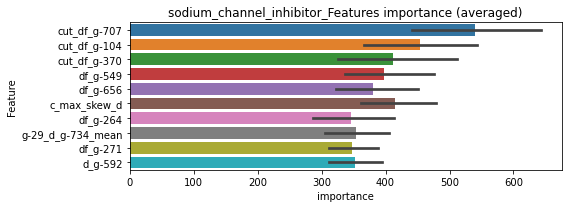

len(train_index) : 5679
len(valid_index) : 1894
================================= fold 1/4 sodium_channel_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0214594	valid_1's binary_logloss: 0.0535059
[2000]	training's binary_logloss: 0.0103692	valid_1's binary_logloss: 0.0433188
[3000]	training's binary_logloss: 0.00677136	valid_1's binary_logloss: 0.0399183
Early stopping, best iteration is:
[3649]	training's binary_logloss: 0.00553526	valid_1's binary_logloss: 0.038707


len(train_index) : 5680
len(valid_index) : 1893
================================= fold 2/4 sodium_channel_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0214497	valid_1's binary_logloss: 0.052733
[2000]	training's binary_logloss: 0.0103222	valid_1's binary_logloss: 0.0426425
[3000]	training's binary_logloss: 0.00674435	valid_1's binary_logloss: 0.0394658
[4000]	training's binary_logloss: 0.00502546	valid_1's binary_logloss: 0.0377777
Early stopping, best iteration is:
[4542]	training's binary_logloss: 0.0044183	valid_1's binary_logloss: 0.0371719


len(train_index) : 5680
len(valid_index) : 1893
================================= fold 3/4 sodium_channel_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0211756	valid_1's binary_logloss: 0.0573752
[2000]	training's binary_logloss: 0.0101989	valid_1's binary_logloss: 0.0474761
[3000]	training's binary_logloss: 0.00665831	valid_1's binary_logloss: 0.0446021
Early stopping, best iteration is:
[3122]	training's binary_logloss: 0.00638528	valid_1's binary_logloss: 0.0443128


len(train_index) : 5680
len(valid_index) : 1893
================================= fold 4/4 sodium_channel_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0213504	valid_1's binary_logloss: 0.0567961
[2000]	training's binary_logloss: 0.0103205	valid_1's binary_logloss: 0.0466318
[3000]	training's binary_logloss: 0.00676494	valid_1's binary_logloss: 0.0431573
Early stopping, best iteration is:
[3944]	training's binary_logloss: 0.00510649	valid_1's binary_logloss: 0.0414744


sodium_channel_inhibitor logloss: 0.040416305263645966
sodium_channel_inhibitor is unpredictable(><)!
sphingosine_receptor_agonist, len(trt): 32, len(othr): 3285
target_rate: 0.0013437 → Adj_target_rate: 0.0015980


selected negative label: 3285


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[570]	training's binary_logloss: 0.000415153	valid_1's binary_logloss: 0.0047319
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[603]	training's binary_logloss: 0.00039289	valid_1's binary_logloss: 0.00553416
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.0004036	valid_1's binary_logloss: 0.00491515
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0024586, Threshold: 0.0063225, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[582]	training's binary_logloss: 0.000409381	valid_1's binary_logloss: 0.00264877


Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00134
Num_p_label: 40.0, Expected: 5.4, Threshold: 0.0063225, conf_0:0.00443, conf_1:0.00822
Num_p_label: 5.0, Expected: 5.4, Adj_threshold_1: 0.0363225
threshold: 0.0363225, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[590]	training's binary_logloss: 0.000391552	valid_1's binary_logloss: 0.00505628
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[575]	training's binary_logloss: 0.000396655	valid_1's binary_logloss: 0.00477109
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[613]	training's binary_logloss: 0.000387327	valid_1's binary_logloss: 0.0051655
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[617]	training's binary_logloss: 0.000382725	valid_1's binary_logloss: 0.00215747


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0221856, Threshold: 0.0363225, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0027624 Vs.target_rate: 0.00134
Num_p_label: 11.0, Expected: 5.4, Threshold: 0.0363225, conf_0:0.02906, conf_1:0.04359
threshold: 0.0363225, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[590]	training's binary_logloss: 0.000391552	valid_1's binary_logloss: 0.00505628
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[575]	training's binary_logloss: 0.000396655	valid_1's binary_logloss: 0.00477109
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[613]	training's binary_logloss: 0.000387327	valid_1's binary_logloss: 0.0051655
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[617]	training's binary_logloss: 0.000382725	valid_1's binary_logloss: 0.00215747


y_Threshold: 0.0221856, Threshold: 0.0363225, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0027624 Vs.target_rate: 0.00134
Num_p_label: 11.0, Expected: 5.4, Threshold: 0.0363225, conf_0:0.03269, conf_1:0.03995
threshold: 0.0363225, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


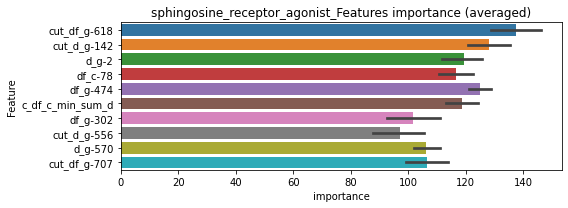

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 sphingosine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[792]	training's binary_logloss: 0.000406468	valid_1's binary_logloss: 0.00427192


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 sphingosine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[880]	training's binary_logloss: 0.00038229	valid_1's binary_logloss: 0.00455635


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 sphingosine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[809]	training's binary_logloss: 0.000402624	valid_1's binary_logloss: 0.0045074


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 sphingosine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[945]	training's binary_logloss: 0.000384555	valid_1's binary_logloss: 0.00196678


sphingosine_receptor_agonist logloss: 0.0038259465268073705
src_inhibitor, len(trt): 71, len(othr): 3283
target_rate: 0.0029814 → Adj_target_rate: 0.0031461


selected negative label: 3283


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[545]	training's binary_logloss: 0.000917196	valid_1's binary_logloss: 0.0538077
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[686]	training's binary_logloss: 0.000658873	valid_1's binary_logloss: 0.0353893
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[787]	training's binary_logloss: 0.000616232	valid_1's binary_logloss: 0.00417663
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[642]	training's binary_logloss: 0.000711691	valid_1's binary_logloss: 0.0316243


1 / 3, AUC score:0.998, PR-AUC:0.996
y_Threshold: 0.0055368, Threshold: 0.0359383, pos_neg_ratio: 0.8000000
Remove_noisy_data: 142 → Positive_corect_labels: 651/3797
p_label_rate: 0.0100452 Vs.target_rate: 0.00298
Num_p_label: 40.0, Expected: 11.9, Threshold: 0.0359383, conf_0:0.02516, conf_1:0.04672
Num_p_label: 28.0, Expected: 11.9, Adj_threshold_1: 0.0659383
Num_p_label: 15.0, Expected: 11.9, Adj_threshold_2: 0.0959383
threshold: 0.0959383, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 651.0/3797, y_label_rate: 0.1714511
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[742]	training's binary_logloss: 0.000580897	valid_1's binary_logloss: 0.014127
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[764]	training's binary_logloss: 0.000567823	valid_1's binary_logloss: 0.0195131
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[495]	training's binary_logloss: 0.00108544	valid_1's binary_logloss: 0.0407245
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[767]	training's binary_logloss: 0.000572962	valid_1's binary_logloss: 0.00911975


2 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0217263, Threshold: 0.0959383, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 647.0/3789
p_label_rate: 0.0085384 Vs.target_rate: 0.00298
Num_p_label: 34.0, Expected: 11.9, Threshold: 0.0959383, conf_0:0.07675, conf_1:0.11513
Num_p_label: 28.0, Expected: 11.9, Adj_threshold_1: 0.1259383
Num_p_label: 24.0, Expected: 11.9, Adj_threshold_2: 0.1559383
Num_p_label: 18.0, Expected: 11.9, Adj_threshold_3: 0.1859383
Num_p_label: 16.0, Expected: 11.9, Adj_threshold_4: 0.2159383
threshold: 0.2159383, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 647.0/3789, y_label_rate: 0.1707575
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[705]	training's binary_logloss: 0.000599841	valid_1's binary_logloss: 0.0244381
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[479]	training's binary_logloss: 0.00112535	valid_1's binary_logloss: 0.0319499
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[749]	training's binary_logloss: 0.000562371	valid_1's binary_logloss: 0.0150403
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[735]	training's binary_logloss: 0.000577921	valid_1's binary_logloss: 0.0144504


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0370965, Threshold: 0.2159383, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 646.0/3787
p_label_rate: 0.0045203 Vs.target_rate: 0.00298
Num_p_label: 18.0, Expected: 11.9, Threshold: 0.2159383, conf_0:0.19434, conf_1:0.23753
Num_p_label: 16.0, Expected: 11.9, Adj_threshold_1: 0.2459383
threshold: 0.2459383, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 646.0/3787, y_label_rate: 0.1705836


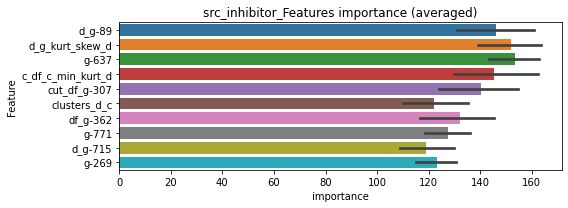

len(train_index) : 2840
len(valid_index) : 947
================================= fold 1/4 src_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[731]	training's binary_logloss: 0.000693604	valid_1's binary_logloss: 0.0215646


len(train_index) : 2840
len(valid_index) : 947
================================= fold 2/4 src_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[627]	training's binary_logloss: 0.0007801	valid_1's binary_logloss: 0.0248505


len(train_index) : 2840
len(valid_index) : 947
================================= fold 3/4 src_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000572826	valid_1's binary_logloss: 0.00670381
Early stopping, best iteration is:
[1017]	training's binary_logloss: 0.000569245	valid_1's binary_logloss: 0.00669255


len(train_index) : 2841
len(valid_index) : 946
================================= fold 4/4 src_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[701]	training's binary_logloss: 0.000713651	valid_1's binary_logloss: 0.0183976


src_inhibitor logloss: 0.01787616090093718
steroid, len(trt): 79, len(othr): 3282
target_rate: 0.0033174 → Adj_target_rate: 0.0034449


selected negative label: 3282


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[611]	training's binary_logloss: 0.000931273	valid_1's binary_logloss: 0.0356393
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[647]	training's binary_logloss: 0.000842584	valid_1's binary_logloss: 0.0322196
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[729]	training's binary_logloss: 0.000729281	valid_1's binary_logloss: 0.0319035
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[692]	training's binary_logloss: 0.000756685	valid_1's binary_logloss: 0.0259054


1 / 3, AUC score:0.999, PR-AUC:0.997
y_Threshold: 0.0087172, Threshold: 0.2681301, pos_neg_ratio: 0.8000000
Remove_noisy_data: 138 → Positive_corect_labels: 653/3800
p_label_rate: 0.0100452 Vs.target_rate: 0.00332
Num_p_label: 40.0, Expected: 13.2, Threshold: 0.2681301, conf_0:0.18769, conf_1:0.34857
Num_p_label: 37.0, Expected: 13.2, Adj_threshold_1: 0.2981301
Num_p_label: 37.0, Expected: 13.2, Adj_threshold_2: 0.3281301
Num_p_label: 33.0, Expected: 13.2, Adj_threshold_3: 0.3581301
Num_p_label: 32.0, Expected: 13.2, Adj_threshold_4: 0.3881301
Num_p_label: 28.0, Expected: 13.2, Adj_threshold_5: 0.4181301
Num_p_label: 27.0, Expected: 13.2, Adj_threshold_6: 0.4481301
Num_p_label: 23.0, Expected: 13.2, Adj_threshold_7: 0.4781301
Num_p_label: 22.0, Expected: 13.2, Adj_threshold_8: 0.5081301
Num_p_label: 19.0, Expected: 13.2, Adj_threshold_9: 0.5381301
threshold: 0.5381301, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 653.0/3800, y_label_rate: 0.1718421
===========

Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[676]	training's binary_logloss: 0.000757589	valid_1's binary_logloss: 0.0253757
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[615]	training's binary_logloss: 0.000856267	valid_1's binary_logloss: 0.0318923
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[684]	training's binary_logloss: 0.000723943	valid_1's binary_logloss: 0.0289219
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.000938874	valid_1's binary_logloss: 0.0357317


2 / 3, AUC score:0.999, PR-AUC:0.998
y_Threshold: 0.0355460, Threshold: 0.5381301, pos_neg_ratio: 0.8000000
Remove_noisy_data: 14 → Positive_corect_labels: 646.0/3786
p_label_rate: 0.0123054 Vs.target_rate: 0.00332
Num_p_label: 49.0, Expected: 13.2, Threshold: 0.5381301, conf_0:0.43050, conf_1:0.64576
Num_p_label: 46.0, Expected: 13.2, Adj_threshold_1: 0.5681301
Num_p_label: 42.0, Expected: 13.2, Adj_threshold_2: 0.5981301
Num_p_label: 38.0, Expected: 13.2, Adj_threshold_3: 0.6281301
Num_p_label: 36.0, Expected: 13.2, Adj_threshold_4: 0.6581301
Num_p_label: 33.0, Expected: 13.2, Adj_threshold_5: 0.6881301
Num_p_label: 28.0, Expected: 13.2, Adj_threshold_6: 0.7181301
Num_p_label: 25.0, Expected: 13.2, Adj_threshold_7: 0.7481301
Num_p_label: 22.0, Expected: 13.2, Adj_threshold_8: 0.7781301
Num_p_label: 18.0, Expected: 13.2, Adj_threshold_9: 0.8081301
threshold: 0.8081301, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 646.0/3786, y_label_rate: 0.1706286
==========

Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[726]	training's binary_logloss: 0.000645641	valid_1's binary_logloss: 0.0297884
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[492]	training's binary_logloss: 0.00124412	valid_1's binary_logloss: 0.0381086
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[824]	training's binary_logloss: 0.000588932	valid_1's binary_logloss: 0.017608
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[787]	training's binary_logloss: 0.00061519	valid_1's binary_logloss: 0.00619902


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0420722, Threshold: 0.8081301, pos_neg_ratio: 0.8000000
Remove_noisy_data: 10 → Positive_corect_labels: 641.0/3776
p_label_rate: 0.0047715 Vs.target_rate: 0.00332
Num_p_label: 19.0, Expected: 13.2, Threshold: 0.8081301, conf_0:0.72732, conf_1:0.88894
threshold: 0.8081301, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 641.0/3776, y_label_rate: 0.1697564


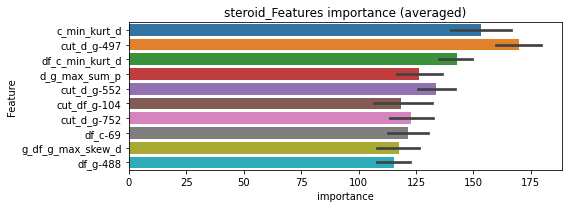

len(train_index) : 2832
len(valid_index) : 944
================================= fold 1/4 steroid=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2832
len(valid_index) : 944
================================= fold 2/4 steroid=================================


Early stopping, best iteration is:
[368]	training's binary_logloss: 0.00147106	valid_1's binary_logloss: 0.0249294
Training until validation scores don't improve for 30 rounds


len(train_index) : 2832
len(valid_index) : 944
================================= fold 3/4 steroid=================================


Early stopping, best iteration is:
[451]	training's binary_logloss: 0.00118108	valid_1's binary_logloss: 0.0218392
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[760]	training's binary_logloss: 0.0007172	valid_1's binary_logloss: 0.0174337


len(train_index) : 2832
len(valid_index) : 944
================================= fold 4/4 steroid=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[894]	training's binary_logloss: 0.000642973	valid_1's binary_logloss: 0.0115162


steroid logloss: 0.01892960954648865
syk_inhibitor, len(trt): 19, len(othr): 3283
target_rate: 0.0007979 → Adj_target_rate: 0.0010260


selected negative label: 3283


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[583]	training's binary_logloss: 0.000305478	valid_1's binary_logloss: 0.00145961
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[561]	training's binary_logloss: 0.000311812	valid_1's binary_logloss: 0.000851421
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[590]	training's binary_logloss: 0.000306633	valid_1's binary_logloss: 0.000700369
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0015407, Threshold: 0.0047317, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3807
p_label_rate: 0.0100452 Vs.target_rate: 0.00080
Num_p_label: 40.0, Expected: 3.2, Threshold: 0.0047317, conf_0:0.00331, conf_1:0.00615


Early stopping, best iteration is:
[570]	training's binary_logloss: 0.000304526	valid_1's binary_logloss: 0.00113487


Num_p_label: 1.0, Expected: 3.2, Adj_threshold_1: 0.0347317
threshold: 0.0347317, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[554]	training's binary_logloss: 0.00029961	valid_1's binary_logloss: 0.00126692
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[594]	training's binary_logloss: 0.000297082	valid_1's binary_logloss: 0.000718645
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[570]	training's binary_logloss: 0.000302936	valid_1's binary_logloss: 0.00065489
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1483595, Threshold: 0.0347317, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3807
p_label_rate: 0.0020090 Vs.target_rate: 0.00080
Num_p_label: 8.0, Expected: 3.2, Threshold: 0.0347317, conf_0:0.02779, conf_1:0.04168
Num_p_label: 3.0, Expected: 3.2, Adj_threshold_1: 0.0647317


Early stopping, best iteration is:
[534]	training's binary_logloss: 0.000309114	valid_1's binary_logloss: 0.000889284


threshold: 0.0647317, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[554]	training's binary_logloss: 0.00029961	valid_1's binary_logloss: 0.00126692
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[594]	training's binary_logloss: 0.000297082	valid_1's binary_logloss: 0.000718645
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[570]	training's binary_logloss: 0.000302936	valid_1's binary_logloss: 0.00065489
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1483595, Threshold: 0.0647317, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3807
p_label_rate: 0.0007534 Vs.target_rate: 0.00080
Num_p_label: 3.0, Expected: 3.2, Threshold: 0.0647317, conf_0:0.05826, conf_1:0.07120


Early stopping, best iteration is:
[534]	training's binary_logloss: 0.000309114	valid_1's binary_logloss: 0.000889284


threshold: 0.0647317, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 656.0/3807, y_label_rate: 0.1723142


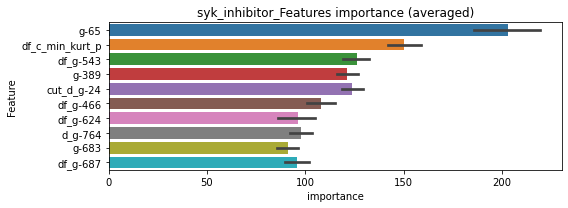

len(train_index) : 2855
len(valid_index) : 952
================================= fold 1/4 syk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[885]	training's binary_logloss: 0.000301594	valid_1's binary_logloss: 0.00150418


len(train_index) : 2855
len(valid_index) : 952
================================= fold 2/4 syk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000298644	valid_1's binary_logloss: 0.000681566
Early stopping, best iteration is:
[995]	training's binary_logloss: 0.000298644	valid_1's binary_logloss: 0.000681566


len(train_index) : 2855
len(valid_index) : 952
================================= fold 3/4 syk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[828]	training's binary_logloss: 0.000308804	valid_1's binary_logloss: 0.000554184


len(train_index) : 2856
len(valid_index) : 951
================================= fold 4/4 syk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[859]	training's binary_logloss: 0.000306179	valid_1's binary_logloss: 0.000819642


syk_inhibitor logloss: 0.0008901887879762993
tachykinin_antagonist, len(trt): 60, len(othr): 3281
target_rate: 0.0025195 → Adj_target_rate: 0.0027266


selected negative label: 3281


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[642]	training's binary_logloss: 0.000615769	valid_1's binary_logloss: 0.0303033
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[751]	training's binary_logloss: 0.000553681	valid_1's binary_logloss: 0.0120068
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[779]	training's binary_logloss: 0.000562512	valid_1's binary_logloss: 0.00682902
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[729]	training's binary_logloss: 0.000562897	valid_1's binary_logloss: 0.0141652


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0046939, Threshold: 0.0119886, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3805
p_label_rate: 0.0100452 Vs.target_rate: 0.00252
Num_p_label: 40.0, Expected: 10.0, Threshold: 0.0119886, conf_0:0.00839, conf_1:0.01559
Num_p_label: 4.0, Expected: 10.0, Adj_threshold_1: 0.0419886
threshold: 0.0419886, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 656.0/3805, y_label_rate: 0.1724047
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[634]	training's binary_logloss: 0.000621556	valid_1's binary_logloss: 0.0286183
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[713]	training's binary_logloss: 0.000560205	valid_1's binary_logloss: 0.0124922
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[726]	training's binary_logloss: 0.000569243	valid_1's binary_logloss: 0.00626341
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[751]	training's binary_logloss: 0.000539237	valid_1's binary_logloss: 0.01335


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0259141, Threshold: 0.0419886, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 654.0/3801
p_label_rate: 0.0025113 Vs.target_rate: 0.00252
Num_p_label: 10.0, Expected: 10.0, Threshold: 0.0419886, conf_0:0.03359, conf_1:0.05039
threshold: 0.0419886, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 654.0/3801, y_label_rate: 0.1720600
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[724]	training's binary_logloss: 0.000543666	valid_1's binary_logloss: 0.00969594
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[691]	training's binary_logloss: 0.000569587	valid_1's binary_logloss: 0.015635
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[712]	training's binary_logloss: 0.000557706	valid_1's binary_logloss: 0.0131924
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[589]	training's binary_logloss: 0.000709093	valid_1's binary_logloss: 0.0250315


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0277474, Threshold: 0.0419886, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 653.0/3799
p_label_rate: 0.0030136 Vs.target_rate: 0.00252
Num_p_label: 12.0, Expected: 10.0, Threshold: 0.0419886, conf_0:0.03779, conf_1:0.04619
threshold: 0.0419886, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 653.0/3799, y_label_rate: 0.1718873


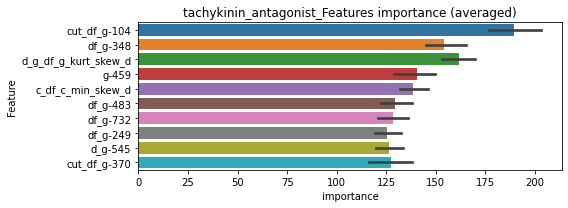

len(train_index) : 2849
len(valid_index) : 950
================================= fold 1/4 tachykinin_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[890]	training's binary_logloss: 0.000573414	valid_1's binary_logloss: 0.00892279


len(train_index) : 2849
len(valid_index) : 950
================================= fold 2/4 tachykinin_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[821]	training's binary_logloss: 0.000601321	valid_1's binary_logloss: 0.0116355


len(train_index) : 2849
len(valid_index) : 950
================================= fold 3/4 tachykinin_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[649]	training's binary_logloss: 0.000707459	valid_1's binary_logloss: 0.0268863


len(train_index) : 2850
len(valid_index) : 949
================================= fold 4/4 tachykinin_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[711]	training's binary_logloss: 0.000672471	valid_1's binary_logloss: 0.0104843


tachykinin_antagonist logloss: 0.0144832806576685
tgf-beta_receptor_inhibitor, len(trt): 30, len(othr): 3286
target_rate: 0.0012598 → Adj_target_rate: 0.0015127


selected negative label: 3286


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[649]	training's binary_logloss: 0.000403183	valid_1's binary_logloss: 0.00272181
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[663]	training's binary_logloss: 0.000400827	valid_1's binary_logloss: 0.00260501
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[685]	training's binary_logloss: 0.000403566	valid_1's binary_logloss: 0.00109165
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[655]	training's binary_logloss: 0.000402349	valid_1's binary_logloss: 0.00510492


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0026539, Threshold: 0.0076442, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00126
Num_p_label: 40.0, Expected: 5.0, Threshold: 0.0076442, conf_0:0.00535, conf_1:0.00994
Num_p_label: 2.0, Expected: 5.0, Adj_threshold_1: 0.0376442
threshold: 0.0376442, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[682]	training's binary_logloss: 0.000386165	valid_1's binary_logloss: 0.00254107
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[681]	training's binary_logloss: 0.000385891	valid_1's binary_logloss: 0.00233029
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[656]	training's binary_logloss: 0.000394667	valid_1's binary_logloss: 0.0010345
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[654]	training's binary_logloss: 0.000390571	valid_1's binary_logloss: 0.00263662


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0614792, Threshold: 0.0376442, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0022602 Vs.target_rate: 0.00126
Num_p_label: 9.0, Expected: 5.0, Threshold: 0.0376442, conf_0:0.03012, conf_1:0.04517
threshold: 0.0376442, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[682]	training's binary_logloss: 0.000386165	valid_1's binary_logloss: 0.00254107
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[706]	training's binary_logloss: 0.000385891	valid_1's binary_logloss: 0.00233029
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[656]	training's binary_logloss: 0.000394667	valid_1's binary_logloss: 0.0010345
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[654]	training's binary_logloss: 0.000390571	valid_1's binary_logloss: 0.00263662


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0614792, Threshold: 0.0376442, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0022602 Vs.target_rate: 0.00126
Num_p_label: 9.0, Expected: 5.0, Threshold: 0.0376442, conf_0:0.03388, conf_1:0.04141
threshold: 0.0376442, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


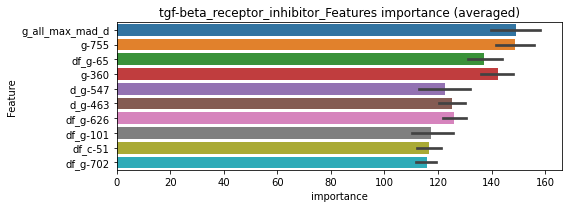

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 tgf-beta_receptor_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[899]	training's binary_logloss: 0.00040404	valid_1's binary_logloss: 0.00290949


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 tgf-beta_receptor_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[890]	training's binary_logloss: 0.000404092	valid_1's binary_logloss: 0.00262532


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 tgf-beta_receptor_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000395537	valid_1's binary_logloss: 0.0010154
Early stopping, best iteration is:
[993]	training's binary_logloss: 0.000395537	valid_1's binary_logloss: 0.0010154


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 tgf-beta_receptor_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[899]	training's binary_logloss: 0.000403466	valid_1's binary_logloss: 0.00284336


tgf-beta_receptor_inhibitor logloss: 0.0023482616213395236
thrombin_inhibitor, len(trt): 19, len(othr): 3288
target_rate: 0.0007979 → Adj_target_rate: 0.0010260


selected negative label: 3288


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[579]	training's binary_logloss: 0.000295907	valid_1's binary_logloss: 0.00184803
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[544]	training's binary_logloss: 0.000302805	valid_1's binary_logloss: 0.00246101
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[571]	training's binary_logloss: 0.000305223	valid_1's binary_logloss: 0.000616013
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0019984, Threshold: 0.0068550, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00080
Num_p_label: 40.0, Expected: 3.2, Threshold: 0.0068550, conf_0:0.00480, conf_1:0.00891
Num_p_label: 6.0, Expected: 3.2, Adj_threshold_1: 0.0368550


Early stopping, best iteration is:
[525]	training's binary_logloss: 0.000313879	valid_1's binary_logloss: 0.00137557


threshold: 0.0368550, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000288917	valid_1's binary_logloss: 0.00215022
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[521]	training's binary_logloss: 0.000300503	valid_1's binary_logloss: 0.00312931
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[576]	training's binary_logloss: 0.000294566	valid_1's binary_logloss: 0.000545476
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0637829, Threshold: 0.0368550, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0057760 Vs.target_rate: 0.00080
Num_p_label: 23.0, Expected: 3.2, Threshold: 0.0368550, conf_0:0.02948, conf_1:0.04423
Num_p_label: 9.0, Expected: 3.2, Adj_threshold_1: 0.0668550
Num_p_label: 5.0, Expected: 3.2, Adj_threshold_2: 0.0968550


Early stopping, best iteration is:
[540]	training's binary_logloss: 0.000297423	valid_1's binary_logloss: 0.00135084


threshold: 0.0968550, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000288917	valid_1's binary_logloss: 0.00215022
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[521]	training's binary_logloss: 0.000300503	valid_1's binary_logloss: 0.00312931
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[576]	training's binary_logloss: 0.000294566	valid_1's binary_logloss: 0.000545476
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0637829, Threshold: 0.0968550, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0012557 Vs.target_rate: 0.00080
Num_p_label: 5.0, Expected: 3.2, Threshold: 0.0968550, conf_0:0.08717, conf_1:0.10654


Early stopping, best iteration is:
[540]	training's binary_logloss: 0.000297423	valid_1's binary_logloss: 0.00135084


threshold: 0.0968550, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


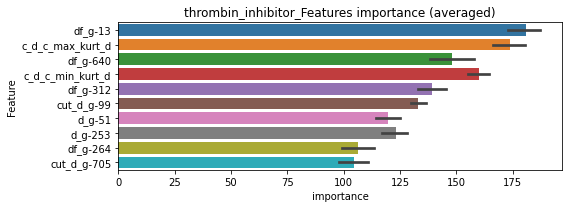

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 thrombin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[867]	training's binary_logloss: 0.000295298	valid_1's binary_logloss: 0.00282534


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 thrombin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000289517	valid_1's binary_logloss: 0.00141889
Early stopping, best iteration is:
[972]	training's binary_logloss: 0.000289517	valid_1's binary_logloss: 0.00141889


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 thrombin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[932]	training's binary_logloss: 0.000295482	valid_1's binary_logloss: 0.000522523


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 thrombin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[861]	training's binary_logloss: 0.000295486	valid_1's binary_logloss: 0.000989672


thrombin_inhibitor logloss: 0.0014394688423908031
thymidylate_synthase_inhibitor, len(trt): 37, len(othr): 3285
target_rate: 0.0015537 → Adj_target_rate: 0.0018079


selected negative label: 3285


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[645]	training's binary_logloss: 0.000454988	valid_1's binary_logloss: 0.00780777
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[629]	training's binary_logloss: 0.000457589	valid_1's binary_logloss: 0.00868866
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[681]	training's binary_logloss: 0.000454626	valid_1's binary_logloss: 0.00181205
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[656]	training's binary_logloss: 0.000450272	valid_1's binary_logloss: 0.00223184


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0029610, Threshold: 0.0130963, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00155
Num_p_label: 40.0, Expected: 6.2, Threshold: 0.0130963, conf_0:0.00917, conf_1:0.01703
Num_p_label: 11.0, Expected: 6.2, Adj_threshold_1: 0.0430963
threshold: 0.0430963, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[590]	training's binary_logloss: 0.000481775	valid_1's binary_logloss: 0.00776282
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[576]	training's binary_logloss: 0.00048684	valid_1's binary_logloss: 0.0104109
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[660]	training's binary_logloss: 0.000449234	valid_1's binary_logloss: 0.0021176
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[656]	training's binary_logloss: 0.000443388	valid_1's binary_logloss: 0.00187194


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0368069, Threshold: 0.0430963, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0082873 Vs.target_rate: 0.00155
Num_p_label: 33.0, Expected: 6.2, Threshold: 0.0430963, conf_0:0.03448, conf_1:0.05172
Num_p_label: 23.0, Expected: 6.2, Adj_threshold_1: 0.0730963
Num_p_label: 18.0, Expected: 6.2, Adj_threshold_2: 0.1030963
Num_p_label: 15.0, Expected: 6.2, Adj_threshold_3: 0.1330963
threshold: 0.1330963, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[612]	training's binary_logloss: 0.000453471	valid_1's binary_logloss: 0.00608706
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[660]	training's binary_logloss: 0.000446263	valid_1's binary_logloss: 0.00216655
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[667]	training's binary_logloss: 0.000445424	valid_1's binary_logloss: 0.00117867
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[614]	training's binary_logloss: 0.000452479	valid_1's binary_logloss: 0.00598432


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0509195, Threshold: 0.1330963, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0027624 Vs.target_rate: 0.00155
Num_p_label: 11.0, Expected: 6.2, Threshold: 0.1330963, conf_0:0.11979, conf_1:0.14641
threshold: 0.1330963, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 656.0/3808, y_label_rate: 0.1722689


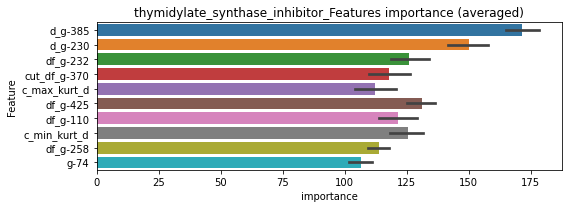

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 thymidylate_synthase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[840]	training's binary_logloss: 0.000447765	valid_1's binary_logloss: 0.0056682


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 thymidylate_synthase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[921]	training's binary_logloss: 0.00044485	valid_1's binary_logloss: 0.00298115


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 thymidylate_synthase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[887]	training's binary_logloss: 0.000453413	valid_1's binary_logloss: 0.00116567


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 thymidylate_synthase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[917]	training's binary_logloss: 0.000435942	valid_1's binary_logloss: 0.0041708


thymidylate_synthase_inhibitor logloss: 0.003497239975708776
tlr_agonist, len(trt): 30, len(othr): 3287
target_rate: 0.0012598 → Adj_target_rate: 0.0015127


selected negative label: 3287


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[619]	training's binary_logloss: 0.000376904	valid_1's binary_logloss: 0.0056575
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[601]	training's binary_logloss: 0.000376268	valid_1's binary_logloss: 0.00844536
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[609]	training's binary_logloss: 0.000381339	valid_1's binary_logloss: 0.00159787
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[629]	training's binary_logloss: 0.000368905	valid_1's binary_logloss: 0.00251583


y_Threshold: 0.0024142, Threshold: 0.0107792, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00126
Num_p_label: 40.0, Expected: 5.0, Threshold: 0.0107792, conf_0:0.00755, conf_1:0.01401
Num_p_label: 16.0, Expected: 5.0, Adj_threshold_1: 0.0407792
Num_p_label: 11.0, Expected: 5.0, Adj_threshold_2: 0.0707792
threshold: 0.0707792, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[555]	training's binary_logloss: 0.000381906	valid_1's binary_logloss: 0.00505349
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[625]	training's binary_logloss: 0.000357577	valid_1's binary_logloss: 0.0103979
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[565]	training's binary_logloss: 0.000378653	valid_1's binary_logloss: 0.00132551
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0153599, Threshold: 0.0707792, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[598]	training's binary_logloss: 0.000364888	valid_1's binary_logloss: 0.00156913


Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3810
p_label_rate: 0.0060271 Vs.target_rate: 0.00126
Num_p_label: 24.0, Expected: 5.0, Threshold: 0.0707792, conf_0:0.05662, conf_1:0.08494
Num_p_label: 19.0, Expected: 5.0, Adj_threshold_1: 0.1007792
Num_p_label: 19.0, Expected: 5.0, Adj_threshold_2: 0.1307792
Num_p_label: 17.0, Expected: 5.0, Adj_threshold_3: 0.1607792
Num_p_label: 16.0, Expected: 5.0, Adj_threshold_4: 0.1907792
Num_p_label: 12.0, Expected: 5.0, Adj_threshold_5: 0.2207792
threshold: 0.2207792, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 656.0/3810, y_label_rate: 0.1721785
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[449]	training's binary_logloss: 0.000523425	valid_1's binary_logloss: 0.0065759
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[634]	training's binary_logloss: 0.000358374	valid_1's binary_logloss: 0.00134205
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[607]	training's binary_logloss: 0.000363105	valid_1's binary_logloss: 0.00147327
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0269860, Threshold: 0.2207792, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[601]	training's binary_logloss: 0.000351679	valid_1's binary_logloss: 0.00949734


Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3810
p_label_rate: 0.0030136 Vs.target_rate: 0.00126
Num_p_label: 12.0, Expected: 5.0, Threshold: 0.2207792, conf_0:0.19870, conf_1:0.24286
threshold: 0.2207792, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 656.0/3810, y_label_rate: 0.1721785


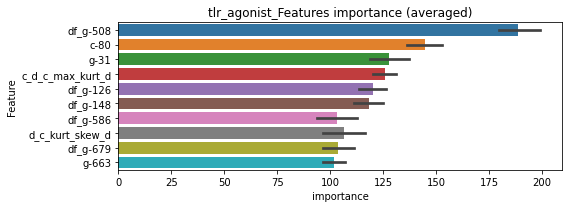

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 tlr_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[770]	training's binary_logloss: 0.000380848	valid_1's binary_logloss: 0.00612659


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 tlr_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[922]	training's binary_logloss: 0.000365908	valid_1's binary_logloss: 0.00107093


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 tlr_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[891]	training's binary_logloss: 0.000366576	valid_1's binary_logloss: 0.00125573


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 tlr_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[762]	training's binary_logloss: 0.000378889	valid_1's binary_logloss: 0.00780239


tlr_agonist logloss: 0.004063672985216968
tlr_antagonist, len(trt): 7, len(othr): 3288
target_rate: 0.0002939 → Adj_target_rate: 0.0004391


selected negative label: 3288


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[470]	training's binary_logloss: 0.000191871	valid_1's binary_logloss: 0.000269056
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[506]	training's binary_logloss: 0.000191904	valid_1's binary_logloss: 0.00123755
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[494]	training's binary_logloss: 0.000192669	valid_1's binary_logloss: 0.000248007
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0005696, Threshold: 0.0011637, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00029
Num_p_label: 40.0, Expected: 1.2, Threshold: 0.0011637, conf_0:0.00081, conf_1:0.00151
Num_p_label: 0.0, Expected: 1.2, Adj_threshold_1: 0.0311637
threshold: 0.0311637, positive_p_label: 0.0/3982, p_label_rate: 0.0000000


Early stopping, best iteration is:
[488]	training's binary_logloss: 0.00019122	valid_1's binary_logloss: 0.000235205


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[488]	training's binary_logloss: 0.00018953	valid_1's binary_logloss: 0.000358565
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[517]	training's binary_logloss: 0.000187624	valid_1's binary_logloss: 0.000771573
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[489]	training's binary_logloss: 0.000190013	valid_1's binary_logloss: 0.000223508
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1164823, Threshold: 0.0311637, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0002511 Vs.target_rate: 0.00029
Num_p_label: 1.0, Expected: 1.2, Threshold: 0.0311637, conf_0:0.02493, conf_1:0.03740
threshold: 0.0311637, positive_p_label: 1.0/3982, p_label_rate: 0.0002511


Early stopping, best iteration is:
[485]	training's binary_logloss: 0.000190377	valid_1's binary_logloss: 0.000227763


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[488]	training's binary_logloss: 0.00018953	valid_1's binary_logloss: 0.000358565
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[517]	training's binary_logloss: 0.000187624	valid_1's binary_logloss: 0.000771573
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[489]	training's binary_logloss: 0.000190013	valid_1's binary_logloss: 0.000223508
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1164823, Threshold: 0.0311637, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0002511 Vs.target_rate: 0.00029
Num_p_label: 1.0, Expected: 1.2, Threshold: 0.0311637, conf_0:0.02805, conf_1:0.03428
threshold: 0.0311637, positive_p_label: 1.0/3982, p_label_rate: 0.0002511


Early stopping, best iteration is:
[483]	training's binary_logloss: 0.000190377	valid_1's binary_logloss: 0.000227763


positive_y_label: 657.0/3813, y_label_rate: 0.1723053


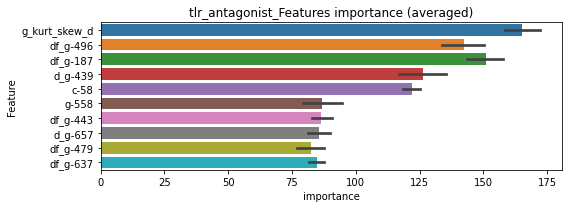

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 tlr_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000186711	valid_1's binary_logloss: 0.000253052
Early stopping, best iteration is:
[994]	training's binary_logloss: 0.000186711	valid_1's binary_logloss: 0.000253052


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 tlr_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000185378	valid_1's binary_logloss: 0.000384611
Early stopping, best iteration is:
[1002]	training's binary_logloss: 0.000185349	valid_1's binary_logloss: 0.000384572


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 tlr_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00018545	valid_1's binary_logloss: 0.00023782
Early stopping, best iteration is:
[1000]	training's binary_logloss: 0.00018545	valid_1's binary_logloss: 0.00023782


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 tlr_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000185689	valid_1's binary_logloss: 0.000228697
Early stopping, best iteration is:
[1050]	training's binary_logloss: 0.000185355	valid_1's binary_logloss: 0.000228317


tlr_antagonist logloss: 0.0002759342211805464
tnf_inhibitor, len(trt): 36, len(othr): 3286
target_rate: 0.0015117 → Adj_target_rate: 0.0017663


selected negative label: 3286


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[621]	training's binary_logloss: 0.000457369	valid_1's binary_logloss: 0.00953044
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[592]	training's binary_logloss: 0.000465319	valid_1's binary_logloss: 0.00976903
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[637]	training's binary_logloss: 0.000450843	valid_1's binary_logloss: 0.0046132
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[540]	training's binary_logloss: 0.000526744	valid_1's binary_logloss: 0.0110789


y_Threshold: 0.0037255, Threshold: 0.0217859, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00151
Num_p_label: 40.0, Expected: 6.0, Threshold: 0.0217859, conf_0:0.01525, conf_1:0.02832
Num_p_label: 13.0, Expected: 6.0, Adj_threshold_1: 0.0517859
threshold: 0.0517859, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[603]	training's binary_logloss: 0.000449193	valid_1's binary_logloss: 0.00872189
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000453585	valid_1's binary_logloss: 0.00969334
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[655]	training's binary_logloss: 0.000430925	valid_1's binary_logloss: 0.00336949
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0384642, Threshold: 0.0517859, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[526]	training's binary_logloss: 0.00052636	valid_1's binary_logloss: 0.00888557


Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0105475 Vs.target_rate: 0.00151
Num_p_label: 42.0, Expected: 6.0, Threshold: 0.0517859, conf_0:0.04143, conf_1:0.06214
Num_p_label: 24.0, Expected: 6.0, Adj_threshold_1: 0.0817859
Num_p_label: 19.0, Expected: 6.0, Adj_threshold_2: 0.1117859
Num_p_label: 11.0, Expected: 6.0, Adj_threshold_3: 0.1417859
threshold: 0.1417859, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[603]	training's binary_logloss: 0.000449193	valid_1's binary_logloss: 0.00872189
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000453585	valid_1's binary_logloss: 0.00969334
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[655]	training's binary_logloss: 0.000430925	valid_1's binary_logloss: 0.00336949
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0384642, Threshold: 0.1417859, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811


Early stopping, best iteration is:
[526]	training's binary_logloss: 0.00052636	valid_1's binary_logloss: 0.00888557


p_label_rate: 0.0027624 Vs.target_rate: 0.00151
Num_p_label: 11.0, Expected: 6.0, Threshold: 0.1417859, conf_0:0.12761, conf_1:0.15596
threshold: 0.1417859, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


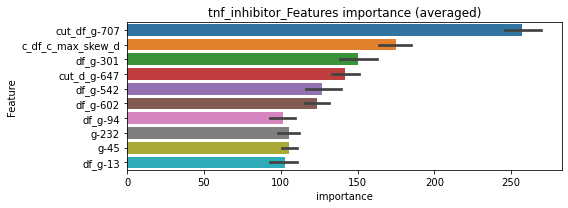

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 tnf_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[819]	training's binary_logloss: 0.000448797	valid_1's binary_logloss: 0.00722257


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 tnf_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 tnf_inhibitor=================================


Early stopping, best iteration is:
[662]	training's binary_logloss: 0.000502923	valid_1's binary_logloss: 0.00736276
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[793]	training's binary_logloss: 0.00045907	valid_1's binary_logloss: 0.00301475


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 tnf_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[734]	training's binary_logloss: 0.000473951	valid_1's binary_logloss: 0.00796426


tnf_inhibitor logloss: 0.006390672693477185
topoisomerase_inhibitor, len(trt): 127, len(othr): 3276
target_rate: 0.0053330 → Adj_target_rate: 0.0051574


selected negative label: 3276


unpredictable_cols:topoisomerase_inhibitor → create_features


N_features:358
================= Pseudo labeling 1 / 3 =================



Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0393933	valid_1's binary_logloss: 0.1371
[2000]	training's binary_logloss: 0.0191928	valid_1's binary_logloss: 0.120178
[3000]	training's binary_logloss: 0.0125606	valid_1's binary_logloss: 0.11505
Early stopping, best iteration is:
[3168]	training's binary_logloss: 0.0118844	valid_1's binary_logloss: 0.114466
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0400731	valid_1's binary_logloss: 0.114868
[2000]	training's binary_logloss: 0.0195251	valid_1's binary_logloss: 0.0955455
Early stopping, best iteration is:
[2882]	training's binary_logloss: 0.0132973	valid_1's binary_logloss: 0.0893346
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0417766	valid_1's binary_logloss: 0.0882821
[2000]	training's binary_logloss: 0.0203378	valid_1's binary_logloss: 0.0651473
[3000]	training's binary_logloss: 

1 / 3, AUC score:0.991, PR-AUC:0.977
y_Threshold: 0.0583237, Threshold: 0.2424616, pos_neg_ratio: 0.8000000
Remove_noisy_data: 182 → Positive_corect_labels: 630/3749
p_label_rate: 0.0100452 Vs.target_rate: 0.00533
Num_p_label: 40.0, Expected: 21.2, Threshold: 0.2424616, conf_0:0.16972, conf_1:0.31520
Num_p_label: 33.0, Expected: 21.2, Adj_threshold_1: 0.2724616
Num_p_label: 26.0, Expected: 21.2, Adj_threshold_2: 0.3024616
threshold: 0.3024616, positive_p_label: 26.0/3982, p_label_rate: 0.0065294
positive_y_label: 630.0/3749, y_label_rate: 0.1680448
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0349648	valid_1's binary_logloss: 0.107615
[2000]	training's binary_logloss: 0.0170295	valid_1's binary_logloss: 0.0882478
[3000]	training's binary_logloss: 0.0111858	valid_1's binary_logloss: 0.0819037
[4000]	training's binary_logloss: 0.00834878	valid_1's binary_logloss: 0.078508
Early stopping, best iteration is:
[4828]	training's binary_logloss: 0.00690327	valid_1's binary_logloss: 0.0765611
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0350955	valid_1's binary_logloss: 0.106932
[2000]	training's binary_logloss: 0.0171561	valid_1's binary_logloss: 0.0891912
[3000]	training's binary_logloss: 0.0112571	valid_1's binary_logloss: 0.0827594
Early stopping, best iteration is:
[3595]	training's binary_logloss: 0.00935257	valid_1's binary_logloss: 0.0808491
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_lo

2 / 3, AUC score:0.998, PR-AUC:0.993
y_Threshold: 0.0974708, Threshold: 0.3024616, pos_neg_ratio: 0.8000000
Remove_noisy_data: 46 → Positive_corect_labels: 607.0/3703
p_label_rate: 0.0195881 Vs.target_rate: 0.00533
Num_p_label: 78.0, Expected: 21.2, Threshold: 0.3024616, conf_0:0.24197, conf_1:0.36295
Num_p_label: 63.0, Expected: 21.2, Adj_threshold_1: 0.3324616
Num_p_label: 55.0, Expected: 21.2, Adj_threshold_2: 0.3624616
Num_p_label: 50.0, Expected: 21.2, Adj_threshold_3: 0.3924616
Num_p_label: 43.0, Expected: 21.2, Adj_threshold_4: 0.4224616
Num_p_label: 40.0, Expected: 21.2, Adj_threshold_5: 0.4524616
Num_p_label: 37.0, Expected: 21.2, Adj_threshold_6: 0.4824616
Num_p_label: 32.0, Expected: 21.2, Adj_threshold_7: 0.5124616
Num_p_label: 28.0, Expected: 21.2, Adj_threshold_8: 0.5424616
threshold: 0.5424616, positive_p_label: 28.0/3982, p_label_rate: 0.0070316
positive_y_label: 607.0/3703, y_label_rate: 0.1639211
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0317588	valid_1's binary_logloss: 0.0987374
[2000]	training's binary_logloss: 0.01552	valid_1's binary_logloss: 0.0816407
[3000]	training's binary_logloss: 0.010198	valid_1's binary_logloss: 0.0753758
[4000]	training's binary_logloss: 0.00763125	valid_1's binary_logloss: 0.0719477
Early stopping, best iteration is:
[4338]	training's binary_logloss: 0.00703511	valid_1's binary_logloss: 0.0711476
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0320995	valid_1's binary_logloss: 0.101453
[2000]	training's binary_logloss: 0.0156949	valid_1's binary_logloss: 0.0831139
[3000]	training's binary_logloss: 0.0103401	valid_1's binary_logloss: 0.0766165
Early stopping, best iteration is:
[3423]	training's binary_logloss: 0.00904416	valid_1's binary_logloss: 0.0748062
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_log

3 / 3, AUC score:0.999, PR-AUC:0.996
y_Threshold: 0.0918787, Threshold: 0.5424616, pos_neg_ratio: 0.8000000
Remove_noisy_data: 28 → Positive_corect_labels: 593.0/3675
p_label_rate: 0.0110497 Vs.target_rate: 0.00533
Num_p_label: 44.0, Expected: 21.2, Threshold: 0.5424616, conf_0:0.48822, conf_1:0.59671
Num_p_label: 42.0, Expected: 21.2, Adj_threshold_1: 0.5724616
Num_p_label: 34.0, Expected: 21.2, Adj_threshold_2: 0.6024616
Num_p_label: 30.0, Expected: 21.2, Adj_threshold_3: 0.6324616
threshold: 0.6324616, positive_p_label: 30.0/3982, p_label_rate: 0.0075339
positive_y_label: 593.0/3675, y_label_rate: 0.1613605


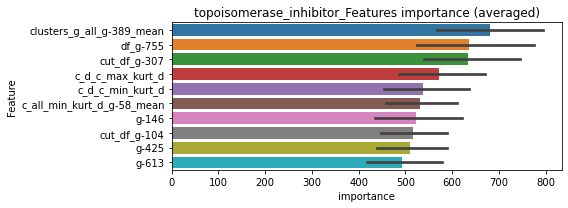

len(train_index) : 2756
len(valid_index) : 919
================================= fold 1/4 topoisomerase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.030852	valid_1's binary_logloss: 0.0868553
[2000]	training's binary_logloss: 0.0150092	valid_1's binary_logloss: 0.0669518
[3000]	training's binary_logloss: 0.00992994	valid_1's binary_logloss: 0.0597441
Early stopping, best iteration is:
[3946]	training's binary_logloss: 0.00753532	valid_1's binary_logloss: 0.0560003


len(train_index) : 2756
len(valid_index) : 919
================================= fold 2/4 topoisomerase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.031159	valid_1's binary_logloss: 0.0798982
[2000]	training's binary_logloss: 0.0151871	valid_1's binary_logloss: 0.0618497
[3000]	training's binary_logloss: 0.0100261	valid_1's binary_logloss: 0.0555438
[4000]	training's binary_logloss: 0.00750875	valid_1's binary_logloss: 0.0524917
[5000]	training's binary_logloss: 0.00601675	valid_1's binary_logloss: 0.0505868
Early stopping, best iteration is:
[5401]	training's binary_logloss: 0.0055742	valid_1's binary_logloss: 0.0499312


len(train_index) : 2756
len(valid_index) : 919
================================= fold 3/4 topoisomerase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0315118	valid_1's binary_logloss: 0.0755126
[2000]	training's binary_logloss: 0.0153722	valid_1's binary_logloss: 0.0570588
[3000]	training's binary_logloss: 0.010128	valid_1's binary_logloss: 0.0503365
[4000]	training's binary_logloss: 0.00757857	valid_1's binary_logloss: 0.0469944
[5000]	training's binary_logloss: 0.00607939	valid_1's binary_logloss: 0.0448372
[6000]	training's binary_logloss: 0.00508306	valid_1's binary_logloss: 0.0430938
Early stopping, best iteration is:
[6315]	training's binary_logloss: 0.00483156	valid_1's binary_logloss: 0.0426925


len(train_index) : 2757
len(valid_index) : 918
================================= fold 4/4 topoisomerase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0305178	valid_1's binary_logloss: 0.0893831
[2000]	training's binary_logloss: 0.0148485	valid_1's binary_logloss: 0.0705317
[3000]	training's binary_logloss: 0.00980016	valid_1's binary_logloss: 0.0632039
[4000]	training's binary_logloss: 0.00734279	valid_1's binary_logloss: 0.0596031
[5000]	training's binary_logloss: 0.00589253	valid_1's binary_logloss: 0.057188
Early stopping, best iteration is:
[5725]	training's binary_logloss: 0.00515679	valid_1's binary_logloss: 0.0558701


topoisomerase_inhibitor logloss: 0.051122244713508444
topoisomerase_inhibitor is unpredictable(><)!
transient_receptor_potential_channel_antagonist, len(trt): 18, len(othr): 3285
target_rate: 0.0007559 → Adj_target_rate: 0.0009799


selected negative label: 3285


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[594]	training's binary_logloss: 0.000308796	valid_1's binary_logloss: 0.000684605
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[538]	training's binary_logloss: 0.000314137	valid_1's binary_logloss: 0.00247633
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[581]	training's binary_logloss: 0.000307959	valid_1's binary_logloss: 0.00249046
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0016235, Threshold: 0.0137626, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, Expected: 3.0, Threshold: 0.0137626, conf_0:0.00963, conf_1:0.01789
Num_p_label: 12.0, Expected: 3.0, Adj_threshold_1: 0.0437626
Num_p_label: 6.0, Expected: 3.0, Adj_threshold_2: 0.0737626


Early stopping, best iteration is:
[547]	training's binary_logloss: 0.000319663	valid_1's binary_logloss: 0.00127661


threshold: 0.0737626, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[537]	training's binary_logloss: 0.000301735	valid_1's binary_logloss: 0.000648189
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[552]	training's binary_logloss: 0.000299578	valid_1's binary_logloss: 0.00209294
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[584]	training's binary_logloss: 0.0002968	valid_1's binary_logloss: 0.00245623
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1658072, Threshold: 0.0737626, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0148167 Vs.target_rate: 0.00076
Num_p_label: 59.0, Expected: 3.0, Threshold: 0.0737626, conf_0:0.05901, conf_1:0.08852
Num_p_label: 49.0, Expected: 3.0, Adj_threshold_1: 0.1037626
Num_p_label: 44.0, Expected: 3.0, Adj_threshold_2: 0.1337626
Num_p_label: 41.0, Expected: 3.0, Adj_threshold_3: 0.1637626


Early stopping, best iteration is:
[550]	training's binary_logloss: 0.00030167	valid_1's binary_logloss: 0.00152757


Num_p_label: 37.0, Expected: 3.0, Adj_threshold_4: 0.1937626
Num_p_label: 34.0, Expected: 3.0, Adj_threshold_5: 0.2237626
Num_p_label: 28.0, Expected: 3.0, Adj_threshold_6: 0.2537626
Num_p_label: 26.0, Expected: 3.0, Adj_threshold_7: 0.2837626
Num_p_label: 25.0, Expected: 3.0, Adj_threshold_8: 0.3137626
Num_p_label: 22.0, Expected: 3.0, Adj_threshold_9: 0.3437626
Num_p_label: 21.0, Expected: 3.0, Adj_threshold_10: 0.3737626
threshold: 0.3737626, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[549]	training's binary_logloss: 0.000301735	valid_1's binary_logloss: 0.000648189
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[552]	training's binary_logloss: 0.000299578	valid_1's binary_logloss: 0.00209294
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[584]	training's binary_logloss: 0.0002968	valid_1's binary_logloss: 0.00245623
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1658072, Threshold: 0.3737626, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0052737 Vs.target_rate: 0.00076
Num_p_label: 21.0, Expected: 3.0, Threshold: 0.3737626, conf_0:0.33639, conf_1:0.41114
Num_p_label: 19.0, Expected: 3.0, Adj_threshold_1: 0.4037626
Num_p_label: 15.0, Expected: 3.0, Adj_threshold_2: 0.4337626
Num_p_label: 15.0, Expected: 3.0, Adj_threshold_3: 0.4637626
Num_p_label: 15.0, Expected: 3.0, Adj_threshold_4: 0.4937626


Early stopping, best iteration is:
[550]	training's binary_logloss: 0.00030167	valid_1's binary_logloss: 0.00152757


Num_p_label: 11.0, Expected: 3.0, Adj_threshold_5: 0.5237626
Num_p_label: 10.0, Expected: 3.0, Adj_threshold_6: 0.5537626
Num_p_label: 9.0, Expected: 3.0, Adj_threshold_7: 0.5837626
Num_p_label: 9.0, Expected: 3.0, Adj_threshold_8: 0.6137626
Num_p_label: 8.0, Expected: 3.0, Adj_threshold_9: 0.6437626
Num_p_label: 7.0, Expected: 3.0, Adj_threshold_10: 0.6737626
threshold: 0.6737626, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


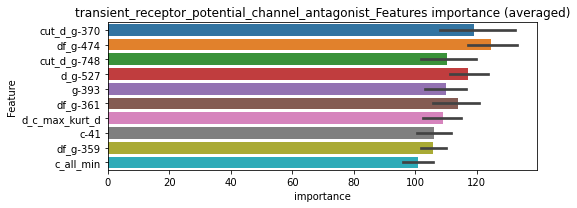

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 transient_receptor_potential_channel_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[871]	training's binary_logloss: 0.000303056	valid_1's binary_logloss: 0.000644849


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 transient_receptor_potential_channel_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[845]	training's binary_logloss: 0.000301397	valid_1's binary_logloss: 0.00149904


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 transient_receptor_potential_channel_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[835]	training's binary_logloss: 0.000303664	valid_1's binary_logloss: 0.00152908


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 transient_receptor_potential_channel_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[917]	training's binary_logloss: 0.000298647	valid_1's binary_logloss: 0.00101258


transient_receptor_potential_channel_antagonist logloss: 0.0011716963037974113
tropomyosin_receptor_kinase_inhibitor, len(trt): 6, len(othr): 3289
target_rate: 0.0002520 → Adj_target_rate: 0.0003851


selected negative label: 3289


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[473]	training's binary_logloss: 0.000160418	valid_1's binary_logloss: 0.000438868
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[470]	training's binary_logloss: 0.000157384	valid_1's binary_logloss: 0.000484556
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[464]	training's binary_logloss: 0.000158404	valid_1's binary_logloss: 0.000183156
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[475]	training's binary_logloss: 0.000159131	valid_1's binary_logloss: 0.000206254


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0004535, Threshold: 0.0012575, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00025
Num_p_label: 40.0, Expected: 1.0, Threshold: 0.0012575, conf_0:0.00088, conf_1:0.00163
Num_p_label: 1.0, Expected: 1.0, Adj_threshold_1: 0.0312575
threshold: 0.0312575, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[481]	training's binary_logloss: 0.000153633	valid_1's binary_logloss: 0.000348121
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[507]	training's binary_logloss: 0.000146912	valid_1's binary_logloss: 0.000468395
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[510]	training's binary_logloss: 0.000150764	valid_1's binary_logloss: 0.000167963
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1411787, Threshold: 0.0312575, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0007534 Vs.target_rate: 0.00025
Num_p_label: 3.0, Expected: 1.0, Threshold: 0.0312575, conf_0:0.02501, conf_1:0.03751
Num_p_label: 1.0, Expected: 1.0, Adj_threshold_1: 0.0612575
threshold: 0.0612575, positive_p_label: 1.0/3982, p_label_rate: 0.0002511


Early stopping, best iteration is:
[522]	training's binary_logloss: 0.000148317	valid_1's binary_logloss: 0.000164247


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[481]	training's binary_logloss: 0.000153633	valid_1's binary_logloss: 0.000348121
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[507]	training's binary_logloss: 0.000146912	valid_1's binary_logloss: 0.000468395
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[504]	training's binary_logloss: 0.000150764	valid_1's binary_logloss: 0.000167963
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1411787, Threshold: 0.0612575, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0002511 Vs.target_rate: 0.00025
Num_p_label: 1.0, Expected: 1.0, Threshold: 0.0612575, conf_0:0.05513, conf_1:0.06738
threshold: 0.0612575, positive_p_label: 1.0/3982, p_label_rate: 0.0002511


Early stopping, best iteration is:
[522]	training's binary_logloss: 0.000148317	valid_1's binary_logloss: 0.000164247


positive_y_label: 657.0/3813, y_label_rate: 0.1723053


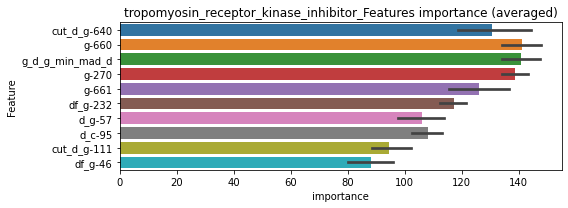

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 tropomyosin_receptor_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 tropomyosin_receptor_kinase_inhibitor=================================


Early stopping, best iteration is:
[894]	training's binary_logloss: 0.000152546	valid_1's binary_logloss: 0.000443059
Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 tropomyosin_receptor_kinase_inhibitor=================================


[1000]	training's binary_logloss: 0.000148401	valid_1's binary_logloss: 0.000460967
Early stopping, best iteration is:
[989]	training's binary_logloss: 0.000148443	valid_1's binary_logloss: 0.000460947
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000149822	valid_1's binary_logloss: 0.000173501
Early stopping, best iteration is:
[975]	training's binary_logloss: 0.000149822	valid_1's binary_logloss: 0.000173501


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 tropomyosin_receptor_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


tropomyosin_receptor_kinase_inhibitor logloss: 0.00031265554048185643


Early stopping, best iteration is:
[919]	training's binary_logloss: 0.000151268	valid_1's binary_logloss: 0.000172959


trpv_agonist, len(trt): 25, len(othr): 3285
target_rate: 0.0010498 → Adj_target_rate: 0.0012955


selected negative label: 3285


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[598]	training's binary_logloss: 0.000367257	valid_1's binary_logloss: 0.00118539
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[555]	training's binary_logloss: 0.000377045	valid_1's binary_logloss: 0.00234849
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[608]	training's binary_logloss: 0.000367862	valid_1's binary_logloss: 0.00162139
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0020348, Threshold: 0.0080751, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[628]	training's binary_logloss: 0.000365434	valid_1's binary_logloss: 0.000936672


Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00105
Num_p_label: 40.0, Expected: 4.2, Threshold: 0.0080751, conf_0:0.00565, conf_1:0.01050
Num_p_label: 11.0, Expected: 4.2, Adj_threshold_1: 0.0380751
Num_p_label: 8.0, Expected: 4.2, Adj_threshold_2: 0.0680751
threshold: 0.0680751, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.000358538	valid_1's binary_logloss: 0.000990893
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[650]	training's binary_logloss: 0.000350332	valid_1's binary_logloss: 0.00216144
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[619]	training's binary_logloss: 0.00035292	valid_1's binary_logloss: 0.00140464
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[653]	training's binary_logloss: 0.000354013	valid_1's binary_logloss: 0.000843971


y_Threshold: 0.0975719, Threshold: 0.0680751, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0027624 Vs.target_rate: 0.00105
Num_p_label: 11.0, Expected: 4.2, Threshold: 0.0680751, conf_0:0.05446, conf_1:0.08169
Num_p_label: 10.0, Expected: 4.2, Adj_threshold_1: 0.0980751
threshold: 0.0980751, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[603]	training's binary_logloss: 0.000358538	valid_1's binary_logloss: 0.000990893
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[650]	training's binary_logloss: 0.000350332	valid_1's binary_logloss: 0.00216144
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[619]	training's binary_logloss: 0.00035292	valid_1's binary_logloss: 0.00140464
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[653]	training's binary_logloss: 0.000354013	valid_1's binary_logloss: 0.000843971


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0975719, Threshold: 0.0980751, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0025113 Vs.target_rate: 0.00105
Num_p_label: 10.0, Expected: 4.2, Threshold: 0.0980751, conf_0:0.08827, conf_1:0.10788
threshold: 0.0980751, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


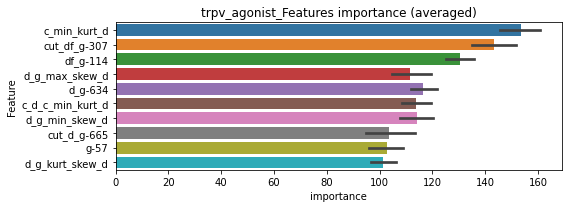

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 trpv_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[899]	training's binary_logloss: 0.000360923	valid_1's binary_logloss: 0.00100904


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 trpv_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[874]	training's binary_logloss: 0.000359456	valid_1's binary_logloss: 0.00227194


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 trpv_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[894]	training's binary_logloss: 0.000361022	valid_1's binary_logloss: 0.00100428


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 trpv_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[894]	training's binary_logloss: 0.000365719	valid_1's binary_logloss: 0.000892296


trpv_agonist logloss: 0.0012945750095969004
trpv_antagonist, len(trt): 48, len(othr): 3284
target_rate: 0.0020156 → Adj_target_rate: 0.0022556


selected negative label: 3284


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[559]	training's binary_logloss: 0.000597858	valid_1's binary_logloss: 0.0238614
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[648]	training's binary_logloss: 0.000511934	valid_1's binary_logloss: 0.00854944
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[726]	training's binary_logloss: 0.000482777	valid_1's binary_logloss: 0.00238662
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:0.999, PR-AUC:0.998


Early stopping, best iteration is:
[487]	training's binary_logloss: 0.000783444	valid_1's binary_logloss: 0.0212047


y_Threshold: 0.0034107, Threshold: 0.0154016, pos_neg_ratio: 0.8000000
Remove_noisy_data: 136 → Positive_corect_labels: 654/3804
p_label_rate: 0.0100452 Vs.target_rate: 0.00202
Num_p_label: 40.0, Expected: 8.0, Threshold: 0.0154016, conf_0:0.01078, conf_1:0.02002
Num_p_label: 11.0, Expected: 8.0, Adj_threshold_1: 0.0454016
threshold: 0.0454016, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 654.0/3804, y_label_rate: 0.1719243
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[688]	training's binary_logloss: 0.000455284	valid_1's binary_logloss: 0.0102069
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[630]	training's binary_logloss: 0.000504177	valid_1's binary_logloss: 0.00993702
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[666]	training's binary_logloss: 0.000477279	valid_1's binary_logloss: 0.00958351
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[660]	training's binary_logloss: 0.000475626	valid_1's binary_logloss: 0.0125022


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0198109, Threshold: 0.0454016, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 652.0/3800
p_label_rate: 0.0065294 Vs.target_rate: 0.00202
Num_p_label: 26.0, Expected: 8.0, Threshold: 0.0454016, conf_0:0.03632, conf_1:0.05448
Num_p_label: 16.0, Expected: 8.0, Adj_threshold_1: 0.0754016
threshold: 0.0754016, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 652.0/3800, y_label_rate: 0.1715789
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[677]	training's binary_logloss: 0.000462344	valid_1's binary_logloss: 0.0106109
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[602]	training's binary_logloss: 0.000504289	valid_1's binary_logloss: 0.0143342
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[619]	training's binary_logloss: 0.000510485	valid_1's binary_logloss: 0.00730454
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[664]	training's binary_logloss: 0.000473502	valid_1's binary_logloss: 0.00410996


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0215341, Threshold: 0.0754016, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 652.0/3800
p_label_rate: 0.0040181 Vs.target_rate: 0.00202
Num_p_label: 16.0, Expected: 8.0, Threshold: 0.0754016, conf_0:0.06786, conf_1:0.08294
threshold: 0.0754016, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 652.0/3800, y_label_rate: 0.1715789


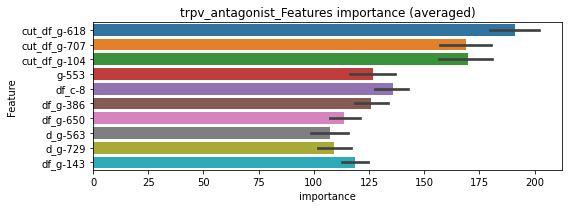

len(train_index) : 2850
len(valid_index) : 950
================================= fold 1/4 trpv_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[711]	training's binary_logloss: 0.000548762	valid_1's binary_logloss: 0.00955427


len(train_index) : 2850
len(valid_index) : 950
================================= fold 2/4 trpv_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[730]	training's binary_logloss: 0.000533209	valid_1's binary_logloss: 0.0152768


len(train_index) : 2850
len(valid_index) : 950
================================= fold 3/4 trpv_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2850
len(valid_index) : 950


Early stopping, best iteration is:
[549]	training's binary_logloss: 0.000695757	valid_1's binary_logloss: 0.00709794


================================= fold 4/4 trpv_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[887]	training's binary_logloss: 0.000487002	valid_1's binary_logloss: 0.00470194


trpv_antagonist logloss: 0.009157740529713717


mutually exclusive columns: tubulin_inhibitor


tubulin_inhibitor, len(trt): 316, len(othr): 7122
target_rate: 0.0132695 → Adj_target_rate: 0.0111926


selected negative label: 7122


unpredictable_cols:tubulin_inhibitor → create_features


N_features:358
================= Pseudo labeling 1 / 3 =================



Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0462305	valid_1's binary_logloss: 0.140227
Early stopping, best iteration is:
[1913]	training's binary_logloss: 0.0229223	valid_1's binary_logloss: 0.124948
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0472617	valid_1's binary_logloss: 0.126741
[2000]	training's binary_logloss: 0.0223997	valid_1's binary_logloss: 0.108302
Early stopping, best iteration is:
[2504]	training's binary_logloss: 0.0175349	valid_1's binary_logloss: 0.104501
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0460487	valid_1's binary_logloss: 0.142027
[2000]	training's binary_logloss: 0.0218008	valid_1's binary_logloss: 0.126335
Early stopping, best iteration is:
[2652]	training's binary_logloss: 0.0160373	valid_1's binary_logloss: 0.122411
Training until validation scores don't improve for 30 rounds
[1000]	training's 

1 / 3, AUC score:0.972, PR-AUC:0.950
y_Threshold: 0.0664487, Threshold: 0.1249142, pos_neg_ratio: 0.8000000
Remove_noisy_data: 506 → Positive_corect_labels: 1314/8040
p_label_rate: 0.0100452 Vs.target_rate: 0.01327
Num_p_label: 40.0, Expected: 52.8, Threshold: 0.1249142, conf_0:0.08744, conf_1:0.16239
threshold: 0.1249142, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1314.0/8040, y_label_rate: 0.1634328
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0357972	valid_1's binary_logloss: 0.100075
[2000]	training's binary_logloss: 0.0170057	valid_1's binary_logloss: 0.0825039
[3000]	training's binary_logloss: 0.0110177	valid_1's binary_logloss: 0.0759703
Early stopping, best iteration is:
[3050]	training's binary_logloss: 0.0108259	valid_1's binary_logloss: 0.0755936
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0362805	valid_1's binary_logloss: 0.0961539
[2000]	training's binary_logloss: 0.0172525	valid_1's binary_logloss: 0.0781324
[3000]	training's binary_logloss: 0.0111626	valid_1's binary_logloss: 0.0719873
Early stopping, best iteration is:
[3778]	training's binary_logloss: 0.00873763	valid_1's binary_logloss: 0.0693467
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0357832	valid_1's binary_logloss: 0.103609
[2000]	training's binary_log

2 / 3, AUC score:0.996, PR-AUC:0.988
y_Threshold: 0.0843327, Threshold: 0.1249142, pos_neg_ratio: 0.8000000
Remove_noisy_data: 110 → Positive_corect_labels: 1259.0/7930
p_label_rate: 0.0148167 Vs.target_rate: 0.01327
Num_p_label: 59.0, Expected: 52.8, Threshold: 0.1249142, conf_0:0.09993, conf_1:0.14990
threshold: 0.1249142, positive_p_label: 59.0/3982, p_label_rate: 0.0148167
positive_y_label: 1259.0/7930, y_label_rate: 0.1587642
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.031727	valid_1's binary_logloss: 0.0920037
[2000]	training's binary_logloss: 0.0150642	valid_1's binary_logloss: 0.0755404
[3000]	training's binary_logloss: 0.00980018	valid_1's binary_logloss: 0.0697474
Early stopping, best iteration is:
[3345]	training's binary_logloss: 0.0087369	valid_1's binary_logloss: 0.0684558
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0316144	valid_1's binary_logloss: 0.0944744
[2000]	training's binary_logloss: 0.015071	valid_1's binary_logloss: 0.078648
Early stopping, best iteration is:
[2651]	training's binary_logloss: 0.01118	valid_1's binary_logloss: 0.0743166
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0322488	valid_1's binary_logloss: 0.0873706
[2000]	training's binary_logloss: 0.0153452	valid_1's binary_logloss: 0.0706886
Early stopping, best iteration 

3 / 3, AUC score:0.998, PR-AUC:0.995
y_Threshold: 0.0874959, Threshold: 0.1249142, pos_neg_ratio: 0.8000000
Remove_noisy_data: 72 → Positive_corect_labels: 1223.0/7858
p_label_rate: 0.0148167 Vs.target_rate: 0.01327
Num_p_label: 59.0, Expected: 52.8, Threshold: 0.1249142, conf_0:0.11242, conf_1:0.13741
threshold: 0.1249142, positive_p_label: 59.0/3982, p_label_rate: 0.0148167
positive_y_label: 1223.0/7858, y_label_rate: 0.1556376


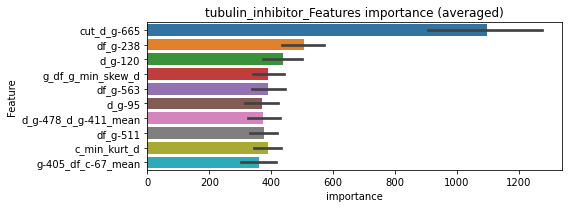

len(train_index) : 5893
len(valid_index) : 1965
================================= fold 1/4 tubulin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0299996	valid_1's binary_logloss: 0.0783944
[2000]	training's binary_logloss: 0.0142332	valid_1's binary_logloss: 0.0617351
Early stopping, best iteration is:
[2779]	training's binary_logloss: 0.0100173	valid_1's binary_logloss: 0.0566495


len(train_index) : 5893
len(valid_index) : 1965
================================= fold 2/4 tubulin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0299354	valid_1's binary_logloss: 0.0821548
[2000]	training's binary_logloss: 0.014259	valid_1's binary_logloss: 0.0659892
Early stopping, best iteration is:
[2944]	training's binary_logloss: 0.00944858	valid_1's binary_logloss: 0.0608073


len(train_index) : 5894
len(valid_index) : 1964
================================= fold 3/4 tubulin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0296133	valid_1's binary_logloss: 0.08373
[2000]	training's binary_logloss: 0.014109	valid_1's binary_logloss: 0.0665748
[3000]	training's binary_logloss: 0.00918247	valid_1's binary_logloss: 0.0603885
Early stopping, best iteration is:
[3916]	training's binary_logloss: 0.00696787	valid_1's binary_logloss: 0.0577066


len(train_index) : 5894
len(valid_index) : 1964
================================= fold 4/4 tubulin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0300707	valid_1's binary_logloss: 0.0758676
[2000]	training's binary_logloss: 0.0142815	valid_1's binary_logloss: 0.0581941
[3000]	training's binary_logloss: 0.00928775	valid_1's binary_logloss: 0.0520815
Early stopping, best iteration is:
[3333]	training's binary_logloss: 0.00833077	valid_1's binary_logloss: 0.0508178


tubulin_inhibitor logloss: 0.056495852144935604
tubulin_inhibitor is unpredictable(><)!
tyrosine_kinase_inhibitor, len(trt): 73, len(othr): 3281
target_rate: 0.0030654 → Adj_target_rate: 0.0032212


selected negative label: 3281


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[677]	training's binary_logloss: 0.000672685	valid_1's binary_logloss: 0.0388884
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[665]	training's binary_logloss: 0.000673165	valid_1's binary_logloss: 0.0319159
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[581]	training's binary_logloss: 0.000869111	valid_1's binary_logloss: 0.0220961
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[641]	training's binary_logloss: 0.000708557	valid_1's binary_logloss: 0.0343874


1 / 3, AUC score:0.999, PR-AUC:0.997
y_Threshold: 0.0051018, Threshold: 0.0576317, pos_neg_ratio: 0.8000000
Remove_noisy_data: 140 → Positive_corect_labels: 652/3797
p_label_rate: 0.0100452 Vs.target_rate: 0.00307
Num_p_label: 40.0, Expected: 12.2, Threshold: 0.0576317, conf_0:0.04034, conf_1:0.07492
Num_p_label: 31.0, Expected: 12.2, Adj_threshold_1: 0.0876317
Num_p_label: 22.0, Expected: 12.2, Adj_threshold_2: 0.1176317
Num_p_label: 20.0, Expected: 12.2, Adj_threshold_3: 0.1476317
Num_p_label: 15.0, Expected: 12.2, Adj_threshold_4: 0.1776317
threshold: 0.1776317, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 652.0/3797, y_label_rate: 0.1717145
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[687]	training's binary_logloss: 0.000637005	valid_1's binary_logloss: 0.0260362
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[541]	training's binary_logloss: 0.000878981	valid_1's binary_logloss: 0.0251689
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[759]	training's binary_logloss: 0.000588348	valid_1's binary_logloss: 0.0118416
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[711]	training's binary_logloss: 0.000602131	valid_1's binary_logloss: 0.024179


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0224155, Threshold: 0.1776317, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 650.0/3793
p_label_rate: 0.0097941 Vs.target_rate: 0.00307
Num_p_label: 39.0, Expected: 12.2, Threshold: 0.1776317, conf_0:0.14211, conf_1:0.21316
Num_p_label: 35.0, Expected: 12.2, Adj_threshold_1: 0.2076317
Num_p_label: 30.0, Expected: 12.2, Adj_threshold_2: 0.2376317
Num_p_label: 28.0, Expected: 12.2, Adj_threshold_3: 0.2676317
Num_p_label: 26.0, Expected: 12.2, Adj_threshold_4: 0.2976317
Num_p_label: 24.0, Expected: 12.2, Adj_threshold_5: 0.3276317
Num_p_label: 22.0, Expected: 12.2, Adj_threshold_6: 0.3576317
Num_p_label: 21.0, Expected: 12.2, Adj_threshold_7: 0.3876317
Num_p_label: 15.0, Expected: 12.2, Adj_threshold_8: 0.4176317
threshold: 0.4176317, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 650.0/3793, y_label_rate: 0.1713683
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[461]	training's binary_logloss: 0.0012033	valid_1's binary_logloss: 0.0272288
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[593]	training's binary_logloss: 0.000725441	valid_1's binary_logloss: 0.0329501
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[685]	training's binary_logloss: 0.000626116	valid_1's binary_logloss: 0.013729
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[718]	training's binary_logloss: 0.000603609	valid_1's binary_logloss: 0.0148802


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0254774, Threshold: 0.4176317, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 649.0/3791
p_label_rate: 0.0050226 Vs.target_rate: 0.00307
Num_p_label: 20.0, Expected: 12.2, Threshold: 0.4176317, conf_0:0.37587, conf_1:0.45939
Num_p_label: 19.0, Expected: 12.2, Adj_threshold_1: 0.4476317
Num_p_label: 18.0, Expected: 12.2, Adj_threshold_2: 0.4776317
threshold: 0.4776317, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 649.0/3791, y_label_rate: 0.1711949


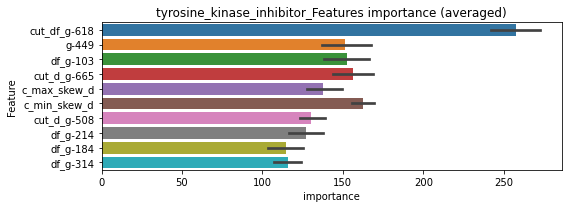

len(train_index) : 2843
len(valid_index) : 948
================================= fold 1/4 tyrosine_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2843
len(valid_index) : 948
================================= fold 2/4 tyrosine_kinase_inhibitor=================================


Early stopping, best iteration is:
[491]	training's binary_logloss: 0.00100173	valid_1's binary_logloss: 0.0259769
Training until validation scores don't improve for 30 rounds


len(train_index) : 2843
len(valid_index) : 948


Early stopping, best iteration is:
[547]	training's binary_logloss: 0.000901917	valid_1's binary_logloss: 0.0252772


================================= fold 3/4 tyrosine_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[662]	training's binary_logloss: 0.000748125	valid_1's binary_logloss: 0.017252


len(train_index) : 2844
len(valid_index) : 947
================================= fold 4/4 tyrosine_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[919]	training's binary_logloss: 0.000614906	valid_1's binary_logloss: 0.0164236


tyrosine_kinase_inhibitor logloss: 0.02123368298579521
ubiquitin_specific_protease_inhibitor, len(trt): 12, len(othr): 3285
target_rate: 0.0005039 → Adj_target_rate: 0.0006942


selected negative label: 3285


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[528]	training's binary_logloss: 0.000238051	valid_1's binary_logloss: 0.0030751
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[553]	training's binary_logloss: 0.000237304	valid_1's binary_logloss: 0.000539721
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[536]	training's binary_logloss: 0.000238325	valid_1's binary_logloss: 0.000321675
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0009027, Threshold: 0.0023424, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00050
Num_p_label: 40.0, Expected: 2.0, Threshold: 0.0023424, conf_0:0.00164, conf_1:0.00305
Num_p_label: 2.0, Expected: 2.0, Adj_threshold_1: 0.0323424


Early stopping, best iteration is:
[555]	training's binary_logloss: 0.000232177	valid_1's binary_logloss: 0.00203107


threshold: 0.0323424, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[523]	training's binary_logloss: 0.000231941	valid_1's binary_logloss: 0.00355127
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[521]	training's binary_logloss: 0.000230451	valid_1's binary_logloss: 0.000598589
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[534]	training's binary_logloss: 0.000231499	valid_1's binary_logloss: 0.000278115
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0253754, Threshold: 0.0323424, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0005023 Vs.target_rate: 0.00050
Num_p_label: 2.0, Expected: 2.0, Threshold: 0.0323424, conf_0:0.02587, conf_1:0.03881


Early stopping, best iteration is:
[526]	training's binary_logloss: 0.000233105	valid_1's binary_logloss: 0.00254684


threshold: 0.0323424, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[523]	training's binary_logloss: 0.000231941	valid_1's binary_logloss: 0.00355127
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[521]	training's binary_logloss: 0.000230451	valid_1's binary_logloss: 0.000598589
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[534]	training's binary_logloss: 0.000231499	valid_1's binary_logloss: 0.000278115
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0253754, Threshold: 0.0323424, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0005023 Vs.target_rate: 0.00050
Num_p_label: 2.0, Expected: 2.0, Threshold: 0.0323424, conf_0:0.02911, conf_1:0.03558
threshold: 0.0323424, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[526]	training's binary_logloss: 0.000233105	valid_1's binary_logloss: 0.00254684


positive_y_label: 657.0/3810, y_label_rate: 0.1724409


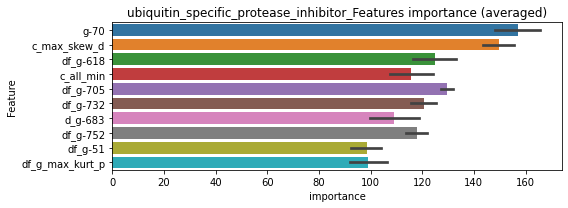

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 ubiquitin_specific_protease_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 ubiquitin_specific_protease_inhibitor=================================


Early stopping, best iteration is:
[720]	training's binary_logloss: 0.00025181	valid_1's binary_logloss: 0.00263062
Training until validation scores don't improve for 30 rounds


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 ubiquitin_specific_protease_inhibitor=================================


Early stopping, best iteration is:
[916]	training's binary_logloss: 0.000235894	valid_1's binary_logloss: 0.00067667
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000235323	valid_1's binary_logloss: 0.000284428
Early stopping, best iteration is:
[984]	training's binary_logloss: 0.000235323	valid_1's binary_logloss: 0.000284428


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 ubiquitin_specific_protease_inhibitor=================================


Training until validation scores don't improve for 30 rounds


ubiquitin_specific_protease_inhibitor logloss: 0.0012402607226796834


Early stopping, best iteration is:
[913]	training's binary_logloss: 0.00023557	valid_1's binary_logloss: 0.001368


mutually exclusive columns: vegfr_inhibitor


vegfr_inhibitor, len(trt): 170, len(othr): 4633
target_rate: 0.0071387 → Adj_target_rate: 0.0066081


selected negative label: 4633


unpredictable_cols:vegfr_inhibitor → create_features


N_features:358
================= Pseudo labeling 1 / 3 =================



Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0375362	valid_1's binary_logloss: 0.11797
[2000]	training's binary_logloss: 0.0179487	valid_1's binary_logloss: 0.10358
Early stopping, best iteration is:
[2097]	training's binary_logloss: 0.0170668	valid_1's binary_logloss: 0.10286
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0372795	valid_1's binary_logloss: 0.115274
[2000]	training's binary_logloss: 0.0179023	valid_1's binary_logloss: 0.0979466
[3000]	training's binary_logloss: 0.0116434	valid_1's binary_logloss: 0.0920168
Early stopping, best iteration is:
[3440]	training's binary_logloss: 0.010079	valid_1's binary_logloss: 0.0905498
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0369497	valid_1's binary_logloss: 0.122298
[2000]	training's binary_logloss: 0.0178283	valid_1's binary_logloss: 0.10857
Early stopping, best iteration is:
[2

1 / 3, AUC score:0.987, PR-AUC:0.973
y_Threshold: 0.0520567, Threshold: 0.0927499, pos_neg_ratio: 0.8000000
Remove_noisy_data: 278 → Positive_corect_labels: 880/5281
p_label_rate: 0.0100452 Vs.target_rate: 0.00714
Num_p_label: 40.0, Expected: 28.4, Threshold: 0.0927499, conf_0:0.06492, conf_1:0.12057
threshold: 0.0927499, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 880.0/5281, y_label_rate: 0.1666351
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0321201	valid_1's binary_logloss: 0.0833094
[2000]	training's binary_logloss: 0.0154831	valid_1's binary_logloss: 0.0673763
[3000]	training's binary_logloss: 0.010142	valid_1's binary_logloss: 0.0613294
Early stopping, best iteration is:
[3455]	training's binary_logloss: 0.00876915	valid_1's binary_logloss: 0.0597333
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0314188	valid_1's binary_logloss: 0.101418
[2000]	training's binary_logloss: 0.0151898	valid_1's binary_logloss: 0.0875316
Early stopping, best iteration is:
[2354]	training's binary_logloss: 0.0127917	valid_1's binary_logloss: 0.0853503
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.031723	valid_1's binary_logloss: 0.0903764
[2000]	training's binary_logloss: 0.0153529	valid_1's binary_logloss: 0.0744364
[3000]	training's binary_logl

2 / 3, AUC score:0.997, PR-AUC:0.992
y_Threshold: 0.0850036, Threshold: 0.0927499, pos_neg_ratio: 0.8000000
Remove_noisy_data: 68 → Positive_corect_labels: 846.0/5213
p_label_rate: 0.0218483 Vs.target_rate: 0.00714
Num_p_label: 87.0, Expected: 28.4, Threshold: 0.0927499, conf_0:0.07420, conf_1:0.11130
Num_p_label: 47.0, Expected: 28.4, Adj_threshold_1: 0.1227499
Num_p_label: 27.0, Expected: 28.4, Adj_threshold_2: 0.1527499
threshold: 0.1527499, positive_p_label: 27.0/3982, p_label_rate: 0.0067805
positive_y_label: 846.0/5213, y_label_rate: 0.1622866
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.028475	valid_1's binary_logloss: 0.0738458
[2000]	training's binary_logloss: 0.0138034	valid_1's binary_logloss: 0.0568697
[3000]	training's binary_logloss: 0.00907333	valid_1's binary_logloss: 0.050852
[4000]	training's binary_logloss: 0.00677698	valid_1's binary_logloss: 0.0478062
[5000]	training's binary_logloss: 0.00543188	valid_1's binary_logloss: 0.0458457
Early stopping, best iteration is:
[5590]	training's binary_logloss: 0.00486389	valid_1's binary_logloss: 0.044934
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0282503	valid_1's binary_logloss: 0.0767336
[2000]	training's binary_logloss: 0.0137293	valid_1's binary_logloss: 0.0618109
[3000]	training's binary_logloss: 0.0090106	valid_1's binary_logloss: 0.056535
[4000]	training's binary_logloss: 0.00672015	valid_1's binary_logloss: 0.0537556
Early stopping, best iteration is:
[4506]	

3 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0719554, Threshold: 0.1527499, pos_neg_ratio: 0.8000000
Remove_noisy_data: 20 → Positive_corect_labels: 836.0/5193
p_label_rate: 0.0070316 Vs.target_rate: 0.00714
Num_p_label: 28.0, Expected: 28.4, Threshold: 0.1527499, conf_0:0.13747, conf_1:0.16802
threshold: 0.1527499, positive_p_label: 28.0/3982, p_label_rate: 0.0070316
positive_y_label: 836.0/5193, y_label_rate: 0.1609859


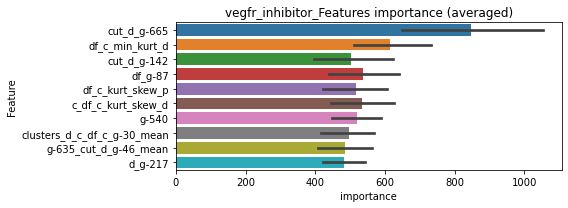

len(train_index) : 3894
len(valid_index) : 1299
================================= fold 1/4 vegfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0281739	valid_1's binary_logloss: 0.0636042
[2000]	training's binary_logloss: 0.0137222	valid_1's binary_logloss: 0.0474216
[3000]	training's binary_logloss: 0.00897148	valid_1's binary_logloss: 0.0413449
[4000]	training's binary_logloss: 0.00670277	valid_1's binary_logloss: 0.0384182
[5000]	training's binary_logloss: 0.0053524	valid_1's binary_logloss: 0.0365876
Early stopping, best iteration is:
[5823]	training's binary_logloss: 0.00460482	valid_1's binary_logloss: 0.0353633


len(train_index) : 3895
len(valid_index) : 1298
================================= fold 2/4 vegfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0277574	valid_1's binary_logloss: 0.0738006
[2000]	training's binary_logloss: 0.013425	valid_1's binary_logloss: 0.0585395
Early stopping, best iteration is:
[2783]	training's binary_logloss: 0.00950634	valid_1's binary_logloss: 0.0537625


len(train_index) : 3895
len(valid_index) : 1298
================================= fold 3/4 vegfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.027285	valid_1's binary_logloss: 0.0741139
[2000]	training's binary_logloss: 0.0132397	valid_1's binary_logloss: 0.0586137
[3000]	training's binary_logloss: 0.00867768	valid_1's binary_logloss: 0.0529871
[4000]	training's binary_logloss: 0.00647955	valid_1's binary_logloss: 0.0500236
[5000]	training's binary_logloss: 0.00518089	valid_1's binary_logloss: 0.0481037
Early stopping, best iteration is:
[5019]	training's binary_logloss: 0.00516111	valid_1's binary_logloss: 0.0480804


len(train_index) : 3895
len(valid_index) : 1298
================================= fold 4/4 vegfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0274244	valid_1's binary_logloss: 0.0730388
[2000]	training's binary_logloss: 0.0132704	valid_1's binary_logloss: 0.0581733
[3000]	training's binary_logloss: 0.008728	valid_1's binary_logloss: 0.0529145
Early stopping, best iteration is:
[3569]	training's binary_logloss: 0.00730582	valid_1's binary_logloss: 0.0511107


vegfr_inhibitor logloss: 0.04707698351934939
vegfr_inhibitor is unpredictable(><)!
vitamin_b, len(trt): 26, len(othr): 3286
target_rate: 0.0010918 → Adj_target_rate: 0.0013394


selected negative label: 3286


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[557]	training's binary_logloss: 0.000370139	valid_1's binary_logloss: 0.00221522
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[591]	training's binary_logloss: 0.000357439	valid_1's binary_logloss: 0.00280452
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[560]	training's binary_logloss: 0.000377294	valid_1's binary_logloss: 0.00167681
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0024378, Threshold: 0.0089191, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00109
Num_p_label: 40.0, Expected: 4.3, Threshold: 0.0089191, conf_0:0.00624, conf_1:0.01159
Num_p_label: 8.0, Expected: 4.3, Adj_threshold_1: 0.0389191


Early stopping, best iteration is:
[549]	training's binary_logloss: 0.000377878	valid_1's binary_logloss: 0.00672726


threshold: 0.0389191, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[563]	training's binary_logloss: 0.000354085	valid_1's binary_logloss: 0.00210508
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[550]	training's binary_logloss: 0.000362552	valid_1's binary_logloss: 0.00172818
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[590]	training's binary_logloss: 0.000351518	valid_1's binary_logloss: 0.00167635
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0391035, Threshold: 0.0389191, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0075339 Vs.target_rate: 0.00109
Num_p_label: 30.0, Expected: 4.3, Threshold: 0.0389191, conf_0:0.03114, conf_1:0.04670
Num_p_label: 20.0, Expected: 4.3, Adj_threshold_1: 0.0689191
Num_p_label: 13.0, Expected: 4.3, Adj_threshold_2: 0.0989191
Num_p_label: 8.0, Expected: 4.3, Adj_threshold_3: 0.1289191


Early stopping, best iteration is:
[525]	training's binary_logloss: 0.000377222	valid_1's binary_logloss: 0.00785355


threshold: 0.1289191, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[563]	training's binary_logloss: 0.000354085	valid_1's binary_logloss: 0.00210508
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[550]	training's binary_logloss: 0.000362552	valid_1's binary_logloss: 0.00172818
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[590]	training's binary_logloss: 0.000351518	valid_1's binary_logloss: 0.00167635
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0391035, Threshold: 0.1289191, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0020090 Vs.target_rate: 0.00109
Num_p_label: 8.0, Expected: 4.3, Threshold: 0.1289191, conf_0:0.11603, conf_1:0.14181


Early stopping, best iteration is:
[525]	training's binary_logloss: 0.000377222	valid_1's binary_logloss: 0.00785355


threshold: 0.1289191, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


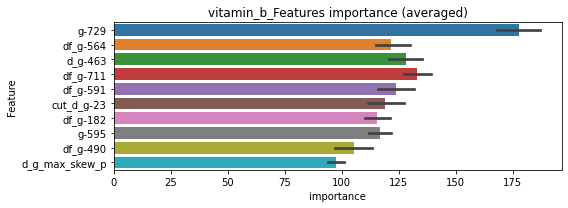

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 vitamin_b=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[829]	training's binary_logloss: 0.000355807	valid_1's binary_logloss: 0.00219489


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 vitamin_b=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[849]	training's binary_logloss: 0.000354689	valid_1's binary_logloss: 0.00165035


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 vitamin_b=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[770]	training's binary_logloss: 0.000367101	valid_1's binary_logloss: 0.00157369


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 vitamin_b=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[765]	training's binary_logloss: 0.000364393	valid_1's binary_logloss: 0.00366855


vitamin_b logloss: 0.0022722082022546518
vitamin_d_receptor_agonist, len(trt): 39, len(othr): 3286
target_rate: 0.0016377 → Adj_target_rate: 0.0018906


selected negative label: 3286


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[616]	training's binary_logloss: 0.000457135	valid_1's binary_logloss: 0.00769648
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[617]	training's binary_logloss: 0.00045945	valid_1's binary_logloss: 0.00747285
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[656]	training's binary_logloss: 0.00044786	valid_1's binary_logloss: 0.00563618
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[645]	training's binary_logloss: 0.000451278	valid_1's binary_logloss: 0.0062914


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0028688, Threshold: 0.0154950, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00164
Num_p_label: 40.0, Expected: 6.5, Threshold: 0.0154950, conf_0:0.01085, conf_1:0.02014
Num_p_label: 16.0, Expected: 6.5, Adj_threshold_1: 0.0454950
threshold: 0.0454950, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[623]	training's binary_logloss: 0.000438717	valid_1's binary_logloss: 0.00829305
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[638]	training's binary_logloss: 0.000430713	valid_1's binary_logloss: 0.00622351
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[606]	training's binary_logloss: 0.000460727	valid_1's binary_logloss: 0.004946
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[650]	training's binary_logloss: 0.000434368	valid_1's binary_logloss: 0.00638339


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0252846, Threshold: 0.0454950, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0090407 Vs.target_rate: 0.00164
Num_p_label: 36.0, Expected: 6.5, Threshold: 0.0454950, conf_0:0.03640, conf_1:0.05459
Num_p_label: 23.0, Expected: 6.5, Adj_threshold_1: 0.0754950
Num_p_label: 15.0, Expected: 6.5, Adj_threshold_2: 0.1054950
threshold: 0.1054950, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[623]	training's binary_logloss: 0.000438717	valid_1's binary_logloss: 0.00829305
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[638]	training's binary_logloss: 0.000430713	valid_1's binary_logloss: 0.00622351
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[606]	training's binary_logloss: 0.000460727	valid_1's binary_logloss: 0.004946
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[650]	training's binary_logloss: 0.000434368	valid_1's binary_logloss: 0.00638339


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0252846, Threshold: 0.1054950, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0037670 Vs.target_rate: 0.00164
Num_p_label: 15.0, Expected: 6.5, Threshold: 0.1054950, conf_0:0.09495, conf_1:0.11604
threshold: 0.1054950, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


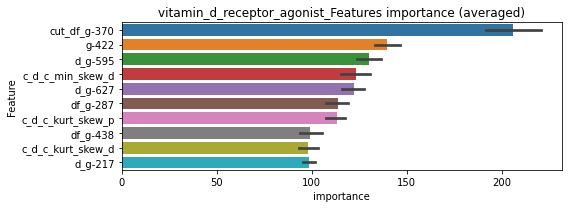

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 vitamin_d_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[696]	training's binary_logloss: 0.000499485	valid_1's binary_logloss: 0.00840085


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 vitamin_d_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[917]	training's binary_logloss: 0.000433357	valid_1's binary_logloss: 0.0063144


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 vitamin_d_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[677]	training's binary_logloss: 0.000519292	valid_1's binary_logloss: 0.00488349


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 vitamin_d_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[961]	training's binary_logloss: 0.000429336	valid_1's binary_logloss: 0.00595723


vitamin_d_receptor_agonist logloss: 0.0063891042903049065
wnt_inhibitor, len(trt): 30, len(othr): 3283
target_rate: 0.0012598 → Adj_target_rate: 0.0015127


selected negative label: 3283


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[669]	training's binary_logloss: 0.000372473	valid_1's binary_logloss: 0.00201895
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[610]	training's binary_logloss: 0.000387253	valid_1's binary_logloss: 0.00489681
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[606]	training's binary_logloss: 0.000397297	valid_1's binary_logloss: 0.00252488
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0026423, Threshold: 0.0120154, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[613]	training's binary_logloss: 0.000381536	valid_1's binary_logloss: 0.00480666


Remove_noisy_data: 132 → Positive_corect_labels: 656/3807
p_label_rate: 0.0100452 Vs.target_rate: 0.00126
Num_p_label: 40.0, Expected: 5.0, Threshold: 0.0120154, conf_0:0.00841, conf_1:0.01562
Num_p_label: 19.0, Expected: 5.0, Adj_threshold_1: 0.0420154
Num_p_label: 11.0, Expected: 5.0, Adj_threshold_2: 0.0720154
threshold: 0.0720154, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[614]	training's binary_logloss: 0.0003661	valid_1's binary_logloss: 0.00214546
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[650]	training's binary_logloss: 0.000364844	valid_1's binary_logloss: 0.00316856
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[514]	training's binary_logloss: 0.000458596	valid_1's binary_logloss: 0.00229946
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0598292, Threshold: 0.0720154, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[603]	training's binary_logloss: 0.000369614	valid_1's binary_logloss: 0.00384211


Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3807
p_label_rate: 0.0055249 Vs.target_rate: 0.00126
Num_p_label: 22.0, Expected: 5.0, Threshold: 0.0720154, conf_0:0.05761, conf_1:0.08642
Num_p_label: 13.0, Expected: 5.0, Adj_threshold_1: 0.1020154
Num_p_label: 12.0, Expected: 5.0, Adj_threshold_2: 0.1320154
threshold: 0.1320154, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[614]	training's binary_logloss: 0.0003661	valid_1's binary_logloss: 0.00214546
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[650]	training's binary_logloss: 0.000364844	valid_1's binary_logloss: 0.00316856
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[514]	training's binary_logloss: 0.000458596	valid_1's binary_logloss: 0.00229946
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[603]	training's binary_logloss: 0.000369614	valid_1's binary_logloss: 0.00384211


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0598292, Threshold: 0.1320154, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3807
p_label_rate: 0.0030136 Vs.target_rate: 0.00126
Num_p_label: 12.0, Expected: 5.0, Threshold: 0.1320154, conf_0:0.11881, conf_1:0.14522
threshold: 0.1320154, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 656.0/3807, y_label_rate: 0.1723142


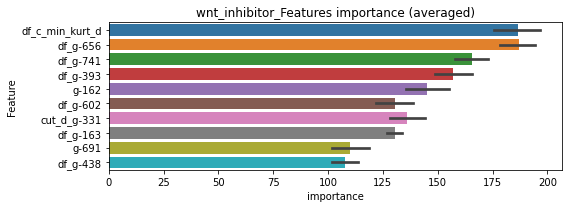

len(train_index) : 2855
len(valid_index) : 952
================================= fold 1/4 wnt_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000361232	valid_1's binary_logloss: 0.00194464
Early stopping, best iteration is:
[973]	training's binary_logloss: 0.000362396	valid_1's binary_logloss: 0.00194375


len(train_index) : 2855
len(valid_index) : 952
================================= fold 2/4 wnt_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[854]	training's binary_logloss: 0.000382035	valid_1's binary_logloss: 0.00260521


len(train_index) : 2855
len(valid_index) : 952
================================= fold 3/4 wnt_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[645]	training's binary_logloss: 0.000450362	valid_1's binary_logloss: 0.00308054


len(train_index) : 2856
len(valid_index) : 951
================================= fold 4/4 wnt_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[891]	training's binary_logloss: 0.000369902	valid_1's binary_logloss: 0.00357


wnt_inhibitor logloss: 0.002800096975113369


CV:0.01718433297818058


In [53]:
unpredictable = RUN()

In [54]:
unpredictable

['acetylcholine_receptor_antagonist',
 'adenosine_receptor_antagonist',
 'adrenergic_receptor_agonist',
 'adrenergic_receptor_antagonist',
 'anesthetic_-_local',
 'atpase_inhibitor',
 'aurora_kinase_inhibitor',
 'bacterial_cell_wall_synthesis_inhibitor',
 'bacterial_dna_gyrase_inhibitor',
 'bacterial_dna_inhibitor',
 'calcium_channel_blocker',
 'cc_chemokine_receptor_antagonist',
 'cdk_inhibitor',
 'cyclooxygenase_inhibitor',
 'cytochrome_p450_inhibitor',
 'dna_inhibitor',
 'dopamine_receptor_agonist',
 'dopamine_receptor_antagonist',
 'egfr_inhibitor',
 'estrogen_receptor_agonist',
 'flt3_inhibitor',
 'gaba_receptor_agonist',
 'gaba_receptor_antagonist',
 'glucocorticoid_receptor_agonist',
 'glutamate_receptor_antagonist',
 'hdac_inhibitor',
 'histamine_receptor_antagonist',
 'hmgcr_inhibitor',
 'kit_inhibitor',
 'monoamine_oxidase_inhibitor',
 'mtor_inhibitor',
 'nfkb_inhibitor',
 'pdgfr_inhibitor',
 'phosphodiesterase_inhibitor',
 'pi3k_inhibitor',
 'potassium_channel_antagonist',
 